<a href="https://colab.research.google.com/github/janghwan0113/graduation-thesis/blob/main/bacteria_classification_single_phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import datasets
import torch.utils.data as data
from torch.utils.data import Dataset

import torchvision.transforms as transforms
from torchvision.io import read_image
from torchvision.datasets import ImageFolder
import torch.optim as optim
import torch.nn as nn
from torchsummary import summary
from tensorflow.keras.utils import to_categorical

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title 기본 제목 텍스트
args = {}
kwargs = {}
args['batch_size'] = 32 # Batch size
args['test_batch_size'] = 1000 # Test batch size
args['epochs'] = 10  # The number of epochs is the number of times you go through the full dataset.
args['lr'] = 0.01 # Learning rate is how fast it will decend.

args['seed'] = 1 # random seed
args['log_interval'] = 10 # log interval
args['cuda'] = True # GPU cuda enable


# Data Preparation

In [ ]:
#@title 기본 제목 텍스트
train_df = pd.read_csv(r'/content/drive/MyDrive/21-2/thesis/211020_dataset/train_labels.csv', index_col=0)
train_df['amplitude_file'] = train_df.index.map(lambda id : f'/content/drive/MyDrive/21-2/thesis/211020_dataset/train/{id}_a.jpg')
train_df['phase_file'] = train_df.index.map(lambda id : f'/content/drive/MyDrive/21-2/thesis/211020_dataset/train/{id}_p.jpg')
train_df

In [ ]:
#@title 기본 제목 텍스트
labels = train_df.bacteria.values
labels = to_categorical(labels, 5)
print(labels,labels.shape)

In [ ]:
#@title 기본 제목 텍스트
for i, path in enumerate(train_df.phase_file.values ):
  print(path)
  if i ==10:
    break

In [ ]:
#@title 기본 제목 텍스트
read_image('/content/drive/MyDrive/21-2/thesis/211020_dataset/train/900000_p.jpg')

In [ ]:
#@title 기본 제목 텍스트
a=pd.read_csv('/content/drive/MyDrive/21-2/thesis/211020_dataset/train_labels.csv')
print(a)
b=pd.read_csv('/content/drive/MyDrive/21-2/thesis/211020_dataset/train_labels.csv',index_col=0)
print(b)

In [ ]:
#@title 기본 제목 텍스트
class Bacteria_Amplitude_Image_Dataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

        self.train_df = pd.read_csv(annotations_file, index_col=0)
        self.train_df['amplitude_file'] = train_df.index.map(lambda id : f'{self.img_dir}/{id}_a.jpg')

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
#@title 기본 제목 텍스트
class Bacteria_Phase_Image_Dataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

        self.train_df = pd.read_csv(annotations_file, index_col=0)
        self.train_df['phase_file'] = train_df.index.map(lambda id : f'{self.img_dir}/{id}_p.jpg')

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
#@title 기본 제목 텍스트
trainset = BacteriaImageDataset('/content/drive/MyDrive/21-2/thesis/211020_dataset/train_labels.csv', '/content/drive/MyDrive/21-2/thesis/211020_dataset/train' )
trainset.train_df

bacteria  ...                                         phase_file
id                ...                                                   
900000         0  ...  /content/drive/MyDrive/21-2/thesis/211020_data...
900001         0  ...  /content/drive/MyDrive/21-2/thesis/211020_data...
900002         0  ...  /content/drive/MyDrive/21-2/thesis/211020_data...
900003         0  ...  /content/drive/MyDrive/21-2/thesis/211020_data...
900004         0  ...  /content/drive/MyDrive/21-2/thesis/211020_data...
...          ...  ...                                                ...
904495         4  ...  /content/drive/MyDrive/21-2/thesis/211020_data...
904496         4  ...  /content/drive/MyDrive/21-2/thesis/211020_data...
904497         4  ...  /content/drive/MyDrive/21-2/thesis/211020_data...
904498         4  ...  /content/drive/MyDrive/21-2/thesis/211020_data...
904499         4  ...  /content/drive/MyDrive/21-2/thesis/211020_data...

[4500 rows x 3 columns]

In [ ]:
trainset = BacteriaImageDataset('/content/drive/MyDrive/21-2/thesis/211020_dataset/train_labels.csv', '/content/drive/MyDrive/21-2/thesis/211020_dataset/train' )
print(trainset.img_dir)
print(trainset.img_labels)
print(trainset.img_labels.iloc[10,1])

/content/drive/MyDrive/21-2/thesis/211020_dataset/train
          id  bacteria
0     900000         0
1     900001         0
2     900002         0
3     900003         0
4     900004         0
...      ...       ...
4495  904495         4
4496  904496         4
4497  904497         4
4498  904498         4
4499  904499         4

[4500 rows x 2 columns]
0


TypeError: ignored

# Data Load

In [ ]:
#data transform(including augmentation)

transform_trainset = transforms.Compose([
    #transforms.Resize((32,32)),
    transforms.Grayscale(num_output_channels=1),

    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation((-72,72)),
    transforms.RandomAffine(0,translate=(0.1,0.1)),

    transforms.ToTensor()
])

transform_testset = transforms.Compose([
    #transforms.Resize((32,32)),
    #transforms.CenterCrop(),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
    #transforms.Normalize(mean = torch.tensor([]),std = torch.tensor())                                   
])

# Data load with transform
amp_train_valid_set = datasets.ImageFolder(root='/content/drive/MyDrive/21-2/thesis/211020_dataset_per_class/train/amp', transform = transform_trainset)
amp_testset = datasets.ImageFolder(root='/content/drive/MyDrive/21-2/thesis/211020_dataset_per_class/test/amp', transform = transform_trainset)

phase_train_valid_set = datasets.ImageFolder(root='/content/drive/MyDrive/21-2/thesis/211020_dataset_per_class/train/phase', transform = transform_trainset)
phase_testset = datasets.ImageFolder(root='/content/drive/MyDrive/21-2/thesis/211020_dataset_per_class/test/phase', transform = transform_trainset)

#Split trainset into train_set, validation_set

amp_trainset_size = int(len(amp_train_valid_set)*0.8)
amp_validset_size = int(len(amp_train_valid_set))-amp_trainset_size

phase_trainset_size = int(len(phase_train_valid_set)*0.8)
phase_validset_size = int(len(phase_train_valid_set))-phase_trainset_size

amp_train_set, amp_validation_set = data.random_split(amp_train_valid_set, [amp_trainset_size, amp_validset_size])

phase_train_set, phase_validation_set = data.random_split(phase_train_valid_set, [phase_trainset_size, phase_validset_size])

# Train, Test loader
amp_train_loader = torch.utils.data.DataLoader(amp_train_set, batch_size = args['batch_size'], shuffle = True, **kwargs)
amp_validation_loader = torch.utils.data.DataLoader(amp_validation_set, batch_size = args['batch_size'], shuffle = True, **kwargs)
amp_test_loader = torch.utils.data.DataLoader(amp_testset, batch_size = args['batch_size'], shuffle = True, **kwargs)

phase_train_loader = torch.utils.data.DataLoader(phase_train_set, batch_size = args['batch_size'], shuffle = True, **kwargs)
phase_validation_loader = torch.utils.data.DataLoader(phase_validation_set, batch_size = args['batch_size'], shuffle = True, **kwargs)
phase_test_loader = torch.utils.data.DataLoader(phase_testset, batch_size = args['batch_size'], shuffle = True, **kwargs)



## Check trainset & testset 

In [ ]:
print('****Amplitude_trainset****')
print(amp_trainset)
print(type(amp_trainset))
print(len(amp_trainset))
print("------------")
print('****Amplitude_testset****')
print(amp_testset)
print(type(amp_testset))
print(len(amp_testset))
print("------------")
print('****Phase_trainset****')
print(phase_trainset)
print(type(phase_trainset))
print(len(phase_trainset))
print("------------")
print('****Phase_testset****')
print(phase_testset)
print(type(phase_testset))
print(len(phase_testset))

****Amplitude_trainset****
Dataset ImageFolder
    Number of datapoints: 4500
    Root location: /content/drive/MyDrive/21-2/thesis/211020_dataset_per_class/train/amp
    StandardTransform
Transform: Compose(
               ToTensor()
           )
<class 'torchvision.datasets.folder.ImageFolder'>
4500
------------
****Amplitude_testset****
Dataset ImageFolder
    Number of datapoints: 500
    Root location: /content/drive/MyDrive/21-2/thesis/211020_dataset_per_class/test/amp
    StandardTransform
Transform: Compose(
               ToTensor()
           )
<class 'torchvision.datasets.folder.ImageFolder'>
500
------------
****Phase_trainset****
Dataset ImageFolder
    Number of datapoints: 4500
    Root location: /content/drive/MyDrive/21-2/thesis/211020_dataset_per_class/train/phase
    StandardTransform
Transform: Compose(
               ToTensor()
           )
<class 'torchvision.datasets.folder.ImageFolder'>
4500
------------
****Phase_testset****
Dataset ImageFolder
    Number of da

In [ ]:
#@title 기본 제목 텍스트
print(type(amp_train_loader))
for i, (inputs, targets) in enumerate(amp_train_loader):
  print(inputs.shape)
  print(targets.shape)
  print(i,inputs,targets)
  break

<class 'torch.utils.data.dataloader.DataLoader'>
torch.Size([32, 3, 32, 32])
torch.Size([32])
0 tensor([[[[0.3922, 0.3882, 0.3922,  ..., 0.4275, 0.4196, 0.4118],
          [0.3961, 0.3961, 0.4078,  ..., 0.4196, 0.4157, 0.4078],
          [0.4078, 0.4157, 0.4353,  ..., 0.4118, 0.4118, 0.4078],
          ...,
          [0.5608, 0.5608, 0.5608,  ..., 0.3961, 0.4039, 0.4078],
          [0.4980, 0.4941, 0.4941,  ..., 0.4000, 0.4078, 0.4078],
          [0.4588, 0.4510, 0.4431,  ..., 0.4039, 0.4078, 0.4118]],

         [[0.3922, 0.3882, 0.3922,  ..., 0.4275, 0.4196, 0.4118],
          [0.3961, 0.3961, 0.4078,  ..., 0.4196, 0.4157, 0.4078],
          [0.4078, 0.4157, 0.4353,  ..., 0.4118, 0.4118, 0.4078],
          ...,
          [0.5608, 0.5608, 0.5608,  ..., 0.3961, 0.4039, 0.4078],
          [0.4980, 0.4941, 0.4941,  ..., 0.4000, 0.4078, 0.4078],
          [0.4588, 0.4510, 0.4431,  ..., 0.4039, 0.4078, 0.4118]],

         [[0.3922, 0.3882, 0.3922,  ..., 0.4275, 0.4196, 0.4118],
          [0

## Data Visualization

In [ ]:
#@title 기본 제목 텍스트
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
#@title 기본 제목 텍스트
for obj in train_loader:
  print(type(obj))
  print(obj)
  print(obj[0].shape)
  break

In [ ]:
#@title 기본 제목 텍스트
train_data = torch.empty((1,3,32,32), dtype=torch.float32)
my_answer = torch.empty((1), dtype=torch.float32)

for my_data in train_loader:
  print(my_data[0][0].shape)
  train_data = torch.cat((train_data, my_data[0]), 0)
  my_answer= torch.cat((my_answer,my_data[1]),0)

train_data = train_data[1:]
my_answer= my_answer[1:]



imshow(torchvision.utils.make_grid(train_data, nrow=100))

# Model Network

In [ ]:
class Bact_Net(nn.Module): 
    def __init__(self, num_classes = 5, batch_norm = False):
        super(Bact_Net, self).__init__()

        self.batch_norm = batch_norm

        self.features = nn.Sequential(
            
            #[Layer1]
            nn.Conv2d(1,32,(3,3),stride=1, padding=0),
            nn.ReLU(inplace=True),
            #[Layer2]
            nn.MaxPool2d((2,2)),
            #[Layer3]
            nn.Conv2d(32,64,(3,3),stride=1, padding=0),
            nn.ReLU(inplace=True),
            #[Layer4]
            nn.MaxPool2d((2,2)),
            #[Layer5]
            nn.Conv2d(64,128,(3,3),stride=1, padding=0),
            nn.ReLU(inplace=True),
            #[Layer6]
            nn.MaxPool2d((2,2))
        )

        if self.batch_norm == True :          
            self.classifier = nn.Sequential(
                #[Layer7]
                nn.Linear(512,256),
                nn.BatchNorm1d(256),
                nn.ReLU(inplace=True),
                nn.Dropout(0.5),
                #[Layer8]
                nn.Linear(256, num_classes),
                nn.Dropout(0.5)
            )
        else:
            self.classifier = nn.Sequential(
                #[Layer7]
                nn.Linear(512,256),
                nn.ReLU(inplace=True),
                nn.Dropout(0.5),
                #[Layer8]
                nn.Linear(256, num_classes),
                nn.Dropout(0.5)
            )

    def forward(self,x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        
        return x

# Train & Test class

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

class trainer:

    def __init__(self, model, train_loader, opt, weight_decay=0, epoch_size=10, learning_rate=0.01, use_cuda=True):
        self.use_cuda = use_cuda
        
        # Use GPU, model to GPU
        if use_cuda:
          self.net = model.cuda()
        else:
          self.net = model
        
        self.train_loader = train_loader
        self.optimizer = opt
        self.weight_decay = weight_decay
        self.epoch_size = epoch_size
        self.learning_rate = learning_rate
        self.validation_epoch = int(epoch_size/10)
        self.criterion = nn.CrossEntropyLoss()

        self.history = {'train_acc':[],'val_acc':[],'train_loss':[],'val_loss':[]}

    def train(self, validation_loader=None):

        #Choose optimizer
        if self.optimizer == "SGD":
          optimizer = optim.SGD(self.net.parameters(), lr = self.learning_rate, weight_decay = self.weight_decay)
        elif self.optimizer == "Adam":
          optimizer = optim.Adam(self.net.parameters(), lr = self.learning_rate, weight_decay = self.weight_decay)
        elif self.optimizer == "Adagrad":
          optimizer = optim.Adagrad(self.net.parameters(), lr = self.learning_rate, weight_decay = self.weight_decay)
        elif self.optimizer == "RMSprop":
          optimizer = optim.RMSprop(self.net.parameters(), lr = self.learning_rate, weight_decay = self.weight_decay)
          
        
        max_test_acc = 0

        for epoch in tqdm(range(self.epoch_size)):
          self.net.train()

          #inputs.shape : torch.Size([32, 3, 32, 32]) (batch_size, rgb, H,W)
          #targets.shape : torch.Size([32]) (batch_size=> each answer)
          for i, (inputs, targets) in enumerate(self.train_loader):
            if self.use_cuda :
              inputs = inputs.cuda()
              targets = targets.cuda()

            #Gradient Initialization
            optimizer.zero_grad()

            outputs = self.net(inputs) #forward  
            loss = self.criterion(outputs, targets) #outputs : prediction tensor, targets : answer tensor
            loss.backward() # backpropagation
            optimizer.step() # weight & bias update with gradient

          # if (epoch+1)%self.validation_epoch == 0 :
          #   train_acc = self.validate(self.train_loader)
          #   print('Train Acc | Epoch {:d}/{:d} | ACC {:f}'.format((epoch+1), self.epoch_size, train_acc))

          #   if validation_loader != None:
          #     val_acc = self.validate(validation_loader)
          #     print('Test Acc | Epoch {:d}/{:d} | ACC {:f}'.format((epoch+1), self.epoch_size, val_acc))
            
          #   print("=================================================")

          
          self.history['train_loss'].append(loss.item())

          train_acc = self.validate(self.train_loader)
          self.history['train_acc'].append(train_acc)
          print('Train Acc | Epoch {:d}/{:d} | ACC {:f}'.format((epoch+1), self.epoch_size, train_acc))

          if validation_loader != None:
            val_acc = self.validate(validation_loader)
            self.history['val_acc'].append(val_acc)
            print('Val Acc | Epoch {:d}/{:d} | ACC {:f}'.format((epoch+1), self.epoch_size, val_acc))
          

          print("=================================================")          
      
    @torch.no_grad()
    def validate(self, data_loader):
      self.net.eval() #no weight update
      for i, (inputs, targets) in enumerate(data_loader):
        
        #inputs and targets onto CUDA (Use GPU)
        if self.use_cuda:
          inputs = inputs.cuda()
          targets = targets.cuda()
                
        pred = self.net(inputs)

        val_loss = self.criterion(pred, targets)
        
        pred_c = torch.argmax(pred, dim=1)
        target_c = targets

        if i==0 : 
          acc = (pred_c==target_c)
        else :
          acc = torch.cat([acc, (pred_c == target_c)], axis=0)

      if  data_loader != self.train_loader: 
        self.history['val_loss'].append(val_loss.item())
      
      acc = acc.float().mean() * 100

      return acc.item()


# Model Check

In [ ]:
example_model = Bact_Net()
example_model.cuda()

summary(example_model, input_size=(1,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             320
              ReLU-2           [-1, 32, 30, 30]               0
         MaxPool2d-3           [-1, 32, 15, 15]               0
            Conv2d-4           [-1, 64, 13, 13]          18,496
              ReLU-5           [-1, 64, 13, 13]               0
         MaxPool2d-6             [-1, 64, 6, 6]               0
            Conv2d-7            [-1, 128, 4, 4]          73,856
              ReLU-8            [-1, 128, 4, 4]               0
         MaxPool2d-9            [-1, 128, 2, 2]               0
           Linear-10                  [-1, 256]         131,328
             ReLU-11                  [-1, 256]               0
          Dropout-12                  [-1, 256]               0
           Linear-13                    [-1, 5]           1,285
          Dropout-14                   

# Phase_SGD

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 20.166666


  0%|          | 1/200 [41:28<137:34:43, 2488.86s/it]

Val Acc | Epoch 1/200 | ACC 19.333334
Train Acc | Epoch 2/200 | ACC 20.000000


  1%|          | 2/200 [41:38<56:41:03, 1030.62s/it] 

Val Acc | Epoch 2/200 | ACC 20.111113
Train Acc | Epoch 3/200 | ACC 28.722223


  2%|▏         | 3/200 [41:48<30:53:47, 564.61s/it] 

Val Acc | Epoch 3/200 | ACC 26.666668
Train Acc | Epoch 4/200 | ACC 30.500000


  2%|▏         | 4/200 [41:58<18:49:15, 345.69s/it]

Val Acc | Epoch 4/200 | ACC 26.888889
Train Acc | Epoch 5/200 | ACC 29.055557


  2%|▎         | 5/200 [42:09<12:10:18, 224.71s/it]

Val Acc | Epoch 5/200 | ACC 28.000000
Train Acc | Epoch 6/200 | ACC 28.166666


  3%|▎         | 6/200 [42:18<8:10:23, 151.67s/it] 

Val Acc | Epoch 6/200 | ACC 27.111113
Train Acc | Epoch 7/200 | ACC 19.972223


  4%|▎         | 7/200 [42:29<5:39:01, 105.40s/it]

Val Acc | Epoch 7/200 | ACC 20.111113
Train Acc | Epoch 8/200 | ACC 19.972223


  4%|▍         | 8/200 [42:39<4:00:07, 75.04s/it] 

Val Acc | Epoch 8/200 | ACC 20.111113
Train Acc | Epoch 9/200 | ACC 19.972223


  4%|▍         | 9/200 [42:49<2:54:13, 54.73s/it]

Val Acc | Epoch 9/200 | ACC 20.111113
Train Acc | Epoch 10/200 | ACC 19.972223


  5%|▌         | 10/200 [42:59<2:09:36, 40.93s/it]

Val Acc | Epoch 10/200 | ACC 20.111113
Train Acc | Epoch 11/200 | ACC 30.472221


  6%|▌         | 11/200 [43:09<1:39:12, 31.49s/it]

Val Acc | Epoch 11/200 | ACC 27.777779
Train Acc | Epoch 12/200 | ACC 29.916668


  6%|▌         | 12/200 [43:19<1:18:14, 24.97s/it]

Val Acc | Epoch 12/200 | ACC 28.444445
Train Acc | Epoch 13/200 | ACC 20.166666


  6%|▋         | 13/200 [43:29<1:03:54, 20.50s/it]

Val Acc | Epoch 13/200 | ACC 20.333334
Train Acc | Epoch 14/200 | ACC 19.972223


  7%|▋         | 14/200 [43:39<53:52, 17.38s/it]  

Val Acc | Epoch 14/200 | ACC 20.111113
Train Acc | Epoch 15/200 | ACC 21.750000


  8%|▊         | 15/200 [43:49<46:36, 15.12s/it]

Val Acc | Epoch 15/200 | ACC 22.000000
Train Acc | Epoch 16/200 | ACC 31.805557


  8%|▊         | 16/200 [43:59<41:44, 13.61s/it]

Val Acc | Epoch 16/200 | ACC 30.777779
Train Acc | Epoch 17/200 | ACC 19.972223


  8%|▊         | 17/200 [44:10<38:39, 12.67s/it]

Val Acc | Epoch 17/200 | ACC 20.111113
Train Acc | Epoch 18/200 | ACC 19.972223


  9%|▉         | 18/200 [44:20<35:57, 11.85s/it]

Val Acc | Epoch 18/200 | ACC 20.111113
Train Acc | Epoch 19/200 | ACC 33.083336


 10%|▉         | 19/200 [44:30<33:56, 11.25s/it]

Val Acc | Epoch 19/200 | ACC 34.333332
Train Acc | Epoch 20/200 | ACC 19.972223


 10%|█         | 20/200 [44:39<32:32, 10.84s/it]

Val Acc | Epoch 20/200 | ACC 20.111113
Train Acc | Epoch 21/200 | ACC 33.027779


 10%|█         | 21/200 [44:50<31:44, 10.64s/it]

Val Acc | Epoch 21/200 | ACC 35.111111
Train Acc | Epoch 22/200 | ACC 31.500000


 11%|█         | 22/200 [45:00<31:01, 10.46s/it]

Val Acc | Epoch 22/200 | ACC 30.333334
Train Acc | Epoch 23/200 | ACC 30.444447


 12%|█▏        | 23/200 [45:09<30:11, 10.23s/it]

Val Acc | Epoch 23/200 | ACC 29.666668
Train Acc | Epoch 24/200 | ACC 29.916668


 12%|█▏        | 24/200 [45:19<29:55, 10.20s/it]

Val Acc | Epoch 24/200 | ACC 29.000002
Train Acc | Epoch 25/200 | ACC 37.527779


 12%|█▎        | 25/200 [45:29<29:28, 10.11s/it]

Val Acc | Epoch 25/200 | ACC 36.888889
Train Acc | Epoch 26/200 | ACC 40.000000


 13%|█▎        | 26/200 [45:39<29:12, 10.07s/it]

Val Acc | Epoch 26/200 | ACC 38.666668
Train Acc | Epoch 27/200 | ACC 20.000000


 14%|█▎        | 27/200 [45:49<28:50, 10.00s/it]

Val Acc | Epoch 27/200 | ACC 20.111113
Train Acc | Epoch 28/200 | ACC 38.944443


 14%|█▍        | 28/200 [45:59<28:33,  9.96s/it]

Val Acc | Epoch 28/200 | ACC 40.333332
Train Acc | Epoch 29/200 | ACC 34.305557


 14%|█▍        | 29/200 [46:09<28:18,  9.93s/it]

Val Acc | Epoch 29/200 | ACC 34.888889
Train Acc | Epoch 30/200 | ACC 43.277779


 15%|█▌        | 30/200 [46:19<28:13,  9.96s/it]

Val Acc | Epoch 30/200 | ACC 44.222225
Train Acc | Epoch 31/200 | ACC 42.888889


 16%|█▌        | 31/200 [46:29<27:58,  9.93s/it]

Val Acc | Epoch 31/200 | ACC 42.333336
Train Acc | Epoch 32/200 | ACC 40.611111


 16%|█▌        | 32/200 [46:39<27:45,  9.91s/it]

Val Acc | Epoch 32/200 | ACC 40.444447
Train Acc | Epoch 33/200 | ACC 22.166668


 16%|█▋        | 33/200 [46:48<27:30,  9.88s/it]

Val Acc | Epoch 33/200 | ACC 23.222223
Train Acc | Epoch 34/200 | ACC 48.888889


 17%|█▋        | 34/200 [46:58<27:20,  9.88s/it]

Val Acc | Epoch 34/200 | ACC 49.111115
Train Acc | Epoch 35/200 | ACC 40.083332


 18%|█▊        | 35/200 [47:08<27:04,  9.84s/it]

Val Acc | Epoch 35/200 | ACC 40.222225
Train Acc | Epoch 36/200 | ACC 44.750004


 18%|█▊        | 36/200 [47:18<26:59,  9.87s/it]

Val Acc | Epoch 36/200 | ACC 45.666668
Train Acc | Epoch 37/200 | ACC 37.722225


 18%|█▊        | 37/200 [47:28<26:53,  9.90s/it]

Val Acc | Epoch 37/200 | ACC 39.555557
Train Acc | Epoch 38/200 | ACC 53.194447


 19%|█▉        | 38/200 [47:38<26:46,  9.91s/it]

Val Acc | Epoch 38/200 | ACC 54.555557
Train Acc | Epoch 39/200 | ACC 33.222221


 20%|█▉        | 39/200 [47:48<26:30,  9.88s/it]

Val Acc | Epoch 39/200 | ACC 31.222225
Train Acc | Epoch 40/200 | ACC 48.638889


 20%|██        | 40/200 [47:58<26:28,  9.93s/it]

Val Acc | Epoch 40/200 | ACC 47.666668
Train Acc | Epoch 41/200 | ACC 45.861115


 20%|██        | 41/200 [48:08<26:17,  9.92s/it]

Val Acc | Epoch 41/200 | ACC 47.666668
Train Acc | Epoch 42/200 | ACC 54.916668


 21%|██        | 42/200 [48:17<26:01,  9.89s/it]

Val Acc | Epoch 42/200 | ACC 55.555557
Train Acc | Epoch 43/200 | ACC 48.305557


 22%|██▏       | 43/200 [48:27<25:42,  9.82s/it]

Val Acc | Epoch 43/200 | ACC 50.333332
Train Acc | Epoch 44/200 | ACC 47.194447


 22%|██▏       | 44/200 [48:37<25:44,  9.90s/it]

Val Acc | Epoch 44/200 | ACC 49.333336
Train Acc | Epoch 45/200 | ACC 47.444447


 22%|██▎       | 45/200 [48:47<25:24,  9.84s/it]

Val Acc | Epoch 45/200 | ACC 48.000000
Train Acc | Epoch 46/200 | ACC 40.555557


 23%|██▎       | 46/200 [48:57<25:14,  9.84s/it]

Val Acc | Epoch 46/200 | ACC 41.777779
Train Acc | Epoch 47/200 | ACC 51.305557


 24%|██▎       | 47/200 [49:07<25:08,  9.86s/it]

Val Acc | Epoch 47/200 | ACC 50.444447
Train Acc | Epoch 48/200 | ACC 57.472221


 24%|██▍       | 48/200 [49:17<25:23, 10.02s/it]

Val Acc | Epoch 48/200 | ACC 55.444443
Train Acc | Epoch 49/200 | ACC 54.222225


 24%|██▍       | 49/200 [49:27<25:14, 10.03s/it]

Val Acc | Epoch 49/200 | ACC 54.444443
Train Acc | Epoch 50/200 | ACC 51.111115


 25%|██▌       | 50/200 [49:37<25:08, 10.06s/it]

Val Acc | Epoch 50/200 | ACC 53.222221
Train Acc | Epoch 51/200 | ACC 56.694447


 26%|██▌       | 51/200 [49:47<24:58, 10.05s/it]

Val Acc | Epoch 51/200 | ACC 57.888889
Train Acc | Epoch 52/200 | ACC 49.222221


 26%|██▌       | 52/200 [49:57<24:36,  9.97s/it]

Val Acc | Epoch 52/200 | ACC 49.666668
Train Acc | Epoch 53/200 | ACC 55.138893


 26%|██▋       | 53/200 [50:07<24:19,  9.93s/it]

Val Acc | Epoch 53/200 | ACC 55.888893
Train Acc | Epoch 54/200 | ACC 54.555557


 27%|██▋       | 54/200 [50:17<24:12,  9.95s/it]

Val Acc | Epoch 54/200 | ACC 54.111111
Train Acc | Epoch 55/200 | ACC 60.083336


 28%|██▊       | 55/200 [50:27<23:57,  9.92s/it]

Val Acc | Epoch 55/200 | ACC 58.666672
Train Acc | Epoch 56/200 | ACC 58.388889


 28%|██▊       | 56/200 [50:37<23:40,  9.87s/it]

Val Acc | Epoch 56/200 | ACC 54.111111
Train Acc | Epoch 57/200 | ACC 57.333332


 28%|██▊       | 57/200 [50:46<23:30,  9.86s/it]

Val Acc | Epoch 57/200 | ACC 56.000000
Train Acc | Epoch 58/200 | ACC 60.472225


 29%|██▉       | 58/200 [50:56<23:23,  9.88s/it]

Val Acc | Epoch 58/200 | ACC 60.222225
Train Acc | Epoch 59/200 | ACC 54.750000


 30%|██▉       | 59/200 [51:06<23:09,  9.86s/it]

Val Acc | Epoch 59/200 | ACC 55.000000
Train Acc | Epoch 60/200 | ACC 61.527779


 30%|███       | 60/200 [51:16<22:59,  9.85s/it]

Val Acc | Epoch 60/200 | ACC 61.222225
Train Acc | Epoch 61/200 | ACC 57.527779


 30%|███       | 61/200 [51:26<22:48,  9.84s/it]

Val Acc | Epoch 61/200 | ACC 58.888889
Train Acc | Epoch 62/200 | ACC 61.027779


 31%|███       | 62/200 [51:35<22:32,  9.80s/it]

Val Acc | Epoch 62/200 | ACC 64.000000
Train Acc | Epoch 63/200 | ACC 58.333336


 32%|███▏      | 63/200 [51:45<22:14,  9.74s/it]

Val Acc | Epoch 63/200 | ACC 60.222225
Train Acc | Epoch 64/200 | ACC 58.805553


 32%|███▏      | 64/200 [51:55<22:13,  9.80s/it]

Val Acc | Epoch 64/200 | ACC 57.666664
Train Acc | Epoch 65/200 | ACC 61.055557


 32%|███▎      | 65/200 [52:05<22:05,  9.82s/it]

Val Acc | Epoch 65/200 | ACC 60.666668
Train Acc | Epoch 66/200 | ACC 56.638889


 33%|███▎      | 66/200 [52:15<21:57,  9.83s/it]

Val Acc | Epoch 66/200 | ACC 56.111115
Train Acc | Epoch 67/200 | ACC 63.638889


 34%|███▎      | 67/200 [52:25<21:54,  9.89s/it]

Val Acc | Epoch 67/200 | ACC 63.333332
Train Acc | Epoch 68/200 | ACC 61.083336


 34%|███▍      | 68/200 [52:35<21:41,  9.86s/it]

Val Acc | Epoch 68/200 | ACC 62.333332
Train Acc | Epoch 69/200 | ACC 61.777775


 34%|███▍      | 69/200 [52:45<21:38,  9.91s/it]

Val Acc | Epoch 69/200 | ACC 62.000000
Train Acc | Epoch 70/200 | ACC 60.888893


 35%|███▌      | 70/200 [52:55<21:35,  9.96s/it]

Val Acc | Epoch 70/200 | ACC 60.777779
Train Acc | Epoch 71/200 | ACC 61.222225


 36%|███▌      | 71/200 [53:05<21:21,  9.93s/it]

Val Acc | Epoch 71/200 | ACC 62.111115
Train Acc | Epoch 72/200 | ACC 65.250000


 36%|███▌      | 72/200 [53:14<21:12,  9.94s/it]

Val Acc | Epoch 72/200 | ACC 64.555557
Train Acc | Epoch 73/200 | ACC 64.888885


 36%|███▋      | 73/200 [53:24<20:58,  9.91s/it]

Val Acc | Epoch 73/200 | ACC 67.000000
Train Acc | Epoch 74/200 | ACC 65.861115


 37%|███▋      | 74/200 [53:34<20:46,  9.89s/it]

Val Acc | Epoch 74/200 | ACC 64.333336
Train Acc | Epoch 75/200 | ACC 57.333332


 38%|███▊      | 75/200 [53:44<20:36,  9.89s/it]

Val Acc | Epoch 75/200 | ACC 57.111115
Train Acc | Epoch 76/200 | ACC 63.861115


 38%|███▊      | 76/200 [53:54<20:27,  9.90s/it]

Val Acc | Epoch 76/200 | ACC 62.666668
Train Acc | Epoch 77/200 | ACC 64.750000


 38%|███▊      | 77/200 [54:04<20:16,  9.89s/it]

Val Acc | Epoch 77/200 | ACC 62.666668
Train Acc | Epoch 78/200 | ACC 65.666672


 39%|███▉      | 78/200 [54:14<20:07,  9.90s/it]

Val Acc | Epoch 78/200 | ACC 65.444443
Train Acc | Epoch 79/200 | ACC 63.944447


 40%|███▉      | 79/200 [54:24<20:20, 10.08s/it]

Val Acc | Epoch 79/200 | ACC 65.555557
Train Acc | Epoch 80/200 | ACC 64.694443


 40%|████      | 80/200 [54:35<20:21, 10.18s/it]

Val Acc | Epoch 80/200 | ACC 63.777779
Train Acc | Epoch 81/200 | ACC 66.500000


 40%|████      | 81/200 [54:45<20:00, 10.09s/it]

Val Acc | Epoch 81/200 | ACC 66.555557
Train Acc | Epoch 82/200 | ACC 62.583332


 41%|████      | 82/200 [54:54<19:45, 10.05s/it]

Val Acc | Epoch 82/200 | ACC 61.000000
Train Acc | Epoch 83/200 | ACC 66.805557


 42%|████▏     | 83/200 [55:04<19:30, 10.00s/it]

Val Acc | Epoch 83/200 | ACC 65.888885
Train Acc | Epoch 84/200 | ACC 53.444447


 42%|████▏     | 84/200 [55:14<19:18,  9.99s/it]

Val Acc | Epoch 84/200 | ACC 54.111111
Train Acc | Epoch 85/200 | ACC 64.138885


 42%|████▎     | 85/200 [55:24<19:03,  9.94s/it]

Val Acc | Epoch 85/200 | ACC 64.000000
Train Acc | Epoch 86/200 | ACC 66.333336


 43%|████▎     | 86/200 [55:34<18:51,  9.93s/it]

Val Acc | Epoch 86/200 | ACC 65.333336
Train Acc | Epoch 87/200 | ACC 65.972221


 44%|████▎     | 87/200 [55:44<18:35,  9.87s/it]

Val Acc | Epoch 87/200 | ACC 66.000000
Train Acc | Epoch 88/200 | ACC 66.777779


 44%|████▍     | 88/200 [55:54<18:26,  9.88s/it]

Val Acc | Epoch 88/200 | ACC 68.111115
Train Acc | Epoch 89/200 | ACC 58.083336


 44%|████▍     | 89/200 [56:04<18:15,  9.87s/it]

Val Acc | Epoch 89/200 | ACC 56.777782
Train Acc | Epoch 90/200 | ACC 67.388893


 45%|████▌     | 90/200 [56:14<18:08,  9.90s/it]

Val Acc | Epoch 90/200 | ACC 68.777779
Train Acc | Epoch 91/200 | ACC 66.083336


 46%|████▌     | 91/200 [56:24<18:03,  9.94s/it]

Val Acc | Epoch 91/200 | ACC 64.666672
Train Acc | Epoch 92/200 | ACC 52.555553


 46%|████▌     | 92/200 [56:33<17:45,  9.87s/it]

Val Acc | Epoch 92/200 | ACC 53.000004
Train Acc | Epoch 93/200 | ACC 63.888889


 46%|████▋     | 93/200 [56:43<17:34,  9.85s/it]

Val Acc | Epoch 93/200 | ACC 65.555557
Train Acc | Epoch 94/200 | ACC 61.888893


 47%|████▋     | 94/200 [56:53<17:29,  9.90s/it]

Val Acc | Epoch 94/200 | ACC 61.444443
Train Acc | Epoch 95/200 | ACC 67.888893


 48%|████▊     | 95/200 [57:03<17:09,  9.81s/it]

Val Acc | Epoch 95/200 | ACC 65.888885
Train Acc | Epoch 96/200 | ACC 68.000000


 48%|████▊     | 96/200 [57:13<17:00,  9.81s/it]

Val Acc | Epoch 96/200 | ACC 70.111115
Train Acc | Epoch 97/200 | ACC 67.666664


 48%|████▊     | 97/200 [57:22<16:52,  9.83s/it]

Val Acc | Epoch 97/200 | ACC 67.888893
Train Acc | Epoch 98/200 | ACC 68.666664


 49%|████▉     | 98/200 [57:32<16:42,  9.83s/it]

Val Acc | Epoch 98/200 | ACC 68.777779
Train Acc | Epoch 99/200 | ACC 64.916672


 50%|████▉     | 99/200 [57:42<16:36,  9.86s/it]

Val Acc | Epoch 99/200 | ACC 65.777779
Train Acc | Epoch 100/200 | ACC 64.972221


 50%|█████     | 100/200 [57:52<16:25,  9.86s/it]

Val Acc | Epoch 100/200 | ACC 65.555557
Train Acc | Epoch 101/200 | ACC 61.416668


 50%|█████     | 101/200 [58:02<16:18,  9.88s/it]

Val Acc | Epoch 101/200 | ACC 61.111111
Train Acc | Epoch 102/200 | ACC 67.527779


 51%|█████     | 102/200 [58:12<16:10,  9.91s/it]

Val Acc | Epoch 102/200 | ACC 67.111115
Train Acc | Epoch 103/200 | ACC 67.722229


 52%|█████▏    | 103/200 [58:22<16:01,  9.91s/it]

Val Acc | Epoch 103/200 | ACC 68.222221
Train Acc | Epoch 104/200 | ACC 66.055557


 52%|█████▏    | 104/200 [58:31<15:44,  9.84s/it]

Val Acc | Epoch 104/200 | ACC 65.666672
Train Acc | Epoch 105/200 | ACC 66.527779


 52%|█████▎    | 105/200 [58:41<15:38,  9.88s/it]

Val Acc | Epoch 105/200 | ACC 65.111115
Train Acc | Epoch 106/200 | ACC 49.500000


 53%|█████▎    | 106/200 [58:52<15:34,  9.94s/it]

Val Acc | Epoch 106/200 | ACC 51.555557
Train Acc | Epoch 107/200 | ACC 68.027779


 54%|█████▎    | 107/200 [59:02<15:26,  9.96s/it]

Val Acc | Epoch 107/200 | ACC 68.666664
Train Acc | Epoch 108/200 | ACC 63.555557


 54%|█████▍    | 108/200 [59:12<15:16,  9.96s/it]

Val Acc | Epoch 108/200 | ACC 61.777775
Train Acc | Epoch 109/200 | ACC 68.472221


 55%|█████▍    | 109/200 [59:21<15:04,  9.94s/it]

Val Acc | Epoch 109/200 | ACC 68.333336
Train Acc | Epoch 110/200 | ACC 69.583336


 55%|█████▌    | 110/200 [59:31<14:56,  9.96s/it]

Val Acc | Epoch 110/200 | ACC 70.000000
Train Acc | Epoch 111/200 | ACC 66.305557


 56%|█████▌    | 111/200 [59:42<14:57, 10.08s/it]

Val Acc | Epoch 111/200 | ACC 66.777779
Train Acc | Epoch 112/200 | ACC 63.888889


 56%|█████▌    | 112/200 [59:52<14:40, 10.00s/it]

Val Acc | Epoch 112/200 | ACC 63.777779
Train Acc | Epoch 113/200 | ACC 67.944443


 56%|█████▋    | 113/200 [1:00:02<14:27,  9.97s/it]

Val Acc | Epoch 113/200 | ACC 67.555557
Train Acc | Epoch 114/200 | ACC 68.638893


 57%|█████▋    | 114/200 [1:00:12<14:18,  9.98s/it]

Val Acc | Epoch 114/200 | ACC 67.555557
Train Acc | Epoch 115/200 | ACC 62.861115


 57%|█████▊    | 115/200 [1:00:22<14:10, 10.00s/it]

Val Acc | Epoch 115/200 | ACC 60.777779
Train Acc | Epoch 116/200 | ACC 69.750000


 58%|█████▊    | 116/200 [1:00:31<13:52,  9.91s/it]

Val Acc | Epoch 116/200 | ACC 71.222221
Train Acc | Epoch 117/200 | ACC 68.611115


 58%|█████▊    | 117/200 [1:00:41<13:44,  9.93s/it]

Val Acc | Epoch 117/200 | ACC 68.777779
Train Acc | Epoch 118/200 | ACC 69.138893


 59%|█████▉    | 118/200 [1:00:51<13:37,  9.97s/it]

Val Acc | Epoch 118/200 | ACC 68.222221
Train Acc | Epoch 119/200 | ACC 69.861115


 60%|█████▉    | 119/200 [1:01:01<13:26,  9.96s/it]

Val Acc | Epoch 119/200 | ACC 69.777779
Train Acc | Epoch 120/200 | ACC 62.694447


 60%|██████    | 120/200 [1:01:11<13:15,  9.94s/it]

Val Acc | Epoch 120/200 | ACC 61.444443
Train Acc | Epoch 121/200 | ACC 69.166664


 60%|██████    | 121/200 [1:01:21<12:59,  9.87s/it]

Val Acc | Epoch 121/200 | ACC 68.222221
Train Acc | Epoch 122/200 | ACC 70.888885


 61%|██████    | 122/200 [1:01:31<12:51,  9.89s/it]

Val Acc | Epoch 122/200 | ACC 71.333336
Train Acc | Epoch 123/200 | ACC 69.444450


 62%|██████▏   | 123/200 [1:01:41<12:39,  9.86s/it]

Val Acc | Epoch 123/200 | ACC 70.000000
Train Acc | Epoch 124/200 | ACC 63.611115


 62%|██████▏   | 124/200 [1:01:50<12:28,  9.85s/it]

Val Acc | Epoch 124/200 | ACC 61.888893
Train Acc | Epoch 125/200 | ACC 67.694443


 62%|██████▎   | 125/200 [1:02:00<12:20,  9.87s/it]

Val Acc | Epoch 125/200 | ACC 68.333336
Train Acc | Epoch 126/200 | ACC 68.750000


 63%|██████▎   | 126/200 [1:02:10<12:10,  9.87s/it]

Val Acc | Epoch 126/200 | ACC 68.000000
Train Acc | Epoch 127/200 | ACC 70.944443


 64%|██████▎   | 127/200 [1:02:20<12:00,  9.87s/it]

Val Acc | Epoch 127/200 | ACC 69.666664
Train Acc | Epoch 128/200 | ACC 71.527779


 64%|██████▍   | 128/200 [1:02:30<11:48,  9.84s/it]

Val Acc | Epoch 128/200 | ACC 71.777779
Train Acc | Epoch 129/200 | ACC 68.111115


 64%|██████▍   | 129/200 [1:02:40<11:39,  9.85s/it]

Val Acc | Epoch 129/200 | ACC 68.666664
Train Acc | Epoch 130/200 | ACC 72.861115


 65%|██████▌   | 130/200 [1:02:50<11:28,  9.84s/it]

Val Acc | Epoch 130/200 | ACC 71.888885
Train Acc | Epoch 131/200 | ACC 73.277779


 66%|██████▌   | 131/200 [1:02:59<11:18,  9.83s/it]

Val Acc | Epoch 131/200 | ACC 72.000000
Train Acc | Epoch 132/200 | ACC 70.361115


 66%|██████▌   | 132/200 [1:03:09<11:07,  9.82s/it]

Val Acc | Epoch 132/200 | ACC 70.444450
Train Acc | Epoch 133/200 | ACC 71.611115


 66%|██████▋   | 133/200 [1:03:19<10:57,  9.81s/it]

Val Acc | Epoch 133/200 | ACC 72.000000
Train Acc | Epoch 134/200 | ACC 73.750000


 67%|██████▋   | 134/200 [1:03:29<10:48,  9.83s/it]

Val Acc | Epoch 134/200 | ACC 73.111115
Train Acc | Epoch 135/200 | ACC 70.444450


 68%|██████▊   | 135/200 [1:03:39<10:44,  9.92s/it]

Val Acc | Epoch 135/200 | ACC 70.222221
Train Acc | Epoch 136/200 | ACC 73.527779


 68%|██████▊   | 136/200 [1:03:49<10:33,  9.90s/it]

Val Acc | Epoch 136/200 | ACC 73.222229
Train Acc | Epoch 137/200 | ACC 73.750000


 68%|██████▊   | 137/200 [1:03:59<10:24,  9.91s/it]

Val Acc | Epoch 137/200 | ACC 72.222229
Train Acc | Epoch 138/200 | ACC 74.472221


 69%|██████▉   | 138/200 [1:04:08<10:11,  9.87s/it]

Val Acc | Epoch 138/200 | ACC 73.555557
Train Acc | Epoch 139/200 | ACC 75.472221


 70%|██████▉   | 139/200 [1:04:19<10:05,  9.93s/it]

Val Acc | Epoch 139/200 | ACC 74.111107
Train Acc | Epoch 140/200 | ACC 74.472221


 70%|███████   | 140/200 [1:04:28<09:53,  9.89s/it]

Val Acc | Epoch 140/200 | ACC 72.444443
Train Acc | Epoch 141/200 | ACC 64.944443


 70%|███████   | 141/200 [1:04:38<09:43,  9.90s/it]

Val Acc | Epoch 141/200 | ACC 64.444443
Train Acc | Epoch 142/200 | ACC 72.333336


 71%|███████   | 142/200 [1:04:49<09:41, 10.02s/it]

Val Acc | Epoch 142/200 | ACC 72.777779
Train Acc | Epoch 143/200 | ACC 75.000000


 72%|███████▏  | 143/200 [1:04:59<09:29,  9.99s/it]

Val Acc | Epoch 143/200 | ACC 74.555557
Train Acc | Epoch 144/200 | ACC 69.027779


 72%|███████▏  | 144/200 [1:05:08<09:16,  9.94s/it]

Val Acc | Epoch 144/200 | ACC 69.777779
Train Acc | Epoch 145/200 | ACC 66.666672


 72%|███████▎  | 145/200 [1:05:18<09:07,  9.96s/it]

Val Acc | Epoch 145/200 | ACC 67.333336
Train Acc | Epoch 146/200 | ACC 76.055557


 73%|███████▎  | 146/200 [1:05:28<08:57,  9.95s/it]

Val Acc | Epoch 146/200 | ACC 77.000008
Train Acc | Epoch 147/200 | ACC 71.277779


 74%|███████▎  | 147/200 [1:05:38<08:43,  9.89s/it]

Val Acc | Epoch 147/200 | ACC 70.000000
Train Acc | Epoch 148/200 | ACC 75.388893


 74%|███████▍  | 148/200 [1:05:48<08:32,  9.85s/it]

Val Acc | Epoch 148/200 | ACC 74.777779
Train Acc | Epoch 149/200 | ACC 72.750000


 74%|███████▍  | 149/200 [1:05:57<08:20,  9.80s/it]

Val Acc | Epoch 149/200 | ACC 74.000000
Train Acc | Epoch 150/200 | ACC 76.972221


 75%|███████▌  | 150/200 [1:06:07<08:12,  9.85s/it]

Val Acc | Epoch 150/200 | ACC 74.000000
Train Acc | Epoch 151/200 | ACC 74.500000


 76%|███████▌  | 151/200 [1:06:17<08:05,  9.91s/it]

Val Acc | Epoch 151/200 | ACC 75.333336
Train Acc | Epoch 152/200 | ACC 78.555557


 76%|███████▌  | 152/200 [1:06:27<07:55,  9.92s/it]

Val Acc | Epoch 152/200 | ACC 76.666672
Train Acc | Epoch 153/200 | ACC 77.250000


 76%|███████▋  | 153/200 [1:06:37<07:42,  9.83s/it]

Val Acc | Epoch 153/200 | ACC 76.444450
Train Acc | Epoch 154/200 | ACC 78.361115


 77%|███████▋  | 154/200 [1:06:47<07:35,  9.90s/it]

Val Acc | Epoch 154/200 | ACC 78.000000
Train Acc | Epoch 155/200 | ACC 71.805557


 78%|███████▊  | 155/200 [1:06:57<07:25,  9.90s/it]

Val Acc | Epoch 155/200 | ACC 72.444443
Train Acc | Epoch 156/200 | ACC 80.750000


 78%|███████▊  | 156/200 [1:07:07<07:14,  9.87s/it]

Val Acc | Epoch 156/200 | ACC 78.555557
Train Acc | Epoch 157/200 | ACC 78.750000


 78%|███████▊  | 157/200 [1:07:16<07:02,  9.82s/it]

Val Acc | Epoch 157/200 | ACC 76.555557
Train Acc | Epoch 158/200 | ACC 77.777779


 79%|███████▉  | 158/200 [1:07:26<06:52,  9.82s/it]

Val Acc | Epoch 158/200 | ACC 76.222221
Train Acc | Epoch 159/200 | ACC 79.527779


 80%|███████▉  | 159/200 [1:07:36<06:42,  9.81s/it]

Val Acc | Epoch 159/200 | ACC 79.222229
Train Acc | Epoch 160/200 | ACC 80.916664


 80%|████████  | 160/200 [1:07:46<06:32,  9.81s/it]

Val Acc | Epoch 160/200 | ACC 77.666672
Train Acc | Epoch 161/200 | ACC 79.055557


 80%|████████  | 161/200 [1:07:56<06:20,  9.76s/it]

Val Acc | Epoch 161/200 | ACC 78.333336
Train Acc | Epoch 162/200 | ACC 78.500000


 81%|████████  | 162/200 [1:08:05<06:11,  9.77s/it]

Val Acc | Epoch 162/200 | ACC 77.666672
Train Acc | Epoch 163/200 | ACC 63.250000


 82%|████████▏ | 163/200 [1:08:15<06:02,  9.81s/it]

Val Acc | Epoch 163/200 | ACC 60.555561
Train Acc | Epoch 164/200 | ACC 79.750000


 82%|████████▏ | 164/200 [1:08:25<05:53,  9.83s/it]

Val Acc | Epoch 164/200 | ACC 78.555557
Train Acc | Epoch 165/200 | ACC 63.722221


 82%|████████▎ | 165/200 [1:08:35<05:45,  9.87s/it]

Val Acc | Epoch 165/200 | ACC 62.555557
Train Acc | Epoch 166/200 | ACC 76.250008


 83%|████████▎ | 166/200 [1:08:45<05:34,  9.84s/it]

Val Acc | Epoch 166/200 | ACC 74.666664
Train Acc | Epoch 167/200 | ACC 80.833336


 84%|████████▎ | 167/200 [1:08:55<05:24,  9.82s/it]

Val Acc | Epoch 167/200 | ACC 79.111115
Train Acc | Epoch 168/200 | ACC 82.055557


 84%|████████▍ | 168/200 [1:09:05<05:15,  9.86s/it]

Val Acc | Epoch 168/200 | ACC 80.333336
Train Acc | Epoch 169/200 | ACC 81.833336


 84%|████████▍ | 169/200 [1:09:14<05:04,  9.82s/it]

Val Acc | Epoch 169/200 | ACC 80.666664
Train Acc | Epoch 170/200 | ACC 80.555557


 85%|████████▌ | 170/200 [1:09:24<04:55,  9.85s/it]

Val Acc | Epoch 170/200 | ACC 79.666672
Train Acc | Epoch 171/200 | ACC 79.333336


 86%|████████▌ | 171/200 [1:09:34<04:44,  9.81s/it]

Val Acc | Epoch 171/200 | ACC 77.444443
Train Acc | Epoch 172/200 | ACC 78.777779


 86%|████████▌ | 172/200 [1:09:44<04:35,  9.83s/it]

Val Acc | Epoch 172/200 | ACC 78.555557
Train Acc | Epoch 173/200 | ACC 70.194450


 86%|████████▋ | 173/200 [1:09:54<04:29,  9.97s/it]

Val Acc | Epoch 173/200 | ACC 69.111115
Train Acc | Epoch 174/200 | ACC 80.250000


 87%|████████▋ | 174/200 [1:10:04<04:21, 10.05s/it]

Val Acc | Epoch 174/200 | ACC 80.444450
Train Acc | Epoch 175/200 | ACC 79.305557


 88%|████████▊ | 175/200 [1:10:14<04:10, 10.04s/it]

Val Acc | Epoch 175/200 | ACC 78.000000
Train Acc | Epoch 176/200 | ACC 82.777779


 88%|████████▊ | 176/200 [1:10:24<03:59,  9.97s/it]

Val Acc | Epoch 176/200 | ACC 81.222221
Train Acc | Epoch 177/200 | ACC 82.555557


 88%|████████▊ | 177/200 [1:10:34<03:47,  9.91s/it]

Val Acc | Epoch 177/200 | ACC 80.444450
Train Acc | Epoch 178/200 | ACC 80.944450


 89%|████████▉ | 178/200 [1:10:44<03:37,  9.88s/it]

Val Acc | Epoch 178/200 | ACC 79.888893
Train Acc | Epoch 179/200 | ACC 82.555557


 90%|████████▉ | 179/200 [1:10:54<03:27,  9.90s/it]

Val Acc | Epoch 179/200 | ACC 80.888893
Train Acc | Epoch 180/200 | ACC 82.222221


 90%|█████████ | 180/200 [1:11:04<03:17,  9.87s/it]

Val Acc | Epoch 180/200 | ACC 80.888893
Train Acc | Epoch 181/200 | ACC 81.722221


 90%|█████████ | 181/200 [1:11:13<03:07,  9.87s/it]

Val Acc | Epoch 181/200 | ACC 80.000000
Train Acc | Epoch 182/200 | ACC 63.805557


 91%|█████████ | 182/200 [1:11:23<02:58,  9.92s/it]

Val Acc | Epoch 182/200 | ACC 61.444443
Train Acc | Epoch 183/200 | ACC 82.416672


 92%|█████████▏| 183/200 [1:11:33<02:48,  9.88s/it]

Val Acc | Epoch 183/200 | ACC 82.444450
Train Acc | Epoch 184/200 | ACC 83.583336


 92%|█████████▏| 184/200 [1:11:43<02:37,  9.86s/it]

Val Acc | Epoch 184/200 | ACC 80.222229
Train Acc | Epoch 185/200 | ACC 71.694443


 92%|█████████▎| 185/200 [1:11:53<02:27,  9.84s/it]

Val Acc | Epoch 185/200 | ACC 70.444450
Train Acc | Epoch 186/200 | ACC 81.111115


 93%|█████████▎| 186/200 [1:12:03<02:17,  9.80s/it]

Val Acc | Epoch 186/200 | ACC 79.888893
Train Acc | Epoch 187/200 | ACC 67.166672


 94%|█████████▎| 187/200 [1:12:12<02:07,  9.82s/it]

Val Acc | Epoch 187/200 | ACC 67.666664
Train Acc | Epoch 188/200 | ACC 81.833336


 94%|█████████▍| 188/200 [1:12:22<01:57,  9.82s/it]

Val Acc | Epoch 188/200 | ACC 80.333336
Train Acc | Epoch 189/200 | ACC 84.222221


 94%|█████████▍| 189/200 [1:12:32<01:48,  9.89s/it]

Val Acc | Epoch 189/200 | ACC 83.888885
Train Acc | Epoch 190/200 | ACC 83.638885


 95%|█████████▌| 190/200 [1:12:42<01:38,  9.84s/it]

Val Acc | Epoch 190/200 | ACC 84.000000
Train Acc | Epoch 191/200 | ACC 83.333336


 96%|█████████▌| 191/200 [1:12:52<01:28,  9.83s/it]

Val Acc | Epoch 191/200 | ACC 81.222221
Train Acc | Epoch 192/200 | ACC 84.416672


 96%|█████████▌| 192/200 [1:13:02<01:18,  9.81s/it]

Val Acc | Epoch 192/200 | ACC 83.222221
Train Acc | Epoch 193/200 | ACC 85.527779


 96%|█████████▋| 193/200 [1:13:11<01:08,  9.85s/it]

Val Acc | Epoch 193/200 | ACC 83.333336
Train Acc | Epoch 194/200 | ACC 75.083336


 97%|█████████▋| 194/200 [1:13:21<00:58,  9.81s/it]

Val Acc | Epoch 194/200 | ACC 75.000000
Train Acc | Epoch 195/200 | ACC 82.527779


 98%|█████████▊| 195/200 [1:13:31<00:49,  9.82s/it]

Val Acc | Epoch 195/200 | ACC 80.444450
Train Acc | Epoch 196/200 | ACC 82.444450


 98%|█████████▊| 196/200 [1:13:41<00:39,  9.83s/it]

Val Acc | Epoch 196/200 | ACC 81.666664
Train Acc | Epoch 197/200 | ACC 83.472221


 98%|█████████▊| 197/200 [1:13:51<00:29,  9.86s/it]

Val Acc | Epoch 197/200 | ACC 82.888885
Train Acc | Epoch 198/200 | ACC 84.527779


 99%|█████████▉| 198/200 [1:14:01<00:19,  9.90s/it]

Val Acc | Epoch 198/200 | ACC 82.222221
Train Acc | Epoch 199/200 | ACC 84.722229


100%|█████████▉| 199/200 [1:14:11<00:09,  9.95s/it]

Val Acc | Epoch 199/200 | ACC 82.444450
Train Acc | Epoch 200/200 | ACC 84.611115


100%|██████████| 200/200 [1:14:21<00:00, 22.31s/it]

Val Acc | Epoch 200/200 | ACC 83.222221


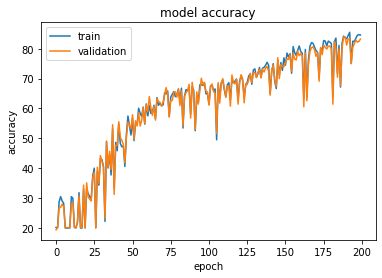

Maximum Train Accuracy : 85.52777862548828
Maximum Validation Accuracy : 84.0


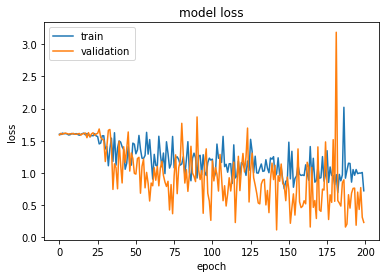

Minimum Train Loss : 0.6937180757522583
Minimum Validation Loss : 0.11441448330879211


In [ ]:
Bacteria_model_phase_SGD_001 = Bact_Net()
Bacteria_model_phase_SGD_001.cuda()
trainer_SGD_phase_001 = trainer(Bacteria_model_phase_SGD_001, phase_train_loader,"SGD", epoch_size=200, learning_rate=0.01)
trainer_SGD_phase_001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_SGD_phase_001.history['train_acc'])
plt.plot(trainer_SGD_phase_001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_SGD_phase_001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_SGD_phase_001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_SGD_phase_001.history['train_loss'])
plt.plot(trainer_SGD_phase_001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_SGD_phase_001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_SGD_phase_001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 20.166666


  0%|          | 1/200 [00:09<32:55,  9.93s/it]

Val Acc | Epoch 1/200 | ACC 19.333334
Train Acc | Epoch 2/200 | ACC 20.166666


  1%|          | 2/200 [00:19<32:22,  9.81s/it]

Val Acc | Epoch 2/200 | ACC 19.333334
Train Acc | Epoch 3/200 | ACC 20.166666


  2%|▏         | 3/200 [00:29<32:19,  9.84s/it]

Val Acc | Epoch 3/200 | ACC 19.333334
Train Acc | Epoch 4/200 | ACC 20.166666


  2%|▏         | 4/200 [00:39<32:19,  9.89s/it]

Val Acc | Epoch 4/200 | ACC 19.333334
Train Acc | Epoch 5/200 | ACC 20.166666


  2%|▎         | 5/200 [00:49<32:46, 10.09s/it]

Val Acc | Epoch 5/200 | ACC 19.333334
Train Acc | Epoch 6/200 | ACC 20.166666


  3%|▎         | 6/200 [00:59<32:32, 10.06s/it]

Val Acc | Epoch 6/200 | ACC 19.333334
Train Acc | Epoch 7/200 | ACC 20.166666


  4%|▎         | 7/200 [01:09<32:01,  9.96s/it]

Val Acc | Epoch 7/200 | ACC 19.333334
Train Acc | Epoch 8/200 | ACC 20.166666


  4%|▍         | 8/200 [01:19<31:46,  9.93s/it]

Val Acc | Epoch 8/200 | ACC 19.333334
Train Acc | Epoch 9/200 | ACC 20.166666


  4%|▍         | 9/200 [01:29<31:35,  9.92s/it]

Val Acc | Epoch 9/200 | ACC 19.333334
Train Acc | Epoch 10/200 | ACC 20.166666


  5%|▌         | 10/200 [01:39<31:13,  9.86s/it]

Val Acc | Epoch 10/200 | ACC 19.333334
Train Acc | Epoch 11/200 | ACC 20.166666


  6%|▌         | 11/200 [01:49<31:05,  9.87s/it]

Val Acc | Epoch 11/200 | ACC 19.333334
Train Acc | Epoch 12/200 | ACC 20.166666


  6%|▌         | 12/200 [01:59<30:59,  9.89s/it]

Val Acc | Epoch 12/200 | ACC 19.333334
Train Acc | Epoch 13/200 | ACC 20.138889


  6%|▋         | 13/200 [02:08<30:47,  9.88s/it]

Val Acc | Epoch 13/200 | ACC 19.444445
Train Acc | Epoch 14/200 | ACC 20.222223


  7%|▋         | 14/200 [02:18<30:36,  9.88s/it]

Val Acc | Epoch 14/200 | ACC 19.555557
Train Acc | Epoch 15/200 | ACC 20.805555


  8%|▊         | 15/200 [02:28<30:18,  9.83s/it]

Val Acc | Epoch 15/200 | ACC 19.777779
Train Acc | Epoch 16/200 | ACC 22.833334


  8%|▊         | 16/200 [02:38<30:19,  9.89s/it]

Val Acc | Epoch 16/200 | ACC 21.111111
Train Acc | Epoch 17/200 | ACC 25.333332


  8%|▊         | 17/200 [02:48<30:15,  9.92s/it]

Val Acc | Epoch 17/200 | ACC 24.000000
Train Acc | Epoch 18/200 | ACC 26.166668


  9%|▉         | 18/200 [02:58<29:47,  9.82s/it]

Val Acc | Epoch 18/200 | ACC 24.777779
Train Acc | Epoch 19/200 | ACC 25.722223


 10%|▉         | 19/200 [03:07<29:39,  9.83s/it]

Val Acc | Epoch 19/200 | ACC 25.777779
Train Acc | Epoch 20/200 | ACC 27.944447


 10%|█         | 20/200 [03:17<29:25,  9.81s/it]

Val Acc | Epoch 20/200 | ACC 27.888887
Train Acc | Epoch 21/200 | ACC 30.861113


 10%|█         | 21/200 [03:27<29:21,  9.84s/it]

Val Acc | Epoch 21/200 | ACC 31.666666
Train Acc | Epoch 22/200 | ACC 34.638889


 11%|█         | 22/200 [03:37<29:05,  9.81s/it]

Val Acc | Epoch 22/200 | ACC 31.111113
Train Acc | Epoch 23/200 | ACC 33.111115


 12%|█▏        | 23/200 [03:47<28:56,  9.81s/it]

Val Acc | Epoch 23/200 | ACC 32.555557
Train Acc | Epoch 24/200 | ACC 32.416668


 12%|█▏        | 24/200 [03:57<28:50,  9.83s/it]

Val Acc | Epoch 24/200 | ACC 32.777779
Train Acc | Epoch 25/200 | ACC 33.000000


 12%|█▎        | 25/200 [04:06<28:45,  9.86s/it]

Val Acc | Epoch 25/200 | ACC 31.333334
Train Acc | Epoch 26/200 | ACC 33.805553


 13%|█▎        | 26/200 [04:16<28:40,  9.89s/it]

Val Acc | Epoch 26/200 | ACC 31.222225
Train Acc | Epoch 27/200 | ACC 33.055557


 14%|█▎        | 27/200 [04:26<28:21,  9.84s/it]

Val Acc | Epoch 27/200 | ACC 30.555555
Train Acc | Epoch 28/200 | ACC 30.666668


 14%|█▍        | 28/200 [04:36<28:09,  9.82s/it]

Val Acc | Epoch 28/200 | ACC 30.000002
Train Acc | Epoch 29/200 | ACC 33.027779


 14%|█▍        | 29/200 [04:46<27:52,  9.78s/it]

Val Acc | Epoch 29/200 | ACC 32.111111
Train Acc | Epoch 30/200 | ACC 24.666668


 15%|█▌        | 30/200 [04:55<27:46,  9.81s/it]

Val Acc | Epoch 30/200 | ACC 24.555557
Train Acc | Epoch 31/200 | ACC 26.777777


 16%|█▌        | 31/200 [05:05<27:46,  9.86s/it]

Val Acc | Epoch 31/200 | ACC 27.444447
Train Acc | Epoch 32/200 | ACC 20.111113


 16%|█▌        | 32/200 [05:15<27:36,  9.86s/it]

Val Acc | Epoch 32/200 | ACC 20.222223
Train Acc | Epoch 33/200 | ACC 21.083334


 16%|█▋        | 33/200 [05:25<27:25,  9.85s/it]

Val Acc | Epoch 33/200 | ACC 21.222223
Train Acc | Epoch 34/200 | ACC 23.388889


 17%|█▋        | 34/200 [05:35<27:14,  9.85s/it]

Val Acc | Epoch 34/200 | ACC 23.666668
Train Acc | Epoch 35/200 | ACC 21.250000


 18%|█▊        | 35/200 [05:45<26:53,  9.78s/it]

Val Acc | Epoch 35/200 | ACC 22.222223
Train Acc | Epoch 36/200 | ACC 20.000000


 18%|█▊        | 36/200 [05:55<27:17,  9.98s/it]

Val Acc | Epoch 36/200 | ACC 20.111113
Train Acc | Epoch 37/200 | ACC 21.555557


 18%|█▊        | 37/200 [06:05<27:27, 10.10s/it]

Val Acc | Epoch 37/200 | ACC 22.333334
Train Acc | Epoch 38/200 | ACC 21.750000


 19%|█▉        | 38/200 [06:15<27:12, 10.08s/it]

Val Acc | Epoch 38/200 | ACC 22.555555
Train Acc | Epoch 39/200 | ACC 29.944443


 20%|█▉        | 39/200 [06:25<26:47,  9.99s/it]

Val Acc | Epoch 39/200 | ACC 28.222223
Train Acc | Epoch 40/200 | ACC 27.722221


 20%|██        | 40/200 [06:35<26:44, 10.03s/it]

Val Acc | Epoch 40/200 | ACC 27.777779
Train Acc | Epoch 41/200 | ACC 32.861111


 20%|██        | 41/200 [06:45<26:25,  9.97s/it]

Val Acc | Epoch 41/200 | ACC 31.444445
Train Acc | Epoch 42/200 | ACC 27.250000


 21%|██        | 42/200 [06:55<26:10,  9.94s/it]

Val Acc | Epoch 42/200 | ACC 26.222223
Train Acc | Epoch 43/200 | ACC 20.611113


 22%|██▏       | 43/200 [07:05<26:00,  9.94s/it]

Val Acc | Epoch 43/200 | ACC 20.777779
Train Acc | Epoch 44/200 | ACC 25.694445


 22%|██▏       | 44/200 [07:15<25:50,  9.94s/it]

Val Acc | Epoch 44/200 | ACC 24.777779
Train Acc | Epoch 45/200 | ACC 21.333334


 22%|██▎       | 45/200 [07:25<25:34,  9.90s/it]

Val Acc | Epoch 45/200 | ACC 21.555557
Train Acc | Epoch 46/200 | ACC 21.166668


 23%|██▎       | 46/200 [07:34<25:13,  9.83s/it]

Val Acc | Epoch 46/200 | ACC 22.444445
Train Acc | Epoch 47/200 | ACC 20.166666


 24%|██▎       | 47/200 [07:44<25:04,  9.83s/it]

Val Acc | Epoch 47/200 | ACC 20.222223
Train Acc | Epoch 48/200 | ACC 20.111113


 24%|██▍       | 48/200 [07:54<24:58,  9.86s/it]

Val Acc | Epoch 48/200 | ACC 20.444445
Train Acc | Epoch 49/200 | ACC 21.222223


 24%|██▍       | 49/200 [08:04<24:52,  9.88s/it]

Val Acc | Epoch 49/200 | ACC 21.111111
Train Acc | Epoch 50/200 | ACC 21.166668


 25%|██▌       | 50/200 [08:14<24:39,  9.86s/it]

Val Acc | Epoch 50/200 | ACC 21.666666
Train Acc | Epoch 51/200 | ACC 20.055557


 26%|██▌       | 51/200 [08:24<24:23,  9.82s/it]

Val Acc | Epoch 51/200 | ACC 20.222223
Train Acc | Epoch 52/200 | ACC 20.111113


 26%|██▌       | 52/200 [08:34<24:20,  9.87s/it]

Val Acc | Epoch 52/200 | ACC 20.000000
Train Acc | Epoch 53/200 | ACC 23.000000


 26%|██▋       | 53/200 [08:43<24:08,  9.85s/it]

Val Acc | Epoch 53/200 | ACC 22.888889
Train Acc | Epoch 54/200 | ACC 28.222223


 27%|██▋       | 54/200 [08:53<23:54,  9.83s/it]

Val Acc | Epoch 54/200 | ACC 28.444445
Train Acc | Epoch 55/200 | ACC 29.166668


 28%|██▊       | 55/200 [09:03<23:41,  9.81s/it]

Val Acc | Epoch 55/200 | ACC 28.888889
Train Acc | Epoch 56/200 | ACC 27.833334


 28%|██▊       | 56/200 [09:13<23:40,  9.86s/it]

Val Acc | Epoch 56/200 | ACC 27.444447
Train Acc | Epoch 57/200 | ACC 28.277779


 28%|██▊       | 57/200 [09:23<23:28,  9.85s/it]

Val Acc | Epoch 57/200 | ACC 27.666668
Train Acc | Epoch 58/200 | ACC 26.888889


 29%|██▉       | 58/200 [09:33<23:33,  9.95s/it]

Val Acc | Epoch 58/200 | ACC 26.666668
Train Acc | Epoch 59/200 | ACC 30.777779


 30%|██▉       | 59/200 [09:43<23:15,  9.90s/it]

Val Acc | Epoch 59/200 | ACC 30.444447
Train Acc | Epoch 60/200 | ACC 30.527779


 30%|███       | 60/200 [09:53<23:05,  9.89s/it]

Val Acc | Epoch 60/200 | ACC 29.000002
Train Acc | Epoch 61/200 | ACC 25.083334


 30%|███       | 61/200 [10:03<22:54,  9.89s/it]

Val Acc | Epoch 61/200 | ACC 24.555557
Train Acc | Epoch 62/200 | ACC 20.083334


 31%|███       | 62/200 [10:12<22:42,  9.87s/it]

Val Acc | Epoch 62/200 | ACC 20.000000
Train Acc | Epoch 63/200 | ACC 19.972223


 32%|███▏      | 63/200 [10:22<22:35,  9.90s/it]

Val Acc | Epoch 63/200 | ACC 20.111113
Train Acc | Epoch 64/200 | ACC 19.972223


 32%|███▏      | 64/200 [10:32<22:19,  9.85s/it]

Val Acc | Epoch 64/200 | ACC 20.111113
Train Acc | Epoch 65/200 | ACC 19.972223


 32%|███▎      | 65/200 [10:42<22:14,  9.88s/it]

Val Acc | Epoch 65/200 | ACC 20.111113
Train Acc | Epoch 66/200 | ACC 20.027777


 33%|███▎      | 66/200 [10:52<22:01,  9.86s/it]

Val Acc | Epoch 66/200 | ACC 20.000000
Train Acc | Epoch 67/200 | ACC 19.972223


 34%|███▎      | 67/200 [11:02<22:02,  9.94s/it]

Val Acc | Epoch 67/200 | ACC 20.111113
Train Acc | Epoch 68/200 | ACC 20.111113


 34%|███▍      | 68/200 [11:12<22:05, 10.04s/it]

Val Acc | Epoch 68/200 | ACC 20.000000
Train Acc | Epoch 69/200 | ACC 19.972223


 34%|███▍      | 69/200 [11:22<21:53, 10.02s/it]

Val Acc | Epoch 69/200 | ACC 20.111113
Train Acc | Epoch 70/200 | ACC 19.972223


 35%|███▌      | 70/200 [11:32<21:32,  9.95s/it]

Val Acc | Epoch 70/200 | ACC 20.111113
Train Acc | Epoch 71/200 | ACC 19.972223


 36%|███▌      | 71/200 [11:42<21:26,  9.97s/it]

Val Acc | Epoch 71/200 | ACC 20.111113
Train Acc | Epoch 72/200 | ACC 20.027777


 36%|███▌      | 72/200 [11:52<21:14,  9.96s/it]

Val Acc | Epoch 72/200 | ACC 20.111113
Train Acc | Epoch 73/200 | ACC 19.972223


 36%|███▋      | 73/200 [12:02<21:03,  9.95s/it]

Val Acc | Epoch 73/200 | ACC 20.111113
Train Acc | Epoch 74/200 | ACC 19.972223


 37%|███▋      | 74/200 [12:12<20:52,  9.94s/it]

Val Acc | Epoch 74/200 | ACC 20.111113
Train Acc | Epoch 75/200 | ACC 22.027779


 38%|███▊      | 75/200 [12:22<20:41,  9.93s/it]

Val Acc | Epoch 75/200 | ACC 22.555555
Train Acc | Epoch 76/200 | ACC 22.111113


 38%|███▊      | 76/200 [12:32<20:31,  9.93s/it]

Val Acc | Epoch 76/200 | ACC 22.555555
Train Acc | Epoch 77/200 | ACC 20.111113


 38%|███▊      | 77/200 [12:41<20:18,  9.91s/it]

Val Acc | Epoch 77/200 | ACC 20.111113
Train Acc | Epoch 78/200 | ACC 19.972223


 39%|███▉      | 78/200 [12:51<20:10,  9.92s/it]

Val Acc | Epoch 78/200 | ACC 20.111113
Train Acc | Epoch 79/200 | ACC 19.972223


 40%|███▉      | 79/200 [13:01<19:56,  9.89s/it]

Val Acc | Epoch 79/200 | ACC 20.111113
Train Acc | Epoch 80/200 | ACC 19.972223


 40%|████      | 80/200 [13:11<19:44,  9.87s/it]

Val Acc | Epoch 80/200 | ACC 20.111113
Train Acc | Epoch 81/200 | ACC 19.972223


 40%|████      | 81/200 [13:21<19:35,  9.88s/it]

Val Acc | Epoch 81/200 | ACC 20.111113
Train Acc | Epoch 82/200 | ACC 19.972223


 41%|████      | 82/200 [13:31<19:26,  9.89s/it]

Val Acc | Epoch 82/200 | ACC 20.111113
Train Acc | Epoch 83/200 | ACC 19.972223


 42%|████▏     | 83/200 [13:41<19:14,  9.86s/it]

Val Acc | Epoch 83/200 | ACC 20.111113
Train Acc | Epoch 84/200 | ACC 19.972223


 42%|████▏     | 84/200 [13:50<18:57,  9.80s/it]

Val Acc | Epoch 84/200 | ACC 20.111113
Train Acc | Epoch 85/200 | ACC 19.972223


 42%|████▎     | 85/200 [14:00<18:42,  9.76s/it]

Val Acc | Epoch 85/200 | ACC 20.111113
Train Acc | Epoch 86/200 | ACC 19.972223


 43%|████▎     | 86/200 [14:10<18:40,  9.83s/it]

Val Acc | Epoch 86/200 | ACC 20.111113
Train Acc | Epoch 87/200 | ACC 20.500000


 44%|████▎     | 87/200 [14:20<18:31,  9.84s/it]

Val Acc | Epoch 87/200 | ACC 20.666668
Train Acc | Epoch 88/200 | ACC 21.500000


 44%|████▍     | 88/200 [14:30<18:27,  9.89s/it]

Val Acc | Epoch 88/200 | ACC 22.111113
Train Acc | Epoch 89/200 | ACC 19.972223


 44%|████▍     | 89/200 [14:39<18:09,  9.81s/it]

Val Acc | Epoch 89/200 | ACC 20.111113
Train Acc | Epoch 90/200 | ACC 20.027777


 45%|████▌     | 90/200 [14:49<18:04,  9.86s/it]

Val Acc | Epoch 90/200 | ACC 20.000000
Train Acc | Epoch 91/200 | ACC 21.888889


 46%|████▌     | 91/200 [14:59<17:54,  9.86s/it]

Val Acc | Epoch 91/200 | ACC 21.555557
Train Acc | Epoch 92/200 | ACC 21.750000


 46%|████▌     | 92/200 [15:09<17:38,  9.80s/it]

Val Acc | Epoch 92/200 | ACC 22.555555
Train Acc | Epoch 93/200 | ACC 24.888889


 46%|████▋     | 93/200 [15:19<17:32,  9.84s/it]

Val Acc | Epoch 93/200 | ACC 25.555557
Train Acc | Epoch 94/200 | ACC 20.916668


 47%|████▋     | 94/200 [15:29<17:23,  9.85s/it]

Val Acc | Epoch 94/200 | ACC 21.333334
Train Acc | Epoch 95/200 | ACC 21.416668


 48%|████▊     | 95/200 [15:39<17:17,  9.88s/it]

Val Acc | Epoch 95/200 | ACC 21.444445
Train Acc | Epoch 96/200 | ACC 24.694447


 48%|████▊     | 96/200 [15:49<17:11,  9.91s/it]

Val Acc | Epoch 96/200 | ACC 24.666668
Train Acc | Epoch 97/200 | ACC 20.500000


 48%|████▊     | 97/200 [15:59<17:04,  9.95s/it]

Val Acc | Epoch 97/200 | ACC 21.111111
Train Acc | Epoch 98/200 | ACC 21.361111


 49%|████▉     | 98/200 [16:09<16:52,  9.92s/it]

Val Acc | Epoch 98/200 | ACC 21.000000
Train Acc | Epoch 99/200 | ACC 23.388889


 50%|████▉     | 99/200 [16:19<16:57, 10.07s/it]

Val Acc | Epoch 99/200 | ACC 23.555555
Train Acc | Epoch 100/200 | ACC 22.750000


 50%|█████     | 100/200 [16:29<16:46, 10.07s/it]

Val Acc | Epoch 100/200 | ACC 23.666668
Train Acc | Epoch 101/200 | ACC 25.500000


 50%|█████     | 101/200 [16:39<16:26,  9.97s/it]

Val Acc | Epoch 101/200 | ACC 25.333332
Train Acc | Epoch 102/200 | ACC 24.388889


 51%|█████     | 102/200 [16:49<16:10,  9.90s/it]

Val Acc | Epoch 102/200 | ACC 25.222223
Train Acc | Epoch 103/200 | ACC 28.138891


 52%|█████▏    | 103/200 [16:58<16:00,  9.90s/it]

Val Acc | Epoch 103/200 | ACC 26.444445
Train Acc | Epoch 104/200 | ACC 22.916668


 52%|█████▏    | 104/200 [17:08<15:48,  9.88s/it]

Val Acc | Epoch 104/200 | ACC 23.888889
Train Acc | Epoch 105/200 | ACC 21.472223


 52%|█████▎    | 105/200 [17:18<15:36,  9.86s/it]

Val Acc | Epoch 105/200 | ACC 21.555557
Train Acc | Epoch 106/200 | ACC 20.888889


 53%|█████▎    | 106/200 [17:28<15:23,  9.82s/it]

Val Acc | Epoch 106/200 | ACC 20.888889
Train Acc | Epoch 107/200 | ACC 21.111111


 54%|█████▎    | 107/200 [17:38<15:18,  9.88s/it]

Val Acc | Epoch 107/200 | ACC 21.666666
Train Acc | Epoch 108/200 | ACC 20.777779


 54%|█████▍    | 108/200 [17:47<14:59,  9.78s/it]

Val Acc | Epoch 108/200 | ACC 20.222223
Train Acc | Epoch 109/200 | ACC 20.444445


 55%|█████▍    | 109/200 [17:57<14:50,  9.78s/it]

Val Acc | Epoch 109/200 | ACC 20.555555
Train Acc | Epoch 110/200 | ACC 21.666666


 55%|█████▌    | 110/200 [18:07<14:41,  9.80s/it]

Val Acc | Epoch 110/200 | ACC 22.111113
Train Acc | Epoch 111/200 | ACC 20.805555


 56%|█████▌    | 111/200 [18:17<14:35,  9.83s/it]

Val Acc | Epoch 111/200 | ACC 21.222223
Train Acc | Epoch 112/200 | ACC 23.333334


 56%|█████▌    | 112/200 [18:27<14:23,  9.81s/it]

Val Acc | Epoch 112/200 | ACC 24.333334
Train Acc | Epoch 113/200 | ACC 20.666668


 56%|█████▋    | 113/200 [18:36<14:10,  9.78s/it]

Val Acc | Epoch 113/200 | ACC 20.333334
Train Acc | Epoch 114/200 | ACC 21.055555


 57%|█████▋    | 114/200 [18:46<14:03,  9.81s/it]

Val Acc | Epoch 114/200 | ACC 20.888889
Train Acc | Epoch 115/200 | ACC 20.305555


 57%|█████▊    | 115/200 [18:56<14:00,  9.89s/it]

Val Acc | Epoch 115/200 | ACC 20.444445
Train Acc | Epoch 116/200 | ACC 22.083334


 58%|█████▊    | 116/200 [19:06<13:43,  9.81s/it]

Val Acc | Epoch 116/200 | ACC 22.777779
Train Acc | Epoch 117/200 | ACC 24.500000


 58%|█████▊    | 117/200 [19:16<13:32,  9.79s/it]

Val Acc | Epoch 117/200 | ACC 25.333332
Train Acc | Epoch 118/200 | ACC 21.777779


 59%|█████▉    | 118/200 [19:26<13:24,  9.81s/it]

Val Acc | Epoch 118/200 | ACC 21.000000
Train Acc | Epoch 119/200 | ACC 22.861111


 60%|█████▉    | 119/200 [19:36<13:18,  9.86s/it]

Val Acc | Epoch 119/200 | ACC 23.111111
Train Acc | Epoch 120/200 | ACC 24.138889


 60%|██████    | 120/200 [19:46<13:11,  9.90s/it]

Val Acc | Epoch 120/200 | ACC 23.777779
Train Acc | Epoch 121/200 | ACC 23.000000


 60%|██████    | 121/200 [19:55<13:02,  9.91s/it]

Val Acc | Epoch 121/200 | ACC 23.444445
Train Acc | Epoch 122/200 | ACC 25.055557


 61%|██████    | 122/200 [20:05<12:53,  9.91s/it]

Val Acc | Epoch 122/200 | ACC 25.666666
Train Acc | Epoch 123/200 | ACC 27.333334


 62%|██████▏   | 123/200 [20:15<12:41,  9.89s/it]

Val Acc | Epoch 123/200 | ACC 27.666668
Train Acc | Epoch 124/200 | ACC 24.472223


 62%|██████▏   | 124/200 [20:25<12:26,  9.83s/it]

Val Acc | Epoch 124/200 | ACC 25.666666
Train Acc | Epoch 125/200 | ACC 22.111113


 62%|██████▎   | 125/200 [20:35<12:12,  9.77s/it]

Val Acc | Epoch 125/200 | ACC 22.222223
Train Acc | Epoch 126/200 | ACC 22.722223


 63%|██████▎   | 126/200 [20:44<12:02,  9.77s/it]

Val Acc | Epoch 126/200 | ACC 22.555555
Train Acc | Epoch 127/200 | ACC 22.333334


 64%|██████▎   | 127/200 [20:54<11:54,  9.79s/it]

Val Acc | Epoch 127/200 | ACC 21.444445
Train Acc | Epoch 128/200 | ACC 23.833334


 64%|██████▍   | 128/200 [21:04<11:51,  9.88s/it]

Val Acc | Epoch 128/200 | ACC 24.333334
Train Acc | Epoch 129/200 | ACC 24.611111


 64%|██████▍   | 129/200 [21:14<11:40,  9.86s/it]

Val Acc | Epoch 129/200 | ACC 24.777779
Train Acc | Epoch 130/200 | ACC 24.027779


 65%|██████▌   | 130/200 [21:24<11:35,  9.94s/it]

Val Acc | Epoch 130/200 | ACC 23.222223
Train Acc | Epoch 131/200 | ACC 21.500000


 66%|██████▌   | 131/200 [21:35<11:35, 10.08s/it]

Val Acc | Epoch 131/200 | ACC 21.444445
Train Acc | Epoch 132/200 | ACC 19.972223


 66%|██████▌   | 132/200 [21:45<11:22, 10.04s/it]

Val Acc | Epoch 132/200 | ACC 20.111113
Train Acc | Epoch 133/200 | ACC 20.027777


 66%|██████▋   | 133/200 [21:54<11:04,  9.91s/it]

Val Acc | Epoch 133/200 | ACC 20.111113
Train Acc | Epoch 134/200 | ACC 22.916668


 67%|██████▋   | 134/200 [22:04<10:51,  9.88s/it]

Val Acc | Epoch 134/200 | ACC 22.888889
Train Acc | Epoch 135/200 | ACC 26.777777


 68%|██████▊   | 135/200 [22:14<10:38,  9.82s/it]

Val Acc | Epoch 135/200 | ACC 26.444445
Train Acc | Epoch 136/200 | ACC 25.944445


 68%|██████▊   | 136/200 [22:23<10:28,  9.82s/it]

Val Acc | Epoch 136/200 | ACC 26.333336
Train Acc | Epoch 137/200 | ACC 29.111111


 68%|██████▊   | 137/200 [22:33<10:21,  9.87s/it]

Val Acc | Epoch 137/200 | ACC 27.333334
Train Acc | Epoch 138/200 | ACC 29.666668


 69%|██████▉   | 138/200 [22:43<10:11,  9.86s/it]

Val Acc | Epoch 138/200 | ACC 28.444445
Train Acc | Epoch 139/200 | ACC 27.277779


 70%|██████▉   | 139/200 [22:53<10:01,  9.86s/it]

Val Acc | Epoch 139/200 | ACC 27.222221
Train Acc | Epoch 140/200 | ACC 26.750002


 70%|███████   | 140/200 [23:03<09:53,  9.90s/it]

Val Acc | Epoch 140/200 | ACC 26.222223
Train Acc | Epoch 141/200 | ACC 27.777779


 70%|███████   | 141/200 [23:13<09:42,  9.87s/it]

Val Acc | Epoch 141/200 | ACC 27.888887
Train Acc | Epoch 142/200 | ACC 28.416666


 71%|███████   | 142/200 [23:23<09:34,  9.91s/it]

Val Acc | Epoch 142/200 | ACC 27.222221
Train Acc | Epoch 143/200 | ACC 24.944445


 72%|███████▏  | 143/200 [23:33<09:25,  9.92s/it]

Val Acc | Epoch 143/200 | ACC 25.000000
Train Acc | Epoch 144/200 | ACC 25.888889


 72%|███████▏  | 144/200 [23:43<09:15,  9.91s/it]

Val Acc | Epoch 144/200 | ACC 25.000000
Train Acc | Epoch 145/200 | ACC 28.388891


 72%|███████▎  | 145/200 [23:53<09:07,  9.96s/it]

Val Acc | Epoch 145/200 | ACC 26.888889
Train Acc | Epoch 146/200 | ACC 26.861111


 73%|███████▎  | 146/200 [24:03<08:55,  9.91s/it]

Val Acc | Epoch 146/200 | ACC 26.888889
Train Acc | Epoch 147/200 | ACC 25.611111


 74%|███████▎  | 147/200 [24:13<08:44,  9.90s/it]

Val Acc | Epoch 147/200 | ACC 25.666666
Train Acc | Epoch 148/200 | ACC 26.777777


 74%|███████▍  | 148/200 [24:22<08:34,  9.89s/it]

Val Acc | Epoch 148/200 | ACC 26.666668
Train Acc | Epoch 149/200 | ACC 27.361113


 74%|███████▍  | 149/200 [24:32<08:21,  9.83s/it]

Val Acc | Epoch 149/200 | ACC 27.111113
Train Acc | Epoch 150/200 | ACC 27.138889


 75%|███████▌  | 150/200 [24:42<08:10,  9.82s/it]

Val Acc | Epoch 150/200 | ACC 27.666668
Train Acc | Epoch 151/200 | ACC 27.361113


 76%|███████▌  | 151/200 [24:52<08:03,  9.87s/it]

Val Acc | Epoch 151/200 | ACC 26.666668
Train Acc | Epoch 152/200 | ACC 23.194447


 76%|███████▌  | 152/200 [25:02<07:55,  9.90s/it]

Val Acc | Epoch 152/200 | ACC 22.777779
Train Acc | Epoch 153/200 | ACC 27.750000


 76%|███████▋  | 153/200 [25:12<07:45,  9.90s/it]

Val Acc | Epoch 153/200 | ACC 27.888887
Train Acc | Epoch 154/200 | ACC 29.583336


 77%|███████▋  | 154/200 [25:21<07:33,  9.86s/it]

Val Acc | Epoch 154/200 | ACC 30.222221
Train Acc | Epoch 155/200 | ACC 29.361111


 78%|███████▊  | 155/200 [25:31<07:24,  9.88s/it]

Val Acc | Epoch 155/200 | ACC 29.444445
Train Acc | Epoch 156/200 | ACC 28.888889


 78%|███████▊  | 156/200 [25:41<07:14,  9.89s/it]

Val Acc | Epoch 156/200 | ACC 29.222223
Train Acc | Epoch 157/200 | ACC 28.777779


 78%|███████▊  | 157/200 [25:51<07:03,  9.85s/it]

Val Acc | Epoch 157/200 | ACC 30.444447
Train Acc | Epoch 158/200 | ACC 26.888889


 79%|███████▉  | 158/200 [26:01<06:52,  9.82s/it]

Val Acc | Epoch 158/200 | ACC 25.888889
Train Acc | Epoch 159/200 | ACC 29.611111


 80%|███████▉  | 159/200 [26:11<06:43,  9.83s/it]

Val Acc | Epoch 159/200 | ACC 29.333336
Train Acc | Epoch 160/200 | ACC 31.166666


 80%|████████  | 160/200 [26:21<06:33,  9.83s/it]

Val Acc | Epoch 160/200 | ACC 30.666668
Train Acc | Epoch 161/200 | ACC 30.694447


 80%|████████  | 161/200 [26:31<06:26,  9.90s/it]

Val Acc | Epoch 161/200 | ACC 29.222223
Train Acc | Epoch 162/200 | ACC 30.444447


 81%|████████  | 162/200 [26:41<06:19,  9.98s/it]

Val Acc | Epoch 162/200 | ACC 30.000002
Train Acc | Epoch 163/200 | ACC 30.277781


 82%|████████▏ | 163/200 [26:51<06:10, 10.00s/it]

Val Acc | Epoch 163/200 | ACC 29.444445
Train Acc | Epoch 164/200 | ACC 30.916668


 82%|████████▏ | 164/200 [27:01<06:01, 10.04s/it]

Val Acc | Epoch 164/200 | ACC 29.111111
Train Acc | Epoch 165/200 | ACC 31.111113


 82%|████████▎ | 165/200 [27:11<05:48,  9.96s/it]

Val Acc | Epoch 165/200 | ACC 29.000002
Train Acc | Epoch 166/200 | ACC 31.805557


 83%|████████▎ | 166/200 [27:21<05:37,  9.94s/it]

Val Acc | Epoch 166/200 | ACC 31.000000
Train Acc | Epoch 167/200 | ACC 32.250004


 84%|████████▎ | 167/200 [27:30<05:26,  9.91s/it]

Val Acc | Epoch 167/200 | ACC 29.666668
Train Acc | Epoch 168/200 | ACC 31.305557


 84%|████████▍ | 168/200 [27:40<05:16,  9.89s/it]

Val Acc | Epoch 168/200 | ACC 29.555555
Train Acc | Epoch 169/200 | ACC 28.500000


 84%|████████▍ | 169/200 [27:50<05:05,  9.87s/it]

Val Acc | Epoch 169/200 | ACC 27.666668
Train Acc | Epoch 170/200 | ACC 29.444445


 85%|████████▌ | 170/200 [28:00<04:56,  9.88s/it]

Val Acc | Epoch 170/200 | ACC 31.111113
Train Acc | Epoch 171/200 | ACC 32.972221


 86%|████████▌ | 171/200 [28:10<04:47,  9.91s/it]

Val Acc | Epoch 171/200 | ACC 32.444443
Train Acc | Epoch 172/200 | ACC 36.611115


 86%|████████▌ | 172/200 [28:20<04:35,  9.84s/it]

Val Acc | Epoch 172/200 | ACC 36.888889
Train Acc | Epoch 173/200 | ACC 34.666668


 86%|████████▋ | 173/200 [28:30<04:27,  9.89s/it]

Val Acc | Epoch 173/200 | ACC 38.333336
Train Acc | Epoch 174/200 | ACC 29.111111


 87%|████████▋ | 174/200 [28:40<04:16,  9.88s/it]

Val Acc | Epoch 174/200 | ACC 28.555557
Train Acc | Epoch 175/200 | ACC 33.527779


 88%|████████▊ | 175/200 [28:49<04:07,  9.89s/it]

Val Acc | Epoch 175/200 | ACC 34.111111
Train Acc | Epoch 176/200 | ACC 33.527779


 88%|████████▊ | 176/200 [28:59<03:56,  9.85s/it]

Val Acc | Epoch 176/200 | ACC 33.444447
Train Acc | Epoch 177/200 | ACC 29.333336


 88%|████████▊ | 177/200 [29:09<03:48,  9.93s/it]

Val Acc | Epoch 177/200 | ACC 28.555557
Train Acc | Epoch 178/200 | ACC 34.027779


 89%|████████▉ | 178/200 [29:19<03:38,  9.93s/it]

Val Acc | Epoch 178/200 | ACC 34.000000
Train Acc | Epoch 179/200 | ACC 36.777779


 90%|████████▉ | 179/200 [29:29<03:29,  9.97s/it]

Val Acc | Epoch 179/200 | ACC 36.666668
Train Acc | Epoch 180/200 | ACC 31.277779


 90%|█████████ | 180/200 [29:39<03:19,  9.97s/it]

Val Acc | Epoch 180/200 | ACC 31.333334
Train Acc | Epoch 181/200 | ACC 35.750000


 90%|█████████ | 181/200 [29:49<03:08,  9.94s/it]

Val Acc | Epoch 181/200 | ACC 35.555557
Train Acc | Epoch 182/200 | ACC 38.916668


 91%|█████████ | 182/200 [29:59<02:58,  9.91s/it]

Val Acc | Epoch 182/200 | ACC 38.333336
Train Acc | Epoch 183/200 | ACC 35.666668


 92%|█████████▏| 183/200 [30:09<02:48,  9.92s/it]

Val Acc | Epoch 183/200 | ACC 35.666668
Train Acc | Epoch 184/200 | ACC 39.500000


 92%|█████████▏| 184/200 [30:19<02:38,  9.93s/it]

Val Acc | Epoch 184/200 | ACC 38.222225
Train Acc | Epoch 185/200 | ACC 39.000000


 92%|█████████▎| 185/200 [30:29<02:29,  9.97s/it]

Val Acc | Epoch 185/200 | ACC 40.444447
Train Acc | Epoch 186/200 | ACC 41.694443


 93%|█████████▎| 186/200 [30:39<02:19,  9.99s/it]

Val Acc | Epoch 186/200 | ACC 43.222225
Train Acc | Epoch 187/200 | ACC 41.583336


 94%|█████████▎| 187/200 [30:49<02:09,  9.95s/it]

Val Acc | Epoch 187/200 | ACC 40.888889
Train Acc | Epoch 188/200 | ACC 40.444447


 94%|█████████▍| 188/200 [30:59<01:59,  9.99s/it]

Val Acc | Epoch 188/200 | ACC 41.000000
Train Acc | Epoch 189/200 | ACC 41.305557


 94%|█████████▍| 189/200 [31:09<01:49,  9.97s/it]

Val Acc | Epoch 189/200 | ACC 40.666668
Train Acc | Epoch 190/200 | ACC 41.583336


 95%|█████████▌| 190/200 [31:19<01:38,  9.90s/it]

Val Acc | Epoch 190/200 | ACC 41.777779
Train Acc | Epoch 191/200 | ACC 39.555557


 96%|█████████▌| 191/200 [31:28<01:28,  9.87s/it]

Val Acc | Epoch 191/200 | ACC 39.666668
Train Acc | Epoch 192/200 | ACC 42.138889


 96%|█████████▌| 192/200 [31:38<01:19,  9.88s/it]

Val Acc | Epoch 192/200 | ACC 41.777779
Train Acc | Epoch 193/200 | ACC 43.111115


 96%|█████████▋| 193/200 [31:49<01:10, 10.10s/it]

Val Acc | Epoch 193/200 | ACC 42.666668
Train Acc | Epoch 194/200 | ACC 41.611111


 97%|█████████▋| 194/200 [31:59<01:01, 10.18s/it]

Val Acc | Epoch 194/200 | ACC 41.333336
Train Acc | Epoch 195/200 | ACC 34.722225


 98%|█████████▊| 195/200 [32:09<00:50, 10.08s/it]

Val Acc | Epoch 195/200 | ACC 34.666668
Train Acc | Epoch 196/200 | ACC 40.083332


 98%|█████████▊| 196/200 [32:19<00:39,  9.98s/it]

Val Acc | Epoch 196/200 | ACC 41.111111
Train Acc | Epoch 197/200 | ACC 42.555557


 98%|█████████▊| 197/200 [32:29<00:29,  9.94s/it]

Val Acc | Epoch 197/200 | ACC 40.333332
Train Acc | Epoch 198/200 | ACC 41.750000


 99%|█████████▉| 198/200 [32:38<00:19,  9.83s/it]

Val Acc | Epoch 198/200 | ACC 41.555557
Train Acc | Epoch 199/200 | ACC 41.750000


100%|█████████▉| 199/200 [32:48<00:09,  9.83s/it]

Val Acc | Epoch 199/200 | ACC 40.222225
Train Acc | Epoch 200/200 | ACC 41.527779


100%|██████████| 200/200 [32:58<00:00,  9.89s/it]

Val Acc | Epoch 200/200 | ACC 43.000000


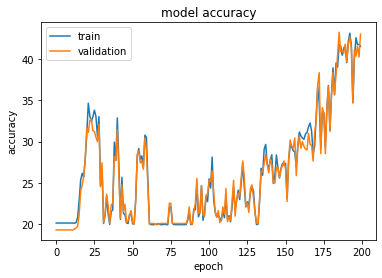

Maximum Train Accuracy : 43.111114501953125
Maximum Validation Accuracy : 43.222225189208984


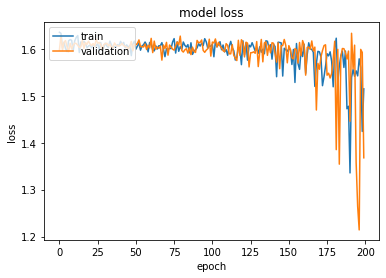

Minimum Train Loss : 1.3355238437652588
Minimum Validation Loss : 1.2140811681747437


In [ ]:
Bacteria_model_phase_SGD_0001 = Bact_Net()
Bacteria_model_phase_SGD_0001.cuda()
trainer_SGD_phase_0001 = trainer(Bacteria_model_phase_SGD_0001, phase_train_loader,"SGD", epoch_size=200, learning_rate=0.001)
trainer_SGD_phase_0001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_SGD_phase_0001.history['train_acc'])
plt.plot(trainer_SGD_phase_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_SGD_phase_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_SGD_phase_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_SGD_phase_0001.history['train_loss'])
plt.plot(trainer_SGD_phase_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_SGD_phase_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_SGD_phase_0001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 19.750000


  0%|          | 1/200 [00:10<33:28, 10.09s/it]

Val Acc | Epoch 1/200 | ACC 21.000000
Train Acc | Epoch 2/200 | ACC 19.750000


  1%|          | 2/200 [00:19<32:54,  9.97s/it]

Val Acc | Epoch 2/200 | ACC 21.000000
Train Acc | Epoch 3/200 | ACC 19.750000


  2%|▏         | 3/200 [00:29<32:35,  9.93s/it]

Val Acc | Epoch 3/200 | ACC 21.000000
Train Acc | Epoch 4/200 | ACC 19.750000


  2%|▏         | 4/200 [00:39<32:20,  9.90s/it]

Val Acc | Epoch 4/200 | ACC 21.000000
Train Acc | Epoch 5/200 | ACC 19.750000


  2%|▎         | 5/200 [00:49<32:09,  9.90s/it]

Val Acc | Epoch 5/200 | ACC 21.000000
Train Acc | Epoch 6/200 | ACC 19.750000


  3%|▎         | 6/200 [00:59<31:37,  9.78s/it]

Val Acc | Epoch 6/200 | ACC 21.000000
Train Acc | Epoch 7/200 | ACC 19.750000


  4%|▎         | 7/200 [01:09<31:34,  9.82s/it]

Val Acc | Epoch 7/200 | ACC 21.000000
Train Acc | Epoch 8/200 | ACC 19.750000


  4%|▍         | 8/200 [01:19<31:34,  9.87s/it]

Val Acc | Epoch 8/200 | ACC 21.000000
Train Acc | Epoch 9/200 | ACC 19.750000


  4%|▍         | 9/200 [01:28<31:24,  9.87s/it]

Val Acc | Epoch 9/200 | ACC 21.000000
Train Acc | Epoch 10/200 | ACC 19.750000


  5%|▌         | 10/200 [01:38<31:19,  9.89s/it]

Val Acc | Epoch 10/200 | ACC 21.000000
Train Acc | Epoch 11/200 | ACC 19.750000


  6%|▌         | 11/200 [01:48<31:21,  9.96s/it]

Val Acc | Epoch 11/200 | ACC 21.000000
Train Acc | Epoch 12/200 | ACC 19.750000


  6%|▌         | 12/200 [01:58<31:02,  9.90s/it]

Val Acc | Epoch 12/200 | ACC 21.000000
Train Acc | Epoch 13/200 | ACC 19.750000


  6%|▋         | 13/200 [02:08<30:52,  9.90s/it]

Val Acc | Epoch 13/200 | ACC 21.000000
Train Acc | Epoch 14/200 | ACC 19.750000


  7%|▋         | 14/200 [02:18<30:29,  9.84s/it]

Val Acc | Epoch 14/200 | ACC 21.000000
Train Acc | Epoch 15/200 | ACC 19.750000


  8%|▊         | 15/200 [02:28<30:19,  9.84s/it]

Val Acc | Epoch 15/200 | ACC 21.000000
Train Acc | Epoch 16/200 | ACC 19.750000


  8%|▊         | 16/200 [02:38<30:17,  9.88s/it]

Val Acc | Epoch 16/200 | ACC 21.000000
Train Acc | Epoch 17/200 | ACC 19.750000


  8%|▊         | 17/200 [02:47<29:59,  9.84s/it]

Val Acc | Epoch 17/200 | ACC 21.000000
Train Acc | Epoch 18/200 | ACC 19.750000


  9%|▉         | 18/200 [02:57<30:04,  9.92s/it]

Val Acc | Epoch 18/200 | ACC 21.000000
Train Acc | Epoch 19/200 | ACC 19.750000


 10%|▉         | 19/200 [03:07<29:52,  9.90s/it]

Val Acc | Epoch 19/200 | ACC 21.000000
Train Acc | Epoch 20/200 | ACC 19.750000


 10%|█         | 20/200 [03:17<29:36,  9.87s/it]

Val Acc | Epoch 20/200 | ACC 21.000000
Train Acc | Epoch 21/200 | ACC 19.750000


 10%|█         | 21/200 [03:27<29:22,  9.85s/it]

Val Acc | Epoch 21/200 | ACC 21.000000
Train Acc | Epoch 22/200 | ACC 19.750000


 11%|█         | 22/200 [03:37<29:13,  9.85s/it]

Val Acc | Epoch 22/200 | ACC 21.000000
Train Acc | Epoch 23/200 | ACC 19.750000


 12%|█▏        | 23/200 [03:47<28:58,  9.82s/it]

Val Acc | Epoch 23/200 | ACC 21.000000
Train Acc | Epoch 24/200 | ACC 19.750000


 12%|█▏        | 24/200 [03:57<29:19, 10.00s/it]

Val Acc | Epoch 24/200 | ACC 21.000000
Train Acc | Epoch 25/200 | ACC 19.750000


 12%|█▎        | 25/200 [04:07<29:26, 10.10s/it]

Val Acc | Epoch 25/200 | ACC 21.000000
Train Acc | Epoch 26/200 | ACC 19.750000


 13%|█▎        | 26/200 [04:17<29:03, 10.02s/it]

Val Acc | Epoch 26/200 | ACC 21.000000
Train Acc | Epoch 27/200 | ACC 19.750000


 14%|█▎        | 27/200 [04:27<28:44,  9.97s/it]

Val Acc | Epoch 27/200 | ACC 21.000000
Train Acc | Epoch 28/200 | ACC 19.750000


 14%|█▍        | 28/200 [04:37<28:32,  9.96s/it]

Val Acc | Epoch 28/200 | ACC 21.000000
Train Acc | Epoch 29/200 | ACC 19.750000


 14%|█▍        | 29/200 [04:47<28:11,  9.89s/it]

Val Acc | Epoch 29/200 | ACC 21.000000
Train Acc | Epoch 30/200 | ACC 19.750000


 15%|█▌        | 30/200 [04:57<28:07,  9.92s/it]

Val Acc | Epoch 30/200 | ACC 21.000000
Train Acc | Epoch 31/200 | ACC 19.750000


 16%|█▌        | 31/200 [05:06<27:47,  9.86s/it]

Val Acc | Epoch 31/200 | ACC 21.000000
Train Acc | Epoch 32/200 | ACC 19.750000


 16%|█▌        | 32/200 [05:16<27:34,  9.85s/it]

Val Acc | Epoch 32/200 | ACC 21.000000
Train Acc | Epoch 33/200 | ACC 19.750000


 16%|█▋        | 33/200 [05:26<27:36,  9.92s/it]

Val Acc | Epoch 33/200 | ACC 21.000000
Train Acc | Epoch 34/200 | ACC 19.750000


 17%|█▋        | 34/200 [05:36<27:30,  9.94s/it]

Val Acc | Epoch 34/200 | ACC 21.000000
Train Acc | Epoch 35/200 | ACC 19.750000


 18%|█▊        | 35/200 [05:46<27:24,  9.97s/it]

Val Acc | Epoch 35/200 | ACC 21.000000
Train Acc | Epoch 36/200 | ACC 19.750000


 18%|█▊        | 36/200 [05:56<27:07,  9.92s/it]

Val Acc | Epoch 36/200 | ACC 21.000000
Train Acc | Epoch 37/200 | ACC 19.750000


 18%|█▊        | 37/200 [06:06<26:48,  9.87s/it]

Val Acc | Epoch 37/200 | ACC 21.000000
Train Acc | Epoch 38/200 | ACC 19.750000


 19%|█▉        | 38/200 [06:16<26:40,  9.88s/it]

Val Acc | Epoch 38/200 | ACC 21.000000
Train Acc | Epoch 39/200 | ACC 19.750000


 20%|█▉        | 39/200 [06:25<26:14,  9.78s/it]

Val Acc | Epoch 39/200 | ACC 21.000000
Train Acc | Epoch 40/200 | ACC 19.750000


 20%|██        | 40/200 [06:35<26:13,  9.83s/it]

Val Acc | Epoch 40/200 | ACC 21.000000
Train Acc | Epoch 41/200 | ACC 19.750000


 20%|██        | 41/200 [06:45<26:10,  9.87s/it]

Val Acc | Epoch 41/200 | ACC 21.000000
Train Acc | Epoch 42/200 | ACC 19.750000


 21%|██        | 42/200 [06:55<25:57,  9.86s/it]

Val Acc | Epoch 42/200 | ACC 21.000000
Train Acc | Epoch 43/200 | ACC 19.750000


 22%|██▏       | 43/200 [07:05<25:51,  9.88s/it]

Val Acc | Epoch 43/200 | ACC 21.000000
Train Acc | Epoch 44/200 | ACC 19.750000


 22%|██▏       | 44/200 [07:15<25:50,  9.94s/it]

Val Acc | Epoch 44/200 | ACC 21.000000
Train Acc | Epoch 45/200 | ACC 19.750000


 22%|██▎       | 45/200 [07:25<25:38,  9.93s/it]

Val Acc | Epoch 45/200 | ACC 21.000000
Train Acc | Epoch 46/200 | ACC 19.750000


 23%|██▎       | 46/200 [07:35<25:29,  9.93s/it]

Val Acc | Epoch 46/200 | ACC 21.000000
Train Acc | Epoch 47/200 | ACC 19.750000


 24%|██▎       | 47/200 [07:45<25:08,  9.86s/it]

Val Acc | Epoch 47/200 | ACC 21.000000
Train Acc | Epoch 48/200 | ACC 19.750000


 24%|██▍       | 48/200 [07:55<25:12,  9.95s/it]

Val Acc | Epoch 48/200 | ACC 21.000000
Train Acc | Epoch 49/200 | ACC 19.750000


 24%|██▍       | 49/200 [08:05<25:01,  9.95s/it]

Val Acc | Epoch 49/200 | ACC 21.000000
Train Acc | Epoch 50/200 | ACC 19.750000


 25%|██▌       | 50/200 [08:15<25:00, 10.00s/it]

Val Acc | Epoch 50/200 | ACC 21.000000
Train Acc | Epoch 51/200 | ACC 19.750000


 26%|██▌       | 51/200 [08:25<24:54, 10.03s/it]

Val Acc | Epoch 51/200 | ACC 21.000000
Train Acc | Epoch 52/200 | ACC 19.750000


 26%|██▌       | 52/200 [08:35<24:46, 10.05s/it]

Val Acc | Epoch 52/200 | ACC 21.000000
Train Acc | Epoch 53/200 | ACC 19.750000


 26%|██▋       | 53/200 [08:45<24:43, 10.09s/it]

Val Acc | Epoch 53/200 | ACC 21.000000
Train Acc | Epoch 54/200 | ACC 19.750000


 27%|██▋       | 54/200 [08:55<24:30, 10.07s/it]

Val Acc | Epoch 54/200 | ACC 21.000000
Train Acc | Epoch 55/200 | ACC 19.750000


 28%|██▊       | 55/200 [09:05<24:26, 10.11s/it]

Val Acc | Epoch 55/200 | ACC 21.000000
Train Acc | Epoch 56/200 | ACC 19.750000


 28%|██▊       | 56/200 [09:16<24:39, 10.27s/it]

Val Acc | Epoch 56/200 | ACC 21.000000
Train Acc | Epoch 57/200 | ACC 19.777779


 28%|██▊       | 57/200 [09:26<24:14, 10.17s/it]

Val Acc | Epoch 57/200 | ACC 21.000000
Train Acc | Epoch 58/200 | ACC 19.750000


 29%|██▉       | 58/200 [09:36<24:00, 10.14s/it]

Val Acc | Epoch 58/200 | ACC 21.000000
Train Acc | Epoch 59/200 | ACC 19.750000


 30%|██▉       | 59/200 [09:46<23:47, 10.12s/it]

Val Acc | Epoch 59/200 | ACC 21.000000
Train Acc | Epoch 60/200 | ACC 19.805557


 30%|███       | 60/200 [09:56<23:40, 10.14s/it]

Val Acc | Epoch 60/200 | ACC 21.000000
Train Acc | Epoch 61/200 | ACC 19.777779


 30%|███       | 61/200 [10:06<23:29, 10.14s/it]

Val Acc | Epoch 61/200 | ACC 21.000000
Train Acc | Epoch 62/200 | ACC 19.777779


 31%|███       | 62/200 [10:16<23:13, 10.10s/it]

Val Acc | Epoch 62/200 | ACC 21.000000
Train Acc | Epoch 63/200 | ACC 19.777779


 32%|███▏      | 63/200 [10:26<23:00, 10.07s/it]

Val Acc | Epoch 63/200 | ACC 21.000000
Train Acc | Epoch 64/200 | ACC 19.888889


 32%|███▏      | 64/200 [10:37<22:47, 10.06s/it]

Val Acc | Epoch 64/200 | ACC 21.000000
Train Acc | Epoch 65/200 | ACC 19.833334


 32%|███▎      | 65/200 [10:47<22:36, 10.05s/it]

Val Acc | Epoch 65/200 | ACC 21.000000
Train Acc | Epoch 66/200 | ACC 19.805557


 33%|███▎      | 66/200 [10:56<22:14,  9.96s/it]

Val Acc | Epoch 66/200 | ACC 21.000000
Train Acc | Epoch 67/200 | ACC 19.833334


 34%|███▎      | 67/200 [11:06<22:01,  9.94s/it]

Val Acc | Epoch 67/200 | ACC 21.000000
Train Acc | Epoch 68/200 | ACC 19.916668


 34%|███▍      | 68/200 [11:16<21:57,  9.98s/it]

Val Acc | Epoch 68/200 | ACC 21.000000
Train Acc | Epoch 69/200 | ACC 19.777779


 34%|███▍      | 69/200 [11:26<21:42,  9.94s/it]

Val Acc | Epoch 69/200 | ACC 21.000000
Train Acc | Epoch 70/200 | ACC 19.916668


 35%|███▌      | 70/200 [11:36<21:30,  9.93s/it]

Val Acc | Epoch 70/200 | ACC 21.111111
Train Acc | Epoch 71/200 | ACC 19.916668


 36%|███▌      | 71/200 [11:46<21:16,  9.89s/it]

Val Acc | Epoch 71/200 | ACC 21.000000
Train Acc | Epoch 72/200 | ACC 19.944445


 36%|███▌      | 72/200 [11:56<21:07,  9.90s/it]

Val Acc | Epoch 72/200 | ACC 21.000000
Train Acc | Epoch 73/200 | ACC 19.861111


 36%|███▋      | 73/200 [12:06<20:52,  9.86s/it]

Val Acc | Epoch 73/200 | ACC 21.000000
Train Acc | Epoch 74/200 | ACC 20.250000


 37%|███▋      | 74/200 [12:15<20:44,  9.88s/it]

Val Acc | Epoch 74/200 | ACC 21.222223
Train Acc | Epoch 75/200 | ACC 20.111113


 38%|███▊      | 75/200 [12:25<20:28,  9.83s/it]

Val Acc | Epoch 75/200 | ACC 21.222223
Train Acc | Epoch 76/200 | ACC 20.611113


 38%|███▊      | 76/200 [12:35<20:25,  9.88s/it]

Val Acc | Epoch 76/200 | ACC 21.555557
Train Acc | Epoch 77/200 | ACC 20.500000


 38%|███▊      | 77/200 [12:45<20:12,  9.86s/it]

Val Acc | Epoch 77/200 | ACC 21.222223
Train Acc | Epoch 78/200 | ACC 20.722221


 39%|███▉      | 78/200 [12:55<20:12,  9.94s/it]

Val Acc | Epoch 78/200 | ACC 21.555557
Train Acc | Epoch 79/200 | ACC 20.555555


 40%|███▉      | 79/200 [13:05<20:03,  9.95s/it]

Val Acc | Epoch 79/200 | ACC 21.666666
Train Acc | Epoch 80/200 | ACC 20.750002


 40%|████      | 80/200 [13:15<19:58,  9.98s/it]

Val Acc | Epoch 80/200 | ACC 22.222223
Train Acc | Epoch 81/200 | ACC 21.361111


 40%|████      | 81/200 [13:25<19:44,  9.95s/it]

Val Acc | Epoch 81/200 | ACC 21.444445
Train Acc | Epoch 82/200 | ACC 21.000000


 41%|████      | 82/200 [13:35<19:35,  9.96s/it]

Val Acc | Epoch 82/200 | ACC 21.666666
Train Acc | Epoch 83/200 | ACC 21.055555


 42%|████▏     | 83/200 [13:45<19:29,  9.99s/it]

Val Acc | Epoch 83/200 | ACC 21.777779
Train Acc | Epoch 84/200 | ACC 21.277779


 42%|████▏     | 84/200 [13:55<19:24, 10.04s/it]

Val Acc | Epoch 84/200 | ACC 22.111113
Train Acc | Epoch 85/200 | ACC 20.972221


 42%|████▎     | 85/200 [14:05<19:17, 10.06s/it]

Val Acc | Epoch 85/200 | ACC 21.888889
Train Acc | Epoch 86/200 | ACC 20.833334


 43%|████▎     | 86/200 [14:16<19:12, 10.11s/it]

Val Acc | Epoch 86/200 | ACC 21.888889
Train Acc | Epoch 87/200 | ACC 21.472223


 44%|████▎     | 87/200 [14:26<19:14, 10.22s/it]

Val Acc | Epoch 87/200 | ACC 21.888889
Train Acc | Epoch 88/200 | ACC 21.805555


 44%|████▍     | 88/200 [14:36<18:55, 10.14s/it]

Val Acc | Epoch 88/200 | ACC 22.111113
Train Acc | Epoch 89/200 | ACC 22.305555


 44%|████▍     | 89/200 [14:46<18:33, 10.04s/it]

Val Acc | Epoch 89/200 | ACC 22.888889
Train Acc | Epoch 90/200 | ACC 22.555555


 45%|████▌     | 90/200 [14:56<18:24, 10.04s/it]

Val Acc | Epoch 90/200 | ACC 22.000000
Train Acc | Epoch 91/200 | ACC 22.194445


 46%|████▌     | 91/200 [15:06<18:07,  9.98s/it]

Val Acc | Epoch 91/200 | ACC 23.111111
Train Acc | Epoch 92/200 | ACC 22.583334


 46%|████▌     | 92/200 [15:16<17:57,  9.97s/it]

Val Acc | Epoch 92/200 | ACC 23.777779
Train Acc | Epoch 93/200 | ACC 23.194447


 46%|████▋     | 93/200 [15:26<17:46,  9.96s/it]

Val Acc | Epoch 93/200 | ACC 23.555555
Train Acc | Epoch 94/200 | ACC 22.750000


 47%|████▋     | 94/200 [15:35<17:33,  9.94s/it]

Val Acc | Epoch 94/200 | ACC 23.777779
Train Acc | Epoch 95/200 | ACC 23.333334


 48%|████▊     | 95/200 [15:45<17:20,  9.91s/it]

Val Acc | Epoch 95/200 | ACC 23.000000
Train Acc | Epoch 96/200 | ACC 22.805557


 48%|████▊     | 96/200 [15:55<17:08,  9.89s/it]

Val Acc | Epoch 96/200 | ACC 22.888889
Train Acc | Epoch 97/200 | ACC 23.277779


 48%|████▊     | 97/200 [16:05<17:06,  9.97s/it]

Val Acc | Epoch 97/200 | ACC 21.000000
Train Acc | Epoch 98/200 | ACC 24.194445


 49%|████▉     | 98/200 [16:15<17:01, 10.02s/it]

Val Acc | Epoch 98/200 | ACC 24.222223
Train Acc | Epoch 99/200 | ACC 22.111113


 50%|████▉     | 99/200 [16:25<16:54, 10.05s/it]

Val Acc | Epoch 99/200 | ACC 24.111111
Train Acc | Epoch 100/200 | ACC 23.638889


 50%|█████     | 100/200 [16:35<16:39,  9.99s/it]

Val Acc | Epoch 100/200 | ACC 23.111111
Train Acc | Epoch 101/200 | ACC 22.861111


 50%|█████     | 101/200 [16:45<16:27,  9.97s/it]

Val Acc | Epoch 101/200 | ACC 23.111111
Train Acc | Epoch 102/200 | ACC 24.083334


 51%|█████     | 102/200 [16:55<16:16,  9.96s/it]

Val Acc | Epoch 102/200 | ACC 21.777779
Train Acc | Epoch 103/200 | ACC 22.694445


 52%|█████▏    | 103/200 [17:05<16:04,  9.95s/it]

Val Acc | Epoch 103/200 | ACC 21.000000
Train Acc | Epoch 104/200 | ACC 22.888889


 52%|█████▏    | 104/200 [17:15<15:59,  9.99s/it]

Val Acc | Epoch 104/200 | ACC 20.222223
Train Acc | Epoch 105/200 | ACC 21.611113


 52%|█████▎    | 105/200 [17:25<15:52, 10.03s/it]

Val Acc | Epoch 105/200 | ACC 21.222223
Train Acc | Epoch 106/200 | ACC 21.555557


 53%|█████▎    | 106/200 [17:36<15:48, 10.09s/it]

Val Acc | Epoch 106/200 | ACC 20.222223
Train Acc | Epoch 107/200 | ACC 21.694447


 54%|█████▎    | 107/200 [17:46<15:44, 10.15s/it]

Val Acc | Epoch 107/200 | ACC 21.222223
Train Acc | Epoch 108/200 | ACC 23.000000


 54%|█████▍    | 108/200 [17:56<15:38, 10.21s/it]

Val Acc | Epoch 108/200 | ACC 21.111111
Train Acc | Epoch 109/200 | ACC 21.861113


 55%|█████▍    | 109/200 [18:07<15:31, 10.23s/it]

Val Acc | Epoch 109/200 | ACC 22.222223
Train Acc | Epoch 110/200 | ACC 21.055555


 55%|█████▌    | 110/200 [18:17<15:21, 10.24s/it]

Val Acc | Epoch 110/200 | ACC 19.888889
Train Acc | Epoch 111/200 | ACC 21.861113


 56%|█████▌    | 111/200 [18:27<15:07, 10.20s/it]

Val Acc | Epoch 111/200 | ACC 20.000000
Train Acc | Epoch 112/200 | ACC 21.333334


 56%|█████▌    | 112/200 [18:37<14:55, 10.17s/it]

Val Acc | Epoch 112/200 | ACC 20.555555
Train Acc | Epoch 113/200 | ACC 21.555557


 56%|█████▋    | 113/200 [18:47<14:39, 10.11s/it]

Val Acc | Epoch 113/200 | ACC 21.444445
Train Acc | Epoch 114/200 | ACC 21.305557


 57%|█████▋    | 114/200 [18:57<14:34, 10.17s/it]

Val Acc | Epoch 114/200 | ACC 19.555557
Train Acc | Epoch 115/200 | ACC 20.361113


 57%|█████▊    | 115/200 [19:07<14:22, 10.14s/it]

Val Acc | Epoch 115/200 | ACC 18.888889
Train Acc | Epoch 116/200 | ACC 20.833334


 58%|█████▊    | 116/200 [19:18<14:16, 10.19s/it]

Val Acc | Epoch 116/200 | ACC 19.333334
Train Acc | Epoch 117/200 | ACC 20.583334


 58%|█████▊    | 117/200 [19:29<14:26, 10.44s/it]

Val Acc | Epoch 117/200 | ACC 19.333334
Train Acc | Epoch 118/200 | ACC 21.055555


 59%|█████▉    | 118/200 [19:39<14:20, 10.50s/it]

Val Acc | Epoch 118/200 | ACC 18.444445
Train Acc | Epoch 119/200 | ACC 20.722221


 60%|█████▉    | 119/200 [19:49<14:02, 10.41s/it]

Val Acc | Epoch 119/200 | ACC 19.222221
Train Acc | Epoch 120/200 | ACC 20.694445


 60%|██████    | 120/200 [20:00<13:48, 10.35s/it]

Val Acc | Epoch 120/200 | ACC 18.666666
Train Acc | Epoch 121/200 | ACC 20.416666


 60%|██████    | 121/200 [20:10<13:34, 10.31s/it]

Val Acc | Epoch 121/200 | ACC 18.333334
Train Acc | Epoch 122/200 | ACC 20.083334


 61%|██████    | 122/200 [20:20<13:17, 10.22s/it]

Val Acc | Epoch 122/200 | ACC 18.888889
Train Acc | Epoch 123/200 | ACC 20.472223


 62%|██████▏   | 123/200 [20:30<13:02, 10.17s/it]

Val Acc | Epoch 123/200 | ACC 18.444445
Train Acc | Epoch 124/200 | ACC 20.444445


 62%|██████▏   | 124/200 [20:40<12:46, 10.09s/it]

Val Acc | Epoch 124/200 | ACC 19.111113
Train Acc | Epoch 125/200 | ACC 20.444445


 62%|██████▎   | 125/200 [20:50<12:36, 10.08s/it]

Val Acc | Epoch 125/200 | ACC 19.111113
Train Acc | Epoch 126/200 | ACC 20.555555


 63%|██████▎   | 126/200 [21:00<12:26, 10.09s/it]

Val Acc | Epoch 126/200 | ACC 19.111113
Train Acc | Epoch 127/200 | ACC 20.555555


 64%|██████▎   | 127/200 [21:10<12:13, 10.05s/it]

Val Acc | Epoch 127/200 | ACC 19.111113
Train Acc | Epoch 128/200 | ACC 20.750002


 64%|██████▍   | 128/200 [21:20<12:07, 10.10s/it]

Val Acc | Epoch 128/200 | ACC 19.444445
Train Acc | Epoch 129/200 | ACC 20.750002


 64%|██████▍   | 129/200 [21:30<11:57, 10.11s/it]

Val Acc | Epoch 129/200 | ACC 19.555557
Train Acc | Epoch 130/200 | ACC 20.666668


 65%|██████▌   | 130/200 [21:40<11:47, 10.11s/it]

Val Acc | Epoch 130/200 | ACC 19.222221
Train Acc | Epoch 131/200 | ACC 20.750002


 66%|██████▌   | 131/200 [21:50<11:35, 10.08s/it]

Val Acc | Epoch 131/200 | ACC 18.888889
Train Acc | Epoch 132/200 | ACC 20.916668


 66%|██████▌   | 132/200 [22:01<11:25, 10.08s/it]

Val Acc | Epoch 132/200 | ACC 19.000000
Train Acc | Epoch 133/200 | ACC 20.861111


 66%|██████▋   | 133/200 [22:11<11:17, 10.11s/it]

Val Acc | Epoch 133/200 | ACC 18.888889
Train Acc | Epoch 134/200 | ACC 20.916668


 67%|██████▋   | 134/200 [22:21<11:07, 10.12s/it]

Val Acc | Epoch 134/200 | ACC 19.000000
Train Acc | Epoch 135/200 | ACC 20.888889


 68%|██████▊   | 135/200 [22:31<10:59, 10.15s/it]

Val Acc | Epoch 135/200 | ACC 19.111113
Train Acc | Epoch 136/200 | ACC 21.000000


 68%|██████▊   | 136/200 [22:41<10:46, 10.10s/it]

Val Acc | Epoch 136/200 | ACC 19.333334
Train Acc | Epoch 137/200 | ACC 21.305557


 68%|██████▊   | 137/200 [22:51<10:39, 10.16s/it]

Val Acc | Epoch 137/200 | ACC 18.888889
Train Acc | Epoch 138/200 | ACC 21.444445


 69%|██████▉   | 138/200 [23:01<10:28, 10.14s/it]

Val Acc | Epoch 138/200 | ACC 19.444445
Train Acc | Epoch 139/200 | ACC 21.472223


 70%|██████▉   | 139/200 [23:12<10:17, 10.12s/it]

Val Acc | Epoch 139/200 | ACC 19.444445
Train Acc | Epoch 140/200 | ACC 21.500000


 70%|███████   | 140/200 [23:22<10:09, 10.16s/it]

Val Acc | Epoch 140/200 | ACC 19.444445
Train Acc | Epoch 141/200 | ACC 22.055555


 70%|███████   | 141/200 [23:32<09:56, 10.12s/it]

Val Acc | Epoch 141/200 | ACC 19.888889
Train Acc | Epoch 142/200 | ACC 22.333334


 71%|███████   | 142/200 [23:42<09:47, 10.12s/it]

Val Acc | Epoch 142/200 | ACC 19.777779
Train Acc | Epoch 143/200 | ACC 22.083334


 72%|███████▏  | 143/200 [23:52<09:34, 10.07s/it]

Val Acc | Epoch 143/200 | ACC 19.888889
Train Acc | Epoch 144/200 | ACC 21.972223


 72%|███████▏  | 144/200 [24:02<09:24, 10.08s/it]

Val Acc | Epoch 144/200 | ACC 20.111113
Train Acc | Epoch 145/200 | ACC 22.222223


 72%|███████▎  | 145/200 [24:12<09:12, 10.04s/it]

Val Acc | Epoch 145/200 | ACC 20.333334
Train Acc | Epoch 146/200 | ACC 22.472221


 73%|███████▎  | 146/200 [24:22<09:05, 10.10s/it]

Val Acc | Epoch 146/200 | ACC 20.222223
Train Acc | Epoch 147/200 | ACC 22.722223


 74%|███████▎  | 147/200 [24:32<08:55, 10.10s/it]

Val Acc | Epoch 147/200 | ACC 20.444445
Train Acc | Epoch 148/200 | ACC 23.111111


 74%|███████▍  | 148/200 [24:43<08:57, 10.33s/it]

Val Acc | Epoch 148/200 | ACC 20.666668
Train Acc | Epoch 149/200 | ACC 23.277779


 74%|███████▍  | 149/200 [24:53<08:45, 10.30s/it]

Val Acc | Epoch 149/200 | ACC 20.777779
Train Acc | Epoch 150/200 | ACC 22.944445


 75%|███████▌  | 150/200 [25:03<08:31, 10.22s/it]

Val Acc | Epoch 150/200 | ACC 20.888889
Train Acc | Epoch 151/200 | ACC 23.138889


 76%|███████▌  | 151/200 [25:14<08:20, 10.21s/it]

Val Acc | Epoch 151/200 | ACC 20.888889
Train Acc | Epoch 152/200 | ACC 23.305555


 76%|███████▌  | 152/200 [25:24<08:07, 10.15s/it]

Val Acc | Epoch 152/200 | ACC 20.777779
Train Acc | Epoch 153/200 | ACC 23.444445


 76%|███████▋  | 153/200 [25:34<07:55, 10.13s/it]

Val Acc | Epoch 153/200 | ACC 21.333334
Train Acc | Epoch 154/200 | ACC 23.777779


 77%|███████▋  | 154/200 [25:44<07:43, 10.08s/it]

Val Acc | Epoch 154/200 | ACC 22.111113
Train Acc | Epoch 155/200 | ACC 24.083334


 78%|███████▊  | 155/200 [25:54<07:36, 10.16s/it]

Val Acc | Epoch 155/200 | ACC 21.888889
Train Acc | Epoch 156/200 | ACC 24.277779


 78%|███████▊  | 156/200 [26:04<07:27, 10.17s/it]

Val Acc | Epoch 156/200 | ACC 22.222223
Train Acc | Epoch 157/200 | ACC 24.694447


 78%|███████▊  | 157/200 [26:15<07:20, 10.24s/it]

Val Acc | Epoch 157/200 | ACC 21.666666
Train Acc | Epoch 158/200 | ACC 24.888889


 79%|███████▉  | 158/200 [26:25<07:08, 10.21s/it]

Val Acc | Epoch 158/200 | ACC 22.333334
Train Acc | Epoch 159/200 | ACC 24.722223


 80%|███████▉  | 159/200 [26:35<06:57, 10.17s/it]

Val Acc | Epoch 159/200 | ACC 22.666668
Train Acc | Epoch 160/200 | ACC 25.111113


 80%|████████  | 160/200 [26:45<06:46, 10.15s/it]

Val Acc | Epoch 160/200 | ACC 22.444445
Train Acc | Epoch 161/200 | ACC 25.027779


 80%|████████  | 161/200 [26:55<06:34, 10.13s/it]

Val Acc | Epoch 161/200 | ACC 22.444445
Train Acc | Epoch 162/200 | ACC 25.444445


 81%|████████  | 162/200 [27:05<06:25, 10.14s/it]

Val Acc | Epoch 162/200 | ACC 23.444445
Train Acc | Epoch 163/200 | ACC 25.388891


 82%|████████▏ | 163/200 [27:15<06:14, 10.13s/it]

Val Acc | Epoch 163/200 | ACC 23.444445
Train Acc | Epoch 164/200 | ACC 25.138891


 82%|████████▏ | 164/200 [27:25<06:04, 10.12s/it]

Val Acc | Epoch 164/200 | ACC 23.777779
Train Acc | Epoch 165/200 | ACC 25.305557


 82%|████████▎ | 165/200 [27:35<05:52, 10.08s/it]

Val Acc | Epoch 165/200 | ACC 22.777779
Train Acc | Epoch 166/200 | ACC 25.527779


 83%|████████▎ | 166/200 [27:45<05:42, 10.06s/it]

Val Acc | Epoch 166/200 | ACC 23.333334
Train Acc | Epoch 167/200 | ACC 25.833332


 84%|████████▎ | 167/200 [27:56<05:34, 10.13s/it]

Val Acc | Epoch 167/200 | ACC 23.444445
Train Acc | Epoch 168/200 | ACC 25.666666


 84%|████████▍ | 168/200 [28:06<05:24, 10.13s/it]

Val Acc | Epoch 168/200 | ACC 23.777779
Train Acc | Epoch 169/200 | ACC 25.861111


 84%|████████▍ | 169/200 [28:16<05:13, 10.12s/it]

Val Acc | Epoch 169/200 | ACC 24.777779
Train Acc | Epoch 170/200 | ACC 25.694445


 85%|████████▌ | 170/200 [28:26<05:01, 10.05s/it]

Val Acc | Epoch 170/200 | ACC 24.111111
Train Acc | Epoch 171/200 | ACC 25.833332


 86%|████████▌ | 171/200 [28:36<04:51, 10.06s/it]

Val Acc | Epoch 171/200 | ACC 23.444445
Train Acc | Epoch 172/200 | ACC 26.083336


 86%|████████▌ | 172/200 [28:46<04:41, 10.05s/it]

Val Acc | Epoch 172/200 | ACC 23.888889
Train Acc | Epoch 173/200 | ACC 26.111111


 86%|████████▋ | 173/200 [28:56<04:32, 10.08s/it]

Val Acc | Epoch 173/200 | ACC 23.888889
Train Acc | Epoch 174/200 | ACC 26.388889


 87%|████████▋ | 174/200 [29:06<04:23, 10.12s/it]

Val Acc | Epoch 174/200 | ACC 24.444445
Train Acc | Epoch 175/200 | ACC 26.555555


 88%|████████▊ | 175/200 [29:16<04:13, 10.15s/it]

Val Acc | Epoch 175/200 | ACC 24.555557
Train Acc | Epoch 176/200 | ACC 26.777777


 88%|████████▊ | 176/200 [29:27<04:03, 10.14s/it]

Val Acc | Epoch 176/200 | ACC 25.444445
Train Acc | Epoch 177/200 | ACC 27.111113


 88%|████████▊ | 177/200 [29:37<03:52, 10.12s/it]

Val Acc | Epoch 177/200 | ACC 25.333332
Train Acc | Epoch 178/200 | ACC 27.416668


 89%|████████▉ | 178/200 [29:47<03:44, 10.20s/it]

Val Acc | Epoch 178/200 | ACC 25.666666
Train Acc | Epoch 179/200 | ACC 27.833334


 90%|████████▉ | 179/200 [29:58<03:36, 10.29s/it]

Val Acc | Epoch 179/200 | ACC 26.222223
Train Acc | Epoch 180/200 | ACC 28.555557


 90%|█████████ | 180/200 [30:08<03:25, 10.29s/it]

Val Acc | Epoch 180/200 | ACC 26.000002
Train Acc | Epoch 181/200 | ACC 28.861111


 90%|█████████ | 181/200 [30:18<03:14, 10.24s/it]

Val Acc | Epoch 181/200 | ACC 27.444447
Train Acc | Epoch 182/200 | ACC 28.972223


 91%|█████████ | 182/200 [30:28<03:02, 10.16s/it]

Val Acc | Epoch 182/200 | ACC 26.555555
Train Acc | Epoch 183/200 | ACC 28.750000


 92%|█████████▏| 183/200 [30:38<02:53, 10.21s/it]

Val Acc | Epoch 183/200 | ACC 26.222223
Train Acc | Epoch 184/200 | ACC 29.166668


 92%|█████████▏| 184/200 [30:49<02:43, 10.23s/it]

Val Acc | Epoch 184/200 | ACC 27.444447
Train Acc | Epoch 185/200 | ACC 29.111111


 92%|█████████▎| 185/200 [30:59<02:32, 10.18s/it]

Val Acc | Epoch 185/200 | ACC 26.888889
Train Acc | Epoch 186/200 | ACC 28.611111


 93%|█████████▎| 186/200 [31:09<02:22, 10.20s/it]

Val Acc | Epoch 186/200 | ACC 27.555555
Train Acc | Epoch 187/200 | ACC 29.361111


 94%|█████████▎| 187/200 [31:19<02:11, 10.13s/it]

Val Acc | Epoch 187/200 | ACC 26.666668
Train Acc | Epoch 188/200 | ACC 28.833332


 94%|█████████▍| 188/200 [31:29<02:01, 10.15s/it]

Val Acc | Epoch 188/200 | ACC 28.777779
Train Acc | Epoch 189/200 | ACC 29.194445


 94%|█████████▍| 189/200 [31:39<01:50, 10.05s/it]

Val Acc | Epoch 189/200 | ACC 27.555555
Train Acc | Epoch 190/200 | ACC 29.666668


 95%|█████████▌| 190/200 [31:49<01:40, 10.05s/it]

Val Acc | Epoch 190/200 | ACC 27.444447
Train Acc | Epoch 191/200 | ACC 29.694445


 96%|█████████▌| 191/200 [31:59<01:30, 10.01s/it]

Val Acc | Epoch 191/200 | ACC 27.666668
Train Acc | Epoch 192/200 | ACC 29.388889


 96%|█████████▌| 192/200 [32:09<01:19,  9.99s/it]

Val Acc | Epoch 192/200 | ACC 28.000000
Train Acc | Epoch 193/200 | ACC 29.472223


 96%|█████████▋| 193/200 [32:19<01:09,  9.98s/it]

Val Acc | Epoch 193/200 | ACC 27.666668
Train Acc | Epoch 194/200 | ACC 29.583336


 97%|█████████▋| 194/200 [32:29<00:59,  9.98s/it]

Val Acc | Epoch 194/200 | ACC 29.111111
Train Acc | Epoch 195/200 | ACC 29.972223


 98%|█████████▊| 195/200 [32:38<00:49,  9.92s/it]

Val Acc | Epoch 195/200 | ACC 28.333334
Train Acc | Epoch 196/200 | ACC 30.277781


 98%|█████████▊| 196/200 [32:49<00:39,  9.96s/it]

Val Acc | Epoch 196/200 | ACC 28.888889
Train Acc | Epoch 197/200 | ACC 30.694447


 98%|█████████▊| 197/200 [32:58<00:29,  9.95s/it]

Val Acc | Epoch 197/200 | ACC 28.777779
Train Acc | Epoch 198/200 | ACC 30.388889


 99%|█████████▉| 198/200 [33:08<00:19,  9.92s/it]

Val Acc | Epoch 198/200 | ACC 29.222223
Train Acc | Epoch 199/200 | ACC 31.083334


100%|█████████▉| 199/200 [33:18<00:09,  9.95s/it]

Val Acc | Epoch 199/200 | ACC 30.111113
Train Acc | Epoch 200/200 | ACC 30.972221


100%|██████████| 200/200 [33:28<00:00, 10.04s/it]

Val Acc | Epoch 200/200 | ACC 28.777779


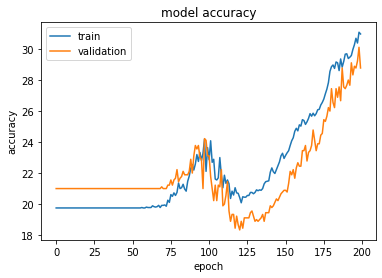

Maximum Train Accuracy : 31.08333396911621
Maximum Validation Accuracy : 30.111112594604492


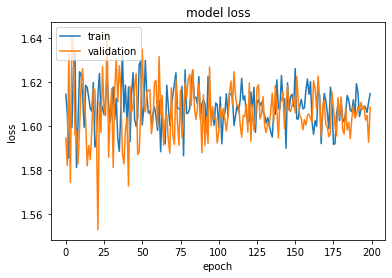

Minimum Train Loss : 1.5812928676605225
Minimum Validation Loss : 1.5529496669769287


In [ ]:
Bacteria_model_phase_SGD_00001 = Bact_Net()
Bacteria_model_phase_SGD_00001.cuda()
trainer_SGD_phase_00001 = trainer(Bacteria_model_phase_SGD_00001, phase_train_loader,"SGD", epoch_size=200, learning_rate=0.0001)
trainer_SGD_phase_00001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_SGD_phase_00001.history['train_acc'])
plt.plot(trainer_SGD_phase_00001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_SGD_phase_00001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_SGD_phase_00001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_SGD_phase_00001.history['train_loss'])
plt.plot(trainer_SGD_phase_00001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_SGD_phase_00001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_SGD_phase_00001.history['val_loss'])}")


# Phase_Adagrad

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 42.972221


  0%|          | 1/200 [00:10<34:03, 10.27s/it]

Val Acc | Epoch 1/200 | ACC 43.444447
Train Acc | Epoch 2/200 | ACC 45.416668


  1%|          | 2/200 [00:20<33:08, 10.04s/it]

Val Acc | Epoch 2/200 | ACC 44.222225
Train Acc | Epoch 3/200 | ACC 60.500000


  2%|▏         | 3/200 [00:29<32:34,  9.92s/it]

Val Acc | Epoch 3/200 | ACC 59.333336
Train Acc | Epoch 4/200 | ACC 31.611113


  2%|▏         | 4/200 [00:39<32:35,  9.98s/it]

Val Acc | Epoch 4/200 | ACC 33.666668
Train Acc | Epoch 5/200 | ACC 70.055557


  2%|▎         | 5/200 [00:49<32:17,  9.94s/it]

Val Acc | Epoch 5/200 | ACC 69.777779
Train Acc | Epoch 6/200 | ACC 69.500000


  3%|▎         | 6/200 [00:59<31:58,  9.89s/it]

Val Acc | Epoch 6/200 | ACC 67.777779
Train Acc | Epoch 7/200 | ACC 74.972221


  4%|▎         | 7/200 [01:09<31:43,  9.86s/it]

Val Acc | Epoch 7/200 | ACC 72.777779
Train Acc | Epoch 8/200 | ACC 77.611115


  4%|▍         | 8/200 [01:19<31:31,  9.85s/it]

Val Acc | Epoch 8/200 | ACC 77.222221
Train Acc | Epoch 9/200 | ACC 74.250000


  4%|▍         | 9/200 [01:29<31:44,  9.97s/it]

Val Acc | Epoch 9/200 | ACC 74.000000
Train Acc | Epoch 10/200 | ACC 58.583336


  5%|▌         | 10/200 [01:39<31:51, 10.06s/it]

Val Acc | Epoch 10/200 | ACC 56.333332
Train Acc | Epoch 11/200 | ACC 78.305557


  6%|▌         | 11/200 [01:49<31:25,  9.97s/it]

Val Acc | Epoch 11/200 | ACC 76.222221
Train Acc | Epoch 12/200 | ACC 71.750000


  6%|▌         | 12/200 [01:59<31:03,  9.91s/it]

Val Acc | Epoch 12/200 | ACC 69.444450
Train Acc | Epoch 13/200 | ACC 75.166664


  6%|▋         | 13/200 [02:09<30:49,  9.89s/it]

Val Acc | Epoch 13/200 | ACC 75.666664
Train Acc | Epoch 14/200 | ACC 78.833336


  7%|▋         | 14/200 [02:19<30:37,  9.88s/it]

Val Acc | Epoch 14/200 | ACC 78.666672
Train Acc | Epoch 15/200 | ACC 81.305557


  8%|▊         | 15/200 [02:28<30:28,  9.88s/it]

Val Acc | Epoch 15/200 | ACC 79.444443
Train Acc | Epoch 16/200 | ACC 80.611115


  8%|▊         | 16/200 [02:38<30:17,  9.88s/it]

Val Acc | Epoch 16/200 | ACC 78.111115
Train Acc | Epoch 17/200 | ACC 80.944450


  8%|▊         | 17/200 [02:48<30:15,  9.92s/it]

Val Acc | Epoch 17/200 | ACC 79.555557
Train Acc | Epoch 18/200 | ACC 80.694450


  9%|▉         | 18/200 [02:58<30:02,  9.90s/it]

Val Acc | Epoch 18/200 | ACC 79.333336
Train Acc | Epoch 19/200 | ACC 81.583336


 10%|▉         | 19/200 [03:08<29:58,  9.94s/it]

Val Acc | Epoch 19/200 | ACC 79.222229
Train Acc | Epoch 20/200 | ACC 81.972221


 10%|█         | 20/200 [03:18<29:37,  9.88s/it]

Val Acc | Epoch 20/200 | ACC 79.777779
Train Acc | Epoch 21/200 | ACC 81.472221


 10%|█         | 21/200 [03:28<29:21,  9.84s/it]

Val Acc | Epoch 21/200 | ACC 80.777779
Train Acc | Epoch 22/200 | ACC 82.250000


 11%|█         | 22/200 [03:38<29:26,  9.92s/it]

Val Acc | Epoch 22/200 | ACC 80.888893
Train Acc | Epoch 23/200 | ACC 82.638893


 12%|█▏        | 23/200 [03:48<29:14,  9.91s/it]

Val Acc | Epoch 23/200 | ACC 79.444443
Train Acc | Epoch 24/200 | ACC 77.416672


 12%|█▏        | 24/200 [03:57<28:54,  9.85s/it]

Val Acc | Epoch 24/200 | ACC 77.111115
Train Acc | Epoch 25/200 | ACC 65.972221


 12%|█▎        | 25/200 [04:07<28:55,  9.92s/it]

Val Acc | Epoch 25/200 | ACC 66.444443
Train Acc | Epoch 26/200 | ACC 78.027779


 13%|█▎        | 26/200 [04:17<28:36,  9.86s/it]

Val Acc | Epoch 26/200 | ACC 76.111115
Train Acc | Epoch 27/200 | ACC 82.805557


 14%|█▎        | 27/200 [04:27<28:35,  9.92s/it]

Val Acc | Epoch 27/200 | ACC 83.555557
Train Acc | Epoch 28/200 | ACC 83.888885


 14%|█▍        | 28/200 [04:37<28:33,  9.96s/it]

Val Acc | Epoch 28/200 | ACC 81.666664
Train Acc | Epoch 29/200 | ACC 80.805557


 14%|█▍        | 29/200 [04:47<28:14,  9.91s/it]

Val Acc | Epoch 29/200 | ACC 78.555557
Train Acc | Epoch 30/200 | ACC 83.361115


 15%|█▌        | 30/200 [04:57<28:12,  9.96s/it]

Val Acc | Epoch 30/200 | ACC 81.111115
Train Acc | Epoch 31/200 | ACC 81.583336


 16%|█▌        | 31/200 [05:07<27:56,  9.92s/it]

Val Acc | Epoch 31/200 | ACC 80.000000
Train Acc | Epoch 32/200 | ACC 84.083336


 16%|█▌        | 32/200 [05:17<27:42,  9.90s/it]

Val Acc | Epoch 32/200 | ACC 83.777779
Train Acc | Epoch 33/200 | ACC 84.583336


 16%|█▋        | 33/200 [05:27<27:35,  9.92s/it]

Val Acc | Epoch 33/200 | ACC 83.888885
Train Acc | Epoch 34/200 | ACC 83.555557


 17%|█▋        | 34/200 [05:37<27:23,  9.90s/it]

Val Acc | Epoch 34/200 | ACC 81.666664
Train Acc | Epoch 35/200 | ACC 83.444443


 18%|█▊        | 35/200 [05:47<27:13,  9.90s/it]

Val Acc | Epoch 35/200 | ACC 82.222221
Train Acc | Epoch 36/200 | ACC 83.861115


 18%|█▊        | 36/200 [05:56<27:04,  9.91s/it]

Val Acc | Epoch 36/200 | ACC 82.222221
Train Acc | Epoch 37/200 | ACC 85.305557


 18%|█▊        | 37/200 [06:06<26:50,  9.88s/it]

Val Acc | Epoch 37/200 | ACC 83.666672
Train Acc | Epoch 38/200 | ACC 83.500000


 19%|█▉        | 38/200 [06:16<26:33,  9.84s/it]

Val Acc | Epoch 38/200 | ACC 83.444443
Train Acc | Epoch 39/200 | ACC 83.361115


 20%|█▉        | 39/200 [06:26<26:25,  9.85s/it]

Val Acc | Epoch 39/200 | ACC 82.888885
Train Acc | Epoch 40/200 | ACC 84.750000


 20%|██        | 40/200 [06:36<26:09,  9.81s/it]

Val Acc | Epoch 40/200 | ACC 84.333336
Train Acc | Epoch 41/200 | ACC 85.444443


 20%|██        | 41/200 [06:46<26:25,  9.97s/it]

Val Acc | Epoch 41/200 | ACC 84.333336
Train Acc | Epoch 42/200 | ACC 85.472229


 21%|██        | 42/200 [06:56<26:21, 10.01s/it]

Val Acc | Epoch 42/200 | ACC 84.444443
Train Acc | Epoch 43/200 | ACC 84.277779


 22%|██▏       | 43/200 [07:06<26:12, 10.02s/it]

Val Acc | Epoch 43/200 | ACC 83.777779
Train Acc | Epoch 44/200 | ACC 84.083336


 22%|██▏       | 44/200 [07:16<25:51,  9.94s/it]

Val Acc | Epoch 44/200 | ACC 83.333336
Train Acc | Epoch 45/200 | ACC 84.694443


 22%|██▎       | 45/200 [07:26<25:46,  9.98s/it]

Val Acc | Epoch 45/200 | ACC 82.222221
Train Acc | Epoch 46/200 | ACC 85.527779


 23%|██▎       | 46/200 [07:36<25:25,  9.91s/it]

Val Acc | Epoch 46/200 | ACC 84.444443
Train Acc | Epoch 47/200 | ACC 85.750000


 24%|██▎       | 47/200 [07:45<25:11,  9.88s/it]

Val Acc | Epoch 47/200 | ACC 82.666672
Train Acc | Epoch 48/200 | ACC 82.805557


 24%|██▍       | 48/200 [07:56<25:08,  9.92s/it]

Val Acc | Epoch 48/200 | ACC 82.555557
Train Acc | Epoch 49/200 | ACC 85.305557


 24%|██▍       | 49/200 [08:05<25:00,  9.94s/it]

Val Acc | Epoch 49/200 | ACC 83.111115
Train Acc | Epoch 50/200 | ACC 85.111115


 25%|██▌       | 50/200 [08:15<24:44,  9.90s/it]

Val Acc | Epoch 50/200 | ACC 84.333336
Train Acc | Epoch 51/200 | ACC 84.972229


 26%|██▌       | 51/200 [08:25<24:27,  9.85s/it]

Val Acc | Epoch 51/200 | ACC 84.777779
Train Acc | Epoch 52/200 | ACC 82.500008


 26%|██▌       | 52/200 [08:35<24:18,  9.86s/it]

Val Acc | Epoch 52/200 | ACC 80.888893
Train Acc | Epoch 53/200 | ACC 73.472229


 26%|██▋       | 53/200 [08:45<24:08,  9.86s/it]

Val Acc | Epoch 53/200 | ACC 73.888893
Train Acc | Epoch 54/200 | ACC 85.777779


 27%|██▋       | 54/200 [08:55<24:06,  9.91s/it]

Val Acc | Epoch 54/200 | ACC 85.777779
Train Acc | Epoch 55/200 | ACC 86.194443


 28%|██▊       | 55/200 [09:05<23:49,  9.86s/it]

Val Acc | Epoch 55/200 | ACC 84.333336
Train Acc | Epoch 56/200 | ACC 85.638893


 28%|██▊       | 56/200 [09:14<23:37,  9.84s/it]

Val Acc | Epoch 56/200 | ACC 83.000008
Train Acc | Epoch 57/200 | ACC 84.944443


 28%|██▊       | 57/200 [09:24<23:29,  9.86s/it]

Val Acc | Epoch 57/200 | ACC 85.000000
Train Acc | Epoch 58/200 | ACC 85.777779


 29%|██▉       | 58/200 [09:34<23:15,  9.83s/it]

Val Acc | Epoch 58/200 | ACC 84.000000
Train Acc | Epoch 59/200 | ACC 85.833336


 30%|██▉       | 59/200 [09:44<23:11,  9.87s/it]

Val Acc | Epoch 59/200 | ACC 83.888885
Train Acc | Epoch 60/200 | ACC 85.333336


 30%|███       | 60/200 [09:54<23:02,  9.87s/it]

Val Acc | Epoch 60/200 | ACC 85.888893
Train Acc | Epoch 61/200 | ACC 86.055557


 30%|███       | 61/200 [10:04<22:59,  9.93s/it]

Val Acc | Epoch 61/200 | ACC 85.333336
Train Acc | Epoch 62/200 | ACC 85.194443


 31%|███       | 62/200 [10:14<22:46,  9.90s/it]

Val Acc | Epoch 62/200 | ACC 84.222221
Train Acc | Epoch 63/200 | ACC 84.666672


 32%|███▏      | 63/200 [10:24<22:32,  9.87s/it]

Val Acc | Epoch 63/200 | ACC 85.111115
Train Acc | Epoch 64/200 | ACC 83.027779


 32%|███▏      | 64/200 [10:33<22:20,  9.86s/it]

Val Acc | Epoch 64/200 | ACC 81.111115
Train Acc | Epoch 65/200 | ACC 85.833336


 32%|███▎      | 65/200 [10:43<22:14,  9.89s/it]

Val Acc | Epoch 65/200 | ACC 85.666672
Train Acc | Epoch 66/200 | ACC 85.361115


 33%|███▎      | 66/200 [10:53<22:10,  9.93s/it]

Val Acc | Epoch 66/200 | ACC 85.000000
Train Acc | Epoch 67/200 | ACC 86.305557


 34%|███▎      | 67/200 [11:03<22:02,  9.94s/it]

Val Acc | Epoch 67/200 | ACC 84.333336
Train Acc | Epoch 68/200 | ACC 85.500000


 34%|███▍      | 68/200 [11:13<21:46,  9.89s/it]

Val Acc | Epoch 68/200 | ACC 85.111115
Train Acc | Epoch 69/200 | ACC 86.305557


 34%|███▍      | 69/200 [11:23<21:32,  9.87s/it]

Val Acc | Epoch 69/200 | ACC 85.555557
Train Acc | Epoch 70/200 | ACC 85.916672


 35%|███▌      | 70/200 [11:33<21:22,  9.86s/it]

Val Acc | Epoch 70/200 | ACC 84.666672
Train Acc | Epoch 71/200 | ACC 86.194443


 36%|███▌      | 71/200 [11:43<21:14,  9.88s/it]

Val Acc | Epoch 71/200 | ACC 84.888893
Train Acc | Epoch 72/200 | ACC 86.111107


 36%|███▌      | 72/200 [11:53<21:28, 10.06s/it]

Val Acc | Epoch 72/200 | ACC 84.444443
Train Acc | Epoch 73/200 | ACC 85.555557


 36%|███▋      | 73/200 [12:03<21:27, 10.14s/it]

Val Acc | Epoch 73/200 | ACC 84.333336
Train Acc | Epoch 74/200 | ACC 85.916672


 37%|███▋      | 74/200 [12:13<21:01, 10.01s/it]

Val Acc | Epoch 74/200 | ACC 86.333336
Train Acc | Epoch 75/200 | ACC 86.250000


 38%|███▊      | 75/200 [12:23<20:42,  9.94s/it]

Val Acc | Epoch 75/200 | ACC 85.666672
Train Acc | Epoch 76/200 | ACC 86.222229


 38%|███▊      | 76/200 [12:33<20:34,  9.95s/it]

Val Acc | Epoch 76/200 | ACC 86.111107
Train Acc | Epoch 77/200 | ACC 86.055557


 38%|███▊      | 77/200 [12:43<20:20,  9.93s/it]

Val Acc | Epoch 77/200 | ACC 84.666672
Train Acc | Epoch 78/200 | ACC 86.472229


 39%|███▉      | 78/200 [12:53<20:06,  9.89s/it]

Val Acc | Epoch 78/200 | ACC 85.444443
Train Acc | Epoch 79/200 | ACC 86.305557


 40%|███▉      | 79/200 [13:03<19:57,  9.90s/it]

Val Acc | Epoch 79/200 | ACC 85.777779
Train Acc | Epoch 80/200 | ACC 85.250000


 40%|████      | 80/200 [13:12<19:49,  9.91s/it]

Val Acc | Epoch 80/200 | ACC 84.000000
Train Acc | Epoch 81/200 | ACC 86.000000


 40%|████      | 81/200 [13:22<19:35,  9.88s/it]

Val Acc | Epoch 81/200 | ACC 85.666672
Train Acc | Epoch 82/200 | ACC 85.777779


 41%|████      | 82/200 [13:32<19:26,  9.89s/it]

Val Acc | Epoch 82/200 | ACC 85.888893
Train Acc | Epoch 83/200 | ACC 86.916664


 42%|████▏     | 83/200 [13:42<19:20,  9.92s/it]

Val Acc | Epoch 83/200 | ACC 85.222229
Train Acc | Epoch 84/200 | ACC 86.388893


 42%|████▏     | 84/200 [13:52<19:08,  9.90s/it]

Val Acc | Epoch 84/200 | ACC 86.555557
Train Acc | Epoch 85/200 | ACC 86.416664


 42%|████▎     | 85/200 [14:02<18:55,  9.87s/it]

Val Acc | Epoch 85/200 | ACC 86.222229
Train Acc | Epoch 86/200 | ACC 87.027779


 43%|████▎     | 86/200 [14:12<18:42,  9.85s/it]

Val Acc | Epoch 86/200 | ACC 86.333336
Train Acc | Epoch 87/200 | ACC 86.250000


 44%|████▎     | 87/200 [14:21<18:33,  9.85s/it]

Val Acc | Epoch 87/200 | ACC 85.777779
Train Acc | Epoch 88/200 | ACC 85.055557


 44%|████▍     | 88/200 [14:31<18:22,  9.84s/it]

Val Acc | Epoch 88/200 | ACC 84.777779
Train Acc | Epoch 89/200 | ACC 85.472229


 44%|████▍     | 89/200 [14:41<18:12,  9.84s/it]

Val Acc | Epoch 89/200 | ACC 84.555557
Train Acc | Epoch 90/200 | ACC 85.750000


 45%|████▌     | 90/200 [14:51<18:07,  9.88s/it]

Val Acc | Epoch 90/200 | ACC 85.111115
Train Acc | Epoch 91/200 | ACC 86.416664


 46%|████▌     | 91/200 [15:01<17:57,  9.88s/it]

Val Acc | Epoch 91/200 | ACC 86.111107
Train Acc | Epoch 92/200 | ACC 86.055557


 46%|████▌     | 92/200 [15:11<17:51,  9.92s/it]

Val Acc | Epoch 92/200 | ACC 84.222221
Train Acc | Epoch 93/200 | ACC 86.333336


 46%|████▋     | 93/200 [15:21<17:33,  9.85s/it]

Val Acc | Epoch 93/200 | ACC 85.888893
Train Acc | Epoch 94/200 | ACC 86.527786


 47%|████▋     | 94/200 [15:31<17:30,  9.91s/it]

Val Acc | Epoch 94/200 | ACC 84.555557
Train Acc | Epoch 95/200 | ACC 86.138893


 48%|████▊     | 95/200 [15:41<17:26,  9.96s/it]

Val Acc | Epoch 95/200 | ACC 84.000000
Train Acc | Epoch 96/200 | ACC 86.444450


 48%|████▊     | 96/200 [15:51<17:10,  9.91s/it]

Val Acc | Epoch 96/200 | ACC 86.444450
Train Acc | Epoch 97/200 | ACC 86.027779


 48%|████▊     | 97/200 [16:00<16:56,  9.87s/it]

Val Acc | Epoch 97/200 | ACC 84.777779
Train Acc | Epoch 98/200 | ACC 83.555557


 49%|████▉     | 98/200 [16:10<16:46,  9.87s/it]

Val Acc | Epoch 98/200 | ACC 82.777779
Train Acc | Epoch 99/200 | ACC 86.583336


 50%|████▉     | 99/200 [16:20<16:38,  9.89s/it]

Val Acc | Epoch 99/200 | ACC 86.000000
Train Acc | Epoch 100/200 | ACC 85.888893


 50%|█████     | 100/200 [16:30<16:27,  9.88s/it]

Val Acc | Epoch 100/200 | ACC 85.333336
Train Acc | Epoch 101/200 | ACC 86.611115


 50%|█████     | 101/200 [16:40<16:14,  9.84s/it]

Val Acc | Epoch 101/200 | ACC 85.444443
Train Acc | Epoch 102/200 | ACC 87.111115


 51%|█████     | 102/200 [16:50<16:03,  9.83s/it]

Val Acc | Epoch 102/200 | ACC 85.111115
Train Acc | Epoch 103/200 | ACC 85.777779


 52%|█████▏    | 103/200 [17:00<16:01,  9.91s/it]

Val Acc | Epoch 103/200 | ACC 85.777779
Train Acc | Epoch 104/200 | ACC 85.611115


 52%|█████▏    | 104/200 [17:10<16:05, 10.05s/it]

Val Acc | Epoch 104/200 | ACC 85.333336
Train Acc | Epoch 105/200 | ACC 86.750000


 52%|█████▎    | 105/200 [17:20<15:47,  9.98s/it]

Val Acc | Epoch 105/200 | ACC 87.000000
Train Acc | Epoch 106/200 | ACC 86.611115


 53%|█████▎    | 106/200 [17:30<15:36,  9.96s/it]

Val Acc | Epoch 106/200 | ACC 84.222221
Train Acc | Epoch 107/200 | ACC 87.138893


 54%|█████▎    | 107/200 [17:40<15:22,  9.92s/it]

Val Acc | Epoch 107/200 | ACC 86.000000
Train Acc | Epoch 108/200 | ACC 87.083336


 54%|█████▍    | 108/200 [17:49<15:10,  9.89s/it]

Val Acc | Epoch 108/200 | ACC 84.888893
Train Acc | Epoch 109/200 | ACC 87.444450


 55%|█████▍    | 109/200 [17:59<15:01,  9.90s/it]

Val Acc | Epoch 109/200 | ACC 86.222229
Train Acc | Epoch 110/200 | ACC 87.138893


 55%|█████▌    | 110/200 [18:09<14:50,  9.89s/it]

Val Acc | Epoch 110/200 | ACC 85.888893
Train Acc | Epoch 111/200 | ACC 86.611115


 56%|█████▌    | 111/200 [18:19<14:43,  9.93s/it]

Val Acc | Epoch 111/200 | ACC 84.222221
Train Acc | Epoch 112/200 | ACC 86.722221


 56%|█████▌    | 112/200 [18:29<14:34,  9.93s/it]

Val Acc | Epoch 112/200 | ACC 85.888893
Train Acc | Epoch 113/200 | ACC 87.305557


 56%|█████▋    | 113/200 [18:39<14:19,  9.88s/it]

Val Acc | Epoch 113/200 | ACC 85.222229
Train Acc | Epoch 114/200 | ACC 87.222221


 57%|█████▋    | 114/200 [18:49<14:14,  9.93s/it]

Val Acc | Epoch 114/200 | ACC 86.666664
Train Acc | Epoch 115/200 | ACC 86.833336


 57%|█████▊    | 115/200 [18:59<14:04,  9.93s/it]

Val Acc | Epoch 115/200 | ACC 87.222221
Train Acc | Epoch 116/200 | ACC 87.444450


 58%|█████▊    | 116/200 [19:09<13:59, 10.00s/it]

Val Acc | Epoch 116/200 | ACC 86.555557
Train Acc | Epoch 117/200 | ACC 87.138893


 58%|█████▊    | 117/200 [19:19<13:45,  9.95s/it]

Val Acc | Epoch 117/200 | ACC 84.777779
Train Acc | Epoch 118/200 | ACC 84.388893


 59%|█████▉    | 118/200 [19:29<13:42, 10.03s/it]

Val Acc | Epoch 118/200 | ACC 84.111115
Train Acc | Epoch 119/200 | ACC 87.055557


 60%|█████▉    | 119/200 [19:39<13:33, 10.04s/it]

Val Acc | Epoch 119/200 | ACC 85.888893
Train Acc | Epoch 120/200 | ACC 87.638893


 60%|██████    | 120/200 [19:49<13:18,  9.98s/it]

Val Acc | Epoch 120/200 | ACC 86.000000
Train Acc | Epoch 121/200 | ACC 87.083336


 60%|██████    | 121/200 [19:59<13:04,  9.92s/it]

Val Acc | Epoch 121/200 | ACC 86.666664
Train Acc | Epoch 122/200 | ACC 87.222221


 61%|██████    | 122/200 [20:09<12:58,  9.98s/it]

Val Acc | Epoch 122/200 | ACC 86.333336
Train Acc | Epoch 123/200 | ACC 87.361115


 62%|██████▏   | 123/200 [20:19<12:46,  9.95s/it]

Val Acc | Epoch 123/200 | ACC 86.111107
Train Acc | Epoch 124/200 | ACC 88.111115


 62%|██████▏   | 124/200 [20:29<12:33,  9.91s/it]

Val Acc | Epoch 124/200 | ACC 86.000000
Train Acc | Epoch 125/200 | ACC 87.666664


 62%|██████▎   | 125/200 [20:38<12:20,  9.87s/it]

Val Acc | Epoch 125/200 | ACC 84.555557
Train Acc | Epoch 126/200 | ACC 88.888893


 63%|██████▎   | 126/200 [20:48<12:05,  9.81s/it]

Val Acc | Epoch 126/200 | ACC 88.333336
Train Acc | Epoch 127/200 | ACC 88.166664


 64%|██████▎   | 127/200 [20:58<11:58,  9.84s/it]

Val Acc | Epoch 127/200 | ACC 86.333336
Train Acc | Epoch 128/200 | ACC 87.666664


 64%|██████▍   | 128/200 [21:08<11:48,  9.84s/it]

Val Acc | Epoch 128/200 | ACC 87.444450
Train Acc | Epoch 129/200 | ACC 86.555557


 64%|██████▍   | 129/200 [21:18<11:36,  9.81s/it]

Val Acc | Epoch 129/200 | ACC 82.777779
Train Acc | Epoch 130/200 | ACC 88.333336


 65%|██████▌   | 130/200 [21:28<11:30,  9.86s/it]

Val Acc | Epoch 130/200 | ACC 87.222221
Train Acc | Epoch 131/200 | ACC 86.972221


 66%|██████▌   | 131/200 [21:37<11:21,  9.87s/it]

Val Acc | Epoch 131/200 | ACC 85.222229
Train Acc | Epoch 132/200 | ACC 86.166672


 66%|██████▌   | 132/200 [21:47<11:12,  9.89s/it]

Val Acc | Epoch 132/200 | ACC 84.666672
Train Acc | Epoch 133/200 | ACC 86.083336


 66%|██████▋   | 133/200 [21:58<11:06,  9.95s/it]

Val Acc | Epoch 133/200 | ACC 85.777779
Train Acc | Epoch 134/200 | ACC 87.472221


 67%|██████▋   | 134/200 [22:08<11:02, 10.04s/it]

Val Acc | Epoch 134/200 | ACC 86.222229
Train Acc | Epoch 135/200 | ACC 87.833336


 68%|██████▊   | 135/200 [22:18<11:02, 10.19s/it]

Val Acc | Epoch 135/200 | ACC 85.333336
Train Acc | Epoch 136/200 | ACC 87.583336


 68%|██████▊   | 136/200 [22:28<10:48, 10.14s/it]

Val Acc | Epoch 136/200 | ACC 84.666672
Train Acc | Epoch 137/200 | ACC 88.194450


 68%|██████▊   | 137/200 [22:38<10:33, 10.06s/it]

Val Acc | Epoch 137/200 | ACC 87.888893
Train Acc | Epoch 138/200 | ACC 88.638893


 69%|██████▉   | 138/200 [22:48<10:18,  9.97s/it]

Val Acc | Epoch 138/200 | ACC 87.111115
Train Acc | Epoch 139/200 | ACC 88.750008


 70%|██████▉   | 139/200 [22:58<10:12, 10.04s/it]

Val Acc | Epoch 139/200 | ACC 86.444450
Train Acc | Epoch 140/200 | ACC 87.888893


 70%|███████   | 140/200 [23:08<10:03, 10.05s/it]

Val Acc | Epoch 140/200 | ACC 87.222221
Train Acc | Epoch 141/200 | ACC 88.388893


 70%|███████   | 141/200 [23:18<09:49, 10.00s/it]

Val Acc | Epoch 141/200 | ACC 86.555557
Train Acc | Epoch 142/200 | ACC 86.805557


 71%|███████   | 142/200 [23:28<09:36,  9.94s/it]

Val Acc | Epoch 142/200 | ACC 86.333336
Train Acc | Epoch 143/200 | ACC 88.111115


 72%|███████▏  | 143/200 [23:38<09:24,  9.90s/it]

Val Acc | Epoch 143/200 | ACC 87.000000
Train Acc | Epoch 144/200 | ACC 87.861115


 72%|███████▏  | 144/200 [23:47<09:11,  9.85s/it]

Val Acc | Epoch 144/200 | ACC 86.555557
Train Acc | Epoch 145/200 | ACC 88.000000


 72%|███████▎  | 145/200 [23:57<09:00,  9.83s/it]

Val Acc | Epoch 145/200 | ACC 86.444450
Train Acc | Epoch 146/200 | ACC 88.111115


 73%|███████▎  | 146/200 [24:07<08:48,  9.78s/it]

Val Acc | Epoch 146/200 | ACC 86.777786
Train Acc | Epoch 147/200 | ACC 88.083336


 74%|███████▎  | 147/200 [24:17<08:40,  9.82s/it]

Val Acc | Epoch 147/200 | ACC 86.333336
Train Acc | Epoch 148/200 | ACC 88.416672


 74%|███████▍  | 148/200 [24:27<08:34,  9.90s/it]

Val Acc | Epoch 148/200 | ACC 87.888893
Train Acc | Epoch 149/200 | ACC 88.888893


 74%|███████▍  | 149/200 [24:37<08:25,  9.91s/it]

Val Acc | Epoch 149/200 | ACC 87.222221
Train Acc | Epoch 150/200 | ACC 88.833336


 75%|███████▌  | 150/200 [24:47<08:14,  9.88s/it]

Val Acc | Epoch 150/200 | ACC 87.555557
Train Acc | Epoch 151/200 | ACC 88.333336


 76%|███████▌  | 151/200 [24:56<08:01,  9.84s/it]

Val Acc | Epoch 151/200 | ACC 85.777779
Train Acc | Epoch 152/200 | ACC 88.027779


 76%|███████▌  | 152/200 [25:06<07:53,  9.87s/it]

Val Acc | Epoch 152/200 | ACC 86.777786
Train Acc | Epoch 153/200 | ACC 88.555557


 76%|███████▋  | 153/200 [25:16<07:41,  9.83s/it]

Val Acc | Epoch 153/200 | ACC 87.111115
Train Acc | Epoch 154/200 | ACC 88.500008


 77%|███████▋  | 154/200 [25:26<07:30,  9.80s/it]

Val Acc | Epoch 154/200 | ACC 87.555557
Train Acc | Epoch 155/200 | ACC 88.388893


 78%|███████▊  | 155/200 [25:36<07:19,  9.78s/it]

Val Acc | Epoch 155/200 | ACC 86.000000
Train Acc | Epoch 156/200 | ACC 88.805557


 78%|███████▊  | 156/200 [25:45<07:10,  9.78s/it]

Val Acc | Epoch 156/200 | ACC 87.333336
Train Acc | Epoch 157/200 | ACC 88.361115


 78%|███████▊  | 157/200 [25:55<07:03,  9.84s/it]

Val Acc | Epoch 157/200 | ACC 87.111115
Train Acc | Epoch 158/200 | ACC 88.083336


 79%|███████▉  | 158/200 [26:05<06:53,  9.85s/it]

Val Acc | Epoch 158/200 | ACC 85.444443
Train Acc | Epoch 159/200 | ACC 88.777779


 80%|███████▉  | 159/200 [26:15<06:46,  9.90s/it]

Val Acc | Epoch 159/200 | ACC 86.777786
Train Acc | Epoch 160/200 | ACC 88.861115


 80%|████████  | 160/200 [26:25<06:36,  9.92s/it]

Val Acc | Epoch 160/200 | ACC 87.888893
Train Acc | Epoch 161/200 | ACC 88.138893


 80%|████████  | 161/200 [26:35<06:26,  9.90s/it]

Val Acc | Epoch 161/200 | ACC 87.666664
Train Acc | Epoch 162/200 | ACC 88.750008


 81%|████████  | 162/200 [26:45<06:13,  9.83s/it]

Val Acc | Epoch 162/200 | ACC 87.555557
Train Acc | Epoch 163/200 | ACC 88.083336


 82%|████████▏ | 163/200 [26:55<06:04,  9.85s/it]

Val Acc | Epoch 163/200 | ACC 86.222229
Train Acc | Epoch 164/200 | ACC 89.000008


 82%|████████▏ | 164/200 [27:04<05:53,  9.83s/it]

Val Acc | Epoch 164/200 | ACC 89.222221
Train Acc | Epoch 165/200 | ACC 88.222221


 82%|████████▎ | 165/200 [27:14<05:45,  9.88s/it]

Val Acc | Epoch 165/200 | ACC 86.888893
Train Acc | Epoch 166/200 | ACC 88.694450


 83%|████████▎ | 166/200 [27:25<05:39,  9.98s/it]

Val Acc | Epoch 166/200 | ACC 87.777779
Train Acc | Epoch 167/200 | ACC 88.777779


 84%|████████▎ | 167/200 [27:35<05:31, 10.05s/it]

Val Acc | Epoch 167/200 | ACC 86.555557
Train Acc | Epoch 168/200 | ACC 88.916672


 84%|████████▍ | 168/200 [27:45<05:21, 10.05s/it]

Val Acc | Epoch 168/200 | ACC 88.333336
Train Acc | Epoch 169/200 | ACC 88.555557


 84%|████████▍ | 169/200 [27:55<05:09,  9.97s/it]

Val Acc | Epoch 169/200 | ACC 86.111107
Train Acc | Epoch 170/200 | ACC 88.833336


 85%|████████▌ | 170/200 [28:04<04:57,  9.93s/it]

Val Acc | Epoch 170/200 | ACC 87.111115
Train Acc | Epoch 171/200 | ACC 88.472221


 86%|████████▌ | 171/200 [28:15<04:49,  9.99s/it]

Val Acc | Epoch 171/200 | ACC 86.888893
Train Acc | Epoch 172/200 | ACC 86.944450


 86%|████████▌ | 172/200 [28:24<04:38,  9.96s/it]

Val Acc | Epoch 172/200 | ACC 86.888893
Train Acc | Epoch 173/200 | ACC 88.500008


 86%|████████▋ | 173/200 [28:34<04:27,  9.89s/it]

Val Acc | Epoch 173/200 | ACC 87.555557
Train Acc | Epoch 174/200 | ACC 88.361115


 87%|████████▋ | 174/200 [28:44<04:16,  9.87s/it]

Val Acc | Epoch 174/200 | ACC 86.444450
Train Acc | Epoch 175/200 | ACC 88.805557


 88%|████████▊ | 175/200 [28:54<04:07,  9.90s/it]

Val Acc | Epoch 175/200 | ACC 87.888893
Train Acc | Epoch 176/200 | ACC 88.500008


 88%|████████▊ | 176/200 [29:04<03:57,  9.88s/it]

Val Acc | Epoch 176/200 | ACC 86.555557
Train Acc | Epoch 177/200 | ACC 89.083336


 88%|████████▊ | 177/200 [29:14<03:47,  9.91s/it]

Val Acc | Epoch 177/200 | ACC 87.333336
Train Acc | Epoch 178/200 | ACC 88.472221


 89%|████████▉ | 178/200 [29:23<03:36,  9.84s/it]

Val Acc | Epoch 178/200 | ACC 86.111107
Train Acc | Epoch 179/200 | ACC 89.194450


 90%|████████▉ | 179/200 [29:33<03:26,  9.83s/it]

Val Acc | Epoch 179/200 | ACC 87.111115
Train Acc | Epoch 180/200 | ACC 89.361115


 90%|█████████ | 180/200 [29:43<03:17,  9.87s/it]

Val Acc | Epoch 180/200 | ACC 87.555557
Train Acc | Epoch 181/200 | ACC 88.388893


 90%|█████████ | 181/200 [29:53<03:06,  9.82s/it]

Val Acc | Epoch 181/200 | ACC 86.888893
Train Acc | Epoch 182/200 | ACC 88.361115


 91%|█████████ | 182/200 [30:03<02:56,  9.79s/it]

Val Acc | Epoch 182/200 | ACC 86.666664
Train Acc | Epoch 183/200 | ACC 88.861115


 92%|█████████▏| 183/200 [30:13<02:47,  9.87s/it]

Val Acc | Epoch 183/200 | ACC 86.888893
Train Acc | Epoch 184/200 | ACC 83.166672


 92%|█████████▏| 184/200 [30:23<02:38,  9.88s/it]

Val Acc | Epoch 184/200 | ACC 83.000008
Train Acc | Epoch 185/200 | ACC 89.083336


 92%|█████████▎| 185/200 [30:33<02:28,  9.90s/it]

Val Acc | Epoch 185/200 | ACC 88.444450
Train Acc | Epoch 186/200 | ACC 88.333336


 93%|█████████▎| 186/200 [30:42<02:18,  9.88s/it]

Val Acc | Epoch 186/200 | ACC 86.666664
Train Acc | Epoch 187/200 | ACC 89.555557


 94%|█████████▎| 187/200 [30:52<02:08,  9.92s/it]

Val Acc | Epoch 187/200 | ACC 87.666664
Train Acc | Epoch 188/200 | ACC 89.361115


 94%|█████████▍| 188/200 [31:02<01:59,  9.96s/it]

Val Acc | Epoch 188/200 | ACC 88.222221
Train Acc | Epoch 189/200 | ACC 88.916672


 94%|█████████▍| 189/200 [31:12<01:49,  9.97s/it]

Val Acc | Epoch 189/200 | ACC 86.000000
Train Acc | Epoch 190/200 | ACC 89.111115


 95%|█████████▌| 190/200 [31:23<01:40, 10.00s/it]

Val Acc | Epoch 190/200 | ACC 87.666664
Train Acc | Epoch 191/200 | ACC 88.944450


 96%|█████████▌| 191/200 [31:32<01:29,  9.97s/it]

Val Acc | Epoch 191/200 | ACC 87.222221
Train Acc | Epoch 192/200 | ACC 88.527779


 96%|█████████▌| 192/200 [31:43<01:19, 10.00s/it]

Val Acc | Epoch 192/200 | ACC 86.777786
Train Acc | Epoch 193/200 | ACC 88.666672


 96%|█████████▋| 193/200 [31:52<01:09,  9.95s/it]

Val Acc | Epoch 193/200 | ACC 86.777786
Train Acc | Epoch 194/200 | ACC 89.194450


 97%|█████████▋| 194/200 [32:02<00:59,  9.92s/it]

Val Acc | Epoch 194/200 | ACC 87.333336
Train Acc | Epoch 195/200 | ACC 89.138885


 98%|█████████▊| 195/200 [32:12<00:49,  9.91s/it]

Val Acc | Epoch 195/200 | ACC 87.333336
Train Acc | Epoch 196/200 | ACC 89.305557


 98%|█████████▊| 196/200 [32:22<00:39,  9.86s/it]

Val Acc | Epoch 196/200 | ACC 87.444450
Train Acc | Epoch 197/200 | ACC 89.000008


 98%|█████████▊| 197/200 [32:32<00:30, 10.02s/it]

Val Acc | Epoch 197/200 | ACC 87.777779
Train Acc | Epoch 198/200 | ACC 89.000008


 99%|█████████▉| 198/200 [32:43<00:20, 10.11s/it]

Val Acc | Epoch 198/200 | ACC 88.222221
Train Acc | Epoch 199/200 | ACC 88.416672


100%|█████████▉| 199/200 [32:52<00:10, 10.03s/it]

Val Acc | Epoch 199/200 | ACC 88.000000
Train Acc | Epoch 200/200 | ACC 88.555557


100%|██████████| 200/200 [33:02<00:00,  9.91s/it]

Val Acc | Epoch 200/200 | ACC 87.777779


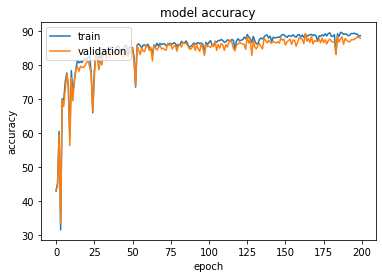

Maximum Train Accuracy : 89.55555725097656
Maximum Validation Accuracy : 89.22222137451172


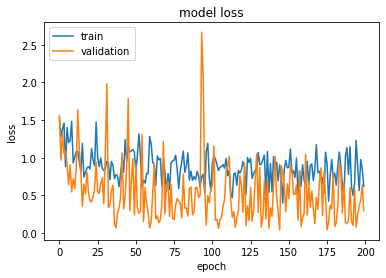

Minimum Train Loss : 0.39991191029548645
Minimum Validation Loss : 0.041797131299972534


In [ ]:
Bacteria_model_phase_Adagrad_001 = Bact_Net()
Bacteria_model_phase_Adagrad_001.cuda()
trainer_Adagrad_phase_001 = trainer(Bacteria_model_phase_Adagrad_001, phase_train_loader,"Adagrad", epoch_size=200, learning_rate=0.01)
trainer_Adagrad_phase_001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adagrad_phase_001.history['train_acc'])
plt.plot(trainer_Adagrad_phase_001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adagrad_phase_001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adagrad_phase_001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adagrad_phase_001.history['train_loss'])
plt.plot(trainer_Adagrad_phase_001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adagrad_phase_001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adagrad_phase_001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 19.972223


  0%|          | 1/200 [00:09<32:57,  9.94s/it]

Val Acc | Epoch 1/200 | ACC 20.111113
Train Acc | Epoch 2/200 | ACC 25.083334


  1%|          | 2/200 [00:19<32:55,  9.98s/it]

Val Acc | Epoch 2/200 | ACC 25.666666
Train Acc | Epoch 3/200 | ACC 41.027779


  2%|▏         | 3/200 [00:29<32:44,  9.97s/it]

Val Acc | Epoch 3/200 | ACC 41.444443
Train Acc | Epoch 4/200 | ACC 46.000000


  2%|▏         | 4/200 [00:39<32:33,  9.97s/it]

Val Acc | Epoch 4/200 | ACC 46.555557
Train Acc | Epoch 5/200 | ACC 49.138889


  2%|▎         | 5/200 [00:49<32:20,  9.95s/it]

Val Acc | Epoch 5/200 | ACC 50.888889
Train Acc | Epoch 6/200 | ACC 48.277779


  3%|▎         | 6/200 [00:59<32:00,  9.90s/it]

Val Acc | Epoch 6/200 | ACC 48.000000
Train Acc | Epoch 7/200 | ACC 45.527779


  4%|▎         | 7/200 [01:09<31:59,  9.95s/it]

Val Acc | Epoch 7/200 | ACC 47.777779
Train Acc | Epoch 8/200 | ACC 51.722221


  4%|▍         | 8/200 [01:19<31:44,  9.92s/it]

Val Acc | Epoch 8/200 | ACC 52.888889
Train Acc | Epoch 9/200 | ACC 52.333336


  4%|▍         | 9/200 [01:29<31:47,  9.99s/it]

Val Acc | Epoch 9/200 | ACC 50.666664
Train Acc | Epoch 10/200 | ACC 51.055557


  5%|▌         | 10/200 [01:39<31:36,  9.98s/it]

Val Acc | Epoch 10/200 | ACC 53.222221
Train Acc | Epoch 11/200 | ACC 52.277779


  6%|▌         | 11/200 [01:49<31:17,  9.94s/it]

Val Acc | Epoch 11/200 | ACC 53.555553
Train Acc | Epoch 12/200 | ACC 52.750004


  6%|▌         | 12/200 [01:59<31:14,  9.97s/it]

Val Acc | Epoch 12/200 | ACC 52.777779
Train Acc | Epoch 13/200 | ACC 53.000004


  6%|▋         | 13/200 [02:09<31:09, 10.00s/it]

Val Acc | Epoch 13/200 | ACC 54.111111
Train Acc | Epoch 14/200 | ACC 51.666664


  7%|▋         | 14/200 [02:19<30:51,  9.95s/it]

Val Acc | Epoch 14/200 | ACC 53.555553
Train Acc | Epoch 15/200 | ACC 55.500000


  8%|▊         | 15/200 [02:29<30:53, 10.02s/it]

Val Acc | Epoch 15/200 | ACC 57.222221
Train Acc | Epoch 16/200 | ACC 57.444447


  8%|▊         | 16/200 [02:39<30:34,  9.97s/it]

Val Acc | Epoch 16/200 | ACC 56.111115
Train Acc | Epoch 17/200 | ACC 54.250000


  8%|▊         | 17/200 [02:49<30:22,  9.96s/it]

Val Acc | Epoch 17/200 | ACC 55.222225
Train Acc | Epoch 18/200 | ACC 54.666668


  9%|▉         | 18/200 [02:59<30:07,  9.93s/it]

Val Acc | Epoch 18/200 | ACC 55.222225
Train Acc | Epoch 19/200 | ACC 54.194443


 10%|▉         | 19/200 [03:08<29:48,  9.88s/it]

Val Acc | Epoch 19/200 | ACC 55.444443
Train Acc | Epoch 20/200 | ACC 55.250000


 10%|█         | 20/200 [03:18<29:40,  9.89s/it]

Val Acc | Epoch 20/200 | ACC 54.666668
Train Acc | Epoch 21/200 | ACC 56.500000


 10%|█         | 21/200 [03:28<29:28,  9.88s/it]

Val Acc | Epoch 21/200 | ACC 58.000004
Train Acc | Epoch 22/200 | ACC 57.916672


 11%|█         | 22/200 [03:38<29:22,  9.90s/it]

Val Acc | Epoch 22/200 | ACC 59.555553
Train Acc | Epoch 23/200 | ACC 57.111115


 12%|█▏        | 23/200 [03:48<29:13,  9.91s/it]

Val Acc | Epoch 23/200 | ACC 58.333336
Train Acc | Epoch 24/200 | ACC 61.222225


 12%|█▏        | 24/200 [03:58<29:00,  9.89s/it]

Val Acc | Epoch 24/200 | ACC 57.000000
Train Acc | Epoch 25/200 | ACC 58.944447


 12%|█▎        | 25/200 [04:08<28:56,  9.92s/it]

Val Acc | Epoch 25/200 | ACC 57.111115
Train Acc | Epoch 26/200 | ACC 61.444443


 13%|█▎        | 26/200 [04:18<28:50,  9.95s/it]

Val Acc | Epoch 26/200 | ACC 62.888889
Train Acc | Epoch 27/200 | ACC 61.583336


 14%|█▎        | 27/200 [04:28<28:37,  9.93s/it]

Val Acc | Epoch 27/200 | ACC 61.666668
Train Acc | Epoch 28/200 | ACC 55.222225


 14%|█▍        | 28/200 [04:38<28:50, 10.06s/it]

Val Acc | Epoch 28/200 | ACC 56.666668
Train Acc | Epoch 29/200 | ACC 61.972225


 14%|█▍        | 29/200 [04:49<29:04, 10.20s/it]

Val Acc | Epoch 29/200 | ACC 62.444450
Train Acc | Epoch 30/200 | ACC 61.333336


 15%|█▌        | 30/200 [04:59<28:47, 10.16s/it]

Val Acc | Epoch 30/200 | ACC 63.555557
Train Acc | Epoch 31/200 | ACC 62.111115


 16%|█▌        | 31/200 [05:09<28:19, 10.06s/it]

Val Acc | Epoch 31/200 | ACC 59.888885
Train Acc | Epoch 32/200 | ACC 60.277779


 16%|█▌        | 32/200 [05:19<28:00, 10.00s/it]

Val Acc | Epoch 32/200 | ACC 61.111111
Train Acc | Epoch 33/200 | ACC 61.611111


 16%|█▋        | 33/200 [05:28<27:42,  9.96s/it]

Val Acc | Epoch 33/200 | ACC 60.333336
Train Acc | Epoch 34/200 | ACC 61.277779


 17%|█▋        | 34/200 [05:38<27:36,  9.98s/it]

Val Acc | Epoch 34/200 | ACC 59.666668
Train Acc | Epoch 35/200 | ACC 62.694447


 18%|█▊        | 35/200 [05:48<27:12,  9.90s/it]

Val Acc | Epoch 35/200 | ACC 62.444450
Train Acc | Epoch 36/200 | ACC 64.083336


 18%|█▊        | 36/200 [05:58<26:54,  9.85s/it]

Val Acc | Epoch 36/200 | ACC 63.333332
Train Acc | Epoch 37/200 | ACC 62.750000


 18%|█▊        | 37/200 [06:08<26:52,  9.89s/it]

Val Acc | Epoch 37/200 | ACC 63.333332
Train Acc | Epoch 38/200 | ACC 62.972225


 19%|█▉        | 38/200 [06:18<26:35,  9.85s/it]

Val Acc | Epoch 38/200 | ACC 63.333332
Train Acc | Epoch 39/200 | ACC 62.861115


 20%|█▉        | 39/200 [06:27<26:26,  9.86s/it]

Val Acc | Epoch 39/200 | ACC 65.444443
Train Acc | Epoch 40/200 | ACC 63.500000


 20%|██        | 40/200 [06:37<26:26,  9.91s/it]

Val Acc | Epoch 40/200 | ACC 65.222221
Train Acc | Epoch 41/200 | ACC 62.027782


 20%|██        | 41/200 [06:47<26:08,  9.87s/it]

Val Acc | Epoch 41/200 | ACC 61.777775
Train Acc | Epoch 42/200 | ACC 61.777775


 21%|██        | 42/200 [06:57<25:54,  9.84s/it]

Val Acc | Epoch 42/200 | ACC 64.000000
Train Acc | Epoch 43/200 | ACC 62.777782


 22%|██▏       | 43/200 [07:07<25:39,  9.81s/it]

Val Acc | Epoch 43/200 | ACC 64.000000
Train Acc | Epoch 44/200 | ACC 63.333332


 22%|██▏       | 44/200 [07:17<25:29,  9.81s/it]

Val Acc | Epoch 44/200 | ACC 63.333332
Train Acc | Epoch 45/200 | ACC 65.277779


 22%|██▎       | 45/200 [07:26<25:20,  9.81s/it]

Val Acc | Epoch 45/200 | ACC 62.777782
Train Acc | Epoch 46/200 | ACC 63.916664


 23%|██▎       | 46/200 [07:36<25:16,  9.85s/it]

Val Acc | Epoch 46/200 | ACC 65.888885
Train Acc | Epoch 47/200 | ACC 61.666668


 24%|██▎       | 47/200 [07:46<25:04,  9.84s/it]

Val Acc | Epoch 47/200 | ACC 62.555557
Train Acc | Epoch 48/200 | ACC 63.583332


 24%|██▍       | 48/200 [07:56<25:05,  9.91s/it]

Val Acc | Epoch 48/200 | ACC 63.666664
Train Acc | Epoch 49/200 | ACC 64.944443


 24%|██▍       | 49/200 [08:06<24:47,  9.85s/it]

Val Acc | Epoch 49/200 | ACC 65.000000
Train Acc | Epoch 50/200 | ACC 57.777779


 25%|██▌       | 50/200 [08:16<24:37,  9.85s/it]

Val Acc | Epoch 50/200 | ACC 59.555553
Train Acc | Epoch 51/200 | ACC 63.361115


 26%|██▌       | 51/200 [08:25<24:18,  9.79s/it]

Val Acc | Epoch 51/200 | ACC 64.444443
Train Acc | Epoch 52/200 | ACC 65.222221


 26%|██▌       | 52/200 [08:36<24:24,  9.90s/it]

Val Acc | Epoch 52/200 | ACC 63.333332
Train Acc | Epoch 53/200 | ACC 64.888885


 26%|██▋       | 53/200 [08:46<24:17,  9.91s/it]

Val Acc | Epoch 53/200 | ACC 65.666672
Train Acc | Epoch 54/200 | ACC 64.333336


 27%|██▋       | 54/200 [08:56<24:16,  9.98s/it]

Val Acc | Epoch 54/200 | ACC 66.777779
Train Acc | Epoch 55/200 | ACC 65.944443


 28%|██▊       | 55/200 [09:06<24:09, 10.00s/it]

Val Acc | Epoch 55/200 | ACC 63.777779
Train Acc | Epoch 56/200 | ACC 64.694443


 28%|██▊       | 56/200 [09:16<23:58,  9.99s/it]

Val Acc | Epoch 56/200 | ACC 66.000000
Train Acc | Epoch 57/200 | ACC 64.277779


 28%|██▊       | 57/200 [09:26<23:55, 10.04s/it]

Val Acc | Epoch 57/200 | ACC 65.111115
Train Acc | Epoch 58/200 | ACC 66.111115


 29%|██▉       | 58/200 [09:36<23:43, 10.03s/it]

Val Acc | Epoch 58/200 | ACC 65.333336
Train Acc | Epoch 59/200 | ACC 63.750000


 30%|██▉       | 59/200 [09:46<23:25,  9.97s/it]

Val Acc | Epoch 59/200 | ACC 63.222225
Train Acc | Epoch 60/200 | ACC 62.972225


 30%|███       | 60/200 [09:56<23:24, 10.04s/it]

Val Acc | Epoch 60/200 | ACC 64.222221
Train Acc | Epoch 61/200 | ACC 63.805557


 30%|███       | 61/200 [10:06<23:11, 10.01s/it]

Val Acc | Epoch 61/200 | ACC 64.888885
Train Acc | Epoch 62/200 | ACC 64.888885


 31%|███       | 62/200 [10:16<22:52,  9.94s/it]

Val Acc | Epoch 62/200 | ACC 64.888885
Train Acc | Epoch 63/200 | ACC 66.722229


 32%|███▏      | 63/200 [10:26<22:46,  9.98s/it]

Val Acc | Epoch 63/200 | ACC 64.555557
Train Acc | Epoch 64/200 | ACC 62.583332


 32%|███▏      | 64/200 [10:35<22:31,  9.94s/it]

Val Acc | Epoch 64/200 | ACC 63.666664
Train Acc | Epoch 65/200 | ACC 66.277779


 32%|███▎      | 65/200 [10:45<22:19,  9.92s/it]

Val Acc | Epoch 65/200 | ACC 66.444443
Train Acc | Epoch 66/200 | ACC 66.777779


 33%|███▎      | 66/200 [10:55<22:07,  9.91s/it]

Val Acc | Epoch 66/200 | ACC 65.555557
Train Acc | Epoch 67/200 | ACC 65.250000


 34%|███▎      | 67/200 [11:05<21:52,  9.87s/it]

Val Acc | Epoch 67/200 | ACC 68.111115
Train Acc | Epoch 68/200 | ACC 66.666672


 34%|███▍      | 68/200 [11:15<21:42,  9.87s/it]

Val Acc | Epoch 68/200 | ACC 65.333336
Train Acc | Epoch 69/200 | ACC 67.388893


 34%|███▍      | 69/200 [11:25<21:44,  9.96s/it]

Val Acc | Epoch 69/200 | ACC 66.000000
Train Acc | Epoch 70/200 | ACC 66.111115


 35%|███▌      | 70/200 [11:35<21:31,  9.93s/it]

Val Acc | Epoch 70/200 | ACC 66.666672
Train Acc | Epoch 71/200 | ACC 66.972229


 36%|███▌      | 71/200 [11:45<21:20,  9.93s/it]

Val Acc | Epoch 71/200 | ACC 65.777779
Train Acc | Epoch 72/200 | ACC 65.277779


 36%|███▌      | 72/200 [11:55<21:11,  9.94s/it]

Val Acc | Epoch 72/200 | ACC 66.222229
Train Acc | Epoch 73/200 | ACC 67.111115


 36%|███▋      | 73/200 [12:05<20:59,  9.92s/it]

Val Acc | Epoch 73/200 | ACC 66.444443
Train Acc | Epoch 74/200 | ACC 67.333336


 37%|███▋      | 74/200 [12:15<20:53,  9.95s/it]

Val Acc | Epoch 74/200 | ACC 66.555557
Train Acc | Epoch 75/200 | ACC 65.444443


 38%|███▊      | 75/200 [12:25<20:42,  9.94s/it]

Val Acc | Epoch 75/200 | ACC 67.777779
Train Acc | Epoch 76/200 | ACC 65.750000


 38%|███▊      | 76/200 [12:34<20:26,  9.89s/it]

Val Acc | Epoch 76/200 | ACC 64.666672
Train Acc | Epoch 77/200 | ACC 67.027779


 38%|███▊      | 77/200 [12:44<20:16,  9.89s/it]

Val Acc | Epoch 77/200 | ACC 67.000000
Train Acc | Epoch 78/200 | ACC 65.833336


 39%|███▉      | 78/200 [12:54<20:08,  9.90s/it]

Val Acc | Epoch 78/200 | ACC 67.333336
Train Acc | Epoch 79/200 | ACC 65.638885


 40%|███▉      | 79/200 [13:04<19:55,  9.88s/it]

Val Acc | Epoch 79/200 | ACC 64.555557
Train Acc | Epoch 80/200 | ACC 66.888893


 40%|████      | 80/200 [13:14<19:48,  9.91s/it]

Val Acc | Epoch 80/200 | ACC 65.777779
Train Acc | Epoch 81/200 | ACC 66.694443


 40%|████      | 81/200 [13:24<19:48,  9.99s/it]

Val Acc | Epoch 81/200 | ACC 66.888893
Train Acc | Epoch 82/200 | ACC 64.861115


 41%|████      | 82/200 [13:34<19:42, 10.02s/it]

Val Acc | Epoch 82/200 | ACC 65.000000
Train Acc | Epoch 83/200 | ACC 66.333336


 42%|████▏     | 83/200 [13:44<19:21,  9.93s/it]

Val Acc | Epoch 83/200 | ACC 68.666664
Train Acc | Epoch 84/200 | ACC 67.500000


 42%|████▏     | 84/200 [13:54<19:07,  9.89s/it]

Val Acc | Epoch 84/200 | ACC 67.666664
Train Acc | Epoch 85/200 | ACC 65.555557


 42%|████▎     | 85/200 [14:04<18:56,  9.89s/it]

Val Acc | Epoch 85/200 | ACC 66.444443
Train Acc | Epoch 86/200 | ACC 67.500000


 43%|████▎     | 86/200 [14:14<18:49,  9.91s/it]

Val Acc | Epoch 86/200 | ACC 66.666672
Train Acc | Epoch 87/200 | ACC 66.777779


 44%|████▎     | 87/200 [14:24<18:41,  9.92s/it]

Val Acc | Epoch 87/200 | ACC 70.555557
Train Acc | Epoch 88/200 | ACC 67.833336


 44%|████▍     | 88/200 [14:34<18:43, 10.03s/it]

Val Acc | Epoch 88/200 | ACC 67.777779
Train Acc | Epoch 89/200 | ACC 67.805557


 44%|████▍     | 89/200 [14:44<18:32, 10.02s/it]

Val Acc | Epoch 89/200 | ACC 69.222221
Train Acc | Epoch 90/200 | ACC 67.888893


 45%|████▌     | 90/200 [14:54<18:23, 10.03s/it]

Val Acc | Epoch 90/200 | ACC 68.000000
Train Acc | Epoch 91/200 | ACC 66.944443


 46%|████▌     | 91/200 [15:04<18:29, 10.18s/it]

Val Acc | Epoch 91/200 | ACC 67.333336
Train Acc | Epoch 92/200 | ACC 64.833336


 46%|████▌     | 92/200 [15:15<18:19, 10.18s/it]

Val Acc | Epoch 92/200 | ACC 64.000000
Train Acc | Epoch 93/200 | ACC 66.305557


 46%|████▋     | 93/200 [15:24<17:58, 10.08s/it]

Val Acc | Epoch 93/200 | ACC 68.666664
Train Acc | Epoch 94/200 | ACC 65.666672


 47%|████▋     | 94/200 [15:35<17:51, 10.11s/it]

Val Acc | Epoch 94/200 | ACC 66.222229
Train Acc | Epoch 95/200 | ACC 65.444443


 48%|████▊     | 95/200 [15:45<17:33, 10.04s/it]

Val Acc | Epoch 95/200 | ACC 65.777779
Train Acc | Epoch 96/200 | ACC 66.888893


 48%|████▊     | 96/200 [15:55<17:25, 10.06s/it]

Val Acc | Epoch 96/200 | ACC 67.444443
Train Acc | Epoch 97/200 | ACC 68.000000


 48%|████▊     | 97/200 [16:05<17:18, 10.08s/it]

Val Acc | Epoch 97/200 | ACC 68.777779
Train Acc | Epoch 98/200 | ACC 66.361115


 49%|████▉     | 98/200 [16:15<17:06, 10.06s/it]

Val Acc | Epoch 98/200 | ACC 67.000000
Train Acc | Epoch 99/200 | ACC 66.250000


 50%|████▉     | 99/200 [16:25<16:49, 10.00s/it]

Val Acc | Epoch 99/200 | ACC 66.111115
Train Acc | Epoch 100/200 | ACC 64.611115


 50%|█████     | 100/200 [16:35<16:37,  9.97s/it]

Val Acc | Epoch 100/200 | ACC 64.555557
Train Acc | Epoch 101/200 | ACC 67.277779


 50%|█████     | 101/200 [16:45<16:27,  9.98s/it]

Val Acc | Epoch 101/200 | ACC 68.666664
Train Acc | Epoch 102/200 | ACC 63.722221


 51%|█████     | 102/200 [16:54<16:08,  9.88s/it]

Val Acc | Epoch 102/200 | ACC 64.888885
Train Acc | Epoch 103/200 | ACC 66.000000


 52%|█████▏    | 103/200 [17:04<16:04,  9.94s/it]

Val Acc | Epoch 103/200 | ACC 65.444443
Train Acc | Epoch 104/200 | ACC 65.138885


 52%|█████▏    | 104/200 [17:14<15:56,  9.96s/it]

Val Acc | Epoch 104/200 | ACC 67.111115
Train Acc | Epoch 105/200 | ACC 65.694443


 52%|█████▎    | 105/200 [17:24<15:47,  9.97s/it]

Val Acc | Epoch 105/200 | ACC 65.888885
Train Acc | Epoch 106/200 | ACC 65.111115


 53%|█████▎    | 106/200 [17:34<15:37,  9.97s/it]

Val Acc | Epoch 106/200 | ACC 67.222229
Train Acc | Epoch 107/200 | ACC 66.916672


 54%|█████▎    | 107/200 [17:44<15:24,  9.94s/it]

Val Acc | Epoch 107/200 | ACC 67.000000
Train Acc | Epoch 108/200 | ACC 67.500000


 54%|█████▍    | 108/200 [17:54<15:13,  9.93s/it]

Val Acc | Epoch 108/200 | ACC 67.444443
Train Acc | Epoch 109/200 | ACC 66.444443


 55%|█████▍    | 109/200 [18:04<15:12, 10.03s/it]

Val Acc | Epoch 109/200 | ACC 67.777779
Train Acc | Epoch 110/200 | ACC 68.666664


 55%|█████▌    | 110/200 [18:14<14:59, 10.00s/it]

Val Acc | Epoch 110/200 | ACC 69.222221
Train Acc | Epoch 111/200 | ACC 67.777779


 56%|█████▌    | 111/200 [18:24<14:45,  9.95s/it]

Val Acc | Epoch 111/200 | ACC 67.555557
Train Acc | Epoch 112/200 | ACC 68.250000


 56%|█████▌    | 112/200 [18:34<14:40, 10.00s/it]

Val Acc | Epoch 112/200 | ACC 66.333336
Train Acc | Epoch 113/200 | ACC 68.027779


 56%|█████▋    | 113/200 [18:44<14:30, 10.01s/it]

Val Acc | Epoch 113/200 | ACC 66.444443
Train Acc | Epoch 114/200 | ACC 65.555557


 57%|█████▋    | 114/200 [18:54<14:21, 10.02s/it]

Val Acc | Epoch 114/200 | ACC 65.111115
Train Acc | Epoch 115/200 | ACC 69.027779


 57%|█████▊    | 115/200 [19:04<14:09,  9.99s/it]

Val Acc | Epoch 115/200 | ACC 67.666664
Train Acc | Epoch 116/200 | ACC 68.388893


 58%|█████▊    | 116/200 [19:14<13:48,  9.87s/it]

Val Acc | Epoch 116/200 | ACC 69.444450
Train Acc | Epoch 117/200 | ACC 68.583336


 58%|█████▊    | 117/200 [19:24<13:39,  9.87s/it]

Val Acc | Epoch 117/200 | ACC 68.333336
Train Acc | Epoch 118/200 | ACC 67.861107


 59%|█████▉    | 118/200 [19:34<13:34,  9.93s/it]

Val Acc | Epoch 118/200 | ACC 68.111115
Train Acc | Epoch 119/200 | ACC 67.027779


 60%|█████▉    | 119/200 [19:44<13:26,  9.95s/it]

Val Acc | Epoch 119/200 | ACC 66.000000
Train Acc | Epoch 120/200 | ACC 67.222229


 60%|██████    | 120/200 [19:54<13:16,  9.96s/it]

Val Acc | Epoch 120/200 | ACC 66.888893
Train Acc | Epoch 121/200 | ACC 67.500000


 60%|██████    | 121/200 [20:04<13:12, 10.04s/it]

Val Acc | Epoch 121/200 | ACC 69.666664
Train Acc | Epoch 122/200 | ACC 65.138885


 61%|██████    | 122/200 [20:14<13:12, 10.16s/it]

Val Acc | Epoch 122/200 | ACC 65.555557
Train Acc | Epoch 123/200 | ACC 67.972221


 62%|██████▏   | 123/200 [20:24<12:56, 10.09s/it]

Val Acc | Epoch 123/200 | ACC 70.444450
Train Acc | Epoch 124/200 | ACC 67.472229


 62%|██████▏   | 124/200 [20:34<12:36,  9.96s/it]

Val Acc | Epoch 124/200 | ACC 69.777779
Train Acc | Epoch 125/200 | ACC 67.555557


 62%|██████▎   | 125/200 [20:44<12:25,  9.94s/it]

Val Acc | Epoch 125/200 | ACC 68.333336
Train Acc | Epoch 126/200 | ACC 68.277779


 63%|██████▎   | 126/200 [20:54<12:22, 10.03s/it]

Val Acc | Epoch 126/200 | ACC 68.666664
Train Acc | Epoch 127/200 | ACC 65.166672


 64%|██████▎   | 127/200 [21:04<12:11, 10.02s/it]

Val Acc | Epoch 127/200 | ACC 66.555557
Train Acc | Epoch 128/200 | ACC 68.944450


 64%|██████▍   | 128/200 [21:14<12:01, 10.02s/it]

Val Acc | Epoch 128/200 | ACC 69.333336
Train Acc | Epoch 129/200 | ACC 67.972221


 64%|██████▍   | 129/200 [21:24<11:49, 10.00s/it]

Val Acc | Epoch 129/200 | ACC 66.333336
Train Acc | Epoch 130/200 | ACC 66.055557


 65%|██████▌   | 130/200 [21:34<11:37,  9.96s/it]

Val Acc | Epoch 130/200 | ACC 68.777779
Train Acc | Epoch 131/200 | ACC 68.972221


 66%|██████▌   | 131/200 [21:44<11:27,  9.96s/it]

Val Acc | Epoch 131/200 | ACC 69.666664
Train Acc | Epoch 132/200 | ACC 68.111115


 66%|██████▌   | 132/200 [21:53<11:10,  9.86s/it]

Val Acc | Epoch 132/200 | ACC 69.777779
Train Acc | Epoch 133/200 | ACC 68.527779


 66%|██████▋   | 133/200 [22:03<10:59,  9.85s/it]

Val Acc | Epoch 133/200 | ACC 68.222221
Train Acc | Epoch 134/200 | ACC 67.194443


 67%|██████▋   | 134/200 [22:13<10:55,  9.94s/it]

Val Acc | Epoch 134/200 | ACC 68.777779
Train Acc | Epoch 135/200 | ACC 68.222221


 68%|██████▊   | 135/200 [22:23<10:47,  9.96s/it]

Val Acc | Epoch 135/200 | ACC 67.444443
Train Acc | Epoch 136/200 | ACC 69.277779


 68%|██████▊   | 136/200 [22:33<10:35,  9.92s/it]

Val Acc | Epoch 136/200 | ACC 70.222221
Train Acc | Epoch 137/200 | ACC 67.222229


 68%|██████▊   | 137/200 [22:43<10:25,  9.93s/it]

Val Acc | Epoch 137/200 | ACC 67.666664
Train Acc | Epoch 138/200 | ACC 69.416664


 69%|██████▉   | 138/200 [22:53<10:19,  9.99s/it]

Val Acc | Epoch 138/200 | ACC 68.777779
Train Acc | Epoch 139/200 | ACC 68.666664


 70%|██████▉   | 139/200 [23:03<10:10, 10.00s/it]

Val Acc | Epoch 139/200 | ACC 68.666664
Train Acc | Epoch 140/200 | ACC 67.555557


 70%|███████   | 140/200 [23:13<09:57,  9.96s/it]

Val Acc | Epoch 140/200 | ACC 67.222229
Train Acc | Epoch 141/200 | ACC 69.055557


 70%|███████   | 141/200 [23:23<09:47,  9.96s/it]

Val Acc | Epoch 141/200 | ACC 68.777779
Train Acc | Epoch 142/200 | ACC 69.333336


 71%|███████   | 142/200 [23:33<09:34,  9.91s/it]

Val Acc | Epoch 142/200 | ACC 69.777779
Train Acc | Epoch 143/200 | ACC 68.750000


 72%|███████▏  | 143/200 [23:43<09:22,  9.87s/it]

Val Acc | Epoch 143/200 | ACC 69.000000
Train Acc | Epoch 144/200 | ACC 68.944450


 72%|███████▏  | 144/200 [23:53<09:15,  9.91s/it]

Val Acc | Epoch 144/200 | ACC 69.111115
Train Acc | Epoch 145/200 | ACC 68.750000


 72%|███████▎  | 145/200 [24:03<09:07,  9.95s/it]

Val Acc | Epoch 145/200 | ACC 69.777779
Train Acc | Epoch 146/200 | ACC 68.333336


 73%|███████▎  | 146/200 [24:13<08:59, 10.00s/it]

Val Acc | Epoch 146/200 | ACC 69.111115
Train Acc | Epoch 147/200 | ACC 68.305557


 74%|███████▎  | 147/200 [24:23<08:49, 10.00s/it]

Val Acc | Epoch 147/200 | ACC 70.000000
Train Acc | Epoch 148/200 | ACC 68.833336


 74%|███████▍  | 148/200 [24:33<08:35,  9.91s/it]

Val Acc | Epoch 148/200 | ACC 72.222229
Train Acc | Epoch 149/200 | ACC 70.277779


 74%|███████▍  | 149/200 [24:43<08:25,  9.90s/it]

Val Acc | Epoch 149/200 | ACC 70.444450
Train Acc | Epoch 150/200 | ACC 69.166664


 75%|███████▌  | 150/200 [24:52<08:15,  9.92s/it]

Val Acc | Epoch 150/200 | ACC 70.333336
Train Acc | Epoch 151/200 | ACC 69.444450


 76%|███████▌  | 151/200 [25:02<08:06,  9.93s/it]

Val Acc | Epoch 151/200 | ACC 70.222221
Train Acc | Epoch 152/200 | ACC 68.500000


 76%|███████▌  | 152/200 [25:12<07:56,  9.92s/it]

Val Acc | Epoch 152/200 | ACC 69.666664
Train Acc | Epoch 153/200 | ACC 70.111115


 76%|███████▋  | 153/200 [25:23<07:54, 10.10s/it]

Val Acc | Epoch 153/200 | ACC 69.777779
Train Acc | Epoch 154/200 | ACC 70.222221


 77%|███████▋  | 154/200 [25:33<07:44, 10.10s/it]

Val Acc | Epoch 154/200 | ACC 68.333336
Train Acc | Epoch 155/200 | ACC 68.694450


 78%|███████▊  | 155/200 [25:43<07:31, 10.03s/it]

Val Acc | Epoch 155/200 | ACC 69.777779
Train Acc | Epoch 156/200 | ACC 68.416664


 78%|███████▊  | 156/200 [25:53<07:19,  9.99s/it]

Val Acc | Epoch 156/200 | ACC 69.000000
Train Acc | Epoch 157/200 | ACC 70.166672


 78%|███████▊  | 157/200 [26:03<07:08,  9.96s/it]

Val Acc | Epoch 157/200 | ACC 70.111115
Train Acc | Epoch 158/200 | ACC 70.638885


 79%|███████▉  | 158/200 [26:13<06:57,  9.95s/it]

Val Acc | Epoch 158/200 | ACC 67.888893
Train Acc | Epoch 159/200 | ACC 69.833336


 80%|███████▉  | 159/200 [26:23<06:50, 10.00s/it]

Val Acc | Epoch 159/200 | ACC 70.333336
Train Acc | Epoch 160/200 | ACC 69.333336


 80%|████████  | 160/200 [26:33<06:40, 10.02s/it]

Val Acc | Epoch 160/200 | ACC 70.888885
Train Acc | Epoch 161/200 | ACC 69.305557


 80%|████████  | 161/200 [26:43<06:30, 10.00s/it]

Val Acc | Epoch 161/200 | ACC 68.888893
Train Acc | Epoch 162/200 | ACC 70.277779


 81%|████████  | 162/200 [26:53<06:18,  9.96s/it]

Val Acc | Epoch 162/200 | ACC 69.444450
Train Acc | Epoch 163/200 | ACC 68.555557


 82%|████████▏ | 163/200 [27:03<06:09,  9.98s/it]

Val Acc | Epoch 163/200 | ACC 71.222221
Train Acc | Epoch 164/200 | ACC 68.888893


 82%|████████▏ | 164/200 [27:12<05:56,  9.91s/it]

Val Acc | Epoch 164/200 | ACC 68.333336
Train Acc | Epoch 165/200 | ACC 69.833336


 82%|████████▎ | 165/200 [27:22<05:47,  9.93s/it]

Val Acc | Epoch 165/200 | ACC 71.333336
Train Acc | Epoch 166/200 | ACC 67.777779


 83%|████████▎ | 166/200 [27:32<05:38,  9.94s/it]

Val Acc | Epoch 166/200 | ACC 68.666664
Train Acc | Epoch 167/200 | ACC 70.277779


 84%|████████▎ | 167/200 [27:42<05:30, 10.02s/it]

Val Acc | Epoch 167/200 | ACC 69.666664
Train Acc | Epoch 168/200 | ACC 68.972221


 84%|████████▍ | 168/200 [27:52<05:19,  9.99s/it]

Val Acc | Epoch 168/200 | ACC 71.000000
Train Acc | Epoch 169/200 | ACC 69.333336


 84%|████████▍ | 169/200 [28:02<05:09,  9.99s/it]

Val Acc | Epoch 169/200 | ACC 69.222221
Train Acc | Epoch 170/200 | ACC 70.500008


 85%|████████▌ | 170/200 [28:12<04:57,  9.92s/it]

Val Acc | Epoch 170/200 | ACC 70.000000
Train Acc | Epoch 171/200 | ACC 70.138893


 86%|████████▌ | 171/200 [28:22<04:47,  9.90s/it]

Val Acc | Epoch 171/200 | ACC 70.555557
Train Acc | Epoch 172/200 | ACC 68.916664


 86%|████████▌ | 172/200 [28:32<04:36,  9.89s/it]

Val Acc | Epoch 172/200 | ACC 67.555557
Train Acc | Epoch 173/200 | ACC 68.944450


 86%|████████▋ | 173/200 [28:42<04:27,  9.92s/it]

Val Acc | Epoch 173/200 | ACC 69.444450
Train Acc | Epoch 174/200 | ACC 69.888893


 87%|████████▋ | 174/200 [28:52<04:17,  9.91s/it]

Val Acc | Epoch 174/200 | ACC 70.333336
Train Acc | Epoch 175/200 | ACC 70.611115


 88%|████████▊ | 175/200 [29:02<04:08,  9.93s/it]

Val Acc | Epoch 175/200 | ACC 70.666672
Train Acc | Epoch 176/200 | ACC 68.138893


 88%|████████▊ | 176/200 [29:12<03:59,  9.96s/it]

Val Acc | Epoch 176/200 | ACC 67.777779
Train Acc | Epoch 177/200 | ACC 71.166672


 88%|████████▊ | 177/200 [29:22<03:49,  9.96s/it]

Val Acc | Epoch 177/200 | ACC 69.777779
Train Acc | Epoch 178/200 | ACC 67.666664


 89%|████████▉ | 178/200 [29:32<03:39,  9.98s/it]

Val Acc | Epoch 178/200 | ACC 68.000000
Train Acc | Epoch 179/200 | ACC 70.138893


 90%|████████▉ | 179/200 [29:42<03:29,  9.99s/it]

Val Acc | Epoch 179/200 | ACC 69.000000
Train Acc | Epoch 180/200 | ACC 70.277779


 90%|█████████ | 180/200 [29:52<03:19,  9.99s/it]

Val Acc | Epoch 180/200 | ACC 70.444450
Train Acc | Epoch 181/200 | ACC 67.083336


 90%|█████████ | 181/200 [30:02<03:08,  9.93s/it]

Val Acc | Epoch 181/200 | ACC 67.222229
Train Acc | Epoch 182/200 | ACC 70.888885


 91%|█████████ | 182/200 [30:12<02:59,  9.94s/it]

Val Acc | Epoch 182/200 | ACC 70.000000
Train Acc | Epoch 183/200 | ACC 70.611115


 92%|█████████▏| 183/200 [30:21<02:48,  9.91s/it]

Val Acc | Epoch 183/200 | ACC 72.000000
Train Acc | Epoch 184/200 | ACC 70.055557


 92%|█████████▏| 184/200 [30:32<02:41, 10.07s/it]

Val Acc | Epoch 184/200 | ACC 70.333336
Train Acc | Epoch 185/200 | ACC 70.777779


 92%|█████████▎| 185/200 [30:42<02:32, 10.15s/it]

Val Acc | Epoch 185/200 | ACC 69.666664
Train Acc | Epoch 186/200 | ACC 70.555557


 93%|█████████▎| 186/200 [30:52<02:21, 10.08s/it]

Val Acc | Epoch 186/200 | ACC 70.666672
Train Acc | Epoch 187/200 | ACC 70.000000


 94%|█████████▎| 187/200 [31:02<02:10, 10.06s/it]

Val Acc | Epoch 187/200 | ACC 70.666672
Train Acc | Epoch 188/200 | ACC 70.722221


 94%|█████████▍| 188/200 [31:12<02:00, 10.05s/it]

Val Acc | Epoch 188/200 | ACC 70.333336
Train Acc | Epoch 189/200 | ACC 70.305557


 94%|█████████▍| 189/200 [31:22<01:50, 10.01s/it]

Val Acc | Epoch 189/200 | ACC 70.222221
Train Acc | Epoch 190/200 | ACC 70.888885


 95%|█████████▌| 190/200 [31:32<01:40, 10.03s/it]

Val Acc | Epoch 190/200 | ACC 71.000000
Train Acc | Epoch 191/200 | ACC 71.138885


 96%|█████████▌| 191/200 [31:42<01:29, 10.00s/it]

Val Acc | Epoch 191/200 | ACC 71.000000
Train Acc | Epoch 192/200 | ACC 70.861115


 96%|█████████▌| 192/200 [31:52<01:19,  9.96s/it]

Val Acc | Epoch 192/200 | ACC 70.000000
Train Acc | Epoch 193/200 | ACC 70.861115


 96%|█████████▋| 193/200 [32:02<01:09,  9.97s/it]

Val Acc | Epoch 193/200 | ACC 70.555557
Train Acc | Epoch 194/200 | ACC 71.277779


 97%|█████████▋| 194/200 [32:12<00:59,  9.97s/it]

Val Acc | Epoch 194/200 | ACC 72.000000
Train Acc | Epoch 195/200 | ACC 71.222221


 98%|█████████▊| 195/200 [32:22<00:49,  9.96s/it]

Val Acc | Epoch 195/200 | ACC 71.777779
Train Acc | Epoch 196/200 | ACC 71.416672


 98%|█████████▊| 196/200 [32:32<00:39,  9.92s/it]

Val Acc | Epoch 196/200 | ACC 71.555557
Train Acc | Epoch 197/200 | ACC 71.472221


 98%|█████████▊| 197/200 [32:41<00:29,  9.88s/it]

Val Acc | Epoch 197/200 | ACC 71.111115
Train Acc | Epoch 198/200 | ACC 69.750000


 99%|█████████▉| 198/200 [32:51<00:19,  9.87s/it]

Val Acc | Epoch 198/200 | ACC 69.444450
Train Acc | Epoch 199/200 | ACC 70.944443


100%|█████████▉| 199/200 [33:01<00:09,  9.84s/it]

Val Acc | Epoch 199/200 | ACC 70.000000
Train Acc | Epoch 200/200 | ACC 71.555557


100%|██████████| 200/200 [33:11<00:00,  9.96s/it]

Val Acc | Epoch 200/200 | ACC 72.333336


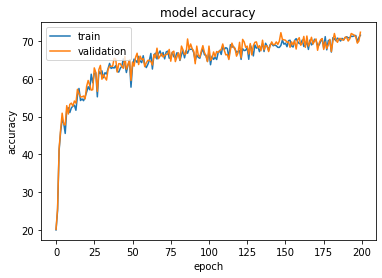

Maximum Train Accuracy : 71.55555725097656
Maximum Validation Accuracy : 72.33333587646484


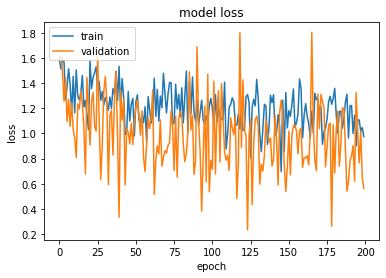

Minimum Train Loss : 0.6958315372467041
Minimum Validation Loss : 0.23194138705730438


In [ ]:
Bacteria_model_phase_Adagrad_0001 = Bact_Net()
Bacteria_model_phase_Adagrad_0001.cuda()
trainer_Adagrad_phase_0001 = trainer(Bacteria_model_phase_Adagrad_0001, phase_train_loader,"Adagrad", epoch_size=200, learning_rate=0.001)
trainer_Adagrad_phase_0001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adagrad_phase_0001.history['train_acc'])
plt.plot(trainer_Adagrad_phase_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adagrad_phase_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adagrad_phase_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adagrad_phase_0001.history['train_loss'])
plt.plot(trainer_Adagrad_phase_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adagrad_phase_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adagrad_phase_0001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 19.972223


  0%|          | 1/200 [00:09<32:39,  9.85s/it]

Val Acc | Epoch 1/200 | ACC 20.111113
Train Acc | Epoch 2/200 | ACC 19.972223


  1%|          | 2/200 [00:19<33:03, 10.02s/it]

Val Acc | Epoch 2/200 | ACC 20.111113
Train Acc | Epoch 3/200 | ACC 19.972223


  2%|▏         | 3/200 [00:30<33:02, 10.06s/it]

Val Acc | Epoch 3/200 | ACC 20.111113
Train Acc | Epoch 4/200 | ACC 19.972223


  2%|▏         | 4/200 [00:40<32:49, 10.05s/it]

Val Acc | Epoch 4/200 | ACC 20.111113
Train Acc | Epoch 5/200 | ACC 19.972223


  2%|▎         | 5/200 [00:50<32:36, 10.03s/it]

Val Acc | Epoch 5/200 | ACC 20.111113
Train Acc | Epoch 6/200 | ACC 19.972223


  3%|▎         | 6/200 [01:00<32:20, 10.00s/it]

Val Acc | Epoch 6/200 | ACC 20.111113
Train Acc | Epoch 7/200 | ACC 19.972223


  4%|▎         | 7/200 [01:10<32:09, 10.00s/it]

Val Acc | Epoch 7/200 | ACC 20.111113
Train Acc | Epoch 8/200 | ACC 19.972223


  4%|▍         | 8/200 [01:19<31:50,  9.95s/it]

Val Acc | Epoch 8/200 | ACC 20.111113
Train Acc | Epoch 9/200 | ACC 19.972223


  4%|▍         | 9/200 [01:29<31:28,  9.89s/it]

Val Acc | Epoch 9/200 | ACC 20.111113
Train Acc | Epoch 10/200 | ACC 19.972223


  5%|▌         | 10/200 [01:39<31:18,  9.88s/it]

Val Acc | Epoch 10/200 | ACC 20.111113
Train Acc | Epoch 11/200 | ACC 19.972223


  6%|▌         | 11/200 [01:49<31:09,  9.89s/it]

Val Acc | Epoch 11/200 | ACC 20.111113
Train Acc | Epoch 12/200 | ACC 19.972223


  6%|▌         | 12/200 [01:59<31:02,  9.90s/it]

Val Acc | Epoch 12/200 | ACC 20.111113
Train Acc | Epoch 13/200 | ACC 19.972223


  6%|▋         | 13/200 [02:08<30:33,  9.80s/it]

Val Acc | Epoch 13/200 | ACC 20.111113
Train Acc | Epoch 14/200 | ACC 19.972223


  7%|▋         | 14/200 [02:19<30:45,  9.92s/it]

Val Acc | Epoch 14/200 | ACC 20.111113
Train Acc | Epoch 15/200 | ACC 19.972223


  8%|▊         | 15/200 [02:29<30:57, 10.04s/it]

Val Acc | Epoch 15/200 | ACC 20.111113
Train Acc | Epoch 16/200 | ACC 19.972223


  8%|▊         | 16/200 [02:39<31:14, 10.19s/it]

Val Acc | Epoch 16/200 | ACC 20.111113
Train Acc | Epoch 17/200 | ACC 19.972223


  8%|▊         | 17/200 [02:50<30:57, 10.15s/it]

Val Acc | Epoch 17/200 | ACC 20.111113
Train Acc | Epoch 18/200 | ACC 19.972223


  9%|▉         | 18/200 [02:59<30:31, 10.07s/it]

Val Acc | Epoch 18/200 | ACC 20.111113
Train Acc | Epoch 19/200 | ACC 19.972223


 10%|▉         | 19/200 [03:10<30:27, 10.10s/it]

Val Acc | Epoch 19/200 | ACC 20.111113
Train Acc | Epoch 20/200 | ACC 19.972223


 10%|█         | 20/200 [03:20<30:25, 10.14s/it]

Val Acc | Epoch 20/200 | ACC 20.111113
Train Acc | Epoch 21/200 | ACC 19.972223


 10%|█         | 21/200 [03:30<29:55, 10.03s/it]

Val Acc | Epoch 21/200 | ACC 20.111113
Train Acc | Epoch 22/200 | ACC 19.972223


 11%|█         | 22/200 [03:40<29:41, 10.01s/it]

Val Acc | Epoch 22/200 | ACC 20.111113
Train Acc | Epoch 23/200 | ACC 19.972223


 12%|█▏        | 23/200 [03:50<29:34, 10.02s/it]

Val Acc | Epoch 23/200 | ACC 20.111113
Train Acc | Epoch 24/200 | ACC 20.166666


 12%|█▏        | 24/200 [04:00<29:27, 10.04s/it]

Val Acc | Epoch 24/200 | ACC 20.222223
Train Acc | Epoch 25/200 | ACC 20.500000


 12%|█▎        | 25/200 [04:10<29:19, 10.05s/it]

Val Acc | Epoch 25/200 | ACC 20.555555
Train Acc | Epoch 26/200 | ACC 21.777779


 13%|█▎        | 26/200 [04:20<29:06, 10.04s/it]

Val Acc | Epoch 26/200 | ACC 22.444445
Train Acc | Epoch 27/200 | ACC 20.916668


 14%|█▎        | 27/200 [04:30<29:02, 10.07s/it]

Val Acc | Epoch 27/200 | ACC 21.333334
Train Acc | Epoch 28/200 | ACC 25.305557


 14%|█▍        | 28/200 [04:40<28:42, 10.01s/it]

Val Acc | Epoch 28/200 | ACC 25.111113
Train Acc | Epoch 29/200 | ACC 25.611111


 14%|█▍        | 29/200 [04:50<28:19,  9.94s/it]

Val Acc | Epoch 29/200 | ACC 25.444445
Train Acc | Epoch 30/200 | ACC 28.527779


 15%|█▌        | 30/200 [05:00<28:17,  9.99s/it]

Val Acc | Epoch 30/200 | ACC 29.222223
Train Acc | Epoch 31/200 | ACC 29.277779


 16%|█▌        | 31/200 [05:10<28:04,  9.97s/it]

Val Acc | Epoch 31/200 | ACC 31.222225
Train Acc | Epoch 32/200 | ACC 27.388889


 16%|█▌        | 32/200 [05:19<27:49,  9.94s/it]

Val Acc | Epoch 32/200 | ACC 28.666666
Train Acc | Epoch 33/200 | ACC 29.805555


 16%|█▋        | 33/200 [05:29<27:37,  9.92s/it]

Val Acc | Epoch 33/200 | ACC 29.111111
Train Acc | Epoch 34/200 | ACC 33.500000


 17%|█▋        | 34/200 [05:39<27:28,  9.93s/it]

Val Acc | Epoch 34/200 | ACC 32.777779
Train Acc | Epoch 35/200 | ACC 32.805557


 18%|█▊        | 35/200 [05:49<27:14,  9.91s/it]

Val Acc | Epoch 35/200 | ACC 33.666668
Train Acc | Epoch 36/200 | ACC 34.250000


 18%|█▊        | 36/200 [05:59<27:11,  9.95s/it]

Val Acc | Epoch 36/200 | ACC 34.888889
Train Acc | Epoch 37/200 | ACC 35.861111


 18%|█▊        | 37/200 [06:09<26:52,  9.89s/it]

Val Acc | Epoch 37/200 | ACC 35.666668
Train Acc | Epoch 38/200 | ACC 34.555557


 19%|█▉        | 38/200 [06:19<26:35,  9.85s/it]

Val Acc | Epoch 38/200 | ACC 34.444447
Train Acc | Epoch 39/200 | ACC 36.250000


 20%|█▉        | 39/200 [06:29<26:35,  9.91s/it]

Val Acc | Epoch 39/200 | ACC 37.111111
Train Acc | Epoch 40/200 | ACC 36.166668


 20%|██        | 40/200 [06:39<26:37,  9.99s/it]

Val Acc | Epoch 40/200 | ACC 37.555557
Train Acc | Epoch 41/200 | ACC 37.833332


 20%|██        | 41/200 [06:49<26:34, 10.03s/it]

Val Acc | Epoch 41/200 | ACC 38.888889
Train Acc | Epoch 42/200 | ACC 37.055553


 21%|██        | 42/200 [06:59<26:26, 10.04s/it]

Val Acc | Epoch 42/200 | ACC 37.666668
Train Acc | Epoch 43/200 | ACC 35.111111


 22%|██▏       | 43/200 [07:09<26:17, 10.05s/it]

Val Acc | Epoch 43/200 | ACC 35.333336
Train Acc | Epoch 44/200 | ACC 37.333332


 22%|██▏       | 44/200 [07:19<26:02, 10.01s/it]

Val Acc | Epoch 44/200 | ACC 37.333332
Train Acc | Epoch 45/200 | ACC 38.694443


 22%|██▎       | 45/200 [07:29<25:36,  9.91s/it]

Val Acc | Epoch 45/200 | ACC 39.555557
Train Acc | Epoch 46/200 | ACC 39.194447


 23%|██▎       | 46/200 [07:39<25:47, 10.05s/it]

Val Acc | Epoch 46/200 | ACC 39.111115
Train Acc | Epoch 47/200 | ACC 38.138889


 24%|██▎       | 47/200 [07:50<26:00, 10.20s/it]

Val Acc | Epoch 47/200 | ACC 38.111111
Train Acc | Epoch 48/200 | ACC 39.638889


 24%|██▍       | 48/200 [08:00<25:47, 10.18s/it]

Val Acc | Epoch 48/200 | ACC 40.555557
Train Acc | Epoch 49/200 | ACC 39.500000


 24%|██▍       | 49/200 [08:10<25:27, 10.12s/it]

Val Acc | Epoch 49/200 | ACC 42.111111
Train Acc | Epoch 50/200 | ACC 39.027779


 25%|██▌       | 50/200 [08:20<25:05, 10.03s/it]

Val Acc | Epoch 50/200 | ACC 39.222221
Train Acc | Epoch 51/200 | ACC 37.916668


 26%|██▌       | 51/200 [08:30<24:52, 10.02s/it]

Val Acc | Epoch 51/200 | ACC 39.444447
Train Acc | Epoch 52/200 | ACC 39.527779


 26%|██▌       | 52/200 [08:40<24:39, 10.00s/it]

Val Acc | Epoch 52/200 | ACC 40.111115
Train Acc | Epoch 53/200 | ACC 39.916668


 26%|██▋       | 53/200 [08:49<24:17,  9.92s/it]

Val Acc | Epoch 53/200 | ACC 41.333336
Train Acc | Epoch 54/200 | ACC 39.138889


 27%|██▋       | 54/200 [08:59<24:06,  9.91s/it]

Val Acc | Epoch 54/200 | ACC 39.111115
Train Acc | Epoch 55/200 | ACC 41.500004


 28%|██▊       | 55/200 [09:09<23:58,  9.92s/it]

Val Acc | Epoch 55/200 | ACC 41.888889
Train Acc | Epoch 56/200 | ACC 40.666668


 28%|██▊       | 56/200 [09:19<24:04, 10.03s/it]

Val Acc | Epoch 56/200 | ACC 41.888889
Train Acc | Epoch 57/200 | ACC 41.611111


 28%|██▊       | 57/200 [09:29<23:53, 10.03s/it]

Val Acc | Epoch 57/200 | ACC 43.888889
Train Acc | Epoch 58/200 | ACC 41.500004


 29%|██▉       | 58/200 [09:39<23:37,  9.98s/it]

Val Acc | Epoch 58/200 | ACC 41.000000
Train Acc | Epoch 59/200 | ACC 41.444443


 30%|██▉       | 59/200 [09:49<23:28,  9.99s/it]

Val Acc | Epoch 59/200 | ACC 40.555557
Train Acc | Epoch 60/200 | ACC 40.083332


 30%|███       | 60/200 [09:59<23:16,  9.98s/it]

Val Acc | Epoch 60/200 | ACC 39.333336
Train Acc | Epoch 61/200 | ACC 40.194447


 30%|███       | 61/200 [10:09<22:58,  9.91s/it]

Val Acc | Epoch 61/200 | ACC 40.888889
Train Acc | Epoch 62/200 | ACC 40.861111


 31%|███       | 62/200 [10:19<22:53,  9.95s/it]

Val Acc | Epoch 62/200 | ACC 41.666668
Train Acc | Epoch 63/200 | ACC 41.444443


 32%|███▏      | 63/200 [10:29<22:51, 10.01s/it]

Val Acc | Epoch 63/200 | ACC 41.666668
Train Acc | Epoch 64/200 | ACC 41.888889


 32%|███▏      | 64/200 [10:39<22:35,  9.97s/it]

Val Acc | Epoch 64/200 | ACC 40.888889
Train Acc | Epoch 65/200 | ACC 42.222221


 32%|███▎      | 65/200 [10:49<22:23,  9.95s/it]

Val Acc | Epoch 65/200 | ACC 40.555557
Train Acc | Epoch 66/200 | ACC 40.972225


 33%|███▎      | 66/200 [10:59<22:12,  9.94s/it]

Val Acc | Epoch 66/200 | ACC 44.000000
Train Acc | Epoch 67/200 | ACC 42.194447


 34%|███▎      | 67/200 [11:09<22:02,  9.94s/it]

Val Acc | Epoch 67/200 | ACC 44.111111
Train Acc | Epoch 68/200 | ACC 42.388889


 34%|███▍      | 68/200 [11:19<21:51,  9.94s/it]

Val Acc | Epoch 68/200 | ACC 42.444447
Train Acc | Epoch 69/200 | ACC 43.138889


 34%|███▍      | 69/200 [11:29<21:37,  9.90s/it]

Val Acc | Epoch 69/200 | ACC 45.111111
Train Acc | Epoch 70/200 | ACC 41.583336


 35%|███▌      | 70/200 [11:39<21:25,  9.89s/it]

Val Acc | Epoch 70/200 | ACC 43.555557
Train Acc | Epoch 71/200 | ACC 42.138889


 36%|███▌      | 71/200 [11:49<21:22,  9.94s/it]

Val Acc | Epoch 71/200 | ACC 42.666668
Train Acc | Epoch 72/200 | ACC 43.027779


 36%|███▌      | 72/200 [11:58<21:07,  9.90s/it]

Val Acc | Epoch 72/200 | ACC 42.888889
Train Acc | Epoch 73/200 | ACC 42.333336


 36%|███▋      | 73/200 [12:08<20:58,  9.91s/it]

Val Acc | Epoch 73/200 | ACC 43.222225
Train Acc | Epoch 74/200 | ACC 42.916668


 37%|███▋      | 74/200 [12:18<20:45,  9.89s/it]

Val Acc | Epoch 74/200 | ACC 44.333336
Train Acc | Epoch 75/200 | ACC 43.250000


 38%|███▊      | 75/200 [12:28<20:48,  9.99s/it]

Val Acc | Epoch 75/200 | ACC 44.222225
Train Acc | Epoch 76/200 | ACC 43.055553


 38%|███▊      | 76/200 [12:38<20:37,  9.98s/it]

Val Acc | Epoch 76/200 | ACC 42.888889
Train Acc | Epoch 77/200 | ACC 43.916668


 38%|███▊      | 77/200 [12:49<20:34, 10.04s/it]

Val Acc | Epoch 77/200 | ACC 45.111111
Train Acc | Epoch 78/200 | ACC 42.416668


 39%|███▉      | 78/200 [12:59<20:35, 10.12s/it]

Val Acc | Epoch 78/200 | ACC 41.777779
Train Acc | Epoch 79/200 | ACC 44.027779


 40%|███▉      | 79/200 [13:09<20:16, 10.05s/it]

Val Acc | Epoch 79/200 | ACC 43.555557
Train Acc | Epoch 80/200 | ACC 42.833336


 40%|████      | 80/200 [13:19<20:00, 10.01s/it]

Val Acc | Epoch 80/200 | ACC 46.555557
Train Acc | Epoch 81/200 | ACC 43.972225


 40%|████      | 81/200 [13:29<19:53, 10.03s/it]

Val Acc | Epoch 81/200 | ACC 44.777779
Train Acc | Epoch 82/200 | ACC 44.166668


 41%|████      | 82/200 [13:39<19:40, 10.00s/it]

Val Acc | Epoch 82/200 | ACC 44.888889
Train Acc | Epoch 83/200 | ACC 43.666668


 42%|████▏     | 83/200 [13:49<19:35, 10.05s/it]

Val Acc | Epoch 83/200 | ACC 45.000000
Train Acc | Epoch 84/200 | ACC 44.500004


 42%|████▏     | 84/200 [13:59<19:21, 10.01s/it]

Val Acc | Epoch 84/200 | ACC 46.555557
Train Acc | Epoch 85/200 | ACC 44.583336


 42%|████▎     | 85/200 [14:09<19:07,  9.98s/it]

Val Acc | Epoch 85/200 | ACC 46.888889
Train Acc | Epoch 86/200 | ACC 44.861111


 43%|████▎     | 86/200 [14:18<18:52,  9.94s/it]

Val Acc | Epoch 86/200 | ACC 45.555557
Train Acc | Epoch 87/200 | ACC 44.555557


 44%|████▎     | 87/200 [14:28<18:45,  9.96s/it]

Val Acc | Epoch 87/200 | ACC 46.222221
Train Acc | Epoch 88/200 | ACC 44.805557


 44%|████▍     | 88/200 [14:38<18:32,  9.94s/it]

Val Acc | Epoch 88/200 | ACC 44.222225
Train Acc | Epoch 89/200 | ACC 44.777779


 44%|████▍     | 89/200 [14:48<18:27,  9.98s/it]

Val Acc | Epoch 89/200 | ACC 45.555557
Train Acc | Epoch 90/200 | ACC 44.805557


 45%|████▌     | 90/200 [14:59<18:24, 10.04s/it]

Val Acc | Epoch 90/200 | ACC 44.666668
Train Acc | Epoch 91/200 | ACC 44.666668


 46%|████▌     | 91/200 [15:09<18:09, 10.00s/it]

Val Acc | Epoch 91/200 | ACC 44.777779
Train Acc | Epoch 92/200 | ACC 45.111111


 46%|████▌     | 92/200 [15:18<17:54,  9.95s/it]

Val Acc | Epoch 92/200 | ACC 45.000000
Train Acc | Epoch 93/200 | ACC 44.833336


 46%|████▋     | 93/200 [15:28<17:48,  9.99s/it]

Val Acc | Epoch 93/200 | ACC 44.333336
Train Acc | Epoch 94/200 | ACC 45.027779


 47%|████▋     | 94/200 [15:38<17:30,  9.91s/it]

Val Acc | Epoch 94/200 | ACC 44.000000
Train Acc | Epoch 95/200 | ACC 45.333336


 48%|████▊     | 95/200 [15:48<17:14,  9.85s/it]

Val Acc | Epoch 95/200 | ACC 45.111111
Train Acc | Epoch 96/200 | ACC 45.027779


 48%|████▊     | 96/200 [15:58<17:07,  9.88s/it]

Val Acc | Epoch 96/200 | ACC 44.888889
Train Acc | Epoch 97/200 | ACC 44.694443


 48%|████▊     | 97/200 [16:08<17:02,  9.93s/it]

Val Acc | Epoch 97/200 | ACC 45.222221
Train Acc | Epoch 98/200 | ACC 45.111111


 49%|████▉     | 98/200 [16:18<16:56,  9.96s/it]

Val Acc | Epoch 98/200 | ACC 46.111115
Train Acc | Epoch 99/200 | ACC 44.888889


 50%|████▉     | 99/200 [16:28<16:50, 10.00s/it]

Val Acc | Epoch 99/200 | ACC 45.222221
Train Acc | Epoch 100/200 | ACC 45.000000


 50%|█████     | 100/200 [16:38<16:39,  9.99s/it]

Val Acc | Epoch 100/200 | ACC 45.888889
Train Acc | Epoch 101/200 | ACC 45.138889


 50%|█████     | 101/200 [16:48<16:24,  9.94s/it]

Val Acc | Epoch 101/200 | ACC 44.333336
Train Acc | Epoch 102/200 | ACC 44.750004


 51%|█████     | 102/200 [16:57<16:06,  9.86s/it]

Val Acc | Epoch 102/200 | ACC 46.000000
Train Acc | Epoch 103/200 | ACC 45.472221


 52%|█████▏    | 103/200 [17:07<15:58,  9.88s/it]

Val Acc | Epoch 103/200 | ACC 47.111111
Train Acc | Epoch 104/200 | ACC 45.694447


 52%|█████▏    | 104/200 [17:17<15:47,  9.87s/it]

Val Acc | Epoch 104/200 | ACC 45.000000
Train Acc | Epoch 105/200 | ACC 45.833336


 52%|█████▎    | 105/200 [17:27<15:48,  9.98s/it]

Val Acc | Epoch 105/200 | ACC 45.333336
Train Acc | Epoch 106/200 | ACC 45.333336


 53%|█████▎    | 106/200 [17:38<15:42, 10.03s/it]

Val Acc | Epoch 106/200 | ACC 47.111111
Train Acc | Epoch 107/200 | ACC 45.611115


 54%|█████▎    | 107/200 [17:47<15:28,  9.98s/it]

Val Acc | Epoch 107/200 | ACC 46.666668
Train Acc | Epoch 108/200 | ACC 44.861111


 54%|█████▍    | 108/200 [17:58<15:24, 10.04s/it]

Val Acc | Epoch 108/200 | ACC 45.888889
Train Acc | Epoch 109/200 | ACC 45.333336


 55%|█████▍    | 109/200 [18:08<15:23, 10.15s/it]

Val Acc | Epoch 109/200 | ACC 45.888889
Train Acc | Epoch 110/200 | ACC 45.611115


 55%|█████▌    | 110/200 [18:18<15:05, 10.06s/it]

Val Acc | Epoch 110/200 | ACC 45.000000
Train Acc | Epoch 111/200 | ACC 46.027779


 56%|█████▌    | 111/200 [18:28<14:54, 10.05s/it]

Val Acc | Epoch 111/200 | ACC 46.666668
Train Acc | Epoch 112/200 | ACC 46.611111


 56%|█████▌    | 112/200 [18:38<14:39, 10.00s/it]

Val Acc | Epoch 112/200 | ACC 47.333336
Train Acc | Epoch 113/200 | ACC 46.305557


 56%|█████▋    | 113/200 [18:48<14:28,  9.98s/it]

Val Acc | Epoch 113/200 | ACC 47.333336
Train Acc | Epoch 114/200 | ACC 46.666668


 57%|█████▋    | 114/200 [18:58<14:23, 10.05s/it]

Val Acc | Epoch 114/200 | ACC 45.888889
Train Acc | Epoch 115/200 | ACC 45.888889


 57%|█████▊    | 115/200 [19:08<14:16, 10.07s/it]

Val Acc | Epoch 115/200 | ACC 45.444447
Train Acc | Epoch 116/200 | ACC 46.222221


 58%|█████▊    | 116/200 [19:18<14:00, 10.00s/it]

Val Acc | Epoch 116/200 | ACC 45.555557
Train Acc | Epoch 117/200 | ACC 46.611111


 58%|█████▊    | 117/200 [19:28<13:55, 10.06s/it]

Val Acc | Epoch 117/200 | ACC 46.111115
Train Acc | Epoch 118/200 | ACC 46.527779


 59%|█████▉    | 118/200 [19:38<13:35,  9.95s/it]

Val Acc | Epoch 118/200 | ACC 45.666668
Train Acc | Epoch 119/200 | ACC 46.277779


 60%|█████▉    | 119/200 [19:48<13:27,  9.97s/it]

Val Acc | Epoch 119/200 | ACC 47.888889
Train Acc | Epoch 120/200 | ACC 46.083336


 60%|██████    | 120/200 [19:58<13:19, 10.00s/it]

Val Acc | Epoch 120/200 | ACC 46.444447
Train Acc | Epoch 121/200 | ACC 47.527779


 60%|██████    | 121/200 [20:08<13:08,  9.98s/it]

Val Acc | Epoch 121/200 | ACC 47.888889
Train Acc | Epoch 122/200 | ACC 46.611111


 61%|██████    | 122/200 [20:18<12:56,  9.95s/it]

Val Acc | Epoch 122/200 | ACC 45.000000
Train Acc | Epoch 123/200 | ACC 47.138889


 62%|██████▏   | 123/200 [20:28<12:42,  9.90s/it]

Val Acc | Epoch 123/200 | ACC 47.222225
Train Acc | Epoch 124/200 | ACC 47.277779


 62%|██████▏   | 124/200 [20:37<12:33,  9.91s/it]

Val Acc | Epoch 124/200 | ACC 49.000000
Train Acc | Epoch 125/200 | ACC 45.638889


 62%|██████▎   | 125/200 [20:47<12:25,  9.93s/it]

Val Acc | Epoch 125/200 | ACC 46.222221
Train Acc | Epoch 126/200 | ACC 46.444447


 63%|██████▎   | 126/200 [20:57<12:13,  9.91s/it]

Val Acc | Epoch 126/200 | ACC 48.888889
Train Acc | Epoch 127/200 | ACC 47.444447


 64%|██████▎   | 127/200 [21:07<12:01,  9.89s/it]

Val Acc | Epoch 127/200 | ACC 48.222221
Train Acc | Epoch 128/200 | ACC 46.444447


 64%|██████▍   | 128/200 [21:17<11:51,  9.89s/it]

Val Acc | Epoch 128/200 | ACC 47.444447
Train Acc | Epoch 129/200 | ACC 47.166668


 64%|██████▍   | 129/200 [21:27<11:51, 10.02s/it]

Val Acc | Epoch 129/200 | ACC 48.666668
Train Acc | Epoch 130/200 | ACC 47.888889


 65%|██████▌   | 130/200 [21:38<11:44, 10.06s/it]

Val Acc | Epoch 130/200 | ACC 46.888889
Train Acc | Epoch 131/200 | ACC 46.666668


 66%|██████▌   | 131/200 [21:47<11:31, 10.02s/it]

Val Acc | Epoch 131/200 | ACC 47.666668
Train Acc | Epoch 132/200 | ACC 48.027779


 66%|██████▌   | 132/200 [21:57<11:19, 10.00s/it]

Val Acc | Epoch 132/200 | ACC 46.444447
Train Acc | Epoch 133/200 | ACC 47.694443


 66%|██████▋   | 133/200 [22:07<11:12, 10.03s/it]

Val Acc | Epoch 133/200 | ACC 47.777779
Train Acc | Epoch 134/200 | ACC 46.472225


 67%|██████▋   | 134/200 [22:17<10:52,  9.89s/it]

Val Acc | Epoch 134/200 | ACC 48.333336
Train Acc | Epoch 135/200 | ACC 48.527779


 68%|██████▊   | 135/200 [22:27<10:41,  9.87s/it]

Val Acc | Epoch 135/200 | ACC 48.888889
Train Acc | Epoch 136/200 | ACC 47.166668


 68%|██████▊   | 136/200 [22:37<10:28,  9.82s/it]

Val Acc | Epoch 136/200 | ACC 47.000000
Train Acc | Epoch 137/200 | ACC 48.722221


 68%|██████▊   | 137/200 [22:47<10:21,  9.87s/it]

Val Acc | Epoch 137/200 | ACC 47.888889
Train Acc | Epoch 138/200 | ACC 47.111111


 69%|██████▉   | 138/200 [22:57<10:16,  9.94s/it]

Val Acc | Epoch 138/200 | ACC 49.666668
Train Acc | Epoch 139/200 | ACC 48.222221


 70%|██████▉   | 139/200 [23:07<10:09,  9.99s/it]

Val Acc | Epoch 139/200 | ACC 47.666668
Train Acc | Epoch 140/200 | ACC 46.666668


 70%|███████   | 140/200 [23:17<10:08, 10.15s/it]

Val Acc | Epoch 140/200 | ACC 48.000000
Train Acc | Epoch 141/200 | ACC 47.222225


 70%|███████   | 141/200 [23:27<09:58, 10.15s/it]

Val Acc | Epoch 141/200 | ACC 46.666668
Train Acc | Epoch 142/200 | ACC 48.583336


 71%|███████   | 142/200 [23:37<09:40, 10.00s/it]

Val Acc | Epoch 142/200 | ACC 48.000000
Train Acc | Epoch 143/200 | ACC 47.194447


 72%|███████▏  | 143/200 [23:47<09:26,  9.94s/it]

Val Acc | Epoch 143/200 | ACC 49.444447
Train Acc | Epoch 144/200 | ACC 47.944443


 72%|███████▏  | 144/200 [23:57<09:16,  9.93s/it]

Val Acc | Epoch 144/200 | ACC 48.666668
Train Acc | Epoch 145/200 | ACC 47.777779


 72%|███████▎  | 145/200 [24:07<09:10, 10.01s/it]

Val Acc | Epoch 145/200 | ACC 48.444447
Train Acc | Epoch 146/200 | ACC 47.111111


 73%|███████▎  | 146/200 [24:17<08:58,  9.97s/it]

Val Acc | Epoch 146/200 | ACC 48.555557
Train Acc | Epoch 147/200 | ACC 47.722225


 74%|███████▎  | 147/200 [24:27<08:50, 10.02s/it]

Val Acc | Epoch 147/200 | ACC 47.222225
Train Acc | Epoch 148/200 | ACC 47.277779


 74%|███████▍  | 148/200 [24:37<08:40, 10.01s/it]

Val Acc | Epoch 148/200 | ACC 47.777779
Train Acc | Epoch 149/200 | ACC 47.555557


 74%|███████▍  | 149/200 [24:47<08:30, 10.02s/it]

Val Acc | Epoch 149/200 | ACC 50.777782
Train Acc | Epoch 150/200 | ACC 48.944447


 75%|███████▌  | 150/200 [24:57<08:15,  9.92s/it]

Val Acc | Epoch 150/200 | ACC 48.222221
Train Acc | Epoch 151/200 | ACC 48.611115


 76%|███████▌  | 151/200 [25:07<08:05,  9.90s/it]

Val Acc | Epoch 151/200 | ACC 49.333336
Train Acc | Epoch 152/200 | ACC 48.833336


 76%|███████▌  | 152/200 [25:17<07:56,  9.93s/it]

Val Acc | Epoch 152/200 | ACC 49.888889
Train Acc | Epoch 153/200 | ACC 47.722225


 76%|███████▋  | 153/200 [25:27<07:50, 10.01s/it]

Val Acc | Epoch 153/200 | ACC 48.222221
Train Acc | Epoch 154/200 | ACC 48.472221


 77%|███████▋  | 154/200 [25:37<07:40, 10.02s/it]

Val Acc | Epoch 154/200 | ACC 49.333336
Train Acc | Epoch 155/200 | ACC 48.388889


 78%|███████▊  | 155/200 [25:47<07:33, 10.07s/it]

Val Acc | Epoch 155/200 | ACC 48.666668
Train Acc | Epoch 156/200 | ACC 47.527779


 78%|███████▊  | 156/200 [25:57<07:23, 10.08s/it]

Val Acc | Epoch 156/200 | ACC 47.555557
Train Acc | Epoch 157/200 | ACC 49.000000


 78%|███████▊  | 157/200 [26:07<07:12, 10.05s/it]

Val Acc | Epoch 157/200 | ACC 48.111111
Train Acc | Epoch 158/200 | ACC 48.638889


 79%|███████▉  | 158/200 [26:17<06:58,  9.96s/it]

Val Acc | Epoch 158/200 | ACC 48.333336
Train Acc | Epoch 159/200 | ACC 48.583336


 80%|███████▉  | 159/200 [26:27<06:47,  9.94s/it]

Val Acc | Epoch 159/200 | ACC 49.222221
Train Acc | Epoch 160/200 | ACC 47.805557


 80%|████████  | 160/200 [26:37<06:37,  9.94s/it]

Val Acc | Epoch 160/200 | ACC 50.888889
Train Acc | Epoch 161/200 | ACC 48.916668


 80%|████████  | 161/200 [26:47<06:29,  9.98s/it]

Val Acc | Epoch 161/200 | ACC 49.111115
Train Acc | Epoch 162/200 | ACC 47.638889


 81%|████████  | 162/200 [26:57<06:20, 10.00s/it]

Val Acc | Epoch 162/200 | ACC 46.555557
Train Acc | Epoch 163/200 | ACC 49.277779


 82%|████████▏ | 163/200 [27:07<06:09,  9.99s/it]

Val Acc | Epoch 163/200 | ACC 49.666668
Train Acc | Epoch 164/200 | ACC 48.777779


 82%|████████▏ | 164/200 [27:17<05:58,  9.95s/it]

Val Acc | Epoch 164/200 | ACC 49.555557
Train Acc | Epoch 165/200 | ACC 49.000000


 82%|████████▎ | 165/200 [27:26<05:47,  9.93s/it]

Val Acc | Epoch 165/200 | ACC 49.777779
Train Acc | Epoch 166/200 | ACC 48.583336


 83%|████████▎ | 166/200 [27:37<05:39, 10.00s/it]

Val Acc | Epoch 166/200 | ACC 48.888889
Train Acc | Epoch 167/200 | ACC 48.611115


 84%|████████▎ | 167/200 [27:46<05:28,  9.95s/it]

Val Acc | Epoch 167/200 | ACC 49.555557
Train Acc | Epoch 168/200 | ACC 48.444447


 84%|████████▍ | 168/200 [27:56<05:17,  9.92s/it]

Val Acc | Epoch 168/200 | ACC 46.888889
Train Acc | Epoch 169/200 | ACC 48.805557


 84%|████████▍ | 169/200 [28:06<05:07,  9.91s/it]

Val Acc | Epoch 169/200 | ACC 49.777779
Train Acc | Epoch 170/200 | ACC 50.027782


 85%|████████▌ | 170/200 [28:16<04:59, 10.00s/it]

Val Acc | Epoch 170/200 | ACC 50.111115
Train Acc | Epoch 171/200 | ACC 49.055557


 86%|████████▌ | 171/200 [28:27<04:53, 10.12s/it]

Val Acc | Epoch 171/200 | ACC 51.000000
Train Acc | Epoch 172/200 | ACC 47.916668


 86%|████████▌ | 172/200 [28:37<04:44, 10.15s/it]

Val Acc | Epoch 172/200 | ACC 50.666664
Train Acc | Epoch 173/200 | ACC 49.666668


 86%|████████▋ | 173/200 [28:47<04:32, 10.10s/it]

Val Acc | Epoch 173/200 | ACC 49.222221
Train Acc | Epoch 174/200 | ACC 49.583332


 87%|████████▋ | 174/200 [28:57<04:20, 10.02s/it]

Val Acc | Epoch 174/200 | ACC 50.777782
Train Acc | Epoch 175/200 | ACC 48.222221


 88%|████████▊ | 175/200 [29:07<04:08,  9.93s/it]

Val Acc | Epoch 175/200 | ACC 51.222221
Train Acc | Epoch 176/200 | ACC 49.944447


 88%|████████▊ | 176/200 [29:17<04:00, 10.02s/it]

Val Acc | Epoch 176/200 | ACC 51.333332
Train Acc | Epoch 177/200 | ACC 49.111115


 88%|████████▊ | 177/200 [29:27<03:50, 10.03s/it]

Val Acc | Epoch 177/200 | ACC 48.888889
Train Acc | Epoch 178/200 | ACC 48.888889


 89%|████████▉ | 178/200 [29:37<03:39, 10.00s/it]

Val Acc | Epoch 178/200 | ACC 47.555557
Train Acc | Epoch 179/200 | ACC 49.388893


 90%|████████▉ | 179/200 [29:47<03:30, 10.02s/it]

Val Acc | Epoch 179/200 | ACC 49.888889
Train Acc | Epoch 180/200 | ACC 49.750000


 90%|█████████ | 180/200 [29:57<03:21, 10.07s/it]

Val Acc | Epoch 180/200 | ACC 49.000000
Train Acc | Epoch 181/200 | ACC 50.055557


 90%|█████████ | 181/200 [30:07<03:10, 10.04s/it]

Val Acc | Epoch 181/200 | ACC 49.555557
Train Acc | Epoch 182/200 | ACC 48.222221


 91%|█████████ | 182/200 [30:17<03:00, 10.01s/it]

Val Acc | Epoch 182/200 | ACC 50.444447
Train Acc | Epoch 183/200 | ACC 49.555557


 92%|█████████▏| 183/200 [30:27<02:49,  9.98s/it]

Val Acc | Epoch 183/200 | ACC 50.888889
Train Acc | Epoch 184/200 | ACC 49.777779


 92%|█████████▏| 184/200 [30:37<02:38,  9.93s/it]

Val Acc | Epoch 184/200 | ACC 49.444447
Train Acc | Epoch 185/200 | ACC 49.083336


 92%|█████████▎| 185/200 [30:47<02:29,  9.98s/it]

Val Acc | Epoch 185/200 | ACC 50.111115
Train Acc | Epoch 186/200 | ACC 48.916668


 93%|█████████▎| 186/200 [30:57<02:20, 10.02s/it]

Val Acc | Epoch 186/200 | ACC 49.444447
Train Acc | Epoch 187/200 | ACC 49.500000


 94%|█████████▎| 187/200 [31:07<02:09,  9.95s/it]

Val Acc | Epoch 187/200 | ACC 49.555557
Train Acc | Epoch 188/200 | ACC 50.250000


 94%|█████████▍| 188/200 [31:17<01:59,  9.95s/it]

Val Acc | Epoch 188/200 | ACC 50.777782
Train Acc | Epoch 189/200 | ACC 49.250000


 94%|█████████▍| 189/200 [31:27<01:49,  9.98s/it]

Val Acc | Epoch 189/200 | ACC 49.444447
Train Acc | Epoch 190/200 | ACC 49.305557


 95%|█████████▌| 190/200 [31:37<01:40, 10.00s/it]

Val Acc | Epoch 190/200 | ACC 50.000000
Train Acc | Epoch 191/200 | ACC 49.555557


 96%|█████████▌| 191/200 [31:47<01:29,  9.93s/it]

Val Acc | Epoch 191/200 | ACC 49.777779
Train Acc | Epoch 192/200 | ACC 49.333336


 96%|█████████▌| 192/200 [31:57<01:20, 10.01s/it]

Val Acc | Epoch 192/200 | ACC 48.555557
Train Acc | Epoch 193/200 | ACC 49.250000


 96%|█████████▋| 193/200 [32:07<01:10, 10.02s/it]

Val Acc | Epoch 193/200 | ACC 49.111115
Train Acc | Epoch 194/200 | ACC 48.527779


 97%|█████████▋| 194/200 [32:17<00:59, 10.00s/it]

Val Acc | Epoch 194/200 | ACC 49.666668
Train Acc | Epoch 195/200 | ACC 48.777779


 98%|█████████▊| 195/200 [32:27<00:50, 10.03s/it]

Val Acc | Epoch 195/200 | ACC 49.666668
Train Acc | Epoch 196/200 | ACC 49.194447


 98%|█████████▊| 196/200 [32:37<00:40, 10.05s/it]

Val Acc | Epoch 196/200 | ACC 47.666668
Train Acc | Epoch 197/200 | ACC 50.027782


 98%|█████████▊| 197/200 [32:47<00:30, 10.06s/it]

Val Acc | Epoch 197/200 | ACC 47.444447
Train Acc | Epoch 198/200 | ACC 50.194447


 99%|█████████▉| 198/200 [32:57<00:20, 10.02s/it]

Val Acc | Epoch 198/200 | ACC 50.111115
Train Acc | Epoch 199/200 | ACC 49.500000


100%|█████████▉| 199/200 [33:07<00:09,  9.93s/it]

Val Acc | Epoch 199/200 | ACC 50.222225
Train Acc | Epoch 200/200 | ACC 49.611111


100%|██████████| 200/200 [33:17<00:00,  9.99s/it]

Val Acc | Epoch 200/200 | ACC 49.222221


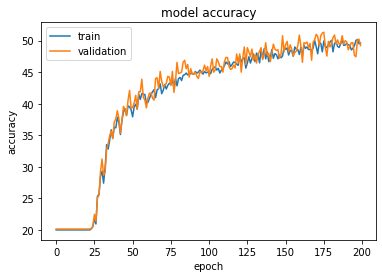

Maximum Train Accuracy : 50.25
Maximum Validation Accuracy : 51.33333206176758


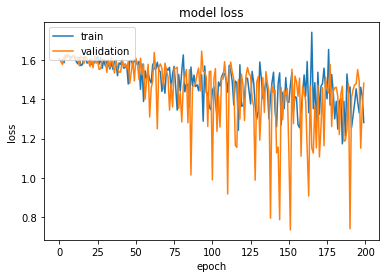

Minimum Train Loss : 1.1734026670455933
Minimum Validation Loss : 0.7340235114097595


In [ ]:
Bacteria_model_phase_Adagrad_00001 = Bact_Net()
Bacteria_model_phase_Adagrad_00001.cuda()
trainer_Adagrad_phase_00001 = trainer(Bacteria_model_phase_Adagrad_00001, phase_train_loader,"Adagrad", epoch_size=200, learning_rate=0.0001)
trainer_Adagrad_phase_00001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adagrad_phase_00001.history['train_acc'])
plt.plot(trainer_Adagrad_phase_00001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adagrad_phase_00001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adagrad_phase_00001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adagrad_phase_00001.history['train_loss'])
plt.plot(trainer_Adagrad_phase_00001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adagrad_phase_00001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adagrad_phase_00001.history['val_loss'])}")

# Phase_RMSprop

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 19.527779


  0%|          | 1/200 [00:10<34:08, 10.29s/it]

Val Acc | Epoch 1/200 | ACC 20.000000
Train Acc | Epoch 2/200 | ACC 20.361113


  1%|          | 2/200 [00:21<34:57, 10.59s/it]

Val Acc | Epoch 2/200 | ACC 18.555555
Train Acc | Epoch 3/200 | ACC 19.750000


  2%|▏         | 3/200 [00:30<33:37, 10.24s/it]

Val Acc | Epoch 3/200 | ACC 21.000000
Train Acc | Epoch 4/200 | ACC 20.250000


  2%|▏         | 4/200 [00:41<33:21, 10.21s/it]

Val Acc | Epoch 4/200 | ACC 19.222221
Train Acc | Epoch 5/200 | ACC 19.972223


  2%|▎         | 5/200 [00:51<33:13, 10.23s/it]

Val Acc | Epoch 5/200 | ACC 20.111113
Train Acc | Epoch 6/200 | ACC 20.166666


  3%|▎         | 6/200 [01:01<32:51, 10.16s/it]

Val Acc | Epoch 6/200 | ACC 19.333334
Train Acc | Epoch 7/200 | ACC 20.361113


  4%|▎         | 7/200 [01:11<32:09, 10.00s/it]

Val Acc | Epoch 7/200 | ACC 18.555555
Train Acc | Epoch 8/200 | ACC 20.361113


  4%|▍         | 8/200 [01:21<31:58,  9.99s/it]

Val Acc | Epoch 8/200 | ACC 18.555555
Train Acc | Epoch 9/200 | ACC 20.361113


  4%|▍         | 9/200 [01:31<32:04, 10.08s/it]

Val Acc | Epoch 9/200 | ACC 18.555555
Train Acc | Epoch 10/200 | ACC 20.361113


  5%|▌         | 10/200 [01:41<31:48, 10.04s/it]

Val Acc | Epoch 10/200 | ACC 18.555555
Train Acc | Epoch 11/200 | ACC 20.361113


  6%|▌         | 11/200 [01:51<31:32, 10.01s/it]

Val Acc | Epoch 11/200 | ACC 18.555555
Train Acc | Epoch 12/200 | ACC 20.361113


  6%|▌         | 12/200 [02:01<31:20, 10.01s/it]

Val Acc | Epoch 12/200 | ACC 18.555555
Train Acc | Epoch 13/200 | ACC 19.972223


  6%|▋         | 13/200 [02:11<31:06,  9.98s/it]

Val Acc | Epoch 13/200 | ACC 20.111113
Train Acc | Epoch 14/200 | ACC 19.750000


  7%|▋         | 14/200 [02:21<30:53,  9.97s/it]

Val Acc | Epoch 14/200 | ACC 21.000000
Train Acc | Epoch 15/200 | ACC 19.750000


  8%|▊         | 15/200 [02:30<30:37,  9.93s/it]

Val Acc | Epoch 15/200 | ACC 21.000000
Train Acc | Epoch 16/200 | ACC 20.166666


  8%|▊         | 16/200 [02:40<30:21,  9.90s/it]

Val Acc | Epoch 16/200 | ACC 19.333334
Train Acc | Epoch 17/200 | ACC 19.750000


  8%|▊         | 17/200 [02:50<30:18,  9.94s/it]

Val Acc | Epoch 17/200 | ACC 21.000000
Train Acc | Epoch 18/200 | ACC 20.361113


  9%|▉         | 18/200 [03:00<30:07,  9.93s/it]

Val Acc | Epoch 18/200 | ACC 18.555555
Train Acc | Epoch 19/200 | ACC 20.166666


 10%|▉         | 19/200 [03:10<29:43,  9.85s/it]

Val Acc | Epoch 19/200 | ACC 19.333334
Train Acc | Epoch 20/200 | ACC 20.361113


 10%|█         | 20/200 [03:20<29:35,  9.87s/it]

Val Acc | Epoch 20/200 | ACC 18.555555
Train Acc | Epoch 21/200 | ACC 19.750000


 10%|█         | 21/200 [03:30<29:25,  9.86s/it]

Val Acc | Epoch 21/200 | ACC 21.000000
Train Acc | Epoch 22/200 | ACC 19.972223


 11%|█         | 22/200 [03:39<29:15,  9.86s/it]

Val Acc | Epoch 22/200 | ACC 20.111113
Train Acc | Epoch 23/200 | ACC 20.361113


 12%|█▏        | 23/200 [03:49<28:56,  9.81s/it]

Val Acc | Epoch 23/200 | ACC 18.555555
Train Acc | Epoch 24/200 | ACC 20.361113


 12%|█▏        | 24/200 [03:59<28:45,  9.81s/it]

Val Acc | Epoch 24/200 | ACC 18.555555
Train Acc | Epoch 25/200 | ACC 19.750000


 12%|█▎        | 25/200 [04:09<28:40,  9.83s/it]

Val Acc | Epoch 25/200 | ACC 21.000000
Train Acc | Epoch 26/200 | ACC 19.750000


 13%|█▎        | 26/200 [04:19<28:25,  9.80s/it]

Val Acc | Epoch 26/200 | ACC 21.000000
Train Acc | Epoch 27/200 | ACC 19.750000


 14%|█▎        | 27/200 [04:28<28:14,  9.80s/it]

Val Acc | Epoch 27/200 | ACC 21.000000
Train Acc | Epoch 28/200 | ACC 20.361113


 14%|█▍        | 28/200 [04:38<28:15,  9.85s/it]

Val Acc | Epoch 28/200 | ACC 18.555555
Train Acc | Epoch 29/200 | ACC 19.972223


 14%|█▍        | 29/200 [04:48<28:09,  9.88s/it]

Val Acc | Epoch 29/200 | ACC 20.111113
Train Acc | Epoch 30/200 | ACC 19.972223


 15%|█▌        | 30/200 [04:58<28:06,  9.92s/it]

Val Acc | Epoch 30/200 | ACC 20.111113
Train Acc | Epoch 31/200 | ACC 20.166666


 16%|█▌        | 31/200 [05:08<27:47,  9.87s/it]

Val Acc | Epoch 31/200 | ACC 19.333334
Train Acc | Epoch 32/200 | ACC 19.972223


 16%|█▌        | 32/200 [05:18<27:48,  9.93s/it]

Val Acc | Epoch 32/200 | ACC 20.111113
Train Acc | Epoch 33/200 | ACC 19.972223


 16%|█▋        | 33/200 [05:29<28:13, 10.14s/it]

Val Acc | Epoch 33/200 | ACC 20.111113
Train Acc | Epoch 34/200 | ACC 19.972223


 17%|█▋        | 34/200 [05:39<27:58, 10.11s/it]

Val Acc | Epoch 34/200 | ACC 20.111113
Train Acc | Epoch 35/200 | ACC 20.361113


 18%|█▊        | 35/200 [05:49<27:38, 10.05s/it]

Val Acc | Epoch 35/200 | ACC 18.555555
Train Acc | Epoch 36/200 | ACC 19.750000


 18%|█▊        | 36/200 [05:59<27:21, 10.01s/it]

Val Acc | Epoch 36/200 | ACC 21.000000
Train Acc | Epoch 37/200 | ACC 20.361113


 18%|█▊        | 37/200 [06:09<27:14, 10.03s/it]

Val Acc | Epoch 37/200 | ACC 18.555555
Train Acc | Epoch 38/200 | ACC 19.972223


 19%|█▉        | 38/200 [06:19<27:03, 10.02s/it]

Val Acc | Epoch 38/200 | ACC 20.111113
Train Acc | Epoch 39/200 | ACC 19.972223


 20%|█▉        | 39/200 [06:29<26:46,  9.98s/it]

Val Acc | Epoch 39/200 | ACC 20.111113
Train Acc | Epoch 40/200 | ACC 19.750000


 20%|██        | 40/200 [06:38<26:28,  9.93s/it]

Val Acc | Epoch 40/200 | ACC 21.000000
Train Acc | Epoch 41/200 | ACC 20.361113


 20%|██        | 41/200 [06:48<26:25,  9.97s/it]

Val Acc | Epoch 41/200 | ACC 18.555555
Train Acc | Epoch 42/200 | ACC 19.972223


 21%|██        | 42/200 [06:59<26:31, 10.07s/it]

Val Acc | Epoch 42/200 | ACC 20.111113
Train Acc | Epoch 43/200 | ACC 19.750000


 22%|██▏       | 43/200 [07:09<26:17, 10.05s/it]

Val Acc | Epoch 43/200 | ACC 21.000000
Train Acc | Epoch 44/200 | ACC 19.972223


 22%|██▏       | 44/200 [07:19<26:13, 10.09s/it]

Val Acc | Epoch 44/200 | ACC 20.111113
Train Acc | Epoch 45/200 | ACC 20.166666


 22%|██▎       | 45/200 [07:29<26:06, 10.10s/it]

Val Acc | Epoch 45/200 | ACC 19.333334
Train Acc | Epoch 46/200 | ACC 20.361113


 23%|██▎       | 46/200 [07:39<25:50, 10.07s/it]

Val Acc | Epoch 46/200 | ACC 18.555555
Train Acc | Epoch 47/200 | ACC 20.361113


 24%|██▎       | 47/200 [07:49<25:33, 10.02s/it]

Val Acc | Epoch 47/200 | ACC 18.555555
Train Acc | Epoch 48/200 | ACC 20.361113


 24%|██▍       | 48/200 [07:59<25:15,  9.97s/it]

Val Acc | Epoch 48/200 | ACC 18.555555
Train Acc | Epoch 49/200 | ACC 19.750000


 24%|██▍       | 49/200 [08:09<25:11, 10.01s/it]

Val Acc | Epoch 49/200 | ACC 21.000000
Train Acc | Epoch 50/200 | ACC 20.361113


 25%|██▌       | 50/200 [08:19<24:52,  9.95s/it]

Val Acc | Epoch 50/200 | ACC 18.555555
Train Acc | Epoch 51/200 | ACC 20.166666


 26%|██▌       | 51/200 [08:29<24:45,  9.97s/it]

Val Acc | Epoch 51/200 | ACC 19.333334
Train Acc | Epoch 52/200 | ACC 20.361113


 26%|██▌       | 52/200 [08:39<24:41, 10.01s/it]

Val Acc | Epoch 52/200 | ACC 18.555555
Train Acc | Epoch 53/200 | ACC 19.972223


 26%|██▋       | 53/200 [08:49<24:33, 10.03s/it]

Val Acc | Epoch 53/200 | ACC 20.111113
Train Acc | Epoch 54/200 | ACC 19.750000


 27%|██▋       | 54/200 [08:59<24:24, 10.03s/it]

Val Acc | Epoch 54/200 | ACC 21.000000
Train Acc | Epoch 55/200 | ACC 19.750000


 28%|██▊       | 55/200 [09:09<24:09, 10.00s/it]

Val Acc | Epoch 55/200 | ACC 21.000000
Train Acc | Epoch 56/200 | ACC 19.972223


 28%|██▊       | 56/200 [09:19<23:55,  9.97s/it]

Val Acc | Epoch 56/200 | ACC 20.111113
Train Acc | Epoch 57/200 | ACC 20.361113


 28%|██▊       | 57/200 [09:29<23:45,  9.97s/it]

Val Acc | Epoch 57/200 | ACC 18.555555
Train Acc | Epoch 58/200 | ACC 20.166666


 29%|██▉       | 58/200 [09:39<23:35,  9.97s/it]

Val Acc | Epoch 58/200 | ACC 19.333334
Train Acc | Epoch 59/200 | ACC 19.972223


 30%|██▉       | 59/200 [09:49<23:28,  9.99s/it]

Val Acc | Epoch 59/200 | ACC 20.111113
Train Acc | Epoch 60/200 | ACC 19.750000


 30%|███       | 60/200 [09:59<23:24, 10.03s/it]

Val Acc | Epoch 60/200 | ACC 21.000000
Train Acc | Epoch 61/200 | ACC 20.361113


 30%|███       | 61/200 [10:09<23:13, 10.02s/it]

Val Acc | Epoch 61/200 | ACC 18.555555
Train Acc | Epoch 62/200 | ACC 20.361113


 31%|███       | 62/200 [10:19<22:57,  9.98s/it]

Val Acc | Epoch 62/200 | ACC 18.555555
Train Acc | Epoch 63/200 | ACC 19.972223


 32%|███▏      | 63/200 [10:29<22:43,  9.95s/it]

Val Acc | Epoch 63/200 | ACC 20.111113
Train Acc | Epoch 64/200 | ACC 20.361113


 32%|███▏      | 64/200 [10:39<23:00, 10.15s/it]

Val Acc | Epoch 64/200 | ACC 18.555555
Train Acc | Epoch 65/200 | ACC 19.750000


 32%|███▎      | 65/200 [10:49<22:51, 10.16s/it]

Val Acc | Epoch 65/200 | ACC 21.000000
Train Acc | Epoch 66/200 | ACC 20.166666


 33%|███▎      | 66/200 [10:59<22:27, 10.06s/it]

Val Acc | Epoch 66/200 | ACC 19.333334
Train Acc | Epoch 67/200 | ACC 20.361113


 34%|███▎      | 67/200 [11:09<22:16, 10.05s/it]

Val Acc | Epoch 67/200 | ACC 18.555555
Train Acc | Epoch 68/200 | ACC 19.750000


 34%|███▍      | 68/200 [11:19<22:08, 10.06s/it]

Val Acc | Epoch 68/200 | ACC 21.000000
Train Acc | Epoch 69/200 | ACC 20.361113


 34%|███▍      | 69/200 [11:29<21:56, 10.05s/it]

Val Acc | Epoch 69/200 | ACC 18.555555
Train Acc | Epoch 70/200 | ACC 19.750000


 35%|███▌      | 70/200 [11:39<21:35,  9.97s/it]

Val Acc | Epoch 70/200 | ACC 21.000000
Train Acc | Epoch 71/200 | ACC 19.750000


 36%|███▌      | 71/200 [11:49<21:21,  9.93s/it]

Val Acc | Epoch 71/200 | ACC 21.000000
Train Acc | Epoch 72/200 | ACC 19.972223


 36%|███▌      | 72/200 [11:59<21:00,  9.85s/it]

Val Acc | Epoch 72/200 | ACC 20.111113
Train Acc | Epoch 73/200 | ACC 20.166666


 36%|███▋      | 73/200 [12:09<20:52,  9.87s/it]

Val Acc | Epoch 73/200 | ACC 19.333334
Train Acc | Epoch 74/200 | ACC 20.166666


 37%|███▋      | 74/200 [12:19<20:49,  9.92s/it]

Val Acc | Epoch 74/200 | ACC 19.333334
Train Acc | Epoch 75/200 | ACC 20.166666


 38%|███▊      | 75/200 [12:29<20:42,  9.94s/it]

Val Acc | Epoch 75/200 | ACC 19.333334
Train Acc | Epoch 76/200 | ACC 20.166666


 38%|███▊      | 76/200 [12:39<20:33,  9.95s/it]

Val Acc | Epoch 76/200 | ACC 19.333334
Train Acc | Epoch 77/200 | ACC 19.750000


 38%|███▊      | 77/200 [12:49<20:27,  9.98s/it]

Val Acc | Epoch 77/200 | ACC 21.000000
Train Acc | Epoch 78/200 | ACC 19.750000


 39%|███▉      | 78/200 [12:58<20:11,  9.93s/it]

Val Acc | Epoch 78/200 | ACC 21.000000
Train Acc | Epoch 79/200 | ACC 20.166666


 40%|███▉      | 79/200 [13:08<20:02,  9.94s/it]

Val Acc | Epoch 79/200 | ACC 19.333334
Train Acc | Epoch 80/200 | ACC 20.361113


 40%|████      | 80/200 [13:18<19:44,  9.87s/it]

Val Acc | Epoch 80/200 | ACC 18.555555
Train Acc | Epoch 81/200 | ACC 20.166666


 40%|████      | 81/200 [13:28<19:43,  9.95s/it]

Val Acc | Epoch 81/200 | ACC 19.333334
Train Acc | Epoch 82/200 | ACC 20.361113


 41%|████      | 82/200 [13:38<19:37,  9.98s/it]

Val Acc | Epoch 82/200 | ACC 18.555555
Train Acc | Epoch 83/200 | ACC 19.750000


 42%|████▏     | 83/200 [13:48<19:26,  9.97s/it]

Val Acc | Epoch 83/200 | ACC 21.000000
Train Acc | Epoch 84/200 | ACC 20.361113


 42%|████▏     | 84/200 [13:58<19:20, 10.01s/it]

Val Acc | Epoch 84/200 | ACC 18.555555
Train Acc | Epoch 85/200 | ACC 19.972223


 42%|████▎     | 85/200 [14:09<19:20, 10.09s/it]

Val Acc | Epoch 85/200 | ACC 20.111113
Train Acc | Epoch 86/200 | ACC 20.361113


 43%|████▎     | 86/200 [14:19<19:10, 10.09s/it]

Val Acc | Epoch 86/200 | ACC 18.555555
Train Acc | Epoch 87/200 | ACC 19.750000


 44%|████▎     | 87/200 [14:29<18:52, 10.02s/it]

Val Acc | Epoch 87/200 | ACC 21.000000
Train Acc | Epoch 88/200 | ACC 19.750000


 44%|████▍     | 88/200 [14:38<18:32,  9.94s/it]

Val Acc | Epoch 88/200 | ACC 21.000000
Train Acc | Epoch 89/200 | ACC 20.361113


 44%|████▍     | 89/200 [14:48<18:26,  9.97s/it]

Val Acc | Epoch 89/200 | ACC 18.555555
Train Acc | Epoch 90/200 | ACC 19.972223


 45%|████▌     | 90/200 [14:58<18:18,  9.98s/it]

Val Acc | Epoch 90/200 | ACC 20.111113
Train Acc | Epoch 91/200 | ACC 20.166666


 46%|████▌     | 91/200 [15:09<18:14, 10.04s/it]

Val Acc | Epoch 91/200 | ACC 19.333334
Train Acc | Epoch 92/200 | ACC 19.972223


 46%|████▌     | 92/200 [15:19<18:06, 10.06s/it]

Val Acc | Epoch 92/200 | ACC 20.111113
Train Acc | Epoch 93/200 | ACC 19.972223


 46%|████▋     | 93/200 [15:29<17:57, 10.07s/it]

Val Acc | Epoch 93/200 | ACC 20.111113
Train Acc | Epoch 94/200 | ACC 20.166666


 47%|████▋     | 94/200 [15:39<17:42, 10.02s/it]

Val Acc | Epoch 94/200 | ACC 19.333334
Train Acc | Epoch 95/200 | ACC 20.361113


 48%|████▊     | 95/200 [15:49<17:55, 10.24s/it]

Val Acc | Epoch 95/200 | ACC 18.555555
Train Acc | Epoch 96/200 | ACC 20.166666


 48%|████▊     | 96/200 [15:59<17:36, 10.16s/it]

Val Acc | Epoch 96/200 | ACC 19.333334
Train Acc | Epoch 97/200 | ACC 20.361113


 48%|████▊     | 97/200 [16:09<17:23, 10.13s/it]

Val Acc | Epoch 97/200 | ACC 18.555555
Train Acc | Epoch 98/200 | ACC 20.361113


 49%|████▉     | 98/200 [16:20<17:11, 10.12s/it]

Val Acc | Epoch 98/200 | ACC 18.555555
Train Acc | Epoch 99/200 | ACC 20.166666


 50%|████▉     | 99/200 [16:30<16:58, 10.08s/it]

Val Acc | Epoch 99/200 | ACC 19.333334
Train Acc | Epoch 100/200 | ACC 20.361113


 50%|█████     | 100/200 [16:40<16:50, 10.10s/it]

Val Acc | Epoch 100/200 | ACC 18.555555
Train Acc | Epoch 101/200 | ACC 20.361113


 50%|█████     | 101/200 [16:50<16:33, 10.04s/it]

Val Acc | Epoch 101/200 | ACC 18.555555
Train Acc | Epoch 102/200 | ACC 19.750000


 51%|█████     | 102/200 [17:00<16:26, 10.06s/it]

Val Acc | Epoch 102/200 | ACC 21.000000
Train Acc | Epoch 103/200 | ACC 19.750000


 52%|█████▏    | 103/200 [17:10<16:08,  9.99s/it]

Val Acc | Epoch 103/200 | ACC 21.000000
Train Acc | Epoch 104/200 | ACC 20.166666


 52%|█████▏    | 104/200 [17:19<15:48,  9.88s/it]

Val Acc | Epoch 104/200 | ACC 19.333334
Train Acc | Epoch 105/200 | ACC 20.361113


 52%|█████▎    | 105/200 [17:29<15:44,  9.95s/it]

Val Acc | Epoch 105/200 | ACC 18.555555
Train Acc | Epoch 106/200 | ACC 20.166666


 53%|█████▎    | 106/200 [17:39<15:29,  9.89s/it]

Val Acc | Epoch 106/200 | ACC 19.333334
Train Acc | Epoch 107/200 | ACC 19.972223


 54%|█████▎    | 107/200 [17:49<15:24,  9.94s/it]

Val Acc | Epoch 107/200 | ACC 20.111113
Train Acc | Epoch 108/200 | ACC 20.361113


 54%|█████▍    | 108/200 [17:59<15:13,  9.93s/it]

Val Acc | Epoch 108/200 | ACC 18.555555
Train Acc | Epoch 109/200 | ACC 20.361113


 55%|█████▍    | 109/200 [18:09<15:06,  9.96s/it]

Val Acc | Epoch 109/200 | ACC 18.555555
Train Acc | Epoch 110/200 | ACC 20.361113


 55%|█████▌    | 110/200 [18:19<14:57,  9.97s/it]

Val Acc | Epoch 110/200 | ACC 18.555555
Train Acc | Epoch 111/200 | ACC 20.361113


 56%|█████▌    | 111/200 [18:29<14:47,  9.97s/it]

Val Acc | Epoch 111/200 | ACC 18.555555
Train Acc | Epoch 112/200 | ACC 20.166666


 56%|█████▌    | 112/200 [18:38<14:24,  9.83s/it]

Val Acc | Epoch 112/200 | ACC 19.333334
Train Acc | Epoch 113/200 | ACC 20.361113


 56%|█████▋    | 113/200 [18:48<14:16,  9.84s/it]

Val Acc | Epoch 113/200 | ACC 18.555555
Train Acc | Epoch 114/200 | ACC 20.361113


 57%|█████▋    | 114/200 [18:58<14:05,  9.83s/it]

Val Acc | Epoch 114/200 | ACC 18.555555
Train Acc | Epoch 115/200 | ACC 20.166666


 57%|█████▊    | 115/200 [19:08<14:00,  9.89s/it]

Val Acc | Epoch 115/200 | ACC 19.333334
Train Acc | Epoch 116/200 | ACC 19.972223


 58%|█████▊    | 116/200 [19:18<13:54,  9.93s/it]

Val Acc | Epoch 116/200 | ACC 20.111113
Train Acc | Epoch 117/200 | ACC 19.972223


 58%|█████▊    | 117/200 [19:28<13:46,  9.95s/it]

Val Acc | Epoch 117/200 | ACC 20.111113
Train Acc | Epoch 118/200 | ACC 20.361113


 59%|█████▉    | 118/200 [19:38<13:39,  9.99s/it]

Val Acc | Epoch 118/200 | ACC 18.555555
Train Acc | Epoch 119/200 | ACC 20.361113


 60%|█████▉    | 119/200 [19:48<13:34, 10.05s/it]

Val Acc | Epoch 119/200 | ACC 18.555555
Train Acc | Epoch 120/200 | ACC 19.972223


 60%|██████    | 120/200 [19:58<13:17,  9.97s/it]

Val Acc | Epoch 120/200 | ACC 20.111113
Train Acc | Epoch 121/200 | ACC 20.361113


 60%|██████    | 121/200 [20:08<13:01,  9.89s/it]

Val Acc | Epoch 121/200 | ACC 18.555555
Train Acc | Epoch 122/200 | ACC 19.972223


 61%|██████    | 122/200 [20:18<12:51,  9.90s/it]

Val Acc | Epoch 122/200 | ACC 20.111113
Train Acc | Epoch 123/200 | ACC 19.972223


 62%|██████▏   | 123/200 [20:28<12:43,  9.92s/it]

Val Acc | Epoch 123/200 | ACC 20.111113
Train Acc | Epoch 124/200 | ACC 19.972223


 62%|██████▏   | 124/200 [20:38<12:39,  9.99s/it]

Val Acc | Epoch 124/200 | ACC 20.111113
Train Acc | Epoch 125/200 | ACC 19.972223


 62%|██████▎   | 125/200 [20:48<12:31, 10.02s/it]

Val Acc | Epoch 125/200 | ACC 20.111113
Train Acc | Epoch 126/200 | ACC 19.750000


 63%|██████▎   | 126/200 [20:59<12:30, 10.15s/it]

Val Acc | Epoch 126/200 | ACC 21.000000
Train Acc | Epoch 127/200 | ACC 20.361113


 64%|██████▎   | 127/200 [21:09<12:21, 10.15s/it]

Val Acc | Epoch 127/200 | ACC 18.555555
Train Acc | Epoch 128/200 | ACC 20.361113


 64%|██████▍   | 128/200 [21:18<12:01, 10.02s/it]

Val Acc | Epoch 128/200 | ACC 18.555555
Train Acc | Epoch 129/200 | ACC 20.361113


 64%|██████▍   | 129/200 [21:28<11:48,  9.98s/it]

Val Acc | Epoch 129/200 | ACC 18.555555
Train Acc | Epoch 130/200 | ACC 20.166666


 65%|██████▌   | 130/200 [21:38<11:35,  9.94s/it]

Val Acc | Epoch 130/200 | ACC 19.333334
Train Acc | Epoch 131/200 | ACC 20.166666


 66%|██████▌   | 131/200 [21:48<11:27,  9.96s/it]

Val Acc | Epoch 131/200 | ACC 19.333334
Train Acc | Epoch 132/200 | ACC 20.361113


 66%|██████▌   | 132/200 [21:58<11:17,  9.96s/it]

Val Acc | Epoch 132/200 | ACC 18.555555
Train Acc | Epoch 133/200 | ACC 20.361113


 66%|██████▋   | 133/200 [22:08<11:06,  9.94s/it]

Val Acc | Epoch 133/200 | ACC 18.555555
Train Acc | Epoch 134/200 | ACC 20.361113


 67%|██████▋   | 134/200 [22:18<10:57,  9.96s/it]

Val Acc | Epoch 134/200 | ACC 18.555555
Train Acc | Epoch 135/200 | ACC 19.750000


 68%|██████▊   | 135/200 [22:28<10:47,  9.97s/it]

Val Acc | Epoch 135/200 | ACC 21.000000
Train Acc | Epoch 136/200 | ACC 19.972223


 68%|██████▊   | 136/200 [22:38<10:31,  9.87s/it]

Val Acc | Epoch 136/200 | ACC 20.111113
Train Acc | Epoch 137/200 | ACC 19.972223


 68%|██████▊   | 137/200 [22:48<10:23,  9.90s/it]

Val Acc | Epoch 137/200 | ACC 20.111113
Train Acc | Epoch 138/200 | ACC 20.166666


 69%|██████▉   | 138/200 [22:58<10:13,  9.90s/it]

Val Acc | Epoch 138/200 | ACC 19.333334
Train Acc | Epoch 139/200 | ACC 19.750000


 70%|██████▉   | 139/200 [23:07<10:03,  9.89s/it]

Val Acc | Epoch 139/200 | ACC 21.000000
Train Acc | Epoch 140/200 | ACC 19.750000


 70%|███████   | 140/200 [23:18<09:57,  9.97s/it]

Val Acc | Epoch 140/200 | ACC 21.000000
Train Acc | Epoch 141/200 | ACC 19.750000


 70%|███████   | 141/200 [23:28<09:48,  9.97s/it]

Val Acc | Epoch 141/200 | ACC 21.000000
Train Acc | Epoch 142/200 | ACC 20.166666


 71%|███████   | 142/200 [23:38<09:39,  9.99s/it]

Val Acc | Epoch 142/200 | ACC 19.333334
Train Acc | Epoch 143/200 | ACC 19.750000


 72%|███████▏  | 143/200 [23:48<09:29,  9.98s/it]

Val Acc | Epoch 143/200 | ACC 21.000000
Train Acc | Epoch 144/200 | ACC 20.361113


 72%|███████▏  | 144/200 [23:57<09:14,  9.89s/it]

Val Acc | Epoch 144/200 | ACC 18.555555
Train Acc | Epoch 145/200 | ACC 19.750000


 72%|███████▎  | 145/200 [24:07<09:04,  9.90s/it]

Val Acc | Epoch 145/200 | ACC 21.000000
Train Acc | Epoch 146/200 | ACC 19.972223


 73%|███████▎  | 146/200 [24:17<08:54,  9.91s/it]

Val Acc | Epoch 146/200 | ACC 20.111113
Train Acc | Epoch 147/200 | ACC 19.750000


 74%|███████▎  | 147/200 [24:27<08:48,  9.98s/it]

Val Acc | Epoch 147/200 | ACC 21.000000
Train Acc | Epoch 148/200 | ACC 19.750000


 74%|███████▍  | 148/200 [24:37<08:41, 10.03s/it]

Val Acc | Epoch 148/200 | ACC 21.000000
Train Acc | Epoch 149/200 | ACC 20.166666


 74%|███████▍  | 149/200 [24:47<08:30, 10.00s/it]

Val Acc | Epoch 149/200 | ACC 19.333334
Train Acc | Epoch 150/200 | ACC 19.972223


 75%|███████▌  | 150/200 [24:57<08:18,  9.97s/it]

Val Acc | Epoch 150/200 | ACC 20.111113
Train Acc | Epoch 151/200 | ACC 19.750000


 76%|███████▌  | 151/200 [25:07<08:09,  9.99s/it]

Val Acc | Epoch 151/200 | ACC 21.000000
Train Acc | Epoch 152/200 | ACC 19.750000


 76%|███████▌  | 152/200 [25:17<07:58,  9.97s/it]

Val Acc | Epoch 152/200 | ACC 21.000000
Train Acc | Epoch 153/200 | ACC 20.166666


 76%|███████▋  | 153/200 [25:27<07:49,  9.99s/it]

Val Acc | Epoch 153/200 | ACC 19.333334
Train Acc | Epoch 154/200 | ACC 20.361113


 77%|███████▋  | 154/200 [25:37<07:38,  9.96s/it]

Val Acc | Epoch 154/200 | ACC 18.555555
Train Acc | Epoch 155/200 | ACC 19.750000


 78%|███████▊  | 155/200 [25:47<07:31, 10.02s/it]

Val Acc | Epoch 155/200 | ACC 21.000000
Train Acc | Epoch 156/200 | ACC 19.750000


 78%|███████▊  | 156/200 [25:57<07:20, 10.02s/it]

Val Acc | Epoch 156/200 | ACC 21.000000
Train Acc | Epoch 157/200 | ACC 20.361113


 78%|███████▊  | 157/200 [26:08<07:17, 10.17s/it]

Val Acc | Epoch 157/200 | ACC 18.555555
Train Acc | Epoch 158/200 | ACC 19.750000


 79%|███████▉  | 158/200 [26:18<07:10, 10.24s/it]

Val Acc | Epoch 158/200 | ACC 21.000000
Train Acc | Epoch 159/200 | ACC 20.361113


 80%|███████▉  | 159/200 [26:28<06:55, 10.13s/it]

Val Acc | Epoch 159/200 | ACC 18.555555
Train Acc | Epoch 160/200 | ACC 19.750000


 80%|████████  | 160/200 [26:38<06:41, 10.04s/it]

Val Acc | Epoch 160/200 | ACC 21.000000
Train Acc | Epoch 161/200 | ACC 20.166666


 80%|████████  | 161/200 [26:48<06:29,  9.98s/it]

Val Acc | Epoch 161/200 | ACC 19.333334
Train Acc | Epoch 162/200 | ACC 20.166666


 81%|████████  | 162/200 [26:58<06:20, 10.01s/it]

Val Acc | Epoch 162/200 | ACC 19.333334
Train Acc | Epoch 163/200 | ACC 20.166666


 82%|████████▏ | 163/200 [27:08<06:10, 10.00s/it]

Val Acc | Epoch 163/200 | ACC 19.333334
Train Acc | Epoch 164/200 | ACC 20.166666


 82%|████████▏ | 164/200 [27:18<06:01, 10.05s/it]

Val Acc | Epoch 164/200 | ACC 19.333334
Train Acc | Epoch 165/200 | ACC 19.750000


 82%|████████▎ | 165/200 [27:28<05:51, 10.05s/it]

Val Acc | Epoch 165/200 | ACC 21.000000
Train Acc | Epoch 166/200 | ACC 19.750000


 83%|████████▎ | 166/200 [27:38<05:41, 10.05s/it]

Val Acc | Epoch 166/200 | ACC 21.000000
Train Acc | Epoch 167/200 | ACC 20.361113


 84%|████████▎ | 167/200 [27:48<05:33, 10.11s/it]

Val Acc | Epoch 167/200 | ACC 18.555555
Train Acc | Epoch 168/200 | ACC 19.750000


 84%|████████▍ | 168/200 [27:58<05:19,  9.97s/it]

Val Acc | Epoch 168/200 | ACC 21.000000
Train Acc | Epoch 169/200 | ACC 19.972223


 84%|████████▍ | 169/200 [28:08<05:07,  9.92s/it]

Val Acc | Epoch 169/200 | ACC 20.111113
Train Acc | Epoch 170/200 | ACC 19.972223


 85%|████████▌ | 170/200 [28:18<04:57,  9.93s/it]

Val Acc | Epoch 170/200 | ACC 20.111113
Train Acc | Epoch 171/200 | ACC 19.972223


 86%|████████▌ | 171/200 [28:28<04:49,  9.98s/it]

Val Acc | Epoch 171/200 | ACC 20.111113
Train Acc | Epoch 172/200 | ACC 20.361113


 86%|████████▌ | 172/200 [28:38<04:38,  9.96s/it]

Val Acc | Epoch 172/200 | ACC 18.555555
Train Acc | Epoch 173/200 | ACC 20.361113


 86%|████████▋ | 173/200 [28:48<04:29,  9.99s/it]

Val Acc | Epoch 173/200 | ACC 18.555555
Train Acc | Epoch 174/200 | ACC 20.361113


 87%|████████▋ | 174/200 [28:58<04:21, 10.04s/it]

Val Acc | Epoch 174/200 | ACC 18.555555
Train Acc | Epoch 175/200 | ACC 20.166666


 88%|████████▊ | 175/200 [29:08<04:10, 10.02s/it]

Val Acc | Epoch 175/200 | ACC 19.333334
Train Acc | Epoch 176/200 | ACC 20.361113


 88%|████████▊ | 176/200 [29:18<03:58,  9.94s/it]

Val Acc | Epoch 176/200 | ACC 18.555555
Train Acc | Epoch 177/200 | ACC 20.361113


 88%|████████▊ | 177/200 [29:28<03:48,  9.92s/it]

Val Acc | Epoch 177/200 | ACC 18.555555
Train Acc | Epoch 178/200 | ACC 19.750000


 89%|████████▉ | 178/200 [29:37<03:38,  9.92s/it]

Val Acc | Epoch 178/200 | ACC 21.000000
Train Acc | Epoch 179/200 | ACC 20.166666


 90%|████████▉ | 179/200 [29:47<03:29,  9.95s/it]

Val Acc | Epoch 179/200 | ACC 19.333334
Train Acc | Epoch 180/200 | ACC 19.972223


 90%|█████████ | 180/200 [29:57<03:18,  9.91s/it]

Val Acc | Epoch 180/200 | ACC 20.111113
Train Acc | Epoch 181/200 | ACC 20.166666


 90%|█████████ | 181/200 [30:07<03:08,  9.94s/it]

Val Acc | Epoch 181/200 | ACC 19.333334
Train Acc | Epoch 182/200 | ACC 20.361113


 91%|█████████ | 182/200 [30:17<02:59,  9.95s/it]

Val Acc | Epoch 182/200 | ACC 18.555555
Train Acc | Epoch 183/200 | ACC 19.750000


 92%|█████████▏| 183/200 [30:27<02:50, 10.03s/it]

Val Acc | Epoch 183/200 | ACC 21.000000
Train Acc | Epoch 184/200 | ACC 19.750000


 92%|█████████▏| 184/200 [30:37<02:39,  9.99s/it]

Val Acc | Epoch 184/200 | ACC 21.000000
Train Acc | Epoch 185/200 | ACC 20.361113


 92%|█████████▎| 185/200 [30:47<02:28,  9.90s/it]

Val Acc | Epoch 185/200 | ACC 18.555555
Train Acc | Epoch 186/200 | ACC 20.361113


 93%|█████████▎| 186/200 [30:57<02:19,  9.93s/it]

Val Acc | Epoch 186/200 | ACC 18.555555
Train Acc | Epoch 187/200 | ACC 20.361113


 94%|█████████▎| 187/200 [31:07<02:10, 10.04s/it]

Val Acc | Epoch 187/200 | ACC 18.555555
Train Acc | Epoch 188/200 | ACC 19.750000


 94%|█████████▍| 188/200 [31:18<02:02, 10.19s/it]

Val Acc | Epoch 188/200 | ACC 21.000000
Train Acc | Epoch 189/200 | ACC 19.750000


 94%|█████████▍| 189/200 [31:28<01:51, 10.17s/it]

Val Acc | Epoch 189/200 | ACC 21.000000
Train Acc | Epoch 190/200 | ACC 20.166666


 95%|█████████▌| 190/200 [31:38<01:41, 10.19s/it]

Val Acc | Epoch 190/200 | ACC 19.333334
Train Acc | Epoch 191/200 | ACC 20.166666


 96%|█████████▌| 191/200 [31:49<01:31, 10.22s/it]

Val Acc | Epoch 191/200 | ACC 19.333334
Train Acc | Epoch 192/200 | ACC 20.166666


 96%|█████████▌| 192/200 [31:59<01:21, 10.15s/it]

Val Acc | Epoch 192/200 | ACC 19.333334
Train Acc | Epoch 193/200 | ACC 20.166666


 96%|█████████▋| 193/200 [32:08<01:10, 10.03s/it]

Val Acc | Epoch 193/200 | ACC 19.333334
Train Acc | Epoch 194/200 | ACC 20.166666


 97%|█████████▋| 194/200 [32:18<01:00, 10.04s/it]

Val Acc | Epoch 194/200 | ACC 19.333334
Train Acc | Epoch 195/200 | ACC 20.166666


 98%|█████████▊| 195/200 [32:28<00:49,  9.99s/it]

Val Acc | Epoch 195/200 | ACC 19.333334
Train Acc | Epoch 196/200 | ACC 20.361113


 98%|█████████▊| 196/200 [32:38<00:40, 10.00s/it]

Val Acc | Epoch 196/200 | ACC 18.555555
Train Acc | Epoch 197/200 | ACC 20.166666


 98%|█████████▊| 197/200 [32:48<00:29,  9.98s/it]

Val Acc | Epoch 197/200 | ACC 19.333334
Train Acc | Epoch 198/200 | ACC 19.750000


 99%|█████████▉| 198/200 [32:58<00:19,  9.97s/it]

Val Acc | Epoch 198/200 | ACC 21.000000
Train Acc | Epoch 199/200 | ACC 19.750000


100%|█████████▉| 199/200 [33:08<00:09,  9.97s/it]

Val Acc | Epoch 199/200 | ACC 21.000000
Train Acc | Epoch 200/200 | ACC 19.750000


100%|██████████| 200/200 [33:18<00:00,  9.99s/it]

Val Acc | Epoch 200/200 | ACC 21.000000


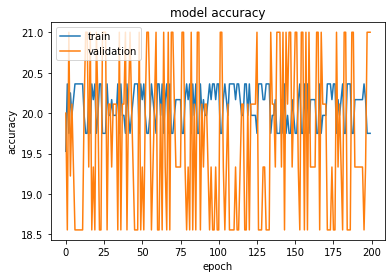

Maximum Train Accuracy : 20.361112594604492
Maximum Validation Accuracy : 21.0


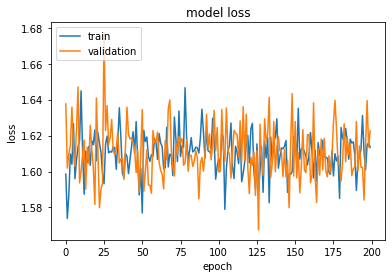

Minimum Train Loss : 1.5738871097564697
Minimum Validation Loss : 1.5675184726715088


In [ ]:
Bacteria_model_phase_RMSprop_001 = Bact_Net()
Bacteria_model_phase_RMSprop_001.cuda()
trainer_RMSprop_phase_001 = trainer(Bacteria_model_phase_RMSprop_001, phase_train_loader,"RMSprop", epoch_size=200, learning_rate=0.01)
trainer_RMSprop_phase_001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_RMSprop_phase_001.history['train_acc'])
plt.plot(trainer_RMSprop_phase_001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_RMSprop_phase_001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_RMSprop_phase_001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_RMSprop_phase_001.history['train_loss'])
plt.plot(trainer_RMSprop_phase_001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_RMSprop_phase_001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_RMSprop_phase_001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 20.166666


  0%|          | 1/200 [00:10<33:29, 10.10s/it]

Val Acc | Epoch 1/200 | ACC 19.333334
Train Acc | Epoch 2/200 | ACC 44.111111


  1%|          | 2/200 [00:20<33:06, 10.03s/it]

Val Acc | Epoch 2/200 | ACC 43.111115
Train Acc | Epoch 3/200 | ACC 48.666668


  2%|▏         | 3/200 [00:30<32:52, 10.01s/it]

Val Acc | Epoch 3/200 | ACC 48.666668
Train Acc | Epoch 4/200 | ACC 37.416668


  2%|▏         | 4/200 [00:40<32:57, 10.09s/it]

Val Acc | Epoch 4/200 | ACC 36.666668
Train Acc | Epoch 5/200 | ACC 55.805557


  2%|▎         | 5/200 [00:50<33:04, 10.17s/it]

Val Acc | Epoch 5/200 | ACC 55.000000
Train Acc | Epoch 6/200 | ACC 68.472221


  3%|▎         | 6/200 [01:00<32:44, 10.12s/it]

Val Acc | Epoch 6/200 | ACC 68.333336
Train Acc | Epoch 7/200 | ACC 53.000004


  4%|▎         | 7/200 [01:10<32:36, 10.14s/it]

Val Acc | Epoch 7/200 | ACC 53.111111
Train Acc | Epoch 8/200 | ACC 70.750008


  4%|▍         | 8/200 [01:20<32:27, 10.14s/it]

Val Acc | Epoch 8/200 | ACC 68.222221
Train Acc | Epoch 9/200 | ACC 74.500000


  4%|▍         | 9/200 [01:30<31:56, 10.03s/it]

Val Acc | Epoch 9/200 | ACC 74.555557
Train Acc | Epoch 10/200 | ACC 62.861115


  5%|▌         | 10/200 [01:41<32:01, 10.11s/it]

Val Acc | Epoch 10/200 | ACC 61.333336
Train Acc | Epoch 11/200 | ACC 73.361115


  6%|▌         | 11/200 [01:51<31:53, 10.13s/it]

Val Acc | Epoch 11/200 | ACC 71.555557
Train Acc | Epoch 12/200 | ACC 78.750000


  6%|▌         | 12/200 [02:00<31:24, 10.03s/it]

Val Acc | Epoch 12/200 | ACC 77.000008
Train Acc | Epoch 13/200 | ACC 81.111115


  6%|▋         | 13/200 [02:10<31:11, 10.01s/it]

Val Acc | Epoch 13/200 | ACC 80.666664
Train Acc | Epoch 14/200 | ACC 74.000000


  7%|▋         | 14/200 [02:21<31:06, 10.03s/it]

Val Acc | Epoch 14/200 | ACC 73.444443
Train Acc | Epoch 15/200 | ACC 75.111115


  8%|▊         | 15/200 [02:30<30:49, 10.00s/it]

Val Acc | Epoch 15/200 | ACC 73.777779
Train Acc | Epoch 16/200 | ACC 78.666672


  8%|▊         | 16/200 [02:40<30:32,  9.96s/it]

Val Acc | Epoch 16/200 | ACC 76.777779
Train Acc | Epoch 17/200 | ACC 81.305557


  8%|▊         | 17/200 [02:50<30:25,  9.98s/it]

Val Acc | Epoch 17/200 | ACC 80.777779
Train Acc | Epoch 18/200 | ACC 83.583336


  9%|▉         | 18/200 [03:00<30:17,  9.99s/it]

Val Acc | Epoch 18/200 | ACC 82.333336
Train Acc | Epoch 19/200 | ACC 82.027779


 10%|▉         | 19/200 [03:11<30:36, 10.15s/it]

Val Acc | Epoch 19/200 | ACC 81.111115
Train Acc | Epoch 20/200 | ACC 83.166672


 10%|█         | 20/200 [03:21<30:21, 10.12s/it]

Val Acc | Epoch 20/200 | ACC 80.666664
Train Acc | Epoch 21/200 | ACC 82.222221


 10%|█         | 21/200 [03:31<30:05, 10.09s/it]

Val Acc | Epoch 21/200 | ACC 81.000000
Train Acc | Epoch 22/200 | ACC 79.694443


 11%|█         | 22/200 [03:41<29:55, 10.09s/it]

Val Acc | Epoch 22/200 | ACC 79.111115
Train Acc | Epoch 23/200 | ACC 83.750000


 12%|█▏        | 23/200 [03:51<29:34, 10.02s/it]

Val Acc | Epoch 23/200 | ACC 82.000000
Train Acc | Epoch 24/200 | ACC 75.083336


 12%|█▏        | 24/200 [04:01<29:15,  9.97s/it]

Val Acc | Epoch 24/200 | ACC 74.222221
Train Acc | Epoch 25/200 | ACC 83.694443


 12%|█▎        | 25/200 [04:11<28:57,  9.93s/it]

Val Acc | Epoch 25/200 | ACC 81.777779
Train Acc | Epoch 26/200 | ACC 85.305557


 13%|█▎        | 26/200 [04:21<29:03, 10.02s/it]

Val Acc | Epoch 26/200 | ACC 82.888885
Train Acc | Epoch 27/200 | ACC 80.527786


 14%|█▎        | 27/200 [04:31<28:48,  9.99s/it]

Val Acc | Epoch 27/200 | ACC 80.222229
Train Acc | Epoch 28/200 | ACC 84.666672


 14%|█▍        | 28/200 [04:41<28:49, 10.05s/it]

Val Acc | Epoch 28/200 | ACC 82.444450
Train Acc | Epoch 29/200 | ACC 85.444443


 14%|█▍        | 29/200 [04:51<28:39, 10.06s/it]

Val Acc | Epoch 29/200 | ACC 84.555557
Train Acc | Epoch 30/200 | ACC 83.611115


 15%|█▌        | 30/200 [05:01<28:25, 10.03s/it]

Val Acc | Epoch 30/200 | ACC 83.111115
Train Acc | Epoch 31/200 | ACC 83.027779


 16%|█▌        | 31/200 [05:11<28:22, 10.07s/it]

Val Acc | Epoch 31/200 | ACC 83.111115
Train Acc | Epoch 32/200 | ACC 84.666672


 16%|█▌        | 32/200 [05:21<28:16, 10.10s/it]

Val Acc | Epoch 32/200 | ACC 83.666672
Train Acc | Epoch 33/200 | ACC 84.833336


 16%|█▋        | 33/200 [05:31<27:52, 10.01s/it]

Val Acc | Epoch 33/200 | ACC 83.555557
Train Acc | Epoch 34/200 | ACC 85.250000


 17%|█▋        | 34/200 [05:41<27:35,  9.97s/it]

Val Acc | Epoch 34/200 | ACC 84.222221
Train Acc | Epoch 35/200 | ACC 84.222221


 18%|█▊        | 35/200 [05:51<27:20,  9.94s/it]

Val Acc | Epoch 35/200 | ACC 82.888885
Train Acc | Epoch 36/200 | ACC 86.694450


 18%|█▊        | 36/200 [06:01<27:10,  9.94s/it]

Val Acc | Epoch 36/200 | ACC 86.111107
Train Acc | Epoch 37/200 | ACC 87.055557


 18%|█▊        | 37/200 [06:11<27:08,  9.99s/it]

Val Acc | Epoch 37/200 | ACC 84.444443
Train Acc | Epoch 38/200 | ACC 85.083336


 19%|█▉        | 38/200 [06:21<27:02, 10.02s/it]

Val Acc | Epoch 38/200 | ACC 84.222221
Train Acc | Epoch 39/200 | ACC 84.250000


 20%|█▉        | 39/200 [06:31<26:55, 10.03s/it]

Val Acc | Epoch 39/200 | ACC 82.111115
Train Acc | Epoch 40/200 | ACC 87.138893


 20%|██        | 40/200 [06:41<26:42, 10.02s/it]

Val Acc | Epoch 40/200 | ACC 85.555557
Train Acc | Epoch 41/200 | ACC 87.055557


 20%|██        | 41/200 [06:51<26:25,  9.97s/it]

Val Acc | Epoch 41/200 | ACC 85.555557
Train Acc | Epoch 42/200 | ACC 86.888893


 21%|██        | 42/200 [07:01<26:11,  9.94s/it]

Val Acc | Epoch 42/200 | ACC 84.333336
Train Acc | Epoch 43/200 | ACC 84.000000


 22%|██▏       | 43/200 [07:11<26:09, 10.00s/it]

Val Acc | Epoch 43/200 | ACC 83.555557
Train Acc | Epoch 44/200 | ACC 86.222229


 22%|██▏       | 44/200 [07:21<25:45,  9.91s/it]

Val Acc | Epoch 44/200 | ACC 85.000000
Train Acc | Epoch 45/200 | ACC 86.444450


 22%|██▎       | 45/200 [07:31<25:46,  9.98s/it]

Val Acc | Epoch 45/200 | ACC 85.333336
Train Acc | Epoch 46/200 | ACC 84.500000


 23%|██▎       | 46/200 [07:41<25:44, 10.03s/it]

Val Acc | Epoch 46/200 | ACC 82.222221
Train Acc | Epoch 47/200 | ACC 87.666664


 24%|██▎       | 47/200 [07:51<25:34, 10.03s/it]

Val Acc | Epoch 47/200 | ACC 86.222229
Train Acc | Epoch 48/200 | ACC 84.972229


 24%|██▍       | 48/200 [08:01<25:16,  9.98s/it]

Val Acc | Epoch 48/200 | ACC 83.444443
Train Acc | Epoch 49/200 | ACC 70.583336


 24%|██▍       | 49/200 [08:10<24:50,  9.87s/it]

Val Acc | Epoch 49/200 | ACC 70.444450
Train Acc | Epoch 50/200 | ACC 86.805557


 25%|██▌       | 50/200 [08:21<25:12, 10.08s/it]

Val Acc | Epoch 50/200 | ACC 85.666672
Train Acc | Epoch 51/200 | ACC 87.000000


 26%|██▌       | 51/200 [08:31<24:58, 10.06s/it]

Val Acc | Epoch 51/200 | ACC 84.888893
Train Acc | Epoch 52/200 | ACC 87.361115


 26%|██▌       | 52/200 [08:41<24:37,  9.98s/it]

Val Acc | Epoch 52/200 | ACC 86.444450
Train Acc | Epoch 53/200 | ACC 87.777779


 26%|██▋       | 53/200 [08:51<24:31, 10.01s/it]

Val Acc | Epoch 53/200 | ACC 87.888893
Train Acc | Epoch 54/200 | ACC 84.083336


 27%|██▋       | 54/200 [09:01<24:29, 10.06s/it]

Val Acc | Epoch 54/200 | ACC 84.222221
Train Acc | Epoch 55/200 | ACC 85.833336


 28%|██▊       | 55/200 [09:11<24:15, 10.04s/it]

Val Acc | Epoch 55/200 | ACC 84.555557
Train Acc | Epoch 56/200 | ACC 87.277779


 28%|██▊       | 56/200 [09:21<24:11, 10.08s/it]

Val Acc | Epoch 56/200 | ACC 85.000000
Train Acc | Epoch 57/200 | ACC 82.861115


 28%|██▊       | 57/200 [09:31<23:48,  9.99s/it]

Val Acc | Epoch 57/200 | ACC 79.555557
Train Acc | Epoch 58/200 | ACC 88.166664


 29%|██▉       | 58/200 [09:41<23:35,  9.97s/it]

Val Acc | Epoch 58/200 | ACC 87.000000
Train Acc | Epoch 59/200 | ACC 87.805557


 30%|██▉       | 59/200 [09:51<23:25,  9.97s/it]

Val Acc | Epoch 59/200 | ACC 84.777779
Train Acc | Epoch 60/200 | ACC 87.916664


 30%|███       | 60/200 [10:01<23:17,  9.98s/it]

Val Acc | Epoch 60/200 | ACC 86.333336
Train Acc | Epoch 61/200 | ACC 74.916664


 30%|███       | 61/200 [10:11<23:04,  9.96s/it]

Val Acc | Epoch 61/200 | ACC 74.333336
Train Acc | Epoch 62/200 | ACC 86.388893


 31%|███       | 62/200 [10:21<23:02, 10.02s/it]

Val Acc | Epoch 62/200 | ACC 85.333336
Train Acc | Epoch 63/200 | ACC 88.388893


 32%|███▏      | 63/200 [10:31<22:50, 10.00s/it]

Val Acc | Epoch 63/200 | ACC 85.888893
Train Acc | Epoch 64/200 | ACC 88.833336


 32%|███▏      | 64/200 [10:41<22:38,  9.99s/it]

Val Acc | Epoch 64/200 | ACC 86.444450
Train Acc | Epoch 65/200 | ACC 83.722221


 32%|███▎      | 65/200 [10:51<22:24,  9.96s/it]

Val Acc | Epoch 65/200 | ACC 81.333336
Train Acc | Epoch 66/200 | ACC 87.805557


 33%|███▎      | 66/200 [11:01<22:14,  9.96s/it]

Val Acc | Epoch 66/200 | ACC 85.555557
Train Acc | Epoch 67/200 | ACC 84.222221


 34%|███▎      | 67/200 [11:11<22:10, 10.01s/it]

Val Acc | Epoch 67/200 | ACC 82.000000
Train Acc | Epoch 68/200 | ACC 88.388893


 34%|███▍      | 68/200 [11:21<22:02, 10.02s/it]

Val Acc | Epoch 68/200 | ACC 85.888893
Train Acc | Epoch 69/200 | ACC 79.638893


 34%|███▍      | 69/200 [11:31<22:00, 10.08s/it]

Val Acc | Epoch 69/200 | ACC 80.333336
Train Acc | Epoch 70/200 | ACC 84.305557


 35%|███▌      | 70/200 [11:41<21:58, 10.14s/it]

Val Acc | Epoch 70/200 | ACC 81.666664
Train Acc | Epoch 71/200 | ACC 88.361115


 36%|███▌      | 71/200 [11:51<21:45, 10.12s/it]

Val Acc | Epoch 71/200 | ACC 85.222229
Train Acc | Epoch 72/200 | ACC 87.888893


 36%|███▌      | 72/200 [12:01<21:22, 10.02s/it]

Val Acc | Epoch 72/200 | ACC 86.888893
Train Acc | Epoch 73/200 | ACC 88.194450


 36%|███▋      | 73/200 [12:11<21:01,  9.93s/it]

Val Acc | Epoch 73/200 | ACC 87.777779
Train Acc | Epoch 74/200 | ACC 89.444443


 37%|███▋      | 74/200 [12:21<20:46,  9.89s/it]

Val Acc | Epoch 74/200 | ACC 87.666664
Train Acc | Epoch 75/200 | ACC 89.388885


 38%|███▊      | 75/200 [12:31<20:40,  9.92s/it]

Val Acc | Epoch 75/200 | ACC 87.444450
Train Acc | Epoch 76/200 | ACC 89.416672


 38%|███▊      | 76/200 [12:41<20:43, 10.03s/it]

Val Acc | Epoch 76/200 | ACC 88.333336
Train Acc | Epoch 77/200 | ACC 89.361115


 38%|███▊      | 77/200 [12:51<20:31, 10.01s/it]

Val Acc | Epoch 77/200 | ACC 87.777779
Train Acc | Epoch 78/200 | ACC 89.555557


 39%|███▉      | 78/200 [13:01<20:23, 10.03s/it]

Val Acc | Epoch 78/200 | ACC 89.000008
Train Acc | Epoch 79/200 | ACC 88.388893


 40%|███▉      | 79/200 [13:11<20:15, 10.04s/it]

Val Acc | Epoch 79/200 | ACC 87.333336
Train Acc | Epoch 80/200 | ACC 87.750000


 40%|████      | 80/200 [13:21<20:11, 10.09s/it]

Val Acc | Epoch 80/200 | ACC 86.777786
Train Acc | Epoch 81/200 | ACC 89.388885


 40%|████      | 81/200 [13:32<20:29, 10.33s/it]

Val Acc | Epoch 81/200 | ACC 87.333336
Train Acc | Epoch 82/200 | ACC 89.250008


 41%|████      | 82/200 [13:42<20:05, 10.21s/it]

Val Acc | Epoch 82/200 | ACC 88.000000
Train Acc | Epoch 83/200 | ACC 82.166664


 42%|████▏     | 83/200 [13:52<19:48, 10.16s/it]

Val Acc | Epoch 83/200 | ACC 81.888893
Train Acc | Epoch 84/200 | ACC 89.388885


 42%|████▏     | 84/200 [14:02<19:27, 10.06s/it]

Val Acc | Epoch 84/200 | ACC 87.555557
Train Acc | Epoch 85/200 | ACC 88.027779


 42%|████▎     | 85/200 [14:12<19:13, 10.03s/it]

Val Acc | Epoch 85/200 | ACC 86.222229
Train Acc | Epoch 86/200 | ACC 85.305557


 43%|████▎     | 86/200 [14:22<19:07, 10.06s/it]

Val Acc | Epoch 86/200 | ACC 84.000000
Train Acc | Epoch 87/200 | ACC 89.305557


 44%|████▎     | 87/200 [14:32<19:00, 10.09s/it]

Val Acc | Epoch 87/200 | ACC 87.111115
Train Acc | Epoch 88/200 | ACC 88.888893


 44%|████▍     | 88/200 [14:42<18:48, 10.08s/it]

Val Acc | Epoch 88/200 | ACC 87.888893
Train Acc | Epoch 89/200 | ACC 87.888893


 44%|████▍     | 89/200 [14:52<18:30, 10.00s/it]

Val Acc | Epoch 89/200 | ACC 86.222229
Train Acc | Epoch 90/200 | ACC 77.361115


 45%|████▌     | 90/200 [15:02<18:13,  9.94s/it]

Val Acc | Epoch 90/200 | ACC 77.111115
Train Acc | Epoch 91/200 | ACC 89.583336


 46%|████▌     | 91/200 [15:12<18:02,  9.93s/it]

Val Acc | Epoch 91/200 | ACC 88.111115
Train Acc | Epoch 92/200 | ACC 85.722229


 46%|████▌     | 92/200 [15:22<17:51,  9.92s/it]

Val Acc | Epoch 92/200 | ACC 84.111115
Train Acc | Epoch 93/200 | ACC 88.583336


 46%|████▋     | 93/200 [15:32<17:49, 10.00s/it]

Val Acc | Epoch 93/200 | ACC 86.888893
Train Acc | Epoch 94/200 | ACC 89.333336


 47%|████▋     | 94/200 [15:42<17:42, 10.03s/it]

Val Acc | Epoch 94/200 | ACC 87.333336
Train Acc | Epoch 95/200 | ACC 88.416672


 48%|████▊     | 95/200 [15:52<17:30, 10.00s/it]

Val Acc | Epoch 95/200 | ACC 86.222229
Train Acc | Epoch 96/200 | ACC 88.722221


 48%|████▊     | 96/200 [16:02<17:17,  9.98s/it]

Val Acc | Epoch 96/200 | ACC 87.000000
Train Acc | Epoch 97/200 | ACC 89.611115


 48%|████▊     | 97/200 [16:12<17:02,  9.92s/it]

Val Acc | Epoch 97/200 | ACC 87.888893
Train Acc | Epoch 98/200 | ACC 88.833336


 49%|████▉     | 98/200 [16:21<16:45,  9.86s/it]

Val Acc | Epoch 98/200 | ACC 86.222229
Train Acc | Epoch 99/200 | ACC 88.972221


 50%|████▉     | 99/200 [16:31<16:40,  9.91s/it]

Val Acc | Epoch 99/200 | ACC 87.444450
Train Acc | Epoch 100/200 | ACC 90.805557


 50%|█████     | 100/200 [16:42<16:40, 10.00s/it]

Val Acc | Epoch 100/200 | ACC 88.444450
Train Acc | Epoch 101/200 | ACC 86.000000


 50%|█████     | 101/200 [16:52<16:28,  9.98s/it]

Val Acc | Epoch 101/200 | ACC 84.111115
Train Acc | Epoch 102/200 | ACC 89.666672


 51%|█████     | 102/200 [17:02<16:20, 10.01s/it]

Val Acc | Epoch 102/200 | ACC 87.111115
Train Acc | Epoch 103/200 | ACC 87.500000


 52%|█████▏    | 103/200 [17:12<16:12, 10.02s/it]

Val Acc | Epoch 103/200 | ACC 84.333336
Train Acc | Epoch 104/200 | ACC 89.583336


 52%|█████▏    | 104/200 [17:22<16:02, 10.03s/it]

Val Acc | Epoch 104/200 | ACC 87.333336
Train Acc | Epoch 105/200 | ACC 88.194450


 52%|█████▎    | 105/200 [17:32<15:44,  9.95s/it]

Val Acc | Epoch 105/200 | ACC 86.777786
Train Acc | Epoch 106/200 | ACC 88.305557


 53%|█████▎    | 106/200 [17:42<15:36,  9.97s/it]

Val Acc | Epoch 106/200 | ACC 87.333336
Train Acc | Epoch 107/200 | ACC 89.444443


 54%|█████▎    | 107/200 [17:51<15:23,  9.93s/it]

Val Acc | Epoch 107/200 | ACC 87.000000
Train Acc | Epoch 108/200 | ACC 89.277779


 54%|█████▍    | 108/200 [18:01<15:17,  9.97s/it]

Val Acc | Epoch 108/200 | ACC 87.444450
Train Acc | Epoch 109/200 | ACC 90.000000


 55%|█████▍    | 109/200 [18:12<15:09,  9.99s/it]

Val Acc | Epoch 109/200 | ACC 87.555557
Train Acc | Epoch 110/200 | ACC 88.944450


 55%|█████▌    | 110/200 [18:21<14:57,  9.97s/it]

Val Acc | Epoch 110/200 | ACC 86.888893
Train Acc | Epoch 111/200 | ACC 85.250000


 56%|█████▌    | 111/200 [18:32<14:49,  9.99s/it]

Val Acc | Epoch 111/200 | ACC 84.444443
Train Acc | Epoch 112/200 | ACC 83.916672


 56%|█████▌    | 112/200 [18:42<14:57, 10.20s/it]

Val Acc | Epoch 112/200 | ACC 83.333336
Train Acc | Epoch 113/200 | ACC 90.583336


 56%|█████▋    | 113/200 [18:52<14:46, 10.18s/it]

Val Acc | Epoch 113/200 | ACC 88.555557
Train Acc | Epoch 114/200 | ACC 90.777779


 57%|█████▋    | 114/200 [19:02<14:31, 10.13s/it]

Val Acc | Epoch 114/200 | ACC 87.666664
Train Acc | Epoch 115/200 | ACC 90.722229


 57%|█████▊    | 115/200 [19:12<14:18, 10.10s/it]

Val Acc | Epoch 115/200 | ACC 89.000008
Train Acc | Epoch 116/200 | ACC 89.638885


 58%|█████▊    | 116/200 [19:23<14:11, 10.14s/it]

Val Acc | Epoch 116/200 | ACC 87.222221
Train Acc | Epoch 117/200 | ACC 90.444443


 58%|█████▊    | 117/200 [19:32<13:55, 10.06s/it]

Val Acc | Epoch 117/200 | ACC 88.777779
Train Acc | Epoch 118/200 | ACC 88.222221


 59%|█████▉    | 118/200 [19:42<13:43, 10.04s/it]

Val Acc | Epoch 118/200 | ACC 87.666664
Train Acc | Epoch 119/200 | ACC 88.055557


 60%|█████▉    | 119/200 [19:53<13:34, 10.05s/it]

Val Acc | Epoch 119/200 | ACC 85.222229
Train Acc | Epoch 120/200 | ACC 90.277779


 60%|██████    | 120/200 [20:03<13:24, 10.06s/it]

Val Acc | Epoch 120/200 | ACC 88.555557
Train Acc | Epoch 121/200 | ACC 90.694443


 60%|██████    | 121/200 [20:13<13:12, 10.03s/it]

Val Acc | Epoch 121/200 | ACC 88.777779
Train Acc | Epoch 122/200 | ACC 89.055557


 61%|██████    | 122/200 [20:23<12:59, 10.00s/it]

Val Acc | Epoch 122/200 | ACC 86.777786
Train Acc | Epoch 123/200 | ACC 91.444443


 62%|██████▏   | 123/200 [20:33<12:52, 10.04s/it]

Val Acc | Epoch 123/200 | ACC 89.444443
Train Acc | Epoch 124/200 | ACC 90.861115


 62%|██████▏   | 124/200 [20:43<12:45, 10.07s/it]

Val Acc | Epoch 124/200 | ACC 87.444450
Train Acc | Epoch 125/200 | ACC 88.888893


 62%|██████▎   | 125/200 [20:53<12:32, 10.04s/it]

Val Acc | Epoch 125/200 | ACC 88.000000
Train Acc | Epoch 126/200 | ACC 91.194443


 63%|██████▎   | 126/200 [21:03<12:22, 10.03s/it]

Val Acc | Epoch 126/200 | ACC 89.000008
Train Acc | Epoch 127/200 | ACC 90.694443


 64%|██████▎   | 127/200 [21:13<12:09, 10.00s/it]

Val Acc | Epoch 127/200 | ACC 88.444450
Train Acc | Epoch 128/200 | ACC 89.111115


 64%|██████▍   | 128/200 [21:23<12:00, 10.00s/it]

Val Acc | Epoch 128/200 | ACC 86.000000
Train Acc | Epoch 129/200 | ACC 90.277779


 64%|██████▍   | 129/200 [21:33<11:47,  9.96s/it]

Val Acc | Epoch 129/200 | ACC 88.666672
Train Acc | Epoch 130/200 | ACC 88.083336


 65%|██████▌   | 130/200 [21:42<11:34,  9.92s/it]

Val Acc | Epoch 130/200 | ACC 87.555557
Train Acc | Epoch 131/200 | ACC 90.222221


 66%|██████▌   | 131/200 [21:52<11:26,  9.95s/it]

Val Acc | Epoch 131/200 | ACC 88.666672
Train Acc | Epoch 132/200 | ACC 89.583336


 66%|██████▌   | 132/200 [22:03<11:21, 10.02s/it]

Val Acc | Epoch 132/200 | ACC 87.555557
Train Acc | Epoch 133/200 | ACC 91.388893


 66%|██████▋   | 133/200 [22:13<11:12, 10.04s/it]

Val Acc | Epoch 133/200 | ACC 88.777779
Train Acc | Epoch 134/200 | ACC 91.194443


 67%|██████▋   | 134/200 [22:23<11:04, 10.07s/it]

Val Acc | Epoch 134/200 | ACC 89.111115
Train Acc | Epoch 135/200 | ACC 90.666672


 68%|██████▊   | 135/200 [22:33<10:56, 10.10s/it]

Val Acc | Epoch 135/200 | ACC 88.555557
Train Acc | Epoch 136/200 | ACC 90.833336


 68%|██████▊   | 136/200 [22:43<10:44, 10.08s/it]

Val Acc | Epoch 136/200 | ACC 90.111115
Train Acc | Epoch 137/200 | ACC 90.194443


 68%|██████▊   | 137/200 [22:53<10:31, 10.03s/it]

Val Acc | Epoch 137/200 | ACC 89.555557
Train Acc | Epoch 138/200 | ACC 89.888885


 69%|██████▉   | 138/200 [23:03<10:21, 10.03s/it]

Val Acc | Epoch 138/200 | ACC 87.888893
Train Acc | Epoch 139/200 | ACC 89.944443


 70%|██████▉   | 139/200 [23:13<10:13, 10.05s/it]

Val Acc | Epoch 139/200 | ACC 87.444450
Train Acc | Epoch 140/200 | ACC 87.722221


 70%|███████   | 140/200 [23:23<09:58,  9.98s/it]

Val Acc | Epoch 140/200 | ACC 86.444450
Train Acc | Epoch 141/200 | ACC 90.305557


 70%|███████   | 141/200 [23:33<09:49,  9.99s/it]

Val Acc | Epoch 141/200 | ACC 88.000000
Train Acc | Epoch 142/200 | ACC 90.277779


 71%|███████   | 142/200 [23:43<09:44, 10.08s/it]

Val Acc | Epoch 142/200 | ACC 88.000000
Train Acc | Epoch 143/200 | ACC 90.888893


 72%|███████▏  | 143/200 [23:54<09:43, 10.25s/it]

Val Acc | Epoch 143/200 | ACC 89.111115
Train Acc | Epoch 144/200 | ACC 91.944443


 72%|███████▏  | 144/200 [24:04<09:31, 10.20s/it]

Val Acc | Epoch 144/200 | ACC 89.777779
Train Acc | Epoch 145/200 | ACC 91.444443


 72%|███████▎  | 145/200 [24:14<09:16, 10.12s/it]

Val Acc | Epoch 145/200 | ACC 88.555557
Train Acc | Epoch 146/200 | ACC 90.583336


 73%|███████▎  | 146/200 [24:24<09:01, 10.03s/it]

Val Acc | Epoch 146/200 | ACC 88.444450
Train Acc | Epoch 147/200 | ACC 91.333336


 74%|███████▎  | 147/200 [24:34<08:54, 10.08s/it]

Val Acc | Epoch 147/200 | ACC 90.000000
Train Acc | Epoch 148/200 | ACC 90.222221


 74%|███████▍  | 148/200 [24:44<08:40, 10.01s/it]

Val Acc | Epoch 148/200 | ACC 88.444450
Train Acc | Epoch 149/200 | ACC 89.250008


 74%|███████▍  | 149/200 [24:54<08:34, 10.08s/it]

Val Acc | Epoch 149/200 | ACC 86.666664
Train Acc | Epoch 150/200 | ACC 90.777779


 75%|███████▌  | 150/200 [25:04<08:19,  9.98s/it]

Val Acc | Epoch 150/200 | ACC 88.777779
Train Acc | Epoch 151/200 | ACC 88.750008


 76%|███████▌  | 151/200 [25:14<08:07,  9.95s/it]

Val Acc | Epoch 151/200 | ACC 87.000000
Train Acc | Epoch 152/200 | ACC 90.361115


 76%|███████▌  | 152/200 [25:24<07:59, 10.00s/it]

Val Acc | Epoch 152/200 | ACC 88.444450
Train Acc | Epoch 153/200 | ACC 88.666672


 76%|███████▋  | 153/200 [25:34<07:47,  9.96s/it]

Val Acc | Epoch 153/200 | ACC 86.333336
Train Acc | Epoch 154/200 | ACC 90.305557


 77%|███████▋  | 154/200 [25:44<07:37,  9.95s/it]

Val Acc | Epoch 154/200 | ACC 88.555557
Train Acc | Epoch 155/200 | ACC 89.305557


 78%|███████▊  | 155/200 [25:54<07:29,  9.98s/it]

Val Acc | Epoch 155/200 | ACC 88.777779
Train Acc | Epoch 156/200 | ACC 90.583336


 78%|███████▊  | 156/200 [26:04<07:19, 10.00s/it]

Val Acc | Epoch 156/200 | ACC 88.666672
Train Acc | Epoch 157/200 | ACC 90.250000


 78%|███████▊  | 157/200 [26:14<07:10, 10.01s/it]

Val Acc | Epoch 157/200 | ACC 88.555557
Train Acc | Epoch 158/200 | ACC 90.611115


 79%|███████▉  | 158/200 [26:24<07:00, 10.01s/it]

Val Acc | Epoch 158/200 | ACC 89.333336
Train Acc | Epoch 159/200 | ACC 90.888893


 80%|███████▉  | 159/200 [26:34<06:53, 10.08s/it]

Val Acc | Epoch 159/200 | ACC 89.222221
Train Acc | Epoch 160/200 | ACC 91.388893


 80%|████████  | 160/200 [26:44<06:42, 10.07s/it]

Val Acc | Epoch 160/200 | ACC 89.333336
Train Acc | Epoch 161/200 | ACC 89.472221


 80%|████████  | 161/200 [26:54<06:28,  9.97s/it]

Val Acc | Epoch 161/200 | ACC 88.000000
Train Acc | Epoch 162/200 | ACC 88.333336


 81%|████████  | 162/200 [27:03<06:17,  9.93s/it]

Val Acc | Epoch 162/200 | ACC 88.222221
Train Acc | Epoch 163/200 | ACC 90.277779


 82%|████████▏ | 163/200 [27:14<06:08,  9.96s/it]

Val Acc | Epoch 163/200 | ACC 87.111115
Train Acc | Epoch 164/200 | ACC 89.277779


 82%|████████▏ | 164/200 [27:24<05:59,  9.98s/it]

Val Acc | Epoch 164/200 | ACC 86.333336
Train Acc | Epoch 165/200 | ACC 85.583336


 82%|████████▎ | 165/200 [27:34<05:50, 10.02s/it]

Val Acc | Epoch 165/200 | ACC 82.444450
Train Acc | Epoch 166/200 | ACC 91.111115


 83%|████████▎ | 166/200 [27:43<05:38,  9.95s/it]

Val Acc | Epoch 166/200 | ACC 88.444450
Train Acc | Epoch 167/200 | ACC 90.916672


 84%|████████▎ | 167/200 [27:53<05:28,  9.96s/it]

Val Acc | Epoch 167/200 | ACC 89.222221
Train Acc | Epoch 168/200 | ACC 88.000000


 84%|████████▍ | 168/200 [28:03<05:18,  9.96s/it]

Val Acc | Epoch 168/200 | ACC 85.444443
Train Acc | Epoch 169/200 | ACC 90.277779


 84%|████████▍ | 169/200 [28:13<05:08,  9.96s/it]

Val Acc | Epoch 169/200 | ACC 88.777779
Train Acc | Epoch 170/200 | ACC 91.277779


 85%|████████▌ | 170/200 [28:23<04:56,  9.87s/it]

Val Acc | Epoch 170/200 | ACC 89.444443
Train Acc | Epoch 171/200 | ACC 89.555557


 86%|████████▌ | 171/200 [28:33<04:48,  9.96s/it]

Val Acc | Epoch 171/200 | ACC 87.666664
Train Acc | Epoch 172/200 | ACC 91.472229


 86%|████████▌ | 172/200 [28:43<04:39,  9.98s/it]

Val Acc | Epoch 172/200 | ACC 90.222221
Train Acc | Epoch 173/200 | ACC 89.444443


 86%|████████▋ | 173/200 [28:54<04:32, 10.10s/it]

Val Acc | Epoch 173/200 | ACC 87.000000
Train Acc | Epoch 174/200 | ACC 88.555557


 87%|████████▋ | 174/200 [29:04<04:25, 10.20s/it]

Val Acc | Epoch 174/200 | ACC 87.444450
Train Acc | Epoch 175/200 | ACC 89.500008


 88%|████████▊ | 175/200 [29:14<04:14, 10.19s/it]

Val Acc | Epoch 175/200 | ACC 88.666672
Train Acc | Epoch 176/200 | ACC 89.527779


 88%|████████▊ | 176/200 [29:24<04:02, 10.12s/it]

Val Acc | Epoch 176/200 | ACC 89.000008
Train Acc | Epoch 177/200 | ACC 90.888893


 88%|████████▊ | 177/200 [29:34<03:52, 10.09s/it]

Val Acc | Epoch 177/200 | ACC 88.555557
Train Acc | Epoch 178/200 | ACC 89.000008


 89%|████████▉ | 178/200 [29:44<03:40, 10.02s/it]

Val Acc | Epoch 178/200 | ACC 86.000000
Train Acc | Epoch 179/200 | ACC 90.361115


 90%|████████▉ | 179/200 [29:54<03:30, 10.04s/it]

Val Acc | Epoch 179/200 | ACC 88.666672
Train Acc | Epoch 180/200 | ACC 91.333336


 90%|█████████ | 180/200 [30:04<03:20, 10.01s/it]

Val Acc | Epoch 180/200 | ACC 89.888885
Train Acc | Epoch 181/200 | ACC 88.805557


 90%|█████████ | 181/200 [30:14<03:10, 10.01s/it]

Val Acc | Epoch 181/200 | ACC 87.555557
Train Acc | Epoch 182/200 | ACC 91.361115


 91%|█████████ | 182/200 [30:24<03:00, 10.01s/it]

Val Acc | Epoch 182/200 | ACC 90.666672
Train Acc | Epoch 183/200 | ACC 87.416664


 92%|█████████▏| 183/200 [30:34<02:50, 10.04s/it]

Val Acc | Epoch 183/200 | ACC 86.777786
Train Acc | Epoch 184/200 | ACC 91.055557


 92%|█████████▏| 184/200 [30:44<02:40, 10.02s/it]

Val Acc | Epoch 184/200 | ACC 90.111115
Train Acc | Epoch 185/200 | ACC 84.388893


 92%|█████████▎| 185/200 [30:54<02:30, 10.02s/it]

Val Acc | Epoch 185/200 | ACC 81.555557
Train Acc | Epoch 186/200 | ACC 91.277779


 93%|█████████▎| 186/200 [31:04<02:19,  9.94s/it]

Val Acc | Epoch 186/200 | ACC 89.333336
Train Acc | Epoch 187/200 | ACC 90.944443


 94%|█████████▎| 187/200 [31:14<02:09,  9.95s/it]

Val Acc | Epoch 187/200 | ACC 89.111115
Train Acc | Epoch 188/200 | ACC 87.722221


 94%|█████████▍| 188/200 [31:24<01:58,  9.92s/it]

Val Acc | Epoch 188/200 | ACC 85.555557
Train Acc | Epoch 189/200 | ACC 90.361115


 94%|█████████▍| 189/200 [31:34<01:49, 10.00s/it]

Val Acc | Epoch 189/200 | ACC 88.222221
Train Acc | Epoch 190/200 | ACC 90.916672


 95%|█████████▌| 190/200 [31:44<01:40, 10.06s/it]

Val Acc | Epoch 190/200 | ACC 89.777779
Train Acc | Epoch 191/200 | ACC 90.277779


 96%|█████████▌| 191/200 [31:54<01:29,  9.99s/it]

Val Acc | Epoch 191/200 | ACC 88.444450
Train Acc | Epoch 192/200 | ACC 91.194443


 96%|█████████▌| 192/200 [32:04<01:19,  9.95s/it]

Val Acc | Epoch 192/200 | ACC 91.111115
Train Acc | Epoch 193/200 | ACC 91.222229


 96%|█████████▋| 193/200 [32:14<01:09,  9.95s/it]

Val Acc | Epoch 193/200 | ACC 90.111115
Train Acc | Epoch 194/200 | ACC 89.972221


 97%|█████████▋| 194/200 [32:24<00:59,  9.89s/it]

Val Acc | Epoch 194/200 | ACC 86.777786
Train Acc | Epoch 195/200 | ACC 91.194443


 98%|█████████▊| 195/200 [32:33<00:49,  9.91s/it]

Val Acc | Epoch 195/200 | ACC 89.222221
Train Acc | Epoch 196/200 | ACC 89.833336


 98%|█████████▊| 196/200 [32:43<00:39,  9.92s/it]

Val Acc | Epoch 196/200 | ACC 87.444450
Train Acc | Epoch 197/200 | ACC 89.611115


 98%|█████████▊| 197/200 [32:53<00:29,  9.97s/it]

Val Acc | Epoch 197/200 | ACC 88.222221
Train Acc | Epoch 198/200 | ACC 91.944443


 99%|█████████▉| 198/200 [33:04<00:19,  9.99s/it]

Val Acc | Epoch 198/200 | ACC 90.111115
Train Acc | Epoch 199/200 | ACC 85.694443


100%|█████████▉| 199/200 [33:13<00:09,  9.91s/it]

Val Acc | Epoch 199/200 | ACC 85.888893
Train Acc | Epoch 200/200 | ACC 91.694443


100%|██████████| 200/200 [33:23<00:00, 10.02s/it]

Val Acc | Epoch 200/200 | ACC 89.333336


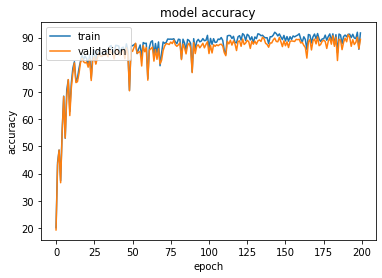

Maximum Train Accuracy : 91.94444274902344
Maximum Validation Accuracy : 91.11111450195312


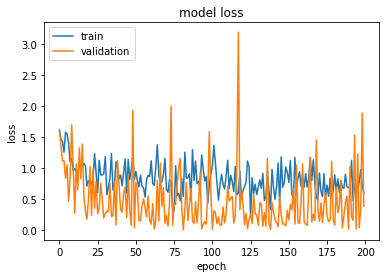

Minimum Train Loss : 0.23048612475395203
Minimum Validation Loss : 0.0008742858190089464


In [ ]:
Bacteria_model_phase_RMSprop_0001 = Bact_Net()
Bacteria_model_phase_RMSprop_0001.cuda()
trainer_RMSprop_phase_0001 = trainer(Bacteria_model_phase_RMSprop_0001, phase_train_loader,"RMSprop", epoch_size=200, learning_rate=0.001)
trainer_RMSprop_phase_0001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_RMSprop_phase_0001.history['train_acc'])
plt.plot(trainer_RMSprop_phase_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_RMSprop_phase_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_RMSprop_phase_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_RMSprop_phase_0001.history['train_loss'])
plt.plot(trainer_RMSprop_phase_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_RMSprop_phase_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_RMSprop_phase_0001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 19.972223


  0%|          | 1/200 [00:10<33:15, 10.03s/it]

Val Acc | Epoch 1/200 | ACC 20.111113
Train Acc | Epoch 2/200 | ACC 33.722221


  1%|          | 2/200 [00:19<32:51,  9.96s/it]

Val Acc | Epoch 2/200 | ACC 35.444443
Train Acc | Epoch 3/200 | ACC 38.472221


  2%|▏         | 3/200 [00:30<32:57, 10.04s/it]

Val Acc | Epoch 3/200 | ACC 40.222225
Train Acc | Epoch 4/200 | ACC 43.000000


  2%|▏         | 4/200 [00:40<32:48, 10.04s/it]

Val Acc | Epoch 4/200 | ACC 44.000000
Train Acc | Epoch 5/200 | ACC 50.888889


  2%|▎         | 5/200 [00:50<33:17, 10.24s/it]

Val Acc | Epoch 5/200 | ACC 49.777779
Train Acc | Epoch 6/200 | ACC 48.750000


  3%|▎         | 6/200 [01:00<33:00, 10.21s/it]

Val Acc | Epoch 6/200 | ACC 47.111111
Train Acc | Epoch 7/200 | ACC 53.388889


  4%|▎         | 7/200 [01:10<32:37, 10.14s/it]

Val Acc | Epoch 7/200 | ACC 53.111111
Train Acc | Epoch 8/200 | ACC 49.833332


  4%|▍         | 8/200 [01:20<32:17, 10.09s/it]

Val Acc | Epoch 8/200 | ACC 50.888889
Train Acc | Epoch 9/200 | ACC 52.972221


  4%|▍         | 9/200 [01:30<32:10, 10.11s/it]

Val Acc | Epoch 9/200 | ACC 54.000004
Train Acc | Epoch 10/200 | ACC 53.944443


  5%|▌         | 10/200 [01:40<31:35,  9.98s/it]

Val Acc | Epoch 10/200 | ACC 55.555557
Train Acc | Epoch 11/200 | ACC 54.750000


  6%|▌         | 11/200 [01:50<31:29, 10.00s/it]

Val Acc | Epoch 11/200 | ACC 52.777779
Train Acc | Epoch 12/200 | ACC 44.944443


  6%|▌         | 12/200 [02:00<31:23, 10.02s/it]

Val Acc | Epoch 12/200 | ACC 45.222221
Train Acc | Epoch 13/200 | ACC 60.222225


  6%|▋         | 13/200 [02:10<31:12, 10.01s/it]

Val Acc | Epoch 13/200 | ACC 59.666668
Train Acc | Epoch 14/200 | ACC 53.333336


  7%|▋         | 14/200 [02:20<30:49,  9.94s/it]

Val Acc | Epoch 14/200 | ACC 52.666672
Train Acc | Epoch 15/200 | ACC 59.583336


  8%|▊         | 15/200 [02:30<30:40,  9.95s/it]

Val Acc | Epoch 15/200 | ACC 58.000004
Train Acc | Epoch 16/200 | ACC 62.833332


  8%|▊         | 16/200 [02:40<30:34,  9.97s/it]

Val Acc | Epoch 16/200 | ACC 63.000000
Train Acc | Epoch 17/200 | ACC 64.055557


  8%|▊         | 17/200 [02:50<30:31, 10.01s/it]

Val Acc | Epoch 17/200 | ACC 62.666668
Train Acc | Epoch 18/200 | ACC 53.555553


  9%|▉         | 18/200 [03:00<30:18,  9.99s/it]

Val Acc | Epoch 18/200 | ACC 53.888893
Train Acc | Epoch 19/200 | ACC 58.166672


 10%|▉         | 19/200 [03:10<30:14, 10.02s/it]

Val Acc | Epoch 19/200 | ACC 59.111111
Train Acc | Epoch 20/200 | ACC 55.111111


 10%|█         | 20/200 [03:20<30:00, 10.00s/it]

Val Acc | Epoch 20/200 | ACC 55.666668
Train Acc | Epoch 21/200 | ACC 54.916668


 10%|█         | 21/200 [03:30<30:01, 10.06s/it]

Val Acc | Epoch 21/200 | ACC 55.111111
Train Acc | Epoch 22/200 | ACC 66.722229


 11%|█         | 22/200 [03:40<29:45, 10.03s/it]

Val Acc | Epoch 22/200 | ACC 67.777779
Train Acc | Epoch 23/200 | ACC 59.027779


 12%|█▏        | 23/200 [03:50<29:26,  9.98s/it]

Val Acc | Epoch 23/200 | ACC 58.666672
Train Acc | Epoch 24/200 | ACC 64.694443


 12%|█▏        | 24/200 [04:00<29:25, 10.03s/it]

Val Acc | Epoch 24/200 | ACC 66.666672
Train Acc | Epoch 25/200 | ACC 65.194443


 12%|█▎        | 25/200 [04:10<29:22, 10.07s/it]

Val Acc | Epoch 25/200 | ACC 66.666672
Train Acc | Epoch 26/200 | ACC 64.222221


 13%|█▎        | 26/200 [04:20<29:02, 10.02s/it]

Val Acc | Epoch 26/200 | ACC 65.777779
Train Acc | Epoch 27/200 | ACC 63.972221


 14%|█▎        | 27/200 [04:30<28:55, 10.03s/it]

Val Acc | Epoch 27/200 | ACC 65.555557
Train Acc | Epoch 28/200 | ACC 63.194447


 14%|█▍        | 28/200 [04:41<28:49, 10.06s/it]

Val Acc | Epoch 28/200 | ACC 62.777782
Train Acc | Epoch 29/200 | ACC 66.194443


 14%|█▍        | 29/200 [04:51<28:43, 10.08s/it]

Val Acc | Epoch 29/200 | ACC 64.888885
Train Acc | Epoch 30/200 | ACC 68.750000


 15%|█▌        | 30/200 [05:01<28:33, 10.08s/it]

Val Acc | Epoch 30/200 | ACC 68.333336
Train Acc | Epoch 31/200 | ACC 68.166664


 16%|█▌        | 31/200 [05:11<28:06,  9.98s/it]

Val Acc | Epoch 31/200 | ACC 68.555557
Train Acc | Epoch 32/200 | ACC 65.694443


 16%|█▌        | 32/200 [05:20<27:55,  9.97s/it]

Val Acc | Epoch 32/200 | ACC 66.333336
Train Acc | Epoch 33/200 | ACC 66.666672


 16%|█▋        | 33/200 [05:31<27:53, 10.02s/it]

Val Acc | Epoch 33/200 | ACC 67.777779
Train Acc | Epoch 34/200 | ACC 67.694443


 17%|█▋        | 34/200 [05:41<27:37,  9.98s/it]

Val Acc | Epoch 34/200 | ACC 68.222221
Train Acc | Epoch 35/200 | ACC 68.833336


 18%|█▊        | 35/200 [05:51<27:31, 10.01s/it]

Val Acc | Epoch 35/200 | ACC 67.444443
Train Acc | Epoch 36/200 | ACC 60.833336


 18%|█▊        | 36/200 [06:01<27:45, 10.16s/it]

Val Acc | Epoch 36/200 | ACC 63.222225
Train Acc | Epoch 37/200 | ACC 67.833336


 18%|█▊        | 37/200 [06:11<27:31, 10.13s/it]

Val Acc | Epoch 37/200 | ACC 68.555557
Train Acc | Epoch 38/200 | ACC 70.027779


 19%|█▉        | 38/200 [06:21<27:18, 10.11s/it]

Val Acc | Epoch 38/200 | ACC 71.555557
Train Acc | Epoch 39/200 | ACC 70.583336


 20%|█▉        | 39/200 [06:31<26:55, 10.04s/it]

Val Acc | Epoch 39/200 | ACC 71.444443
Train Acc | Epoch 40/200 | ACC 66.055557


 20%|██        | 40/200 [06:41<26:45, 10.04s/it]

Val Acc | Epoch 40/200 | ACC 65.111115
Train Acc | Epoch 41/200 | ACC 71.416672


 20%|██        | 41/200 [06:51<26:34, 10.03s/it]

Val Acc | Epoch 41/200 | ACC 70.333336
Train Acc | Epoch 42/200 | ACC 68.416664


 21%|██        | 42/200 [07:01<26:05,  9.91s/it]

Val Acc | Epoch 42/200 | ACC 68.666664
Train Acc | Epoch 43/200 | ACC 70.500008


 22%|██▏       | 43/200 [07:11<25:57,  9.92s/it]

Val Acc | Epoch 43/200 | ACC 71.333336
Train Acc | Epoch 44/200 | ACC 70.500008


 22%|██▏       | 44/200 [07:20<25:41,  9.88s/it]

Val Acc | Epoch 44/200 | ACC 68.777779
Train Acc | Epoch 45/200 | ACC 64.583336


 22%|██▎       | 45/200 [07:30<25:30,  9.87s/it]

Val Acc | Epoch 45/200 | ACC 64.555557
Train Acc | Epoch 46/200 | ACC 70.944443


 23%|██▎       | 46/200 [07:40<25:22,  9.89s/it]

Val Acc | Epoch 46/200 | ACC 71.555557
Train Acc | Epoch 47/200 | ACC 72.055557


 24%|██▎       | 47/200 [07:50<25:13,  9.89s/it]

Val Acc | Epoch 47/200 | ACC 74.333336
Train Acc | Epoch 48/200 | ACC 70.555557


 24%|██▍       | 48/200 [08:00<25:10,  9.94s/it]

Val Acc | Epoch 48/200 | ACC 71.111115
Train Acc | Epoch 49/200 | ACC 66.277779


 24%|██▍       | 49/200 [08:10<25:11, 10.01s/it]

Val Acc | Epoch 49/200 | ACC 67.555557
Train Acc | Epoch 50/200 | ACC 73.416672


 25%|██▌       | 50/200 [08:20<24:52,  9.95s/it]

Val Acc | Epoch 50/200 | ACC 73.666672
Train Acc | Epoch 51/200 | ACC 73.805557


 26%|██▌       | 51/200 [08:30<24:42,  9.95s/it]

Val Acc | Epoch 51/200 | ACC 73.777779
Train Acc | Epoch 52/200 | ACC 74.472221


 26%|██▌       | 52/200 [08:40<24:22,  9.88s/it]

Val Acc | Epoch 52/200 | ACC 72.888893
Train Acc | Epoch 53/200 | ACC 72.055557


 26%|██▋       | 53/200 [08:50<24:14,  9.90s/it]

Val Acc | Epoch 53/200 | ACC 73.000000
Train Acc | Epoch 54/200 | ACC 55.805557


 27%|██▋       | 54/200 [09:00<24:19,  9.99s/it]

Val Acc | Epoch 54/200 | ACC 58.333336
Train Acc | Epoch 55/200 | ACC 69.361115


 28%|██▊       | 55/200 [09:10<24:08,  9.99s/it]

Val Acc | Epoch 55/200 | ACC 67.888893
Train Acc | Epoch 56/200 | ACC 73.027779


 28%|██▊       | 56/200 [09:20<23:55,  9.97s/it]

Val Acc | Epoch 56/200 | ACC 74.000000
Train Acc | Epoch 57/200 | ACC 75.333336


 28%|██▊       | 57/200 [09:30<23:44,  9.96s/it]

Val Acc | Epoch 57/200 | ACC 72.888893
Train Acc | Epoch 58/200 | ACC 77.305557


 29%|██▉       | 58/200 [09:40<23:40, 10.00s/it]

Val Acc | Epoch 58/200 | ACC 78.111115
Train Acc | Epoch 59/200 | ACC 77.805557


 30%|██▉       | 59/200 [09:50<23:19,  9.92s/it]

Val Acc | Epoch 59/200 | ACC 76.666672
Train Acc | Epoch 60/200 | ACC 77.583336


 30%|███       | 60/200 [10:00<23:10,  9.94s/it]

Val Acc | Epoch 60/200 | ACC 76.222221
Train Acc | Epoch 61/200 | ACC 72.583336


 30%|███       | 61/200 [10:10<23:14, 10.03s/it]

Val Acc | Epoch 61/200 | ACC 71.888885
Train Acc | Epoch 62/200 | ACC 72.666672


 31%|███       | 62/200 [10:20<23:03, 10.02s/it]

Val Acc | Epoch 62/200 | ACC 71.555557
Train Acc | Epoch 63/200 | ACC 79.583336


 32%|███▏      | 63/200 [10:30<22:45,  9.97s/it]

Val Acc | Epoch 63/200 | ACC 77.333336
Train Acc | Epoch 64/200 | ACC 78.250000


 32%|███▏      | 64/200 [10:40<22:27,  9.91s/it]

Val Acc | Epoch 64/200 | ACC 78.666672
Train Acc | Epoch 65/200 | ACC 78.527779


 32%|███▎      | 65/200 [10:50<22:22,  9.94s/it]

Val Acc | Epoch 65/200 | ACC 77.222221
Train Acc | Epoch 66/200 | ACC 77.750000


 33%|███▎      | 66/200 [11:00<22:15,  9.96s/it]

Val Acc | Epoch 66/200 | ACC 75.888893
Train Acc | Epoch 67/200 | ACC 69.027779


 34%|███▎      | 67/200 [11:10<22:36, 10.20s/it]

Val Acc | Epoch 67/200 | ACC 69.000000
Train Acc | Epoch 68/200 | ACC 78.972229


 34%|███▍      | 68/200 [11:21<22:32, 10.24s/it]

Val Acc | Epoch 68/200 | ACC 79.222229
Train Acc | Epoch 69/200 | ACC 80.305557


 34%|███▍      | 69/200 [11:31<22:19, 10.22s/it]

Val Acc | Epoch 69/200 | ACC 79.222229
Train Acc | Epoch 70/200 | ACC 68.333336


 35%|███▌      | 70/200 [11:41<22:03, 10.18s/it]

Val Acc | Epoch 70/200 | ACC 69.777779
Train Acc | Epoch 71/200 | ACC 79.972229


 36%|███▌      | 71/200 [11:51<21:49, 10.15s/it]

Val Acc | Epoch 71/200 | ACC 78.222229
Train Acc | Epoch 72/200 | ACC 80.250000


 36%|███▌      | 72/200 [12:01<21:30, 10.08s/it]

Val Acc | Epoch 72/200 | ACC 79.555557
Train Acc | Epoch 73/200 | ACC 78.388893


 36%|███▋      | 73/200 [12:11<21:15, 10.04s/it]

Val Acc | Epoch 73/200 | ACC 77.222221
Train Acc | Epoch 74/200 | ACC 80.166664


 37%|███▋      | 74/200 [12:21<21:04, 10.03s/it]

Val Acc | Epoch 74/200 | ACC 79.666672
Train Acc | Epoch 75/200 | ACC 82.055557


 38%|███▊      | 75/200 [12:31<20:41,  9.93s/it]

Val Acc | Epoch 75/200 | ACC 81.111115
Train Acc | Epoch 76/200 | ACC 81.527779


 38%|███▊      | 76/200 [12:41<20:34,  9.96s/it]

Val Acc | Epoch 76/200 | ACC 81.222221
Train Acc | Epoch 77/200 | ACC 75.583336


 38%|███▊      | 77/200 [12:50<20:21,  9.93s/it]

Val Acc | Epoch 77/200 | ACC 76.555557
Train Acc | Epoch 78/200 | ACC 79.222229


 39%|███▉      | 78/200 [13:01<20:16,  9.97s/it]

Val Acc | Epoch 78/200 | ACC 80.444450
Train Acc | Epoch 79/200 | ACC 79.750000


 40%|███▉      | 79/200 [13:11<20:08,  9.99s/it]

Val Acc | Epoch 79/200 | ACC 80.111107
Train Acc | Epoch 80/200 | ACC 77.777779


 40%|████      | 80/200 [13:20<19:56,  9.97s/it]

Val Acc | Epoch 80/200 | ACC 77.000008
Train Acc | Epoch 81/200 | ACC 83.833336


 40%|████      | 81/200 [13:31<19:49, 10.00s/it]

Val Acc | Epoch 81/200 | ACC 81.222221
Train Acc | Epoch 82/200 | ACC 81.888893


 41%|████      | 82/200 [13:41<19:41, 10.02s/it]

Val Acc | Epoch 82/200 | ACC 81.444450
Train Acc | Epoch 83/200 | ACC 81.805557


 42%|████▏     | 83/200 [13:50<19:18,  9.91s/it]

Val Acc | Epoch 83/200 | ACC 80.000000
Train Acc | Epoch 84/200 | ACC 83.361115


 42%|████▏     | 84/200 [14:00<19:17,  9.98s/it]

Val Acc | Epoch 84/200 | ACC 81.888893
Train Acc | Epoch 85/200 | ACC 82.750008


 42%|████▎     | 85/200 [14:10<19:02,  9.93s/it]

Val Acc | Epoch 85/200 | ACC 82.888885
Train Acc | Epoch 86/200 | ACC 80.194443


 43%|████▎     | 86/200 [14:20<18:58,  9.99s/it]

Val Acc | Epoch 86/200 | ACC 79.666672
Train Acc | Epoch 87/200 | ACC 82.916672


 44%|████▎     | 87/200 [14:30<18:49, 10.00s/it]

Val Acc | Epoch 87/200 | ACC 82.333336
Train Acc | Epoch 88/200 | ACC 82.944450


 44%|████▍     | 88/200 [14:40<18:36,  9.97s/it]

Val Acc | Epoch 88/200 | ACC 81.444450
Train Acc | Epoch 89/200 | ACC 81.944450


 44%|████▍     | 89/200 [14:50<18:28,  9.98s/it]

Val Acc | Epoch 89/200 | ACC 82.666672
Train Acc | Epoch 90/200 | ACC 82.083336


 45%|████▌     | 90/200 [15:00<18:12,  9.93s/it]

Val Acc | Epoch 90/200 | ACC 80.666664
Train Acc | Epoch 91/200 | ACC 81.472221


 46%|████▌     | 91/200 [15:10<17:57,  9.89s/it]

Val Acc | Epoch 91/200 | ACC 81.000000
Train Acc | Epoch 92/200 | ACC 84.611115


 46%|████▌     | 92/200 [15:20<17:51,  9.92s/it]

Val Acc | Epoch 92/200 | ACC 82.111115
Train Acc | Epoch 93/200 | ACC 83.444443


 46%|████▋     | 93/200 [15:30<17:49, 10.00s/it]

Val Acc | Epoch 93/200 | ACC 82.444450
Train Acc | Epoch 94/200 | ACC 83.638885


 47%|████▋     | 94/200 [15:40<17:44, 10.04s/it]

Val Acc | Epoch 94/200 | ACC 82.333336
Train Acc | Epoch 95/200 | ACC 84.666672


 48%|████▊     | 95/200 [15:50<17:36, 10.06s/it]

Val Acc | Epoch 95/200 | ACC 82.222221
Train Acc | Epoch 96/200 | ACC 84.694443


 48%|████▊     | 96/200 [16:00<17:30, 10.10s/it]

Val Acc | Epoch 96/200 | ACC 83.333336
Train Acc | Epoch 97/200 | ACC 84.111115


 48%|████▊     | 97/200 [16:11<17:24, 10.14s/it]

Val Acc | Epoch 97/200 | ACC 83.666672
Train Acc | Epoch 98/200 | ACC 84.777779


 49%|████▉     | 98/200 [16:21<17:26, 10.25s/it]

Val Acc | Epoch 98/200 | ACC 83.333336
Train Acc | Epoch 99/200 | ACC 83.194443


 50%|████▉     | 99/200 [16:31<17:11, 10.21s/it]

Val Acc | Epoch 99/200 | ACC 83.444443
Train Acc | Epoch 100/200 | ACC 83.750000


 50%|█████     | 100/200 [16:41<16:56, 10.16s/it]

Val Acc | Epoch 100/200 | ACC 83.444443
Train Acc | Epoch 101/200 | ACC 76.472221


 50%|█████     | 101/200 [16:51<16:41, 10.12s/it]

Val Acc | Epoch 101/200 | ACC 77.111115
Train Acc | Epoch 102/200 | ACC 85.861115


 51%|█████     | 102/200 [17:01<16:27, 10.08s/it]

Val Acc | Epoch 102/200 | ACC 83.666672
Train Acc | Epoch 103/200 | ACC 81.138893


 52%|█████▏    | 103/200 [17:11<16:14, 10.04s/it]

Val Acc | Epoch 103/200 | ACC 81.444450
Train Acc | Epoch 104/200 | ACC 84.694443


 52%|█████▏    | 104/200 [17:21<16:05, 10.05s/it]

Val Acc | Epoch 104/200 | ACC 83.111115
Train Acc | Epoch 105/200 | ACC 74.333336


 52%|█████▎    | 105/200 [17:32<15:59, 10.10s/it]

Val Acc | Epoch 105/200 | ACC 75.444450
Train Acc | Epoch 106/200 | ACC 84.861115


 53%|█████▎    | 106/200 [17:41<15:39,  9.99s/it]

Val Acc | Epoch 106/200 | ACC 83.222221
Train Acc | Epoch 107/200 | ACC 84.138885


 54%|█████▎    | 107/200 [17:51<15:19,  9.89s/it]

Val Acc | Epoch 107/200 | ACC 83.888885
Train Acc | Epoch 108/200 | ACC 85.500000


 54%|█████▍    | 108/200 [18:01<15:09,  9.88s/it]

Val Acc | Epoch 108/200 | ACC 84.666672
Train Acc | Epoch 109/200 | ACC 84.805557


 55%|█████▍    | 109/200 [18:11<15:08,  9.98s/it]

Val Acc | Epoch 109/200 | ACC 83.444443
Train Acc | Epoch 110/200 | ACC 83.611115


 55%|█████▌    | 110/200 [18:21<14:57,  9.97s/it]

Val Acc | Epoch 110/200 | ACC 81.666664
Train Acc | Epoch 111/200 | ACC 83.000008


 56%|█████▌    | 111/200 [18:31<14:51, 10.02s/it]

Val Acc | Epoch 111/200 | ACC 80.666664
Train Acc | Epoch 112/200 | ACC 84.972229


 56%|█████▌    | 112/200 [18:41<14:42, 10.03s/it]

Val Acc | Epoch 112/200 | ACC 84.555557
Train Acc | Epoch 113/200 | ACC 84.638893


 56%|█████▋    | 113/200 [18:51<14:27,  9.98s/it]

Val Acc | Epoch 113/200 | ACC 84.222221
Train Acc | Epoch 114/200 | ACC 84.388893


 57%|█████▋    | 114/200 [19:01<14:21, 10.02s/it]

Val Acc | Epoch 114/200 | ACC 85.666672
Train Acc | Epoch 115/200 | ACC 82.638893


 57%|█████▊    | 115/200 [19:11<14:09, 10.00s/it]

Val Acc | Epoch 115/200 | ACC 82.666672
Train Acc | Epoch 116/200 | ACC 66.138893


 58%|█████▊    | 116/200 [19:21<14:02, 10.04s/it]

Val Acc | Epoch 116/200 | ACC 64.111115
Train Acc | Epoch 117/200 | ACC 85.138893


 58%|█████▊    | 117/200 [19:31<13:52, 10.03s/it]

Val Acc | Epoch 117/200 | ACC 84.555557
Train Acc | Epoch 118/200 | ACC 84.222221


 59%|█████▉    | 118/200 [19:42<13:46, 10.08s/it]

Val Acc | Epoch 118/200 | ACC 84.000000
Train Acc | Epoch 119/200 | ACC 83.666672


 60%|█████▉    | 119/200 [19:52<13:36, 10.08s/it]

Val Acc | Epoch 119/200 | ACC 84.555557
Train Acc | Epoch 120/200 | ACC 83.611115


 60%|██████    | 120/200 [20:01<13:20, 10.01s/it]

Val Acc | Epoch 120/200 | ACC 83.666672
Train Acc | Epoch 121/200 | ACC 76.666672


 60%|██████    | 121/200 [20:12<13:17, 10.09s/it]

Val Acc | Epoch 121/200 | ACC 76.444450
Train Acc | Epoch 122/200 | ACC 84.750000


 61%|██████    | 122/200 [20:22<13:01, 10.02s/it]

Val Acc | Epoch 122/200 | ACC 82.555557
Train Acc | Epoch 123/200 | ACC 77.444443


 62%|██████▏   | 123/200 [20:31<12:43,  9.91s/it]

Val Acc | Epoch 123/200 | ACC 77.111115
Train Acc | Epoch 124/200 | ACC 84.138885


 62%|██████▏   | 124/200 [20:41<12:33,  9.92s/it]

Val Acc | Epoch 124/200 | ACC 83.777779
Train Acc | Epoch 125/200 | ACC 83.277779


 62%|██████▎   | 125/200 [20:51<12:23,  9.91s/it]

Val Acc | Epoch 125/200 | ACC 81.555557
Train Acc | Epoch 126/200 | ACC 87.027779


 63%|██████▎   | 126/200 [21:01<12:18,  9.98s/it]

Val Acc | Epoch 126/200 | ACC 85.777779
Train Acc | Epoch 127/200 | ACC 86.333336


 64%|██████▎   | 127/200 [21:11<12:12, 10.03s/it]

Val Acc | Epoch 127/200 | ACC 84.444443
Train Acc | Epoch 128/200 | ACC 84.194443


 64%|██████▍   | 128/200 [21:21<12:02, 10.03s/it]

Val Acc | Epoch 128/200 | ACC 83.777779
Train Acc | Epoch 129/200 | ACC 85.972229


 64%|██████▍   | 129/200 [21:32<12:03, 10.19s/it]

Val Acc | Epoch 129/200 | ACC 84.333336
Train Acc | Epoch 130/200 | ACC 85.944443


 65%|██████▌   | 130/200 [21:42<11:50, 10.15s/it]

Val Acc | Epoch 130/200 | ACC 84.777779
Train Acc | Epoch 131/200 | ACC 84.138885


 66%|██████▌   | 131/200 [21:52<11:28,  9.98s/it]

Val Acc | Epoch 131/200 | ACC 82.444450
Train Acc | Epoch 132/200 | ACC 86.027779


 66%|██████▌   | 132/200 [22:01<11:16,  9.94s/it]

Val Acc | Epoch 132/200 | ACC 86.666664
Train Acc | Epoch 133/200 | ACC 86.166672


 66%|██████▋   | 133/200 [22:11<11:07,  9.97s/it]

Val Acc | Epoch 133/200 | ACC 85.222229
Train Acc | Epoch 134/200 | ACC 85.833336


 67%|██████▋   | 134/200 [22:22<11:03, 10.05s/it]

Val Acc | Epoch 134/200 | ACC 83.555557
Train Acc | Epoch 135/200 | ACC 85.388893


 68%|██████▊   | 135/200 [22:32<10:52, 10.03s/it]

Val Acc | Epoch 135/200 | ACC 85.333336
Train Acc | Epoch 136/200 | ACC 84.694443


 68%|██████▊   | 136/200 [22:42<10:41, 10.03s/it]

Val Acc | Epoch 136/200 | ACC 82.666672
Train Acc | Epoch 137/200 | ACC 85.250000


 68%|██████▊   | 137/200 [22:52<10:29,  9.99s/it]

Val Acc | Epoch 137/200 | ACC 85.000000
Train Acc | Epoch 138/200 | ACC 86.138893


 69%|██████▉   | 138/200 [23:02<10:17,  9.97s/it]

Val Acc | Epoch 138/200 | ACC 85.000000
Train Acc | Epoch 139/200 | ACC 86.500000


 70%|██████▉   | 139/200 [23:11<10:05,  9.93s/it]

Val Acc | Epoch 139/200 | ACC 84.777779
Train Acc | Epoch 140/200 | ACC 85.972229


 70%|███████   | 140/200 [23:21<09:53,  9.90s/it]

Val Acc | Epoch 140/200 | ACC 84.777779
Train Acc | Epoch 141/200 | ACC 86.416664


 70%|███████   | 141/200 [23:31<09:48,  9.97s/it]

Val Acc | Epoch 141/200 | ACC 85.666672
Train Acc | Epoch 142/200 | ACC 86.166672


 71%|███████   | 142/200 [23:41<09:38,  9.98s/it]

Val Acc | Epoch 142/200 | ACC 84.777779
Train Acc | Epoch 143/200 | ACC 86.611115


 72%|███████▏  | 143/200 [23:51<09:30, 10.02s/it]

Val Acc | Epoch 143/200 | ACC 85.666672
Train Acc | Epoch 144/200 | ACC 85.527779


 72%|███████▏  | 144/200 [24:02<09:22, 10.04s/it]

Val Acc | Epoch 144/200 | ACC 85.111115
Train Acc | Epoch 145/200 | ACC 85.000000


 72%|███████▎  | 145/200 [24:12<09:15, 10.10s/it]

Val Acc | Epoch 145/200 | ACC 83.000008
Train Acc | Epoch 146/200 | ACC 86.111107


 73%|███████▎  | 146/200 [24:22<09:06, 10.13s/it]

Val Acc | Epoch 146/200 | ACC 85.555557
Train Acc | Epoch 147/200 | ACC 84.833336


 74%|███████▎  | 147/200 [24:32<08:52, 10.05s/it]

Val Acc | Epoch 147/200 | ACC 84.444443
Train Acc | Epoch 148/200 | ACC 86.666664


 74%|███████▍  | 148/200 [24:42<08:39,  9.99s/it]

Val Acc | Epoch 148/200 | ACC 85.444443
Train Acc | Epoch 149/200 | ACC 87.388893


 74%|███████▍  | 149/200 [24:52<08:29,  9.99s/it]

Val Acc | Epoch 149/200 | ACC 86.444450
Train Acc | Epoch 150/200 | ACC 86.750000


 75%|███████▌  | 150/200 [25:02<08:24, 10.08s/it]

Val Acc | Epoch 150/200 | ACC 84.555557
Train Acc | Epoch 151/200 | ACC 86.555557


 76%|███████▌  | 151/200 [25:12<08:11, 10.03s/it]

Val Acc | Epoch 151/200 | ACC 84.000000
Train Acc | Epoch 152/200 | ACC 87.361115


 76%|███████▌  | 152/200 [25:22<08:02, 10.04s/it]

Val Acc | Epoch 152/200 | ACC 85.333336
Train Acc | Epoch 153/200 | ACC 83.027779


 76%|███████▋  | 153/200 [25:32<07:54, 10.10s/it]

Val Acc | Epoch 153/200 | ACC 83.777779
Train Acc | Epoch 154/200 | ACC 86.638893


 77%|███████▋  | 154/200 [25:42<07:41, 10.04s/it]

Val Acc | Epoch 154/200 | ACC 85.777779
Train Acc | Epoch 155/200 | ACC 87.194450


 78%|███████▊  | 155/200 [25:52<07:28,  9.97s/it]

Val Acc | Epoch 155/200 | ACC 87.444450
Train Acc | Epoch 156/200 | ACC 81.305557


 78%|███████▊  | 156/200 [26:02<07:17,  9.95s/it]

Val Acc | Epoch 156/200 | ACC 81.333336
Train Acc | Epoch 157/200 | ACC 81.833336


 78%|███████▊  | 157/200 [26:12<07:09,  9.98s/it]

Val Acc | Epoch 157/200 | ACC 81.000000
Train Acc | Epoch 158/200 | ACC 86.361115


 79%|███████▉  | 158/200 [26:22<06:59, 10.00s/it]

Val Acc | Epoch 158/200 | ACC 85.777779
Train Acc | Epoch 159/200 | ACC 86.000000


 80%|███████▉  | 159/200 [26:32<06:52, 10.05s/it]

Val Acc | Epoch 159/200 | ACC 86.555557
Train Acc | Epoch 160/200 | ACC 87.083336


 80%|████████  | 160/200 [26:43<06:50, 10.26s/it]

Val Acc | Epoch 160/200 | ACC 85.444443
Train Acc | Epoch 161/200 | ACC 87.027779


 80%|████████  | 161/200 [26:53<06:37, 10.18s/it]

Val Acc | Epoch 161/200 | ACC 86.555557
Train Acc | Epoch 162/200 | ACC 88.000000


 81%|████████  | 162/200 [27:03<06:26, 10.17s/it]

Val Acc | Epoch 162/200 | ACC 84.555557
Train Acc | Epoch 163/200 | ACC 88.138893


 82%|████████▏ | 163/200 [27:13<06:12, 10.06s/it]

Val Acc | Epoch 163/200 | ACC 87.111115
Train Acc | Epoch 164/200 | ACC 86.694450


 82%|████████▏ | 164/200 [27:23<06:00, 10.01s/it]

Val Acc | Epoch 164/200 | ACC 86.000000
Train Acc | Epoch 165/200 | ACC 87.472221


 82%|████████▎ | 165/200 [27:32<05:47,  9.93s/it]

Val Acc | Epoch 165/200 | ACC 85.444443
Train Acc | Epoch 166/200 | ACC 84.138885


 83%|████████▎ | 166/200 [27:43<05:40, 10.01s/it]

Val Acc | Epoch 166/200 | ACC 86.111107
Train Acc | Epoch 167/200 | ACC 77.333336


 84%|████████▎ | 167/200 [27:53<05:30, 10.02s/it]

Val Acc | Epoch 167/200 | ACC 76.111115
Train Acc | Epoch 168/200 | ACC 88.083336


 84%|████████▍ | 168/200 [28:02<05:18,  9.97s/it]

Val Acc | Epoch 168/200 | ACC 87.666664
Train Acc | Epoch 169/200 | ACC 83.472221


 84%|████████▍ | 169/200 [28:12<05:09,  9.98s/it]

Val Acc | Epoch 169/200 | ACC 85.555557
Train Acc | Epoch 170/200 | ACC 86.694450


 85%|████████▌ | 170/200 [28:23<04:59, 10.00s/it]

Val Acc | Epoch 170/200 | ACC 84.888893
Train Acc | Epoch 171/200 | ACC 87.750000


 86%|████████▌ | 171/200 [28:32<04:48,  9.93s/it]

Val Acc | Epoch 171/200 | ACC 86.333336
Train Acc | Epoch 172/200 | ACC 84.861115


 86%|████████▌ | 172/200 [28:42<04:37,  9.92s/it]

Val Acc | Epoch 172/200 | ACC 85.666672
Train Acc | Epoch 173/200 | ACC 87.750000


 86%|████████▋ | 173/200 [28:52<04:30, 10.02s/it]

Val Acc | Epoch 173/200 | ACC 87.111115
Train Acc | Epoch 174/200 | ACC 88.000000


 87%|████████▋ | 174/200 [29:03<04:21, 10.06s/it]

Val Acc | Epoch 174/200 | ACC 86.444450
Train Acc | Epoch 175/200 | ACC 87.777779


 88%|████████▊ | 175/200 [29:13<04:10, 10.04s/it]

Val Acc | Epoch 175/200 | ACC 87.444450
Train Acc | Epoch 176/200 | ACC 86.888893


 88%|████████▊ | 176/200 [29:23<04:00, 10.00s/it]

Val Acc | Epoch 176/200 | ACC 86.333336
Train Acc | Epoch 177/200 | ACC 88.361115


 88%|████████▊ | 177/200 [29:33<03:50, 10.02s/it]

Val Acc | Epoch 177/200 | ACC 87.777779
Train Acc | Epoch 178/200 | ACC 86.861115


 89%|████████▉ | 178/200 [29:43<03:40, 10.02s/it]

Val Acc | Epoch 178/200 | ACC 86.777786
Train Acc | Epoch 179/200 | ACC 88.666672


 90%|████████▉ | 179/200 [29:52<03:29,  9.97s/it]

Val Acc | Epoch 179/200 | ACC 86.777786
Train Acc | Epoch 180/200 | ACC 86.638893


 90%|█████████ | 180/200 [30:02<03:19,  9.99s/it]

Val Acc | Epoch 180/200 | ACC 83.888885
Train Acc | Epoch 181/200 | ACC 86.083336


 90%|█████████ | 181/200 [30:12<03:09,  9.98s/it]

Val Acc | Epoch 181/200 | ACC 84.222221
Train Acc | Epoch 182/200 | ACC 87.194450


 91%|█████████ | 182/200 [30:22<02:59,  9.99s/it]

Val Acc | Epoch 182/200 | ACC 84.888893
Train Acc | Epoch 183/200 | ACC 86.972221


 92%|█████████▏| 183/200 [30:33<02:50, 10.03s/it]

Val Acc | Epoch 183/200 | ACC 85.333336
Train Acc | Epoch 184/200 | ACC 88.111115


 92%|█████████▏| 184/200 [30:42<02:39,  9.99s/it]

Val Acc | Epoch 184/200 | ACC 87.111115
Train Acc | Epoch 185/200 | ACC 86.111107


 92%|█████████▎| 185/200 [30:53<02:30, 10.04s/it]

Val Acc | Epoch 185/200 | ACC 85.444443
Train Acc | Epoch 186/200 | ACC 83.944443


 93%|█████████▎| 186/200 [31:03<02:20, 10.06s/it]

Val Acc | Epoch 186/200 | ACC 82.555557
Train Acc | Epoch 187/200 | ACC 88.305557


 94%|█████████▎| 187/200 [31:13<02:09, 10.00s/it]

Val Acc | Epoch 187/200 | ACC 88.666672
Train Acc | Epoch 188/200 | ACC 88.361115


 94%|█████████▍| 188/200 [31:23<02:00, 10.01s/it]

Val Acc | Epoch 188/200 | ACC 86.888893
Train Acc | Epoch 189/200 | ACC 86.972221


 94%|█████████▍| 189/200 [31:33<01:50, 10.04s/it]

Val Acc | Epoch 189/200 | ACC 86.000000
Train Acc | Epoch 190/200 | ACC 87.972221


 95%|█████████▌| 190/200 [31:43<01:41, 10.12s/it]

Val Acc | Epoch 190/200 | ACC 87.222221
Train Acc | Epoch 191/200 | ACC 88.333336


 96%|█████████▌| 191/200 [31:54<01:32, 10.23s/it]

Val Acc | Epoch 191/200 | ACC 86.666664
Train Acc | Epoch 192/200 | ACC 88.388893


 96%|█████████▌| 192/200 [32:03<01:21, 10.13s/it]

Val Acc | Epoch 192/200 | ACC 85.666672
Train Acc | Epoch 193/200 | ACC 78.250000


 96%|█████████▋| 193/200 [32:14<01:11, 10.20s/it]

Val Acc | Epoch 193/200 | ACC 76.444450
Train Acc | Epoch 194/200 | ACC 88.111115


 97%|█████████▋| 194/200 [32:24<01:00, 10.14s/it]

Val Acc | Epoch 194/200 | ACC 86.444450
Train Acc | Epoch 195/200 | ACC 86.944450


 98%|█████████▊| 195/200 [32:34<00:50, 10.03s/it]

Val Acc | Epoch 195/200 | ACC 86.000000
Train Acc | Epoch 196/200 | ACC 84.888893


 98%|█████████▊| 196/200 [32:44<00:40, 10.01s/it]

Val Acc | Epoch 196/200 | ACC 85.888893
Train Acc | Epoch 197/200 | ACC 84.527779


 98%|█████████▊| 197/200 [32:54<00:30, 10.09s/it]

Val Acc | Epoch 197/200 | ACC 85.333336
Train Acc | Epoch 198/200 | ACC 88.000000


 99%|█████████▉| 198/200 [33:04<00:20, 10.13s/it]

Val Acc | Epoch 198/200 | ACC 88.222221
Train Acc | Epoch 199/200 | ACC 84.000000


100%|█████████▉| 199/200 [33:14<00:10, 10.08s/it]

Val Acc | Epoch 199/200 | ACC 84.222221
Train Acc | Epoch 200/200 | ACC 86.833336


100%|██████████| 200/200 [33:24<00:00, 10.02s/it]

Val Acc | Epoch 200/200 | ACC 85.888893


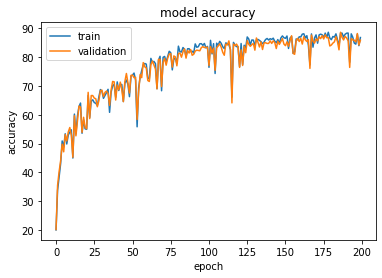

Maximum Train Accuracy : 88.66667175292969
Maximum Validation Accuracy : 88.66667175292969


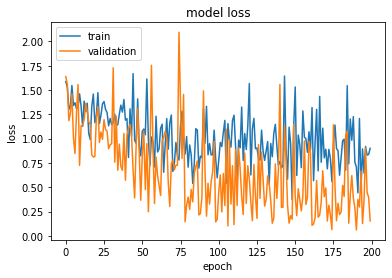

Minimum Train Loss : 0.37254127860069275
Minimum Validation Loss : 0.061394184827804565


In [ ]:
Bacteria_model_phase_RMSprop_00001 = Bact_Net()
Bacteria_model_phase_RMSprop_00001.cuda()
trainer_RMSprop_phase_00001 = trainer(Bacteria_model_phase_RMSprop_00001, phase_train_loader,"RMSprop", epoch_size=200, learning_rate=0.0001)
trainer_RMSprop_phase_00001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_RMSprop_phase_00001.history['train_acc'])
plt.plot(trainer_RMSprop_phase_00001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_RMSprop_phase_00001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_RMSprop_phase_00001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_RMSprop_phase_00001.history['train_loss'])
plt.plot(trainer_RMSprop_phase_00001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_RMSprop_phase_00001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_RMSprop_phase_00001.history['val_loss'])}")

# Phase_Adam

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 20.361113


  0%|          | 1/200 [00:10<34:43, 10.47s/it]

Val Acc | Epoch 1/200 | ACC 18.555555
Train Acc | Epoch 2/200 | ACC 19.750000


  1%|          | 2/200 [00:20<33:54, 10.28s/it]

Val Acc | Epoch 2/200 | ACC 21.000000
Train Acc | Epoch 3/200 | ACC 20.361113


  2%|▏         | 3/200 [00:30<32:50, 10.00s/it]

Val Acc | Epoch 3/200 | ACC 18.555555
Train Acc | Epoch 4/200 | ACC 20.166666


  2%|▏         | 4/200 [00:40<32:24,  9.92s/it]

Val Acc | Epoch 4/200 | ACC 19.333334
Train Acc | Epoch 5/200 | ACC 20.361113


  2%|▎         | 5/200 [00:50<32:30, 10.00s/it]

Val Acc | Epoch 5/200 | ACC 18.555555
Train Acc | Epoch 6/200 | ACC 19.750000


  3%|▎         | 6/200 [01:00<32:39, 10.10s/it]

Val Acc | Epoch 6/200 | ACC 21.000000
Train Acc | Epoch 7/200 | ACC 20.361113


  4%|▎         | 7/200 [01:10<32:25, 10.08s/it]

Val Acc | Epoch 7/200 | ACC 18.555555
Train Acc | Epoch 8/200 | ACC 20.361113


  4%|▍         | 8/200 [01:20<31:56,  9.98s/it]

Val Acc | Epoch 8/200 | ACC 18.555555
Train Acc | Epoch 9/200 | ACC 19.750000


  4%|▍         | 9/200 [01:30<31:48,  9.99s/it]

Val Acc | Epoch 9/200 | ACC 21.000000
Train Acc | Epoch 10/200 | ACC 19.972223


  5%|▌         | 10/200 [01:40<31:36,  9.98s/it]

Val Acc | Epoch 10/200 | ACC 20.111113
Train Acc | Epoch 11/200 | ACC 20.166666


  6%|▌         | 11/200 [01:50<31:19,  9.94s/it]

Val Acc | Epoch 11/200 | ACC 19.333334
Train Acc | Epoch 12/200 | ACC 20.361113


  6%|▌         | 12/200 [02:00<31:16,  9.98s/it]

Val Acc | Epoch 12/200 | ACC 18.555555
Train Acc | Epoch 13/200 | ACC 19.972223


  6%|▋         | 13/200 [02:10<31:23, 10.07s/it]

Val Acc | Epoch 13/200 | ACC 20.111113
Train Acc | Epoch 14/200 | ACC 19.750000


  7%|▋         | 14/200 [02:20<31:13, 10.07s/it]

Val Acc | Epoch 14/200 | ACC 21.000000
Train Acc | Epoch 15/200 | ACC 20.361113


  8%|▊         | 15/200 [02:30<31:06, 10.09s/it]

Val Acc | Epoch 15/200 | ACC 18.555555
Train Acc | Epoch 16/200 | ACC 20.361113


  8%|▊         | 16/200 [02:40<30:59, 10.11s/it]

Val Acc | Epoch 16/200 | ACC 18.555555
Train Acc | Epoch 17/200 | ACC 19.972223


  8%|▊         | 17/200 [02:50<30:44, 10.08s/it]

Val Acc | Epoch 17/200 | ACC 20.111113
Train Acc | Epoch 18/200 | ACC 20.166666


  9%|▉         | 18/200 [03:00<30:36, 10.09s/it]

Val Acc | Epoch 18/200 | ACC 19.333334
Train Acc | Epoch 19/200 | ACC 20.361113


 10%|▉         | 19/200 [03:10<30:15, 10.03s/it]

Val Acc | Epoch 19/200 | ACC 18.555555
Train Acc | Epoch 20/200 | ACC 20.361113


 10%|█         | 20/200 [03:20<30:01, 10.01s/it]

Val Acc | Epoch 20/200 | ACC 18.555555
Train Acc | Epoch 21/200 | ACC 20.166666


 10%|█         | 21/200 [03:31<30:15, 10.14s/it]

Val Acc | Epoch 21/200 | ACC 19.333334
Train Acc | Epoch 22/200 | ACC 20.166666


 11%|█         | 22/200 [03:41<30:26, 10.26s/it]

Val Acc | Epoch 22/200 | ACC 19.333334
Train Acc | Epoch 23/200 | ACC 20.166666


 12%|█▏        | 23/200 [03:51<29:59, 10.17s/it]

Val Acc | Epoch 23/200 | ACC 19.333334
Train Acc | Epoch 24/200 | ACC 20.361113


 12%|█▏        | 24/200 [04:02<29:56, 10.21s/it]

Val Acc | Epoch 24/200 | ACC 18.555555
Train Acc | Epoch 25/200 | ACC 20.361113


 12%|█▎        | 25/200 [04:12<29:38, 10.16s/it]

Val Acc | Epoch 25/200 | ACC 18.555555
Train Acc | Epoch 26/200 | ACC 20.166666


 13%|█▎        | 26/200 [04:22<29:21, 10.13s/it]

Val Acc | Epoch 26/200 | ACC 19.333334
Train Acc | Epoch 27/200 | ACC 20.361113


 14%|█▎        | 27/200 [04:32<29:07, 10.10s/it]

Val Acc | Epoch 27/200 | ACC 18.555555
Train Acc | Epoch 28/200 | ACC 20.166666


 14%|█▍        | 28/200 [04:42<28:53, 10.08s/it]

Val Acc | Epoch 28/200 | ACC 19.333334
Train Acc | Epoch 29/200 | ACC 19.972223


 14%|█▍        | 29/200 [04:52<28:40, 10.06s/it]

Val Acc | Epoch 29/200 | ACC 20.111113
Train Acc | Epoch 30/200 | ACC 19.972223


 15%|█▌        | 30/200 [05:01<28:12,  9.96s/it]

Val Acc | Epoch 30/200 | ACC 20.111113
Train Acc | Epoch 31/200 | ACC 19.972223


 16%|█▌        | 31/200 [05:11<27:54,  9.91s/it]

Val Acc | Epoch 31/200 | ACC 20.111113
Train Acc | Epoch 32/200 | ACC 19.750000


 16%|█▌        | 32/200 [05:21<27:58,  9.99s/it]

Val Acc | Epoch 32/200 | ACC 21.000000
Train Acc | Epoch 33/200 | ACC 19.750000


 16%|█▋        | 33/200 [05:31<27:45,  9.97s/it]

Val Acc | Epoch 33/200 | ACC 21.000000
Train Acc | Epoch 34/200 | ACC 19.972223


 17%|█▋        | 34/200 [05:41<27:39, 10.00s/it]

Val Acc | Epoch 34/200 | ACC 20.111113
Train Acc | Epoch 35/200 | ACC 20.361113


 18%|█▊        | 35/200 [05:51<27:30, 10.00s/it]

Val Acc | Epoch 35/200 | ACC 18.555555
Train Acc | Epoch 36/200 | ACC 19.750000


 18%|█▊        | 36/200 [06:01<27:17,  9.98s/it]

Val Acc | Epoch 36/200 | ACC 21.000000
Train Acc | Epoch 37/200 | ACC 20.166666


 18%|█▊        | 37/200 [06:12<27:13, 10.02s/it]

Val Acc | Epoch 37/200 | ACC 19.333334
Train Acc | Epoch 38/200 | ACC 20.166666


 19%|█▉        | 38/200 [06:21<27:00, 10.00s/it]

Val Acc | Epoch 38/200 | ACC 19.333334
Train Acc | Epoch 39/200 | ACC 20.361113


 20%|█▉        | 39/200 [06:32<27:02, 10.08s/it]

Val Acc | Epoch 39/200 | ACC 18.555555
Train Acc | Epoch 40/200 | ACC 19.750000


 20%|██        | 40/200 [06:42<26:48, 10.05s/it]

Val Acc | Epoch 40/200 | ACC 21.000000
Train Acc | Epoch 41/200 | ACC 20.166666


 20%|██        | 41/200 [06:52<26:40, 10.07s/it]

Val Acc | Epoch 41/200 | ACC 19.333334
Train Acc | Epoch 42/200 | ACC 19.750000


 21%|██        | 42/200 [07:02<26:25, 10.04s/it]

Val Acc | Epoch 42/200 | ACC 21.000000
Train Acc | Epoch 43/200 | ACC 19.750000


 22%|██▏       | 43/200 [07:12<26:06,  9.98s/it]

Val Acc | Epoch 43/200 | ACC 21.000000
Train Acc | Epoch 44/200 | ACC 19.972223


 22%|██▏       | 44/200 [07:22<25:58,  9.99s/it]

Val Acc | Epoch 44/200 | ACC 20.111113
Train Acc | Epoch 45/200 | ACC 20.361113


 22%|██▎       | 45/200 [07:32<25:48,  9.99s/it]

Val Acc | Epoch 45/200 | ACC 18.555555
Train Acc | Epoch 46/200 | ACC 19.750000


 23%|██▎       | 46/200 [07:42<25:43, 10.02s/it]

Val Acc | Epoch 46/200 | ACC 21.000000
Train Acc | Epoch 47/200 | ACC 20.361113


 24%|██▎       | 47/200 [07:52<25:41, 10.08s/it]

Val Acc | Epoch 47/200 | ACC 18.555555
Train Acc | Epoch 48/200 | ACC 19.750000


 24%|██▍       | 48/200 [08:02<25:40, 10.13s/it]

Val Acc | Epoch 48/200 | ACC 21.000000
Train Acc | Epoch 49/200 | ACC 19.750000


 24%|██▍       | 49/200 [08:12<25:28, 10.12s/it]

Val Acc | Epoch 49/200 | ACC 21.000000
Train Acc | Epoch 50/200 | ACC 20.361113


 25%|██▌       | 50/200 [08:22<25:17, 10.12s/it]

Val Acc | Epoch 50/200 | ACC 18.555555
Train Acc | Epoch 51/200 | ACC 19.750000


 26%|██▌       | 51/200 [08:32<24:54, 10.03s/it]

Val Acc | Epoch 51/200 | ACC 21.000000
Train Acc | Epoch 52/200 | ACC 20.166666


 26%|██▌       | 52/200 [08:43<25:03, 10.16s/it]

Val Acc | Epoch 52/200 | ACC 19.333334
Train Acc | Epoch 53/200 | ACC 19.972223


 26%|██▋       | 53/200 [08:53<25:06, 10.25s/it]

Val Acc | Epoch 53/200 | ACC 20.111113
Train Acc | Epoch 54/200 | ACC 20.166666


 27%|██▋       | 54/200 [09:03<24:46, 10.18s/it]

Val Acc | Epoch 54/200 | ACC 19.333334
Train Acc | Epoch 55/200 | ACC 19.750000


 28%|██▊       | 55/200 [09:13<24:34, 10.17s/it]

Val Acc | Epoch 55/200 | ACC 21.000000
Train Acc | Epoch 56/200 | ACC 19.750000


 28%|██▊       | 56/200 [09:24<24:26, 10.18s/it]

Val Acc | Epoch 56/200 | ACC 21.000000
Train Acc | Epoch 57/200 | ACC 19.972223


 28%|██▊       | 57/200 [09:34<24:21, 10.22s/it]

Val Acc | Epoch 57/200 | ACC 20.111113
Train Acc | Epoch 58/200 | ACC 19.750000


 29%|██▉       | 58/200 [09:44<24:07, 10.20s/it]

Val Acc | Epoch 58/200 | ACC 21.000000
Train Acc | Epoch 59/200 | ACC 20.361113


 30%|██▉       | 59/200 [09:54<23:47, 10.13s/it]

Val Acc | Epoch 59/200 | ACC 18.555555
Train Acc | Epoch 60/200 | ACC 19.750000


 30%|███       | 60/200 [10:04<23:27, 10.06s/it]

Val Acc | Epoch 60/200 | ACC 21.000000
Train Acc | Epoch 61/200 | ACC 19.750000


 30%|███       | 61/200 [10:14<23:15, 10.04s/it]

Val Acc | Epoch 61/200 | ACC 21.000000
Train Acc | Epoch 62/200 | ACC 20.361113


 31%|███       | 62/200 [10:24<22:59, 10.00s/it]

Val Acc | Epoch 62/200 | ACC 18.555555
Train Acc | Epoch 63/200 | ACC 19.750000


 32%|███▏      | 63/200 [10:34<22:54, 10.03s/it]

Val Acc | Epoch 63/200 | ACC 21.000000
Train Acc | Epoch 64/200 | ACC 20.166666


 32%|███▏      | 64/200 [10:44<22:51, 10.08s/it]

Val Acc | Epoch 64/200 | ACC 19.333334
Train Acc | Epoch 65/200 | ACC 20.361113


 32%|███▎      | 65/200 [10:54<22:40, 10.08s/it]

Val Acc | Epoch 65/200 | ACC 18.555555
Train Acc | Epoch 66/200 | ACC 20.361113


 33%|███▎      | 66/200 [11:04<22:35, 10.11s/it]

Val Acc | Epoch 66/200 | ACC 18.555555
Train Acc | Epoch 67/200 | ACC 19.750000


 34%|███▎      | 67/200 [11:14<22:20, 10.08s/it]

Val Acc | Epoch 67/200 | ACC 21.000000
Train Acc | Epoch 68/200 | ACC 20.361113


 34%|███▍      | 68/200 [11:24<22:12, 10.10s/it]

Val Acc | Epoch 68/200 | ACC 18.555555
Train Acc | Epoch 69/200 | ACC 19.750000


 34%|███▍      | 69/200 [11:35<22:09, 10.15s/it]

Val Acc | Epoch 69/200 | ACC 21.000000
Train Acc | Epoch 70/200 | ACC 20.166666


 35%|███▌      | 70/200 [11:45<21:59, 10.15s/it]

Val Acc | Epoch 70/200 | ACC 19.333334
Train Acc | Epoch 71/200 | ACC 19.972223


 36%|███▌      | 71/200 [11:55<21:47, 10.14s/it]

Val Acc | Epoch 71/200 | ACC 20.111113
Train Acc | Epoch 72/200 | ACC 19.972223


 36%|███▌      | 72/200 [12:05<21:44, 10.20s/it]

Val Acc | Epoch 72/200 | ACC 20.111113
Train Acc | Epoch 73/200 | ACC 20.361113


 36%|███▋      | 73/200 [12:16<21:37, 10.21s/it]

Val Acc | Epoch 73/200 | ACC 18.555555
Train Acc | Epoch 74/200 | ACC 19.972223


 37%|███▋      | 74/200 [12:25<21:15, 10.12s/it]

Val Acc | Epoch 74/200 | ACC 20.111113
Train Acc | Epoch 75/200 | ACC 20.361113


 38%|███▊      | 75/200 [12:35<20:57, 10.06s/it]

Val Acc | Epoch 75/200 | ACC 18.555555
Train Acc | Epoch 76/200 | ACC 20.361113


 38%|███▊      | 76/200 [12:46<20:49, 10.08s/it]

Val Acc | Epoch 76/200 | ACC 18.555555
Train Acc | Epoch 77/200 | ACC 19.750000


 38%|███▊      | 77/200 [12:56<20:38, 10.07s/it]

Val Acc | Epoch 77/200 | ACC 21.000000
Train Acc | Epoch 78/200 | ACC 20.361113


 39%|███▉      | 78/200 [13:06<20:28, 10.07s/it]

Val Acc | Epoch 78/200 | ACC 18.555555
Train Acc | Epoch 79/200 | ACC 20.361113


 40%|███▉      | 79/200 [13:16<20:20, 10.09s/it]

Val Acc | Epoch 79/200 | ACC 18.555555
Train Acc | Epoch 80/200 | ACC 20.361113


 40%|████      | 80/200 [13:26<20:05, 10.04s/it]

Val Acc | Epoch 80/200 | ACC 18.555555
Train Acc | Epoch 81/200 | ACC 20.166666


 40%|████      | 81/200 [13:36<20:02, 10.10s/it]

Val Acc | Epoch 81/200 | ACC 19.333334
Train Acc | Epoch 82/200 | ACC 20.361113


 41%|████      | 82/200 [13:46<19:54, 10.13s/it]

Val Acc | Epoch 82/200 | ACC 18.555555
Train Acc | Epoch 83/200 | ACC 19.750000


 42%|████▏     | 83/200 [13:57<20:03, 10.28s/it]

Val Acc | Epoch 83/200 | ACC 21.000000
Train Acc | Epoch 84/200 | ACC 20.361113


 42%|████▏     | 84/200 [14:07<19:53, 10.29s/it]

Val Acc | Epoch 84/200 | ACC 18.555555
Train Acc | Epoch 85/200 | ACC 20.166666


 42%|████▎     | 85/200 [14:17<19:38, 10.24s/it]

Val Acc | Epoch 85/200 | ACC 19.333334
Train Acc | Epoch 86/200 | ACC 19.750000


 43%|████▎     | 86/200 [14:27<19:26, 10.23s/it]

Val Acc | Epoch 86/200 | ACC 21.000000
Train Acc | Epoch 87/200 | ACC 19.750000


 44%|████▎     | 87/200 [14:38<19:13, 10.21s/it]

Val Acc | Epoch 87/200 | ACC 21.000000
Train Acc | Epoch 88/200 | ACC 19.750000


 44%|████▍     | 88/200 [14:48<19:06, 10.24s/it]

Val Acc | Epoch 88/200 | ACC 21.000000
Train Acc | Epoch 89/200 | ACC 19.972223


 44%|████▍     | 89/200 [14:58<18:46, 10.15s/it]

Val Acc | Epoch 89/200 | ACC 20.111113
Train Acc | Epoch 90/200 | ACC 19.972223


 45%|████▌     | 90/200 [15:08<18:26, 10.06s/it]

Val Acc | Epoch 90/200 | ACC 20.111113
Train Acc | Epoch 91/200 | ACC 20.166666


 46%|████▌     | 91/200 [15:17<18:07,  9.98s/it]

Val Acc | Epoch 91/200 | ACC 19.333334
Train Acc | Epoch 92/200 | ACC 19.750000


 46%|████▌     | 92/200 [15:27<17:54,  9.95s/it]

Val Acc | Epoch 92/200 | ACC 21.000000
Train Acc | Epoch 93/200 | ACC 19.972223


 46%|████▋     | 93/200 [15:37<17:41,  9.92s/it]

Val Acc | Epoch 93/200 | ACC 20.111113
Train Acc | Epoch 94/200 | ACC 20.361113


 47%|████▋     | 94/200 [15:47<17:42, 10.02s/it]

Val Acc | Epoch 94/200 | ACC 18.555555
Train Acc | Epoch 95/200 | ACC 19.750000


 48%|████▊     | 95/200 [15:58<17:37, 10.07s/it]

Val Acc | Epoch 95/200 | ACC 21.000000
Train Acc | Epoch 96/200 | ACC 19.750000


 48%|████▊     | 96/200 [16:08<17:33, 10.13s/it]

Val Acc | Epoch 96/200 | ACC 21.000000
Train Acc | Epoch 97/200 | ACC 19.972223


 48%|████▊     | 97/200 [16:18<17:14, 10.05s/it]

Val Acc | Epoch 97/200 | ACC 20.111113
Train Acc | Epoch 98/200 | ACC 19.750000


 49%|████▉     | 98/200 [16:28<17:04, 10.05s/it]

Val Acc | Epoch 98/200 | ACC 21.000000
Train Acc | Epoch 99/200 | ACC 20.361113


 50%|████▉     | 99/200 [16:38<16:46,  9.96s/it]

Val Acc | Epoch 99/200 | ACC 18.555555
Train Acc | Epoch 100/200 | ACC 20.166666


 50%|█████     | 100/200 [16:47<16:33,  9.94s/it]

Val Acc | Epoch 100/200 | ACC 19.333334
Train Acc | Epoch 101/200 | ACC 20.361113


 50%|█████     | 101/200 [16:58<16:27,  9.98s/it]

Val Acc | Epoch 101/200 | ACC 18.555555
Train Acc | Epoch 102/200 | ACC 19.750000


 51%|█████     | 102/200 [17:07<16:15,  9.95s/it]

Val Acc | Epoch 102/200 | ACC 21.000000
Train Acc | Epoch 103/200 | ACC 20.361113


 52%|█████▏    | 103/200 [17:18<16:11, 10.02s/it]

Val Acc | Epoch 103/200 | ACC 18.555555
Train Acc | Epoch 104/200 | ACC 20.166666


 52%|█████▏    | 104/200 [17:28<16:05, 10.05s/it]

Val Acc | Epoch 104/200 | ACC 19.333334
Train Acc | Epoch 105/200 | ACC 19.750000


 52%|█████▎    | 105/200 [17:38<15:56, 10.07s/it]

Val Acc | Epoch 105/200 | ACC 21.000000
Train Acc | Epoch 106/200 | ACC 20.361113


 53%|█████▎    | 106/200 [17:48<15:43, 10.03s/it]

Val Acc | Epoch 106/200 | ACC 18.555555
Train Acc | Epoch 107/200 | ACC 19.750000


 54%|█████▎    | 107/200 [17:58<15:27,  9.97s/it]

Val Acc | Epoch 107/200 | ACC 21.000000
Train Acc | Epoch 108/200 | ACC 20.361113


 54%|█████▍    | 108/200 [18:08<15:18,  9.99s/it]

Val Acc | Epoch 108/200 | ACC 18.555555
Train Acc | Epoch 109/200 | ACC 19.972223


 55%|█████▍    | 109/200 [18:18<15:06,  9.96s/it]

Val Acc | Epoch 109/200 | ACC 20.111113
Train Acc | Epoch 110/200 | ACC 20.361113


 55%|█████▌    | 110/200 [18:27<14:55,  9.96s/it]

Val Acc | Epoch 110/200 | ACC 18.555555
Train Acc | Epoch 111/200 | ACC 19.750000


 56%|█████▌    | 111/200 [18:38<14:48,  9.99s/it]

Val Acc | Epoch 111/200 | ACC 21.000000
Train Acc | Epoch 112/200 | ACC 20.361113


 56%|█████▌    | 112/200 [18:48<14:44, 10.05s/it]

Val Acc | Epoch 112/200 | ACC 18.555555
Train Acc | Epoch 113/200 | ACC 20.361113


 56%|█████▋    | 113/200 [18:58<14:40, 10.12s/it]

Val Acc | Epoch 113/200 | ACC 18.555555
Train Acc | Epoch 114/200 | ACC 19.750000


 57%|█████▋    | 114/200 [19:09<14:47, 10.32s/it]

Val Acc | Epoch 114/200 | ACC 21.000000
Train Acc | Epoch 115/200 | ACC 20.166666


 57%|█████▊    | 115/200 [19:19<14:26, 10.20s/it]

Val Acc | Epoch 115/200 | ACC 19.333334
Train Acc | Epoch 116/200 | ACC 20.361113


 58%|█████▊    | 116/200 [19:29<14:07, 10.09s/it]

Val Acc | Epoch 116/200 | ACC 18.555555
Train Acc | Epoch 117/200 | ACC 20.166666


 58%|█████▊    | 117/200 [19:38<13:52, 10.03s/it]

Val Acc | Epoch 117/200 | ACC 19.333334
Train Acc | Epoch 118/200 | ACC 20.166666


 59%|█████▉    | 118/200 [19:49<13:46, 10.08s/it]

Val Acc | Epoch 118/200 | ACC 19.333334
Train Acc | Epoch 119/200 | ACC 19.972223


 60%|█████▉    | 119/200 [19:59<13:41, 10.15s/it]

Val Acc | Epoch 119/200 | ACC 20.111113
Train Acc | Epoch 120/200 | ACC 19.972223


 60%|██████    | 120/200 [20:09<13:27, 10.10s/it]

Val Acc | Epoch 120/200 | ACC 20.111113
Train Acc | Epoch 121/200 | ACC 20.361113


 60%|██████    | 121/200 [20:19<13:18, 10.11s/it]

Val Acc | Epoch 121/200 | ACC 18.555555
Train Acc | Epoch 122/200 | ACC 19.972223


 61%|██████    | 122/200 [20:29<13:07, 10.10s/it]

Val Acc | Epoch 122/200 | ACC 20.111113
Train Acc | Epoch 123/200 | ACC 19.972223


 62%|██████▏   | 123/200 [20:39<12:58, 10.11s/it]

Val Acc | Epoch 123/200 | ACC 20.111113
Train Acc | Epoch 124/200 | ACC 19.750000


 62%|██████▏   | 124/200 [20:49<12:44, 10.05s/it]

Val Acc | Epoch 124/200 | ACC 21.000000
Train Acc | Epoch 125/200 | ACC 20.166666


 62%|██████▎   | 125/200 [20:59<12:31, 10.03s/it]

Val Acc | Epoch 125/200 | ACC 19.333334
Train Acc | Epoch 126/200 | ACC 20.166666


 63%|██████▎   | 126/200 [21:09<12:18,  9.98s/it]

Val Acc | Epoch 126/200 | ACC 19.333334
Train Acc | Epoch 127/200 | ACC 20.166666


 64%|██████▎   | 127/200 [21:19<12:06,  9.95s/it]

Val Acc | Epoch 127/200 | ACC 19.333334
Train Acc | Epoch 128/200 | ACC 20.166666


 64%|██████▍   | 128/200 [21:29<11:55,  9.94s/it]

Val Acc | Epoch 128/200 | ACC 19.333334
Train Acc | Epoch 129/200 | ACC 19.750000


 64%|██████▍   | 129/200 [21:39<11:44,  9.93s/it]

Val Acc | Epoch 129/200 | ACC 21.000000
Train Acc | Epoch 130/200 | ACC 20.166666


 65%|██████▌   | 130/200 [21:49<11:42, 10.04s/it]

Val Acc | Epoch 130/200 | ACC 19.333334
Train Acc | Epoch 131/200 | ACC 20.361113


 66%|██████▌   | 131/200 [21:59<11:32, 10.04s/it]

Val Acc | Epoch 131/200 | ACC 18.555555
Train Acc | Epoch 132/200 | ACC 20.166666


 66%|██████▌   | 132/200 [22:09<11:19,  9.99s/it]

Val Acc | Epoch 132/200 | ACC 19.333334
Train Acc | Epoch 133/200 | ACC 20.361113


 66%|██████▋   | 133/200 [22:19<11:11, 10.02s/it]

Val Acc | Epoch 133/200 | ACC 18.555555
Train Acc | Epoch 134/200 | ACC 19.972223


 67%|██████▋   | 134/200 [22:29<11:01, 10.02s/it]

Val Acc | Epoch 134/200 | ACC 20.111113
Train Acc | Epoch 135/200 | ACC 20.361113


 68%|██████▊   | 135/200 [22:39<10:53, 10.05s/it]

Val Acc | Epoch 135/200 | ACC 18.555555
Train Acc | Epoch 136/200 | ACC 20.361113


 68%|██████▊   | 136/200 [22:49<10:44, 10.07s/it]

Val Acc | Epoch 136/200 | ACC 18.555555
Train Acc | Epoch 137/200 | ACC 20.361113


 68%|██████▊   | 137/200 [22:59<10:34, 10.07s/it]

Val Acc | Epoch 137/200 | ACC 18.555555
Train Acc | Epoch 138/200 | ACC 19.972223


 69%|██████▉   | 138/200 [23:10<10:26, 10.11s/it]

Val Acc | Epoch 138/200 | ACC 20.111113
Train Acc | Epoch 139/200 | ACC 19.750000


 70%|██████▉   | 139/200 [23:20<10:16, 10.10s/it]

Val Acc | Epoch 139/200 | ACC 21.000000
Train Acc | Epoch 140/200 | ACC 19.972223


 70%|███████   | 140/200 [23:30<10:03, 10.06s/it]

Val Acc | Epoch 140/200 | ACC 20.111113
Train Acc | Epoch 141/200 | ACC 20.361113


 70%|███████   | 141/200 [23:40<09:54, 10.08s/it]

Val Acc | Epoch 141/200 | ACC 18.555555
Train Acc | Epoch 142/200 | ACC 20.361113


 71%|███████   | 142/200 [23:50<09:42, 10.04s/it]

Val Acc | Epoch 142/200 | ACC 18.555555
Train Acc | Epoch 143/200 | ACC 19.972223


 72%|███████▏  | 143/200 [24:00<09:35, 10.09s/it]

Val Acc | Epoch 143/200 | ACC 20.111113
Train Acc | Epoch 144/200 | ACC 20.361113


 72%|███████▏  | 144/200 [24:11<09:34, 10.26s/it]

Val Acc | Epoch 144/200 | ACC 18.555555
Train Acc | Epoch 145/200 | ACC 20.166666


 72%|███████▎  | 145/200 [24:21<09:28, 10.33s/it]

Val Acc | Epoch 145/200 | ACC 19.333334
Train Acc | Epoch 146/200 | ACC 20.166666


 73%|███████▎  | 146/200 [24:31<09:14, 10.27s/it]

Val Acc | Epoch 146/200 | ACC 19.333334
Train Acc | Epoch 147/200 | ACC 20.166666


 74%|███████▎  | 147/200 [24:41<09:02, 10.25s/it]

Val Acc | Epoch 147/200 | ACC 19.333334
Train Acc | Epoch 148/200 | ACC 20.361113


 74%|███████▍  | 148/200 [24:52<08:52, 10.24s/it]

Val Acc | Epoch 148/200 | ACC 18.555555
Train Acc | Epoch 149/200 | ACC 20.361113


 74%|███████▍  | 149/200 [25:02<08:40, 10.21s/it]

Val Acc | Epoch 149/200 | ACC 18.555555
Train Acc | Epoch 150/200 | ACC 20.166666


 75%|███████▌  | 150/200 [25:12<08:26, 10.12s/it]

Val Acc | Epoch 150/200 | ACC 19.333334
Train Acc | Epoch 151/200 | ACC 20.166666


 76%|███████▌  | 151/200 [25:22<08:15, 10.12s/it]

Val Acc | Epoch 151/200 | ACC 19.333334
Train Acc | Epoch 152/200 | ACC 20.166666


 76%|███████▌  | 152/200 [25:32<08:04, 10.08s/it]

Val Acc | Epoch 152/200 | ACC 19.333334
Train Acc | Epoch 153/200 | ACC 20.361113


 76%|███████▋  | 153/200 [25:42<07:51, 10.03s/it]

Val Acc | Epoch 153/200 | ACC 18.555555
Train Acc | Epoch 154/200 | ACC 20.166666


 77%|███████▋  | 154/200 [25:52<07:41, 10.02s/it]

Val Acc | Epoch 154/200 | ACC 19.333334
Train Acc | Epoch 155/200 | ACC 19.972223


 78%|███████▊  | 155/200 [26:01<07:28,  9.96s/it]

Val Acc | Epoch 155/200 | ACC 20.111113
Train Acc | Epoch 156/200 | ACC 20.166666


 78%|███████▊  | 156/200 [26:12<07:19,  9.98s/it]

Val Acc | Epoch 156/200 | ACC 19.333334
Train Acc | Epoch 157/200 | ACC 20.361113


 78%|███████▊  | 157/200 [26:22<07:11, 10.04s/it]

Val Acc | Epoch 157/200 | ACC 18.555555
Train Acc | Epoch 158/200 | ACC 20.166666


 79%|███████▉  | 158/200 [26:31<06:58,  9.95s/it]

Val Acc | Epoch 158/200 | ACC 19.333334
Train Acc | Epoch 159/200 | ACC 20.166666


 80%|███████▉  | 159/200 [26:42<06:50, 10.02s/it]

Val Acc | Epoch 159/200 | ACC 19.333334
Train Acc | Epoch 160/200 | ACC 19.972223


 80%|████████  | 160/200 [26:52<06:42, 10.07s/it]

Val Acc | Epoch 160/200 | ACC 20.111113
Train Acc | Epoch 161/200 | ACC 19.750000


 80%|████████  | 161/200 [27:02<06:34, 10.12s/it]

Val Acc | Epoch 161/200 | ACC 21.000000
Train Acc | Epoch 162/200 | ACC 19.972223


 81%|████████  | 162/200 [27:13<06:29, 10.25s/it]

Val Acc | Epoch 162/200 | ACC 20.111113
Train Acc | Epoch 163/200 | ACC 19.972223


 82%|████████▏ | 163/200 [27:22<06:15, 10.15s/it]

Val Acc | Epoch 163/200 | ACC 20.111113
Train Acc | Epoch 164/200 | ACC 19.972223


 82%|████████▏ | 164/200 [27:32<06:00, 10.02s/it]

Val Acc | Epoch 164/200 | ACC 20.111113
Train Acc | Epoch 165/200 | ACC 20.361113


 82%|████████▎ | 165/200 [27:42<05:50, 10.01s/it]

Val Acc | Epoch 165/200 | ACC 18.555555
Train Acc | Epoch 166/200 | ACC 20.166666


 83%|████████▎ | 166/200 [27:52<05:42, 10.08s/it]

Val Acc | Epoch 166/200 | ACC 19.333334
Train Acc | Epoch 167/200 | ACC 19.750000


 84%|████████▎ | 167/200 [28:02<05:31, 10.03s/it]

Val Acc | Epoch 167/200 | ACC 21.000000
Train Acc | Epoch 168/200 | ACC 19.750000


 84%|████████▍ | 168/200 [28:13<05:22, 10.06s/it]

Val Acc | Epoch 168/200 | ACC 21.000000
Train Acc | Epoch 169/200 | ACC 19.750000


 84%|████████▍ | 169/200 [28:23<05:12, 10.10s/it]

Val Acc | Epoch 169/200 | ACC 21.000000
Train Acc | Epoch 170/200 | ACC 19.750000


 85%|████████▌ | 170/200 [28:33<05:02, 10.09s/it]

Val Acc | Epoch 170/200 | ACC 21.000000
Train Acc | Epoch 171/200 | ACC 19.750000


 86%|████████▌ | 171/200 [28:43<04:50, 10.02s/it]

Val Acc | Epoch 171/200 | ACC 21.000000
Train Acc | Epoch 172/200 | ACC 19.750000


 86%|████████▌ | 172/200 [28:53<04:39,  9.99s/it]

Val Acc | Epoch 172/200 | ACC 21.000000
Train Acc | Epoch 173/200 | ACC 20.166666


 86%|████████▋ | 173/200 [29:03<04:29,  9.98s/it]

Val Acc | Epoch 173/200 | ACC 19.333334
Train Acc | Epoch 174/200 | ACC 20.361113


 87%|████████▋ | 174/200 [29:12<04:19,  9.98s/it]

Val Acc | Epoch 174/200 | ACC 18.555555
Train Acc | Epoch 175/200 | ACC 20.361113


 88%|████████▊ | 175/200 [29:23<04:13, 10.13s/it]

Val Acc | Epoch 175/200 | ACC 18.555555
Train Acc | Epoch 176/200 | ACC 19.972223


 88%|████████▊ | 176/200 [29:33<04:05, 10.21s/it]

Val Acc | Epoch 176/200 | ACC 20.111113
Train Acc | Epoch 177/200 | ACC 20.361113


 88%|████████▊ | 177/200 [29:43<03:53, 10.16s/it]

Val Acc | Epoch 177/200 | ACC 18.555555
Train Acc | Epoch 178/200 | ACC 19.750000


 89%|████████▉ | 178/200 [29:54<03:43, 10.15s/it]

Val Acc | Epoch 178/200 | ACC 21.000000
Train Acc | Epoch 179/200 | ACC 20.166666


 90%|████████▉ | 179/200 [30:03<03:31, 10.06s/it]

Val Acc | Epoch 179/200 | ACC 19.333334
Train Acc | Epoch 180/200 | ACC 19.750000


 90%|█████████ | 180/200 [30:13<03:20, 10.05s/it]

Val Acc | Epoch 180/200 | ACC 21.000000
Train Acc | Epoch 181/200 | ACC 19.972223


 90%|█████████ | 181/200 [30:23<03:10, 10.04s/it]

Val Acc | Epoch 181/200 | ACC 20.111113
Train Acc | Epoch 182/200 | ACC 20.361113


 91%|█████████ | 182/200 [30:34<03:01, 10.10s/it]

Val Acc | Epoch 182/200 | ACC 18.555555
Train Acc | Epoch 183/200 | ACC 19.972223


 92%|█████████▏| 183/200 [30:44<02:52, 10.13s/it]

Val Acc | Epoch 183/200 | ACC 20.111113
Train Acc | Epoch 184/200 | ACC 19.972223


 92%|█████████▏| 184/200 [30:54<02:41, 10.08s/it]

Val Acc | Epoch 184/200 | ACC 20.111113
Train Acc | Epoch 185/200 | ACC 19.972223


 92%|█████████▎| 185/200 [31:04<02:31, 10.10s/it]

Val Acc | Epoch 185/200 | ACC 20.111113
Train Acc | Epoch 186/200 | ACC 20.166666


 93%|█████████▎| 186/200 [31:14<02:21, 10.08s/it]

Val Acc | Epoch 186/200 | ACC 19.333334
Train Acc | Epoch 187/200 | ACC 20.166666


 94%|█████████▎| 187/200 [31:24<02:10, 10.00s/it]

Val Acc | Epoch 187/200 | ACC 19.333334
Train Acc | Epoch 188/200 | ACC 19.750000


 94%|█████████▍| 188/200 [31:34<01:59,  9.98s/it]

Val Acc | Epoch 188/200 | ACC 21.000000
Train Acc | Epoch 189/200 | ACC 19.972223


 94%|█████████▍| 189/200 [31:44<01:50, 10.03s/it]

Val Acc | Epoch 189/200 | ACC 20.111113
Train Acc | Epoch 190/200 | ACC 19.750000


 95%|█████████▌| 190/200 [31:54<01:40, 10.08s/it]

Val Acc | Epoch 190/200 | ACC 21.000000
Train Acc | Epoch 191/200 | ACC 19.972223


 96%|█████████▌| 191/200 [32:04<01:31, 10.13s/it]

Val Acc | Epoch 191/200 | ACC 20.111113
Train Acc | Epoch 192/200 | ACC 20.166666


 96%|█████████▌| 192/200 [32:15<01:21, 10.16s/it]

Val Acc | Epoch 192/200 | ACC 19.333334
Train Acc | Epoch 193/200 | ACC 20.166666


 96%|█████████▋| 193/200 [32:25<01:10, 10.13s/it]

Val Acc | Epoch 193/200 | ACC 19.333334
Train Acc | Epoch 194/200 | ACC 19.972223


 97%|█████████▋| 194/200 [32:34<01:00, 10.03s/it]

Val Acc | Epoch 194/200 | ACC 20.111113
Train Acc | Epoch 195/200 | ACC 19.972223


 98%|█████████▊| 195/200 [32:44<00:49,  9.96s/it]

Val Acc | Epoch 195/200 | ACC 20.111113
Train Acc | Epoch 196/200 | ACC 20.361113


 98%|█████████▊| 196/200 [32:54<00:39,  9.91s/it]

Val Acc | Epoch 196/200 | ACC 18.555555
Train Acc | Epoch 197/200 | ACC 20.361113


 98%|█████████▊| 197/200 [33:04<00:29,  9.93s/it]

Val Acc | Epoch 197/200 | ACC 18.555555
Train Acc | Epoch 198/200 | ACC 20.361113


 99%|█████████▉| 198/200 [33:14<00:19,  9.96s/it]

Val Acc | Epoch 198/200 | ACC 18.555555
Train Acc | Epoch 199/200 | ACC 19.972223


100%|█████████▉| 199/200 [33:24<00:09,  9.98s/it]

Val Acc | Epoch 199/200 | ACC 20.111113
Train Acc | Epoch 200/200 | ACC 20.361113


100%|██████████| 200/200 [33:34<00:00, 10.07s/it]

Val Acc | Epoch 200/200 | ACC 18.555555


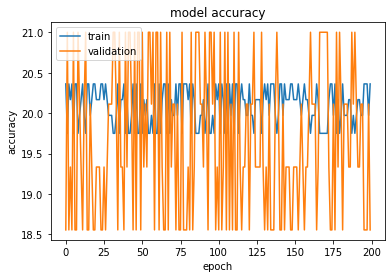

Maximum Train Accuracy : 20.361112594604492
Maximum Validation Accuracy : 21.0


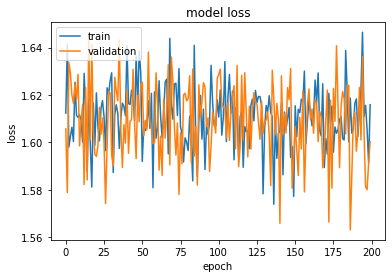

Minimum Train Loss : 1.5739766359329224
Minimum Validation Loss : 1.5631623268127441


In [ ]:
Bacteria_model_phase_Adam_001 = Bact_Net()
Bacteria_model_phase_Adam_001.cuda()
trainer_Adam_phase_001 = trainer(Bacteria_model_phase_Adam_001, phase_train_loader,"Adam", epoch_size=200, learning_rate=0.01)
trainer_Adam_phase_001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adam_phase_001.history['train_acc'])
plt.plot(trainer_Adam_phase_001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adam_phase_001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adam_phase_001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adam_phase_001.history['train_loss'])
plt.plot(trainer_Adam_phase_001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adam_phase_001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adam_phase_001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 35.444443


  0%|          | 1/200 [00:09<33:01,  9.96s/it]

Val Acc | Epoch 1/200 | ACC 38.333336
Train Acc | Epoch 2/200 | ACC 57.166664


  1%|          | 2/200 [00:19<32:56,  9.98s/it]

Val Acc | Epoch 2/200 | ACC 56.555557
Train Acc | Epoch 3/200 | ACC 51.694447


  2%|▏         | 3/200 [00:30<33:00, 10.05s/it]

Val Acc | Epoch 3/200 | ACC 50.000000
Train Acc | Epoch 4/200 | ACC 61.722225


  2%|▏         | 4/200 [00:39<32:19,  9.90s/it]

Val Acc | Epoch 4/200 | ACC 62.111115
Train Acc | Epoch 5/200 | ACC 66.944443


  2%|▎         | 5/200 [00:49<32:11,  9.91s/it]

Val Acc | Epoch 5/200 | ACC 67.222229
Train Acc | Epoch 6/200 | ACC 63.333332


  3%|▎         | 6/200 [01:00<33:04, 10.23s/it]

Val Acc | Epoch 6/200 | ACC 61.444443
Train Acc | Epoch 7/200 | ACC 66.138893


  4%|▎         | 7/200 [01:11<33:18, 10.35s/it]

Val Acc | Epoch 7/200 | ACC 65.000000
Train Acc | Epoch 8/200 | ACC 62.027782


  4%|▍         | 8/200 [01:21<32:39, 10.20s/it]

Val Acc | Epoch 8/200 | ACC 61.666668
Train Acc | Epoch 9/200 | ACC 77.500000


  4%|▍         | 9/200 [01:31<32:25, 10.19s/it]

Val Acc | Epoch 9/200 | ACC 75.111115
Train Acc | Epoch 10/200 | ACC 79.472229


  5%|▌         | 10/200 [01:41<32:08, 10.15s/it]

Val Acc | Epoch 10/200 | ACC 78.555557
Train Acc | Epoch 11/200 | ACC 77.805557


  6%|▌         | 11/200 [01:51<31:41, 10.06s/it]

Val Acc | Epoch 11/200 | ACC 77.555557
Train Acc | Epoch 12/200 | ACC 80.388893


  6%|▌         | 12/200 [02:01<31:32, 10.07s/it]

Val Acc | Epoch 12/200 | ACC 79.666672
Train Acc | Epoch 13/200 | ACC 82.388893


  6%|▋         | 13/200 [02:11<31:25, 10.08s/it]

Val Acc | Epoch 13/200 | ACC 82.888885
Train Acc | Epoch 14/200 | ACC 81.166664


  7%|▋         | 14/200 [02:21<31:20, 10.11s/it]

Val Acc | Epoch 14/200 | ACC 80.333336
Train Acc | Epoch 15/200 | ACC 77.666672


  8%|▊         | 15/200 [02:31<31:09, 10.10s/it]

Val Acc | Epoch 15/200 | ACC 76.888885
Train Acc | Epoch 16/200 | ACC 82.666672


  8%|▊         | 16/200 [02:41<30:56, 10.09s/it]

Val Acc | Epoch 16/200 | ACC 81.222221
Train Acc | Epoch 17/200 | ACC 82.555557


  8%|▊         | 17/200 [02:51<30:36, 10.03s/it]

Val Acc | Epoch 17/200 | ACC 81.444450
Train Acc | Epoch 18/200 | ACC 80.444450


  9%|▉         | 18/200 [03:01<30:17,  9.99s/it]

Val Acc | Epoch 18/200 | ACC 79.555557
Train Acc | Epoch 19/200 | ACC 82.361115


 10%|▉         | 19/200 [03:11<30:15, 10.03s/it]

Val Acc | Epoch 19/200 | ACC 80.777779
Train Acc | Epoch 20/200 | ACC 83.611115


 10%|█         | 20/200 [03:21<29:55,  9.98s/it]

Val Acc | Epoch 20/200 | ACC 81.888893
Train Acc | Epoch 21/200 | ACC 81.388893


 10%|█         | 21/200 [03:31<29:50, 10.01s/it]

Val Acc | Epoch 21/200 | ACC 79.666672
Train Acc | Epoch 22/200 | ACC 83.361115


 11%|█         | 22/200 [03:41<29:39, 10.00s/it]

Val Acc | Epoch 22/200 | ACC 83.333336
Train Acc | Epoch 23/200 | ACC 82.944450


 12%|█▏        | 23/200 [03:51<29:27,  9.99s/it]

Val Acc | Epoch 23/200 | ACC 81.777779
Train Acc | Epoch 24/200 | ACC 84.277779


 12%|█▏        | 24/200 [04:01<29:21, 10.01s/it]

Val Acc | Epoch 24/200 | ACC 82.444450
Train Acc | Epoch 25/200 | ACC 82.722221


 12%|█▎        | 25/200 [04:11<29:19, 10.05s/it]

Val Acc | Epoch 25/200 | ACC 80.555557
Train Acc | Epoch 26/200 | ACC 83.638885


 13%|█▎        | 26/200 [04:21<29:23, 10.14s/it]

Val Acc | Epoch 26/200 | ACC 81.333336
Train Acc | Epoch 27/200 | ACC 81.111115


 14%|█▎        | 27/200 [04:31<29:04, 10.08s/it]

Val Acc | Epoch 27/200 | ACC 80.333336
Train Acc | Epoch 28/200 | ACC 84.611115


 14%|█▍        | 28/200 [04:41<28:34,  9.97s/it]

Val Acc | Epoch 28/200 | ACC 82.888885
Train Acc | Epoch 29/200 | ACC 84.388893


 14%|█▍        | 29/200 [04:51<28:35, 10.03s/it]

Val Acc | Epoch 29/200 | ACC 82.222221
Train Acc | Epoch 30/200 | ACC 81.722221


 15%|█▌        | 30/200 [05:01<28:29, 10.06s/it]

Val Acc | Epoch 30/200 | ACC 80.111107
Train Acc | Epoch 31/200 | ACC 85.527779


 16%|█▌        | 31/200 [05:12<28:23, 10.08s/it]

Val Acc | Epoch 31/200 | ACC 85.000000
Train Acc | Epoch 32/200 | ACC 85.027779


 16%|█▌        | 32/200 [05:22<28:15, 10.09s/it]

Val Acc | Epoch 32/200 | ACC 84.888893
Train Acc | Epoch 33/200 | ACC 85.444443


 16%|█▋        | 33/200 [05:32<28:03, 10.08s/it]

Val Acc | Epoch 33/200 | ACC 84.222221
Train Acc | Epoch 34/200 | ACC 84.666672


 17%|█▋        | 34/200 [05:42<27:52, 10.07s/it]

Val Acc | Epoch 34/200 | ACC 82.000000
Train Acc | Epoch 35/200 | ACC 83.194443


 18%|█▊        | 35/200 [05:52<27:28,  9.99s/it]

Val Acc | Epoch 35/200 | ACC 81.222221
Train Acc | Epoch 36/200 | ACC 83.750000


 18%|█▊        | 36/200 [06:01<27:04,  9.91s/it]

Val Acc | Epoch 36/200 | ACC 79.777779
Train Acc | Epoch 37/200 | ACC 85.000000


 18%|█▊        | 37/200 [06:12<27:34, 10.15s/it]

Val Acc | Epoch 37/200 | ACC 83.777779
Train Acc | Epoch 38/200 | ACC 82.416672


 19%|█▉        | 38/200 [06:22<27:35, 10.22s/it]

Val Acc | Epoch 38/200 | ACC 81.888893
Train Acc | Epoch 39/200 | ACC 84.500000


 20%|█▉        | 39/200 [06:33<27:25, 10.22s/it]

Val Acc | Epoch 39/200 | ACC 82.888885
Train Acc | Epoch 40/200 | ACC 84.777779


 20%|██        | 40/200 [06:42<26:59, 10.12s/it]

Val Acc | Epoch 40/200 | ACC 83.333336
Train Acc | Epoch 41/200 | ACC 85.166672


 20%|██        | 41/200 [06:52<26:41, 10.07s/it]

Val Acc | Epoch 41/200 | ACC 83.111115
Train Acc | Epoch 42/200 | ACC 86.833336


 21%|██        | 42/200 [07:02<26:29, 10.06s/it]

Val Acc | Epoch 42/200 | ACC 85.333336
Train Acc | Epoch 43/200 | ACC 86.722221


 22%|██▏       | 43/200 [07:12<26:14, 10.03s/it]

Val Acc | Epoch 43/200 | ACC 84.555557
Train Acc | Epoch 44/200 | ACC 86.083336


 22%|██▏       | 44/200 [07:22<26:03, 10.02s/it]

Val Acc | Epoch 44/200 | ACC 84.000000
Train Acc | Epoch 45/200 | ACC 85.416672


 22%|██▎       | 45/200 [07:33<26:01, 10.08s/it]

Val Acc | Epoch 45/200 | ACC 86.000000
Train Acc | Epoch 46/200 | ACC 86.888893


 23%|██▎       | 46/200 [07:43<25:43, 10.02s/it]

Val Acc | Epoch 46/200 | ACC 86.111107
Train Acc | Epoch 47/200 | ACC 87.222221


 24%|██▎       | 47/200 [07:53<25:31, 10.01s/it]

Val Acc | Epoch 47/200 | ACC 85.444443
Train Acc | Epoch 48/200 | ACC 86.194443


 24%|██▍       | 48/200 [08:02<25:16,  9.97s/it]

Val Acc | Epoch 48/200 | ACC 85.666672
Train Acc | Epoch 49/200 | ACC 86.916664


 24%|██▍       | 49/200 [08:12<25:07,  9.98s/it]

Val Acc | Epoch 49/200 | ACC 86.111107
Train Acc | Epoch 50/200 | ACC 85.777779


 25%|██▌       | 50/200 [08:22<24:54,  9.97s/it]

Val Acc | Epoch 50/200 | ACC 84.333336
Train Acc | Epoch 51/200 | ACC 83.888885


 26%|██▌       | 51/200 [08:32<24:46,  9.98s/it]

Val Acc | Epoch 51/200 | ACC 83.000008
Train Acc | Epoch 52/200 | ACC 86.638893


 26%|██▌       | 52/200 [08:42<24:25,  9.90s/it]

Val Acc | Epoch 52/200 | ACC 85.333336
Train Acc | Epoch 53/200 | ACC 87.416664


 26%|██▋       | 53/200 [08:52<24:25,  9.97s/it]

Val Acc | Epoch 53/200 | ACC 86.555557
Train Acc | Epoch 54/200 | ACC 84.944443


 27%|██▋       | 54/200 [09:02<24:16,  9.98s/it]

Val Acc | Epoch 54/200 | ACC 84.111115
Train Acc | Epoch 55/200 | ACC 86.361115


 28%|██▊       | 55/200 [09:12<24:15, 10.04s/it]

Val Acc | Epoch 55/200 | ACC 85.444443
Train Acc | Epoch 56/200 | ACC 86.888893


 28%|██▊       | 56/200 [09:22<24:01, 10.01s/it]

Val Acc | Epoch 56/200 | ACC 84.888893
Train Acc | Epoch 57/200 | ACC 87.972221


 28%|██▊       | 57/200 [09:32<23:48,  9.99s/it]

Val Acc | Epoch 57/200 | ACC 86.333336
Train Acc | Epoch 58/200 | ACC 88.805557


 29%|██▉       | 58/200 [09:42<23:40, 10.01s/it]

Val Acc | Epoch 58/200 | ACC 86.222229
Train Acc | Epoch 59/200 | ACC 86.055557


 30%|██▉       | 59/200 [09:52<23:30, 10.00s/it]

Val Acc | Epoch 59/200 | ACC 85.111115
Train Acc | Epoch 60/200 | ACC 87.750000


 30%|███       | 60/200 [10:02<23:14,  9.96s/it]

Val Acc | Epoch 60/200 | ACC 84.666672
Train Acc | Epoch 61/200 | ACC 88.666672


 30%|███       | 61/200 [10:12<23:12, 10.02s/it]

Val Acc | Epoch 61/200 | ACC 86.777786
Train Acc | Epoch 62/200 | ACC 88.527779


 31%|███       | 62/200 [10:23<23:10, 10.08s/it]

Val Acc | Epoch 62/200 | ACC 87.777779
Train Acc | Epoch 63/200 | ACC 88.722221


 32%|███▏      | 63/200 [10:33<23:06, 10.12s/it]

Val Acc | Epoch 63/200 | ACC 87.111115
Train Acc | Epoch 64/200 | ACC 88.222221


 32%|███▏      | 64/200 [10:43<22:55, 10.11s/it]

Val Acc | Epoch 64/200 | ACC 86.888893
Train Acc | Epoch 65/200 | ACC 87.083336


 32%|███▎      | 65/200 [10:53<22:52, 10.17s/it]

Val Acc | Epoch 65/200 | ACC 86.222229
Train Acc | Epoch 66/200 | ACC 87.805557


 33%|███▎      | 66/200 [11:03<22:34, 10.11s/it]

Val Acc | Epoch 66/200 | ACC 88.666672
Train Acc | Epoch 67/200 | ACC 88.361115


 34%|███▎      | 67/200 [11:13<22:26, 10.13s/it]

Val Acc | Epoch 67/200 | ACC 86.111107
Train Acc | Epoch 68/200 | ACC 87.611115


 34%|███▍      | 68/200 [11:24<22:37, 10.28s/it]

Val Acc | Epoch 68/200 | ACC 85.888893
Train Acc | Epoch 69/200 | ACC 87.777779


 34%|███▍      | 69/200 [11:34<22:25, 10.27s/it]

Val Acc | Epoch 69/200 | ACC 86.888893
Train Acc | Epoch 70/200 | ACC 83.833336


 35%|███▌      | 70/200 [11:44<22:08, 10.22s/it]

Val Acc | Epoch 70/200 | ACC 84.000000
Train Acc | Epoch 71/200 | ACC 89.333336


 36%|███▌      | 71/200 [11:54<21:58, 10.22s/it]

Val Acc | Epoch 71/200 | ACC 87.888893
Train Acc | Epoch 72/200 | ACC 88.166664


 36%|███▌      | 72/200 [12:04<21:36, 10.13s/it]

Val Acc | Epoch 72/200 | ACC 85.555557
Train Acc | Epoch 73/200 | ACC 87.861115


 36%|███▋      | 73/200 [12:15<21:26, 10.13s/it]

Val Acc | Epoch 73/200 | ACC 84.555557
Train Acc | Epoch 74/200 | ACC 88.805557


 37%|███▋      | 74/200 [12:25<21:19, 10.15s/it]

Val Acc | Epoch 74/200 | ACC 87.888893
Train Acc | Epoch 75/200 | ACC 87.916664


 38%|███▊      | 75/200 [12:35<21:09, 10.16s/it]

Val Acc | Epoch 75/200 | ACC 87.777779
Train Acc | Epoch 76/200 | ACC 86.194443


 38%|███▊      | 76/200 [12:45<20:50, 10.08s/it]

Val Acc | Epoch 76/200 | ACC 85.777779
Train Acc | Epoch 77/200 | ACC 87.611115


 38%|███▊      | 77/200 [12:55<20:46, 10.14s/it]

Val Acc | Epoch 77/200 | ACC 85.444443
Train Acc | Epoch 78/200 | ACC 89.083336


 39%|███▉      | 78/200 [13:05<20:40, 10.17s/it]

Val Acc | Epoch 78/200 | ACC 88.222221
Train Acc | Epoch 79/200 | ACC 88.944450


 40%|███▉      | 79/200 [13:16<20:32, 10.19s/it]

Val Acc | Epoch 79/200 | ACC 87.666664
Train Acc | Epoch 80/200 | ACC 89.305557


 40%|████      | 80/200 [13:26<20:15, 10.13s/it]

Val Acc | Epoch 80/200 | ACC 88.333336
Train Acc | Epoch 81/200 | ACC 89.472221


 40%|████      | 81/200 [13:36<20:03, 10.12s/it]

Val Acc | Epoch 81/200 | ACC 88.000000
Train Acc | Epoch 82/200 | ACC 88.777779


 41%|████      | 82/200 [13:46<20:06, 10.22s/it]

Val Acc | Epoch 82/200 | ACC 87.555557
Train Acc | Epoch 83/200 | ACC 89.777779


 42%|████▏     | 83/200 [13:56<19:39, 10.08s/it]

Val Acc | Epoch 83/200 | ACC 88.000000
Train Acc | Epoch 84/200 | ACC 87.472221


 42%|████▏     | 84/200 [14:06<19:20, 10.00s/it]

Val Acc | Epoch 84/200 | ACC 87.111115
Train Acc | Epoch 85/200 | ACC 89.111115


 42%|████▎     | 85/200 [14:16<19:13, 10.03s/it]

Val Acc | Epoch 85/200 | ACC 86.888893
Train Acc | Epoch 86/200 | ACC 89.388885


 43%|████▎     | 86/200 [14:26<19:13, 10.12s/it]

Val Acc | Epoch 86/200 | ACC 87.444450
Train Acc | Epoch 87/200 | ACC 89.083336


 44%|████▎     | 87/200 [14:36<19:05, 10.14s/it]

Val Acc | Epoch 87/200 | ACC 86.666664
Train Acc | Epoch 88/200 | ACC 86.055557


 44%|████▍     | 88/200 [14:46<18:57, 10.16s/it]

Val Acc | Epoch 88/200 | ACC 84.888893
Train Acc | Epoch 89/200 | ACC 89.055557


 44%|████▍     | 89/200 [14:56<18:42, 10.11s/it]

Val Acc | Epoch 89/200 | ACC 86.777786
Train Acc | Epoch 90/200 | ACC 88.055557


 45%|████▌     | 90/200 [15:07<18:33, 10.13s/it]

Val Acc | Epoch 90/200 | ACC 87.777779
Train Acc | Epoch 91/200 | ACC 86.694450


 46%|████▌     | 91/200 [15:17<18:17, 10.07s/it]

Val Acc | Epoch 91/200 | ACC 85.555557
Train Acc | Epoch 92/200 | ACC 88.166664


 46%|████▌     | 92/200 [15:26<17:57,  9.97s/it]

Val Acc | Epoch 92/200 | ACC 86.333336
Train Acc | Epoch 93/200 | ACC 88.583336


 46%|████▋     | 93/200 [15:37<17:59, 10.08s/it]

Val Acc | Epoch 93/200 | ACC 87.333336
Train Acc | Epoch 94/200 | ACC 89.916672


 47%|████▋     | 94/200 [15:47<17:59, 10.18s/it]

Val Acc | Epoch 94/200 | ACC 87.888893
Train Acc | Epoch 95/200 | ACC 88.555557


 48%|████▊     | 95/200 [15:57<17:45, 10.15s/it]

Val Acc | Epoch 95/200 | ACC 86.333336
Train Acc | Epoch 96/200 | ACC 88.611115


 48%|████▊     | 96/200 [16:07<17:27, 10.07s/it]

Val Acc | Epoch 96/200 | ACC 87.222221
Train Acc | Epoch 97/200 | ACC 88.638893


 48%|████▊     | 97/200 [16:17<17:23, 10.13s/it]

Val Acc | Epoch 97/200 | ACC 87.444450
Train Acc | Epoch 98/200 | ACC 89.138885


 49%|████▉     | 98/200 [16:28<17:32, 10.32s/it]

Val Acc | Epoch 98/200 | ACC 88.000000
Train Acc | Epoch 99/200 | ACC 88.472221


 50%|████▉     | 99/200 [16:39<17:27, 10.37s/it]

Val Acc | Epoch 99/200 | ACC 87.666664
Train Acc | Epoch 100/200 | ACC 88.944450


 50%|█████     | 100/200 [16:48<16:58, 10.19s/it]

Val Acc | Epoch 100/200 | ACC 87.444450
Train Acc | Epoch 101/200 | ACC 88.888893


 50%|█████     | 101/200 [16:58<16:44, 10.15s/it]

Val Acc | Epoch 101/200 | ACC 86.777786
Train Acc | Epoch 102/200 | ACC 89.416672


 51%|█████     | 102/200 [17:08<16:27, 10.08s/it]

Val Acc | Epoch 102/200 | ACC 87.000000
Train Acc | Epoch 103/200 | ACC 89.833336


 52%|█████▏    | 103/200 [17:19<16:22, 10.13s/it]

Val Acc | Epoch 103/200 | ACC 87.444450
Train Acc | Epoch 104/200 | ACC 88.972221


 52%|█████▏    | 104/200 [17:28<16:06, 10.06s/it]

Val Acc | Epoch 104/200 | ACC 87.111115
Train Acc | Epoch 105/200 | ACC 86.055557


 52%|█████▎    | 105/200 [17:38<15:55, 10.06s/it]

Val Acc | Epoch 105/200 | ACC 84.555557
Train Acc | Epoch 106/200 | ACC 89.000008


 53%|█████▎    | 106/200 [17:48<15:44, 10.04s/it]

Val Acc | Epoch 106/200 | ACC 87.888893
Train Acc | Epoch 107/200 | ACC 87.777779


 54%|█████▎    | 107/200 [17:58<15:31, 10.01s/it]

Val Acc | Epoch 107/200 | ACC 86.111107
Train Acc | Epoch 108/200 | ACC 90.000000


 54%|█████▍    | 108/200 [18:08<15:15,  9.95s/it]

Val Acc | Epoch 108/200 | ACC 86.888893
Train Acc | Epoch 109/200 | ACC 89.777779


 55%|█████▍    | 109/200 [18:18<15:10, 10.00s/it]

Val Acc | Epoch 109/200 | ACC 89.000008
Train Acc | Epoch 110/200 | ACC 89.694443


 55%|█████▌    | 110/200 [18:29<15:05, 10.06s/it]

Val Acc | Epoch 110/200 | ACC 88.333336
Train Acc | Epoch 111/200 | ACC 89.583336


 56%|█████▌    | 111/200 [18:39<14:57, 10.09s/it]

Val Acc | Epoch 111/200 | ACC 86.555557
Train Acc | Epoch 112/200 | ACC 90.083336


 56%|█████▌    | 112/200 [18:49<14:45, 10.06s/it]

Val Acc | Epoch 112/200 | ACC 88.777779
Train Acc | Epoch 113/200 | ACC 89.583336


 56%|█████▋    | 113/200 [18:59<14:34, 10.05s/it]

Val Acc | Epoch 113/200 | ACC 86.888893
Train Acc | Epoch 114/200 | ACC 89.472221


 57%|█████▋    | 114/200 [19:09<14:25, 10.07s/it]

Val Acc | Epoch 114/200 | ACC 87.222221
Train Acc | Epoch 115/200 | ACC 90.111115


 57%|█████▊    | 115/200 [19:19<14:08,  9.99s/it]

Val Acc | Epoch 115/200 | ACC 87.555557
Train Acc | Epoch 116/200 | ACC 90.138885


 58%|█████▊    | 116/200 [19:28<13:55,  9.94s/it]

Val Acc | Epoch 116/200 | ACC 87.666664
Train Acc | Epoch 117/200 | ACC 89.138885


 58%|█████▊    | 117/200 [19:39<13:54, 10.06s/it]

Val Acc | Epoch 117/200 | ACC 87.666664
Train Acc | Epoch 118/200 | ACC 89.055557


 59%|█████▉    | 118/200 [19:49<13:44, 10.06s/it]

Val Acc | Epoch 118/200 | ACC 89.111115
Train Acc | Epoch 119/200 | ACC 90.500000


 60%|█████▉    | 119/200 [19:59<13:36, 10.08s/it]

Val Acc | Epoch 119/200 | ACC 88.000000
Train Acc | Epoch 120/200 | ACC 90.222221


 60%|██████    | 120/200 [20:09<13:32, 10.16s/it]

Val Acc | Epoch 120/200 | ACC 88.444450
Train Acc | Epoch 121/200 | ACC 89.472221


 60%|██████    | 121/200 [20:19<13:18, 10.10s/it]

Val Acc | Epoch 121/200 | ACC 87.777779
Train Acc | Epoch 122/200 | ACC 90.138885


 61%|██████    | 122/200 [20:29<13:06, 10.09s/it]

Val Acc | Epoch 122/200 | ACC 87.555557
Train Acc | Epoch 123/200 | ACC 87.250000


 62%|██████▏   | 123/200 [20:39<12:55, 10.07s/it]

Val Acc | Epoch 123/200 | ACC 86.111107
Train Acc | Epoch 124/200 | ACC 89.833336


 62%|██████▏   | 124/200 [20:49<12:43, 10.05s/it]

Val Acc | Epoch 124/200 | ACC 87.333336
Train Acc | Epoch 125/200 | ACC 90.611115


 62%|██████▎   | 125/200 [20:59<12:34, 10.05s/it]

Val Acc | Epoch 125/200 | ACC 88.666672
Train Acc | Epoch 126/200 | ACC 89.055557


 63%|██████▎   | 126/200 [21:10<12:26, 10.09s/it]

Val Acc | Epoch 126/200 | ACC 87.777779
Train Acc | Epoch 127/200 | ACC 89.527779


 64%|██████▎   | 127/200 [21:20<12:18, 10.12s/it]

Val Acc | Epoch 127/200 | ACC 87.555557
Train Acc | Epoch 128/200 | ACC 89.250008


 64%|██████▍   | 128/200 [21:30<12:09, 10.13s/it]

Val Acc | Epoch 128/200 | ACC 87.222221
Train Acc | Epoch 129/200 | ACC 89.916672


 64%|██████▍   | 129/200 [21:41<12:11, 10.31s/it]

Val Acc | Epoch 129/200 | ACC 88.222221
Train Acc | Epoch 130/200 | ACC 90.777779


 65%|██████▌   | 130/200 [21:51<11:59, 10.27s/it]

Val Acc | Epoch 130/200 | ACC 87.666664
Train Acc | Epoch 131/200 | ACC 89.972221


 66%|██████▌   | 131/200 [22:01<11:40, 10.15s/it]

Val Acc | Epoch 131/200 | ACC 88.222221
Train Acc | Epoch 132/200 | ACC 90.194443


 66%|██████▌   | 132/200 [22:11<11:28, 10.13s/it]

Val Acc | Epoch 132/200 | ACC 87.444450
Train Acc | Epoch 133/200 | ACC 89.666672


 66%|██████▋   | 133/200 [22:21<11:17, 10.11s/it]

Val Acc | Epoch 133/200 | ACC 89.111115
Train Acc | Epoch 134/200 | ACC 90.611115


 67%|██████▋   | 134/200 [22:31<11:04, 10.06s/it]

Val Acc | Epoch 134/200 | ACC 88.111115
Train Acc | Epoch 135/200 | ACC 89.472221


 68%|██████▊   | 135/200 [22:41<10:54, 10.08s/it]

Val Acc | Epoch 135/200 | ACC 87.000000
Train Acc | Epoch 136/200 | ACC 88.027779


 68%|██████▊   | 136/200 [22:51<10:43, 10.05s/it]

Val Acc | Epoch 136/200 | ACC 87.444450
Train Acc | Epoch 137/200 | ACC 89.027779


 68%|██████▊   | 137/200 [23:01<10:38, 10.14s/it]

Val Acc | Epoch 137/200 | ACC 87.333336
Train Acc | Epoch 138/200 | ACC 89.750000


 69%|██████▉   | 138/200 [23:11<10:25, 10.10s/it]

Val Acc | Epoch 138/200 | ACC 88.666672
Train Acc | Epoch 139/200 | ACC 90.027779


 70%|██████▉   | 139/200 [23:21<10:13, 10.06s/it]

Val Acc | Epoch 139/200 | ACC 89.222221
Train Acc | Epoch 140/200 | ACC 90.527779


 70%|███████   | 140/200 [23:31<10:01, 10.03s/it]

Val Acc | Epoch 140/200 | ACC 88.222221
Train Acc | Epoch 141/200 | ACC 89.111115


 70%|███████   | 141/200 [23:41<09:55, 10.09s/it]

Val Acc | Epoch 141/200 | ACC 87.333336
Train Acc | Epoch 142/200 | ACC 90.388885


 71%|███████   | 142/200 [23:51<09:42, 10.04s/it]

Val Acc | Epoch 142/200 | ACC 88.333336
Train Acc | Epoch 143/200 | ACC 89.555557


 72%|███████▏  | 143/200 [24:01<09:32, 10.05s/it]

Val Acc | Epoch 143/200 | ACC 88.444450
Train Acc | Epoch 144/200 | ACC 90.500000


 72%|███████▏  | 144/200 [24:11<09:20, 10.00s/it]

Val Acc | Epoch 144/200 | ACC 89.000008
Train Acc | Epoch 145/200 | ACC 90.722229


 72%|███████▎  | 145/200 [24:21<09:10, 10.00s/it]

Val Acc | Epoch 145/200 | ACC 88.111115
Train Acc | Epoch 146/200 | ACC 87.500000


 73%|███████▎  | 146/200 [24:31<09:00, 10.01s/it]

Val Acc | Epoch 146/200 | ACC 86.444450
Train Acc | Epoch 147/200 | ACC 90.944443


 74%|███████▎  | 147/200 [24:41<08:51, 10.03s/it]

Val Acc | Epoch 147/200 | ACC 88.111115
Train Acc | Epoch 148/200 | ACC 90.722229


 74%|███████▍  | 148/200 [24:51<08:40, 10.00s/it]

Val Acc | Epoch 148/200 | ACC 88.111115
Train Acc | Epoch 149/200 | ACC 90.638893


 74%|███████▍  | 149/200 [25:02<08:31, 10.04s/it]

Val Acc | Epoch 149/200 | ACC 88.111115
Train Acc | Epoch 150/200 | ACC 90.083336


 75%|███████▌  | 150/200 [25:12<08:23, 10.07s/it]

Val Acc | Epoch 150/200 | ACC 88.777779
Train Acc | Epoch 151/200 | ACC 90.527779


 76%|███████▌  | 151/200 [25:22<08:13, 10.06s/it]

Val Acc | Epoch 151/200 | ACC 88.555557
Train Acc | Epoch 152/200 | ACC 89.361115


 76%|███████▌  | 152/200 [25:32<08:02, 10.06s/it]

Val Acc | Epoch 152/200 | ACC 87.888893
Train Acc | Epoch 153/200 | ACC 89.944443


 76%|███████▋  | 153/200 [25:42<07:51, 10.03s/it]

Val Acc | Epoch 153/200 | ACC 87.222221
Train Acc | Epoch 154/200 | ACC 89.777779


 77%|███████▋  | 154/200 [25:52<07:42, 10.05s/it]

Val Acc | Epoch 154/200 | ACC 87.111115
Train Acc | Epoch 155/200 | ACC 90.388885


 78%|███████▊  | 155/200 [26:02<07:32, 10.05s/it]

Val Acc | Epoch 155/200 | ACC 89.555557
Train Acc | Epoch 156/200 | ACC 89.861115


 78%|███████▊  | 156/200 [26:12<07:20, 10.01s/it]

Val Acc | Epoch 156/200 | ACC 87.222221
Train Acc | Epoch 157/200 | ACC 90.333336


 78%|███████▊  | 157/200 [26:22<07:14, 10.11s/it]

Val Acc | Epoch 157/200 | ACC 88.888893
Train Acc | Epoch 158/200 | ACC 88.805557


 79%|███████▉  | 158/200 [26:32<07:04, 10.11s/it]

Val Acc | Epoch 158/200 | ACC 88.000000
Train Acc | Epoch 159/200 | ACC 91.194443


 80%|███████▉  | 159/200 [26:42<06:56, 10.15s/it]

Val Acc | Epoch 159/200 | ACC 89.333336
Train Acc | Epoch 160/200 | ACC 90.222221


 80%|████████  | 160/200 [26:53<06:52, 10.32s/it]

Val Acc | Epoch 160/200 | ACC 88.555557
Train Acc | Epoch 161/200 | ACC 91.166672


 80%|████████  | 161/200 [27:04<06:43, 10.34s/it]

Val Acc | Epoch 161/200 | ACC 89.111115
Train Acc | Epoch 162/200 | ACC 91.611115


 81%|████████  | 162/200 [27:14<06:28, 10.23s/it]

Val Acc | Epoch 162/200 | ACC 89.666672
Train Acc | Epoch 163/200 | ACC 91.055557


 82%|████████▏ | 163/200 [27:24<06:16, 10.17s/it]

Val Acc | Epoch 163/200 | ACC 89.888885
Train Acc | Epoch 164/200 | ACC 91.388893


 82%|████████▏ | 164/200 [27:33<06:01, 10.05s/it]

Val Acc | Epoch 164/200 | ACC 89.777779
Train Acc | Epoch 165/200 | ACC 89.166672


 82%|████████▎ | 165/200 [27:43<05:50, 10.00s/it]

Val Acc | Epoch 165/200 | ACC 88.000000
Train Acc | Epoch 166/200 | ACC 89.805557


 83%|████████▎ | 166/200 [27:53<05:39,  9.97s/it]

Val Acc | Epoch 166/200 | ACC 88.555557
Train Acc | Epoch 167/200 | ACC 84.916672


 84%|████████▎ | 167/200 [28:03<05:29, 10.00s/it]

Val Acc | Epoch 167/200 | ACC 82.777779
Train Acc | Epoch 168/200 | ACC 91.388893


 84%|████████▍ | 168/200 [28:13<05:21, 10.05s/it]

Val Acc | Epoch 168/200 | ACC 88.666672
Train Acc | Epoch 169/200 | ACC 90.750000


 84%|████████▍ | 169/200 [28:23<05:10, 10.01s/it]

Val Acc | Epoch 169/200 | ACC 88.888893
Train Acc | Epoch 170/200 | ACC 90.694443


 85%|████████▌ | 170/200 [28:33<05:01, 10.06s/it]

Val Acc | Epoch 170/200 | ACC 89.000008
Train Acc | Epoch 171/200 | ACC 90.138885


 86%|████████▌ | 171/200 [28:43<04:49,  9.98s/it]

Val Acc | Epoch 171/200 | ACC 88.555557
Train Acc | Epoch 172/200 | ACC 90.777779


 86%|████████▌ | 172/200 [28:53<04:37,  9.91s/it]

Val Acc | Epoch 172/200 | ACC 89.888885
Train Acc | Epoch 173/200 | ACC 91.472229


 86%|████████▋ | 173/200 [29:03<04:29,  9.98s/it]

Val Acc | Epoch 173/200 | ACC 89.888885
Train Acc | Epoch 174/200 | ACC 90.194443


 87%|████████▋ | 174/200 [29:13<04:19,  9.99s/it]

Val Acc | Epoch 174/200 | ACC 88.222221
Train Acc | Epoch 175/200 | ACC 88.500008


 88%|████████▊ | 175/200 [29:23<04:12, 10.08s/it]

Val Acc | Epoch 175/200 | ACC 85.444443
Train Acc | Epoch 176/200 | ACC 89.750000


 88%|████████▊ | 176/200 [29:34<04:02, 10.09s/it]

Val Acc | Epoch 176/200 | ACC 87.555557
Train Acc | Epoch 177/200 | ACC 90.055557


 88%|████████▊ | 177/200 [29:44<03:51, 10.08s/it]

Val Acc | Epoch 177/200 | ACC 87.000000
Train Acc | Epoch 178/200 | ACC 91.277779


 89%|████████▉ | 178/200 [29:54<03:41, 10.06s/it]

Val Acc | Epoch 178/200 | ACC 89.777779
Train Acc | Epoch 179/200 | ACC 90.888893


 90%|████████▉ | 179/200 [30:04<03:30, 10.00s/it]

Val Acc | Epoch 179/200 | ACC 89.000008
Train Acc | Epoch 180/200 | ACC 90.305557


 90%|█████████ | 180/200 [30:13<03:18,  9.93s/it]

Val Acc | Epoch 180/200 | ACC 88.888893
Train Acc | Epoch 181/200 | ACC 90.555557


 90%|█████████ | 181/200 [30:23<03:10, 10.00s/it]

Val Acc | Epoch 181/200 | ACC 88.444450
Train Acc | Epoch 182/200 | ACC 90.972229


 91%|█████████ | 182/200 [30:33<02:59,  9.97s/it]

Val Acc | Epoch 182/200 | ACC 88.666672
Train Acc | Epoch 183/200 | ACC 91.388893


 92%|█████████▏| 183/200 [30:43<02:49,  9.99s/it]

Val Acc | Epoch 183/200 | ACC 89.111115
Train Acc | Epoch 184/200 | ACC 90.444443


 92%|█████████▏| 184/200 [30:54<02:40, 10.04s/it]

Val Acc | Epoch 184/200 | ACC 88.888893
Train Acc | Epoch 185/200 | ACC 90.944443


 92%|█████████▎| 185/200 [31:04<02:30, 10.02s/it]

Val Acc | Epoch 185/200 | ACC 87.222221
Train Acc | Epoch 186/200 | ACC 88.805557


 93%|█████████▎| 186/200 [31:14<02:21, 10.07s/it]

Val Acc | Epoch 186/200 | ACC 88.444450
Train Acc | Epoch 187/200 | ACC 90.444443


 94%|█████████▎| 187/200 [31:24<02:11, 10.10s/it]

Val Acc | Epoch 187/200 | ACC 88.555557
Train Acc | Epoch 188/200 | ACC 90.444443


 94%|█████████▍| 188/200 [31:34<02:00, 10.01s/it]

Val Acc | Epoch 188/200 | ACC 89.333336
Train Acc | Epoch 189/200 | ACC 89.805557


 94%|█████████▍| 189/200 [31:44<01:50, 10.09s/it]

Val Acc | Epoch 189/200 | ACC 88.111115
Train Acc | Epoch 190/200 | ACC 88.111115


 95%|█████████▌| 190/200 [31:54<01:41, 10.13s/it]

Val Acc | Epoch 190/200 | ACC 86.777786
Train Acc | Epoch 191/200 | ACC 90.833336


 96%|█████████▌| 191/200 [32:05<01:33, 10.37s/it]

Val Acc | Epoch 191/200 | ACC 88.777779
Train Acc | Epoch 192/200 | ACC 90.583336


 96%|█████████▌| 192/200 [32:15<01:22, 10.33s/it]

Val Acc | Epoch 192/200 | ACC 90.333336
Train Acc | Epoch 193/200 | ACC 90.083336


 96%|█████████▋| 193/200 [32:25<01:11, 10.27s/it]

Val Acc | Epoch 193/200 | ACC 88.333336
Train Acc | Epoch 194/200 | ACC 91.138893


 97%|█████████▋| 194/200 [32:36<01:01, 10.20s/it]

Val Acc | Epoch 194/200 | ACC 89.333336
Train Acc | Epoch 195/200 | ACC 90.694443


 98%|█████████▊| 195/200 [32:46<00:50, 10.14s/it]

Val Acc | Epoch 195/200 | ACC 87.444450
Train Acc | Epoch 196/200 | ACC 90.500000


 98%|█████████▊| 196/200 [32:55<00:40, 10.05s/it]

Val Acc | Epoch 196/200 | ACC 89.111115
Train Acc | Epoch 197/200 | ACC 88.972221


 98%|█████████▊| 197/200 [33:05<00:30, 10.04s/it]

Val Acc | Epoch 197/200 | ACC 87.666664
Train Acc | Epoch 198/200 | ACC 89.500008


 99%|█████████▉| 198/200 [33:15<00:20, 10.02s/it]

Val Acc | Epoch 198/200 | ACC 86.888893
Train Acc | Epoch 199/200 | ACC 89.083336


100%|█████████▉| 199/200 [33:26<00:10, 10.06s/it]

Val Acc | Epoch 199/200 | ACC 87.777779
Train Acc | Epoch 200/200 | ACC 91.083336


100%|██████████| 200/200 [33:36<00:00, 10.08s/it]

Val Acc | Epoch 200/200 | ACC 89.222221


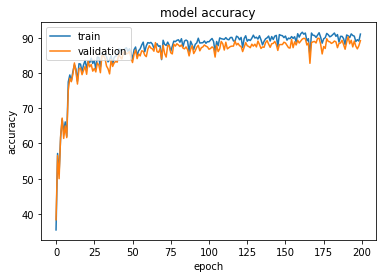

Maximum Train Accuracy : 91.61111450195312
Maximum Validation Accuracy : 90.33333587646484


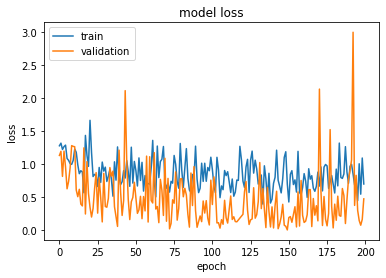

Minimum Train Loss : 0.39518025517463684
Minimum Validation Loss : 0.004146056715399027


In [ ]:
Bacteria_model_phase_Adam_0001 = Bact_Net()
Bacteria_model_phase_Adam_0001.cuda()
trainer_Adam_phase_0001 = trainer(Bacteria_model_phase_Adam_0001, phase_train_loader,"Adam", epoch_size=200, learning_rate=0.001)
trainer_Adam_phase_0001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adam_phase_0001.history['train_acc'])
plt.plot(trainer_Adam_phase_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adam_phase_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adam_phase_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adam_phase_0001.history['train_loss'])
plt.plot(trainer_Adam_phase_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adam_phase_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adam_phase_0001.history['val_loss'])}")

  0%|          | 0/200 [00:00<?, ?it/s]

Train Acc | Epoch 1/200 | ACC 19.972223


  0%|          | 1/200 [00:09<33:09, 10.00s/it]

Val Acc | Epoch 1/200 | ACC 20.111113
Train Acc | Epoch 2/200 | ACC 19.972223


  1%|          | 2/200 [00:20<33:40, 10.20s/it]

Val Acc | Epoch 2/200 | ACC 20.111113
Train Acc | Epoch 3/200 | ACC 43.944447


  2%|▏         | 3/200 [00:30<33:10, 10.10s/it]

Val Acc | Epoch 3/200 | ACC 45.666668
Train Acc | Epoch 4/200 | ACC 50.527782


  2%|▏         | 4/200 [00:40<32:50, 10.05s/it]

Val Acc | Epoch 4/200 | ACC 53.222221
Train Acc | Epoch 5/200 | ACC 47.527779


  2%|▎         | 5/200 [00:50<32:28,  9.99s/it]

Val Acc | Epoch 5/200 | ACC 48.000000
Train Acc | Epoch 6/200 | ACC 54.722225


  3%|▎         | 6/200 [01:00<32:25, 10.03s/it]

Val Acc | Epoch 6/200 | ACC 57.111115
Train Acc | Epoch 7/200 | ACC 57.444447


  4%|▎         | 7/200 [01:10<32:23, 10.07s/it]

Val Acc | Epoch 7/200 | ACC 57.777779
Train Acc | Epoch 8/200 | ACC 57.583332


  4%|▍         | 8/200 [01:20<32:18, 10.10s/it]

Val Acc | Epoch 8/200 | ACC 59.777779
Train Acc | Epoch 9/200 | ACC 59.444447


  4%|▍         | 9/200 [01:30<32:03, 10.07s/it]

Val Acc | Epoch 9/200 | ACC 58.222221
Train Acc | Epoch 10/200 | ACC 56.444447


  5%|▌         | 10/200 [01:40<31:57, 10.09s/it]

Val Acc | Epoch 10/200 | ACC 56.000000
Train Acc | Epoch 11/200 | ACC 62.555557


  6%|▌         | 11/200 [01:50<31:41, 10.06s/it]

Val Acc | Epoch 11/200 | ACC 62.111115
Train Acc | Epoch 12/200 | ACC 62.666668


  6%|▌         | 12/200 [02:00<31:09,  9.94s/it]

Val Acc | Epoch 12/200 | ACC 64.111115
Train Acc | Epoch 13/200 | ACC 63.555557


  6%|▋         | 13/200 [02:10<31:08,  9.99s/it]

Val Acc | Epoch 13/200 | ACC 63.444447
Train Acc | Epoch 14/200 | ACC 64.166672


  7%|▋         | 14/200 [02:20<30:50,  9.95s/it]

Val Acc | Epoch 14/200 | ACC 62.555557
Train Acc | Epoch 15/200 | ACC 61.722225


  8%|▊         | 15/200 [02:30<30:46,  9.98s/it]

Val Acc | Epoch 15/200 | ACC 61.888893
Train Acc | Epoch 16/200 | ACC 66.444443


  8%|▊         | 16/200 [02:40<30:56, 10.09s/it]

Val Acc | Epoch 16/200 | ACC 67.111115
Train Acc | Epoch 17/200 | ACC 67.611107


  8%|▊         | 17/200 [02:50<30:43, 10.08s/it]

Val Acc | Epoch 17/200 | ACC 67.222229
Train Acc | Epoch 18/200 | ACC 67.027779


  9%|▉         | 18/200 [03:00<30:28, 10.05s/it]

Val Acc | Epoch 18/200 | ACC 68.333336
Train Acc | Epoch 19/200 | ACC 66.805557


 10%|▉         | 19/200 [03:10<30:12, 10.01s/it]

Val Acc | Epoch 19/200 | ACC 68.000000
Train Acc | Epoch 20/200 | ACC 67.111115


 10%|█         | 20/200 [03:20<30:01, 10.01s/it]

Val Acc | Epoch 20/200 | ACC 66.444443
Train Acc | Epoch 21/200 | ACC 69.027779


 10%|█         | 21/200 [03:31<30:11, 10.12s/it]

Val Acc | Epoch 21/200 | ACC 69.777779
Train Acc | Epoch 22/200 | ACC 66.527779


 11%|█         | 22/200 [03:41<30:23, 10.25s/it]

Val Acc | Epoch 22/200 | ACC 67.555557
Train Acc | Epoch 23/200 | ACC 69.083336


 12%|█▏        | 23/200 [03:51<30:07, 10.21s/it]

Val Acc | Epoch 23/200 | ACC 70.000000
Train Acc | Epoch 24/200 | ACC 66.388893


 12%|█▏        | 24/200 [04:01<29:36, 10.10s/it]

Val Acc | Epoch 24/200 | ACC 64.666672
Train Acc | Epoch 25/200 | ACC 69.805557


 12%|█▎        | 25/200 [04:11<29:28, 10.11s/it]

Val Acc | Epoch 25/200 | ACC 69.666664
Train Acc | Epoch 26/200 | ACC 71.527779


 13%|█▎        | 26/200 [04:21<29:19, 10.11s/it]

Val Acc | Epoch 26/200 | ACC 69.666664
Train Acc | Epoch 27/200 | ACC 68.444450


 14%|█▎        | 27/200 [04:31<29:07, 10.10s/it]

Val Acc | Epoch 27/200 | ACC 68.888893
Train Acc | Epoch 28/200 | ACC 70.000000


 14%|█▍        | 28/200 [04:41<28:48, 10.05s/it]

Val Acc | Epoch 28/200 | ACC 70.222221
Train Acc | Epoch 29/200 | ACC 71.138885


 14%|█▍        | 29/200 [04:51<28:39, 10.06s/it]

Val Acc | Epoch 29/200 | ACC 69.888893
Train Acc | Epoch 30/200 | ACC 72.416672


 15%|█▌        | 30/200 [05:01<28:26, 10.04s/it]

Val Acc | Epoch 30/200 | ACC 71.333336
Train Acc | Epoch 31/200 | ACC 73.000000


 16%|█▌        | 31/200 [05:11<28:13, 10.02s/it]

Val Acc | Epoch 31/200 | ACC 73.222229
Train Acc | Epoch 32/200 | ACC 71.222221


 16%|█▌        | 32/200 [05:22<28:12, 10.08s/it]

Val Acc | Epoch 32/200 | ACC 71.000000
Train Acc | Epoch 33/200 | ACC 72.138893


 16%|█▋        | 33/200 [05:32<28:03, 10.08s/it]

Val Acc | Epoch 33/200 | ACC 71.222221
Train Acc | Epoch 34/200 | ACC 72.750000


 17%|█▋        | 34/200 [05:42<27:55, 10.09s/it]

Val Acc | Epoch 34/200 | ACC 74.777779
Train Acc | Epoch 35/200 | ACC 75.138893


 18%|█▊        | 35/200 [05:52<27:42, 10.08s/it]

Val Acc | Epoch 35/200 | ACC 72.222229
Train Acc | Epoch 36/200 | ACC 77.027779


 18%|█▊        | 36/200 [06:01<27:08,  9.93s/it]

Val Acc | Epoch 36/200 | ACC 75.000000
Train Acc | Epoch 37/200 | ACC 76.055557


 18%|█▊        | 37/200 [06:12<27:18, 10.05s/it]

Val Acc | Epoch 37/200 | ACC 75.444450
Train Acc | Epoch 38/200 | ACC 73.500000


 19%|█▉        | 38/200 [06:22<27:18, 10.11s/it]

Val Acc | Epoch 38/200 | ACC 73.555557
Train Acc | Epoch 39/200 | ACC 76.861115


 20%|█▉        | 39/200 [06:32<27:02, 10.08s/it]

Val Acc | Epoch 39/200 | ACC 75.777779
Train Acc | Epoch 40/200 | ACC 76.666672


 20%|██        | 40/200 [06:42<26:51, 10.07s/it]

Val Acc | Epoch 40/200 | ACC 75.666664
Train Acc | Epoch 41/200 | ACC 77.777779


 20%|██        | 41/200 [06:52<26:51, 10.14s/it]

Val Acc | Epoch 41/200 | ACC 78.000000
Train Acc | Epoch 42/200 | ACC 76.305557


 21%|██        | 42/200 [07:03<26:51, 10.20s/it]

Val Acc | Epoch 42/200 | ACC 76.111115
Train Acc | Epoch 43/200 | ACC 77.416672


 22%|██▏       | 43/200 [07:13<26:30, 10.13s/it]

Val Acc | Epoch 43/200 | ACC 79.222229
Train Acc | Epoch 44/200 | ACC 78.305557


 22%|██▏       | 44/200 [07:23<26:12, 10.08s/it]

Val Acc | Epoch 44/200 | ACC 77.555557
Train Acc | Epoch 45/200 | ACC 74.611115


 22%|██▎       | 45/200 [07:33<26:11, 10.14s/it]

Val Acc | Epoch 45/200 | ACC 75.444450
Train Acc | Epoch 46/200 | ACC 77.722221


 23%|██▎       | 46/200 [07:43<26:02, 10.15s/it]

Val Acc | Epoch 46/200 | ACC 77.333336
Train Acc | Epoch 47/200 | ACC 80.277786


 24%|██▎       | 47/200 [07:53<25:50, 10.13s/it]

Val Acc | Epoch 47/200 | ACC 77.222221
Train Acc | Epoch 48/200 | ACC 77.527779


 24%|██▍       | 48/200 [08:03<25:43, 10.15s/it]

Val Acc | Epoch 48/200 | ACC 76.888885
Train Acc | Epoch 49/200 | ACC 80.500000


 24%|██▍       | 49/200 [08:14<25:34, 10.16s/it]

Val Acc | Epoch 49/200 | ACC 80.444450
Train Acc | Epoch 50/200 | ACC 75.166664


 25%|██▌       | 50/200 [08:24<25:17, 10.12s/it]

Val Acc | Epoch 50/200 | ACC 74.444450
Train Acc | Epoch 51/200 | ACC 80.055557


 26%|██▌       | 51/200 [08:34<25:06, 10.11s/it]

Val Acc | Epoch 51/200 | ACC 77.666672
Train Acc | Epoch 52/200 | ACC 77.388885


 26%|██▌       | 52/200 [08:44<25:03, 10.16s/it]

Val Acc | Epoch 52/200 | ACC 75.555557
Train Acc | Epoch 53/200 | ACC 81.138893


 26%|██▋       | 53/200 [08:54<25:07, 10.25s/it]

Val Acc | Epoch 53/200 | ACC 80.666664
Train Acc | Epoch 54/200 | ACC 81.500000


 27%|██▋       | 54/200 [09:05<24:56, 10.25s/it]

Val Acc | Epoch 54/200 | ACC 79.333336
Train Acc | Epoch 55/200 | ACC 79.777779


 28%|██▊       | 55/200 [09:15<24:35, 10.18s/it]

Val Acc | Epoch 55/200 | ACC 80.222229
Train Acc | Epoch 56/200 | ACC 80.222229


 28%|██▊       | 56/200 [09:25<24:17, 10.12s/it]

Val Acc | Epoch 56/200 | ACC 79.666672
Train Acc | Epoch 57/200 | ACC 81.638893


 28%|██▊       | 57/200 [09:35<24:09, 10.14s/it]

Val Acc | Epoch 57/200 | ACC 80.777779
Train Acc | Epoch 58/200 | ACC 80.833336


 29%|██▉       | 58/200 [09:45<24:05, 10.18s/it]

Val Acc | Epoch 58/200 | ACC 79.111115
Train Acc | Epoch 59/200 | ACC 80.805557


 30%|██▉       | 59/200 [09:55<23:48, 10.13s/it]

Val Acc | Epoch 59/200 | ACC 79.444443
Train Acc | Epoch 60/200 | ACC 82.111115


 30%|███       | 60/200 [10:05<23:29, 10.07s/it]

Val Acc | Epoch 60/200 | ACC 79.777779
Train Acc | Epoch 61/200 | ACC 82.166664


 30%|███       | 61/200 [10:15<23:28, 10.13s/it]

Val Acc | Epoch 61/200 | ACC 79.222229
Train Acc | Epoch 62/200 | ACC 81.666664


 31%|███       | 62/200 [10:26<23:21, 10.16s/it]

Val Acc | Epoch 62/200 | ACC 81.666664
Train Acc | Epoch 63/200 | ACC 82.222221


 32%|███▏      | 63/200 [10:36<23:15, 10.19s/it]

Val Acc | Epoch 63/200 | ACC 80.444450
Train Acc | Epoch 64/200 | ACC 82.750008


 32%|███▏      | 64/200 [10:46<22:58, 10.13s/it]

Val Acc | Epoch 64/200 | ACC 80.333336
Train Acc | Epoch 65/200 | ACC 81.500000


 32%|███▎      | 65/200 [10:56<22:48, 10.14s/it]

Val Acc | Epoch 65/200 | ACC 80.000000
Train Acc | Epoch 66/200 | ACC 78.888893


 33%|███▎      | 66/200 [11:06<22:34, 10.11s/it]

Val Acc | Epoch 66/200 | ACC 78.666672
Train Acc | Epoch 67/200 | ACC 82.833336


 34%|███▎      | 67/200 [11:16<22:13, 10.03s/it]

Val Acc | Epoch 67/200 | ACC 80.777779
Train Acc | Epoch 68/200 | ACC 82.472221


 34%|███▍      | 68/200 [11:26<21:59, 10.00s/it]

Val Acc | Epoch 68/200 | ACC 81.777779
Train Acc | Epoch 69/200 | ACC 83.305557


 34%|███▍      | 69/200 [11:36<22:05, 10.12s/it]

Val Acc | Epoch 69/200 | ACC 82.333336
Train Acc | Epoch 70/200 | ACC 83.083336


 35%|███▌      | 70/200 [11:46<21:51, 10.09s/it]

Val Acc | Epoch 70/200 | ACC 81.777779
Train Acc | Epoch 71/200 | ACC 84.388893


 36%|███▌      | 71/200 [11:56<21:36, 10.05s/it]

Val Acc | Epoch 71/200 | ACC 81.000000
Train Acc | Epoch 72/200 | ACC 83.722221


 36%|███▌      | 72/200 [12:06<21:34, 10.11s/it]

Val Acc | Epoch 72/200 | ACC 84.000000
Train Acc | Epoch 73/200 | ACC 83.111115


 36%|███▋      | 73/200 [12:16<21:15, 10.04s/it]

Val Acc | Epoch 73/200 | ACC 82.555557
Train Acc | Epoch 74/200 | ACC 83.500000


 37%|███▋      | 74/200 [12:26<21:07, 10.06s/it]

Val Acc | Epoch 74/200 | ACC 82.222221
Train Acc | Epoch 75/200 | ACC 83.611115


 38%|███▊      | 75/200 [12:37<21:06, 10.14s/it]

Val Acc | Epoch 75/200 | ACC 82.555557
Train Acc | Epoch 76/200 | ACC 81.027779


 38%|███▊      | 76/200 [12:47<20:49, 10.07s/it]

Val Acc | Epoch 76/200 | ACC 81.333336
Train Acc | Epoch 77/200 | ACC 84.250000


 38%|███▊      | 77/200 [12:57<20:39, 10.08s/it]

Val Acc | Epoch 77/200 | ACC 83.222221
Train Acc | Epoch 78/200 | ACC 84.027779


 39%|███▉      | 78/200 [13:07<20:28, 10.07s/it]

Val Acc | Epoch 78/200 | ACC 82.777779
Train Acc | Epoch 79/200 | ACC 83.416672


 40%|███▉      | 79/200 [13:17<20:14, 10.04s/it]

Val Acc | Epoch 79/200 | ACC 81.888893
Train Acc | Epoch 80/200 | ACC 83.583336


 40%|████      | 80/200 [13:27<20:09, 10.08s/it]

Val Acc | Epoch 80/200 | ACC 83.222221
Train Acc | Epoch 81/200 | ACC 84.472229


 40%|████      | 81/200 [13:37<20:01, 10.10s/it]

Val Acc | Epoch 81/200 | ACC 82.000000
Train Acc | Epoch 82/200 | ACC 84.138885


 41%|████      | 82/200 [13:47<19:40, 10.00s/it]

Val Acc | Epoch 82/200 | ACC 83.333336
Train Acc | Epoch 83/200 | ACC 84.194443


 42%|████▏     | 83/200 [13:57<19:50, 10.18s/it]

Val Acc | Epoch 83/200 | ACC 82.888885
Train Acc | Epoch 84/200 | ACC 84.166672


 42%|████▏     | 84/200 [14:08<19:49, 10.26s/it]

Val Acc | Epoch 84/200 | ACC 82.777779
Train Acc | Epoch 85/200 | ACC 83.750000


 42%|████▎     | 85/200 [14:18<19:32, 10.19s/it]

Val Acc | Epoch 85/200 | ACC 82.222221
Train Acc | Epoch 86/200 | ACC 83.527779


 43%|████▎     | 86/200 [14:28<19:14, 10.12s/it]

Val Acc | Epoch 86/200 | ACC 82.555557
Train Acc | Epoch 87/200 | ACC 82.833336


 44%|████▎     | 87/200 [14:38<19:08, 10.16s/it]

Val Acc | Epoch 87/200 | ACC 83.000008
Train Acc | Epoch 88/200 | ACC 85.305557


 44%|████▍     | 88/200 [14:48<18:54, 10.13s/it]

Val Acc | Epoch 88/200 | ACC 85.000000
Train Acc | Epoch 89/200 | ACC 85.000000


 44%|████▍     | 89/200 [14:58<18:44, 10.13s/it]

Val Acc | Epoch 89/200 | ACC 84.333336
Train Acc | Epoch 90/200 | ACC 83.361115


 45%|████▌     | 90/200 [15:09<18:37, 10.16s/it]

Val Acc | Epoch 90/200 | ACC 82.333336
Train Acc | Epoch 91/200 | ACC 84.583336


 46%|████▌     | 91/200 [15:19<18:21, 10.11s/it]

Val Acc | Epoch 91/200 | ACC 83.000008
Train Acc | Epoch 92/200 | ACC 85.750000


 46%|████▌     | 92/200 [15:28<17:59,  9.99s/it]

Val Acc | Epoch 92/200 | ACC 84.111115
Train Acc | Epoch 93/200 | ACC 81.416664


 46%|████▋     | 93/200 [15:38<17:53, 10.03s/it]

Val Acc | Epoch 93/200 | ACC 80.777779
Train Acc | Epoch 94/200 | ACC 85.666672


 47%|████▋     | 94/200 [15:49<17:54, 10.14s/it]

Val Acc | Epoch 94/200 | ACC 85.555557
Train Acc | Epoch 95/200 | ACC 84.805557


 48%|████▊     | 95/200 [15:59<17:42, 10.12s/it]

Val Acc | Epoch 95/200 | ACC 86.555557
Train Acc | Epoch 96/200 | ACC 83.777779


 48%|████▊     | 96/200 [16:09<17:34, 10.14s/it]

Val Acc | Epoch 96/200 | ACC 83.222221
Train Acc | Epoch 97/200 | ACC 85.027779


 48%|████▊     | 97/200 [16:19<17:24, 10.15s/it]

Val Acc | Epoch 97/200 | ACC 83.444443
Train Acc | Epoch 98/200 | ACC 84.611115


 49%|████▉     | 98/200 [16:29<17:18, 10.18s/it]

Val Acc | Epoch 98/200 | ACC 84.333336
Train Acc | Epoch 99/200 | ACC 85.583336


 50%|████▉     | 99/200 [16:39<16:58, 10.09s/it]

Val Acc | Epoch 99/200 | ACC 84.666672
Train Acc | Epoch 100/200 | ACC 85.972229


 50%|█████     | 100/200 [16:49<16:37,  9.97s/it]

Val Acc | Epoch 100/200 | ACC 86.333336
Train Acc | Epoch 101/200 | ACC 85.416672


 50%|█████     | 101/200 [16:59<16:31, 10.01s/it]

Val Acc | Epoch 101/200 | ACC 83.555557
Train Acc | Epoch 102/200 | ACC 85.777779


 51%|█████     | 102/200 [17:09<16:16,  9.97s/it]

Val Acc | Epoch 102/200 | ACC 83.444443
Train Acc | Epoch 103/200 | ACC 85.222229


 52%|█████▏    | 103/200 [17:19<16:09,  9.99s/it]

Val Acc | Epoch 103/200 | ACC 85.888893
Train Acc | Epoch 104/200 | ACC 85.111115


 52%|█████▏    | 104/200 [17:29<15:58,  9.98s/it]

Val Acc | Epoch 104/200 | ACC 83.666672
Train Acc | Epoch 105/200 | ACC 86.027779


 52%|█████▎    | 105/200 [17:39<15:54, 10.05s/it]

Val Acc | Epoch 105/200 | ACC 84.333336
Train Acc | Epoch 106/200 | ACC 86.555557


 53%|█████▎    | 106/200 [17:49<15:46, 10.07s/it]

Val Acc | Epoch 106/200 | ACC 85.000000
Train Acc | Epoch 107/200 | ACC 85.805557


 54%|█████▎    | 107/200 [17:59<15:31, 10.01s/it]

Val Acc | Epoch 107/200 | ACC 85.000000
Train Acc | Epoch 108/200 | ACC 83.694443


 54%|█████▍    | 108/200 [18:09<15:13,  9.93s/it]

Val Acc | Epoch 108/200 | ACC 81.888893
Train Acc | Epoch 109/200 | ACC 85.916672


 55%|█████▍    | 109/200 [18:19<15:02,  9.91s/it]

Val Acc | Epoch 109/200 | ACC 84.000000
Train Acc | Epoch 110/200 | ACC 87.833336


 55%|█████▌    | 110/200 [18:29<15:05, 10.06s/it]

Val Acc | Epoch 110/200 | ACC 85.333336
Train Acc | Epoch 111/200 | ACC 86.055557


 56%|█████▌    | 111/200 [18:39<14:56, 10.07s/it]

Val Acc | Epoch 111/200 | ACC 84.333336
Train Acc | Epoch 112/200 | ACC 86.555557


 56%|█████▌    | 112/200 [18:49<14:43, 10.04s/it]

Val Acc | Epoch 112/200 | ACC 86.111107
Train Acc | Epoch 113/200 | ACC 84.888893


 56%|█████▋    | 113/200 [18:59<14:32, 10.03s/it]

Val Acc | Epoch 113/200 | ACC 84.111115
Train Acc | Epoch 114/200 | ACC 86.027779


 57%|█████▋    | 114/200 [19:10<14:41, 10.25s/it]

Val Acc | Epoch 114/200 | ACC 85.777779
Train Acc | Epoch 115/200 | ACC 86.500000


 57%|█████▊    | 115/200 [19:20<14:25, 10.18s/it]

Val Acc | Epoch 115/200 | ACC 85.555557
Train Acc | Epoch 116/200 | ACC 86.333336


 58%|█████▊    | 116/200 [19:30<14:02, 10.03s/it]

Val Acc | Epoch 116/200 | ACC 85.888893
Train Acc | Epoch 117/200 | ACC 87.444450


 58%|█████▊    | 117/200 [19:40<13:55, 10.07s/it]

Val Acc | Epoch 117/200 | ACC 87.333336
Train Acc | Epoch 118/200 | ACC 86.166672


 59%|█████▉    | 118/200 [19:50<13:43, 10.04s/it]

Val Acc | Epoch 118/200 | ACC 86.777786
Train Acc | Epoch 119/200 | ACC 86.416664


 60%|█████▉    | 119/200 [20:00<13:30, 10.00s/it]

Val Acc | Epoch 119/200 | ACC 85.666672
Train Acc | Epoch 120/200 | ACC 86.861115


 60%|██████    | 120/200 [20:10<13:17,  9.97s/it]

Val Acc | Epoch 120/200 | ACC 84.777779
Train Acc | Epoch 121/200 | ACC 87.638893


 60%|██████    | 121/200 [20:20<13:10, 10.00s/it]

Val Acc | Epoch 121/200 | ACC 86.333336
Train Acc | Epoch 122/200 | ACC 86.611115


 61%|██████    | 122/200 [20:30<13:01, 10.02s/it]

Val Acc | Epoch 122/200 | ACC 85.444443
Train Acc | Epoch 123/200 | ACC 87.555557


 62%|██████▏   | 123/200 [20:40<12:54, 10.06s/it]

Val Acc | Epoch 123/200 | ACC 85.777779
Train Acc | Epoch 124/200 | ACC 88.250000


 62%|██████▏   | 124/200 [20:50<12:39, 10.00s/it]

Val Acc | Epoch 124/200 | ACC 88.222221
Train Acc | Epoch 125/200 | ACC 87.222221


 62%|██████▎   | 125/200 [21:00<12:36, 10.08s/it]

Val Acc | Epoch 125/200 | ACC 85.888893
Train Acc | Epoch 126/200 | ACC 87.388893


 63%|██████▎   | 126/200 [21:10<12:31, 10.16s/it]

Val Acc | Epoch 126/200 | ACC 86.000000
Train Acc | Epoch 127/200 | ACC 87.472221


 64%|██████▎   | 127/200 [21:21<12:21, 10.16s/it]

Val Acc | Epoch 127/200 | ACC 86.111107
Train Acc | Epoch 128/200 | ACC 88.111115


 64%|██████▍   | 128/200 [21:31<12:11, 10.16s/it]

Val Acc | Epoch 128/200 | ACC 86.666664
Train Acc | Epoch 129/200 | ACC 87.527779


 64%|██████▍   | 129/200 [21:41<11:58, 10.12s/it]

Val Acc | Epoch 129/200 | ACC 85.888893
Train Acc | Epoch 130/200 | ACC 85.527779


 65%|██████▌   | 130/200 [21:51<11:53, 10.19s/it]

Val Acc | Epoch 130/200 | ACC 84.222221
Train Acc | Epoch 131/200 | ACC 86.944450


 66%|██████▌   | 131/200 [22:01<11:36, 10.10s/it]

Val Acc | Epoch 131/200 | ACC 86.000000
Train Acc | Epoch 132/200 | ACC 87.194450


 66%|██████▌   | 132/200 [22:11<11:28, 10.13s/it]

Val Acc | Epoch 132/200 | ACC 87.111115
Train Acc | Epoch 133/200 | ACC 88.194450


 66%|██████▋   | 133/200 [22:22<11:24, 10.22s/it]

Val Acc | Epoch 133/200 | ACC 86.666664
Train Acc | Epoch 134/200 | ACC 87.805557


 67%|██████▋   | 134/200 [22:32<11:12, 10.19s/it]

Val Acc | Epoch 134/200 | ACC 86.111107
Train Acc | Epoch 135/200 | ACC 87.611115


 68%|██████▊   | 135/200 [22:42<10:59, 10.14s/it]

Val Acc | Epoch 135/200 | ACC 85.222229
Train Acc | Epoch 136/200 | ACC 87.750000


 68%|██████▊   | 136/200 [22:52<10:49, 10.15s/it]

Val Acc | Epoch 136/200 | ACC 85.888893
Train Acc | Epoch 137/200 | ACC 86.777786


 68%|██████▊   | 137/200 [23:02<10:35, 10.09s/it]

Val Acc | Epoch 137/200 | ACC 86.000000
Train Acc | Epoch 138/200 | ACC 87.361115


 69%|██████▉   | 138/200 [23:12<10:29, 10.15s/it]

Val Acc | Epoch 138/200 | ACC 87.111115
Train Acc | Epoch 139/200 | ACC 87.250000


 70%|██████▉   | 139/200 [23:22<10:17, 10.12s/it]

Val Acc | Epoch 139/200 | ACC 87.111115
Train Acc | Epoch 140/200 | ACC 88.250000


 70%|███████   | 140/200 [23:32<10:03, 10.06s/it]

Val Acc | Epoch 140/200 | ACC 88.333336
Train Acc | Epoch 141/200 | ACC 87.638893


 70%|███████   | 141/200 [23:42<09:54, 10.08s/it]

Val Acc | Epoch 141/200 | ACC 86.111107
Train Acc | Epoch 142/200 | ACC 88.055557


 71%|███████   | 142/200 [23:52<09:44, 10.08s/it]

Val Acc | Epoch 142/200 | ACC 87.444450
Train Acc | Epoch 143/200 | ACC 87.666664


 72%|███████▏  | 143/200 [24:03<09:37, 10.13s/it]

Val Acc | Epoch 143/200 | ACC 88.111115
Train Acc | Epoch 144/200 | ACC 87.750000


 72%|███████▏  | 144/200 [24:13<09:33, 10.24s/it]

Val Acc | Epoch 144/200 | ACC 86.555557
Train Acc | Epoch 145/200 | ACC 87.972221


 72%|███████▎  | 145/200 [24:24<09:28, 10.34s/it]

Val Acc | Epoch 145/200 | ACC 87.111115
Train Acc | Epoch 146/200 | ACC 88.000000


 73%|███████▎  | 146/200 [24:34<09:13, 10.24s/it]

Val Acc | Epoch 146/200 | ACC 86.666664
Train Acc | Epoch 147/200 | ACC 87.277779


 74%|███████▎  | 147/200 [24:44<08:55, 10.11s/it]

Val Acc | Epoch 147/200 | ACC 86.888893
Train Acc | Epoch 148/200 | ACC 87.277779


 74%|███████▍  | 148/200 [24:53<08:40, 10.01s/it]

Val Acc | Epoch 148/200 | ACC 86.444450
Train Acc | Epoch 149/200 | ACC 88.138893


 74%|███████▍  | 149/200 [25:03<08:32, 10.05s/it]

Val Acc | Epoch 149/200 | ACC 86.666664
Train Acc | Epoch 150/200 | ACC 87.138893


 75%|███████▌  | 150/200 [25:13<08:21, 10.03s/it]

Val Acc | Epoch 150/200 | ACC 85.555557
Train Acc | Epoch 151/200 | ACC 88.277779


 76%|███████▌  | 151/200 [25:24<08:11, 10.04s/it]

Val Acc | Epoch 151/200 | ACC 86.777786
Train Acc | Epoch 152/200 | ACC 87.083336


 76%|███████▌  | 152/200 [25:34<08:04, 10.09s/it]

Val Acc | Epoch 152/200 | ACC 87.777779
Train Acc | Epoch 153/200 | ACC 87.972221


 76%|███████▋  | 153/200 [25:44<07:52, 10.06s/it]

Val Acc | Epoch 153/200 | ACC 86.222229
Train Acc | Epoch 154/200 | ACC 88.166664


 77%|███████▋  | 154/200 [25:54<07:41, 10.02s/it]

Val Acc | Epoch 154/200 | ACC 86.555557
Train Acc | Epoch 155/200 | ACC 88.138893


 78%|███████▊  | 155/200 [26:04<07:30, 10.01s/it]

Val Acc | Epoch 155/200 | ACC 86.555557
Train Acc | Epoch 156/200 | ACC 88.305557


 78%|███████▊  | 156/200 [26:14<07:19,  9.98s/it]

Val Acc | Epoch 156/200 | ACC 85.444443
Train Acc | Epoch 157/200 | ACC 88.138893


 78%|███████▊  | 157/200 [26:24<07:11, 10.04s/it]

Val Acc | Epoch 157/200 | ACC 87.111115
Train Acc | Epoch 158/200 | ACC 88.722221


 79%|███████▉  | 158/200 [26:34<07:00, 10.02s/it]

Val Acc | Epoch 158/200 | ACC 86.777786
Train Acc | Epoch 159/200 | ACC 87.861115


 80%|███████▉  | 159/200 [26:44<06:51, 10.04s/it]

Val Acc | Epoch 159/200 | ACC 87.888893
Train Acc | Epoch 160/200 | ACC 87.500000


 80%|████████  | 160/200 [26:54<06:42, 10.06s/it]

Val Acc | Epoch 160/200 | ACC 86.555557
Train Acc | Epoch 161/200 | ACC 86.444450


 80%|████████  | 161/200 [27:04<06:30, 10.01s/it]

Val Acc | Epoch 161/200 | ACC 84.666672
Train Acc | Epoch 162/200 | ACC 88.111115


 81%|████████  | 162/200 [27:14<06:21, 10.03s/it]

Val Acc | Epoch 162/200 | ACC 87.777779
Train Acc | Epoch 163/200 | ACC 88.111115


 82%|████████▏ | 163/200 [27:24<06:10, 10.01s/it]

Val Acc | Epoch 163/200 | ACC 86.777786
Train Acc | Epoch 164/200 | ACC 88.388893


 82%|████████▏ | 164/200 [27:34<05:58,  9.96s/it]

Val Acc | Epoch 164/200 | ACC 87.000000
Train Acc | Epoch 165/200 | ACC 87.583336


 82%|████████▎ | 165/200 [27:44<05:50, 10.01s/it]

Val Acc | Epoch 165/200 | ACC 86.666664
Train Acc | Epoch 166/200 | ACC 88.416672


 83%|████████▎ | 166/200 [27:54<05:40, 10.02s/it]

Val Acc | Epoch 166/200 | ACC 87.666664
Train Acc | Epoch 167/200 | ACC 87.666664


 84%|████████▎ | 167/200 [28:04<05:34, 10.14s/it]

Val Acc | Epoch 167/200 | ACC 86.555557
Train Acc | Epoch 168/200 | ACC 88.277779


 84%|████████▍ | 168/200 [28:14<05:22, 10.08s/it]

Val Acc | Epoch 168/200 | ACC 86.888893
Train Acc | Epoch 169/200 | ACC 88.972221


 84%|████████▍ | 169/200 [28:24<05:09,  9.99s/it]

Val Acc | Epoch 169/200 | ACC 88.666672
Train Acc | Epoch 170/200 | ACC 87.638893


 85%|████████▌ | 170/200 [28:34<05:02, 10.07s/it]

Val Acc | Epoch 170/200 | ACC 86.111107
Train Acc | Epoch 171/200 | ACC 86.888893


 86%|████████▌ | 171/200 [28:44<04:51, 10.06s/it]

Val Acc | Epoch 171/200 | ACC 85.000000
Train Acc | Epoch 172/200 | ACC 87.250000


 86%|████████▌ | 172/200 [28:54<04:40, 10.01s/it]

Val Acc | Epoch 172/200 | ACC 86.777786
Train Acc | Epoch 173/200 | ACC 88.277779


 86%|████████▋ | 173/200 [29:04<04:32, 10.10s/it]

Val Acc | Epoch 173/200 | ACC 86.222229
Train Acc | Epoch 174/200 | ACC 87.333336


 87%|████████▋ | 174/200 [29:14<04:21, 10.07s/it]

Val Acc | Epoch 174/200 | ACC 84.777779
Train Acc | Epoch 175/200 | ACC 88.166664


 88%|████████▊ | 175/200 [29:25<04:14, 10.20s/it]

Val Acc | Epoch 175/200 | ACC 86.444450
Train Acc | Epoch 176/200 | ACC 87.833336


 88%|████████▊ | 176/200 [29:36<04:07, 10.31s/it]

Val Acc | Epoch 176/200 | ACC 88.000000
Train Acc | Epoch 177/200 | ACC 88.638893


 88%|████████▊ | 177/200 [29:46<03:55, 10.25s/it]

Val Acc | Epoch 177/200 | ACC 87.333336
Train Acc | Epoch 178/200 | ACC 88.083336


 89%|████████▉ | 178/200 [29:56<03:42, 10.13s/it]

Val Acc | Epoch 178/200 | ACC 86.555557
Train Acc | Epoch 179/200 | ACC 87.611115


 90%|████████▉ | 179/200 [30:05<03:31, 10.08s/it]

Val Acc | Epoch 179/200 | ACC 85.222229
Train Acc | Epoch 180/200 | ACC 88.583336


 90%|█████████ | 180/200 [30:16<03:21, 10.08s/it]

Val Acc | Epoch 180/200 | ACC 87.000000
Train Acc | Epoch 181/200 | ACC 89.027779


 90%|█████████ | 181/200 [30:26<03:12, 10.11s/it]

Val Acc | Epoch 181/200 | ACC 88.333336
Train Acc | Epoch 182/200 | ACC 88.833336


 91%|█████████ | 182/200 [30:36<03:01, 10.07s/it]

Val Acc | Epoch 182/200 | ACC 86.222229
Train Acc | Epoch 183/200 | ACC 87.750000


 92%|█████████▏| 183/200 [30:46<02:51, 10.07s/it]

Val Acc | Epoch 183/200 | ACC 86.555557
Train Acc | Epoch 184/200 | ACC 88.583336


 92%|█████████▏| 184/200 [30:56<02:40, 10.04s/it]

Val Acc | Epoch 184/200 | ACC 87.888893
Train Acc | Epoch 185/200 | ACC 87.361115


 92%|█████████▎| 185/200 [31:06<02:30, 10.02s/it]

Val Acc | Epoch 185/200 | ACC 85.555557
Train Acc | Epoch 186/200 | ACC 88.916672


 93%|█████████▎| 186/200 [31:16<02:20, 10.06s/it]

Val Acc | Epoch 186/200 | ACC 86.888893
Train Acc | Epoch 187/200 | ACC 87.694450


 94%|█████████▎| 187/200 [31:26<02:10, 10.01s/it]

Val Acc | Epoch 187/200 | ACC 87.333336
Train Acc | Epoch 188/200 | ACC 88.388893


 94%|█████████▍| 188/200 [31:36<01:59,  9.94s/it]

Val Acc | Epoch 188/200 | ACC 86.333336
Train Acc | Epoch 189/200 | ACC 88.666672


 94%|█████████▍| 189/200 [31:46<01:49,  9.97s/it]

Val Acc | Epoch 189/200 | ACC 86.444450
Train Acc | Epoch 190/200 | ACC 87.722221


 95%|█████████▌| 190/200 [31:56<01:40, 10.01s/it]

Val Acc | Epoch 190/200 | ACC 85.888893
Train Acc | Epoch 191/200 | ACC 87.555557


 96%|█████████▌| 191/200 [32:06<01:30, 10.06s/it]

Val Acc | Epoch 191/200 | ACC 86.555557
Train Acc | Epoch 192/200 | ACC 87.888893


 96%|█████████▌| 192/200 [32:16<01:20, 10.07s/it]

Val Acc | Epoch 192/200 | ACC 86.888893
Train Acc | Epoch 193/200 | ACC 88.527779


 96%|█████████▋| 193/200 [32:26<01:10, 10.08s/it]

Val Acc | Epoch 193/200 | ACC 87.555557
Train Acc | Epoch 194/200 | ACC 88.583336


 97%|█████████▋| 194/200 [32:36<01:00, 10.09s/it]

Val Acc | Epoch 194/200 | ACC 87.444450
Train Acc | Epoch 195/200 | ACC 88.805557


 98%|█████████▊| 195/200 [32:46<00:50, 10.04s/it]

Val Acc | Epoch 195/200 | ACC 86.666664
Train Acc | Epoch 196/200 | ACC 88.277779


 98%|█████████▊| 196/200 [32:56<00:40, 10.02s/it]

Val Acc | Epoch 196/200 | ACC 88.222221
Train Acc | Epoch 197/200 | ACC 87.555557


 98%|█████████▊| 197/200 [33:06<00:29,  9.96s/it]

Val Acc | Epoch 197/200 | ACC 87.111115
Train Acc | Epoch 198/200 | ACC 88.388893


 99%|█████████▉| 198/200 [33:16<00:19,  9.99s/it]

Val Acc | Epoch 198/200 | ACC 88.777779
Train Acc | Epoch 199/200 | ACC 89.000008


100%|█████████▉| 199/200 [33:26<00:10, 10.09s/it]

Val Acc | Epoch 199/200 | ACC 88.777779
Train Acc | Epoch 200/200 | ACC 88.083336


100%|██████████| 200/200 [33:36<00:00, 10.08s/it]

Val Acc | Epoch 200/200 | ACC 87.222221


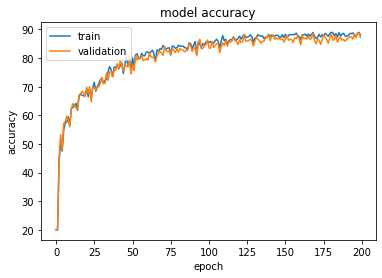

Maximum Train Accuracy : 89.02777862548828
Maximum Validation Accuracy : 88.77777862548828


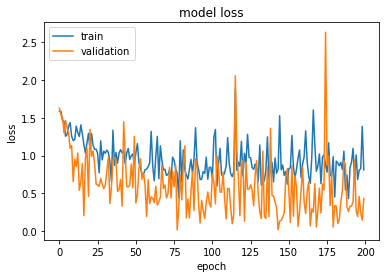

Minimum Train Loss : 0.4297371804714203
Minimum Validation Loss : 0.015770550817251205


In [ ]:
Bacteria_model_phase_Adam_00001 = Bact_Net()
Bacteria_model_phase_Adam_00001.cuda()
trainer_Adam_phase_00001 = trainer(Bacteria_model_phase_Adam_00001, phase_train_loader,"Adam", epoch_size=200, learning_rate=0.0001)
trainer_Adam_phase_00001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adam_phase_00001.history['train_acc'])
plt.plot(trainer_Adam_phase_00001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adam_phase_00001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adam_phase_00001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adam_phase_00001.history['train_loss'])
plt.plot(trainer_Adam_phase_00001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adam_phase_00001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adam_phase_00001.history['val_loss'])}")

# RMSprop_0.001_400epoch

  0%|          | 0/400 [00:00<?, ?it/s]

Train Acc | Epoch 1/400 | ACC 20.305555


  0%|          | 1/400 [21:44<144:37:59, 1304.96s/it]

Val Acc | Epoch 1/400 | ACC 18.777779
Train Acc | Epoch 2/400 | ACC 31.111113


  0%|          | 2/400 [21:59<60:22:13, 546.06s/it]  

Val Acc | Epoch 2/400 | ACC 30.111113
Train Acc | Epoch 3/400 | ACC 49.222221


  1%|          | 3/400 [22:14<33:27:16, 303.37s/it]

Val Acc | Epoch 3/400 | ACC 46.555557
Train Acc | Epoch 4/400 | ACC 63.638889


  1%|          | 4/400 [22:28<20:49:30, 189.32s/it]

Val Acc | Epoch 4/400 | ACC 65.222221
Train Acc | Epoch 5/400 | ACC 52.500004


  1%|▏         | 5/400 [22:43<13:51:09, 126.25s/it]

Val Acc | Epoch 5/400 | ACC 51.444447
Train Acc | Epoch 6/400 | ACC 57.194447


  2%|▏         | 6/400 [22:57<9:39:32, 88.25s/it]  

Val Acc | Epoch 6/400 | ACC 56.777782
Train Acc | Epoch 7/400 | ACC 78.611115


  2%|▏         | 7/400 [23:12<7:00:59, 64.27s/it]

Val Acc | Epoch 7/400 | ACC 78.333336
Train Acc | Epoch 8/400 | ACC 75.916664


  2%|▏         | 8/400 [23:27<5:16:53, 48.50s/it]

Val Acc | Epoch 8/400 | ACC 73.444443
Train Acc | Epoch 9/400 | ACC 64.500008


  2%|▏         | 9/400 [23:42<4:07:03, 37.91s/it]

Val Acc | Epoch 9/400 | ACC 63.333332
Train Acc | Epoch 10/400 | ACC 79.194443


  2%|▎         | 10/400 [23:56<3:19:29, 30.69s/it]

Val Acc | Epoch 10/400 | ACC 78.111115
Train Acc | Epoch 11/400 | ACC 82.972221


  3%|▎         | 11/400 [24:10<2:46:25, 25.67s/it]

Val Acc | Epoch 11/400 | ACC 82.111115
Train Acc | Epoch 12/400 | ACC 72.722229


  3%|▎         | 12/400 [24:25<2:24:00, 22.27s/it]

Val Acc | Epoch 12/400 | ACC 72.111115
Train Acc | Epoch 13/400 | ACC 81.166664


  3%|▎         | 13/400 [24:39<2:08:37, 19.94s/it]

Val Acc | Epoch 13/400 | ACC 80.555557
Train Acc | Epoch 14/400 | ACC 82.916672


  4%|▎         | 14/400 [24:54<1:57:46, 18.31s/it]

Val Acc | Epoch 14/400 | ACC 83.444443
Train Acc | Epoch 15/400 | ACC 83.833336


  4%|▍         | 15/400 [25:08<1:49:10, 17.02s/it]

Val Acc | Epoch 15/400 | ACC 82.555557
Train Acc | Epoch 16/400 | ACC 82.888885


  4%|▍         | 16/400 [25:22<1:43:18, 16.14s/it]

Val Acc | Epoch 16/400 | ACC 82.222221
Train Acc | Epoch 17/400 | ACC 83.500000


  4%|▍         | 17/400 [25:36<1:38:25, 15.42s/it]

Val Acc | Epoch 17/400 | ACC 82.222221
Train Acc | Epoch 18/400 | ACC 83.888885


  4%|▍         | 18/400 [25:50<1:35:58, 15.07s/it]

Val Acc | Epoch 18/400 | ACC 84.777779
Train Acc | Epoch 19/400 | ACC 82.166664


  5%|▍         | 19/400 [26:04<1:33:41, 14.75s/it]

Val Acc | Epoch 19/400 | ACC 79.000000
Train Acc | Epoch 20/400 | ACC 78.583336


  5%|▌         | 20/400 [26:18<1:32:19, 14.58s/it]

Val Acc | Epoch 20/400 | ACC 77.888885
Train Acc | Epoch 21/400 | ACC 83.055557


  5%|▌         | 21/400 [26:32<1:31:04, 14.42s/it]

Val Acc | Epoch 21/400 | ACC 81.000000
Train Acc | Epoch 22/400 | ACC 84.750000


  6%|▌         | 22/400 [26:47<1:30:57, 14.44s/it]

Val Acc | Epoch 22/400 | ACC 81.111115
Train Acc | Epoch 23/400 | ACC 79.361115


  6%|▌         | 23/400 [27:01<1:30:14, 14.36s/it]

Val Acc | Epoch 23/400 | ACC 79.333336
Train Acc | Epoch 24/400 | ACC 82.111115


  6%|▌         | 24/400 [27:15<1:29:21, 14.26s/it]

Val Acc | Epoch 24/400 | ACC 81.666664
Train Acc | Epoch 25/400 | ACC 85.388893


  6%|▋         | 25/400 [27:29<1:29:02, 14.25s/it]

Val Acc | Epoch 25/400 | ACC 84.666672
Train Acc | Epoch 26/400 | ACC 80.027779


  6%|▋         | 26/400 [27:43<1:28:19, 14.17s/it]

Val Acc | Epoch 26/400 | ACC 79.777779
Train Acc | Epoch 27/400 | ACC 86.527786


  7%|▋         | 27/400 [27:57<1:27:56, 14.15s/it]

Val Acc | Epoch 27/400 | ACC 84.888893
Train Acc | Epoch 28/400 | ACC 87.444450


  7%|▋         | 28/400 [28:11<1:27:33, 14.12s/it]

Val Acc | Epoch 28/400 | ACC 86.111107
Train Acc | Epoch 29/400 | ACC 73.444443


  7%|▋         | 29/400 [28:26<1:28:12, 14.27s/it]

Val Acc | Epoch 29/400 | ACC 73.555557
Train Acc | Epoch 30/400 | ACC 85.361115


  8%|▊         | 30/400 [28:40<1:27:34, 14.20s/it]

Val Acc | Epoch 30/400 | ACC 83.666672
Train Acc | Epoch 31/400 | ACC 86.444450


  8%|▊         | 31/400 [28:54<1:27:17, 14.19s/it]

Val Acc | Epoch 31/400 | ACC 85.000000
Train Acc | Epoch 32/400 | ACC 85.777779


  8%|▊         | 32/400 [29:08<1:26:56, 14.17s/it]

Val Acc | Epoch 32/400 | ACC 85.444443
Train Acc | Epoch 33/400 | ACC 85.000000


  8%|▊         | 33/400 [29:22<1:26:11, 14.09s/it]

Val Acc | Epoch 33/400 | ACC 83.777779
Train Acc | Epoch 34/400 | ACC 86.500000


  8%|▊         | 34/400 [29:36<1:25:55, 14.09s/it]

Val Acc | Epoch 34/400 | ACC 85.000000
Train Acc | Epoch 35/400 | ACC 84.805557


  9%|▉         | 35/400 [29:50<1:25:33, 14.06s/it]

Val Acc | Epoch 35/400 | ACC 84.222221
Train Acc | Epoch 36/400 | ACC 86.138893


  9%|▉         | 36/400 [30:04<1:25:28, 14.09s/it]

Val Acc | Epoch 36/400 | ACC 85.111115
Train Acc | Epoch 37/400 | ACC 82.305557


  9%|▉         | 37/400 [30:19<1:25:24, 14.12s/it]

Val Acc | Epoch 37/400 | ACC 81.000000
Train Acc | Epoch 38/400 | ACC 86.777786


 10%|▉         | 38/400 [30:33<1:25:39, 14.20s/it]

Val Acc | Epoch 38/400 | ACC 86.555557
Train Acc | Epoch 39/400 | ACC 87.638893


 10%|▉         | 39/400 [30:47<1:25:44, 14.25s/it]

Val Acc | Epoch 39/400 | ACC 87.444450
Train Acc | Epoch 40/400 | ACC 86.166672


 10%|█         | 40/400 [31:02<1:25:30, 14.25s/it]

Val Acc | Epoch 40/400 | ACC 84.444443
Train Acc | Epoch 41/400 | ACC 88.527779


 10%|█         | 41/400 [31:16<1:25:31, 14.29s/it]

Val Acc | Epoch 41/400 | ACC 86.444450
Train Acc | Epoch 42/400 | ACC 87.944450


 10%|█         | 42/400 [31:30<1:24:58, 14.24s/it]

Val Acc | Epoch 42/400 | ACC 87.111115
Train Acc | Epoch 43/400 | ACC 87.777779


 11%|█         | 43/400 [31:44<1:24:31, 14.21s/it]

Val Acc | Epoch 43/400 | ACC 85.888893
Train Acc | Epoch 44/400 | ACC 86.138893


 11%|█         | 44/400 [31:58<1:24:17, 14.21s/it]

Val Acc | Epoch 44/400 | ACC 84.888893
Train Acc | Epoch 45/400 | ACC 86.611115


 11%|█▏        | 45/400 [32:12<1:23:42, 14.15s/it]

Val Acc | Epoch 45/400 | ACC 85.666672
Train Acc | Epoch 46/400 | ACC 86.444450


 12%|█▏        | 46/400 [32:26<1:23:10, 14.10s/it]

Val Acc | Epoch 46/400 | ACC 84.888893
Train Acc | Epoch 47/400 | ACC 88.500008


 12%|█▏        | 47/400 [32:41<1:23:06, 14.13s/it]

Val Acc | Epoch 47/400 | ACC 86.666664
Train Acc | Epoch 48/400 | ACC 87.777779


 12%|█▏        | 48/400 [32:55<1:23:00, 14.15s/it]

Val Acc | Epoch 48/400 | ACC 86.666664
Train Acc | Epoch 49/400 | ACC 88.083336


 12%|█▏        | 49/400 [33:09<1:22:40, 14.13s/it]

Val Acc | Epoch 49/400 | ACC 87.555557
Train Acc | Epoch 50/400 | ACC 88.861115


 12%|█▎        | 50/400 [33:23<1:22:39, 14.17s/it]

Val Acc | Epoch 50/400 | ACC 87.222221
Train Acc | Epoch 51/400 | ACC 68.277779


 13%|█▎        | 51/400 [33:38<1:23:32, 14.36s/it]

Val Acc | Epoch 51/400 | ACC 65.777779
Train Acc | Epoch 52/400 | ACC 88.083336


 13%|█▎        | 52/400 [33:52<1:22:25, 14.21s/it]

Val Acc | Epoch 52/400 | ACC 86.888893
Train Acc | Epoch 53/400 | ACC 90.444443


 13%|█▎        | 53/400 [34:06<1:21:43, 14.13s/it]

Val Acc | Epoch 53/400 | ACC 89.555557
Train Acc | Epoch 54/400 | ACC 89.500008


 14%|█▎        | 54/400 [34:20<1:22:03, 14.23s/it]

Val Acc | Epoch 54/400 | ACC 88.888893
Train Acc | Epoch 55/400 | ACC 68.583336


 14%|█▍        | 55/400 [34:34<1:21:43, 14.21s/it]

Val Acc | Epoch 55/400 | ACC 66.111115
Train Acc | Epoch 56/400 | ACC 89.138885


 14%|█▍        | 56/400 [34:48<1:21:02, 14.13s/it]

Val Acc | Epoch 56/400 | ACC 86.555557
Train Acc | Epoch 57/400 | ACC 86.666664


 14%|█▍        | 57/400 [35:03<1:20:48, 14.14s/it]

Val Acc | Epoch 57/400 | ACC 86.444450
Train Acc | Epoch 58/400 | ACC 87.777779


 14%|█▍        | 58/400 [35:17<1:20:53, 14.19s/it]

Val Acc | Epoch 58/400 | ACC 86.777786
Train Acc | Epoch 59/400 | ACC 86.000000


 15%|█▍        | 59/400 [35:31<1:20:36, 14.18s/it]

Val Acc | Epoch 59/400 | ACC 85.333336
Train Acc | Epoch 60/400 | ACC 87.500000


 15%|█▌        | 60/400 [35:45<1:20:38, 14.23s/it]

Val Acc | Epoch 60/400 | ACC 85.666672
Train Acc | Epoch 61/400 | ACC 85.416672


 15%|█▌        | 61/400 [36:00<1:20:35, 14.26s/it]

Val Acc | Epoch 61/400 | ACC 83.777779
Train Acc | Epoch 62/400 | ACC 89.305557


 16%|█▌        | 62/400 [36:14<1:20:31, 14.29s/it]

Val Acc | Epoch 62/400 | ACC 87.666664
Train Acc | Epoch 63/400 | ACC 88.805557


 16%|█▌        | 63/400 [36:28<1:19:51, 14.22s/it]

Val Acc | Epoch 63/400 | ACC 88.444450
Train Acc | Epoch 64/400 | ACC 90.027779


 16%|█▌        | 64/400 [36:42<1:19:38, 14.22s/it]

Val Acc | Epoch 64/400 | ACC 88.777779
Train Acc | Epoch 65/400 | ACC 88.555557


 16%|█▋        | 65/400 [36:56<1:19:09, 14.18s/it]

Val Acc | Epoch 65/400 | ACC 87.666664
Train Acc | Epoch 66/400 | ACC 89.972221


 16%|█▋        | 66/400 [37:11<1:19:03, 14.20s/it]

Val Acc | Epoch 66/400 | ACC 88.888893
Train Acc | Epoch 67/400 | ACC 89.638885


 17%|█▋        | 67/400 [37:25<1:18:35, 14.16s/it]

Val Acc | Epoch 67/400 | ACC 89.000008
Train Acc | Epoch 68/400 | ACC 88.916672


 17%|█▋        | 68/400 [37:39<1:18:04, 14.11s/it]

Val Acc | Epoch 68/400 | ACC 88.888893
Train Acc | Epoch 69/400 | ACC 90.277779


 17%|█▋        | 69/400 [37:53<1:18:25, 14.22s/it]

Val Acc | Epoch 69/400 | ACC 89.000008
Train Acc | Epoch 70/400 | ACC 89.416672


 18%|█▊        | 70/400 [38:07<1:17:40, 14.12s/it]

Val Acc | Epoch 70/400 | ACC 87.888893
Train Acc | Epoch 71/400 | ACC 84.638893


 18%|█▊        | 71/400 [38:21<1:17:16, 14.09s/it]

Val Acc | Epoch 71/400 | ACC 83.555557
Train Acc | Epoch 72/400 | ACC 88.722221


 18%|█▊        | 72/400 [38:36<1:18:00, 14.27s/it]

Val Acc | Epoch 72/400 | ACC 88.000000
Train Acc | Epoch 73/400 | ACC 90.361115


 18%|█▊        | 73/400 [38:51<1:18:34, 14.42s/it]

Val Acc | Epoch 73/400 | ACC 88.777779
Train Acc | Epoch 74/400 | ACC 90.472229


 18%|█▊        | 74/400 [39:05<1:18:07, 14.38s/it]

Val Acc | Epoch 74/400 | ACC 89.777779
Train Acc | Epoch 75/400 | ACC 88.388893


 19%|█▉        | 75/400 [39:19<1:17:07, 14.24s/it]

Val Acc | Epoch 75/400 | ACC 86.444450
Train Acc | Epoch 76/400 | ACC 89.194450


 19%|█▉        | 76/400 [39:33<1:16:47, 14.22s/it]

Val Acc | Epoch 76/400 | ACC 89.000008
Train Acc | Epoch 77/400 | ACC 90.305557


 19%|█▉        | 77/400 [39:47<1:16:08, 14.14s/it]

Val Acc | Epoch 77/400 | ACC 89.111115
Train Acc | Epoch 78/400 | ACC 90.833336


 20%|█▉        | 78/400 [40:01<1:16:07, 14.19s/it]

Val Acc | Epoch 78/400 | ACC 90.444443
Train Acc | Epoch 79/400 | ACC 89.611115


 20%|█▉        | 79/400 [40:15<1:15:30, 14.11s/it]

Val Acc | Epoch 79/400 | ACC 87.111115
Train Acc | Epoch 80/400 | ACC 88.444450


 20%|██        | 80/400 [40:29<1:14:48, 14.03s/it]

Val Acc | Epoch 80/400 | ACC 87.333336
Train Acc | Epoch 81/400 | ACC 79.055557


 20%|██        | 81/400 [40:43<1:14:48, 14.07s/it]

Val Acc | Epoch 81/400 | ACC 76.444450
Train Acc | Epoch 82/400 | ACC 91.583336


 20%|██        | 82/400 [40:57<1:14:12, 14.00s/it]

Val Acc | Epoch 82/400 | ACC 89.777779
Train Acc | Epoch 83/400 | ACC 88.666672


 21%|██        | 83/400 [41:11<1:14:15, 14.05s/it]

Val Acc | Epoch 83/400 | ACC 88.000000
Train Acc | Epoch 84/400 | ACC 89.361115


 21%|██        | 84/400 [41:25<1:13:48, 14.01s/it]

Val Acc | Epoch 84/400 | ACC 88.888893
Train Acc | Epoch 85/400 | ACC 89.666672


 21%|██▏       | 85/400 [41:39<1:13:56, 14.08s/it]

Val Acc | Epoch 85/400 | ACC 88.222221
Train Acc | Epoch 86/400 | ACC 85.500000


 22%|██▏       | 86/400 [41:53<1:13:31, 14.05s/it]

Val Acc | Epoch 86/400 | ACC 85.777779
Train Acc | Epoch 87/400 | ACC 81.277779


 22%|██▏       | 87/400 [42:07<1:13:24, 14.07s/it]

Val Acc | Epoch 87/400 | ACC 79.555557
Train Acc | Epoch 88/400 | ACC 88.722221


 22%|██▏       | 88/400 [42:21<1:13:04, 14.05s/it]

Val Acc | Epoch 88/400 | ACC 88.333336
Train Acc | Epoch 89/400 | ACC 90.805557


 22%|██▏       | 89/400 [42:35<1:12:44, 14.03s/it]

Val Acc | Epoch 89/400 | ACC 91.000000
Train Acc | Epoch 90/400 | ACC 90.222221


 22%|██▎       | 90/400 [42:50<1:12:41, 14.07s/it]

Val Acc | Epoch 90/400 | ACC 89.333336
Train Acc | Epoch 91/400 | ACC 89.833336


 23%|██▎       | 91/400 [43:04<1:12:33, 14.09s/it]

Val Acc | Epoch 91/400 | ACC 89.000008
Train Acc | Epoch 92/400 | ACC 91.472229


 23%|██▎       | 92/400 [43:18<1:12:30, 14.13s/it]

Val Acc | Epoch 92/400 | ACC 90.555557
Train Acc | Epoch 93/400 | ACC 87.888893


 23%|██▎       | 93/400 [43:32<1:11:49, 14.04s/it]

Val Acc | Epoch 93/400 | ACC 86.666664
Train Acc | Epoch 94/400 | ACC 90.972229


 24%|██▎       | 94/400 [43:46<1:11:52, 14.09s/it]

Val Acc | Epoch 94/400 | ACC 90.222221
Train Acc | Epoch 95/400 | ACC 89.638885


 24%|██▍       | 95/400 [44:00<1:12:12, 14.20s/it]

Val Acc | Epoch 95/400 | ACC 88.222221
Train Acc | Epoch 96/400 | ACC 90.194443


 24%|██▍       | 96/400 [44:15<1:12:09, 14.24s/it]

Val Acc | Epoch 96/400 | ACC 88.222221
Train Acc | Epoch 97/400 | ACC 83.361115


 24%|██▍       | 97/400 [44:29<1:11:47, 14.21s/it]

Val Acc | Epoch 97/400 | ACC 82.444450
Train Acc | Epoch 98/400 | ACC 90.333336


 24%|██▍       | 98/400 [44:43<1:11:08, 14.13s/it]

Val Acc | Epoch 98/400 | ACC 88.555557
Train Acc | Epoch 99/400 | ACC 90.388885


 25%|██▍       | 99/400 [44:57<1:10:53, 14.13s/it]

Val Acc | Epoch 99/400 | ACC 89.777779
Train Acc | Epoch 100/400 | ACC 71.666672


 25%|██▌       | 100/400 [45:11<1:10:12, 14.04s/it]

Val Acc | Epoch 100/400 | ACC 70.111115
Train Acc | Epoch 101/400 | ACC 87.222221


 25%|██▌       | 101/400 [45:25<1:10:05, 14.06s/it]

Val Acc | Epoch 101/400 | ACC 85.666672
Train Acc | Epoch 102/400 | ACC 91.083336


 26%|██▌       | 102/400 [45:39<1:09:35, 14.01s/it]

Val Acc | Epoch 102/400 | ACC 90.555557
Train Acc | Epoch 103/400 | ACC 90.166672


 26%|██▌       | 103/400 [45:53<1:09:31, 14.05s/it]

Val Acc | Epoch 103/400 | ACC 88.888893
Train Acc | Epoch 104/400 | ACC 90.388885


 26%|██▌       | 104/400 [46:07<1:09:09, 14.02s/it]

Val Acc | Epoch 104/400 | ACC 89.000008
Train Acc | Epoch 105/400 | ACC 91.000000


 26%|██▋       | 105/400 [46:21<1:09:14, 14.08s/it]

Val Acc | Epoch 105/400 | ACC 88.888893
Train Acc | Epoch 106/400 | ACC 91.611115


 26%|██▋       | 106/400 [46:35<1:09:02, 14.09s/it]

Val Acc | Epoch 106/400 | ACC 90.888893
Train Acc | Epoch 107/400 | ACC 90.694443


 27%|██▋       | 107/400 [46:50<1:09:09, 14.16s/it]

Val Acc | Epoch 107/400 | ACC 89.444443
Train Acc | Epoch 108/400 | ACC 88.944450


 27%|██▋       | 108/400 [47:04<1:09:14, 14.23s/it]

Val Acc | Epoch 108/400 | ACC 87.444450
Train Acc | Epoch 109/400 | ACC 91.166672


 27%|██▋       | 109/400 [47:18<1:09:12, 14.27s/it]

Val Acc | Epoch 109/400 | ACC 89.666672
Train Acc | Epoch 110/400 | ACC 90.916672


 28%|██▊       | 110/400 [47:32<1:08:46, 14.23s/it]

Val Acc | Epoch 110/400 | ACC 90.777779
Train Acc | Epoch 111/400 | ACC 87.250000


 28%|██▊       | 111/400 [47:47<1:08:37, 14.25s/it]

Val Acc | Epoch 111/400 | ACC 86.777786
Train Acc | Epoch 112/400 | ACC 86.361115


 28%|██▊       | 112/400 [48:01<1:08:17, 14.23s/it]

Val Acc | Epoch 112/400 | ACC 86.777786
Train Acc | Epoch 113/400 | ACC 91.166672


 28%|██▊       | 113/400 [48:15<1:07:58, 14.21s/it]

Val Acc | Epoch 113/400 | ACC 90.777779
Train Acc | Epoch 114/400 | ACC 88.055557


 28%|██▊       | 114/400 [48:29<1:07:27, 14.15s/it]

Val Acc | Epoch 114/400 | ACC 86.888893
Train Acc | Epoch 115/400 | ACC 91.500000


 29%|██▉       | 115/400 [48:43<1:06:56, 14.09s/it]

Val Acc | Epoch 115/400 | ACC 89.888885
Train Acc | Epoch 116/400 | ACC 91.111115


 29%|██▉       | 116/400 [48:57<1:06:59, 14.15s/it]

Val Acc | Epoch 116/400 | ACC 89.444443
Train Acc | Epoch 117/400 | ACC 91.361115


 29%|██▉       | 117/400 [49:12<1:07:32, 14.32s/it]

Val Acc | Epoch 117/400 | ACC 91.555557
Train Acc | Epoch 118/400 | ACC 89.638885


 30%|██▉       | 118/400 [49:26<1:07:05, 14.28s/it]

Val Acc | Epoch 118/400 | ACC 88.444450
Train Acc | Epoch 119/400 | ACC 87.000000


 30%|██▉       | 119/400 [49:40<1:06:46, 14.26s/it]

Val Acc | Epoch 119/400 | ACC 84.000000
Train Acc | Epoch 120/400 | ACC 90.805557


 30%|███       | 120/400 [49:54<1:06:12, 14.19s/it]

Val Acc | Epoch 120/400 | ACC 89.222221
Train Acc | Epoch 121/400 | ACC 91.722229


 30%|███       | 121/400 [50:09<1:05:54, 14.17s/it]

Val Acc | Epoch 121/400 | ACC 91.222229
Train Acc | Epoch 122/400 | ACC 77.083336


 30%|███       | 122/400 [50:23<1:05:24, 14.12s/it]

Val Acc | Epoch 122/400 | ACC 78.222229
Train Acc | Epoch 123/400 | ACC 91.666672


 31%|███       | 123/400 [50:37<1:05:22, 14.16s/it]

Val Acc | Epoch 123/400 | ACC 90.555557
Train Acc | Epoch 124/400 | ACC 89.944443


 31%|███       | 124/400 [50:51<1:04:39, 14.06s/it]

Val Acc | Epoch 124/400 | ACC 89.000008
Train Acc | Epoch 125/400 | ACC 84.583336


 31%|███▏      | 125/400 [51:05<1:04:34, 14.09s/it]

Val Acc | Epoch 125/400 | ACC 83.888885
Train Acc | Epoch 126/400 | ACC 91.000000


 32%|███▏      | 126/400 [51:19<1:04:44, 14.18s/it]

Val Acc | Epoch 126/400 | ACC 89.888885
Train Acc | Epoch 127/400 | ACC 91.166672


 32%|███▏      | 127/400 [51:33<1:04:30, 14.18s/it]

Val Acc | Epoch 127/400 | ACC 90.888893
Train Acc | Epoch 128/400 | ACC 91.500000


 32%|███▏      | 128/400 [51:47<1:04:04, 14.13s/it]

Val Acc | Epoch 128/400 | ACC 90.666672
Train Acc | Epoch 129/400 | ACC 91.694443


 32%|███▏      | 129/400 [52:01<1:03:32, 14.07s/it]

Val Acc | Epoch 129/400 | ACC 89.555557
Train Acc | Epoch 130/400 | ACC 90.861115


 32%|███▎      | 130/400 [52:15<1:03:23, 14.09s/it]

Val Acc | Epoch 130/400 | ACC 88.777779
Train Acc | Epoch 131/400 | ACC 87.305557


 33%|███▎      | 131/400 [52:29<1:02:35, 13.96s/it]

Val Acc | Epoch 131/400 | ACC 86.666664
Train Acc | Epoch 132/400 | ACC 88.916672


 33%|███▎      | 132/400 [52:43<1:02:11, 13.92s/it]

Val Acc | Epoch 132/400 | ACC 87.000000
Train Acc | Epoch 133/400 | ACC 87.694450


 33%|███▎      | 133/400 [52:57<1:01:50, 13.90s/it]

Val Acc | Epoch 133/400 | ACC 85.888893
Train Acc | Epoch 134/400 | ACC 92.083336


 34%|███▎      | 134/400 [53:11<1:02:01, 13.99s/it]

Val Acc | Epoch 134/400 | ACC 89.666672
Train Acc | Epoch 135/400 | ACC 90.777779


 34%|███▍      | 135/400 [53:25<1:02:04, 14.05s/it]

Val Acc | Epoch 135/400 | ACC 90.111115
Train Acc | Epoch 136/400 | ACC 91.222229


 34%|███▍      | 136/400 [53:39<1:01:40, 14.02s/it]

Val Acc | Epoch 136/400 | ACC 90.111115
Train Acc | Epoch 137/400 | ACC 91.055557


 34%|███▍      | 137/400 [53:53<1:01:45, 14.09s/it]

Val Acc | Epoch 137/400 | ACC 89.555557
Train Acc | Epoch 138/400 | ACC 89.611115


 34%|███▍      | 138/400 [54:08<1:01:45, 14.14s/it]

Val Acc | Epoch 138/400 | ACC 88.111115
Train Acc | Epoch 139/400 | ACC 90.861115


 35%|███▍      | 139/400 [54:22<1:02:20, 14.33s/it]

Val Acc | Epoch 139/400 | ACC 90.222221
Train Acc | Epoch 140/400 | ACC 90.861115


 35%|███▌      | 140/400 [54:37<1:01:50, 14.27s/it]

Val Acc | Epoch 140/400 | ACC 89.333336
Train Acc | Epoch 141/400 | ACC 90.500000


 35%|███▌      | 141/400 [54:51<1:01:22, 14.22s/it]

Val Acc | Epoch 141/400 | ACC 88.777779
Train Acc | Epoch 142/400 | ACC 89.000008


 36%|███▌      | 142/400 [55:05<1:00:58, 14.18s/it]

Val Acc | Epoch 142/400 | ACC 87.888893
Train Acc | Epoch 143/400 | ACC 87.250000


 36%|███▌      | 143/400 [55:19<1:00:29, 14.12s/it]

Val Acc | Epoch 143/400 | ACC 86.888893
Train Acc | Epoch 144/400 | ACC 85.722229


 36%|███▌      | 144/400 [55:33<1:00:29, 14.18s/it]

Val Acc | Epoch 144/400 | ACC 83.888885
Train Acc | Epoch 145/400 | ACC 91.472229


 36%|███▋      | 145/400 [55:47<59:49, 14.08s/it]  

Val Acc | Epoch 145/400 | ACC 89.888885
Train Acc | Epoch 146/400 | ACC 91.972229


 36%|███▋      | 146/400 [56:01<59:32, 14.06s/it]

Val Acc | Epoch 146/400 | ACC 91.555557
Train Acc | Epoch 147/400 | ACC 89.750000


 37%|███▋      | 147/400 [56:16<59:54, 14.21s/it]

Val Acc | Epoch 147/400 | ACC 87.333336
Train Acc | Epoch 148/400 | ACC 32.333336


 37%|███▋      | 148/400 [56:30<59:39, 14.21s/it]

Val Acc | Epoch 148/400 | ACC 30.555555
Train Acc | Epoch 149/400 | ACC 91.861115


 37%|███▋      | 149/400 [56:44<59:19, 14.18s/it]

Val Acc | Epoch 149/400 | ACC 90.111115
Train Acc | Epoch 150/400 | ACC 92.388893


 38%|███▊      | 150/400 [56:58<59:21, 14.24s/it]

Val Acc | Epoch 150/400 | ACC 88.777779
Train Acc | Epoch 151/400 | ACC 92.638893


 38%|███▊      | 151/400 [57:12<58:53, 14.19s/it]

Val Acc | Epoch 151/400 | ACC 92.111115
Train Acc | Epoch 152/400 | ACC 91.805557


 38%|███▊      | 152/400 [57:26<58:19, 14.11s/it]

Val Acc | Epoch 152/400 | ACC 90.555557
Train Acc | Epoch 153/400 | ACC 89.444443


 38%|███▊      | 153/400 [57:40<57:54, 14.07s/it]

Val Acc | Epoch 153/400 | ACC 89.555557
Train Acc | Epoch 154/400 | ACC 89.972221


 38%|███▊      | 154/400 [57:54<57:42, 14.07s/it]

Val Acc | Epoch 154/400 | ACC 87.333336
Train Acc | Epoch 155/400 | ACC 90.722229


 39%|███▉      | 155/400 [58:08<57:24, 14.06s/it]

Val Acc | Epoch 155/400 | ACC 89.444443
Train Acc | Epoch 156/400 | ACC 91.944443


 39%|███▉      | 156/400 [58:22<56:52, 13.99s/it]

Val Acc | Epoch 156/400 | ACC 91.000000
Train Acc | Epoch 157/400 | ACC 59.388889


 39%|███▉      | 157/400 [58:36<56:46, 14.02s/it]

Val Acc | Epoch 157/400 | ACC 59.777779
Train Acc | Epoch 158/400 | ACC 91.583336


 40%|███▉      | 158/400 [58:50<56:48, 14.09s/it]

Val Acc | Epoch 158/400 | ACC 88.000000
Train Acc | Epoch 159/400 | ACC 91.555557


 40%|███▉      | 159/400 [59:05<56:51, 14.15s/it]

Val Acc | Epoch 159/400 | ACC 89.444443
Train Acc | Epoch 160/400 | ACC 91.305557


 40%|████      | 160/400 [59:19<56:50, 14.21s/it]

Val Acc | Epoch 160/400 | ACC 90.000000
Train Acc | Epoch 161/400 | ACC 90.972229


 40%|████      | 161/400 [59:34<57:11, 14.36s/it]

Val Acc | Epoch 161/400 | ACC 90.000000
Train Acc | Epoch 162/400 | ACC 90.138885


 40%|████      | 162/400 [59:48<56:53, 14.34s/it]

Val Acc | Epoch 162/400 | ACC 89.000008
Train Acc | Epoch 163/400 | ACC 90.944443


 41%|████      | 163/400 [1:00:03<56:53, 14.40s/it]

Val Acc | Epoch 163/400 | ACC 90.111115
Train Acc | Epoch 164/400 | ACC 91.111115


 41%|████      | 164/400 [1:00:17<56:23, 14.34s/it]

Val Acc | Epoch 164/400 | ACC 90.444443
Train Acc | Epoch 165/400 | ACC 91.138893


 41%|████▏     | 165/400 [1:00:31<55:56, 14.28s/it]

Val Acc | Epoch 165/400 | ACC 90.222221
Train Acc | Epoch 166/400 | ACC 91.861115


 42%|████▏     | 166/400 [1:00:45<55:36, 14.26s/it]

Val Acc | Epoch 166/400 | ACC 89.555557
Train Acc | Epoch 167/400 | ACC 92.111115


 42%|████▏     | 167/400 [1:01:00<55:33, 14.31s/it]

Val Acc | Epoch 167/400 | ACC 91.000000
Train Acc | Epoch 168/400 | ACC 91.416672


 42%|████▏     | 168/400 [1:01:14<55:29, 14.35s/it]

Val Acc | Epoch 168/400 | ACC 90.444443
Train Acc | Epoch 169/400 | ACC 89.305557


 42%|████▏     | 169/400 [1:01:28<54:52, 14.25s/it]

Val Acc | Epoch 169/400 | ACC 87.777779
Train Acc | Epoch 170/400 | ACC 89.361115


 42%|████▎     | 170/400 [1:01:43<54:56, 14.33s/it]

Val Acc | Epoch 170/400 | ACC 88.444450
Train Acc | Epoch 171/400 | ACC 92.055557


 43%|████▎     | 171/400 [1:01:57<54:59, 14.41s/it]

Val Acc | Epoch 171/400 | ACC 90.111115
Train Acc | Epoch 172/400 | ACC 90.166672


 43%|████▎     | 172/400 [1:02:12<54:44, 14.41s/it]

Val Acc | Epoch 172/400 | ACC 89.222221
Train Acc | Epoch 173/400 | ACC 83.527779


 43%|████▎     | 173/400 [1:02:26<54:09, 14.31s/it]

Val Acc | Epoch 173/400 | ACC 82.777779
Train Acc | Epoch 174/400 | ACC 89.972221


 44%|████▎     | 174/400 [1:02:40<53:39, 14.25s/it]

Val Acc | Epoch 174/400 | ACC 87.666664
Train Acc | Epoch 175/400 | ACC 92.277779


 44%|████▍     | 175/400 [1:02:54<53:23, 14.24s/it]

Val Acc | Epoch 175/400 | ACC 90.666672
Train Acc | Epoch 176/400 | ACC 92.611115


 44%|████▍     | 176/400 [1:03:08<52:48, 14.14s/it]

Val Acc | Epoch 176/400 | ACC 91.555557
Train Acc | Epoch 177/400 | ACC 92.444443


 44%|████▍     | 177/400 [1:03:22<52:40, 14.17s/it]

Val Acc | Epoch 177/400 | ACC 92.333336
Train Acc | Epoch 178/400 | ACC 91.333336


 44%|████▍     | 178/400 [1:03:36<52:26, 14.17s/it]

Val Acc | Epoch 178/400 | ACC 90.666672
Train Acc | Epoch 179/400 | ACC 92.111115


 45%|████▍     | 179/400 [1:03:50<52:05, 14.14s/it]

Val Acc | Epoch 179/400 | ACC 90.444443
Train Acc | Epoch 180/400 | ACC 90.277779


 45%|████▌     | 180/400 [1:04:05<51:50, 14.14s/it]

Val Acc | Epoch 180/400 | ACC 88.333336
Train Acc | Epoch 181/400 | ACC 90.472229


 45%|████▌     | 181/400 [1:04:19<51:48, 14.19s/it]

Val Acc | Epoch 181/400 | ACC 89.888885
Train Acc | Epoch 182/400 | ACC 92.138893


 46%|████▌     | 182/400 [1:04:34<52:11, 14.37s/it]

Val Acc | Epoch 182/400 | ACC 91.222229
Train Acc | Epoch 183/400 | ACC 91.583336


 46%|████▌     | 183/400 [1:04:48<51:51, 14.34s/it]

Val Acc | Epoch 183/400 | ACC 90.000000
Train Acc | Epoch 184/400 | ACC 88.083336


 46%|████▌     | 184/400 [1:05:02<51:16, 14.24s/it]

Val Acc | Epoch 184/400 | ACC 86.666664
Train Acc | Epoch 185/400 | ACC 92.500000


 46%|████▋     | 185/400 [1:05:16<50:56, 14.22s/it]

Val Acc | Epoch 185/400 | ACC 90.333336
Train Acc | Epoch 186/400 | ACC 93.027786


 46%|████▋     | 186/400 [1:05:30<50:33, 14.17s/it]

Val Acc | Epoch 186/400 | ACC 91.666672
Train Acc | Epoch 187/400 | ACC 92.305557


 47%|████▋     | 187/400 [1:05:44<50:14, 14.15s/it]

Val Acc | Epoch 187/400 | ACC 90.555557
Train Acc | Epoch 188/400 | ACC 92.333336


 47%|████▋     | 188/400 [1:05:58<49:55, 14.13s/it]

Val Acc | Epoch 188/400 | ACC 89.666672
Train Acc | Epoch 189/400 | ACC 90.805557


 47%|████▋     | 189/400 [1:06:12<49:25, 14.05s/it]

Val Acc | Epoch 189/400 | ACC 89.111115
Train Acc | Epoch 190/400 | ACC 92.250000


 48%|████▊     | 190/400 [1:06:27<49:27, 14.13s/it]

Val Acc | Epoch 190/400 | ACC 90.555557
Train Acc | Epoch 191/400 | ACC 90.611115


 48%|████▊     | 191/400 [1:06:41<49:25, 14.19s/it]

Val Acc | Epoch 191/400 | ACC 90.000000
Train Acc | Epoch 192/400 | ACC 90.555557


 48%|████▊     | 192/400 [1:06:55<48:49, 14.09s/it]

Val Acc | Epoch 192/400 | ACC 89.333336
Train Acc | Epoch 193/400 | ACC 88.583336


 48%|████▊     | 193/400 [1:07:08<48:09, 13.96s/it]

Val Acc | Epoch 193/400 | ACC 86.555557
Train Acc | Epoch 194/400 | ACC 92.138893


 48%|████▊     | 194/400 [1:07:22<47:51, 13.94s/it]

Val Acc | Epoch 194/400 | ACC 89.777779
Train Acc | Epoch 195/400 | ACC 90.694443


 49%|████▉     | 195/400 [1:07:36<47:32, 13.92s/it]

Val Acc | Epoch 195/400 | ACC 91.666672
Train Acc | Epoch 196/400 | ACC 92.277779


 49%|████▉     | 196/400 [1:07:50<47:26, 13.96s/it]

Val Acc | Epoch 196/400 | ACC 91.333336
Train Acc | Epoch 197/400 | ACC 89.583336


 49%|████▉     | 197/400 [1:08:04<47:06, 13.92s/it]

Val Acc | Epoch 197/400 | ACC 87.666664
Train Acc | Epoch 198/400 | ACC 91.277779


 50%|████▉     | 198/400 [1:08:18<46:28, 13.80s/it]

Val Acc | Epoch 198/400 | ACC 89.666672
Train Acc | Epoch 199/400 | ACC 92.027779


 50%|████▉     | 199/400 [1:08:31<46:17, 13.82s/it]

Val Acc | Epoch 199/400 | ACC 90.333336
Train Acc | Epoch 200/400 | ACC 91.333336


 50%|█████     | 200/400 [1:08:45<46:10, 13.85s/it]

Val Acc | Epoch 200/400 | ACC 89.777779
Train Acc | Epoch 201/400 | ACC 90.277779


 50%|█████     | 201/400 [1:08:59<46:09, 13.92s/it]

Val Acc | Epoch 201/400 | ACC 88.333336
Train Acc | Epoch 202/400 | ACC 91.944443


 50%|█████     | 202/400 [1:09:13<45:49, 13.89s/it]

Val Acc | Epoch 202/400 | ACC 91.111115
Train Acc | Epoch 203/400 | ACC 88.750008


 51%|█████     | 203/400 [1:09:27<45:38, 13.90s/it]

Val Acc | Epoch 203/400 | ACC 87.222221
Train Acc | Epoch 204/400 | ACC 89.722221


 51%|█████     | 204/400 [1:09:42<46:03, 14.10s/it]

Val Acc | Epoch 204/400 | ACC 88.555557
Train Acc | Epoch 205/400 | ACC 91.555557


 51%|█████▏    | 205/400 [1:09:56<45:56, 14.13s/it]

Val Acc | Epoch 205/400 | ACC 89.555557
Train Acc | Epoch 206/400 | ACC 91.916672


 52%|█████▏    | 206/400 [1:10:10<45:39, 14.12s/it]

Val Acc | Epoch 206/400 | ACC 89.444443
Train Acc | Epoch 207/400 | ACC 91.527779


 52%|█████▏    | 207/400 [1:10:24<45:06, 14.02s/it]

Val Acc | Epoch 207/400 | ACC 90.333336
Train Acc | Epoch 208/400 | ACC 89.250008


 52%|█████▏    | 208/400 [1:10:38<44:43, 13.98s/it]

Val Acc | Epoch 208/400 | ACC 87.888893
Train Acc | Epoch 209/400 | ACC 92.222229


 52%|█████▏    | 209/400 [1:10:52<44:28, 13.97s/it]

Val Acc | Epoch 209/400 | ACC 91.111115
Train Acc | Epoch 210/400 | ACC 91.888893


 52%|█████▎    | 210/400 [1:11:05<44:09, 13.94s/it]

Val Acc | Epoch 210/400 | ACC 90.444443
Train Acc | Epoch 211/400 | ACC 93.166664


 53%|█████▎    | 211/400 [1:11:20<43:59, 13.97s/it]

Val Acc | Epoch 211/400 | ACC 91.666672
Train Acc | Epoch 212/400 | ACC 91.972229


 53%|█████▎    | 212/400 [1:11:34<43:49, 13.98s/it]

Val Acc | Epoch 212/400 | ACC 89.555557
Train Acc | Epoch 213/400 | ACC 91.805557


 53%|█████▎    | 213/400 [1:11:48<43:39, 14.01s/it]

Val Acc | Epoch 213/400 | ACC 91.666672
Train Acc | Epoch 214/400 | ACC 89.777779


 54%|█████▎    | 214/400 [1:12:02<43:27, 14.02s/it]

Val Acc | Epoch 214/400 | ACC 88.777779
Train Acc | Epoch 215/400 | ACC 91.638893


 54%|█████▍    | 215/400 [1:12:16<43:08, 13.99s/it]

Val Acc | Epoch 215/400 | ACC 89.555557
Train Acc | Epoch 216/400 | ACC 90.944443


 54%|█████▍    | 216/400 [1:12:29<42:44, 13.94s/it]

Val Acc | Epoch 216/400 | ACC 89.666672
Train Acc | Epoch 217/400 | ACC 92.277779


 54%|█████▍    | 217/400 [1:12:43<42:30, 13.94s/it]

Val Acc | Epoch 217/400 | ACC 91.666672
Train Acc | Epoch 218/400 | ACC 92.666664


 55%|█████▍    | 218/400 [1:12:57<42:17, 13.94s/it]

Val Acc | Epoch 218/400 | ACC 90.888893
Train Acc | Epoch 219/400 | ACC 91.583336


 55%|█████▍    | 219/400 [1:13:12<42:24, 14.06s/it]

Val Acc | Epoch 219/400 | ACC 90.777779
Train Acc | Epoch 220/400 | ACC 91.805557


 55%|█████▌    | 220/400 [1:13:26<42:32, 14.18s/it]

Val Acc | Epoch 220/400 | ACC 89.777779
Train Acc | Epoch 221/400 | ACC 89.638885


 55%|█████▌    | 221/400 [1:13:41<42:34, 14.27s/it]

Val Acc | Epoch 221/400 | ACC 89.222221
Train Acc | Epoch 222/400 | ACC 92.305557


 56%|█████▌    | 222/400 [1:13:55<42:34, 14.35s/it]

Val Acc | Epoch 222/400 | ACC 91.000000
Train Acc | Epoch 223/400 | ACC 92.277779


 56%|█████▌    | 223/400 [1:14:09<42:19, 14.35s/it]

Val Acc | Epoch 223/400 | ACC 91.333336
Train Acc | Epoch 224/400 | ACC 92.166672


 56%|█████▌    | 224/400 [1:14:24<42:01, 14.33s/it]

Val Acc | Epoch 224/400 | ACC 91.222229
Train Acc | Epoch 225/400 | ACC 91.861115


 56%|█████▋    | 225/400 [1:14:38<41:50, 14.34s/it]

Val Acc | Epoch 225/400 | ACC 90.777779
Train Acc | Epoch 226/400 | ACC 91.805557


 56%|█████▋    | 226/400 [1:14:53<41:49, 14.42s/it]

Val Acc | Epoch 226/400 | ACC 90.444443
Train Acc | Epoch 227/400 | ACC 92.000000


 57%|█████▋    | 227/400 [1:15:07<41:21, 14.34s/it]

Val Acc | Epoch 227/400 | ACC 90.111115
Train Acc | Epoch 228/400 | ACC 91.666672


 57%|█████▋    | 228/400 [1:15:21<40:56, 14.28s/it]

Val Acc | Epoch 228/400 | ACC 90.555557
Train Acc | Epoch 229/400 | ACC 83.777779


 57%|█████▋    | 229/400 [1:15:35<40:43, 14.29s/it]

Val Acc | Epoch 229/400 | ACC 82.777779
Train Acc | Epoch 230/400 | ACC 91.944443


 57%|█████▊    | 230/400 [1:15:50<40:27, 14.28s/it]

Val Acc | Epoch 230/400 | ACC 89.333336
Train Acc | Epoch 231/400 | ACC 89.472221


 58%|█████▊    | 231/400 [1:16:04<40:05, 14.23s/it]

Val Acc | Epoch 231/400 | ACC 89.333336
Train Acc | Epoch 232/400 | ACC 92.611115


 58%|█████▊    | 232/400 [1:16:18<39:47, 14.21s/it]

Val Acc | Epoch 232/400 | ACC 92.000000
Train Acc | Epoch 233/400 | ACC 91.916672


 58%|█████▊    | 233/400 [1:16:32<39:28, 14.18s/it]

Val Acc | Epoch 233/400 | ACC 91.000000
Train Acc | Epoch 234/400 | ACC 92.055557


 58%|█████▊    | 234/400 [1:16:46<39:13, 14.18s/it]

Val Acc | Epoch 234/400 | ACC 92.222229
Train Acc | Epoch 235/400 | ACC 89.944443


 59%|█████▉    | 235/400 [1:17:00<39:03, 14.20s/it]

Val Acc | Epoch 235/400 | ACC 89.444443
Train Acc | Epoch 236/400 | ACC 92.138893


 59%|█████▉    | 236/400 [1:17:14<38:27, 14.07s/it]

Val Acc | Epoch 236/400 | ACC 89.777779
Train Acc | Epoch 237/400 | ACC 92.444443


 59%|█████▉    | 237/400 [1:17:28<38:17, 14.10s/it]

Val Acc | Epoch 237/400 | ACC 90.777779
Train Acc | Epoch 238/400 | ACC 92.527786


 60%|█████▉    | 238/400 [1:17:43<38:09, 14.13s/it]

Val Acc | Epoch 238/400 | ACC 91.333336
Train Acc | Epoch 239/400 | ACC 87.888893


 60%|█████▉    | 239/400 [1:17:57<37:51, 14.11s/it]

Val Acc | Epoch 239/400 | ACC 86.555557
Train Acc | Epoch 240/400 | ACC 90.611115


 60%|██████    | 240/400 [1:18:11<37:43, 14.14s/it]

Val Acc | Epoch 240/400 | ACC 89.666672
Train Acc | Epoch 241/400 | ACC 91.388893


 60%|██████    | 241/400 [1:18:25<37:31, 14.16s/it]

Val Acc | Epoch 241/400 | ACC 89.333336
Train Acc | Epoch 242/400 | ACC 92.305557


 60%|██████    | 242/400 [1:18:39<37:07, 14.10s/it]

Val Acc | Epoch 242/400 | ACC 90.666672
Train Acc | Epoch 243/400 | ACC 91.916672


 61%|██████    | 243/400 [1:18:53<36:40, 14.02s/it]

Val Acc | Epoch 243/400 | ACC 90.111115
Train Acc | Epoch 244/400 | ACC 85.361115


 61%|██████    | 244/400 [1:19:07<36:20, 13.98s/it]

Val Acc | Epoch 244/400 | ACC 82.555557
Train Acc | Epoch 245/400 | ACC 92.416672


 61%|██████▏   | 245/400 [1:19:21<36:12, 14.01s/it]

Val Acc | Epoch 245/400 | ACC 90.111115
Train Acc | Epoch 246/400 | ACC 92.472229


 62%|██████▏   | 246/400 [1:19:34<35:41, 13.91s/it]

Val Acc | Epoch 246/400 | ACC 89.777779
Train Acc | Epoch 247/400 | ACC 92.000000


 62%|██████▏   | 247/400 [1:19:48<35:26, 13.90s/it]

Val Acc | Epoch 247/400 | ACC 90.555557
Train Acc | Epoch 248/400 | ACC 93.222221


 62%|██████▏   | 248/400 [1:20:03<35:40, 14.08s/it]

Val Acc | Epoch 248/400 | ACC 91.222229
Train Acc | Epoch 249/400 | ACC 92.833336


 62%|██████▏   | 249/400 [1:20:17<35:38, 14.16s/it]

Val Acc | Epoch 249/400 | ACC 91.777779
Train Acc | Epoch 250/400 | ACC 84.583336


 62%|██████▎   | 250/400 [1:20:31<35:19, 14.13s/it]

Val Acc | Epoch 250/400 | ACC 84.000000
Train Acc | Epoch 251/400 | ACC 90.500000


 63%|██████▎   | 251/400 [1:20:45<34:48, 14.02s/it]

Val Acc | Epoch 251/400 | ACC 89.666672
Train Acc | Epoch 252/400 | ACC 92.472229


 63%|██████▎   | 252/400 [1:20:59<34:29, 13.98s/it]

Val Acc | Epoch 252/400 | ACC 91.000000
Train Acc | Epoch 253/400 | ACC 92.305557


 63%|██████▎   | 253/400 [1:21:13<34:08, 13.94s/it]

Val Acc | Epoch 253/400 | ACC 91.888893
Train Acc | Epoch 254/400 | ACC 92.111115


 64%|██████▎   | 254/400 [1:21:27<33:54, 13.93s/it]

Val Acc | Epoch 254/400 | ACC 90.555557
Train Acc | Epoch 255/400 | ACC 92.361107


 64%|██████▍   | 255/400 [1:21:41<33:44, 13.96s/it]

Val Acc | Epoch 255/400 | ACC 91.000000
Train Acc | Epoch 256/400 | ACC 87.444450


 64%|██████▍   | 256/400 [1:21:55<33:30, 13.96s/it]

Val Acc | Epoch 256/400 | ACC 86.333336
Train Acc | Epoch 257/400 | ACC 89.666672


 64%|██████▍   | 257/400 [1:22:09<33:18, 13.98s/it]

Val Acc | Epoch 257/400 | ACC 87.555557
Train Acc | Epoch 258/400 | ACC 92.916664


 64%|██████▍   | 258/400 [1:22:23<33:08, 14.00s/it]

Val Acc | Epoch 258/400 | ACC 91.555557
Train Acc | Epoch 259/400 | ACC 92.333336


 65%|██████▍   | 259/400 [1:22:37<33:05, 14.08s/it]

Val Acc | Epoch 259/400 | ACC 89.444443
Train Acc | Epoch 260/400 | ACC 92.000000


 65%|██████▌   | 260/400 [1:22:51<32:44, 14.03s/it]

Val Acc | Epoch 260/400 | ACC 89.888885
Train Acc | Epoch 261/400 | ACC 92.055557


 65%|██████▌   | 261/400 [1:23:05<32:36, 14.07s/it]

Val Acc | Epoch 261/400 | ACC 91.333336
Train Acc | Epoch 262/400 | ACC 88.472221


 66%|██████▌   | 262/400 [1:23:19<32:16, 14.03s/it]

Val Acc | Epoch 262/400 | ACC 87.111115
Train Acc | Epoch 263/400 | ACC 92.361107


 66%|██████▌   | 263/400 [1:23:33<32:02, 14.03s/it]

Val Acc | Epoch 263/400 | ACC 91.888893
Train Acc | Epoch 264/400 | ACC 89.527779


 66%|██████▌   | 264/400 [1:23:47<31:53, 14.07s/it]

Val Acc | Epoch 264/400 | ACC 89.000008
Train Acc | Epoch 265/400 | ACC 91.055557


 66%|██████▋   | 265/400 [1:24:01<31:43, 14.10s/it]

Val Acc | Epoch 265/400 | ACC 90.111115
Train Acc | Epoch 266/400 | ACC 92.222229


 66%|██████▋   | 266/400 [1:24:15<31:12, 13.98s/it]

Val Acc | Epoch 266/400 | ACC 90.444443
Train Acc | Epoch 267/400 | ACC 92.694450


 67%|██████▋   | 267/400 [1:24:29<30:52, 13.93s/it]

Val Acc | Epoch 267/400 | ACC 92.111115
Train Acc | Epoch 268/400 | ACC 83.194443


 67%|██████▋   | 268/400 [1:24:43<30:47, 13.99s/it]

Val Acc | Epoch 268/400 | ACC 82.444450
Train Acc | Epoch 269/400 | ACC 91.444443


 67%|██████▋   | 269/400 [1:24:57<30:25, 13.94s/it]

Val Acc | Epoch 269/400 | ACC 89.777779
Train Acc | Epoch 270/400 | ACC 92.027779


 68%|██████▊   | 270/400 [1:25:11<30:31, 14.09s/it]

Val Acc | Epoch 270/400 | ACC 89.666672
Train Acc | Epoch 271/400 | ACC 90.861115


 68%|██████▊   | 271/400 [1:25:26<30:37, 14.24s/it]

Val Acc | Epoch 271/400 | ACC 90.000000
Train Acc | Epoch 272/400 | ACC 74.111107


 68%|██████▊   | 272/400 [1:25:39<29:58, 14.05s/it]

Val Acc | Epoch 272/400 | ACC 72.222229
Train Acc | Epoch 273/400 | ACC 91.333336


 68%|██████▊   | 273/400 [1:25:53<29:40, 14.02s/it]

Val Acc | Epoch 273/400 | ACC 88.000000
Train Acc | Epoch 274/400 | ACC 91.916672


 68%|██████▊   | 274/400 [1:26:07<29:26, 14.02s/it]

Val Acc | Epoch 274/400 | ACC 91.000000
Train Acc | Epoch 275/400 | ACC 93.000000


 69%|██████▉   | 275/400 [1:26:22<29:21, 14.09s/it]

Val Acc | Epoch 275/400 | ACC 91.333336
Train Acc | Epoch 276/400 | ACC 87.305557


 69%|██████▉   | 276/400 [1:26:36<29:04, 14.07s/it]

Val Acc | Epoch 276/400 | ACC 85.777779
Train Acc | Epoch 277/400 | ACC 92.527786


 69%|██████▉   | 277/400 [1:26:50<28:58, 14.13s/it]

Val Acc | Epoch 277/400 | ACC 91.888893
Train Acc | Epoch 278/400 | ACC 89.083336


 70%|██████▉   | 278/400 [1:27:04<28:49, 14.17s/it]

Val Acc | Epoch 278/400 | ACC 88.555557
Train Acc | Epoch 279/400 | ACC 92.805557


 70%|██████▉   | 279/400 [1:27:18<28:31, 14.14s/it]

Val Acc | Epoch 279/400 | ACC 91.333336
Train Acc | Epoch 280/400 | ACC 90.027779


 70%|███████   | 280/400 [1:27:33<28:27, 14.23s/it]

Val Acc | Epoch 280/400 | ACC 87.888893
Train Acc | Epoch 281/400 | ACC 92.805557


 70%|███████   | 281/400 [1:27:47<28:14, 14.24s/it]

Val Acc | Epoch 281/400 | ACC 91.555557
Train Acc | Epoch 282/400 | ACC 92.777786


 70%|███████   | 282/400 [1:28:01<28:00, 14.24s/it]

Val Acc | Epoch 282/400 | ACC 90.444443
Train Acc | Epoch 283/400 | ACC 93.222221


 71%|███████   | 283/400 [1:28:15<27:43, 14.22s/it]

Val Acc | Epoch 283/400 | ACC 91.111115
Train Acc | Epoch 284/400 | ACC 92.888893


 71%|███████   | 284/400 [1:28:30<27:28, 14.21s/it]

Val Acc | Epoch 284/400 | ACC 91.444443
Train Acc | Epoch 285/400 | ACC 92.888893


 71%|███████▏  | 285/400 [1:28:44<27:12, 14.20s/it]

Val Acc | Epoch 285/400 | ACC 91.444443
Train Acc | Epoch 286/400 | ACC 91.666672


 72%|███████▏  | 286/400 [1:28:58<26:51, 14.14s/it]

Val Acc | Epoch 286/400 | ACC 90.888893
Train Acc | Epoch 287/400 | ACC 91.611115


 72%|███████▏  | 287/400 [1:29:12<26:31, 14.08s/it]

Val Acc | Epoch 287/400 | ACC 90.444443
Train Acc | Epoch 288/400 | ACC 91.527779


 72%|███████▏  | 288/400 [1:29:26<26:13, 14.05s/it]

Val Acc | Epoch 288/400 | ACC 89.888885
Train Acc | Epoch 289/400 | ACC 93.361115


 72%|███████▏  | 289/400 [1:29:40<26:02, 14.08s/it]

Val Acc | Epoch 289/400 | ACC 91.222229
Train Acc | Epoch 290/400 | ACC 88.916672


 72%|███████▎  | 290/400 [1:29:54<25:49, 14.08s/it]

Val Acc | Epoch 290/400 | ACC 87.555557
Train Acc | Epoch 291/400 | ACC 92.555557


 73%|███████▎  | 291/400 [1:30:08<25:30, 14.04s/it]

Val Acc | Epoch 291/400 | ACC 91.111115
Train Acc | Epoch 292/400 | ACC 83.527779


 73%|███████▎  | 292/400 [1:30:22<25:31, 14.18s/it]

Val Acc | Epoch 292/400 | ACC 81.000000
Train Acc | Epoch 293/400 | ACC 80.416664


 73%|███████▎  | 293/400 [1:30:37<25:19, 14.20s/it]

Val Acc | Epoch 293/400 | ACC 78.555557
Train Acc | Epoch 294/400 | ACC 90.138885


 74%|███████▎  | 294/400 [1:30:50<24:44, 14.00s/it]

Val Acc | Epoch 294/400 | ACC 88.444450
Train Acc | Epoch 295/400 | ACC 91.833336


 74%|███████▍  | 295/400 [1:31:04<24:29, 14.00s/it]

Val Acc | Epoch 295/400 | ACC 91.222229
Train Acc | Epoch 296/400 | ACC 63.027782


 74%|███████▍  | 296/400 [1:31:18<24:14, 13.99s/it]

Val Acc | Epoch 296/400 | ACC 60.111111
Train Acc | Epoch 297/400 | ACC 91.388893


 74%|███████▍  | 297/400 [1:31:32<23:52, 13.91s/it]

Val Acc | Epoch 297/400 | ACC 89.111115
Train Acc | Epoch 298/400 | ACC 91.305557


 74%|███████▍  | 298/400 [1:31:46<23:35, 13.88s/it]

Val Acc | Epoch 298/400 | ACC 90.666672
Train Acc | Epoch 299/400 | ACC 92.888893


 75%|███████▍  | 299/400 [1:32:00<23:21, 13.87s/it]

Val Acc | Epoch 299/400 | ACC 91.888893
Train Acc | Epoch 300/400 | ACC 91.916672


 75%|███████▌  | 300/400 [1:32:14<23:14, 13.95s/it]

Val Acc | Epoch 300/400 | ACC 89.888885
Train Acc | Epoch 301/400 | ACC 93.305557


 75%|███████▌  | 301/400 [1:32:28<22:59, 13.94s/it]

Val Acc | Epoch 301/400 | ACC 91.555557
Train Acc | Epoch 302/400 | ACC 92.722229


 76%|███████▌  | 302/400 [1:32:42<22:52, 14.01s/it]

Val Acc | Epoch 302/400 | ACC 91.000000
Train Acc | Epoch 303/400 | ACC 92.750000


 76%|███████▌  | 303/400 [1:32:56<22:42, 14.05s/it]

Val Acc | Epoch 303/400 | ACC 90.666672
Train Acc | Epoch 304/400 | ACC 92.333336


 76%|███████▌  | 304/400 [1:33:10<22:26, 14.02s/it]

Val Acc | Epoch 304/400 | ACC 91.444443
Train Acc | Epoch 305/400 | ACC 92.416672


 76%|███████▋  | 305/400 [1:33:24<22:08, 13.98s/it]

Val Acc | Epoch 305/400 | ACC 92.444443
Train Acc | Epoch 306/400 | ACC 91.416672


 76%|███████▋  | 306/400 [1:33:38<21:52, 13.97s/it]

Val Acc | Epoch 306/400 | ACC 89.555557
Train Acc | Epoch 307/400 | ACC 93.083336


 77%|███████▋  | 307/400 [1:33:51<21:33, 13.91s/it]

Val Acc | Epoch 307/400 | ACC 92.444443
Train Acc | Epoch 308/400 | ACC 83.916672


 77%|███████▋  | 308/400 [1:34:05<21:20, 13.92s/it]

Val Acc | Epoch 308/400 | ACC 82.444450
Train Acc | Epoch 309/400 | ACC 91.361115


 77%|███████▋  | 309/400 [1:34:19<21:07, 13.93s/it]

Val Acc | Epoch 309/400 | ACC 90.333336
Train Acc | Epoch 310/400 | ACC 93.444450


 78%|███████▊  | 310/400 [1:34:33<20:59, 13.99s/it]

Val Acc | Epoch 310/400 | ACC 91.444443
Train Acc | Epoch 311/400 | ACC 92.805557


 78%|███████▊  | 311/400 [1:34:47<20:42, 13.96s/it]

Val Acc | Epoch 311/400 | ACC 89.888885
Train Acc | Epoch 312/400 | ACC 91.472229


 78%|███████▊  | 312/400 [1:35:01<20:25, 13.93s/it]

Val Acc | Epoch 312/400 | ACC 90.000000
Train Acc | Epoch 313/400 | ACC 92.194443


 78%|███████▊  | 313/400 [1:35:15<20:05, 13.85s/it]

Val Acc | Epoch 313/400 | ACC 90.888893
Train Acc | Epoch 314/400 | ACC 92.194443


 78%|███████▊  | 314/400 [1:35:29<20:04, 14.01s/it]

Val Acc | Epoch 314/400 | ACC 90.555557
Train Acc | Epoch 315/400 | ACC 92.222229


 79%|███████▉  | 315/400 [1:35:44<20:04, 14.17s/it]

Val Acc | Epoch 315/400 | ACC 90.888893
Train Acc | Epoch 316/400 | ACC 92.472229


 79%|███████▉  | 316/400 [1:35:57<19:37, 14.02s/it]

Val Acc | Epoch 316/400 | ACC 91.000000
Train Acc | Epoch 317/400 | ACC 91.611115


 79%|███████▉  | 317/400 [1:36:11<19:13, 13.90s/it]

Val Acc | Epoch 317/400 | ACC 89.444443
Train Acc | Epoch 318/400 | ACC 91.861115


 80%|███████▉  | 318/400 [1:36:25<19:01, 13.92s/it]

Val Acc | Epoch 318/400 | ACC 91.111115
Train Acc | Epoch 319/400 | ACC 92.555557


 80%|███████▉  | 319/400 [1:36:39<18:45, 13.89s/it]

Val Acc | Epoch 319/400 | ACC 91.000000
Train Acc | Epoch 320/400 | ACC 91.638893


 80%|████████  | 320/400 [1:36:53<18:35, 13.95s/it]

Val Acc | Epoch 320/400 | ACC 89.444443
Train Acc | Epoch 321/400 | ACC 93.027786


 80%|████████  | 321/400 [1:37:07<18:19, 13.92s/it]

Val Acc | Epoch 321/400 | ACC 90.555557
Train Acc | Epoch 322/400 | ACC 85.555557


 80%|████████  | 322/400 [1:37:21<18:09, 13.97s/it]

Val Acc | Epoch 322/400 | ACC 83.333336
Train Acc | Epoch 323/400 | ACC 92.194443


 81%|████████  | 323/400 [1:37:35<17:53, 13.94s/it]

Val Acc | Epoch 323/400 | ACC 90.111115
Train Acc | Epoch 324/400 | ACC 91.527779


 81%|████████  | 324/400 [1:37:49<17:41, 13.96s/it]

Val Acc | Epoch 324/400 | ACC 89.888885
Train Acc | Epoch 325/400 | ACC 92.166672


 81%|████████▏ | 325/400 [1:38:03<17:28, 13.97s/it]

Val Acc | Epoch 325/400 | ACC 89.111115
Train Acc | Epoch 326/400 | ACC 92.833336


 82%|████████▏ | 326/400 [1:38:17<17:16, 14.00s/it]

Val Acc | Epoch 326/400 | ACC 91.111115
Train Acc | Epoch 327/400 | ACC 91.638893


 82%|████████▏ | 327/400 [1:38:31<17:04, 14.03s/it]

Val Acc | Epoch 327/400 | ACC 89.444443
Train Acc | Epoch 328/400 | ACC 91.694443


 82%|████████▏ | 328/400 [1:38:45<16:45, 13.97s/it]

Val Acc | Epoch 328/400 | ACC 89.000008
Train Acc | Epoch 329/400 | ACC 92.111115


 82%|████████▏ | 329/400 [1:38:59<16:40, 14.09s/it]

Val Acc | Epoch 329/400 | ACC 91.666672
Train Acc | Epoch 330/400 | ACC 91.416672


 82%|████████▎ | 330/400 [1:39:13<16:28, 14.11s/it]

Val Acc | Epoch 330/400 | ACC 89.777779
Train Acc | Epoch 331/400 | ACC 92.250000


 83%|████████▎ | 331/400 [1:39:28<16:17, 14.17s/it]

Val Acc | Epoch 331/400 | ACC 91.444443
Train Acc | Epoch 332/400 | ACC 92.805557


 83%|████████▎ | 332/400 [1:39:41<15:57, 14.08s/it]

Val Acc | Epoch 332/400 | ACC 92.111115
Train Acc | Epoch 333/400 | ACC 90.722229


 83%|████████▎ | 333/400 [1:39:55<15:41, 14.05s/it]

Val Acc | Epoch 333/400 | ACC 89.333336
Train Acc | Epoch 334/400 | ACC 86.472229


 84%|████████▎ | 334/400 [1:40:10<15:30, 14.11s/it]

Val Acc | Epoch 334/400 | ACC 84.444443
Train Acc | Epoch 335/400 | ACC 90.583336


 84%|████████▍ | 335/400 [1:40:24<15:18, 14.13s/it]

Val Acc | Epoch 335/400 | ACC 88.333336
Train Acc | Epoch 336/400 | ACC 91.527779


 84%|████████▍ | 336/400 [1:40:38<15:08, 14.20s/it]

Val Acc | Epoch 336/400 | ACC 90.222221
Train Acc | Epoch 337/400 | ACC 91.638893


 84%|████████▍ | 337/400 [1:40:53<15:04, 14.36s/it]

Val Acc | Epoch 337/400 | ACC 90.333336
Train Acc | Epoch 338/400 | ACC 91.222229


 84%|████████▍ | 338/400 [1:41:07<14:44, 14.27s/it]

Val Acc | Epoch 338/400 | ACC 90.333336
Train Acc | Epoch 339/400 | ACC 92.472229


 85%|████████▍ | 339/400 [1:41:21<14:27, 14.22s/it]

Val Acc | Epoch 339/400 | ACC 89.444443
Train Acc | Epoch 340/400 | ACC 91.750000


 85%|████████▌ | 340/400 [1:41:35<14:11, 14.18s/it]

Val Acc | Epoch 340/400 | ACC 89.888885
Train Acc | Epoch 341/400 | ACC 93.138893


 85%|████████▌ | 341/400 [1:41:49<13:54, 14.15s/it]

Val Acc | Epoch 341/400 | ACC 90.555557
Train Acc | Epoch 342/400 | ACC 92.861115


 86%|████████▌ | 342/400 [1:42:03<13:37, 14.09s/it]

Val Acc | Epoch 342/400 | ACC 91.444443
Train Acc | Epoch 343/400 | ACC 92.666664


 86%|████████▌ | 343/400 [1:42:17<13:23, 14.10s/it]

Val Acc | Epoch 343/400 | ACC 91.000000
Train Acc | Epoch 344/400 | ACC 91.194443


 86%|████████▌ | 344/400 [1:42:32<13:10, 14.11s/it]

Val Acc | Epoch 344/400 | ACC 89.444443
Train Acc | Epoch 345/400 | ACC 73.694443


 86%|████████▋ | 345/400 [1:42:45<12:53, 14.06s/it]

Val Acc | Epoch 345/400 | ACC 72.777779
Train Acc | Epoch 346/400 | ACC 92.166672


 86%|████████▋ | 346/400 [1:42:59<12:37, 14.03s/it]

Val Acc | Epoch 346/400 | ACC 91.000000
Train Acc | Epoch 347/400 | ACC 92.777786


 87%|████████▋ | 347/400 [1:43:13<12:21, 13.99s/it]

Val Acc | Epoch 347/400 | ACC 90.666672
Train Acc | Epoch 348/400 | ACC 91.777779


 87%|████████▋ | 348/400 [1:43:27<12:10, 14.04s/it]

Val Acc | Epoch 348/400 | ACC 91.111115
Train Acc | Epoch 349/400 | ACC 92.805557


 87%|████████▋ | 349/400 [1:43:41<11:51, 13.96s/it]

Val Acc | Epoch 349/400 | ACC 89.777779
Train Acc | Epoch 350/400 | ACC 92.583336


 88%|████████▊ | 350/400 [1:43:56<11:44, 14.09s/it]

Val Acc | Epoch 350/400 | ACC 91.555557
Train Acc | Epoch 351/400 | ACC 92.083336


 88%|████████▊ | 351/400 [1:44:09<11:26, 14.01s/it]

Val Acc | Epoch 351/400 | ACC 91.666672
Train Acc | Epoch 352/400 | ACC 91.777779


 88%|████████▊ | 352/400 [1:44:24<11:13, 14.02s/it]

Val Acc | Epoch 352/400 | ACC 90.666672
Train Acc | Epoch 353/400 | ACC 89.444443


 88%|████████▊ | 353/400 [1:44:37<10:57, 13.98s/it]

Val Acc | Epoch 353/400 | ACC 89.111115
Train Acc | Epoch 354/400 | ACC 92.638893


 88%|████████▊ | 354/400 [1:44:51<10:44, 14.00s/it]

Val Acc | Epoch 354/400 | ACC 90.555557
Train Acc | Epoch 355/400 | ACC 92.000000


 89%|████████▉ | 355/400 [1:45:06<10:31, 14.03s/it]

Val Acc | Epoch 355/400 | ACC 91.222229
Train Acc | Epoch 356/400 | ACC 92.444443


 89%|████████▉ | 356/400 [1:45:20<10:17, 14.04s/it]

Val Acc | Epoch 356/400 | ACC 91.666672
Train Acc | Epoch 357/400 | ACC 92.250000


 89%|████████▉ | 357/400 [1:45:34<10:04, 14.06s/it]

Val Acc | Epoch 357/400 | ACC 91.000000
Train Acc | Epoch 358/400 | ACC 91.222229


 90%|████████▉ | 358/400 [1:45:48<09:49, 14.04s/it]

Val Acc | Epoch 358/400 | ACC 89.555557
Train Acc | Epoch 359/400 | ACC 91.305557


 90%|████████▉ | 359/400 [1:46:02<09:44, 14.26s/it]

Val Acc | Epoch 359/400 | ACC 90.888893
Train Acc | Epoch 360/400 | ACC 86.750000


 90%|█████████ | 360/400 [1:46:16<09:25, 14.13s/it]

Val Acc | Epoch 360/400 | ACC 84.111115
Train Acc | Epoch 361/400 | ACC 92.888893


 90%|█████████ | 361/400 [1:46:31<09:11, 14.15s/it]

Val Acc | Epoch 361/400 | ACC 90.222221
Train Acc | Epoch 362/400 | ACC 90.722229


 90%|█████████ | 362/400 [1:46:44<08:54, 14.06s/it]

Val Acc | Epoch 362/400 | ACC 90.222221
Train Acc | Epoch 363/400 | ACC 92.444443


 91%|█████████ | 363/400 [1:46:58<08:38, 14.02s/it]

Val Acc | Epoch 363/400 | ACC 90.000000
Train Acc | Epoch 364/400 | ACC 93.277779


 91%|█████████ | 364/400 [1:47:12<08:23, 13.99s/it]

Val Acc | Epoch 364/400 | ACC 91.888893
Train Acc | Epoch 365/400 | ACC 91.500000


 91%|█████████▏| 365/400 [1:47:26<08:09, 13.99s/it]

Val Acc | Epoch 365/400 | ACC 90.555557
Train Acc | Epoch 366/400 | ACC 92.388893


 92%|█████████▏| 366/400 [1:47:40<07:54, 13.95s/it]

Val Acc | Epoch 366/400 | ACC 91.222229
Train Acc | Epoch 367/400 | ACC 92.555557


 92%|█████████▏| 367/400 [1:47:54<07:38, 13.88s/it]

Val Acc | Epoch 367/400 | ACC 91.333336
Train Acc | Epoch 368/400 | ACC 91.722229


 92%|█████████▏| 368/400 [1:48:08<07:25, 13.91s/it]

Val Acc | Epoch 368/400 | ACC 90.888893
Train Acc | Epoch 369/400 | ACC 92.277779


 92%|█████████▏| 369/400 [1:48:22<07:12, 13.94s/it]

Val Acc | Epoch 369/400 | ACC 91.444443
Train Acc | Epoch 370/400 | ACC 93.305557


 92%|█████████▎| 370/400 [1:48:36<06:56, 13.89s/it]

Val Acc | Epoch 370/400 | ACC 92.333336
Train Acc | Epoch 371/400 | ACC 91.277779


 93%|█████████▎| 371/400 [1:48:50<06:44, 13.94s/it]

Val Acc | Epoch 371/400 | ACC 89.777779
Train Acc | Epoch 372/400 | ACC 93.055557


 93%|█████████▎| 372/400 [1:49:03<06:29, 13.91s/it]

Val Acc | Epoch 372/400 | ACC 91.555557
Train Acc | Epoch 373/400 | ACC 92.583336


 93%|█████████▎| 373/400 [1:49:17<06:14, 13.88s/it]

Val Acc | Epoch 373/400 | ACC 91.555557
Train Acc | Epoch 374/400 | ACC 91.388893


 94%|█████████▎| 374/400 [1:49:31<06:00, 13.85s/it]

Val Acc | Epoch 374/400 | ACC 90.888893
Train Acc | Epoch 375/400 | ACC 91.888893


 94%|█████████▍| 375/400 [1:49:45<05:47, 13.90s/it]

Val Acc | Epoch 375/400 | ACC 90.222221
Train Acc | Epoch 376/400 | ACC 91.750000


 94%|█████████▍| 376/400 [1:49:59<05:33, 13.89s/it]

Val Acc | Epoch 376/400 | ACC 91.222229
Train Acc | Epoch 377/400 | ACC 92.444443


 94%|█████████▍| 377/400 [1:50:12<05:17, 13.79s/it]

Val Acc | Epoch 377/400 | ACC 89.666672
Train Acc | Epoch 378/400 | ACC 92.444443


 94%|█████████▍| 378/400 [1:50:26<05:04, 13.84s/it]

Val Acc | Epoch 378/400 | ACC 89.777779
Train Acc | Epoch 379/400 | ACC 92.750000


 95%|█████████▍| 379/400 [1:50:40<04:50, 13.81s/it]

Val Acc | Epoch 379/400 | ACC 90.666672
Train Acc | Epoch 380/400 | ACC 81.972221


 95%|█████████▌| 380/400 [1:50:54<04:37, 13.87s/it]

Val Acc | Epoch 380/400 | ACC 79.888893
Train Acc | Epoch 381/400 | ACC 92.305557


 95%|█████████▌| 381/400 [1:51:09<04:29, 14.21s/it]

Val Acc | Epoch 381/400 | ACC 90.777779
Train Acc | Epoch 382/400 | ACC 92.777786


 96%|█████████▌| 382/400 [1:51:23<04:14, 14.13s/it]

Val Acc | Epoch 382/400 | ACC 92.111115
Train Acc | Epoch 383/400 | ACC 85.055557


 96%|█████████▌| 383/400 [1:51:37<03:59, 14.09s/it]

Val Acc | Epoch 383/400 | ACC 84.777779
Train Acc | Epoch 384/400 | ACC 91.888893


 96%|█████████▌| 384/400 [1:51:51<03:44, 14.01s/it]

Val Acc | Epoch 384/400 | ACC 90.222221
Train Acc | Epoch 385/400 | ACC 84.861115


 96%|█████████▋| 385/400 [1:52:05<03:31, 14.13s/it]

Val Acc | Epoch 385/400 | ACC 84.555557
Train Acc | Epoch 386/400 | ACC 92.027779


 96%|█████████▋| 386/400 [1:52:20<03:18, 14.20s/it]

Val Acc | Epoch 386/400 | ACC 90.333336
Train Acc | Epoch 387/400 | ACC 91.222229


 97%|█████████▋| 387/400 [1:52:34<03:03, 14.12s/it]

Val Acc | Epoch 387/400 | ACC 88.000000
Train Acc | Epoch 388/400 | ACC 92.250000


 97%|█████████▋| 388/400 [1:52:48<02:48, 14.08s/it]

Val Acc | Epoch 388/400 | ACC 90.333336
Train Acc | Epoch 389/400 | ACC 90.916672


 97%|█████████▋| 389/400 [1:53:02<02:34, 14.02s/it]

Val Acc | Epoch 389/400 | ACC 89.222221
Train Acc | Epoch 390/400 | ACC 92.722229


 98%|█████████▊| 390/400 [1:53:16<02:20, 14.02s/it]

Val Acc | Epoch 390/400 | ACC 91.000000
Train Acc | Epoch 391/400 | ACC 92.527786


 98%|█████████▊| 391/400 [1:53:29<02:05, 13.97s/it]

Val Acc | Epoch 391/400 | ACC 91.000000
Train Acc | Epoch 392/400 | ACC 92.611115


 98%|█████████▊| 392/400 [1:53:44<01:52, 14.08s/it]

Val Acc | Epoch 392/400 | ACC 90.888893
Train Acc | Epoch 393/400 | ACC 92.138893


 98%|█████████▊| 393/400 [1:53:58<01:38, 14.05s/it]

Val Acc | Epoch 393/400 | ACC 89.666672
Train Acc | Epoch 394/400 | ACC 93.222221


 98%|█████████▊| 394/400 [1:54:12<01:24, 14.03s/it]

Val Acc | Epoch 394/400 | ACC 91.555557
Train Acc | Epoch 395/400 | ACC 92.694450


 99%|█████████▉| 395/400 [1:54:26<01:10, 14.10s/it]

Val Acc | Epoch 395/400 | ACC 91.000000
Train Acc | Epoch 396/400 | ACC 91.638893


 99%|█████████▉| 396/400 [1:54:40<00:56, 14.11s/it]

Val Acc | Epoch 396/400 | ACC 90.777779
Train Acc | Epoch 397/400 | ACC 92.083336


 99%|█████████▉| 397/400 [1:54:54<00:42, 14.09s/it]

Val Acc | Epoch 397/400 | ACC 91.111115
Train Acc | Epoch 398/400 | ACC 92.277779


100%|█████████▉| 398/400 [1:55:08<00:28, 14.11s/it]

Val Acc | Epoch 398/400 | ACC 90.111115
Train Acc | Epoch 399/400 | ACC 91.500000


100%|█████████▉| 399/400 [1:55:22<00:14, 14.10s/it]

Val Acc | Epoch 399/400 | ACC 89.333336
Train Acc | Epoch 400/400 | ACC 93.111115


100%|██████████| 400/400 [1:55:36<00:00, 17.34s/it]

Val Acc | Epoch 400/400 | ACC 90.444443


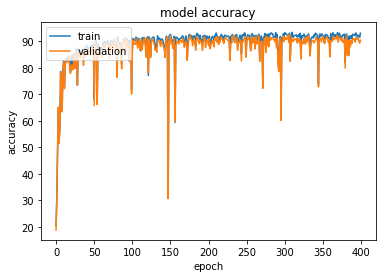

Maximum Train Accuracy : 93.44445037841797
Maximum Validation Accuracy : 92.44444274902344


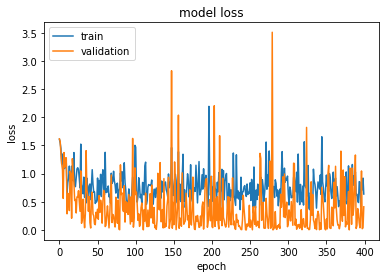

Minimum Train Loss : 0.28917041420936584
Minimum Validation Loss : 0.00022454903228208423


In [ ]:
Bacteria_model_phase_RMSprop_0001 = Bact_Net()
Bacteria_model_phase_RMSprop_0001.cuda()
trainer_RMSprop_phase_0001 = trainer(Bacteria_model_phase_RMSprop_0001, phase_train_loader,"RMSprop", epoch_size=400, learning_rate=0.001)
trainer_RMSprop_phase_0001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_RMSprop_phase_0001.history['train_acc'])
plt.plot(trainer_RMSprop_phase_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_RMSprop_phase_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_RMSprop_phase_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_RMSprop_phase_0001.history['train_loss'])
plt.plot(trainer_RMSprop_phase_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_RMSprop_phase_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_RMSprop_phase_0001.history['val_loss'])}")

# RMSprop_0.001_400epoch_L2reg



  0%|          | 0/400 [00:00<?, ?it/s]

Train Acc | Epoch 1/400 | ACC 19.666668


  0%|          | 1/400 [00:14<1:38:02, 14.74s/it]

Val Acc | Epoch 1/400 | ACC 21.333334
Train Acc | Epoch 2/400 | ACC 19.666668


  0%|          | 2/400 [00:29<1:35:55, 14.46s/it]

Val Acc | Epoch 2/400 | ACC 21.333334
Train Acc | Epoch 3/400 | ACC 20.305555


  1%|          | 3/400 [00:43<1:34:47, 14.33s/it]

Val Acc | Epoch 3/400 | ACC 18.777779
Train Acc | Epoch 4/400 | ACC 20.027777


  1%|          | 4/400 [00:57<1:34:20, 14.29s/it]

Val Acc | Epoch 4/400 | ACC 19.888889
Train Acc | Epoch 5/400 | ACC 20.305555


  1%|▏         | 5/400 [01:11<1:33:52, 14.26s/it]

Val Acc | Epoch 5/400 | ACC 18.777779
Train Acc | Epoch 6/400 | ACC 20.305555


  2%|▏         | 6/400 [01:25<1:33:40, 14.27s/it]

Val Acc | Epoch 6/400 | ACC 18.777779
Train Acc | Epoch 7/400 | ACC 20.027777


  2%|▏         | 7/400 [01:40<1:33:27, 14.27s/it]

Val Acc | Epoch 7/400 | ACC 19.888889
Train Acc | Epoch 8/400 | ACC 20.027777


  2%|▏         | 8/400 [01:54<1:33:03, 14.24s/it]

Val Acc | Epoch 8/400 | ACC 19.888889
Train Acc | Epoch 9/400 | ACC 20.027777


  2%|▏         | 9/400 [02:08<1:33:10, 14.30s/it]

Val Acc | Epoch 9/400 | ACC 19.888889
Train Acc | Epoch 10/400 | ACC 20.027777


  2%|▎         | 10/400 [02:22<1:32:28, 14.23s/it]

Val Acc | Epoch 10/400 | ACC 19.888889
Train Acc | Epoch 11/400 | ACC 20.305555


  3%|▎         | 11/400 [02:36<1:31:45, 14.15s/it]

Val Acc | Epoch 11/400 | ACC 18.777779
Train Acc | Epoch 12/400 | ACC 20.138889


  3%|▎         | 12/400 [02:50<1:30:41, 14.02s/it]

Val Acc | Epoch 12/400 | ACC 19.444445
Train Acc | Epoch 13/400 | ACC 20.027777


  3%|▎         | 13/400 [03:04<1:30:33, 14.04s/it]

Val Acc | Epoch 13/400 | ACC 19.888889
Train Acc | Epoch 14/400 | ACC 20.027777


  4%|▎         | 14/400 [03:19<1:31:04, 14.16s/it]

Val Acc | Epoch 14/400 | ACC 19.888889
Train Acc | Epoch 15/400 | ACC 20.138889


  4%|▍         | 15/400 [03:33<1:30:29, 14.10s/it]

Val Acc | Epoch 15/400 | ACC 19.444445
Train Acc | Epoch 16/400 | ACC 19.861111


  4%|▍         | 16/400 [03:46<1:29:53, 14.04s/it]

Val Acc | Epoch 16/400 | ACC 20.555555
Train Acc | Epoch 17/400 | ACC 19.861111


  4%|▍         | 17/400 [04:01<1:30:05, 14.11s/it]

Val Acc | Epoch 17/400 | ACC 20.555555
Train Acc | Epoch 18/400 | ACC 19.861111


  4%|▍         | 18/400 [04:15<1:30:13, 14.17s/it]

Val Acc | Epoch 18/400 | ACC 20.555555
Train Acc | Epoch 19/400 | ACC 19.861111


  5%|▍         | 19/400 [04:30<1:30:35, 14.27s/it]

Val Acc | Epoch 19/400 | ACC 20.555555
Train Acc | Epoch 20/400 | ACC 20.138889


  5%|▌         | 20/400 [04:44<1:30:25, 14.28s/it]

Val Acc | Epoch 20/400 | ACC 19.444445
Train Acc | Epoch 21/400 | ACC 20.305555


  5%|▌         | 21/400 [04:58<1:29:50, 14.22s/it]

Val Acc | Epoch 21/400 | ACC 18.777779
Train Acc | Epoch 22/400 | ACC 20.027777


  6%|▌         | 22/400 [05:13<1:31:10, 14.47s/it]

Val Acc | Epoch 22/400 | ACC 19.888889
Train Acc | Epoch 23/400 | ACC 20.305555


  6%|▌         | 23/400 [05:28<1:31:09, 14.51s/it]

Val Acc | Epoch 23/400 | ACC 18.777779
Train Acc | Epoch 24/400 | ACC 20.027777


  6%|▌         | 24/400 [05:42<1:30:36, 14.46s/it]

Val Acc | Epoch 24/400 | ACC 19.888889
Train Acc | Epoch 25/400 | ACC 19.666668


  6%|▋         | 25/400 [05:56<1:29:15, 14.28s/it]

Val Acc | Epoch 25/400 | ACC 21.333334
Train Acc | Epoch 26/400 | ACC 20.027777


  6%|▋         | 26/400 [06:10<1:28:37, 14.22s/it]

Val Acc | Epoch 26/400 | ACC 19.888889
Train Acc | Epoch 27/400 | ACC 20.027777


  7%|▋         | 27/400 [06:24<1:27:55, 14.14s/it]

Val Acc | Epoch 27/400 | ACC 19.888889
Train Acc | Epoch 28/400 | ACC 20.305555


  7%|▋         | 28/400 [06:38<1:27:20, 14.09s/it]

Val Acc | Epoch 28/400 | ACC 18.777779
Train Acc | Epoch 29/400 | ACC 20.027777


  7%|▋         | 29/400 [06:52<1:27:30, 14.15s/it]

Val Acc | Epoch 29/400 | ACC 19.888889
Train Acc | Epoch 30/400 | ACC 20.305555


  8%|▊         | 30/400 [07:06<1:26:57, 14.10s/it]

Val Acc | Epoch 30/400 | ACC 18.777779
Train Acc | Epoch 31/400 | ACC 20.305555


  8%|▊         | 31/400 [07:20<1:27:03, 14.16s/it]

Val Acc | Epoch 31/400 | ACC 18.777779
Train Acc | Epoch 32/400 | ACC 20.305555


  8%|▊         | 32/400 [07:35<1:26:56, 14.18s/it]

Val Acc | Epoch 32/400 | ACC 18.777779
Train Acc | Epoch 33/400 | ACC 20.305555


  8%|▊         | 33/400 [07:49<1:26:35, 14.16s/it]

Val Acc | Epoch 33/400 | ACC 18.777779
Train Acc | Epoch 34/400 | ACC 20.305555


  8%|▊         | 34/400 [08:03<1:26:33, 14.19s/it]

Val Acc | Epoch 34/400 | ACC 18.777779
Train Acc | Epoch 35/400 | ACC 19.861111


  9%|▉         | 35/400 [08:17<1:26:10, 14.17s/it]

Val Acc | Epoch 35/400 | ACC 20.555555
Train Acc | Epoch 36/400 | ACC 20.305555


  9%|▉         | 36/400 [08:31<1:25:38, 14.12s/it]

Val Acc | Epoch 36/400 | ACC 18.777779
Train Acc | Epoch 37/400 | ACC 20.305555


  9%|▉         | 37/400 [08:45<1:25:18, 14.10s/it]

Val Acc | Epoch 37/400 | ACC 18.777779
Train Acc | Epoch 38/400 | ACC 20.138889


 10%|▉         | 38/400 [09:00<1:25:42, 14.20s/it]

Val Acc | Epoch 38/400 | ACC 19.444445
Train Acc | Epoch 39/400 | ACC 20.305555


 10%|▉         | 39/400 [09:14<1:25:05, 14.14s/it]

Val Acc | Epoch 39/400 | ACC 18.777779
Train Acc | Epoch 40/400 | ACC 20.305555


 10%|█         | 40/400 [09:27<1:24:29, 14.08s/it]

Val Acc | Epoch 40/400 | ACC 18.777779
Train Acc | Epoch 41/400 | ACC 19.861111


 10%|█         | 41/400 [09:42<1:24:22, 14.10s/it]

Val Acc | Epoch 41/400 | ACC 20.555555
Train Acc | Epoch 42/400 | ACC 20.027777


 10%|█         | 42/400 [09:56<1:24:07, 14.10s/it]

Val Acc | Epoch 42/400 | ACC 19.888889
Train Acc | Epoch 43/400 | ACC 19.666668


 11%|█         | 43/400 [10:10<1:23:19, 14.00s/it]

Val Acc | Epoch 43/400 | ACC 21.333334
Train Acc | Epoch 44/400 | ACC 20.305555


 11%|█         | 44/400 [10:24<1:24:27, 14.24s/it]

Val Acc | Epoch 44/400 | ACC 18.777779
Train Acc | Epoch 45/400 | ACC 20.305555


 11%|█▏        | 45/400 [10:39<1:24:51, 14.34s/it]

Val Acc | Epoch 45/400 | ACC 18.777779
Train Acc | Epoch 46/400 | ACC 20.027777


 12%|█▏        | 46/400 [10:53<1:23:57, 14.23s/it]

Val Acc | Epoch 46/400 | ACC 19.888889
Train Acc | Epoch 47/400 | ACC 20.138889


 12%|█▏        | 47/400 [11:07<1:23:34, 14.21s/it]

Val Acc | Epoch 47/400 | ACC 19.444445
Train Acc | Epoch 48/400 | ACC 20.138889


 12%|█▏        | 48/400 [11:21<1:23:01, 14.15s/it]

Val Acc | Epoch 48/400 | ACC 19.444445
Train Acc | Epoch 49/400 | ACC 19.861111


 12%|█▏        | 49/400 [11:35<1:22:40, 14.13s/it]

Val Acc | Epoch 49/400 | ACC 20.555555
Train Acc | Epoch 50/400 | ACC 20.305555


 12%|█▎        | 50/400 [11:49<1:22:31, 14.15s/it]

Val Acc | Epoch 50/400 | ACC 18.777779
Train Acc | Epoch 51/400 | ACC 20.305555


 13%|█▎        | 51/400 [12:04<1:22:27, 14.18s/it]

Val Acc | Epoch 51/400 | ACC 18.777779
Train Acc | Epoch 52/400 | ACC 20.305555


 13%|█▎        | 52/400 [12:17<1:21:37, 14.07s/it]

Val Acc | Epoch 52/400 | ACC 18.777779
Train Acc | Epoch 53/400 | ACC 20.138889


 13%|█▎        | 53/400 [12:31<1:21:06, 14.02s/it]

Val Acc | Epoch 53/400 | ACC 19.444445
Train Acc | Epoch 54/400 | ACC 20.027777


 14%|█▎        | 54/400 [12:45<1:21:05, 14.06s/it]

Val Acc | Epoch 54/400 | ACC 19.888889
Train Acc | Epoch 55/400 | ACC 20.138889


 14%|█▍        | 55/400 [13:00<1:21:03, 14.10s/it]

Val Acc | Epoch 55/400 | ACC 19.444445
Train Acc | Epoch 56/400 | ACC 20.305555


 14%|█▍        | 56/400 [13:14<1:20:45, 14.09s/it]

Val Acc | Epoch 56/400 | ACC 18.777779
Train Acc | Epoch 57/400 | ACC 20.305555


 14%|█▍        | 57/400 [13:28<1:20:38, 14.11s/it]

Val Acc | Epoch 57/400 | ACC 18.777779
Train Acc | Epoch 58/400 | ACC 20.138889


 14%|█▍        | 58/400 [13:42<1:19:58, 14.03s/it]

Val Acc | Epoch 58/400 | ACC 19.444445
Train Acc | Epoch 59/400 | ACC 19.666668


 15%|█▍        | 59/400 [13:56<1:19:55, 14.06s/it]

Val Acc | Epoch 59/400 | ACC 21.333334
Train Acc | Epoch 60/400 | ACC 19.666668


 15%|█▌        | 60/400 [14:10<1:19:24, 14.01s/it]

Val Acc | Epoch 60/400 | ACC 21.333334
Train Acc | Epoch 61/400 | ACC 20.138889


 15%|█▌        | 61/400 [14:24<1:19:07, 14.00s/it]

Val Acc | Epoch 61/400 | ACC 19.444445
Train Acc | Epoch 62/400 | ACC 20.138889


 16%|█▌        | 62/400 [14:38<1:19:04, 14.04s/it]

Val Acc | Epoch 62/400 | ACC 19.444445
Train Acc | Epoch 63/400 | ACC 20.138889


 16%|█▌        | 63/400 [14:52<1:18:49, 14.03s/it]

Val Acc | Epoch 63/400 | ACC 19.444445
Train Acc | Epoch 64/400 | ACC 20.027777


 16%|█▌        | 64/400 [15:06<1:18:34, 14.03s/it]

Val Acc | Epoch 64/400 | ACC 19.888889
Train Acc | Epoch 65/400 | ACC 20.305555


 16%|█▋        | 65/400 [15:20<1:18:20, 14.03s/it]

Val Acc | Epoch 65/400 | ACC 18.777779
Train Acc | Epoch 66/400 | ACC 20.027777


 16%|█▋        | 66/400 [15:34<1:18:53, 14.17s/it]

Val Acc | Epoch 66/400 | ACC 19.888889
Train Acc | Epoch 67/400 | ACC 20.305555


 17%|█▋        | 67/400 [15:49<1:19:02, 14.24s/it]

Val Acc | Epoch 67/400 | ACC 18.777779
Train Acc | Epoch 68/400 | ACC 19.666668


 17%|█▋        | 68/400 [16:03<1:18:22, 14.17s/it]

Val Acc | Epoch 68/400 | ACC 21.333334
Train Acc | Epoch 69/400 | ACC 20.138889


 17%|█▋        | 69/400 [16:17<1:17:53, 14.12s/it]

Val Acc | Epoch 69/400 | ACC 19.444445
Train Acc | Epoch 70/400 | ACC 20.305555


 18%|█▊        | 70/400 [16:31<1:17:30, 14.09s/it]

Val Acc | Epoch 70/400 | ACC 18.777779
Train Acc | Epoch 71/400 | ACC 19.666668


 18%|█▊        | 71/400 [16:45<1:17:22, 14.11s/it]

Val Acc | Epoch 71/400 | ACC 21.333334
Train Acc | Epoch 72/400 | ACC 19.861111


 18%|█▊        | 72/400 [16:59<1:17:24, 14.16s/it]

Val Acc | Epoch 72/400 | ACC 20.555555
Train Acc | Epoch 73/400 | ACC 20.138889


 18%|█▊        | 73/400 [17:13<1:17:12, 14.17s/it]

Val Acc | Epoch 73/400 | ACC 19.444445
Train Acc | Epoch 74/400 | ACC 20.027777


 18%|█▊        | 74/400 [17:27<1:16:30, 14.08s/it]

Val Acc | Epoch 74/400 | ACC 19.888889
Train Acc | Epoch 75/400 | ACC 20.027777


 19%|█▉        | 75/400 [17:41<1:16:07, 14.05s/it]

Val Acc | Epoch 75/400 | ACC 19.888889
Train Acc | Epoch 76/400 | ACC 20.305555


 19%|█▉        | 76/400 [17:55<1:15:38, 14.01s/it]

Val Acc | Epoch 76/400 | ACC 18.777779
Train Acc | Epoch 77/400 | ACC 20.305555


 19%|█▉        | 77/400 [18:09<1:15:44, 14.07s/it]

Val Acc | Epoch 77/400 | ACC 18.777779
Train Acc | Epoch 78/400 | ACC 20.305555


 20%|█▉        | 78/400 [18:23<1:15:12, 14.01s/it]

Val Acc | Epoch 78/400 | ACC 18.777779
Train Acc | Epoch 79/400 | ACC 20.138889


 20%|█▉        | 79/400 [18:37<1:15:03, 14.03s/it]

Val Acc | Epoch 79/400 | ACC 19.444445
Train Acc | Epoch 80/400 | ACC 20.305555


 20%|██        | 80/400 [18:52<1:15:00, 14.06s/it]

Val Acc | Epoch 80/400 | ACC 18.777779
Train Acc | Epoch 81/400 | ACC 19.861111


 20%|██        | 81/400 [19:06<1:14:42, 14.05s/it]

Val Acc | Epoch 81/400 | ACC 20.555555
Train Acc | Epoch 82/400 | ACC 20.305555


 20%|██        | 82/400 [19:20<1:14:49, 14.12s/it]

Val Acc | Epoch 82/400 | ACC 18.777779
Train Acc | Epoch 83/400 | ACC 19.861111


 21%|██        | 83/400 [19:34<1:14:42, 14.14s/it]

Val Acc | Epoch 83/400 | ACC 20.555555
Train Acc | Epoch 84/400 | ACC 19.861111


 21%|██        | 84/400 [19:48<1:14:02, 14.06s/it]

Val Acc | Epoch 84/400 | ACC 20.555555
Train Acc | Epoch 85/400 | ACC 20.138889


 21%|██▏       | 85/400 [20:02<1:13:23, 13.98s/it]

Val Acc | Epoch 85/400 | ACC 19.444445
Train Acc | Epoch 86/400 | ACC 20.138889


 22%|██▏       | 86/400 [20:16<1:13:38, 14.07s/it]

Val Acc | Epoch 86/400 | ACC 19.444445
Train Acc | Epoch 87/400 | ACC 20.305555


 22%|██▏       | 87/400 [20:30<1:13:18, 14.05s/it]

Val Acc | Epoch 87/400 | ACC 18.777779
Train Acc | Epoch 88/400 | ACC 20.305555


 22%|██▏       | 88/400 [20:44<1:13:19, 14.10s/it]

Val Acc | Epoch 88/400 | ACC 18.777779
Train Acc | Epoch 89/400 | ACC 20.138889


 22%|██▏       | 89/400 [20:58<1:13:14, 14.13s/it]

Val Acc | Epoch 89/400 | ACC 19.444445
Train Acc | Epoch 90/400 | ACC 20.305555


 22%|██▎       | 90/400 [21:12<1:12:48, 14.09s/it]

Val Acc | Epoch 90/400 | ACC 18.777779
Train Acc | Epoch 91/400 | ACC 19.861111


 23%|██▎       | 91/400 [21:26<1:11:57, 13.97s/it]

Val Acc | Epoch 91/400 | ACC 20.555555
Train Acc | Epoch 92/400 | ACC 20.027777


 23%|██▎       | 92/400 [21:40<1:11:42, 13.97s/it]

Val Acc | Epoch 92/400 | ACC 19.888889
Train Acc | Epoch 93/400 | ACC 19.861111


 23%|██▎       | 93/400 [21:54<1:11:38, 14.00s/it]

Val Acc | Epoch 93/400 | ACC 20.555555
Train Acc | Epoch 94/400 | ACC 20.138889


 24%|██▎       | 94/400 [22:08<1:11:15, 13.97s/it]

Val Acc | Epoch 94/400 | ACC 19.444445
Train Acc | Epoch 95/400 | ACC 20.305555


 24%|██▍       | 95/400 [22:22<1:11:29, 14.06s/it]

Val Acc | Epoch 95/400 | ACC 18.777779
Train Acc | Epoch 96/400 | ACC 20.027777


 24%|██▍       | 96/400 [22:37<1:11:36, 14.13s/it]

Val Acc | Epoch 96/400 | ACC 19.888889
Train Acc | Epoch 97/400 | ACC 20.138889


 24%|██▍       | 97/400 [22:50<1:10:48, 14.02s/it]

Val Acc | Epoch 97/400 | ACC 19.444445
Train Acc | Epoch 98/400 | ACC 20.138889


 24%|██▍       | 98/400 [23:05<1:10:50, 14.07s/it]

Val Acc | Epoch 98/400 | ACC 19.444445
Train Acc | Epoch 99/400 | ACC 19.861111


 25%|██▍       | 99/400 [23:18<1:10:19, 14.02s/it]

Val Acc | Epoch 99/400 | ACC 20.555555
Train Acc | Epoch 100/400 | ACC 19.666668


 25%|██▌       | 100/400 [23:32<1:09:45, 13.95s/it]

Val Acc | Epoch 100/400 | ACC 21.333334
Train Acc | Epoch 101/400 | ACC 20.305555


 25%|██▌       | 101/400 [23:46<1:09:32, 13.95s/it]

Val Acc | Epoch 101/400 | ACC 18.777779
Train Acc | Epoch 102/400 | ACC 20.305555


 26%|██▌       | 102/400 [24:00<1:09:19, 13.96s/it]

Val Acc | Epoch 102/400 | ACC 18.777779
Train Acc | Epoch 103/400 | ACC 19.861111


 26%|██▌       | 103/400 [24:14<1:08:36, 13.86s/it]

Val Acc | Epoch 103/400 | ACC 20.555555
Train Acc | Epoch 104/400 | ACC 19.666668


 26%|██▌       | 104/400 [24:28<1:08:48, 13.95s/it]

Val Acc | Epoch 104/400 | ACC 21.333334
Train Acc | Epoch 105/400 | ACC 19.666668


 26%|██▋       | 105/400 [24:42<1:08:26, 13.92s/it]

Val Acc | Epoch 105/400 | ACC 21.333334
Train Acc | Epoch 106/400 | ACC 20.138889


 26%|██▋       | 106/400 [24:56<1:08:02, 13.89s/it]

Val Acc | Epoch 106/400 | ACC 19.444445
Train Acc | Epoch 107/400 | ACC 20.027777


 27%|██▋       | 107/400 [25:10<1:08:06, 13.95s/it]

Val Acc | Epoch 107/400 | ACC 19.888889
Train Acc | Epoch 108/400 | ACC 20.138889


 27%|██▋       | 108/400 [25:24<1:08:16, 14.03s/it]

Val Acc | Epoch 108/400 | ACC 19.444445
Train Acc | Epoch 109/400 | ACC 20.027777


 27%|██▋       | 109/400 [25:38<1:08:41, 14.16s/it]

Val Acc | Epoch 109/400 | ACC 19.888889
Train Acc | Epoch 110/400 | ACC 20.138889


 28%|██▊       | 110/400 [25:53<1:09:18, 14.34s/it]

Val Acc | Epoch 110/400 | ACC 19.444445
Train Acc | Epoch 111/400 | ACC 20.138889


 28%|██▊       | 111/400 [26:08<1:09:29, 14.43s/it]

Val Acc | Epoch 111/400 | ACC 19.444445
Train Acc | Epoch 112/400 | ACC 20.138889


 28%|██▊       | 112/400 [26:22<1:08:39, 14.30s/it]

Val Acc | Epoch 112/400 | ACC 19.444445
Train Acc | Epoch 113/400 | ACC 20.138889


 28%|██▊       | 113/400 [26:36<1:07:47, 14.17s/it]

Val Acc | Epoch 113/400 | ACC 19.444445
Train Acc | Epoch 114/400 | ACC 20.138889


 28%|██▊       | 114/400 [26:50<1:07:26, 14.15s/it]

Val Acc | Epoch 114/400 | ACC 19.444445
Train Acc | Epoch 115/400 | ACC 20.305555


 29%|██▉       | 115/400 [27:04<1:07:12, 14.15s/it]

Val Acc | Epoch 115/400 | ACC 18.777779
Train Acc | Epoch 116/400 | ACC 20.305555


 29%|██▉       | 116/400 [27:18<1:07:19, 14.22s/it]

Val Acc | Epoch 116/400 | ACC 18.777779
Train Acc | Epoch 117/400 | ACC 20.305555


 29%|██▉       | 117/400 [27:33<1:07:13, 14.25s/it]

Val Acc | Epoch 117/400 | ACC 18.777779
Train Acc | Epoch 118/400 | ACC 20.305555


 30%|██▉       | 118/400 [27:47<1:07:02, 14.26s/it]

Val Acc | Epoch 118/400 | ACC 18.777779
Train Acc | Epoch 119/400 | ACC 20.138889


 30%|██▉       | 119/400 [28:01<1:06:48, 14.26s/it]

Val Acc | Epoch 119/400 | ACC 19.444445
Train Acc | Epoch 120/400 | ACC 20.138889


 30%|███       | 120/400 [28:15<1:06:29, 14.25s/it]

Val Acc | Epoch 120/400 | ACC 19.444445
Train Acc | Epoch 121/400 | ACC 20.138889


 30%|███       | 121/400 [28:29<1:05:38, 14.12s/it]

Val Acc | Epoch 121/400 | ACC 19.444445
Train Acc | Epoch 122/400 | ACC 20.027777


 30%|███       | 122/400 [28:43<1:05:20, 14.10s/it]

Val Acc | Epoch 122/400 | ACC 19.888889
Train Acc | Epoch 123/400 | ACC 20.305555


 31%|███       | 123/400 [28:57<1:04:49, 14.04s/it]

Val Acc | Epoch 123/400 | ACC 18.777779
Train Acc | Epoch 124/400 | ACC 20.305555


 31%|███       | 124/400 [29:11<1:04:52, 14.10s/it]

Val Acc | Epoch 124/400 | ACC 18.777779
Train Acc | Epoch 125/400 | ACC 20.305555


 31%|███▏      | 125/400 [29:26<1:05:05, 14.20s/it]

Val Acc | Epoch 125/400 | ACC 18.777779
Train Acc | Epoch 126/400 | ACC 20.305555


 32%|███▏      | 126/400 [29:40<1:04:39, 14.16s/it]

Val Acc | Epoch 126/400 | ACC 18.777779
Train Acc | Epoch 127/400 | ACC 20.027777


 32%|███▏      | 127/400 [29:54<1:04:38, 14.21s/it]

Val Acc | Epoch 127/400 | ACC 19.888889
Train Acc | Epoch 128/400 | ACC 20.027777


 32%|███▏      | 128/400 [30:08<1:04:19, 14.19s/it]

Val Acc | Epoch 128/400 | ACC 19.888889
Train Acc | Epoch 129/400 | ACC 20.305555


 32%|███▏      | 129/400 [30:23<1:04:19, 14.24s/it]

Val Acc | Epoch 129/400 | ACC 18.777779
Train Acc | Epoch 130/400 | ACC 20.305555


 32%|███▎      | 130/400 [30:37<1:03:56, 14.21s/it]

Val Acc | Epoch 130/400 | ACC 18.777779
Train Acc | Epoch 131/400 | ACC 19.666668


 33%|███▎      | 131/400 [30:51<1:03:47, 14.23s/it]

Val Acc | Epoch 131/400 | ACC 21.333334
Train Acc | Epoch 132/400 | ACC 20.027777


 33%|███▎      | 132/400 [31:06<1:04:47, 14.51s/it]

Val Acc | Epoch 132/400 | ACC 19.888889
Train Acc | Epoch 133/400 | ACC 20.305555


 33%|███▎      | 133/400 [31:21<1:04:41, 14.54s/it]

Val Acc | Epoch 133/400 | ACC 18.777779
Train Acc | Epoch 134/400 | ACC 20.305555


 34%|███▎      | 134/400 [31:35<1:04:18, 14.51s/it]

Val Acc | Epoch 134/400 | ACC 18.777779
Train Acc | Epoch 135/400 | ACC 20.138889


 34%|███▍      | 135/400 [31:50<1:03:43, 14.43s/it]

Val Acc | Epoch 135/400 | ACC 19.444445
Train Acc | Epoch 136/400 | ACC 19.861111


 34%|███▍      | 136/400 [32:04<1:03:23, 14.41s/it]

Val Acc | Epoch 136/400 | ACC 20.555555
Train Acc | Epoch 137/400 | ACC 20.138889


 34%|███▍      | 137/400 [32:18<1:02:48, 14.33s/it]

Val Acc | Epoch 137/400 | ACC 19.444445
Train Acc | Epoch 138/400 | ACC 20.305555


 34%|███▍      | 138/400 [32:32<1:01:41, 14.13s/it]

Val Acc | Epoch 138/400 | ACC 18.777779
Train Acc | Epoch 139/400 | ACC 20.305555


 35%|███▍      | 139/400 [32:46<1:01:07, 14.05s/it]

Val Acc | Epoch 139/400 | ACC 18.777779
Train Acc | Epoch 140/400 | ACC 20.305555


 35%|███▌      | 140/400 [33:00<1:01:03, 14.09s/it]

Val Acc | Epoch 140/400 | ACC 18.777779
Train Acc | Epoch 141/400 | ACC 19.861111


 35%|███▌      | 141/400 [33:14<1:00:44, 14.07s/it]

Val Acc | Epoch 141/400 | ACC 20.555555
Train Acc | Epoch 142/400 | ACC 19.666668


 36%|███▌      | 142/400 [33:28<1:00:20, 14.03s/it]

Val Acc | Epoch 142/400 | ACC 21.333334
Train Acc | Epoch 143/400 | ACC 20.305555


 36%|███▌      | 143/400 [33:41<59:38, 13.92s/it]  

Val Acc | Epoch 143/400 | ACC 18.777779
Train Acc | Epoch 144/400 | ACC 20.305555


 36%|███▌      | 144/400 [33:55<59:10, 13.87s/it]

Val Acc | Epoch 144/400 | ACC 18.777779
Train Acc | Epoch 145/400 | ACC 20.138889


 36%|███▋      | 145/400 [34:09<58:54, 13.86s/it]

Val Acc | Epoch 145/400 | ACC 19.444445
Train Acc | Epoch 146/400 | ACC 20.305555


 36%|███▋      | 146/400 [34:23<58:51, 13.91s/it]

Val Acc | Epoch 146/400 | ACC 18.777779
Train Acc | Epoch 147/400 | ACC 20.305555


 37%|███▋      | 147/400 [34:37<58:57, 13.98s/it]

Val Acc | Epoch 147/400 | ACC 18.777779
Train Acc | Epoch 148/400 | ACC 20.305555


 37%|███▋      | 148/400 [34:51<58:42, 13.98s/it]

Val Acc | Epoch 148/400 | ACC 18.777779
Train Acc | Epoch 149/400 | ACC 20.305555


 37%|███▋      | 149/400 [35:05<58:48, 14.06s/it]

Val Acc | Epoch 149/400 | ACC 18.777779
Train Acc | Epoch 150/400 | ACC 20.305555


 38%|███▊      | 150/400 [35:20<58:54, 14.14s/it]

Val Acc | Epoch 150/400 | ACC 18.777779
Train Acc | Epoch 151/400 | ACC 20.305555


 38%|███▊      | 151/400 [35:34<58:35, 14.12s/it]

Val Acc | Epoch 151/400 | ACC 18.777779
Train Acc | Epoch 152/400 | ACC 20.027777


 38%|███▊      | 152/400 [35:48<58:00, 14.04s/it]

Val Acc | Epoch 152/400 | ACC 19.888889
Train Acc | Epoch 153/400 | ACC 19.861111


 38%|███▊      | 153/400 [36:02<57:37, 14.00s/it]

Val Acc | Epoch 153/400 | ACC 20.555555
Train Acc | Epoch 154/400 | ACC 20.138889


 38%|███▊      | 154/400 [36:16<58:28, 14.26s/it]

Val Acc | Epoch 154/400 | ACC 19.444445
Train Acc | Epoch 155/400 | ACC 20.305555


 39%|███▉      | 155/400 [36:31<58:20, 14.29s/it]

Val Acc | Epoch 155/400 | ACC 18.777779
Train Acc | Epoch 156/400 | ACC 20.138889


 39%|███▉      | 156/400 [36:45<57:59, 14.26s/it]

Val Acc | Epoch 156/400 | ACC 19.444445
Train Acc | Epoch 157/400 | ACC 20.305555


 39%|███▉      | 157/400 [36:59<57:35, 14.22s/it]

Val Acc | Epoch 157/400 | ACC 18.777779
Train Acc | Epoch 158/400 | ACC 20.305555


 40%|███▉      | 158/400 [37:13<57:11, 14.18s/it]

Val Acc | Epoch 158/400 | ACC 18.777779
Train Acc | Epoch 159/400 | ACC 20.305555


 40%|███▉      | 159/400 [37:27<56:46, 14.13s/it]

Val Acc | Epoch 159/400 | ACC 18.777779
Train Acc | Epoch 160/400 | ACC 20.305555


 40%|████      | 160/400 [37:41<56:29, 14.12s/it]

Val Acc | Epoch 160/400 | ACC 18.777779
Train Acc | Epoch 161/400 | ACC 20.305555


 40%|████      | 161/400 [37:55<56:13, 14.12s/it]

Val Acc | Epoch 161/400 | ACC 18.777779
Train Acc | Epoch 162/400 | ACC 20.305555


 40%|████      | 162/400 [38:09<55:46, 14.06s/it]

Val Acc | Epoch 162/400 | ACC 18.777779
Train Acc | Epoch 163/400 | ACC 20.138889


 41%|████      | 163/400 [38:23<55:25, 14.03s/it]

Val Acc | Epoch 163/400 | ACC 19.444445
Train Acc | Epoch 164/400 | ACC 20.305555


 41%|████      | 164/400 [38:37<55:20, 14.07s/it]

Val Acc | Epoch 164/400 | ACC 18.777779
Train Acc | Epoch 165/400 | ACC 20.305555


 41%|████▏     | 165/400 [38:51<54:46, 13.98s/it]

Val Acc | Epoch 165/400 | ACC 18.777779
Train Acc | Epoch 166/400 | ACC 20.305555


 42%|████▏     | 166/400 [39:05<54:26, 13.96s/it]

Val Acc | Epoch 166/400 | ACC 18.777779
Train Acc | Epoch 167/400 | ACC 20.138889


 42%|████▏     | 167/400 [39:19<54:11, 13.96s/it]

Val Acc | Epoch 167/400 | ACC 19.444445
Train Acc | Epoch 168/400 | ACC 20.027777


 42%|████▏     | 168/400 [39:33<54:03, 13.98s/it]

Val Acc | Epoch 168/400 | ACC 19.888889
Train Acc | Epoch 169/400 | ACC 20.305555


 42%|████▏     | 169/400 [39:47<53:44, 13.96s/it]

Val Acc | Epoch 169/400 | ACC 18.777779
Train Acc | Epoch 170/400 | ACC 20.305555


 42%|████▎     | 170/400 [40:01<53:44, 14.02s/it]

Val Acc | Epoch 170/400 | ACC 18.777779
Train Acc | Epoch 171/400 | ACC 20.305555


 43%|████▎     | 171/400 [40:15<53:26, 14.00s/it]

Val Acc | Epoch 171/400 | ACC 18.777779
Train Acc | Epoch 172/400 | ACC 20.305555


 43%|████▎     | 172/400 [40:29<52:55, 13.93s/it]

Val Acc | Epoch 172/400 | ACC 18.777779
Train Acc | Epoch 173/400 | ACC 20.027777


 43%|████▎     | 173/400 [40:43<52:49, 13.96s/it]

Val Acc | Epoch 173/400 | ACC 19.888889
Train Acc | Epoch 174/400 | ACC 20.027777


 44%|████▎     | 174/400 [40:57<52:53, 14.04s/it]

Val Acc | Epoch 174/400 | ACC 19.888889
Train Acc | Epoch 175/400 | ACC 20.305555


 44%|████▍     | 175/400 [41:11<52:17, 13.94s/it]

Val Acc | Epoch 175/400 | ACC 18.777779
Train Acc | Epoch 176/400 | ACC 20.138889


 44%|████▍     | 176/400 [41:26<52:52, 14.16s/it]

Val Acc | Epoch 176/400 | ACC 19.444445
Train Acc | Epoch 177/400 | ACC 20.027777


 44%|████▍     | 177/400 [41:40<52:49, 14.21s/it]

Val Acc | Epoch 177/400 | ACC 19.888889
Train Acc | Epoch 178/400 | ACC 20.305555


 44%|████▍     | 178/400 [41:54<52:43, 14.25s/it]

Val Acc | Epoch 178/400 | ACC 18.777779
Train Acc | Epoch 179/400 | ACC 20.305555


 45%|████▍     | 179/400 [42:08<52:06, 14.15s/it]

Val Acc | Epoch 179/400 | ACC 18.777779
Train Acc | Epoch 180/400 | ACC 20.305555


 45%|████▌     | 180/400 [42:22<51:52, 14.15s/it]

Val Acc | Epoch 180/400 | ACC 18.777779
Train Acc | Epoch 181/400 | ACC 19.861111


 45%|████▌     | 181/400 [42:37<51:41, 14.16s/it]

Val Acc | Epoch 181/400 | ACC 20.555555
Train Acc | Epoch 182/400 | ACC 20.305555


 46%|████▌     | 182/400 [42:51<51:19, 14.13s/it]

Val Acc | Epoch 182/400 | ACC 18.777779
Train Acc | Epoch 183/400 | ACC 19.861111


 46%|████▌     | 183/400 [43:05<51:21, 14.20s/it]

Val Acc | Epoch 183/400 | ACC 20.555555
Train Acc | Epoch 184/400 | ACC 20.305555


 46%|████▌     | 184/400 [43:19<51:20, 14.26s/it]

Val Acc | Epoch 184/400 | ACC 18.777779
Train Acc | Epoch 185/400 | ACC 20.305555


 46%|████▋     | 185/400 [43:33<50:54, 14.21s/it]

Val Acc | Epoch 185/400 | ACC 18.777779
Train Acc | Epoch 186/400 | ACC 20.305555


 46%|████▋     | 186/400 [43:47<50:31, 14.17s/it]

Val Acc | Epoch 186/400 | ACC 18.777779
Train Acc | Epoch 187/400 | ACC 20.138889


 47%|████▋     | 187/400 [44:02<50:15, 14.16s/it]

Val Acc | Epoch 187/400 | ACC 19.444445
Train Acc | Epoch 188/400 | ACC 20.138889


 47%|████▋     | 188/400 [44:16<50:01, 14.16s/it]

Val Acc | Epoch 188/400 | ACC 19.444445
Train Acc | Epoch 189/400 | ACC 19.861111


 47%|████▋     | 189/400 [44:29<49:19, 14.02s/it]

Val Acc | Epoch 189/400 | ACC 20.555555
Train Acc | Epoch 190/400 | ACC 19.861111


 48%|████▊     | 190/400 [44:44<49:21, 14.10s/it]

Val Acc | Epoch 190/400 | ACC 20.555555
Train Acc | Epoch 191/400 | ACC 20.027777


 48%|████▊     | 191/400 [44:58<49:13, 14.13s/it]

Val Acc | Epoch 191/400 | ACC 19.888889
Train Acc | Epoch 192/400 | ACC 19.861111


 48%|████▊     | 192/400 [45:12<49:00, 14.14s/it]

Val Acc | Epoch 192/400 | ACC 20.555555
Train Acc | Epoch 193/400 | ACC 20.305555


 48%|████▊     | 193/400 [45:26<48:41, 14.11s/it]

Val Acc | Epoch 193/400 | ACC 18.777779
Train Acc | Epoch 194/400 | ACC 20.305555


 48%|████▊     | 194/400 [45:40<48:30, 14.13s/it]

Val Acc | Epoch 194/400 | ACC 18.777779
Train Acc | Epoch 195/400 | ACC 20.305555


 49%|████▉     | 195/400 [45:54<48:01, 14.06s/it]

Val Acc | Epoch 195/400 | ACC 18.777779
Train Acc | Epoch 196/400 | ACC 19.861111


 49%|████▉     | 196/400 [46:08<47:42, 14.03s/it]

Val Acc | Epoch 196/400 | ACC 20.555555
Train Acc | Epoch 197/400 | ACC 20.305555


 49%|████▉     | 197/400 [46:22<47:35, 14.06s/it]

Val Acc | Epoch 197/400 | ACC 18.777779
Train Acc | Epoch 198/400 | ACC 20.305555


 50%|████▉     | 198/400 [46:37<47:55, 14.24s/it]

Val Acc | Epoch 198/400 | ACC 18.777779
Train Acc | Epoch 199/400 | ACC 20.305555


 50%|████▉     | 199/400 [46:51<47:30, 14.18s/it]

Val Acc | Epoch 199/400 | ACC 18.777779
Train Acc | Epoch 200/400 | ACC 20.138889


 50%|█████     | 200/400 [47:05<46:52, 14.06s/it]

Val Acc | Epoch 200/400 | ACC 19.444445
Train Acc | Epoch 201/400 | ACC 20.305555


 50%|█████     | 201/400 [47:19<46:26, 14.00s/it]

Val Acc | Epoch 201/400 | ACC 18.777779
Train Acc | Epoch 202/400 | ACC 20.305555


 50%|█████     | 202/400 [47:32<45:56, 13.92s/it]

Val Acc | Epoch 202/400 | ACC 18.777779
Train Acc | Epoch 203/400 | ACC 20.305555


 51%|█████     | 203/400 [47:46<45:35, 13.89s/it]

Val Acc | Epoch 203/400 | ACC 18.777779
Train Acc | Epoch 204/400 | ACC 20.305555


 51%|█████     | 204/400 [48:00<45:16, 13.86s/it]

Val Acc | Epoch 204/400 | ACC 18.777779
Train Acc | Epoch 205/400 | ACC 20.305555


 51%|█████▏    | 205/400 [48:14<45:28, 13.99s/it]

Val Acc | Epoch 205/400 | ACC 18.777779
Train Acc | Epoch 206/400 | ACC 20.027777


 52%|█████▏    | 206/400 [48:28<45:09, 13.97s/it]

Val Acc | Epoch 206/400 | ACC 19.888889
Train Acc | Epoch 207/400 | ACC 20.305555


 52%|█████▏    | 207/400 [48:42<44:49, 13.94s/it]

Val Acc | Epoch 207/400 | ACC 18.777779
Train Acc | Epoch 208/400 | ACC 20.305555


 52%|█████▏    | 208/400 [48:56<44:24, 13.88s/it]

Val Acc | Epoch 208/400 | ACC 18.777779
Train Acc | Epoch 209/400 | ACC 19.861111


 52%|█████▏    | 209/400 [49:10<44:21, 13.93s/it]

Val Acc | Epoch 209/400 | ACC 20.555555
Train Acc | Epoch 210/400 | ACC 19.861111


 52%|█████▎    | 210/400 [49:24<44:12, 13.96s/it]

Val Acc | Epoch 210/400 | ACC 20.555555
Train Acc | Epoch 211/400 | ACC 20.305555


 53%|█████▎    | 211/400 [49:38<44:10, 14.02s/it]

Val Acc | Epoch 211/400 | ACC 18.777779
Train Acc | Epoch 212/400 | ACC 20.027777


 53%|█████▎    | 212/400 [49:52<43:49, 13.99s/it]

Val Acc | Epoch 212/400 | ACC 19.888889
Train Acc | Epoch 213/400 | ACC 20.305555


 53%|█████▎    | 213/400 [50:06<43:19, 13.90s/it]

Val Acc | Epoch 213/400 | ACC 18.777779
Train Acc | Epoch 214/400 | ACC 20.305555


 54%|█████▎    | 214/400 [50:20<43:24, 14.00s/it]

Val Acc | Epoch 214/400 | ACC 18.777779
Train Acc | Epoch 215/400 | ACC 20.305555


 54%|█████▍    | 215/400 [50:34<42:58, 13.94s/it]

Val Acc | Epoch 215/400 | ACC 18.777779
Train Acc | Epoch 216/400 | ACC 20.305555


 54%|█████▍    | 216/400 [50:48<42:58, 14.01s/it]

Val Acc | Epoch 216/400 | ACC 18.777779
Train Acc | Epoch 217/400 | ACC 20.305555


 54%|█████▍    | 217/400 [51:02<42:39, 13.99s/it]

Val Acc | Epoch 217/400 | ACC 18.777779
Train Acc | Epoch 218/400 | ACC 19.861111


 55%|█████▍    | 218/400 [51:16<42:41, 14.08s/it]

Val Acc | Epoch 218/400 | ACC 20.555555
Train Acc | Epoch 219/400 | ACC 20.305555


 55%|█████▍    | 219/400 [51:30<42:17, 14.02s/it]

Val Acc | Epoch 219/400 | ACC 18.777779
Train Acc | Epoch 220/400 | ACC 20.305555


 55%|█████▌    | 220/400 [51:44<42:26, 14.14s/it]

Val Acc | Epoch 220/400 | ACC 18.777779
Train Acc | Epoch 221/400 | ACC 20.305555


 55%|█████▌    | 221/400 [51:59<42:41, 14.31s/it]

Val Acc | Epoch 221/400 | ACC 18.777779
Train Acc | Epoch 222/400 | ACC 20.305555


 56%|█████▌    | 222/400 [52:13<41:57, 14.14s/it]

Val Acc | Epoch 222/400 | ACC 18.777779
Train Acc | Epoch 223/400 | ACC 20.305555


 56%|█████▌    | 223/400 [52:27<41:39, 14.12s/it]

Val Acc | Epoch 223/400 | ACC 18.777779
Train Acc | Epoch 224/400 | ACC 20.305555


 56%|█████▌    | 224/400 [52:41<41:11, 14.04s/it]

Val Acc | Epoch 224/400 | ACC 18.777779
Train Acc | Epoch 225/400 | ACC 19.861111


 56%|█████▋    | 225/400 [52:55<40:47, 13.99s/it]

Val Acc | Epoch 225/400 | ACC 20.555555
Train Acc | Epoch 226/400 | ACC 20.305555


 56%|█████▋    | 226/400 [53:08<40:13, 13.87s/it]

Val Acc | Epoch 226/400 | ACC 18.777779
Train Acc | Epoch 227/400 | ACC 20.305555


 57%|█████▋    | 227/400 [53:22<39:55, 13.85s/it]

Val Acc | Epoch 227/400 | ACC 18.777779
Train Acc | Epoch 228/400 | ACC 20.027777


 57%|█████▋    | 228/400 [53:36<39:47, 13.88s/it]

Val Acc | Epoch 228/400 | ACC 19.888889
Train Acc | Epoch 229/400 | ACC 20.305555


 57%|█████▋    | 229/400 [53:50<39:28, 13.85s/it]

Val Acc | Epoch 229/400 | ACC 18.777779
Train Acc | Epoch 230/400 | ACC 20.305555


 57%|█████▊    | 230/400 [54:04<39:31, 13.95s/it]

Val Acc | Epoch 230/400 | ACC 18.777779
Train Acc | Epoch 231/400 | ACC 20.305555


 58%|█████▊    | 231/400 [54:18<39:10, 13.91s/it]

Val Acc | Epoch 231/400 | ACC 18.777779
Train Acc | Epoch 232/400 | ACC 20.305555


 58%|█████▊    | 232/400 [54:32<38:53, 13.89s/it]

Val Acc | Epoch 232/400 | ACC 18.777779
Train Acc | Epoch 233/400 | ACC 20.305555


 58%|█████▊    | 233/400 [54:46<38:43, 13.92s/it]

Val Acc | Epoch 233/400 | ACC 18.777779
Train Acc | Epoch 234/400 | ACC 20.138889


 58%|█████▊    | 234/400 [55:00<38:37, 13.96s/it]

Val Acc | Epoch 234/400 | ACC 19.444445
Train Acc | Epoch 235/400 | ACC 20.138889


 59%|█████▉    | 235/400 [55:14<38:34, 14.03s/it]

Val Acc | Epoch 235/400 | ACC 19.444445
Train Acc | Epoch 236/400 | ACC 20.138889


 59%|█████▉    | 236/400 [55:28<38:31, 14.09s/it]

Val Acc | Epoch 236/400 | ACC 19.444445
Train Acc | Epoch 237/400 | ACC 20.138889


 59%|█████▉    | 237/400 [55:42<38:22, 14.12s/it]

Val Acc | Epoch 237/400 | ACC 19.444445
Train Acc | Epoch 238/400 | ACC 20.305555


 60%|█████▉    | 238/400 [55:56<38:07, 14.12s/it]

Val Acc | Epoch 238/400 | ACC 18.777779
Train Acc | Epoch 239/400 | ACC 20.305555


 60%|█████▉    | 239/400 [56:11<38:04, 14.19s/it]

Val Acc | Epoch 239/400 | ACC 18.777779
Train Acc | Epoch 240/400 | ACC 20.138889


 60%|██████    | 240/400 [56:25<37:46, 14.16s/it]

Val Acc | Epoch 240/400 | ACC 19.444445
Train Acc | Epoch 241/400 | ACC 20.305555


 60%|██████    | 241/400 [56:39<37:09, 14.02s/it]

Val Acc | Epoch 241/400 | ACC 18.777779
Train Acc | Epoch 242/400 | ACC 20.027777


 60%|██████    | 242/400 [56:53<37:19, 14.17s/it]

Val Acc | Epoch 242/400 | ACC 19.888889
Train Acc | Epoch 243/400 | ACC 20.027777


 61%|██████    | 243/400 [57:08<37:34, 14.36s/it]

Val Acc | Epoch 243/400 | ACC 19.888889
Train Acc | Epoch 244/400 | ACC 20.027777


 61%|██████    | 244/400 [57:22<37:10, 14.30s/it]

Val Acc | Epoch 244/400 | ACC 19.888889
Train Acc | Epoch 245/400 | ACC 20.027777


 61%|██████▏   | 245/400 [57:36<36:37, 14.18s/it]

Val Acc | Epoch 245/400 | ACC 19.888889
Train Acc | Epoch 246/400 | ACC 20.027777


 62%|██████▏   | 246/400 [57:50<36:21, 14.16s/it]

Val Acc | Epoch 246/400 | ACC 19.888889
Train Acc | Epoch 247/400 | ACC 20.027777


 62%|██████▏   | 247/400 [58:04<36:03, 14.14s/it]

Val Acc | Epoch 247/400 | ACC 19.888889
Train Acc | Epoch 248/400 | ACC 20.138889


 62%|██████▏   | 248/400 [58:18<35:38, 14.07s/it]

Val Acc | Epoch 248/400 | ACC 19.444445
Train Acc | Epoch 249/400 | ACC 20.027777


 62%|██████▏   | 249/400 [58:32<35:31, 14.12s/it]

Val Acc | Epoch 249/400 | ACC 19.888889
Train Acc | Epoch 250/400 | ACC 20.305555


 62%|██████▎   | 250/400 [58:46<35:05, 14.03s/it]

Val Acc | Epoch 250/400 | ACC 18.777779
Train Acc | Epoch 251/400 | ACC 20.138889


 63%|██████▎   | 251/400 [59:00<34:51, 14.04s/it]

Val Acc | Epoch 251/400 | ACC 19.444445
Train Acc | Epoch 252/400 | ACC 20.305555


 63%|██████▎   | 252/400 [59:14<34:28, 13.98s/it]

Val Acc | Epoch 252/400 | ACC 18.777779
Train Acc | Epoch 253/400 | ACC 20.305555


 63%|██████▎   | 253/400 [59:28<34:11, 13.96s/it]

Val Acc | Epoch 253/400 | ACC 18.777779
Train Acc | Epoch 254/400 | ACC 19.861111


 64%|██████▎   | 254/400 [59:42<33:56, 13.95s/it]

Val Acc | Epoch 254/400 | ACC 20.555555
Train Acc | Epoch 255/400 | ACC 19.861111


 64%|██████▍   | 255/400 [59:56<33:44, 13.96s/it]

Val Acc | Epoch 255/400 | ACC 20.555555
Train Acc | Epoch 256/400 | ACC 19.861111


 64%|██████▍   | 256/400 [1:00:10<33:21, 13.90s/it]

Val Acc | Epoch 256/400 | ACC 20.555555
Train Acc | Epoch 257/400 | ACC 20.305555


 64%|██████▍   | 257/400 [1:00:24<33:09, 13.91s/it]

Val Acc | Epoch 257/400 | ACC 18.777779
Train Acc | Epoch 258/400 | ACC 20.138889


 64%|██████▍   | 258/400 [1:00:37<32:51, 13.88s/it]

Val Acc | Epoch 258/400 | ACC 19.444445
Train Acc | Epoch 259/400 | ACC 20.138889


 65%|██████▍   | 259/400 [1:00:51<32:32, 13.85s/it]

Val Acc | Epoch 259/400 | ACC 19.444445
Train Acc | Epoch 260/400 | ACC 20.138889


 65%|██████▌   | 260/400 [1:01:05<32:20, 13.86s/it]

Val Acc | Epoch 260/400 | ACC 19.444445
Train Acc | Epoch 261/400 | ACC 20.305555


 65%|██████▌   | 261/400 [1:01:19<32:15, 13.93s/it]

Val Acc | Epoch 261/400 | ACC 18.777779
Train Acc | Epoch 262/400 | ACC 20.027777


 66%|██████▌   | 262/400 [1:01:33<31:57, 13.89s/it]

Val Acc | Epoch 262/400 | ACC 19.888889
Train Acc | Epoch 263/400 | ACC 20.027777


 66%|██████▌   | 263/400 [1:01:47<31:39, 13.86s/it]

Val Acc | Epoch 263/400 | ACC 19.888889
Train Acc | Epoch 264/400 | ACC 20.138889


 66%|██████▌   | 264/400 [1:02:01<31:29, 13.90s/it]

Val Acc | Epoch 264/400 | ACC 19.444445
Train Acc | Epoch 265/400 | ACC 20.138889


 66%|██████▋   | 265/400 [1:02:15<31:48, 14.14s/it]

Val Acc | Epoch 265/400 | ACC 19.444445
Train Acc | Epoch 266/400 | ACC 20.305555


 66%|██████▋   | 266/400 [1:02:29<31:33, 14.13s/it]

Val Acc | Epoch 266/400 | ACC 18.777779
Train Acc | Epoch 267/400 | ACC 20.305555


 67%|██████▋   | 267/400 [1:02:43<31:10, 14.06s/it]

Val Acc | Epoch 267/400 | ACC 18.777779
Train Acc | Epoch 268/400 | ACC 20.305555


 67%|██████▋   | 268/400 [1:02:57<30:51, 14.02s/it]

Val Acc | Epoch 268/400 | ACC 18.777779
Train Acc | Epoch 269/400 | ACC 20.027777


 67%|██████▋   | 269/400 [1:03:11<30:34, 14.01s/it]

Val Acc | Epoch 269/400 | ACC 19.888889
Train Acc | Epoch 270/400 | ACC 20.305555


 68%|██████▊   | 270/400 [1:03:26<30:31, 14.09s/it]

Val Acc | Epoch 270/400 | ACC 18.777779
Train Acc | Epoch 271/400 | ACC 20.027777


 68%|██████▊   | 271/400 [1:03:40<30:15, 14.07s/it]

Val Acc | Epoch 271/400 | ACC 19.888889
Train Acc | Epoch 272/400 | ACC 19.861111


 68%|██████▊   | 272/400 [1:03:53<29:46, 13.96s/it]

Val Acc | Epoch 272/400 | ACC 20.555555
Train Acc | Epoch 273/400 | ACC 19.861111


 68%|██████▊   | 273/400 [1:04:07<29:28, 13.93s/it]

Val Acc | Epoch 273/400 | ACC 20.555555
Train Acc | Epoch 274/400 | ACC 20.305555


 68%|██████▊   | 274/400 [1:04:21<29:10, 13.90s/it]

Val Acc | Epoch 274/400 | ACC 18.777779
Train Acc | Epoch 275/400 | ACC 20.027777


 69%|██████▉   | 275/400 [1:04:35<29:04, 13.96s/it]

Val Acc | Epoch 275/400 | ACC 19.888889
Train Acc | Epoch 276/400 | ACC 20.027777


 69%|██████▉   | 276/400 [1:04:49<28:44, 13.91s/it]

Val Acc | Epoch 276/400 | ACC 19.888889
Train Acc | Epoch 277/400 | ACC 20.138889


 69%|██████▉   | 277/400 [1:05:03<28:36, 13.95s/it]

Val Acc | Epoch 277/400 | ACC 19.444445
Train Acc | Epoch 278/400 | ACC 20.305555


 70%|██████▉   | 278/400 [1:05:17<28:11, 13.86s/it]

Val Acc | Epoch 278/400 | ACC 18.777779
Train Acc | Epoch 279/400 | ACC 20.138889


 70%|██████▉   | 279/400 [1:05:31<28:05, 13.93s/it]

Val Acc | Epoch 279/400 | ACC 19.444445
Train Acc | Epoch 280/400 | ACC 20.138889


 70%|███████   | 280/400 [1:05:45<27:48, 13.91s/it]

Val Acc | Epoch 280/400 | ACC 19.444445
Train Acc | Epoch 281/400 | ACC 20.027777


 70%|███████   | 281/400 [1:05:58<27:37, 13.93s/it]

Val Acc | Epoch 281/400 | ACC 19.888889
Train Acc | Epoch 282/400 | ACC 20.138889


 70%|███████   | 282/400 [1:06:13<27:31, 13.99s/it]

Val Acc | Epoch 282/400 | ACC 19.444445
Train Acc | Epoch 283/400 | ACC 20.305555


 71%|███████   | 283/400 [1:06:26<27:09, 13.93s/it]

Val Acc | Epoch 283/400 | ACC 18.777779
Train Acc | Epoch 284/400 | ACC 19.666668


 71%|███████   | 284/400 [1:06:41<27:02, 13.99s/it]

Val Acc | Epoch 284/400 | ACC 21.333334
Train Acc | Epoch 285/400 | ACC 20.027777


 71%|███████▏  | 285/400 [1:06:54<26:43, 13.94s/it]

Val Acc | Epoch 285/400 | ACC 19.888889
Train Acc | Epoch 286/400 | ACC 20.138889


 72%|███████▏  | 286/400 [1:07:08<26:31, 13.96s/it]

Val Acc | Epoch 286/400 | ACC 19.444445
Train Acc | Epoch 287/400 | ACC 20.138889


 72%|███████▏  | 287/400 [1:07:23<26:46, 14.22s/it]

Val Acc | Epoch 287/400 | ACC 19.444445
Train Acc | Epoch 288/400 | ACC 20.138889


 72%|███████▏  | 288/400 [1:07:37<26:33, 14.23s/it]

Val Acc | Epoch 288/400 | ACC 19.444445
Train Acc | Epoch 289/400 | ACC 19.666668


 72%|███████▏  | 289/400 [1:07:51<26:13, 14.17s/it]

Val Acc | Epoch 289/400 | ACC 21.333334
Train Acc | Epoch 290/400 | ACC 20.305555


 72%|███████▎  | 290/400 [1:08:05<25:45, 14.05s/it]

Val Acc | Epoch 290/400 | ACC 18.777779
Train Acc | Epoch 291/400 | ACC 20.305555


 73%|███████▎  | 291/400 [1:08:19<25:37, 14.11s/it]

Val Acc | Epoch 291/400 | ACC 18.777779
Train Acc | Epoch 292/400 | ACC 20.027777


 73%|███████▎  | 292/400 [1:08:34<25:27, 14.15s/it]

Val Acc | Epoch 292/400 | ACC 19.888889
Train Acc | Epoch 293/400 | ACC 20.027777


 73%|███████▎  | 293/400 [1:08:48<25:19, 14.20s/it]

Val Acc | Epoch 293/400 | ACC 19.888889
Train Acc | Epoch 294/400 | ACC 20.027777


 74%|███████▎  | 294/400 [1:09:02<25:01, 14.17s/it]

Val Acc | Epoch 294/400 | ACC 19.888889
Train Acc | Epoch 295/400 | ACC 19.666668


 74%|███████▍  | 295/400 [1:09:16<24:46, 14.16s/it]

Val Acc | Epoch 295/400 | ACC 21.333334
Train Acc | Epoch 296/400 | ACC 20.305555


 74%|███████▍  | 296/400 [1:09:31<24:36, 14.19s/it]

Val Acc | Epoch 296/400 | ACC 18.777779
Train Acc | Epoch 297/400 | ACC 20.305555


 74%|███████▍  | 297/400 [1:09:45<24:14, 14.12s/it]

Val Acc | Epoch 297/400 | ACC 18.777779
Train Acc | Epoch 298/400 | ACC 20.138889


 74%|███████▍  | 298/400 [1:09:59<23:59, 14.11s/it]

Val Acc | Epoch 298/400 | ACC 19.444445
Train Acc | Epoch 299/400 | ACC 20.305555


 75%|███████▍  | 299/400 [1:10:13<23:43, 14.09s/it]

Val Acc | Epoch 299/400 | ACC 18.777779
Train Acc | Epoch 300/400 | ACC 20.305555


 75%|███████▌  | 300/400 [1:10:27<23:26, 14.06s/it]

Val Acc | Epoch 300/400 | ACC 18.777779
Train Acc | Epoch 301/400 | ACC 20.305555


 75%|███████▌  | 301/400 [1:10:41<23:06, 14.01s/it]

Val Acc | Epoch 301/400 | ACC 18.777779
Train Acc | Epoch 302/400 | ACC 20.138889


 76%|███████▌  | 302/400 [1:10:54<22:50, 13.99s/it]

Val Acc | Epoch 302/400 | ACC 19.444445
Train Acc | Epoch 303/400 | ACC 20.138889


 76%|███████▌  | 303/400 [1:11:08<22:30, 13.92s/it]

Val Acc | Epoch 303/400 | ACC 19.444445
Train Acc | Epoch 304/400 | ACC 19.861111


 76%|███████▌  | 304/400 [1:11:22<22:22, 13.98s/it]

Val Acc | Epoch 304/400 | ACC 20.555555
Train Acc | Epoch 305/400 | ACC 19.861111


 76%|███████▋  | 305/400 [1:11:36<22:08, 13.98s/it]

Val Acc | Epoch 305/400 | ACC 20.555555
Train Acc | Epoch 306/400 | ACC 19.861111


 76%|███████▋  | 306/400 [1:11:50<21:56, 14.01s/it]

Val Acc | Epoch 306/400 | ACC 20.555555
Train Acc | Epoch 307/400 | ACC 20.138889


 77%|███████▋  | 307/400 [1:12:04<21:36, 13.94s/it]

Val Acc | Epoch 307/400 | ACC 19.444445
Train Acc | Epoch 308/400 | ACC 20.305555


 77%|███████▋  | 308/400 [1:12:18<21:24, 13.96s/it]

Val Acc | Epoch 308/400 | ACC 18.777779
Train Acc | Epoch 309/400 | ACC 20.305555


 77%|███████▋  | 309/400 [1:12:33<21:32, 14.20s/it]

Val Acc | Epoch 309/400 | ACC 18.777779
Train Acc | Epoch 310/400 | ACC 20.305555


 78%|███████▊  | 310/400 [1:12:47<21:16, 14.18s/it]

Val Acc | Epoch 310/400 | ACC 18.777779
Train Acc | Epoch 311/400 | ACC 19.861111


 78%|███████▊  | 311/400 [1:13:01<20:59, 14.15s/it]

Val Acc | Epoch 311/400 | ACC 20.555555
Train Acc | Epoch 312/400 | ACC 20.138889


 78%|███████▊  | 312/400 [1:13:15<20:45, 14.16s/it]

Val Acc | Epoch 312/400 | ACC 19.444445
Train Acc | Epoch 313/400 | ACC 20.305555


 78%|███████▊  | 313/400 [1:13:29<20:25, 14.09s/it]

Val Acc | Epoch 313/400 | ACC 18.777779
Train Acc | Epoch 314/400 | ACC 19.861111


 78%|███████▊  | 314/400 [1:13:43<20:09, 14.07s/it]

Val Acc | Epoch 314/400 | ACC 20.555555
Train Acc | Epoch 315/400 | ACC 19.861111


 79%|███████▉  | 315/400 [1:13:57<19:58, 14.10s/it]

Val Acc | Epoch 315/400 | ACC 20.555555
Train Acc | Epoch 316/400 | ACC 20.305555


 79%|███████▉  | 316/400 [1:14:11<19:41, 14.07s/it]

Val Acc | Epoch 316/400 | ACC 18.777779
Train Acc | Epoch 317/400 | ACC 20.305555


 79%|███████▉  | 317/400 [1:14:26<19:31, 14.11s/it]

Val Acc | Epoch 317/400 | ACC 18.777779
Train Acc | Epoch 318/400 | ACC 19.666668


 80%|███████▉  | 318/400 [1:14:39<19:08, 14.01s/it]

Val Acc | Epoch 318/400 | ACC 21.333334
Train Acc | Epoch 319/400 | ACC 20.305555


 80%|███████▉  | 319/400 [1:14:53<18:54, 14.01s/it]

Val Acc | Epoch 319/400 | ACC 18.777779
Train Acc | Epoch 320/400 | ACC 20.305555


 80%|████████  | 320/400 [1:15:07<18:38, 13.98s/it]

Val Acc | Epoch 320/400 | ACC 18.777779
Train Acc | Epoch 321/400 | ACC 20.305555


 80%|████████  | 321/400 [1:15:21<18:21, 13.94s/it]

Val Acc | Epoch 321/400 | ACC 18.777779
Train Acc | Epoch 322/400 | ACC 19.861111


 80%|████████  | 322/400 [1:15:35<18:08, 13.95s/it]

Val Acc | Epoch 322/400 | ACC 20.555555
Train Acc | Epoch 323/400 | ACC 20.138889


 81%|████████  | 323/400 [1:15:49<17:51, 13.92s/it]

Val Acc | Epoch 323/400 | ACC 19.444445
Train Acc | Epoch 324/400 | ACC 20.027777


 81%|████████  | 324/400 [1:16:03<17:43, 13.99s/it]

Val Acc | Epoch 324/400 | ACC 19.888889
Train Acc | Epoch 325/400 | ACC 19.666668


 81%|████████▏ | 325/400 [1:16:17<17:30, 14.01s/it]

Val Acc | Epoch 325/400 | ACC 21.333334
Train Acc | Epoch 326/400 | ACC 20.138889


 82%|████████▏ | 326/400 [1:16:31<17:18, 14.04s/it]

Val Acc | Epoch 326/400 | ACC 19.444445
Train Acc | Epoch 327/400 | ACC 20.305555


 82%|████████▏ | 327/400 [1:16:45<17:02, 14.00s/it]

Val Acc | Epoch 327/400 | ACC 18.777779
Train Acc | Epoch 328/400 | ACC 20.138889


 82%|████████▏ | 328/400 [1:16:59<16:42, 13.92s/it]

Val Acc | Epoch 328/400 | ACC 19.444445
Train Acc | Epoch 329/400 | ACC 19.861111


 82%|████████▏ | 329/400 [1:17:13<16:28, 13.93s/it]

Val Acc | Epoch 329/400 | ACC 20.555555
Train Acc | Epoch 330/400 | ACC 19.861111


 82%|████████▎ | 330/400 [1:17:27<16:16, 13.95s/it]

Val Acc | Epoch 330/400 | ACC 20.555555
Train Acc | Epoch 331/400 | ACC 20.027777


 83%|████████▎ | 331/400 [1:17:42<16:22, 14.24s/it]

Val Acc | Epoch 331/400 | ACC 19.888889
Train Acc | Epoch 332/400 | ACC 20.027777


 83%|████████▎ | 332/400 [1:17:56<16:03, 14.17s/it]

Val Acc | Epoch 332/400 | ACC 19.888889
Train Acc | Epoch 333/400 | ACC 20.027777


 83%|████████▎ | 333/400 [1:18:10<15:42, 14.06s/it]

Val Acc | Epoch 333/400 | ACC 19.888889
Train Acc | Epoch 334/400 | ACC 20.027777


 84%|████████▎ | 334/400 [1:18:24<15:26, 14.03s/it]

Val Acc | Epoch 334/400 | ACC 19.888889
Train Acc | Epoch 335/400 | ACC 20.027777


 84%|████████▍ | 335/400 [1:18:37<15:08, 13.98s/it]

Val Acc | Epoch 335/400 | ACC 19.888889
Train Acc | Epoch 336/400 | ACC 20.027777


 84%|████████▍ | 336/400 [1:18:51<14:54, 13.98s/it]

Val Acc | Epoch 336/400 | ACC 19.888889
Train Acc | Epoch 337/400 | ACC 20.027777


 84%|████████▍ | 337/400 [1:19:05<14:37, 13.93s/it]

Val Acc | Epoch 337/400 | ACC 19.888889
Train Acc | Epoch 338/400 | ACC 20.027777


 84%|████████▍ | 338/400 [1:19:19<14:27, 13.99s/it]

Val Acc | Epoch 338/400 | ACC 19.888889
Train Acc | Epoch 339/400 | ACC 20.305555


 85%|████████▍ | 339/400 [1:19:33<14:14, 14.00s/it]

Val Acc | Epoch 339/400 | ACC 18.777779
Train Acc | Epoch 340/400 | ACC 19.861111


 85%|████████▌ | 340/400 [1:19:47<14:00, 14.00s/it]

Val Acc | Epoch 340/400 | ACC 20.555555
Train Acc | Epoch 341/400 | ACC 19.861111


 85%|████████▌ | 341/400 [1:20:02<13:50, 14.08s/it]

Val Acc | Epoch 341/400 | ACC 20.555555
Train Acc | Epoch 342/400 | ACC 19.861111


 86%|████████▌ | 342/400 [1:20:16<13:37, 14.09s/it]

Val Acc | Epoch 342/400 | ACC 20.555555
Train Acc | Epoch 343/400 | ACC 20.027777


 86%|████████▌ | 343/400 [1:20:30<13:23, 14.10s/it]

Val Acc | Epoch 343/400 | ACC 19.888889
Train Acc | Epoch 344/400 | ACC 20.305555


 86%|████████▌ | 344/400 [1:20:44<13:08, 14.07s/it]

Val Acc | Epoch 344/400 | ACC 18.777779
Train Acc | Epoch 345/400 | ACC 20.305555


 86%|████████▋ | 345/400 [1:20:58<12:55, 14.10s/it]

Val Acc | Epoch 345/400 | ACC 18.777779
Train Acc | Epoch 346/400 | ACC 20.305555


 86%|████████▋ | 346/400 [1:21:12<12:42, 14.12s/it]

Val Acc | Epoch 346/400 | ACC 18.777779
Train Acc | Epoch 347/400 | ACC 20.138889


 87%|████████▋ | 347/400 [1:21:26<12:25, 14.07s/it]

Val Acc | Epoch 347/400 | ACC 19.444445
Train Acc | Epoch 348/400 | ACC 20.138889


 87%|████████▋ | 348/400 [1:21:40<12:08, 14.01s/it]

Val Acc | Epoch 348/400 | ACC 19.444445
Train Acc | Epoch 349/400 | ACC 20.138889


 87%|████████▋ | 349/400 [1:21:54<11:56, 14.06s/it]

Val Acc | Epoch 349/400 | ACC 19.444445
Train Acc | Epoch 350/400 | ACC 20.305555


 88%|████████▊ | 350/400 [1:22:09<11:48, 14.17s/it]

Val Acc | Epoch 350/400 | ACC 18.777779
Train Acc | Epoch 351/400 | ACC 20.305555


 88%|████████▊ | 351/400 [1:22:23<11:35, 14.20s/it]

Val Acc | Epoch 351/400 | ACC 18.777779
Train Acc | Epoch 352/400 | ACC 20.305555


 88%|████████▊ | 352/400 [1:22:37<11:22, 14.21s/it]

Val Acc | Epoch 352/400 | ACC 18.777779
Train Acc | Epoch 353/400 | ACC 20.305555


 88%|████████▊ | 353/400 [1:22:52<11:17, 14.41s/it]

Val Acc | Epoch 353/400 | ACC 18.777779
Train Acc | Epoch 354/400 | ACC 20.027777


 88%|████████▊ | 354/400 [1:23:06<11:00, 14.35s/it]

Val Acc | Epoch 354/400 | ACC 19.888889
Train Acc | Epoch 355/400 | ACC 20.305555


 89%|████████▉ | 355/400 [1:23:20<10:42, 14.28s/it]

Val Acc | Epoch 355/400 | ACC 18.777779
Train Acc | Epoch 356/400 | ACC 20.305555


 89%|████████▉ | 356/400 [1:23:34<10:20, 14.11s/it]

Val Acc | Epoch 356/400 | ACC 18.777779
Train Acc | Epoch 357/400 | ACC 20.027777


 89%|████████▉ | 357/400 [1:23:48<10:05, 14.09s/it]

Val Acc | Epoch 357/400 | ACC 19.888889
Train Acc | Epoch 358/400 | ACC 20.138889


 90%|████████▉ | 358/400 [1:24:02<09:49, 14.04s/it]

Val Acc | Epoch 358/400 | ACC 19.444445
Train Acc | Epoch 359/400 | ACC 20.305555


 90%|████████▉ | 359/400 [1:24:16<09:32, 13.97s/it]

Val Acc | Epoch 359/400 | ACC 18.777779
Train Acc | Epoch 360/400 | ACC 20.305555


 90%|█████████ | 360/400 [1:24:30<09:17, 13.94s/it]

Val Acc | Epoch 360/400 | ACC 18.777779
Train Acc | Epoch 361/400 | ACC 20.027777


 90%|█████████ | 361/400 [1:24:44<09:03, 13.94s/it]

Val Acc | Epoch 361/400 | ACC 19.888889
Train Acc | Epoch 362/400 | ACC 20.027777


 90%|█████████ | 362/400 [1:24:58<08:50, 13.95s/it]

Val Acc | Epoch 362/400 | ACC 19.888889
Train Acc | Epoch 363/400 | ACC 20.027777


 91%|█████████ | 363/400 [1:25:12<08:39, 14.04s/it]

Val Acc | Epoch 363/400 | ACC 19.888889
Train Acc | Epoch 364/400 | ACC 20.027777


 91%|█████████ | 364/400 [1:25:26<08:28, 14.11s/it]

Val Acc | Epoch 364/400 | ACC 19.888889
Train Acc | Epoch 365/400 | ACC 20.305555


 91%|█████████▏| 365/400 [1:25:40<08:11, 14.05s/it]

Val Acc | Epoch 365/400 | ACC 18.777779
Train Acc | Epoch 366/400 | ACC 19.861111


 92%|█████████▏| 366/400 [1:25:54<07:57, 14.03s/it]

Val Acc | Epoch 366/400 | ACC 20.555555
Train Acc | Epoch 367/400 | ACC 20.138889


 92%|█████████▏| 367/400 [1:26:08<07:42, 14.01s/it]

Val Acc | Epoch 367/400 | ACC 19.444445
Train Acc | Epoch 368/400 | ACC 20.138889


 92%|█████████▏| 368/400 [1:26:22<07:29, 14.06s/it]

Val Acc | Epoch 368/400 | ACC 19.444445
Train Acc | Epoch 369/400 | ACC 20.305555


 92%|█████████▏| 369/400 [1:26:36<07:15, 14.04s/it]

Val Acc | Epoch 369/400 | ACC 18.777779
Train Acc | Epoch 370/400 | ACC 20.305555


 92%|█████████▎| 370/400 [1:26:50<07:00, 14.00s/it]

Val Acc | Epoch 370/400 | ACC 18.777779
Train Acc | Epoch 371/400 | ACC 20.305555


 93%|█████████▎| 371/400 [1:27:04<06:45, 13.99s/it]

Val Acc | Epoch 371/400 | ACC 18.777779
Train Acc | Epoch 372/400 | ACC 20.305555


 93%|█████████▎| 372/400 [1:27:18<06:32, 14.02s/it]

Val Acc | Epoch 372/400 | ACC 18.777779
Train Acc | Epoch 373/400 | ACC 19.861111


 93%|█████████▎| 373/400 [1:27:32<06:18, 14.02s/it]

Val Acc | Epoch 373/400 | ACC 20.555555
Train Acc | Epoch 374/400 | ACC 19.861111


 94%|█████████▎| 374/400 [1:27:46<06:03, 13.99s/it]

Val Acc | Epoch 374/400 | ACC 20.555555
Train Acc | Epoch 375/400 | ACC 19.861111


 94%|█████████▍| 375/400 [1:28:01<05:54, 14.19s/it]

Val Acc | Epoch 375/400 | ACC 20.555555
Train Acc | Epoch 376/400 | ACC 19.666668


 94%|█████████▍| 376/400 [1:28:15<05:38, 14.11s/it]

Val Acc | Epoch 376/400 | ACC 21.333334
Train Acc | Epoch 377/400 | ACC 19.861111


 94%|█████████▍| 377/400 [1:28:28<05:21, 13.99s/it]

Val Acc | Epoch 377/400 | ACC 20.555555
Train Acc | Epoch 378/400 | ACC 19.861111


 94%|█████████▍| 378/400 [1:28:42<05:06, 13.95s/it]

Val Acc | Epoch 378/400 | ACC 20.555555
Train Acc | Epoch 379/400 | ACC 20.138889


 95%|█████████▍| 379/400 [1:28:56<04:51, 13.88s/it]

Val Acc | Epoch 379/400 | ACC 19.444445
Train Acc | Epoch 380/400 | ACC 19.861111


 95%|█████████▌| 380/400 [1:29:10<04:39, 13.95s/it]

Val Acc | Epoch 380/400 | ACC 20.555555
Train Acc | Epoch 381/400 | ACC 20.305555


 95%|█████████▌| 381/400 [1:29:24<04:26, 14.03s/it]

Val Acc | Epoch 381/400 | ACC 18.777779
Train Acc | Epoch 382/400 | ACC 20.138889


 96%|█████████▌| 382/400 [1:29:38<04:12, 14.03s/it]

Val Acc | Epoch 382/400 | ACC 19.444445
Train Acc | Epoch 383/400 | ACC 20.305555


 96%|█████████▌| 383/400 [1:29:52<03:58, 14.05s/it]

Val Acc | Epoch 383/400 | ACC 18.777779
Train Acc | Epoch 384/400 | ACC 20.138889


 96%|█████████▌| 384/400 [1:30:06<03:42, 13.93s/it]

Val Acc | Epoch 384/400 | ACC 19.444445
Train Acc | Epoch 385/400 | ACC 20.027777


 96%|█████████▋| 385/400 [1:30:20<03:29, 13.97s/it]

Val Acc | Epoch 385/400 | ACC 19.888889
Train Acc | Epoch 386/400 | ACC 20.027777


 96%|█████████▋| 386/400 [1:30:34<03:16, 14.00s/it]

Val Acc | Epoch 386/400 | ACC 19.888889
Train Acc | Epoch 387/400 | ACC 20.305555


 97%|█████████▋| 387/400 [1:30:48<03:02, 14.01s/it]

Val Acc | Epoch 387/400 | ACC 18.777779
Train Acc | Epoch 388/400 | ACC 20.027777


 97%|█████████▋| 388/400 [1:31:02<02:47, 13.98s/it]

Val Acc | Epoch 388/400 | ACC 19.888889
Train Acc | Epoch 389/400 | ACC 20.138889


 97%|█████████▋| 389/400 [1:31:16<02:32, 13.90s/it]

Val Acc | Epoch 389/400 | ACC 19.444445
Train Acc | Epoch 390/400 | ACC 19.861111


 98%|█████████▊| 390/400 [1:31:30<02:20, 14.01s/it]

Val Acc | Epoch 390/400 | ACC 20.555555
Train Acc | Epoch 391/400 | ACC 20.027777


 98%|█████████▊| 391/400 [1:31:44<02:05, 13.96s/it]

Val Acc | Epoch 391/400 | ACC 19.888889
Train Acc | Epoch 392/400 | ACC 20.305555


 98%|█████████▊| 392/400 [1:31:58<01:51, 13.92s/it]

Val Acc | Epoch 392/400 | ACC 18.777779
Train Acc | Epoch 393/400 | ACC 20.027777


 98%|█████████▊| 393/400 [1:32:12<01:37, 13.95s/it]

Val Acc | Epoch 393/400 | ACC 19.888889
Train Acc | Epoch 394/400 | ACC 20.138889


 98%|█████████▊| 394/400 [1:32:26<01:23, 13.92s/it]

Val Acc | Epoch 394/400 | ACC 19.444445
Train Acc | Epoch 395/400 | ACC 20.138889


 99%|█████████▉| 395/400 [1:32:40<01:09, 13.95s/it]

Val Acc | Epoch 395/400 | ACC 19.444445
Train Acc | Epoch 396/400 | ACC 20.305555


 99%|█████████▉| 396/400 [1:32:54<00:55, 13.96s/it]

Val Acc | Epoch 396/400 | ACC 18.777779
Train Acc | Epoch 397/400 | ACC 20.305555


 99%|█████████▉| 397/400 [1:33:08<00:42, 14.19s/it]

Val Acc | Epoch 397/400 | ACC 18.777779
Train Acc | Epoch 398/400 | ACC 20.305555


100%|█████████▉| 398/400 [1:33:23<00:28, 14.25s/it]

Val Acc | Epoch 398/400 | ACC 18.777779
Train Acc | Epoch 399/400 | ACC 20.305555


100%|█████████▉| 399/400 [1:33:37<00:14, 14.24s/it]

Val Acc | Epoch 399/400 | ACC 18.777779
Train Acc | Epoch 400/400 | ACC 20.027777


100%|██████████| 400/400 [1:33:51<00:00, 14.08s/it]

Val Acc | Epoch 400/400 | ACC 19.888889


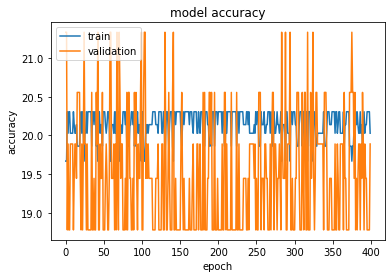

Maximum Train Accuracy : 20.30555534362793
Maximum Validation Accuracy : 21.33333396911621


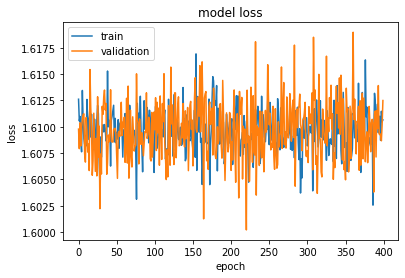

Minimum Train Loss : 1.6025516986846924
Minimum Validation Loss : 1.600197672843933


In [ ]:
Bacteria_model_phase_RMSprop_0001 = Bact_Net()
Bacteria_model_phase_RMSprop_0001.cuda()
trainer_RMSprop_phase_0001 = trainer(Bacteria_model_phase_RMSprop_0001, phase_train_loader,"RMSprop", epoch_size=400, learning_rate=0.001, weight_decay = 0.5)
trainer_RMSprop_phase_0001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_RMSprop_phase_0001.history['train_acc'])
plt.plot(trainer_RMSprop_phase_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_RMSprop_phase_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_RMSprop_phase_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_RMSprop_phase_0001.history['train_loss'])
plt.plot(trainer_RMSprop_phase_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_RMSprop_phase_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_RMSprop_phase_0001.history['val_loss'])}")

# RMSprop_0.001_400epoch_batchnorm

  0%|          | 0/400 [00:00<?, ?it/s]

Train Acc | Epoch 1/400 | ACC 39.861115


  0%|          | 1/400 [00:13<1:32:37, 13.93s/it]

Val Acc | Epoch 1/400 | ACC 40.666668
Train Acc | Epoch 2/400 | ACC 20.305555


  0%|          | 2/400 [00:28<1:33:05, 14.03s/it]

Val Acc | Epoch 2/400 | ACC 18.777779
Train Acc | Epoch 3/400 | ACC 23.777779


  1%|          | 3/400 [00:42<1:32:52, 14.04s/it]

Val Acc | Epoch 3/400 | ACC 22.222223
Train Acc | Epoch 4/400 | ACC 37.472225


  1%|          | 4/400 [00:56<1:33:03, 14.10s/it]

Val Acc | Epoch 4/400 | ACC 37.777779
Train Acc | Epoch 5/400 | ACC 20.305555


  1%|▏         | 5/400 [01:10<1:32:25, 14.04s/it]

Val Acc | Epoch 5/400 | ACC 18.777779
Train Acc | Epoch 6/400 | ACC 20.305555


  2%|▏         | 6/400 [01:24<1:32:58, 14.16s/it]

Val Acc | Epoch 6/400 | ACC 18.777779
Train Acc | Epoch 7/400 | ACC 20.972221


  2%|▏         | 7/400 [01:38<1:32:18, 14.09s/it]

Val Acc | Epoch 7/400 | ACC 19.888889
Train Acc | Epoch 8/400 | ACC 20.583334


  2%|▏         | 8/400 [01:53<1:33:04, 14.25s/it]

Val Acc | Epoch 8/400 | ACC 18.888889
Train Acc | Epoch 9/400 | ACC 20.305555


  2%|▏         | 9/400 [02:07<1:33:00, 14.27s/it]

Val Acc | Epoch 9/400 | ACC 18.777779
Train Acc | Epoch 10/400 | ACC 25.361113


  2%|▎         | 10/400 [02:21<1:32:05, 14.17s/it]

Val Acc | Epoch 10/400 | ACC 25.111113
Train Acc | Epoch 11/400 | ACC 25.666666


  3%|▎         | 11/400 [02:35<1:31:32, 14.12s/it]

Val Acc | Epoch 11/400 | ACC 24.111111
Train Acc | Epoch 12/400 | ACC 26.416668


  3%|▎         | 12/400 [02:49<1:30:47, 14.04s/it]

Val Acc | Epoch 12/400 | ACC 26.111111
Train Acc | Epoch 13/400 | ACC 20.333334


  3%|▎         | 13/400 [03:03<1:30:42, 14.06s/it]

Val Acc | Epoch 13/400 | ACC 18.777779
Train Acc | Epoch 14/400 | ACC 25.361113


  4%|▎         | 14/400 [03:17<1:30:17, 14.04s/it]

Val Acc | Epoch 14/400 | ACC 25.444445
Train Acc | Epoch 15/400 | ACC 41.388889


  4%|▍         | 15/400 [03:31<1:30:18, 14.07s/it]

Val Acc | Epoch 15/400 | ACC 39.666668
Train Acc | Epoch 16/400 | ACC 34.972225


  4%|▍         | 16/400 [03:45<1:29:52, 14.04s/it]

Val Acc | Epoch 16/400 | ACC 35.333336
Train Acc | Epoch 17/400 | ACC 20.027777


  4%|▍         | 17/400 [03:59<1:29:19, 13.99s/it]

Val Acc | Epoch 17/400 | ACC 19.888889
Train Acc | Epoch 18/400 | ACC 29.805555


  4%|▍         | 18/400 [04:13<1:29:45, 14.10s/it]

Val Acc | Epoch 18/400 | ACC 29.777777
Train Acc | Epoch 19/400 | ACC 35.305557


  5%|▍         | 19/400 [04:27<1:29:35, 14.11s/it]

Val Acc | Epoch 19/400 | ACC 35.222225
Train Acc | Epoch 20/400 | ACC 39.333336


  5%|▌         | 20/400 [04:41<1:29:12, 14.09s/it]

Val Acc | Epoch 20/400 | ACC 39.444447
Train Acc | Epoch 21/400 | ACC 22.694445


  5%|▌         | 21/400 [04:56<1:29:05, 14.10s/it]

Val Acc | Epoch 21/400 | ACC 21.111111
Train Acc | Epoch 22/400 | ACC 42.027779


  6%|▌         | 22/400 [05:10<1:28:53, 14.11s/it]

Val Acc | Epoch 22/400 | ACC 42.000000
Train Acc | Epoch 23/400 | ACC 39.277779


  6%|▌         | 23/400 [05:23<1:27:38, 13.95s/it]

Val Acc | Epoch 23/400 | ACC 39.111115
Train Acc | Epoch 24/400 | ACC 22.972223


  6%|▌         | 24/400 [05:37<1:27:33, 13.97s/it]

Val Acc | Epoch 24/400 | ACC 22.000000
Train Acc | Epoch 25/400 | ACC 56.055557


  6%|▋         | 25/400 [05:51<1:27:04, 13.93s/it]

Val Acc | Epoch 25/400 | ACC 56.666668
Train Acc | Epoch 26/400 | ACC 34.555557


  6%|▋         | 26/400 [06:05<1:27:00, 13.96s/it]

Val Acc | Epoch 26/400 | ACC 34.111111
Train Acc | Epoch 27/400 | ACC 25.638889


  7%|▋         | 27/400 [06:19<1:26:59, 13.99s/it]

Val Acc | Epoch 27/400 | ACC 24.888889
Train Acc | Epoch 28/400 | ACC 48.666668


  7%|▋         | 28/400 [06:33<1:26:41, 13.98s/it]

Val Acc | Epoch 28/400 | ACC 48.000000
Train Acc | Epoch 29/400 | ACC 39.500000


  7%|▋         | 29/400 [06:47<1:26:02, 13.92s/it]

Val Acc | Epoch 29/400 | ACC 38.555557
Train Acc | Epoch 30/400 | ACC 51.722221


  8%|▊         | 30/400 [07:02<1:27:09, 14.13s/it]

Val Acc | Epoch 30/400 | ACC 50.333332
Train Acc | Epoch 31/400 | ACC 33.805553


  8%|▊         | 31/400 [07:16<1:27:18, 14.20s/it]

Val Acc | Epoch 31/400 | ACC 33.000000
Train Acc | Epoch 32/400 | ACC 63.861115


  8%|▊         | 32/400 [07:30<1:26:40, 14.13s/it]

Val Acc | Epoch 32/400 | ACC 65.111115
Train Acc | Epoch 33/400 | ACC 22.722223


  8%|▊         | 33/400 [07:44<1:26:00, 14.06s/it]

Val Acc | Epoch 33/400 | ACC 23.000000
Train Acc | Epoch 34/400 | ACC 28.305557


  8%|▊         | 34/400 [07:57<1:25:09, 13.96s/it]

Val Acc | Epoch 34/400 | ACC 28.000000
Train Acc | Epoch 35/400 | ACC 70.777779


  9%|▉         | 35/400 [08:12<1:25:14, 14.01s/it]

Val Acc | Epoch 35/400 | ACC 68.000000
Train Acc | Epoch 36/400 | ACC 48.694447


  9%|▉         | 36/400 [08:26<1:24:54, 13.99s/it]

Val Acc | Epoch 36/400 | ACC 46.666668
Train Acc | Epoch 37/400 | ACC 33.416668


  9%|▉         | 37/400 [08:40<1:24:43, 14.00s/it]

Val Acc | Epoch 37/400 | ACC 32.000000
Train Acc | Epoch 38/400 | ACC 54.638893


 10%|▉         | 38/400 [08:53<1:24:12, 13.96s/it]

Val Acc | Epoch 38/400 | ACC 53.000004
Train Acc | Epoch 39/400 | ACC 33.916668


 10%|▉         | 39/400 [09:08<1:24:38, 14.07s/it]

Val Acc | Epoch 39/400 | ACC 33.555557
Train Acc | Epoch 40/400 | ACC 32.777779


 10%|█         | 40/400 [09:22<1:25:10, 14.20s/it]

Val Acc | Epoch 40/400 | ACC 32.222221
Train Acc | Epoch 41/400 | ACC 40.722225


 10%|█         | 41/400 [09:37<1:25:06, 14.22s/it]

Val Acc | Epoch 41/400 | ACC 38.333336
Train Acc | Epoch 42/400 | ACC 45.194443


 10%|█         | 42/400 [09:51<1:24:45, 14.20s/it]

Val Acc | Epoch 42/400 | ACC 44.777779
Train Acc | Epoch 43/400 | ACC 35.444443


 11%|█         | 43/400 [10:05<1:24:03, 14.13s/it]

Val Acc | Epoch 43/400 | ACC 34.444447
Train Acc | Epoch 44/400 | ACC 45.250000


 11%|█         | 44/400 [10:19<1:23:55, 14.15s/it]

Val Acc | Epoch 44/400 | ACC 44.000000
Train Acc | Epoch 45/400 | ACC 44.138889


 11%|█▏        | 45/400 [10:33<1:24:07, 14.22s/it]

Val Acc | Epoch 45/400 | ACC 42.888889
Train Acc | Epoch 46/400 | ACC 43.166668


 12%|█▏        | 46/400 [10:47<1:23:34, 14.16s/it]

Val Acc | Epoch 46/400 | ACC 41.888889
Train Acc | Epoch 47/400 | ACC 20.027777


 12%|█▏        | 47/400 [11:01<1:23:15, 14.15s/it]

Val Acc | Epoch 47/400 | ACC 19.888889
Train Acc | Epoch 48/400 | ACC 42.361115


 12%|█▏        | 48/400 [11:16<1:23:10, 14.18s/it]

Val Acc | Epoch 48/400 | ACC 41.555557
Train Acc | Epoch 49/400 | ACC 35.444443


 12%|█▏        | 49/400 [11:30<1:22:49, 14.16s/it]

Val Acc | Epoch 49/400 | ACC 36.333336
Train Acc | Epoch 50/400 | ACC 54.194443


 12%|█▎        | 50/400 [11:44<1:23:16, 14.28s/it]

Val Acc | Epoch 50/400 | ACC 51.333332
Train Acc | Epoch 51/400 | ACC 38.027779


 13%|█▎        | 51/400 [11:58<1:22:53, 14.25s/it]

Val Acc | Epoch 51/400 | ACC 36.666668
Train Acc | Epoch 52/400 | ACC 42.111111


 13%|█▎        | 52/400 [12:14<1:24:00, 14.48s/it]

Val Acc | Epoch 52/400 | ACC 42.000000
Train Acc | Epoch 53/400 | ACC 43.416668


 13%|█▎        | 53/400 [12:28<1:23:14, 14.39s/it]

Val Acc | Epoch 53/400 | ACC 42.222221
Train Acc | Epoch 54/400 | ACC 25.444445


 14%|█▎        | 54/400 [12:42<1:22:33, 14.32s/it]

Val Acc | Epoch 54/400 | ACC 25.444445
Train Acc | Epoch 55/400 | ACC 20.361113


 14%|█▍        | 55/400 [12:56<1:21:26, 14.16s/it]

Val Acc | Epoch 55/400 | ACC 18.888889
Train Acc | Epoch 56/400 | ACC 23.666668


 14%|█▍        | 56/400 [13:10<1:21:02, 14.14s/it]

Val Acc | Epoch 56/400 | ACC 22.222223
Train Acc | Epoch 57/400 | ACC 27.444447


 14%|█▍        | 57/400 [13:24<1:20:32, 14.09s/it]

Val Acc | Epoch 57/400 | ACC 28.777779
Train Acc | Epoch 58/400 | ACC 21.472223


 14%|█▍        | 58/400 [13:38<1:19:51, 14.01s/it]

Val Acc | Epoch 58/400 | ACC 19.888889
Train Acc | Epoch 59/400 | ACC 42.888889


 15%|█▍        | 59/400 [13:52<1:19:40, 14.02s/it]

Val Acc | Epoch 59/400 | ACC 41.555557
Train Acc | Epoch 60/400 | ACC 45.555557


 15%|█▌        | 60/400 [14:05<1:19:10, 13.97s/it]

Val Acc | Epoch 60/400 | ACC 46.333332
Train Acc | Epoch 61/400 | ACC 50.888889


 15%|█▌        | 61/400 [14:20<1:19:17, 14.04s/it]

Val Acc | Epoch 61/400 | ACC 49.333336
Train Acc | Epoch 62/400 | ACC 55.583336


 16%|█▌        | 62/400 [14:33<1:18:28, 13.93s/it]

Val Acc | Epoch 62/400 | ACC 54.777779
Train Acc | Epoch 63/400 | ACC 39.194447


 16%|█▌        | 63/400 [14:47<1:18:16, 13.94s/it]

Val Acc | Epoch 63/400 | ACC 37.666668
Train Acc | Epoch 64/400 | ACC 37.944447


 16%|█▌        | 64/400 [15:01<1:17:48, 13.90s/it]

Val Acc | Epoch 64/400 | ACC 37.111111
Train Acc | Epoch 65/400 | ACC 48.888889


 16%|█▋        | 65/400 [15:15<1:17:52, 13.95s/it]

Val Acc | Epoch 65/400 | ACC 48.333336
Train Acc | Epoch 66/400 | ACC 34.972225


 16%|█▋        | 66/400 [15:29<1:18:12, 14.05s/it]

Val Acc | Epoch 66/400 | ACC 33.111115
Train Acc | Epoch 67/400 | ACC 31.138891


 17%|█▋        | 67/400 [15:43<1:17:12, 13.91s/it]

Val Acc | Epoch 67/400 | ACC 31.777779
Train Acc | Epoch 68/400 | ACC 30.750000


 17%|█▋        | 68/400 [15:57<1:16:58, 13.91s/it]

Val Acc | Epoch 68/400 | ACC 28.777779
Train Acc | Epoch 69/400 | ACC 49.833332


 17%|█▋        | 69/400 [16:11<1:17:08, 13.98s/it]

Val Acc | Epoch 69/400 | ACC 49.444447
Train Acc | Epoch 70/400 | ACC 39.611115


 18%|█▊        | 70/400 [16:25<1:17:17, 14.05s/it]

Val Acc | Epoch 70/400 | ACC 37.777779
Train Acc | Epoch 71/400 | ACC 53.638885


 18%|█▊        | 71/400 [16:39<1:17:16, 14.09s/it]

Val Acc | Epoch 71/400 | ACC 52.333336
Train Acc | Epoch 72/400 | ACC 50.083332


 18%|█▊        | 72/400 [16:53<1:16:39, 14.02s/it]

Val Acc | Epoch 72/400 | ACC 49.111115
Train Acc | Epoch 73/400 | ACC 69.527779


 18%|█▊        | 73/400 [17:07<1:16:30, 14.04s/it]

Val Acc | Epoch 73/400 | ACC 68.333336
Train Acc | Epoch 74/400 | ACC 51.944447


 18%|█▊        | 74/400 [17:22<1:16:25, 14.07s/it]

Val Acc | Epoch 74/400 | ACC 51.111115
Train Acc | Epoch 75/400 | ACC 27.194447


 19%|█▉        | 75/400 [17:36<1:17:19, 14.28s/it]

Val Acc | Epoch 75/400 | ACC 25.888889
Train Acc | Epoch 76/400 | ACC 27.305555


 19%|█▉        | 76/400 [17:50<1:16:02, 14.08s/it]

Val Acc | Epoch 76/400 | ACC 25.777779
Train Acc | Epoch 77/400 | ACC 48.444447


 19%|█▉        | 77/400 [18:04<1:15:01, 13.94s/it]

Val Acc | Epoch 77/400 | ACC 46.444447
Train Acc | Epoch 78/400 | ACC 27.583334


 20%|█▉        | 78/400 [18:17<1:14:45, 13.93s/it]

Val Acc | Epoch 78/400 | ACC 27.666668
Train Acc | Epoch 79/400 | ACC 20.444445


 20%|█▉        | 79/400 [18:31<1:14:13, 13.87s/it]

Val Acc | Epoch 79/400 | ACC 19.777779
Train Acc | Epoch 80/400 | ACC 37.472225


 20%|██        | 80/400 [18:45<1:14:04, 13.89s/it]

Val Acc | Epoch 80/400 | ACC 37.666668
Train Acc | Epoch 81/400 | ACC 50.194447


 20%|██        | 81/400 [18:59<1:13:31, 13.83s/it]

Val Acc | Epoch 81/400 | ACC 47.555557
Train Acc | Epoch 82/400 | ACC 22.111113


 20%|██        | 82/400 [19:13<1:13:26, 13.86s/it]

Val Acc | Epoch 82/400 | ACC 21.222223
Train Acc | Epoch 83/400 | ACC 35.944443


 21%|██        | 83/400 [19:26<1:12:54, 13.80s/it]

Val Acc | Epoch 83/400 | ACC 33.777779
Train Acc | Epoch 84/400 | ACC 39.694447


 21%|██        | 84/400 [19:40<1:12:33, 13.78s/it]

Val Acc | Epoch 84/400 | ACC 39.000000
Train Acc | Epoch 85/400 | ACC 51.833336


 21%|██▏       | 85/400 [19:54<1:12:44, 13.85s/it]

Val Acc | Epoch 85/400 | ACC 51.222221
Train Acc | Epoch 86/400 | ACC 31.555557


 22%|██▏       | 86/400 [20:08<1:12:11, 13.79s/it]

Val Acc | Epoch 86/400 | ACC 30.777779
Train Acc | Epoch 87/400 | ACC 51.527779


 22%|██▏       | 87/400 [20:22<1:12:13, 13.84s/it]

Val Acc | Epoch 87/400 | ACC 49.888889
Train Acc | Epoch 88/400 | ACC 62.194450


 22%|██▏       | 88/400 [20:36<1:12:07, 13.87s/it]

Val Acc | Epoch 88/400 | ACC 61.444443
Train Acc | Epoch 89/400 | ACC 40.194447


 22%|██▏       | 89/400 [20:50<1:11:59, 13.89s/it]

Val Acc | Epoch 89/400 | ACC 38.777779
Train Acc | Epoch 90/400 | ACC 39.805557


 22%|██▎       | 90/400 [21:04<1:12:25, 14.02s/it]

Val Acc | Epoch 90/400 | ACC 38.222225
Train Acc | Epoch 91/400 | ACC 38.194447


 23%|██▎       | 91/400 [21:18<1:11:52, 13.96s/it]

Val Acc | Epoch 91/400 | ACC 36.222221
Train Acc | Epoch 92/400 | ACC 55.194443


 23%|██▎       | 92/400 [21:32<1:11:43, 13.97s/it]

Val Acc | Epoch 92/400 | ACC 51.777779
Train Acc | Epoch 93/400 | ACC 50.611115


 23%|██▎       | 93/400 [21:46<1:11:37, 14.00s/it]

Val Acc | Epoch 93/400 | ACC 51.111115
Train Acc | Epoch 94/400 | ACC 20.694445


 24%|██▎       | 94/400 [22:00<1:11:43, 14.06s/it]

Val Acc | Epoch 94/400 | ACC 20.111113
Train Acc | Epoch 95/400 | ACC 55.527775


 24%|██▍       | 95/400 [22:14<1:11:22, 14.04s/it]

Val Acc | Epoch 95/400 | ACC 54.000004
Train Acc | Epoch 96/400 | ACC 38.333336


 24%|██▍       | 96/400 [22:28<1:11:23, 14.09s/it]

Val Acc | Epoch 96/400 | ACC 37.111111
Train Acc | Epoch 97/400 | ACC 47.666668


 24%|██▍       | 97/400 [22:43<1:11:49, 14.22s/it]

Val Acc | Epoch 97/400 | ACC 46.888889
Train Acc | Epoch 98/400 | ACC 39.000000


 24%|██▍       | 98/400 [22:57<1:11:31, 14.21s/it]

Val Acc | Epoch 98/400 | ACC 37.333332
Train Acc | Epoch 99/400 | ACC 35.611111


 25%|██▍       | 99/400 [23:11<1:11:07, 14.18s/it]

Val Acc | Epoch 99/400 | ACC 35.000000
Train Acc | Epoch 100/400 | ACC 28.277779


 25%|██▌       | 100/400 [23:25<1:11:14, 14.25s/it]

Val Acc | Epoch 100/400 | ACC 27.333334
Train Acc | Epoch 101/400 | ACC 41.888889


 25%|██▌       | 101/400 [23:40<1:10:43, 14.19s/it]

Val Acc | Epoch 101/400 | ACC 40.222225
Train Acc | Epoch 102/400 | ACC 24.416668


 26%|██▌       | 102/400 [23:54<1:10:33, 14.21s/it]

Val Acc | Epoch 102/400 | ACC 24.333334
Train Acc | Epoch 103/400 | ACC 37.722225


 26%|██▌       | 103/400 [24:08<1:10:25, 14.23s/it]

Val Acc | Epoch 103/400 | ACC 36.000000
Train Acc | Epoch 104/400 | ACC 46.194447


 26%|██▌       | 104/400 [24:22<1:10:23, 14.27s/it]

Val Acc | Epoch 104/400 | ACC 44.666668
Train Acc | Epoch 105/400 | ACC 42.138889


 26%|██▋       | 105/400 [24:37<1:10:02, 14.25s/it]

Val Acc | Epoch 105/400 | ACC 41.111111
Train Acc | Epoch 106/400 | ACC 44.611111


 26%|██▋       | 106/400 [24:51<1:09:48, 14.25s/it]

Val Acc | Epoch 106/400 | ACC 43.666668
Train Acc | Epoch 107/400 | ACC 55.916668


 27%|██▋       | 107/400 [25:05<1:09:09, 14.16s/it]

Val Acc | Epoch 107/400 | ACC 56.777782
Train Acc | Epoch 108/400 | ACC 35.444443


 27%|██▋       | 108/400 [25:19<1:08:39, 14.11s/it]

Val Acc | Epoch 108/400 | ACC 36.555557
Train Acc | Epoch 109/400 | ACC 53.000004


 27%|██▋       | 109/400 [25:33<1:08:23, 14.10s/it]

Val Acc | Epoch 109/400 | ACC 51.222221
Train Acc | Epoch 110/400 | ACC 51.333332


 28%|██▊       | 110/400 [25:47<1:08:06, 14.09s/it]

Val Acc | Epoch 110/400 | ACC 51.000000
Train Acc | Epoch 111/400 | ACC 70.250008


 28%|██▊       | 111/400 [26:01<1:07:31, 14.02s/it]

Val Acc | Epoch 111/400 | ACC 69.111115
Train Acc | Epoch 112/400 | ACC 51.972221


 28%|██▊       | 112/400 [26:15<1:07:19, 14.03s/it]

Val Acc | Epoch 112/400 | ACC 51.555557
Train Acc | Epoch 113/400 | ACC 64.972221


 28%|██▊       | 113/400 [26:29<1:07:14, 14.06s/it]

Val Acc | Epoch 113/400 | ACC 64.555557
Train Acc | Epoch 114/400 | ACC 42.972221


 28%|██▊       | 114/400 [26:43<1:06:59, 14.05s/it]

Val Acc | Epoch 114/400 | ACC 41.888889
Train Acc | Epoch 115/400 | ACC 54.194443


 29%|██▉       | 115/400 [26:57<1:06:50, 14.07s/it]

Val Acc | Epoch 115/400 | ACC 52.333336
Train Acc | Epoch 116/400 | ACC 58.972221


 29%|██▉       | 116/400 [27:11<1:06:38, 14.08s/it]

Val Acc | Epoch 116/400 | ACC 57.777779
Train Acc | Epoch 117/400 | ACC 35.416668


 29%|██▉       | 117/400 [27:25<1:06:21, 14.07s/it]

Val Acc | Epoch 117/400 | ACC 34.444447
Train Acc | Epoch 118/400 | ACC 61.638893


 30%|██▉       | 118/400 [27:40<1:06:58, 14.25s/it]

Val Acc | Epoch 118/400 | ACC 62.666668
Train Acc | Epoch 119/400 | ACC 60.972225


 30%|██▉       | 119/400 [27:54<1:06:52, 14.28s/it]

Val Acc | Epoch 119/400 | ACC 58.777779
Train Acc | Epoch 120/400 | ACC 40.638889


 30%|███       | 120/400 [28:08<1:06:31, 14.25s/it]

Val Acc | Epoch 120/400 | ACC 39.444447
Train Acc | Epoch 121/400 | ACC 59.305553


 30%|███       | 121/400 [28:22<1:05:44, 14.14s/it]

Val Acc | Epoch 121/400 | ACC 57.111115
Train Acc | Epoch 122/400 | ACC 38.138889


 30%|███       | 122/400 [28:36<1:05:23, 14.11s/it]

Val Acc | Epoch 122/400 | ACC 37.333332
Train Acc | Epoch 123/400 | ACC 69.583336


 31%|███       | 123/400 [28:51<1:05:12, 14.12s/it]

Val Acc | Epoch 123/400 | ACC 68.777779
Train Acc | Epoch 124/400 | ACC 67.444443


 31%|███       | 124/400 [29:04<1:04:43, 14.07s/it]

Val Acc | Epoch 124/400 | ACC 67.000000
Train Acc | Epoch 125/400 | ACC 65.666672


 31%|███▏      | 125/400 [29:18<1:04:22, 14.04s/it]

Val Acc | Epoch 125/400 | ACC 65.555557
Train Acc | Epoch 126/400 | ACC 52.472221


 32%|███▏      | 126/400 [29:33<1:04:23, 14.10s/it]

Val Acc | Epoch 126/400 | ACC 52.333336
Train Acc | Epoch 127/400 | ACC 22.083334


 32%|███▏      | 127/400 [29:47<1:03:55, 14.05s/it]

Val Acc | Epoch 127/400 | ACC 20.333334
Train Acc | Epoch 128/400 | ACC 64.388885


 32%|███▏      | 128/400 [30:00<1:03:26, 13.99s/it]

Val Acc | Epoch 128/400 | ACC 61.555557
Train Acc | Epoch 129/400 | ACC 55.500000


 32%|███▏      | 129/400 [30:15<1:03:29, 14.06s/it]

Val Acc | Epoch 129/400 | ACC 56.000000
Train Acc | Epoch 130/400 | ACC 60.194443


 32%|███▎      | 130/400 [30:29<1:03:16, 14.06s/it]

Val Acc | Epoch 130/400 | ACC 61.444443
Train Acc | Epoch 131/400 | ACC 41.083332


 33%|███▎      | 131/400 [30:43<1:02:56, 14.04s/it]

Val Acc | Epoch 131/400 | ACC 39.444447
Train Acc | Epoch 132/400 | ACC 20.472223


 33%|███▎      | 132/400 [30:57<1:03:10, 14.14s/it]

Val Acc | Epoch 132/400 | ACC 20.333334
Train Acc | Epoch 133/400 | ACC 51.333332


 33%|███▎      | 133/400 [31:11<1:02:43, 14.10s/it]

Val Acc | Epoch 133/400 | ACC 51.666664
Train Acc | Epoch 134/400 | ACC 53.694447


 34%|███▎      | 134/400 [31:25<1:02:29, 14.10s/it]

Val Acc | Epoch 134/400 | ACC 53.222221
Train Acc | Epoch 135/400 | ACC 61.833336


 34%|███▍      | 135/400 [31:39<1:01:53, 14.01s/it]

Val Acc | Epoch 135/400 | ACC 60.333336
Train Acc | Epoch 136/400 | ACC 61.694443


 34%|███▍      | 136/400 [31:53<1:01:56, 14.08s/it]

Val Acc | Epoch 136/400 | ACC 60.222225
Train Acc | Epoch 137/400 | ACC 56.666668


 34%|███▍      | 137/400 [32:07<1:01:38, 14.06s/it]

Val Acc | Epoch 137/400 | ACC 55.666668
Train Acc | Epoch 138/400 | ACC 71.694443


 34%|███▍      | 138/400 [32:21<1:01:19, 14.04s/it]

Val Acc | Epoch 138/400 | ACC 69.333336
Train Acc | Epoch 139/400 | ACC 67.750000


 35%|███▍      | 139/400 [32:35<1:01:17, 14.09s/it]

Val Acc | Epoch 139/400 | ACC 69.444450
Train Acc | Epoch 140/400 | ACC 63.388889


 35%|███▌      | 140/400 [32:50<1:01:10, 14.12s/it]

Val Acc | Epoch 140/400 | ACC 62.555557
Train Acc | Epoch 141/400 | ACC 46.416668


 35%|███▌      | 141/400 [33:04<1:01:35, 14.27s/it]

Val Acc | Epoch 141/400 | ACC 44.555557
Train Acc | Epoch 142/400 | ACC 66.333336


 36%|███▌      | 142/400 [33:18<1:00:44, 14.13s/it]

Val Acc | Epoch 142/400 | ACC 66.111115
Train Acc | Epoch 143/400 | ACC 65.805557


 36%|███▌      | 143/400 [33:32<1:00:23, 14.10s/it]

Val Acc | Epoch 143/400 | ACC 66.111115
Train Acc | Epoch 144/400 | ACC 72.916672


 36%|███▌      | 144/400 [33:46<59:54, 14.04s/it]  

Val Acc | Epoch 144/400 | ACC 70.888885
Train Acc | Epoch 145/400 | ACC 42.861115


 36%|███▋      | 145/400 [34:00<59:20, 13.96s/it]

Val Acc | Epoch 145/400 | ACC 44.444447
Train Acc | Epoch 146/400 | ACC 60.972225


 36%|███▋      | 146/400 [34:14<59:35, 14.08s/it]

Val Acc | Epoch 146/400 | ACC 60.111111
Train Acc | Epoch 147/400 | ACC 57.583332


 37%|███▋      | 147/400 [34:28<59:03, 14.01s/it]

Val Acc | Epoch 147/400 | ACC 55.777775
Train Acc | Epoch 148/400 | ACC 34.888889


 37%|███▋      | 148/400 [34:42<59:03, 14.06s/it]

Val Acc | Epoch 148/400 | ACC 35.777779
Train Acc | Epoch 149/400 | ACC 68.416664


 37%|███▋      | 149/400 [34:56<58:49, 14.06s/it]

Val Acc | Epoch 149/400 | ACC 67.222229
Train Acc | Epoch 150/400 | ACC 22.694445


 38%|███▊      | 150/400 [35:10<58:41, 14.09s/it]

Val Acc | Epoch 150/400 | ACC 23.333334
Train Acc | Epoch 151/400 | ACC 77.277779


 38%|███▊      | 151/400 [35:24<57:59, 13.97s/it]

Val Acc | Epoch 151/400 | ACC 76.000000
Train Acc | Epoch 152/400 | ACC 41.527779


 38%|███▊      | 152/400 [35:38<57:34, 13.93s/it]

Val Acc | Epoch 152/400 | ACC 40.222225
Train Acc | Epoch 153/400 | ACC 47.250004


 38%|███▊      | 153/400 [35:52<57:37, 14.00s/it]

Val Acc | Epoch 153/400 | ACC 46.222221
Train Acc | Epoch 154/400 | ACC 54.944443


 38%|███▊      | 154/400 [36:06<57:34, 14.04s/it]

Val Acc | Epoch 154/400 | ACC 55.333336
Train Acc | Epoch 155/400 | ACC 63.222225


 39%|███▉      | 155/400 [36:20<57:26, 14.07s/it]

Val Acc | Epoch 155/400 | ACC 62.777782
Train Acc | Epoch 156/400 | ACC 75.500000


 39%|███▉      | 156/400 [36:34<57:07, 14.05s/it]

Val Acc | Epoch 156/400 | ACC 76.000000
Train Acc | Epoch 157/400 | ACC 43.444447


 39%|███▉      | 157/400 [36:48<56:57, 14.06s/it]

Val Acc | Epoch 157/400 | ACC 42.000000
Train Acc | Epoch 158/400 | ACC 41.888889


 40%|███▉      | 158/400 [37:03<56:58, 14.13s/it]

Val Acc | Epoch 158/400 | ACC 42.555557
Train Acc | Epoch 159/400 | ACC 75.444450


 40%|███▉      | 159/400 [37:17<56:34, 14.08s/it]

Val Acc | Epoch 159/400 | ACC 74.333336
Train Acc | Epoch 160/400 | ACC 72.138893


 40%|████      | 160/400 [37:31<56:23, 14.10s/it]

Val Acc | Epoch 160/400 | ACC 71.444443
Train Acc | Epoch 161/400 | ACC 56.694447


 40%|████      | 161/400 [37:45<55:48, 14.01s/it]

Val Acc | Epoch 161/400 | ACC 57.111115
Train Acc | Epoch 162/400 | ACC 52.944447


 40%|████      | 162/400 [37:59<56:20, 14.21s/it]

Val Acc | Epoch 162/400 | ACC 50.888889
Train Acc | Epoch 163/400 | ACC 69.194450


 41%|████      | 163/400 [38:14<56:25, 14.28s/it]

Val Acc | Epoch 163/400 | ACC 68.888893
Train Acc | Epoch 164/400 | ACC 72.694443


 41%|████      | 164/400 [38:28<55:32, 14.12s/it]

Val Acc | Epoch 164/400 | ACC 72.111115
Train Acc | Epoch 165/400 | ACC 35.472221


 41%|████▏     | 165/400 [38:42<55:11, 14.09s/it]

Val Acc | Epoch 165/400 | ACC 34.888889
Train Acc | Epoch 166/400 | ACC 56.194450


 42%|████▏     | 166/400 [38:55<54:41, 14.02s/it]

Val Acc | Epoch 166/400 | ACC 58.111115
Train Acc | Epoch 167/400 | ACC 46.444447


 42%|████▏     | 167/400 [39:09<54:21, 14.00s/it]

Val Acc | Epoch 167/400 | ACC 47.333336
Train Acc | Epoch 168/400 | ACC 29.638889


 42%|████▏     | 168/400 [39:23<54:08, 14.00s/it]

Val Acc | Epoch 168/400 | ACC 28.777779
Train Acc | Epoch 169/400 | ACC 65.111115


 42%|████▏     | 169/400 [39:37<53:44, 13.96s/it]

Val Acc | Epoch 169/400 | ACC 65.888885
Train Acc | Epoch 170/400 | ACC 68.333336


 42%|████▎     | 170/400 [39:51<53:35, 13.98s/it]

Val Acc | Epoch 170/400 | ACC 69.222221
Train Acc | Epoch 171/400 | ACC 39.694447


 43%|████▎     | 171/400 [40:05<52:59, 13.88s/it]

Val Acc | Epoch 171/400 | ACC 39.777779
Train Acc | Epoch 172/400 | ACC 66.111115


 43%|████▎     | 172/400 [40:19<52:58, 13.94s/it]

Val Acc | Epoch 172/400 | ACC 65.888885
Train Acc | Epoch 173/400 | ACC 57.750000


 43%|████▎     | 173/400 [40:33<52:30, 13.88s/it]

Val Acc | Epoch 173/400 | ACC 57.111115
Train Acc | Epoch 174/400 | ACC 81.027779


 44%|████▎     | 174/400 [40:47<52:23, 13.91s/it]

Val Acc | Epoch 174/400 | ACC 79.000000
Train Acc | Epoch 175/400 | ACC 54.888893


 44%|████▍     | 175/400 [41:01<52:15, 13.94s/it]

Val Acc | Epoch 175/400 | ACC 53.555553
Train Acc | Epoch 176/400 | ACC 72.500000


 44%|████▍     | 176/400 [41:15<52:11, 13.98s/it]

Val Acc | Epoch 176/400 | ACC 72.222229
Train Acc | Epoch 177/400 | ACC 57.361115


 44%|████▍     | 177/400 [41:29<51:47, 13.93s/it]

Val Acc | Epoch 177/400 | ACC 56.000000
Train Acc | Epoch 178/400 | ACC 39.722221


 44%|████▍     | 178/400 [41:43<51:32, 13.93s/it]

Val Acc | Epoch 178/400 | ACC 39.444447
Train Acc | Epoch 179/400 | ACC 61.527779


 45%|████▍     | 179/400 [41:57<51:24, 13.96s/it]

Val Acc | Epoch 179/400 | ACC 61.333336
Train Acc | Epoch 180/400 | ACC 54.861111


 45%|████▌     | 180/400 [42:10<51:08, 13.95s/it]

Val Acc | Epoch 180/400 | ACC 54.555557
Train Acc | Epoch 181/400 | ACC 46.583332


 45%|████▌     | 181/400 [42:24<50:49, 13.92s/it]

Val Acc | Epoch 181/400 | ACC 44.444447
Train Acc | Epoch 182/400 | ACC 60.027779


 46%|████▌     | 182/400 [42:38<50:42, 13.96s/it]

Val Acc | Epoch 182/400 | ACC 61.222225
Train Acc | Epoch 183/400 | ACC 38.694443


 46%|████▌     | 183/400 [42:52<50:29, 13.96s/it]

Val Acc | Epoch 183/400 | ACC 37.555557
Train Acc | Epoch 184/400 | ACC 61.694443


 46%|████▌     | 184/400 [43:07<50:28, 14.02s/it]

Val Acc | Epoch 184/400 | ACC 63.777779
Train Acc | Epoch 185/400 | ACC 60.472225


 46%|████▋     | 185/400 [43:21<51:15, 14.30s/it]

Val Acc | Epoch 185/400 | ACC 59.444447
Train Acc | Epoch 186/400 | ACC 42.888889


 46%|████▋     | 186/400 [43:36<50:50, 14.26s/it]

Val Acc | Epoch 186/400 | ACC 41.333336
Train Acc | Epoch 187/400 | ACC 23.694445


 47%|████▋     | 187/400 [43:50<50:22, 14.19s/it]

Val Acc | Epoch 187/400 | ACC 22.666668
Train Acc | Epoch 188/400 | ACC 61.583336


 47%|████▋     | 188/400 [44:04<49:58, 14.15s/it]

Val Acc | Epoch 188/400 | ACC 59.000004
Train Acc | Epoch 189/400 | ACC 58.500004


 47%|████▋     | 189/400 [44:18<49:57, 14.21s/it]

Val Acc | Epoch 189/400 | ACC 59.222221
Train Acc | Epoch 190/400 | ACC 71.111115


 48%|████▊     | 190/400 [44:32<49:41, 14.20s/it]

Val Acc | Epoch 190/400 | ACC 73.777779
Train Acc | Epoch 191/400 | ACC 52.250004


 48%|████▊     | 191/400 [44:46<49:11, 14.12s/it]

Val Acc | Epoch 191/400 | ACC 49.666668
Train Acc | Epoch 192/400 | ACC 78.361115


 48%|████▊     | 192/400 [45:00<48:37, 14.03s/it]

Val Acc | Epoch 192/400 | ACC 77.111115
Train Acc | Epoch 193/400 | ACC 45.194443


 48%|████▊     | 193/400 [45:14<48:19, 14.01s/it]

Val Acc | Epoch 193/400 | ACC 45.444447
Train Acc | Epoch 194/400 | ACC 20.027777


 48%|████▊     | 194/400 [45:28<47:42, 13.90s/it]

Val Acc | Epoch 194/400 | ACC 19.888889
Train Acc | Epoch 195/400 | ACC 37.722225


 49%|████▉     | 195/400 [45:42<47:36, 13.94s/it]

Val Acc | Epoch 195/400 | ACC 35.666668
Train Acc | Epoch 196/400 | ACC 34.250000


 49%|████▉     | 196/400 [45:55<47:16, 13.90s/it]

Val Acc | Epoch 196/400 | ACC 32.777779
Train Acc | Epoch 197/400 | ACC 50.777782


 49%|████▉     | 197/400 [46:09<47:10, 13.95s/it]

Val Acc | Epoch 197/400 | ACC 51.000000
Train Acc | Epoch 198/400 | ACC 48.972221


 50%|████▉     | 198/400 [46:23<46:58, 13.95s/it]

Val Acc | Epoch 198/400 | ACC 48.111111
Train Acc | Epoch 199/400 | ACC 75.000000


 50%|████▉     | 199/400 [46:38<46:54, 14.00s/it]

Val Acc | Epoch 199/400 | ACC 72.777779
Train Acc | Epoch 200/400 | ACC 68.222221


 50%|█████     | 200/400 [46:52<46:41, 14.01s/it]

Val Acc | Epoch 200/400 | ACC 68.777779
Train Acc | Epoch 201/400 | ACC 53.805553


 50%|█████     | 201/400 [47:06<46:30, 14.02s/it]

Val Acc | Epoch 201/400 | ACC 53.222221
Train Acc | Epoch 202/400 | ACC 40.138893


 50%|█████     | 202/400 [47:20<46:52, 14.20s/it]

Val Acc | Epoch 202/400 | ACC 39.555557
Train Acc | Epoch 203/400 | ACC 58.611115


 51%|█████     | 203/400 [47:34<46:27, 14.15s/it]

Val Acc | Epoch 203/400 | ACC 59.666668
Train Acc | Epoch 204/400 | ACC 35.111111


 51%|█████     | 204/400 [47:48<46:14, 14.15s/it]

Val Acc | Epoch 204/400 | ACC 34.444447
Train Acc | Epoch 205/400 | ACC 57.250000


 51%|█████▏    | 205/400 [48:02<45:48, 14.09s/it]

Val Acc | Epoch 205/400 | ACC 57.777779
Train Acc | Epoch 206/400 | ACC 65.638885


 52%|█████▏    | 206/400 [48:17<45:47, 14.16s/it]

Val Acc | Epoch 206/400 | ACC 66.111115
Train Acc | Epoch 207/400 | ACC 79.027779


 52%|█████▏    | 207/400 [48:31<46:01, 14.31s/it]

Val Acc | Epoch 207/400 | ACC 77.111115
Train Acc | Epoch 208/400 | ACC 71.166672


 52%|█████▏    | 208/400 [48:45<45:33, 14.24s/it]

Val Acc | Epoch 208/400 | ACC 68.888893
Train Acc | Epoch 209/400 | ACC 54.000004


 52%|█████▏    | 209/400 [49:00<45:25, 14.27s/it]

Val Acc | Epoch 209/400 | ACC 52.444447
Train Acc | Epoch 210/400 | ACC 69.166664


 52%|█████▎    | 210/400 [49:14<45:15, 14.29s/it]

Val Acc | Epoch 210/400 | ACC 67.888893
Train Acc | Epoch 211/400 | ACC 39.722221


 53%|█████▎    | 211/400 [49:29<45:11, 14.35s/it]

Val Acc | Epoch 211/400 | ACC 38.000000
Train Acc | Epoch 212/400 | ACC 57.750000


 53%|█████▎    | 212/400 [49:43<45:03, 14.38s/it]

Val Acc | Epoch 212/400 | ACC 56.222225
Train Acc | Epoch 213/400 | ACC 44.111111


 53%|█████▎    | 213/400 [49:57<44:33, 14.30s/it]

Val Acc | Epoch 213/400 | ACC 42.888889
Train Acc | Epoch 214/400 | ACC 72.555557


 54%|█████▎    | 214/400 [50:12<44:25, 14.33s/it]

Val Acc | Epoch 214/400 | ACC 70.000000
Train Acc | Epoch 215/400 | ACC 39.805557


 54%|█████▍    | 215/400 [50:26<44:12, 14.34s/it]

Val Acc | Epoch 215/400 | ACC 38.666668
Train Acc | Epoch 216/400 | ACC 51.472221


 54%|█████▍    | 216/400 [50:40<43:37, 14.22s/it]

Val Acc | Epoch 216/400 | ACC 52.444447
Train Acc | Epoch 217/400 | ACC 80.305557


 54%|█████▍    | 217/400 [50:54<43:18, 14.20s/it]

Val Acc | Epoch 217/400 | ACC 80.222229
Train Acc | Epoch 218/400 | ACC 73.138893


 55%|█████▍    | 218/400 [51:08<43:00, 14.18s/it]

Val Acc | Epoch 218/400 | ACC 70.888885
Train Acc | Epoch 219/400 | ACC 51.500000


 55%|█████▍    | 219/400 [51:22<42:39, 14.14s/it]

Val Acc | Epoch 219/400 | ACC 51.222221
Train Acc | Epoch 220/400 | ACC 46.611111


 55%|█████▌    | 220/400 [51:36<42:23, 14.13s/it]

Val Acc | Epoch 220/400 | ACC 48.111111
Train Acc | Epoch 221/400 | ACC 48.472221


 55%|█████▌    | 221/400 [51:51<42:17, 14.17s/it]

Val Acc | Epoch 221/400 | ACC 47.666668
Train Acc | Epoch 222/400 | ACC 43.333332


 56%|█████▌    | 222/400 [52:05<41:48, 14.09s/it]

Val Acc | Epoch 222/400 | ACC 42.666668
Train Acc | Epoch 223/400 | ACC 46.361115


 56%|█████▌    | 223/400 [52:19<41:36, 14.11s/it]

Val Acc | Epoch 223/400 | ACC 45.555557
Train Acc | Epoch 224/400 | ACC 52.861111


 56%|█████▌    | 224/400 [52:33<41:18, 14.08s/it]

Val Acc | Epoch 224/400 | ACC 53.333336
Train Acc | Epoch 225/400 | ACC 62.750000


 56%|█████▋    | 225/400 [52:47<40:57, 14.04s/it]

Val Acc | Epoch 225/400 | ACC 62.555557
Train Acc | Epoch 226/400 | ACC 83.916672


 56%|█████▋    | 226/400 [53:01<40:47, 14.07s/it]

Val Acc | Epoch 226/400 | ACC 83.111115
Train Acc | Epoch 227/400 | ACC 62.750000


 57%|█████▋    | 227/400 [53:15<40:35, 14.08s/it]

Val Acc | Epoch 227/400 | ACC 60.888893
Train Acc | Epoch 228/400 | ACC 71.250000


 57%|█████▋    | 228/400 [53:29<40:42, 14.20s/it]

Val Acc | Epoch 228/400 | ACC 71.000000
Train Acc | Epoch 229/400 | ACC 64.611115


 57%|█████▋    | 229/400 [53:44<40:50, 14.33s/it]

Val Acc | Epoch 229/400 | ACC 64.666672
Train Acc | Epoch 230/400 | ACC 68.500000


 57%|█████▊    | 230/400 [53:58<40:23, 14.26s/it]

Val Acc | Epoch 230/400 | ACC 67.555557
Train Acc | Epoch 231/400 | ACC 76.527779


 58%|█████▊    | 231/400 [54:12<40:04, 14.23s/it]

Val Acc | Epoch 231/400 | ACC 75.666664
Train Acc | Epoch 232/400 | ACC 61.361111


 58%|█████▊    | 232/400 [54:26<39:45, 14.20s/it]

Val Acc | Epoch 232/400 | ACC 58.666672
Train Acc | Epoch 233/400 | ACC 43.888889


 58%|█████▊    | 233/400 [54:41<39:32, 14.21s/it]

Val Acc | Epoch 233/400 | ACC 43.444447
Train Acc | Epoch 234/400 | ACC 82.638893


 58%|█████▊    | 234/400 [54:55<39:15, 14.19s/it]

Val Acc | Epoch 234/400 | ACC 82.111115
Train Acc | Epoch 235/400 | ACC 20.527779


 59%|█████▉    | 235/400 [55:09<39:00, 14.18s/it]

Val Acc | Epoch 235/400 | ACC 20.111113
Train Acc | Epoch 236/400 | ACC 65.500000


 59%|█████▉    | 236/400 [55:23<38:40, 14.15s/it]

Val Acc | Epoch 236/400 | ACC 64.777779
Train Acc | Epoch 237/400 | ACC 38.833336


 59%|█████▉    | 237/400 [55:37<38:29, 14.17s/it]

Val Acc | Epoch 237/400 | ACC 36.777779
Train Acc | Epoch 238/400 | ACC 66.361115


 60%|█████▉    | 238/400 [55:51<38:12, 14.15s/it]

Val Acc | Epoch 238/400 | ACC 66.666672
Train Acc | Epoch 239/400 | ACC 51.194447


 60%|█████▉    | 239/400 [56:05<37:57, 14.15s/it]

Val Acc | Epoch 239/400 | ACC 48.555557
Train Acc | Epoch 240/400 | ACC 64.472221


 60%|██████    | 240/400 [56:20<37:45, 14.16s/it]

Val Acc | Epoch 240/400 | ACC 64.000000
Train Acc | Epoch 241/400 | ACC 65.694443


 60%|██████    | 241/400 [56:34<37:30, 14.16s/it]

Val Acc | Epoch 241/400 | ACC 63.666664
Train Acc | Epoch 242/400 | ACC 62.833332


 60%|██████    | 242/400 [56:48<37:20, 14.18s/it]

Val Acc | Epoch 242/400 | ACC 64.888885
Train Acc | Epoch 243/400 | ACC 56.388889


 61%|██████    | 243/400 [57:02<37:05, 14.18s/it]

Val Acc | Epoch 243/400 | ACC 56.000000
Train Acc | Epoch 244/400 | ACC 60.500000


 61%|██████    | 244/400 [57:16<36:51, 14.18s/it]

Val Acc | Epoch 244/400 | ACC 61.111111
Train Acc | Epoch 245/400 | ACC 38.833336


 61%|██████▏   | 245/400 [57:31<36:36, 14.17s/it]

Val Acc | Epoch 245/400 | ACC 37.333332
Train Acc | Epoch 246/400 | ACC 67.527779


 62%|██████▏   | 246/400 [57:45<36:16, 14.13s/it]

Val Acc | Epoch 246/400 | ACC 67.222229
Train Acc | Epoch 247/400 | ACC 45.055557


 62%|██████▏   | 247/400 [57:59<36:07, 14.17s/it]

Val Acc | Epoch 247/400 | ACC 44.777779
Train Acc | Epoch 248/400 | ACC 42.972221


 62%|██████▏   | 248/400 [58:13<35:50, 14.15s/it]

Val Acc | Epoch 248/400 | ACC 42.888889
Train Acc | Epoch 249/400 | ACC 50.027782


 62%|██████▏   | 249/400 [58:27<35:48, 14.23s/it]

Val Acc | Epoch 249/400 | ACC 49.222221
Train Acc | Epoch 250/400 | ACC 71.666672


 62%|██████▎   | 250/400 [58:42<35:46, 14.31s/it]

Val Acc | Epoch 250/400 | ACC 69.888893
Train Acc | Epoch 251/400 | ACC 53.444447


 63%|██████▎   | 251/400 [58:57<35:50, 14.43s/it]

Val Acc | Epoch 251/400 | ACC 51.888889
Train Acc | Epoch 252/400 | ACC 68.750000


 63%|██████▎   | 252/400 [59:11<35:31, 14.40s/it]

Val Acc | Epoch 252/400 | ACC 66.555557
Train Acc | Epoch 253/400 | ACC 66.222229


 63%|██████▎   | 253/400 [59:25<35:04, 14.31s/it]

Val Acc | Epoch 253/400 | ACC 68.000000
Train Acc | Epoch 254/400 | ACC 62.555557


 64%|██████▎   | 254/400 [59:39<34:38, 14.24s/it]

Val Acc | Epoch 254/400 | ACC 63.111115
Train Acc | Epoch 255/400 | ACC 20.027777


 64%|██████▍   | 255/400 [59:53<34:11, 14.15s/it]

Val Acc | Epoch 255/400 | ACC 19.888889
Train Acc | Epoch 256/400 | ACC 59.888885


 64%|██████▍   | 256/400 [1:00:08<34:21, 14.31s/it]

Val Acc | Epoch 256/400 | ACC 59.888885
Train Acc | Epoch 257/400 | ACC 69.333336


 64%|██████▍   | 257/400 [1:00:22<34:08, 14.33s/it]

Val Acc | Epoch 257/400 | ACC 69.111115
Train Acc | Epoch 258/400 | ACC 86.388893


 64%|██████▍   | 258/400 [1:00:37<34:09, 14.43s/it]

Val Acc | Epoch 258/400 | ACC 83.777779
Train Acc | Epoch 259/400 | ACC 70.638885


 65%|██████▍   | 259/400 [1:00:51<33:41, 14.34s/it]

Val Acc | Epoch 259/400 | ACC 69.888893
Train Acc | Epoch 260/400 | ACC 68.083336


 65%|██████▌   | 260/400 [1:01:05<33:21, 14.30s/it]

Val Acc | Epoch 260/400 | ACC 67.222229
Train Acc | Epoch 261/400 | ACC 49.472225


 65%|██████▌   | 261/400 [1:01:19<33:07, 14.30s/it]

Val Acc | Epoch 261/400 | ACC 48.444447
Train Acc | Epoch 262/400 | ACC 60.277779


 66%|██████▌   | 262/400 [1:01:33<32:45, 14.24s/it]

Val Acc | Epoch 262/400 | ACC 58.666672
Train Acc | Epoch 263/400 | ACC 84.166672


 66%|██████▌   | 263/400 [1:01:48<32:33, 14.26s/it]

Val Acc | Epoch 263/400 | ACC 82.888885
Train Acc | Epoch 264/400 | ACC 59.944447


 66%|██████▌   | 264/400 [1:02:02<32:11, 14.20s/it]

Val Acc | Epoch 264/400 | ACC 61.222225
Train Acc | Epoch 265/400 | ACC 73.333336


 66%|██████▋   | 265/400 [1:02:16<32:02, 14.24s/it]

Val Acc | Epoch 265/400 | ACC 72.000000
Train Acc | Epoch 266/400 | ACC 64.222221


 66%|██████▋   | 266/400 [1:02:30<31:37, 14.16s/it]

Val Acc | Epoch 266/400 | ACC 61.555557
Train Acc | Epoch 267/400 | ACC 31.805557


 67%|██████▋   | 267/400 [1:02:45<31:38, 14.28s/it]

Val Acc | Epoch 267/400 | ACC 31.333334
Train Acc | Epoch 268/400 | ACC 53.666668


 67%|██████▋   | 268/400 [1:02:59<31:15, 14.21s/it]

Val Acc | Epoch 268/400 | ACC 54.000004
Train Acc | Epoch 269/400 | ACC 78.666672


 67%|██████▋   | 269/400 [1:03:13<31:02, 14.22s/it]

Val Acc | Epoch 269/400 | ACC 76.444450
Train Acc | Epoch 270/400 | ACC 53.472221


 68%|██████▊   | 270/400 [1:03:27<30:41, 14.17s/it]

Val Acc | Epoch 270/400 | ACC 53.555553
Train Acc | Epoch 271/400 | ACC 79.527779


 68%|██████▊   | 271/400 [1:03:41<30:18, 14.10s/it]

Val Acc | Epoch 271/400 | ACC 78.000000
Train Acc | Epoch 272/400 | ACC 56.111115


 68%|██████▊   | 272/400 [1:03:56<30:49, 14.45s/it]

Val Acc | Epoch 272/400 | ACC 55.555557
Train Acc | Epoch 273/400 | ACC 68.138893


 68%|██████▊   | 273/400 [1:04:10<30:15, 14.30s/it]

Val Acc | Epoch 273/400 | ACC 66.222229
Train Acc | Epoch 274/400 | ACC 77.888885


 68%|██████▊   | 274/400 [1:04:24<29:49, 14.20s/it]

Val Acc | Epoch 274/400 | ACC 74.777779
Train Acc | Epoch 275/400 | ACC 50.333332


 69%|██████▉   | 275/400 [1:04:38<29:27, 14.14s/it]

Val Acc | Epoch 275/400 | ACC 50.444447
Train Acc | Epoch 276/400 | ACC 35.388889


 69%|██████▉   | 276/400 [1:04:52<29:06, 14.09s/it]

Val Acc | Epoch 276/400 | ACC 33.000000
Train Acc | Epoch 277/400 | ACC 20.055557


 69%|██████▉   | 277/400 [1:05:06<28:52, 14.08s/it]

Val Acc | Epoch 277/400 | ACC 19.888889
Train Acc | Epoch 278/400 | ACC 48.944447


 70%|██████▉   | 278/400 [1:05:20<28:28, 14.00s/it]

Val Acc | Epoch 278/400 | ACC 48.555557
Train Acc | Epoch 279/400 | ACC 47.333336


 70%|██████▉   | 279/400 [1:05:34<28:10, 13.97s/it]

Val Acc | Epoch 279/400 | ACC 45.333336
Train Acc | Epoch 280/400 | ACC 71.111115


 70%|███████   | 280/400 [1:05:48<27:56, 13.97s/it]

Val Acc | Epoch 280/400 | ACC 69.555557
Train Acc | Epoch 281/400 | ACC 70.000000


 70%|███████   | 281/400 [1:06:02<27:43, 13.98s/it]

Val Acc | Epoch 281/400 | ACC 69.888893
Train Acc | Epoch 282/400 | ACC 57.000000


 70%|███████   | 282/400 [1:06:16<27:33, 14.01s/it]

Val Acc | Epoch 282/400 | ACC 57.444447
Train Acc | Epoch 283/400 | ACC 32.277779


 71%|███████   | 283/400 [1:06:30<27:13, 13.96s/it]

Val Acc | Epoch 283/400 | ACC 31.111113
Train Acc | Epoch 284/400 | ACC 53.944443


 71%|███████   | 284/400 [1:06:44<27:03, 13.99s/it]

Val Acc | Epoch 284/400 | ACC 52.666672
Train Acc | Epoch 285/400 | ACC 82.527779


 71%|███████▏  | 285/400 [1:06:58<26:42, 13.94s/it]

Val Acc | Epoch 285/400 | ACC 79.777779
Train Acc | Epoch 286/400 | ACC 82.611115


 72%|███████▏  | 286/400 [1:07:12<26:28, 13.93s/it]

Val Acc | Epoch 286/400 | ACC 79.111115
Train Acc | Epoch 287/400 | ACC 41.833336


 72%|███████▏  | 287/400 [1:07:26<26:18, 13.97s/it]

Val Acc | Epoch 287/400 | ACC 40.222225
Train Acc | Epoch 288/400 | ACC 80.805557


 72%|███████▏  | 288/400 [1:07:39<26:01, 13.94s/it]

Val Acc | Epoch 288/400 | ACC 79.777779
Train Acc | Epoch 289/400 | ACC 65.777779


 72%|███████▏  | 289/400 [1:07:54<25:56, 14.02s/it]

Val Acc | Epoch 289/400 | ACC 64.666672
Train Acc | Epoch 290/400 | ACC 51.555557


 72%|███████▎  | 290/400 [1:08:08<25:37, 13.97s/it]

Val Acc | Epoch 290/400 | ACC 51.222221
Train Acc | Epoch 291/400 | ACC 48.777779


 73%|███████▎  | 291/400 [1:08:21<25:18, 13.93s/it]

Val Acc | Epoch 291/400 | ACC 47.666668
Train Acc | Epoch 292/400 | ACC 61.055557


 73%|███████▎  | 292/400 [1:08:35<25:08, 13.97s/it]

Val Acc | Epoch 292/400 | ACC 59.444447
Train Acc | Epoch 293/400 | ACC 76.916672


 73%|███████▎  | 293/400 [1:08:49<24:52, 13.94s/it]

Val Acc | Epoch 293/400 | ACC 73.888893
Train Acc | Epoch 294/400 | ACC 86.555557


 74%|███████▎  | 294/400 [1:09:03<24:42, 13.99s/it]

Val Acc | Epoch 294/400 | ACC 85.111115
Train Acc | Epoch 295/400 | ACC 48.861115


 74%|███████▍  | 295/400 [1:09:18<24:44, 14.13s/it]

Val Acc | Epoch 295/400 | ACC 47.444447
Train Acc | Epoch 296/400 | ACC 63.944447


 74%|███████▍  | 296/400 [1:09:32<24:21, 14.05s/it]

Val Acc | Epoch 296/400 | ACC 63.333332
Train Acc | Epoch 297/400 | ACC 80.583336


 74%|███████▍  | 297/400 [1:09:46<24:10, 14.08s/it]

Val Acc | Epoch 297/400 | ACC 78.000000
Train Acc | Epoch 298/400 | ACC 67.000000


 74%|███████▍  | 298/400 [1:10:00<23:53, 14.05s/it]

Val Acc | Epoch 298/400 | ACC 67.222229
Train Acc | Epoch 299/400 | ACC 61.888893


 75%|███████▍  | 299/400 [1:10:14<23:30, 13.96s/it]

Val Acc | Epoch 299/400 | ACC 60.555561
Train Acc | Epoch 300/400 | ACC 43.194447


 75%|███████▌  | 300/400 [1:10:28<23:13, 13.93s/it]

Val Acc | Epoch 300/400 | ACC 42.111111
Train Acc | Epoch 301/400 | ACC 72.111115


 75%|███████▌  | 301/400 [1:10:42<23:05, 13.99s/it]

Val Acc | Epoch 301/400 | ACC 73.000000
Train Acc | Epoch 302/400 | ACC 59.083336


 76%|███████▌  | 302/400 [1:10:56<22:50, 13.98s/it]

Val Acc | Epoch 302/400 | ACC 57.000000
Train Acc | Epoch 303/400 | ACC 66.916672


 76%|███████▌  | 303/400 [1:11:10<22:35, 13.97s/it]

Val Acc | Epoch 303/400 | ACC 65.000000
Train Acc | Epoch 304/400 | ACC 39.472221


 76%|███████▌  | 304/400 [1:11:23<22:15, 13.91s/it]

Val Acc | Epoch 304/400 | ACC 39.555557
Train Acc | Epoch 305/400 | ACC 72.388893


 76%|███████▋  | 305/400 [1:11:38<22:11, 14.02s/it]

Val Acc | Epoch 305/400 | ACC 71.888885
Train Acc | Epoch 306/400 | ACC 49.555557


 76%|███████▋  | 306/400 [1:11:51<21:53, 13.98s/it]

Val Acc | Epoch 306/400 | ACC 48.333336
Train Acc | Epoch 307/400 | ACC 43.416668


 77%|███████▋  | 307/400 [1:12:05<21:35, 13.93s/it]

Val Acc | Epoch 307/400 | ACC 44.333336
Train Acc | Epoch 308/400 | ACC 87.972221


 77%|███████▋  | 308/400 [1:12:19<21:23, 13.95s/it]

Val Acc | Epoch 308/400 | ACC 86.555557
Train Acc | Epoch 309/400 | ACC 20.027777


 77%|███████▋  | 309/400 [1:12:33<20:59, 13.84s/it]

Val Acc | Epoch 309/400 | ACC 19.888889
Train Acc | Epoch 310/400 | ACC 84.083336


 78%|███████▊  | 310/400 [1:12:47<20:51, 13.90s/it]

Val Acc | Epoch 310/400 | ACC 82.666672
Train Acc | Epoch 311/400 | ACC 51.055557


 78%|███████▊  | 311/400 [1:13:01<20:44, 13.98s/it]

Val Acc | Epoch 311/400 | ACC 50.777782
Train Acc | Epoch 312/400 | ACC 78.638893


 78%|███████▊  | 312/400 [1:13:15<20:35, 14.04s/it]

Val Acc | Epoch 312/400 | ACC 78.888893
Train Acc | Epoch 313/400 | ACC 54.527779


 78%|███████▊  | 313/400 [1:13:29<20:25, 14.08s/it]

Val Acc | Epoch 313/400 | ACC 52.888889
Train Acc | Epoch 314/400 | ACC 47.222225


 78%|███████▊  | 314/400 [1:13:44<20:19, 14.18s/it]

Val Acc | Epoch 314/400 | ACC 47.111111
Train Acc | Epoch 315/400 | ACC 50.333332


 79%|███████▉  | 315/400 [1:13:58<20:07, 14.21s/it]

Val Acc | Epoch 315/400 | ACC 49.777779
Train Acc | Epoch 316/400 | ACC 84.750000


 79%|███████▉  | 316/400 [1:14:13<20:06, 14.36s/it]

Val Acc | Epoch 316/400 | ACC 83.333336
Train Acc | Epoch 317/400 | ACC 39.416668


 79%|███████▉  | 317/400 [1:14:28<20:00, 14.46s/it]

Val Acc | Epoch 317/400 | ACC 39.666668
Train Acc | Epoch 318/400 | ACC 21.055555


 80%|███████▉  | 318/400 [1:14:42<19:34, 14.32s/it]

Val Acc | Epoch 318/400 | ACC 20.888889
Train Acc | Epoch 319/400 | ACC 73.472229


 80%|███████▉  | 319/400 [1:14:56<19:14, 14.26s/it]

Val Acc | Epoch 319/400 | ACC 74.111107
Train Acc | Epoch 320/400 | ACC 52.666672


 80%|████████  | 320/400 [1:15:10<19:01, 14.27s/it]

Val Acc | Epoch 320/400 | ACC 52.222221
Train Acc | Epoch 321/400 | ACC 53.250004


 80%|████████  | 321/400 [1:15:24<18:48, 14.28s/it]

Val Acc | Epoch 321/400 | ACC 51.000000
Train Acc | Epoch 322/400 | ACC 45.888889


 80%|████████  | 322/400 [1:15:38<18:24, 14.15s/it]

Val Acc | Epoch 322/400 | ACC 46.555557
Train Acc | Epoch 323/400 | ACC 84.388893


 81%|████████  | 323/400 [1:15:52<18:13, 14.20s/it]

Val Acc | Epoch 323/400 | ACC 83.666672
Train Acc | Epoch 324/400 | ACC 41.000000


 81%|████████  | 324/400 [1:16:07<17:58, 14.19s/it]

Val Acc | Epoch 324/400 | ACC 40.222225
Train Acc | Epoch 325/400 | ACC 75.388893


 81%|████████▏ | 325/400 [1:16:21<17:38, 14.12s/it]

Val Acc | Epoch 325/400 | ACC 75.222221
Train Acc | Epoch 326/400 | ACC 50.361115


 82%|████████▏ | 326/400 [1:16:35<17:25, 14.12s/it]

Val Acc | Epoch 326/400 | ACC 49.888889
Train Acc | Epoch 327/400 | ACC 76.888885


 82%|████████▏ | 327/400 [1:16:48<16:58, 13.95s/it]

Val Acc | Epoch 327/400 | ACC 75.777779
Train Acc | Epoch 328/400 | ACC 48.638889


 82%|████████▏ | 328/400 [1:17:02<16:46, 13.97s/it]

Val Acc | Epoch 328/400 | ACC 48.777779
Train Acc | Epoch 329/400 | ACC 53.638885


 82%|████████▏ | 329/400 [1:17:16<16:25, 13.88s/it]

Val Acc | Epoch 329/400 | ACC 54.000004
Train Acc | Epoch 330/400 | ACC 52.666672


 82%|████████▎ | 330/400 [1:17:30<16:13, 13.91s/it]

Val Acc | Epoch 330/400 | ACC 51.555557
Train Acc | Epoch 331/400 | ACC 54.166668


 83%|████████▎ | 331/400 [1:17:43<15:52, 13.81s/it]

Val Acc | Epoch 331/400 | ACC 51.777779
Train Acc | Epoch 332/400 | ACC 30.611113


 83%|████████▎ | 332/400 [1:17:58<15:51, 13.99s/it]

Val Acc | Epoch 332/400 | ACC 31.444445
Train Acc | Epoch 333/400 | ACC 60.805557


 83%|████████▎ | 333/400 [1:18:12<15:36, 13.98s/it]

Val Acc | Epoch 333/400 | ACC 61.333336
Train Acc | Epoch 334/400 | ACC 73.000000


 84%|████████▎ | 334/400 [1:18:26<15:24, 14.01s/it]

Val Acc | Epoch 334/400 | ACC 71.444443
Train Acc | Epoch 335/400 | ACC 82.888885


 84%|████████▍ | 335/400 [1:18:40<15:06, 13.94s/it]

Val Acc | Epoch 335/400 | ACC 80.888893
Train Acc | Epoch 336/400 | ACC 63.333332


 84%|████████▍ | 336/400 [1:18:53<14:45, 13.83s/it]

Val Acc | Epoch 336/400 | ACC 63.222225
Train Acc | Epoch 337/400 | ACC 63.138889


 84%|████████▍ | 337/400 [1:19:07<14:38, 13.94s/it]

Val Acc | Epoch 337/400 | ACC 64.777779
Train Acc | Epoch 338/400 | ACC 56.722225


 84%|████████▍ | 338/400 [1:19:22<14:32, 14.07s/it]

Val Acc | Epoch 338/400 | ACC 57.555557
Train Acc | Epoch 339/400 | ACC 55.250000


 85%|████████▍ | 339/400 [1:19:36<14:23, 14.16s/it]

Val Acc | Epoch 339/400 | ACC 55.444443
Train Acc | Epoch 340/400 | ACC 75.388893


 85%|████████▌ | 340/400 [1:19:50<14:10, 14.17s/it]

Val Acc | Epoch 340/400 | ACC 75.333336
Train Acc | Epoch 341/400 | ACC 85.888893


 85%|████████▌ | 341/400 [1:20:04<13:54, 14.15s/it]

Val Acc | Epoch 341/400 | ACC 84.555557
Train Acc | Epoch 342/400 | ACC 84.861115


 86%|████████▌ | 342/400 [1:20:19<13:38, 14.11s/it]

Val Acc | Epoch 342/400 | ACC 84.444443
Train Acc | Epoch 343/400 | ACC 80.972221


 86%|████████▌ | 343/400 [1:20:32<13:21, 14.06s/it]

Val Acc | Epoch 343/400 | ACC 80.222229
Train Acc | Epoch 344/400 | ACC 31.083334


 86%|████████▌ | 344/400 [1:20:46<13:05, 14.03s/it]

Val Acc | Epoch 344/400 | ACC 29.666668
Train Acc | Epoch 345/400 | ACC 68.555557


 86%|████████▋ | 345/400 [1:21:00<12:46, 13.93s/it]

Val Acc | Epoch 345/400 | ACC 69.666664
Train Acc | Epoch 346/400 | ACC 63.805557


 86%|████████▋ | 346/400 [1:21:14<12:32, 13.93s/it]

Val Acc | Epoch 346/400 | ACC 63.222225
Train Acc | Epoch 347/400 | ACC 53.583336


 87%|████████▋ | 347/400 [1:21:28<12:19, 13.96s/it]

Val Acc | Epoch 347/400 | ACC 53.222221
Train Acc | Epoch 348/400 | ACC 56.444447


 87%|████████▋ | 348/400 [1:21:42<12:03, 13.92s/it]

Val Acc | Epoch 348/400 | ACC 56.111115
Train Acc | Epoch 349/400 | ACC 83.861115


 87%|████████▋ | 349/400 [1:21:56<11:51, 13.94s/it]

Val Acc | Epoch 349/400 | ACC 81.666664
Train Acc | Epoch 350/400 | ACC 79.833336


 88%|████████▊ | 350/400 [1:22:10<11:39, 14.00s/it]

Val Acc | Epoch 350/400 | ACC 79.666672
Train Acc | Epoch 351/400 | ACC 54.333336


 88%|████████▊ | 351/400 [1:22:24<11:24, 13.98s/it]

Val Acc | Epoch 351/400 | ACC 53.888893
Train Acc | Epoch 352/400 | ACC 71.472221


 88%|████████▊ | 352/400 [1:22:38<11:14, 14.05s/it]

Val Acc | Epoch 352/400 | ACC 72.777779
Train Acc | Epoch 353/400 | ACC 22.638889


 88%|████████▊ | 353/400 [1:22:52<11:02, 14.09s/it]

Val Acc | Epoch 353/400 | ACC 24.000000
Train Acc | Epoch 354/400 | ACC 62.694447


 88%|████████▊ | 354/400 [1:23:06<10:46, 14.06s/it]

Val Acc | Epoch 354/400 | ACC 61.666668
Train Acc | Epoch 355/400 | ACC 64.138885


 89%|████████▉ | 355/400 [1:23:20<10:27, 13.94s/it]

Val Acc | Epoch 355/400 | ACC 63.000000
Train Acc | Epoch 356/400 | ACC 82.416672


 89%|████████▉ | 356/400 [1:23:34<10:12, 13.93s/it]

Val Acc | Epoch 356/400 | ACC 80.666664
Train Acc | Epoch 357/400 | ACC 82.222221


 89%|████████▉ | 357/400 [1:23:48<09:56, 13.88s/it]

Val Acc | Epoch 357/400 | ACC 80.555557
Train Acc | Epoch 358/400 | ACC 60.944443


 90%|████████▉ | 358/400 [1:24:02<09:47, 13.99s/it]

Val Acc | Epoch 358/400 | ACC 61.444443
Train Acc | Epoch 359/400 | ACC 71.111115


 90%|████████▉ | 359/400 [1:24:16<09:35, 14.03s/it]

Val Acc | Epoch 359/400 | ACC 67.888893
Train Acc | Epoch 360/400 | ACC 62.555557


 90%|█████████ | 360/400 [1:24:30<09:25, 14.14s/it]

Val Acc | Epoch 360/400 | ACC 61.777775
Train Acc | Epoch 361/400 | ACC 80.361115


 90%|█████████ | 361/400 [1:24:45<09:15, 14.24s/it]

Val Acc | Epoch 361/400 | ACC 77.555557
Train Acc | Epoch 362/400 | ACC 47.361111


 90%|█████████ | 362/400 [1:24:59<08:56, 14.12s/it]

Val Acc | Epoch 362/400 | ACC 47.555557
Train Acc | Epoch 363/400 | ACC 62.472225


 91%|█████████ | 363/400 [1:25:13<08:41, 14.08s/it]

Val Acc | Epoch 363/400 | ACC 63.000000
Train Acc | Epoch 364/400 | ACC 60.333336


 91%|█████████ | 364/400 [1:25:27<08:27, 14.10s/it]

Val Acc | Epoch 364/400 | ACC 59.555553
Train Acc | Epoch 365/400 | ACC 79.444443


 91%|█████████▏| 365/400 [1:25:41<08:13, 14.11s/it]

Val Acc | Epoch 365/400 | ACC 78.888893
Train Acc | Epoch 366/400 | ACC 56.138889


 92%|█████████▏| 366/400 [1:25:56<08:04, 14.25s/it]

Val Acc | Epoch 366/400 | ACC 56.444447
Train Acc | Epoch 367/400 | ACC 68.250000


 92%|█████████▏| 367/400 [1:26:10<07:48, 14.21s/it]

Val Acc | Epoch 367/400 | ACC 69.444450
Train Acc | Epoch 368/400 | ACC 48.777779


 92%|█████████▏| 368/400 [1:26:24<07:32, 14.15s/it]

Val Acc | Epoch 368/400 | ACC 48.888889
Train Acc | Epoch 369/400 | ACC 40.472225


 92%|█████████▏| 369/400 [1:26:38<07:20, 14.21s/it]

Val Acc | Epoch 369/400 | ACC 40.222225
Train Acc | Epoch 370/400 | ACC 81.083336


 92%|█████████▎| 370/400 [1:26:52<07:05, 14.19s/it]

Val Acc | Epoch 370/400 | ACC 78.777779
Train Acc | Epoch 371/400 | ACC 71.666672


 93%|█████████▎| 371/400 [1:27:06<06:50, 14.14s/it]

Val Acc | Epoch 371/400 | ACC 72.333336
Train Acc | Epoch 372/400 | ACC 58.111115


 93%|█████████▎| 372/400 [1:27:20<06:34, 14.09s/it]

Val Acc | Epoch 372/400 | ACC 56.555557
Train Acc | Epoch 373/400 | ACC 65.138885


 93%|█████████▎| 373/400 [1:27:34<06:20, 14.09s/it]

Val Acc | Epoch 373/400 | ACC 65.111115
Train Acc | Epoch 374/400 | ACC 65.916672


 94%|█████████▎| 374/400 [1:27:48<06:05, 14.07s/it]

Val Acc | Epoch 374/400 | ACC 64.111115
Train Acc | Epoch 375/400 | ACC 67.611107


 94%|█████████▍| 375/400 [1:28:03<05:53, 14.13s/it]

Val Acc | Epoch 375/400 | ACC 65.777779
Train Acc | Epoch 376/400 | ACC 48.555557


 94%|█████████▍| 376/400 [1:28:17<05:40, 14.17s/it]

Val Acc | Epoch 376/400 | ACC 48.000000
Train Acc | Epoch 377/400 | ACC 69.777779


 94%|█████████▍| 377/400 [1:28:31<05:23, 14.07s/it]

Val Acc | Epoch 377/400 | ACC 70.222221
Train Acc | Epoch 378/400 | ACC 88.611115


 94%|█████████▍| 378/400 [1:28:45<05:10, 14.10s/it]

Val Acc | Epoch 378/400 | ACC 88.222221
Train Acc | Epoch 379/400 | ACC 68.305557


 95%|█████████▍| 379/400 [1:28:59<04:56, 14.12s/it]

Val Acc | Epoch 379/400 | ACC 69.555557
Train Acc | Epoch 380/400 | ACC 62.333332


 95%|█████████▌| 380/400 [1:29:13<04:44, 14.22s/it]

Val Acc | Epoch 380/400 | ACC 61.444443
Train Acc | Epoch 381/400 | ACC 82.805557


 95%|█████████▌| 381/400 [1:29:27<04:28, 14.11s/it]

Val Acc | Epoch 381/400 | ACC 81.333336
Train Acc | Epoch 382/400 | ACC 59.305553


 96%|█████████▌| 382/400 [1:29:42<04:15, 14.19s/it]

Val Acc | Epoch 382/400 | ACC 59.666668
Train Acc | Epoch 383/400 | ACC 67.138893


 96%|█████████▌| 383/400 [1:29:56<04:02, 14.28s/it]

Val Acc | Epoch 383/400 | ACC 67.555557
Train Acc | Epoch 384/400 | ACC 57.472221


 96%|█████████▌| 384/400 [1:30:10<03:46, 14.15s/it]

Val Acc | Epoch 384/400 | ACC 56.888889
Train Acc | Epoch 385/400 | ACC 77.861115


 96%|█████████▋| 385/400 [1:30:24<03:31, 14.09s/it]

Val Acc | Epoch 385/400 | ACC 76.111115
Train Acc | Epoch 386/400 | ACC 65.638885


 96%|█████████▋| 386/400 [1:30:38<03:16, 14.03s/it]

Val Acc | Epoch 386/400 | ACC 63.888889
Train Acc | Epoch 387/400 | ACC 54.750000


 97%|█████████▋| 387/400 [1:30:52<03:01, 13.96s/it]

Val Acc | Epoch 387/400 | ACC 53.777779
Train Acc | Epoch 388/400 | ACC 67.916664


 97%|█████████▋| 388/400 [1:31:06<02:47, 13.98s/it]

Val Acc | Epoch 388/400 | ACC 67.333336
Train Acc | Epoch 389/400 | ACC 58.750004


 97%|█████████▋| 389/400 [1:31:19<02:32, 13.91s/it]

Val Acc | Epoch 389/400 | ACC 59.222221
Train Acc | Epoch 390/400 | ACC 85.138893


 98%|█████████▊| 390/400 [1:31:33<02:19, 13.94s/it]

Val Acc | Epoch 390/400 | ACC 83.333336
Train Acc | Epoch 391/400 | ACC 39.583336


 98%|█████████▊| 391/400 [1:31:48<02:05, 13.99s/it]

Val Acc | Epoch 391/400 | ACC 38.444443
Train Acc | Epoch 392/400 | ACC 73.027779


 98%|█████████▊| 392/400 [1:32:01<01:51, 13.92s/it]

Val Acc | Epoch 392/400 | ACC 73.555557
Train Acc | Epoch 393/400 | ACC 44.777779


 98%|█████████▊| 393/400 [1:32:15<01:37, 13.95s/it]

Val Acc | Epoch 393/400 | ACC 44.000000
Train Acc | Epoch 394/400 | ACC 42.333336


 98%|█████████▊| 394/400 [1:32:29<01:23, 13.94s/it]

Val Acc | Epoch 394/400 | ACC 42.222221
Train Acc | Epoch 395/400 | ACC 43.833332


 99%|█████████▉| 395/400 [1:32:43<01:09, 13.95s/it]

Val Acc | Epoch 395/400 | ACC 45.111111
Train Acc | Epoch 396/400 | ACC 20.083334


 99%|█████████▉| 396/400 [1:32:58<00:56, 14.06s/it]

Val Acc | Epoch 396/400 | ACC 19.888889
Train Acc | Epoch 397/400 | ACC 69.416664


 99%|█████████▉| 397/400 [1:33:11<00:41, 13.95s/it]

Val Acc | Epoch 397/400 | ACC 66.666672
Train Acc | Epoch 398/400 | ACC 46.916668


100%|█████████▉| 398/400 [1:33:25<00:27, 13.97s/it]

Val Acc | Epoch 398/400 | ACC 45.777779
Train Acc | Epoch 399/400 | ACC 78.750000


100%|█████████▉| 399/400 [1:33:39<00:14, 14.01s/it]

Val Acc | Epoch 399/400 | ACC 77.000008
Train Acc | Epoch 400/400 | ACC 67.916664


100%|██████████| 400/400 [1:33:54<00:00, 14.09s/it]

Val Acc | Epoch 400/400 | ACC 67.111115


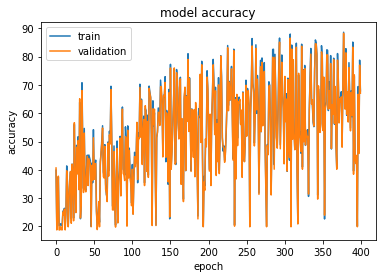

Maximum Train Accuracy : 88.61111450195312
Maximum Validation Accuracy : 88.22222137451172


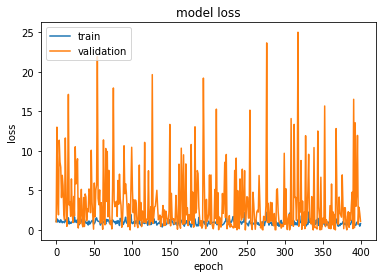

Minimum Train Loss : 0.358595609664917
Minimum Validation Loss : 1.7612874216865748e-05


In [ ]:
Bacteria_model_phase_RMSprop_0001 = Bact_Net(batch_norm=True)
Bacteria_model_phase_RMSprop_0001.cuda()
trainer_RMSprop_phase_0001 = trainer(Bacteria_model_phase_RMSprop_0001, phase_train_loader,"RMSprop", epoch_size=400, learning_rate=0.001)
trainer_RMSprop_phase_0001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_RMSprop_phase_0001.history['train_acc'])
plt.plot(trainer_RMSprop_phase_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_RMSprop_phase_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_RMSprop_phase_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_RMSprop_phase_0001.history['train_loss'])
plt.plot(trainer_RMSprop_phase_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_RMSprop_phase_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_RMSprop_phase_0001.history['val_loss'])}")

# Adam_0.001_400epoch

  0%|          | 0/400 [00:00<?, ?it/s]

Train Acc | Epoch 1/400 | ACC 23.500000


  0%|          | 1/400 [00:13<1:32:03, 13.84s/it]

Val Acc | Epoch 1/400 | ACC 23.555555
Train Acc | Epoch 2/400 | ACC 52.944447


  0%|          | 2/400 [00:28<1:33:39, 14.12s/it]

Val Acc | Epoch 2/400 | ACC 53.111111
Train Acc | Epoch 3/400 | ACC 46.916668


  1%|          | 3/400 [00:42<1:33:58, 14.20s/it]

Val Acc | Epoch 3/400 | ACC 45.333336
Train Acc | Epoch 4/400 | ACC 63.472221


  1%|          | 4/400 [00:56<1:33:58, 14.24s/it]

Val Acc | Epoch 4/400 | ACC 60.666668
Train Acc | Epoch 5/400 | ACC 64.083336


  1%|▏         | 5/400 [01:11<1:34:07, 14.30s/it]

Val Acc | Epoch 5/400 | ACC 61.666668
Train Acc | Epoch 6/400 | ACC 65.972221


  2%|▏         | 6/400 [01:25<1:33:16, 14.20s/it]

Val Acc | Epoch 6/400 | ACC 64.777779
Train Acc | Epoch 7/400 | ACC 67.000000


  2%|▏         | 7/400 [01:39<1:32:56, 14.19s/it]

Val Acc | Epoch 7/400 | ACC 64.777779
Train Acc | Epoch 8/400 | ACC 70.583336


  2%|▏         | 8/400 [01:53<1:31:49, 14.06s/it]

Val Acc | Epoch 8/400 | ACC 69.222221
Train Acc | Epoch 9/400 | ACC 68.277779


  2%|▏         | 9/400 [02:06<1:31:05, 13.98s/it]

Val Acc | Epoch 9/400 | ACC 67.666664
Train Acc | Epoch 10/400 | ACC 74.555557


  2%|▎         | 10/400 [02:20<1:30:41, 13.95s/it]

Val Acc | Epoch 10/400 | ACC 74.333336
Train Acc | Epoch 11/400 | ACC 73.777779


  3%|▎         | 11/400 [02:34<1:30:18, 13.93s/it]

Val Acc | Epoch 11/400 | ACC 73.333336
Train Acc | Epoch 12/400 | ACC 75.833336


  3%|▎         | 12/400 [02:48<1:29:49, 13.89s/it]

Val Acc | Epoch 12/400 | ACC 73.666672
Train Acc | Epoch 13/400 | ACC 78.055557


  3%|▎         | 13/400 [03:02<1:29:48, 13.92s/it]

Val Acc | Epoch 13/400 | ACC 76.666672
Train Acc | Epoch 14/400 | ACC 72.638893


  4%|▎         | 14/400 [03:16<1:29:26, 13.90s/it]

Val Acc | Epoch 14/400 | ACC 71.444443
Train Acc | Epoch 15/400 | ACC 76.861115


  4%|▍         | 15/400 [03:30<1:29:49, 14.00s/it]

Val Acc | Epoch 15/400 | ACC 76.444450
Train Acc | Epoch 16/400 | ACC 73.138893


  4%|▍         | 16/400 [03:44<1:29:03, 13.91s/it]

Val Acc | Epoch 16/400 | ACC 72.111115
Train Acc | Epoch 17/400 | ACC 80.416664


  4%|▍         | 17/400 [03:58<1:28:27, 13.86s/it]

Val Acc | Epoch 17/400 | ACC 82.111115
Train Acc | Epoch 18/400 | ACC 79.750000


  4%|▍         | 18/400 [04:12<1:28:49, 13.95s/it]

Val Acc | Epoch 18/400 | ACC 79.555557
Train Acc | Epoch 19/400 | ACC 79.972229


  5%|▍         | 19/400 [04:26<1:28:47, 13.98s/it]

Val Acc | Epoch 19/400 | ACC 78.888893
Train Acc | Epoch 20/400 | ACC 81.138893


  5%|▌         | 20/400 [04:40<1:28:39, 14.00s/it]

Val Acc | Epoch 20/400 | ACC 79.333336
Train Acc | Epoch 21/400 | ACC 79.611115


  5%|▌         | 21/400 [04:54<1:28:25, 14.00s/it]

Val Acc | Epoch 21/400 | ACC 78.666672
Train Acc | Epoch 22/400 | ACC 82.055557


  6%|▌         | 22/400 [05:08<1:28:52, 14.11s/it]

Val Acc | Epoch 22/400 | ACC 80.444450
Train Acc | Epoch 23/400 | ACC 80.555557


  6%|▌         | 23/400 [05:22<1:29:06, 14.18s/it]

Val Acc | Epoch 23/400 | ACC 79.333336
Train Acc | Epoch 24/400 | ACC 78.166672


  6%|▌         | 24/400 [05:37<1:28:50, 14.18s/it]

Val Acc | Epoch 24/400 | ACC 75.666664
Train Acc | Epoch 25/400 | ACC 82.583336


  6%|▋         | 25/400 [05:51<1:28:37, 14.18s/it]

Val Acc | Epoch 25/400 | ACC 82.000000
Train Acc | Epoch 26/400 | ACC 82.027779


  6%|▋         | 26/400 [06:05<1:28:29, 14.20s/it]

Val Acc | Epoch 26/400 | ACC 81.666664
Train Acc | Epoch 27/400 | ACC 83.055557


  7%|▋         | 27/400 [06:20<1:28:44, 14.27s/it]

Val Acc | Epoch 27/400 | ACC 82.777779
Train Acc | Epoch 28/400 | ACC 81.916664


  7%|▋         | 28/400 [06:33<1:27:39, 14.14s/it]

Val Acc | Epoch 28/400 | ACC 80.555557
Train Acc | Epoch 29/400 | ACC 80.972221


  7%|▋         | 29/400 [06:48<1:27:44, 14.19s/it]

Val Acc | Epoch 29/400 | ACC 82.111115
Train Acc | Epoch 30/400 | ACC 83.888885


  8%|▊         | 30/400 [07:02<1:27:32, 14.20s/it]

Val Acc | Epoch 30/400 | ACC 82.888885
Train Acc | Epoch 31/400 | ACC 73.972229


  8%|▊         | 31/400 [07:16<1:27:13, 14.18s/it]

Val Acc | Epoch 31/400 | ACC 76.111115
Train Acc | Epoch 32/400 | ACC 83.194443


  8%|▊         | 32/400 [07:30<1:26:23, 14.09s/it]

Val Acc | Epoch 32/400 | ACC 83.222221
Train Acc | Epoch 33/400 | ACC 82.888885


  8%|▊         | 33/400 [07:44<1:25:46, 14.02s/it]

Val Acc | Epoch 33/400 | ACC 81.555557
Train Acc | Epoch 34/400 | ACC 83.444443


  8%|▊         | 34/400 [07:58<1:25:03, 13.94s/it]

Val Acc | Epoch 34/400 | ACC 81.666664
Train Acc | Epoch 35/400 | ACC 79.222229


  9%|▉         | 35/400 [08:11<1:24:45, 13.93s/it]

Val Acc | Epoch 35/400 | ACC 79.555557
Train Acc | Epoch 36/400 | ACC 83.666672


  9%|▉         | 36/400 [08:25<1:24:42, 13.96s/it]

Val Acc | Epoch 36/400 | ACC 83.333336
Train Acc | Epoch 37/400 | ACC 83.444443


  9%|▉         | 37/400 [08:39<1:24:23, 13.95s/it]

Val Acc | Epoch 37/400 | ACC 83.888885
Train Acc | Epoch 38/400 | ACC 83.777779


 10%|▉         | 38/400 [08:53<1:24:16, 13.97s/it]

Val Acc | Epoch 38/400 | ACC 82.222221
Train Acc | Epoch 39/400 | ACC 83.805557


 10%|▉         | 39/400 [09:07<1:23:55, 13.95s/it]

Val Acc | Epoch 39/400 | ACC 82.777779
Train Acc | Epoch 40/400 | ACC 82.666672


 10%|█         | 40/400 [09:21<1:23:44, 13.96s/it]

Val Acc | Epoch 40/400 | ACC 82.000000
Train Acc | Epoch 41/400 | ACC 84.083336


 10%|█         | 41/400 [09:35<1:23:41, 13.99s/it]

Val Acc | Epoch 41/400 | ACC 83.111115
Train Acc | Epoch 42/400 | ACC 83.000008


 10%|█         | 42/400 [09:49<1:23:25, 13.98s/it]

Val Acc | Epoch 42/400 | ACC 83.444443
Train Acc | Epoch 43/400 | ACC 85.694443


 11%|█         | 43/400 [10:03<1:23:15, 13.99s/it]

Val Acc | Epoch 43/400 | ACC 84.000000
Train Acc | Epoch 44/400 | ACC 84.027779


 11%|█         | 44/400 [10:18<1:23:34, 14.08s/it]

Val Acc | Epoch 44/400 | ACC 82.666672
Train Acc | Epoch 45/400 | ACC 85.638893


 11%|█▏        | 45/400 [10:32<1:23:35, 14.13s/it]

Val Acc | Epoch 45/400 | ACC 84.000000
Train Acc | Epoch 46/400 | ACC 85.527779


 12%|█▏        | 46/400 [10:46<1:23:06, 14.09s/it]

Val Acc | Epoch 46/400 | ACC 84.777779
Train Acc | Epoch 47/400 | ACC 86.083336


 12%|█▏        | 47/400 [11:00<1:22:33, 14.03s/it]

Val Acc | Epoch 47/400 | ACC 86.333336
Train Acc | Epoch 48/400 | ACC 84.222221


 12%|█▏        | 48/400 [11:14<1:22:14, 14.02s/it]

Val Acc | Epoch 48/400 | ACC 83.555557
Train Acc | Epoch 49/400 | ACC 85.777779


 12%|█▏        | 49/400 [11:28<1:22:47, 14.15s/it]

Val Acc | Epoch 49/400 | ACC 83.444443
Train Acc | Epoch 50/400 | ACC 84.944443


 12%|█▎        | 50/400 [11:42<1:22:19, 14.11s/it]

Val Acc | Epoch 50/400 | ACC 84.888893
Train Acc | Epoch 51/400 | ACC 83.305557


 13%|█▎        | 51/400 [11:56<1:21:17, 13.97s/it]

Val Acc | Epoch 51/400 | ACC 80.777779
Train Acc | Epoch 52/400 | ACC 85.527779


 13%|█▎        | 52/400 [12:10<1:20:48, 13.93s/it]

Val Acc | Epoch 52/400 | ACC 86.777786
Train Acc | Epoch 53/400 | ACC 84.277779


 13%|█▎        | 53/400 [12:24<1:20:51, 13.98s/it]

Val Acc | Epoch 53/400 | ACC 85.000000
Train Acc | Epoch 54/400 | ACC 84.000000


 14%|█▎        | 54/400 [12:38<1:20:22, 13.94s/it]

Val Acc | Epoch 54/400 | ACC 83.666672
Train Acc | Epoch 55/400 | ACC 85.611115


 14%|█▍        | 55/400 [12:52<1:20:12, 13.95s/it]

Val Acc | Epoch 55/400 | ACC 83.555557
Train Acc | Epoch 56/400 | ACC 84.583336


 14%|█▍        | 56/400 [13:05<1:19:46, 13.91s/it]

Val Acc | Epoch 56/400 | ACC 83.777779
Train Acc | Epoch 57/400 | ACC 85.222229


 14%|█▍        | 57/400 [13:19<1:19:25, 13.89s/it]

Val Acc | Epoch 57/400 | ACC 84.111115
Train Acc | Epoch 58/400 | ACC 84.805557


 14%|█▍        | 58/400 [13:33<1:19:27, 13.94s/it]

Val Acc | Epoch 58/400 | ACC 85.666672
Train Acc | Epoch 59/400 | ACC 86.166672


 15%|█▍        | 59/400 [13:47<1:18:34, 13.83s/it]

Val Acc | Epoch 59/400 | ACC 85.000000
Train Acc | Epoch 60/400 | ACC 85.972229


 15%|█▌        | 60/400 [14:01<1:18:48, 13.91s/it]

Val Acc | Epoch 60/400 | ACC 85.444443
Train Acc | Epoch 61/400 | ACC 85.666672


 15%|█▌        | 61/400 [14:15<1:18:37, 13.92s/it]

Val Acc | Epoch 61/400 | ACC 83.444443
Train Acc | Epoch 62/400 | ACC 84.888893


 16%|█▌        | 62/400 [14:29<1:18:12, 13.88s/it]

Val Acc | Epoch 62/400 | ACC 84.000000
Train Acc | Epoch 63/400 | ACC 85.444443


 16%|█▌        | 63/400 [14:43<1:17:53, 13.87s/it]

Val Acc | Epoch 63/400 | ACC 85.222229
Train Acc | Epoch 64/400 | ACC 79.833336


 16%|█▌        | 64/400 [14:56<1:17:39, 13.87s/it]

Val Acc | Epoch 64/400 | ACC 80.000000
Train Acc | Epoch 65/400 | ACC 86.861115


 16%|█▋        | 65/400 [15:10<1:17:42, 13.92s/it]

Val Acc | Epoch 65/400 | ACC 86.888893
Train Acc | Epoch 66/400 | ACC 85.166672


 16%|█▋        | 66/400 [15:24<1:17:19, 13.89s/it]

Val Acc | Epoch 66/400 | ACC 84.333336
Train Acc | Epoch 67/400 | ACC 84.916672


 17%|█▋        | 67/400 [15:38<1:17:22, 13.94s/it]

Val Acc | Epoch 67/400 | ACC 84.444443
Train Acc | Epoch 68/400 | ACC 85.638893


 17%|█▋        | 68/400 [15:52<1:17:02, 13.92s/it]

Val Acc | Epoch 68/400 | ACC 86.666664
Train Acc | Epoch 69/400 | ACC 86.638893


 17%|█▋        | 69/400 [16:06<1:16:29, 13.87s/it]

Val Acc | Epoch 69/400 | ACC 85.666672
Train Acc | Epoch 70/400 | ACC 86.861115


 18%|█▊        | 70/400 [16:20<1:16:44, 13.95s/it]

Val Acc | Epoch 70/400 | ACC 86.444450
Train Acc | Epoch 71/400 | ACC 86.805557


 18%|█▊        | 71/400 [16:35<1:17:56, 14.22s/it]

Val Acc | Epoch 71/400 | ACC 84.888893
Train Acc | Epoch 72/400 | ACC 84.027779


 18%|█▊        | 72/400 [16:49<1:17:49, 14.24s/it]

Val Acc | Epoch 72/400 | ACC 84.222221
Train Acc | Epoch 73/400 | ACC 86.638893


 18%|█▊        | 73/400 [17:03<1:17:01, 14.13s/it]

Val Acc | Epoch 73/400 | ACC 84.555557
Train Acc | Epoch 74/400 | ACC 82.527779


 18%|█▊        | 74/400 [17:17<1:16:50, 14.14s/it]

Val Acc | Epoch 74/400 | ACC 82.444450
Train Acc | Epoch 75/400 | ACC 86.111107


 19%|█▉        | 75/400 [17:31<1:16:37, 14.15s/it]

Val Acc | Epoch 75/400 | ACC 84.666672
Train Acc | Epoch 76/400 | ACC 85.611115


 19%|█▉        | 76/400 [17:46<1:16:19, 14.13s/it]

Val Acc | Epoch 76/400 | ACC 83.777779
Train Acc | Epoch 77/400 | ACC 84.333336


 19%|█▉        | 77/400 [17:59<1:15:40, 14.06s/it]

Val Acc | Epoch 77/400 | ACC 83.555557
Train Acc | Epoch 78/400 | ACC 83.388885


 20%|█▉        | 78/400 [18:14<1:15:31, 14.07s/it]

Val Acc | Epoch 78/400 | ACC 82.666672
Train Acc | Epoch 79/400 | ACC 85.527779


 20%|█▉        | 79/400 [18:28<1:15:48, 14.17s/it]

Val Acc | Epoch 79/400 | ACC 85.777779
Train Acc | Epoch 80/400 | ACC 86.083336


 20%|██        | 80/400 [18:42<1:15:47, 14.21s/it]

Val Acc | Epoch 80/400 | ACC 86.222229
Train Acc | Epoch 81/400 | ACC 86.944450


 20%|██        | 81/400 [18:56<1:15:00, 14.11s/it]

Val Acc | Epoch 81/400 | ACC 86.777786
Train Acc | Epoch 82/400 | ACC 87.500000


 20%|██        | 82/400 [19:10<1:14:22, 14.03s/it]

Val Acc | Epoch 82/400 | ACC 85.333336
Train Acc | Epoch 83/400 | ACC 85.000000


 21%|██        | 83/400 [19:24<1:13:53, 13.99s/it]

Val Acc | Epoch 83/400 | ACC 84.000000
Train Acc | Epoch 84/400 | ACC 87.083336


 21%|██        | 84/400 [19:38<1:14:01, 14.05s/it]

Val Acc | Epoch 84/400 | ACC 86.555557
Train Acc | Epoch 85/400 | ACC 86.777786


 21%|██▏       | 85/400 [19:52<1:13:32, 14.01s/it]

Val Acc | Epoch 85/400 | ACC 86.111107
Train Acc | Epoch 86/400 | ACC 86.111107


 22%|██▏       | 86/400 [20:06<1:13:30, 14.04s/it]

Val Acc | Epoch 86/400 | ACC 84.555557
Train Acc | Epoch 87/400 | ACC 86.027779


 22%|██▏       | 87/400 [20:20<1:13:21, 14.06s/it]

Val Acc | Epoch 87/400 | ACC 86.111107
Train Acc | Epoch 88/400 | ACC 85.777779


 22%|██▏       | 88/400 [20:34<1:12:47, 14.00s/it]

Val Acc | Epoch 88/400 | ACC 83.444443
Train Acc | Epoch 89/400 | ACC 87.527779


 22%|██▏       | 89/400 [20:48<1:12:06, 13.91s/it]

Val Acc | Epoch 89/400 | ACC 86.333336
Train Acc | Epoch 90/400 | ACC 84.472229


 22%|██▎       | 90/400 [21:02<1:11:55, 13.92s/it]

Val Acc | Epoch 90/400 | ACC 82.666672
Train Acc | Epoch 91/400 | ACC 87.361115


 23%|██▎       | 91/400 [21:16<1:11:58, 13.98s/it]

Val Acc | Epoch 91/400 | ACC 83.333336
Train Acc | Epoch 92/400 | ACC 86.111107


 23%|██▎       | 92/400 [21:30<1:11:41, 13.96s/it]

Val Acc | Epoch 92/400 | ACC 84.777779
Train Acc | Epoch 93/400 | ACC 86.750000


 23%|██▎       | 93/400 [21:44<1:12:27, 14.16s/it]

Val Acc | Epoch 93/400 | ACC 86.555557
Train Acc | Epoch 94/400 | ACC 87.888893


 24%|██▎       | 94/400 [21:59<1:12:26, 14.20s/it]

Val Acc | Epoch 94/400 | ACC 86.888893
Train Acc | Epoch 95/400 | ACC 86.888893


 24%|██▍       | 95/400 [22:12<1:11:36, 14.09s/it]

Val Acc | Epoch 95/400 | ACC 85.333336
Train Acc | Epoch 96/400 | ACC 85.666672


 24%|██▍       | 96/400 [22:26<1:11:14, 14.06s/it]

Val Acc | Epoch 96/400 | ACC 85.888893
Train Acc | Epoch 97/400 | ACC 86.444450


 24%|██▍       | 97/400 [22:40<1:10:46, 14.01s/it]

Val Acc | Epoch 97/400 | ACC 85.222229
Train Acc | Epoch 98/400 | ACC 86.388893


 24%|██▍       | 98/400 [22:54<1:10:15, 13.96s/it]

Val Acc | Epoch 98/400 | ACC 85.111115
Train Acc | Epoch 99/400 | ACC 87.305557


 25%|██▍       | 99/400 [23:08<1:09:53, 13.93s/it]

Val Acc | Epoch 99/400 | ACC 86.111107
Train Acc | Epoch 100/400 | ACC 87.722221


 25%|██▌       | 100/400 [23:22<1:09:36, 13.92s/it]

Val Acc | Epoch 100/400 | ACC 85.777779
Train Acc | Epoch 101/400 | ACC 86.861115


 25%|██▌       | 101/400 [23:36<1:09:29, 13.94s/it]

Val Acc | Epoch 101/400 | ACC 84.333336
Train Acc | Epoch 102/400 | ACC 88.222221


 26%|██▌       | 102/400 [23:50<1:09:13, 13.94s/it]

Val Acc | Epoch 102/400 | ACC 87.777779
Train Acc | Epoch 103/400 | ACC 87.444450


 26%|██▌       | 103/400 [24:04<1:08:35, 13.86s/it]

Val Acc | Epoch 103/400 | ACC 85.555557
Train Acc | Epoch 104/400 | ACC 88.027779


 26%|██▌       | 104/400 [24:17<1:08:16, 13.84s/it]

Val Acc | Epoch 104/400 | ACC 87.666664
Train Acc | Epoch 105/400 | ACC 86.638893


 26%|██▋       | 105/400 [24:31<1:07:59, 13.83s/it]

Val Acc | Epoch 105/400 | ACC 86.444450
Train Acc | Epoch 106/400 | ACC 88.027779


 26%|██▋       | 106/400 [24:45<1:07:27, 13.77s/it]

Val Acc | Epoch 106/400 | ACC 85.888893
Train Acc | Epoch 107/400 | ACC 87.583336


 27%|██▋       | 107/400 [24:59<1:07:42, 13.86s/it]

Val Acc | Epoch 107/400 | ACC 87.111115
Train Acc | Epoch 108/400 | ACC 84.805557


 27%|██▋       | 108/400 [25:13<1:07:59, 13.97s/it]

Val Acc | Epoch 108/400 | ACC 84.666672
Train Acc | Epoch 109/400 | ACC 87.944450


 27%|██▋       | 109/400 [25:27<1:07:32, 13.93s/it]

Val Acc | Epoch 109/400 | ACC 87.111115
Train Acc | Epoch 110/400 | ACC 87.777779


 28%|██▊       | 110/400 [25:41<1:07:21, 13.94s/it]

Val Acc | Epoch 110/400 | ACC 88.000000
Train Acc | Epoch 111/400 | ACC 88.416672


 28%|██▊       | 111/400 [25:55<1:07:16, 13.97s/it]

Val Acc | Epoch 111/400 | ACC 86.777786
Train Acc | Epoch 112/400 | ACC 87.583336


 28%|██▊       | 112/400 [26:09<1:07:08, 13.99s/it]

Val Acc | Epoch 112/400 | ACC 85.666672
Train Acc | Epoch 113/400 | ACC 87.527779


 28%|██▊       | 113/400 [26:23<1:07:01, 14.01s/it]

Val Acc | Epoch 113/400 | ACC 86.222229
Train Acc | Epoch 114/400 | ACC 89.388885


 28%|██▊       | 114/400 [26:37<1:06:57, 14.05s/it]

Val Acc | Epoch 114/400 | ACC 88.555557
Train Acc | Epoch 115/400 | ACC 86.805557


 29%|██▉       | 115/400 [26:52<1:07:40, 14.25s/it]

Val Acc | Epoch 115/400 | ACC 86.888893
Train Acc | Epoch 116/400 | ACC 86.305557


 29%|██▉       | 116/400 [27:06<1:07:47, 14.32s/it]

Val Acc | Epoch 116/400 | ACC 83.666672
Train Acc | Epoch 117/400 | ACC 86.472229


 29%|██▉       | 117/400 [27:20<1:07:00, 14.21s/it]

Val Acc | Epoch 117/400 | ACC 86.777786
Train Acc | Epoch 118/400 | ACC 88.750008


 30%|██▉       | 118/400 [27:34<1:06:20, 14.11s/it]

Val Acc | Epoch 118/400 | ACC 87.333336
Train Acc | Epoch 119/400 | ACC 88.055557


 30%|██▉       | 119/400 [27:48<1:05:56, 14.08s/it]

Val Acc | Epoch 119/400 | ACC 87.555557
Train Acc | Epoch 120/400 | ACC 86.527786


 30%|███       | 120/400 [28:02<1:05:19, 14.00s/it]

Val Acc | Epoch 120/400 | ACC 85.444443
Train Acc | Epoch 121/400 | ACC 88.083336


 30%|███       | 121/400 [28:16<1:04:37, 13.90s/it]

Val Acc | Epoch 121/400 | ACC 86.555557
Train Acc | Epoch 122/400 | ACC 88.861115


 30%|███       | 122/400 [28:29<1:04:12, 13.86s/it]

Val Acc | Epoch 122/400 | ACC 86.777786
Train Acc | Epoch 123/400 | ACC 88.500008


 31%|███       | 123/400 [28:43<1:03:47, 13.82s/it]

Val Acc | Epoch 123/400 | ACC 88.000000
Train Acc | Epoch 124/400 | ACC 89.083336


 31%|███       | 124/400 [28:57<1:03:44, 13.86s/it]

Val Acc | Epoch 124/400 | ACC 88.555557
Train Acc | Epoch 125/400 | ACC 89.333336


 31%|███▏      | 125/400 [29:11<1:03:36, 13.88s/it]

Val Acc | Epoch 125/400 | ACC 89.000008
Train Acc | Epoch 126/400 | ACC 88.722221


 32%|███▏      | 126/400 [29:25<1:03:43, 13.95s/it]

Val Acc | Epoch 126/400 | ACC 87.666664
Train Acc | Epoch 127/400 | ACC 88.694450


 32%|███▏      | 127/400 [29:39<1:03:34, 13.97s/it]

Val Acc | Epoch 127/400 | ACC 88.111115
Train Acc | Epoch 128/400 | ACC 88.750008


 32%|███▏      | 128/400 [29:53<1:03:35, 14.03s/it]

Val Acc | Epoch 128/400 | ACC 88.555557
Train Acc | Epoch 129/400 | ACC 86.361115


 32%|███▏      | 129/400 [30:08<1:03:36, 14.08s/it]

Val Acc | Epoch 129/400 | ACC 86.111107
Train Acc | Epoch 130/400 | ACC 87.944450


 32%|███▎      | 130/400 [30:22<1:03:39, 14.15s/it]

Val Acc | Epoch 130/400 | ACC 86.555557
Train Acc | Epoch 131/400 | ACC 88.416672


 33%|███▎      | 131/400 [30:36<1:03:28, 14.16s/it]

Val Acc | Epoch 131/400 | ACC 88.333336
Train Acc | Epoch 132/400 | ACC 87.500000


 33%|███▎      | 132/400 [30:50<1:02:53, 14.08s/it]

Val Acc | Epoch 132/400 | ACC 85.666672
Train Acc | Epoch 133/400 | ACC 88.583336


 33%|███▎      | 133/400 [31:04<1:02:36, 14.07s/it]

Val Acc | Epoch 133/400 | ACC 87.555557
Train Acc | Epoch 134/400 | ACC 88.750008


 34%|███▎      | 134/400 [31:18<1:02:25, 14.08s/it]

Val Acc | Epoch 134/400 | ACC 86.333336
Train Acc | Epoch 135/400 | ACC 89.611115


 34%|███▍      | 135/400 [31:32<1:02:25, 14.13s/it]

Val Acc | Epoch 135/400 | ACC 88.333336
Train Acc | Epoch 136/400 | ACC 88.583336


 34%|███▍      | 136/400 [31:46<1:02:10, 14.13s/it]

Val Acc | Epoch 136/400 | ACC 87.888893
Train Acc | Epoch 137/400 | ACC 89.555557


 34%|███▍      | 137/400 [32:01<1:02:18, 14.21s/it]

Val Acc | Epoch 137/400 | ACC 88.444450
Train Acc | Epoch 138/400 | ACC 89.500008


 34%|███▍      | 138/400 [32:15<1:02:22, 14.29s/it]

Val Acc | Epoch 138/400 | ACC 88.555557
Train Acc | Epoch 139/400 | ACC 88.166664


 35%|███▍      | 139/400 [32:29<1:01:41, 14.18s/it]

Val Acc | Epoch 139/400 | ACC 87.111115
Train Acc | Epoch 140/400 | ACC 89.361115


 35%|███▌      | 140/400 [32:43<1:01:16, 14.14s/it]

Val Acc | Epoch 140/400 | ACC 87.666664
Train Acc | Epoch 141/400 | ACC 87.750000


 35%|███▌      | 141/400 [32:57<1:00:27, 14.01s/it]

Val Acc | Epoch 141/400 | ACC 87.000000
Train Acc | Epoch 142/400 | ACC 87.388893


 36%|███▌      | 142/400 [33:11<1:00:07, 13.98s/it]

Val Acc | Epoch 142/400 | ACC 86.444450
Train Acc | Epoch 143/400 | ACC 89.611115


 36%|███▌      | 143/400 [33:25<59:44, 13.95s/it]  

Val Acc | Epoch 143/400 | ACC 88.666672
Train Acc | Epoch 144/400 | ACC 90.527779


 36%|███▌      | 144/400 [33:39<59:44, 14.00s/it]

Val Acc | Epoch 144/400 | ACC 87.666664
Train Acc | Epoch 145/400 | ACC 89.222221


 36%|███▋      | 145/400 [33:53<1:00:03, 14.13s/it]

Val Acc | Epoch 145/400 | ACC 87.888893
Train Acc | Epoch 146/400 | ACC 87.222221


 36%|███▋      | 146/400 [34:07<59:21, 14.02s/it]  

Val Acc | Epoch 146/400 | ACC 87.111115
Train Acc | Epoch 147/400 | ACC 87.166664


 37%|███▋      | 147/400 [34:21<59:03, 14.01s/it]

Val Acc | Epoch 147/400 | ACC 87.777779
Train Acc | Epoch 148/400 | ACC 88.750008


 37%|███▋      | 148/400 [34:35<58:45, 13.99s/it]

Val Acc | Epoch 148/400 | ACC 87.444450
Train Acc | Epoch 149/400 | ACC 86.361115


 37%|███▋      | 149/400 [34:49<58:42, 14.03s/it]

Val Acc | Epoch 149/400 | ACC 84.222221
Train Acc | Epoch 150/400 | ACC 89.055557


 38%|███▊      | 150/400 [35:03<57:57, 13.91s/it]

Val Acc | Epoch 150/400 | ACC 87.444450
Train Acc | Epoch 151/400 | ACC 88.444450


 38%|███▊      | 151/400 [35:17<57:56, 13.96s/it]

Val Acc | Epoch 151/400 | ACC 87.444450
Train Acc | Epoch 152/400 | ACC 90.305557


 38%|███▊      | 152/400 [35:31<57:56, 14.02s/it]

Val Acc | Epoch 152/400 | ACC 88.222221
Train Acc | Epoch 153/400 | ACC 86.722221


 38%|███▊      | 153/400 [35:45<58:04, 14.11s/it]

Val Acc | Epoch 153/400 | ACC 84.666672
Train Acc | Epoch 154/400 | ACC 90.111115


 38%|███▊      | 154/400 [35:59<57:31, 14.03s/it]

Val Acc | Epoch 154/400 | ACC 88.666672
Train Acc | Epoch 155/400 | ACC 88.472221


 39%|███▉      | 155/400 [36:13<57:32, 14.09s/it]

Val Acc | Epoch 155/400 | ACC 88.111115
Train Acc | Epoch 156/400 | ACC 88.111115


 39%|███▉      | 156/400 [36:28<57:19, 14.10s/it]

Val Acc | Epoch 156/400 | ACC 87.222221
Train Acc | Epoch 157/400 | ACC 88.805557


 39%|███▉      | 157/400 [36:42<56:58, 14.07s/it]

Val Acc | Epoch 157/400 | ACC 87.333336
Train Acc | Epoch 158/400 | ACC 89.111115


 40%|███▉      | 158/400 [36:55<56:36, 14.04s/it]

Val Acc | Epoch 158/400 | ACC 87.111115
Train Acc | Epoch 159/400 | ACC 89.777779


 40%|███▉      | 159/400 [37:10<57:12, 14.24s/it]

Val Acc | Epoch 159/400 | ACC 87.222221
Train Acc | Epoch 160/400 | ACC 88.833336


 40%|████      | 160/400 [37:25<57:11, 14.30s/it]

Val Acc | Epoch 160/400 | ACC 88.555557
Train Acc | Epoch 161/400 | ACC 89.083336


 40%|████      | 161/400 [37:39<56:54, 14.29s/it]

Val Acc | Epoch 161/400 | ACC 86.888893
Train Acc | Epoch 162/400 | ACC 90.000000


 40%|████      | 162/400 [37:53<56:44, 14.30s/it]

Val Acc | Epoch 162/400 | ACC 87.888893
Train Acc | Epoch 163/400 | ACC 89.527779


 41%|████      | 163/400 [38:08<56:36, 14.33s/it]

Val Acc | Epoch 163/400 | ACC 88.333336
Train Acc | Epoch 164/400 | ACC 89.250008


 41%|████      | 164/400 [38:22<55:48, 14.19s/it]

Val Acc | Epoch 164/400 | ACC 87.666664
Train Acc | Epoch 165/400 | ACC 90.388885


 41%|████▏     | 165/400 [38:35<55:15, 14.11s/it]

Val Acc | Epoch 165/400 | ACC 88.777779
Train Acc | Epoch 166/400 | ACC 85.972229


 42%|████▏     | 166/400 [38:50<55:10, 14.15s/it]

Val Acc | Epoch 166/400 | ACC 83.888885
Train Acc | Epoch 167/400 | ACC 89.666672


 42%|████▏     | 167/400 [39:04<54:49, 14.12s/it]

Val Acc | Epoch 167/400 | ACC 87.888893
Train Acc | Epoch 168/400 | ACC 88.444450


 42%|████▏     | 168/400 [39:18<54:28, 14.09s/it]

Val Acc | Epoch 168/400 | ACC 85.222229
Train Acc | Epoch 169/400 | ACC 89.416672


 42%|████▏     | 169/400 [39:32<53:56, 14.01s/it]

Val Acc | Epoch 169/400 | ACC 89.000008
Train Acc | Epoch 170/400 | ACC 89.833336


 42%|████▎     | 170/400 [39:46<53:47, 14.03s/it]

Val Acc | Epoch 170/400 | ACC 88.111115
Train Acc | Epoch 171/400 | ACC 88.111115


 43%|████▎     | 171/400 [40:00<53:47, 14.10s/it]

Val Acc | Epoch 171/400 | ACC 86.666664
Train Acc | Epoch 172/400 | ACC 88.055557


 43%|████▎     | 172/400 [40:14<53:43, 14.14s/it]

Val Acc | Epoch 172/400 | ACC 86.222229
Train Acc | Epoch 173/400 | ACC 90.222221


 43%|████▎     | 173/400 [40:28<53:13, 14.07s/it]

Val Acc | Epoch 173/400 | ACC 88.333336
Train Acc | Epoch 174/400 | ACC 89.138885


 44%|████▎     | 174/400 [40:42<52:52, 14.04s/it]

Val Acc | Epoch 174/400 | ACC 88.666672
Train Acc | Epoch 175/400 | ACC 89.638885


 44%|████▍     | 175/400 [40:56<52:39, 14.04s/it]

Val Acc | Epoch 175/400 | ACC 89.222221
Train Acc | Epoch 176/400 | ACC 85.083336


 44%|████▍     | 176/400 [41:10<52:14, 13.99s/it]

Val Acc | Epoch 176/400 | ACC 84.555557
Train Acc | Epoch 177/400 | ACC 88.777779


 44%|████▍     | 177/400 [41:24<51:47, 13.94s/it]

Val Acc | Epoch 177/400 | ACC 86.666664
Train Acc | Epoch 178/400 | ACC 89.472221


 44%|████▍     | 178/400 [41:38<51:32, 13.93s/it]

Val Acc | Epoch 178/400 | ACC 87.888893
Train Acc | Epoch 179/400 | ACC 86.305557


 45%|████▍     | 179/400 [41:52<51:29, 13.98s/it]

Val Acc | Epoch 179/400 | ACC 85.666672
Train Acc | Epoch 180/400 | ACC 89.722221


 45%|████▌     | 180/400 [42:06<51:16, 13.98s/it]

Val Acc | Epoch 180/400 | ACC 88.333336
Train Acc | Epoch 181/400 | ACC 88.527779


 45%|████▌     | 181/400 [42:21<52:14, 14.31s/it]

Val Acc | Epoch 181/400 | ACC 87.000000
Train Acc | Epoch 182/400 | ACC 89.055557


 46%|████▌     | 182/400 [42:36<52:43, 14.51s/it]

Val Acc | Epoch 182/400 | ACC 88.333336
Train Acc | Epoch 183/400 | ACC 89.694443


 46%|████▌     | 183/400 [42:50<52:21, 14.48s/it]

Val Acc | Epoch 183/400 | ACC 89.888885
Train Acc | Epoch 184/400 | ACC 89.972221


 46%|████▌     | 184/400 [43:05<52:06, 14.47s/it]

Val Acc | Epoch 184/400 | ACC 88.222221
Train Acc | Epoch 185/400 | ACC 87.500000


 46%|████▋     | 185/400 [43:19<51:36, 14.40s/it]

Val Acc | Epoch 185/400 | ACC 85.888893
Train Acc | Epoch 186/400 | ACC 89.916672


 46%|████▋     | 186/400 [43:33<51:24, 14.42s/it]

Val Acc | Epoch 186/400 | ACC 89.888885
Train Acc | Epoch 187/400 | ACC 88.750008


 47%|████▋     | 187/400 [43:48<51:02, 14.38s/it]

Val Acc | Epoch 187/400 | ACC 88.222221
Train Acc | Epoch 188/400 | ACC 88.083336


 47%|████▋     | 188/400 [44:02<51:00, 14.43s/it]

Val Acc | Epoch 188/400 | ACC 88.333336
Train Acc | Epoch 189/400 | ACC 87.750000


 47%|████▋     | 189/400 [44:17<50:47, 14.44s/it]

Val Acc | Epoch 189/400 | ACC 87.777779
Train Acc | Epoch 190/400 | ACC 90.277779


 48%|████▊     | 190/400 [44:31<50:25, 14.41s/it]

Val Acc | Epoch 190/400 | ACC 88.444450
Train Acc | Epoch 191/400 | ACC 86.472229


 48%|████▊     | 191/400 [44:45<50:17, 14.44s/it]

Val Acc | Epoch 191/400 | ACC 84.777779
Train Acc | Epoch 192/400 | ACC 89.944443


 48%|████▊     | 192/400 [45:00<49:53, 14.39s/it]

Val Acc | Epoch 192/400 | ACC 88.222221
Train Acc | Epoch 193/400 | ACC 89.416672


 48%|████▊     | 193/400 [45:14<49:27, 14.34s/it]

Val Acc | Epoch 193/400 | ACC 87.222221
Train Acc | Epoch 194/400 | ACC 90.000000


 48%|████▊     | 194/400 [45:28<49:06, 14.30s/it]

Val Acc | Epoch 194/400 | ACC 88.444450
Train Acc | Epoch 195/400 | ACC 90.138885


 49%|████▉     | 195/400 [45:42<48:39, 14.24s/it]

Val Acc | Epoch 195/400 | ACC 87.666664
Train Acc | Epoch 196/400 | ACC 89.861115


 49%|████▉     | 196/400 [45:57<48:35, 14.29s/it]

Val Acc | Epoch 196/400 | ACC 88.000000
Train Acc | Epoch 197/400 | ACC 89.972221


 49%|████▉     | 197/400 [46:11<48:29, 14.33s/it]

Val Acc | Epoch 197/400 | ACC 88.111115
Train Acc | Epoch 198/400 | ACC 89.388885


 50%|████▉     | 198/400 [46:25<48:00, 14.26s/it]

Val Acc | Epoch 198/400 | ACC 88.333336
Train Acc | Epoch 199/400 | ACC 89.583336


 50%|████▉     | 199/400 [46:39<47:46, 14.26s/it]

Val Acc | Epoch 199/400 | ACC 89.333336
Train Acc | Epoch 200/400 | ACC 88.083336


 50%|█████     | 200/400 [46:53<47:09, 14.15s/it]

Val Acc | Epoch 200/400 | ACC 86.111107
Train Acc | Epoch 201/400 | ACC 90.416672


 50%|█████     | 201/400 [47:08<46:55, 14.15s/it]

Val Acc | Epoch 201/400 | ACC 88.666672
Train Acc | Epoch 202/400 | ACC 89.472221


 50%|█████     | 202/400 [47:22<46:40, 14.15s/it]

Val Acc | Epoch 202/400 | ACC 87.888893
Train Acc | Epoch 203/400 | ACC 87.750000


 51%|█████     | 203/400 [47:37<47:31, 14.47s/it]

Val Acc | Epoch 203/400 | ACC 86.000000
Train Acc | Epoch 204/400 | ACC 90.138885


 51%|█████     | 204/400 [47:51<47:07, 14.43s/it]

Val Acc | Epoch 204/400 | ACC 89.333336
Train Acc | Epoch 205/400 | ACC 89.694443


 51%|█████▏    | 205/400 [48:05<46:40, 14.36s/it]

Val Acc | Epoch 205/400 | ACC 87.888893
Train Acc | Epoch 206/400 | ACC 90.777779


 52%|█████▏    | 206/400 [48:20<46:18, 14.32s/it]

Val Acc | Epoch 206/400 | ACC 87.888893
Train Acc | Epoch 207/400 | ACC 89.500008


 52%|█████▏    | 207/400 [48:34<45:59, 14.30s/it]

Val Acc | Epoch 207/400 | ACC 88.333336
Train Acc | Epoch 208/400 | ACC 85.861115


 52%|█████▏    | 208/400 [48:48<45:31, 14.23s/it]

Val Acc | Epoch 208/400 | ACC 84.888893
Train Acc | Epoch 209/400 | ACC 90.194443


 52%|█████▏    | 209/400 [49:02<45:03, 14.16s/it]

Val Acc | Epoch 209/400 | ACC 90.000000
Train Acc | Epoch 210/400 | ACC 89.500008


 52%|█████▎    | 210/400 [49:16<44:46, 14.14s/it]

Val Acc | Epoch 210/400 | ACC 88.444450
Train Acc | Epoch 211/400 | ACC 88.083336


 53%|█████▎    | 211/400 [49:30<44:43, 14.20s/it]

Val Acc | Epoch 211/400 | ACC 86.555557
Train Acc | Epoch 212/400 | ACC 90.750000


 53%|█████▎    | 212/400 [49:44<44:14, 14.12s/it]

Val Acc | Epoch 212/400 | ACC 89.111115
Train Acc | Epoch 213/400 | ACC 90.416672


 53%|█████▎    | 213/400 [49:58<43:53, 14.08s/it]

Val Acc | Epoch 213/400 | ACC 88.555557
Train Acc | Epoch 214/400 | ACC 88.916672


 54%|█████▎    | 214/400 [50:12<43:24, 14.00s/it]

Val Acc | Epoch 214/400 | ACC 88.666672
Train Acc | Epoch 215/400 | ACC 89.638885


 54%|█████▍    | 215/400 [50:26<42:55, 13.92s/it]

Val Acc | Epoch 215/400 | ACC 87.555557
Train Acc | Epoch 216/400 | ACC 87.944450


 54%|█████▍    | 216/400 [50:40<42:43, 13.93s/it]

Val Acc | Epoch 216/400 | ACC 87.666664
Train Acc | Epoch 217/400 | ACC 89.166672


 54%|█████▍    | 217/400 [50:54<42:25, 13.91s/it]

Val Acc | Epoch 217/400 | ACC 88.222221
Train Acc | Epoch 218/400 | ACC 90.611115


 55%|█████▍    | 218/400 [51:07<42:02, 13.86s/it]

Val Acc | Epoch 218/400 | ACC 89.111115
Train Acc | Epoch 219/400 | ACC 90.833336


 55%|█████▍    | 219/400 [51:21<41:57, 13.91s/it]

Val Acc | Epoch 219/400 | ACC 90.333336
Train Acc | Epoch 220/400 | ACC 90.222221


 55%|█████▌    | 220/400 [51:35<41:42, 13.90s/it]

Val Acc | Epoch 220/400 | ACC 90.000000
Train Acc | Epoch 221/400 | ACC 89.138885


 55%|█████▌    | 221/400 [51:49<41:32, 13.93s/it]

Val Acc | Epoch 221/400 | ACC 88.777779
Train Acc | Epoch 222/400 | ACC 90.305557


 56%|█████▌    | 222/400 [52:03<41:04, 13.84s/it]

Val Acc | Epoch 222/400 | ACC 88.444450
Train Acc | Epoch 223/400 | ACC 89.888885


 56%|█████▌    | 223/400 [52:17<41:03, 13.92s/it]

Val Acc | Epoch 223/400 | ACC 89.000008
Train Acc | Epoch 224/400 | ACC 90.972229


 56%|█████▌    | 224/400 [52:31<40:59, 13.97s/it]

Val Acc | Epoch 224/400 | ACC 87.888893
Train Acc | Epoch 225/400 | ACC 90.194443


 56%|█████▋    | 225/400 [52:46<41:20, 14.17s/it]

Val Acc | Epoch 225/400 | ACC 88.111115
Train Acc | Epoch 226/400 | ACC 90.166672


 56%|█████▋    | 226/400 [53:00<40:58, 14.13s/it]

Val Acc | Epoch 226/400 | ACC 89.888885
Train Acc | Epoch 227/400 | ACC 90.805557


 57%|█████▋    | 227/400 [53:13<40:17, 13.97s/it]

Val Acc | Epoch 227/400 | ACC 89.666672
Train Acc | Epoch 228/400 | ACC 90.777779


 57%|█████▋    | 228/400 [53:27<39:55, 13.93s/it]

Val Acc | Epoch 228/400 | ACC 89.333336
Train Acc | Epoch 229/400 | ACC 91.250000


 57%|█████▋    | 229/400 [53:42<39:57, 14.02s/it]

Val Acc | Epoch 229/400 | ACC 89.888885
Train Acc | Epoch 230/400 | ACC 89.972221


 57%|█████▊    | 230/400 [53:55<39:37, 13.99s/it]

Val Acc | Epoch 230/400 | ACC 90.222221
Train Acc | Epoch 231/400 | ACC 90.416672


 58%|█████▊    | 231/400 [54:10<39:31, 14.03s/it]

Val Acc | Epoch 231/400 | ACC 87.888893
Train Acc | Epoch 232/400 | ACC 89.694443


 58%|█████▊    | 232/400 [54:24<39:33, 14.13s/it]

Val Acc | Epoch 232/400 | ACC 88.777779
Train Acc | Epoch 233/400 | ACC 89.500008


 58%|█████▊    | 233/400 [54:38<39:08, 14.06s/it]

Val Acc | Epoch 233/400 | ACC 87.111115
Train Acc | Epoch 234/400 | ACC 90.833336


 58%|█████▊    | 234/400 [54:52<39:01, 14.10s/it]

Val Acc | Epoch 234/400 | ACC 89.111115
Train Acc | Epoch 235/400 | ACC 90.777779


 59%|█████▉    | 235/400 [55:06<38:58, 14.17s/it]

Val Acc | Epoch 235/400 | ACC 89.444443
Train Acc | Epoch 236/400 | ACC 90.083336


 59%|█████▉    | 236/400 [55:21<38:48, 14.20s/it]

Val Acc | Epoch 236/400 | ACC 90.444443
Train Acc | Epoch 237/400 | ACC 90.527779


 59%|█████▉    | 237/400 [55:34<38:19, 14.11s/it]

Val Acc | Epoch 237/400 | ACC 88.555557
Train Acc | Epoch 238/400 | ACC 89.972221


 60%|█████▉    | 238/400 [55:49<38:05, 14.11s/it]

Val Acc | Epoch 238/400 | ACC 87.666664
Train Acc | Epoch 239/400 | ACC 90.111115


 60%|█████▉    | 239/400 [56:03<37:57, 14.15s/it]

Val Acc | Epoch 239/400 | ACC 89.555557
Train Acc | Epoch 240/400 | ACC 90.194443


 60%|██████    | 240/400 [56:17<37:33, 14.09s/it]

Val Acc | Epoch 240/400 | ACC 90.000000
Train Acc | Epoch 241/400 | ACC 90.138885


 60%|██████    | 241/400 [56:31<37:26, 14.13s/it]

Val Acc | Epoch 241/400 | ACC 90.000000
Train Acc | Epoch 242/400 | ACC 90.888893


 60%|██████    | 242/400 [56:45<36:59, 14.05s/it]

Val Acc | Epoch 242/400 | ACC 89.000008
Train Acc | Epoch 243/400 | ACC 88.861115


 61%|██████    | 243/400 [56:59<37:02, 14.15s/it]

Val Acc | Epoch 243/400 | ACC 87.333336
Train Acc | Epoch 244/400 | ACC 88.611115


 61%|██████    | 244/400 [57:13<36:45, 14.14s/it]

Val Acc | Epoch 244/400 | ACC 88.111115
Train Acc | Epoch 245/400 | ACC 91.138893


 61%|██████▏   | 245/400 [57:28<36:31, 14.14s/it]

Val Acc | Epoch 245/400 | ACC 87.777779
Train Acc | Epoch 246/400 | ACC 90.750000


 62%|██████▏   | 246/400 [57:41<36:03, 14.05s/it]

Val Acc | Epoch 246/400 | ACC 89.888885
Train Acc | Epoch 247/400 | ACC 90.833336


 62%|██████▏   | 247/400 [57:56<36:33, 14.34s/it]

Val Acc | Epoch 247/400 | ACC 88.333336
Train Acc | Epoch 248/400 | ACC 90.333336


 62%|██████▏   | 248/400 [58:11<36:22, 14.36s/it]

Val Acc | Epoch 248/400 | ACC 89.555557
Train Acc | Epoch 249/400 | ACC 89.805557


 62%|██████▏   | 249/400 [58:25<35:58, 14.29s/it]

Val Acc | Epoch 249/400 | ACC 88.555557
Train Acc | Epoch 250/400 | ACC 90.777779


 62%|██████▎   | 250/400 [58:39<35:50, 14.34s/it]

Val Acc | Epoch 250/400 | ACC 89.111115
Train Acc | Epoch 251/400 | ACC 90.611115


 63%|██████▎   | 251/400 [58:53<35:26, 14.27s/it]

Val Acc | Epoch 251/400 | ACC 88.444450
Train Acc | Epoch 252/400 | ACC 90.194443


 63%|██████▎   | 252/400 [59:08<35:15, 14.29s/it]

Val Acc | Epoch 252/400 | ACC 88.666672
Train Acc | Epoch 253/400 | ACC 90.361115


 63%|██████▎   | 253/400 [59:22<34:55, 14.26s/it]

Val Acc | Epoch 253/400 | ACC 88.222221
Train Acc | Epoch 254/400 | ACC 90.361115


 64%|██████▎   | 254/400 [59:36<34:40, 14.25s/it]

Val Acc | Epoch 254/400 | ACC 88.777779
Train Acc | Epoch 255/400 | ACC 90.361115


 64%|██████▍   | 255/400 [59:50<34:27, 14.26s/it]

Val Acc | Epoch 255/400 | ACC 88.555557
Train Acc | Epoch 256/400 | ACC 89.527779


 64%|██████▍   | 256/400 [1:00:05<34:17, 14.29s/it]

Val Acc | Epoch 256/400 | ACC 85.888893
Train Acc | Epoch 257/400 | ACC 90.055557


 64%|██████▍   | 257/400 [1:00:19<34:07, 14.31s/it]

Val Acc | Epoch 257/400 | ACC 88.777779
Train Acc | Epoch 258/400 | ACC 90.194443


 64%|██████▍   | 258/400 [1:00:33<33:41, 14.23s/it]

Val Acc | Epoch 258/400 | ACC 88.333336
Train Acc | Epoch 259/400 | ACC 90.833336


 65%|██████▍   | 259/400 [1:00:48<33:43, 14.35s/it]

Val Acc | Epoch 259/400 | ACC 89.000008
Train Acc | Epoch 260/400 | ACC 89.694443


 65%|██████▌   | 260/400 [1:01:02<33:36, 14.40s/it]

Val Acc | Epoch 260/400 | ACC 88.666672
Train Acc | Epoch 261/400 | ACC 90.583336


 65%|██████▌   | 261/400 [1:01:16<33:06, 14.29s/it]

Val Acc | Epoch 261/400 | ACC 90.111115
Train Acc | Epoch 262/400 | ACC 89.666672


 66%|██████▌   | 262/400 [1:01:31<32:46, 14.25s/it]

Val Acc | Epoch 262/400 | ACC 88.444450
Train Acc | Epoch 263/400 | ACC 89.944443


 66%|██████▌   | 263/400 [1:01:45<32:42, 14.32s/it]

Val Acc | Epoch 263/400 | ACC 88.777779
Train Acc | Epoch 264/400 | ACC 89.611115


 66%|██████▌   | 264/400 [1:01:59<32:11, 14.20s/it]

Val Acc | Epoch 264/400 | ACC 88.000000
Train Acc | Epoch 265/400 | ACC 91.250000


 66%|██████▋   | 265/400 [1:02:13<31:58, 14.21s/it]

Val Acc | Epoch 265/400 | ACC 89.555557
Train Acc | Epoch 266/400 | ACC 89.555557


 66%|██████▋   | 266/400 [1:02:27<31:35, 14.14s/it]

Val Acc | Epoch 266/400 | ACC 88.666672
Train Acc | Epoch 267/400 | ACC 90.638893


 67%|██████▋   | 267/400 [1:02:41<31:17, 14.12s/it]

Val Acc | Epoch 267/400 | ACC 89.444443
Train Acc | Epoch 268/400 | ACC 91.055557


 67%|██████▋   | 268/400 [1:02:56<31:21, 14.25s/it]

Val Acc | Epoch 268/400 | ACC 89.666672
Train Acc | Epoch 269/400 | ACC 90.527779


 67%|██████▋   | 269/400 [1:03:11<31:36, 14.48s/it]

Val Acc | Epoch 269/400 | ACC 89.777779
Train Acc | Epoch 270/400 | ACC 90.472229


 68%|██████▊   | 270/400 [1:03:25<31:07, 14.37s/it]

Val Acc | Epoch 270/400 | ACC 87.888893
Train Acc | Epoch 271/400 | ACC 91.194443


 68%|██████▊   | 271/400 [1:03:39<30:35, 14.23s/it]

Val Acc | Epoch 271/400 | ACC 89.555557
Train Acc | Epoch 272/400 | ACC 90.833336


 68%|██████▊   | 272/400 [1:03:53<30:07, 14.12s/it]

Val Acc | Epoch 272/400 | ACC 88.888893
Train Acc | Epoch 273/400 | ACC 87.444450


 68%|██████▊   | 273/400 [1:04:07<29:55, 14.14s/it]

Val Acc | Epoch 273/400 | ACC 85.444443
Train Acc | Epoch 274/400 | ACC 90.583336


 68%|██████▊   | 274/400 [1:04:21<29:39, 14.12s/it]

Val Acc | Epoch 274/400 | ACC 91.333336
Train Acc | Epoch 275/400 | ACC 90.777779


 69%|██████▉   | 275/400 [1:04:35<29:31, 14.17s/it]

Val Acc | Epoch 275/400 | ACC 89.777779
Train Acc | Epoch 276/400 | ACC 91.222229


 69%|██████▉   | 276/400 [1:04:49<29:15, 14.16s/it]

Val Acc | Epoch 276/400 | ACC 89.666672
Train Acc | Epoch 277/400 | ACC 90.361115


 69%|██████▉   | 277/400 [1:05:04<29:14, 14.27s/it]

Val Acc | Epoch 277/400 | ACC 89.333336
Train Acc | Epoch 278/400 | ACC 90.638893


 70%|██████▉   | 278/400 [1:05:18<28:58, 14.25s/it]

Val Acc | Epoch 278/400 | ACC 89.777779
Train Acc | Epoch 279/400 | ACC 89.555557


 70%|██████▉   | 279/400 [1:05:33<28:48, 14.28s/it]

Val Acc | Epoch 279/400 | ACC 88.777779
Train Acc | Epoch 280/400 | ACC 87.972221


 70%|███████   | 280/400 [1:05:47<28:29, 14.25s/it]

Val Acc | Epoch 280/400 | ACC 86.000000
Train Acc | Epoch 281/400 | ACC 89.527779


 70%|███████   | 281/400 [1:06:01<28:21, 14.30s/it]

Val Acc | Epoch 281/400 | ACC 88.000000
Train Acc | Epoch 282/400 | ACC 90.277779


 70%|███████   | 282/400 [1:06:16<28:15, 14.37s/it]

Val Acc | Epoch 282/400 | ACC 89.333336
Train Acc | Epoch 283/400 | ACC 90.722229


 71%|███████   | 283/400 [1:06:30<27:54, 14.31s/it]

Val Acc | Epoch 283/400 | ACC 90.000000
Train Acc | Epoch 284/400 | ACC 89.138885


 71%|███████   | 284/400 [1:06:44<27:41, 14.33s/it]

Val Acc | Epoch 284/400 | ACC 87.000000
Train Acc | Epoch 285/400 | ACC 89.305557


 71%|███████▏  | 285/400 [1:06:59<27:27, 14.33s/it]

Val Acc | Epoch 285/400 | ACC 89.333336
Train Acc | Epoch 286/400 | ACC 90.861115


 72%|███████▏  | 286/400 [1:07:13<27:17, 14.36s/it]

Val Acc | Epoch 286/400 | ACC 89.111115
Train Acc | Epoch 287/400 | ACC 89.694443


 72%|███████▏  | 287/400 [1:07:27<26:51, 14.26s/it]

Val Acc | Epoch 287/400 | ACC 89.444443
Train Acc | Epoch 288/400 | ACC 91.583336


 72%|███████▏  | 288/400 [1:07:41<26:41, 14.30s/it]

Val Acc | Epoch 288/400 | ACC 90.111115
Train Acc | Epoch 289/400 | ACC 90.750000


 72%|███████▏  | 289/400 [1:07:55<26:20, 14.24s/it]

Val Acc | Epoch 289/400 | ACC 89.888885
Train Acc | Epoch 290/400 | ACC 90.833336


 72%|███████▎  | 290/400 [1:08:10<26:14, 14.31s/it]

Val Acc | Epoch 290/400 | ACC 90.111115
Train Acc | Epoch 291/400 | ACC 91.416672


 73%|███████▎  | 291/400 [1:08:25<26:19, 14.49s/it]

Val Acc | Epoch 291/400 | ACC 90.888893
Train Acc | Epoch 292/400 | ACC 89.472221


 73%|███████▎  | 292/400 [1:08:39<25:55, 14.41s/it]

Val Acc | Epoch 292/400 | ACC 87.000000
Train Acc | Epoch 293/400 | ACC 90.833336


 73%|███████▎  | 293/400 [1:08:53<25:28, 14.28s/it]

Val Acc | Epoch 293/400 | ACC 89.333336
Train Acc | Epoch 294/400 | ACC 91.305557


 74%|███████▎  | 294/400 [1:09:07<25:09, 14.24s/it]

Val Acc | Epoch 294/400 | ACC 89.888885
Train Acc | Epoch 295/400 | ACC 89.722221


 74%|███████▍  | 295/400 [1:09:21<24:42, 14.12s/it]

Val Acc | Epoch 295/400 | ACC 89.111115
Train Acc | Epoch 296/400 | ACC 90.694443


 74%|███████▍  | 296/400 [1:09:35<24:32, 14.16s/it]

Val Acc | Epoch 296/400 | ACC 89.555557
Train Acc | Epoch 297/400 | ACC 90.833336


 74%|███████▍  | 297/400 [1:09:49<24:19, 14.17s/it]

Val Acc | Epoch 297/400 | ACC 87.222221
Train Acc | Epoch 298/400 | ACC 89.444443


 74%|███████▍  | 298/400 [1:10:04<24:02, 14.14s/it]

Val Acc | Epoch 298/400 | ACC 88.111115
Train Acc | Epoch 299/400 | ACC 88.777779


 75%|███████▍  | 299/400 [1:10:18<24:00, 14.26s/it]

Val Acc | Epoch 299/400 | ACC 87.666664
Train Acc | Epoch 300/400 | ACC 90.000000


 75%|███████▌  | 300/400 [1:10:32<23:44, 14.24s/it]

Val Acc | Epoch 300/400 | ACC 88.000000
Train Acc | Epoch 301/400 | ACC 90.416672


 75%|███████▌  | 301/400 [1:10:46<23:26, 14.21s/it]

Val Acc | Epoch 301/400 | ACC 88.222221
Train Acc | Epoch 302/400 | ACC 91.138893


 76%|███████▌  | 302/400 [1:11:01<23:17, 14.26s/it]

Val Acc | Epoch 302/400 | ACC 89.777779
Train Acc | Epoch 303/400 | ACC 91.750000


 76%|███████▌  | 303/400 [1:11:15<22:57, 14.20s/it]

Val Acc | Epoch 303/400 | ACC 90.666672
Train Acc | Epoch 304/400 | ACC 90.000000


 76%|███████▌  | 304/400 [1:11:29<22:40, 14.17s/it]

Val Acc | Epoch 304/400 | ACC 88.555557
Train Acc | Epoch 305/400 | ACC 90.500000


 76%|███████▋  | 305/400 [1:11:43<22:20, 14.11s/it]

Val Acc | Epoch 305/400 | ACC 88.666672
Train Acc | Epoch 306/400 | ACC 90.138885


 76%|███████▋  | 306/400 [1:11:57<22:01, 14.06s/it]

Val Acc | Epoch 306/400 | ACC 88.888893
Train Acc | Epoch 307/400 | ACC 90.750000


 77%|███████▋  | 307/400 [1:12:11<21:54, 14.14s/it]

Val Acc | Epoch 307/400 | ACC 89.111115
Train Acc | Epoch 308/400 | ACC 90.944443


 77%|███████▋  | 308/400 [1:12:25<21:42, 14.16s/it]

Val Acc | Epoch 308/400 | ACC 89.444443
Train Acc | Epoch 309/400 | ACC 90.972229


 77%|███████▋  | 309/400 [1:12:40<21:27, 14.15s/it]

Val Acc | Epoch 309/400 | ACC 89.111115
Train Acc | Epoch 310/400 | ACC 91.277779


 78%|███████▊  | 310/400 [1:12:54<21:14, 14.16s/it]

Val Acc | Epoch 310/400 | ACC 89.777779
Train Acc | Epoch 311/400 | ACC 88.444450


 78%|███████▊  | 311/400 [1:13:08<21:00, 14.16s/it]

Val Acc | Epoch 311/400 | ACC 87.666664
Train Acc | Epoch 312/400 | ACC 90.583336


 78%|███████▊  | 312/400 [1:13:22<20:55, 14.27s/it]

Val Acc | Epoch 312/400 | ACC 88.888893
Train Acc | Epoch 313/400 | ACC 91.055557


 78%|███████▊  | 313/400 [1:13:37<20:49, 14.36s/it]

Val Acc | Epoch 313/400 | ACC 89.000008
Train Acc | Epoch 314/400 | ACC 91.333336


 78%|███████▊  | 314/400 [1:13:51<20:26, 14.26s/it]

Val Acc | Epoch 314/400 | ACC 90.777779
Train Acc | Epoch 315/400 | ACC 91.055557


 79%|███████▉  | 315/400 [1:14:05<20:12, 14.27s/it]

Val Acc | Epoch 315/400 | ACC 90.000000
Train Acc | Epoch 316/400 | ACC 89.805557


 79%|███████▉  | 316/400 [1:14:19<19:50, 14.17s/it]

Val Acc | Epoch 316/400 | ACC 89.777779
Train Acc | Epoch 317/400 | ACC 90.972229


 79%|███████▉  | 317/400 [1:14:33<19:30, 14.11s/it]

Val Acc | Epoch 317/400 | ACC 89.000008
Train Acc | Epoch 318/400 | ACC 91.444443


 80%|███████▉  | 318/400 [1:14:47<19:14, 14.08s/it]

Val Acc | Epoch 318/400 | ACC 89.666672
Train Acc | Epoch 319/400 | ACC 90.527779


 80%|███████▉  | 319/400 [1:15:01<19:02, 14.10s/it]

Val Acc | Epoch 319/400 | ACC 89.111115
Train Acc | Epoch 320/400 | ACC 90.194443


 80%|████████  | 320/400 [1:15:15<18:48, 14.11s/it]

Val Acc | Epoch 320/400 | ACC 89.333336
Train Acc | Epoch 321/400 | ACC 91.000000


 80%|████████  | 321/400 [1:15:30<18:35, 14.12s/it]

Val Acc | Epoch 321/400 | ACC 90.444443
Train Acc | Epoch 322/400 | ACC 89.166672


 80%|████████  | 322/400 [1:15:44<18:26, 14.18s/it]

Val Acc | Epoch 322/400 | ACC 87.000000
Train Acc | Epoch 323/400 | ACC 91.333336


 81%|████████  | 323/400 [1:15:58<18:04, 14.08s/it]

Val Acc | Epoch 323/400 | ACC 90.000000
Train Acc | Epoch 324/400 | ACC 89.305557


 81%|████████  | 324/400 [1:16:12<17:51, 14.10s/it]

Val Acc | Epoch 324/400 | ACC 88.222221
Train Acc | Epoch 325/400 | ACC 90.388885


 81%|████████▏ | 325/400 [1:16:26<17:31, 14.03s/it]

Val Acc | Epoch 325/400 | ACC 89.444443
Train Acc | Epoch 326/400 | ACC 91.472229


 82%|████████▏ | 326/400 [1:16:40<17:18, 14.03s/it]

Val Acc | Epoch 326/400 | ACC 88.888893
Train Acc | Epoch 327/400 | ACC 89.888885


 82%|████████▏ | 327/400 [1:16:54<17:05, 14.05s/it]

Val Acc | Epoch 327/400 | ACC 88.111115
Train Acc | Epoch 328/400 | ACC 91.666672


 82%|████████▏ | 328/400 [1:17:08<16:54, 14.08s/it]

Val Acc | Epoch 328/400 | ACC 89.555557
Train Acc | Epoch 329/400 | ACC 89.638885


 82%|████████▏ | 329/400 [1:17:22<16:40, 14.08s/it]

Val Acc | Epoch 329/400 | ACC 87.555557
Train Acc | Epoch 330/400 | ACC 91.027779


 82%|████████▎ | 330/400 [1:17:36<16:30, 14.14s/it]

Val Acc | Epoch 330/400 | ACC 89.111115
Train Acc | Epoch 331/400 | ACC 91.416672


 83%|████████▎ | 331/400 [1:17:51<16:23, 14.25s/it]

Val Acc | Epoch 331/400 | ACC 90.111115
Train Acc | Epoch 332/400 | ACC 91.666672


 83%|████████▎ | 332/400 [1:18:05<15:56, 14.07s/it]

Val Acc | Epoch 332/400 | ACC 89.777779
Train Acc | Epoch 333/400 | ACC 91.305557


 83%|████████▎ | 333/400 [1:18:19<15:49, 14.17s/it]

Val Acc | Epoch 333/400 | ACC 90.333336
Train Acc | Epoch 334/400 | ACC 89.944443


 84%|████████▎ | 334/400 [1:18:34<15:53, 14.45s/it]

Val Acc | Epoch 334/400 | ACC 88.000000
Train Acc | Epoch 335/400 | ACC 90.611115


 84%|████████▍ | 335/400 [1:18:49<15:40, 14.47s/it]

Val Acc | Epoch 335/400 | ACC 89.333336
Train Acc | Epoch 336/400 | ACC 90.472229


 84%|████████▍ | 336/400 [1:19:03<15:25, 14.45s/it]

Val Acc | Epoch 336/400 | ACC 89.111115
Train Acc | Epoch 337/400 | ACC 90.972229


 84%|████████▍ | 337/400 [1:19:17<15:03, 14.35s/it]

Val Acc | Epoch 337/400 | ACC 89.888885
Train Acc | Epoch 338/400 | ACC 91.027779


 84%|████████▍ | 338/400 [1:19:31<14:47, 14.31s/it]

Val Acc | Epoch 338/400 | ACC 89.333336
Train Acc | Epoch 339/400 | ACC 91.583336


 85%|████████▍ | 339/400 [1:19:45<14:27, 14.22s/it]

Val Acc | Epoch 339/400 | ACC 89.333336
Train Acc | Epoch 340/400 | ACC 90.527779


 85%|████████▌ | 340/400 [1:20:00<14:15, 14.26s/it]

Val Acc | Epoch 340/400 | ACC 88.666672
Train Acc | Epoch 341/400 | ACC 91.277779


 85%|████████▌ | 341/400 [1:20:14<14:00, 14.25s/it]

Val Acc | Epoch 341/400 | ACC 89.777779
Train Acc | Epoch 342/400 | ACC 90.250000


 86%|████████▌ | 342/400 [1:20:28<13:43, 14.21s/it]

Val Acc | Epoch 342/400 | ACC 89.777779
Train Acc | Epoch 343/400 | ACC 91.638893


 86%|████████▌ | 343/400 [1:20:42<13:26, 14.14s/it]

Val Acc | Epoch 343/400 | ACC 89.555557
Train Acc | Epoch 344/400 | ACC 90.555557


 86%|████████▌ | 344/400 [1:20:56<13:04, 14.02s/it]

Val Acc | Epoch 344/400 | ACC 89.555557
Train Acc | Epoch 345/400 | ACC 88.805557


 86%|████████▋ | 345/400 [1:21:10<12:47, 13.96s/it]

Val Acc | Epoch 345/400 | ACC 87.555557
Train Acc | Epoch 346/400 | ACC 90.500000


 86%|████████▋ | 346/400 [1:21:24<12:32, 13.94s/it]

Val Acc | Epoch 346/400 | ACC 89.000008
Train Acc | Epoch 347/400 | ACC 91.333336


 87%|████████▋ | 347/400 [1:21:38<12:23, 14.04s/it]

Val Acc | Epoch 347/400 | ACC 89.555557
Train Acc | Epoch 348/400 | ACC 90.333336


 87%|████████▋ | 348/400 [1:21:52<12:08, 14.00s/it]

Val Acc | Epoch 348/400 | ACC 89.555557
Train Acc | Epoch 349/400 | ACC 91.416672


 87%|████████▋ | 349/400 [1:22:05<11:49, 13.92s/it]

Val Acc | Epoch 349/400 | ACC 89.888885
Train Acc | Epoch 350/400 | ACC 89.944443


 88%|████████▊ | 350/400 [1:22:20<11:42, 14.04s/it]

Val Acc | Epoch 350/400 | ACC 88.222221
Train Acc | Epoch 351/400 | ACC 91.583336


 88%|████████▊ | 351/400 [1:22:34<11:31, 14.12s/it]

Val Acc | Epoch 351/400 | ACC 91.000000
Train Acc | Epoch 352/400 | ACC 90.750000


 88%|████████▊ | 352/400 [1:22:48<11:15, 14.08s/it]

Val Acc | Epoch 352/400 | ACC 90.222221
Train Acc | Epoch 353/400 | ACC 90.944443


 88%|████████▊ | 353/400 [1:23:02<11:03, 14.11s/it]

Val Acc | Epoch 353/400 | ACC 90.000000
Train Acc | Epoch 354/400 | ACC 91.305557


 88%|████████▊ | 354/400 [1:23:16<10:49, 14.12s/it]

Val Acc | Epoch 354/400 | ACC 89.111115
Train Acc | Epoch 355/400 | ACC 91.694443


 89%|████████▉ | 355/400 [1:23:31<10:37, 14.18s/it]

Val Acc | Epoch 355/400 | ACC 88.777779
Train Acc | Epoch 356/400 | ACC 89.222221


 89%|████████▉ | 356/400 [1:23:45<10:27, 14.25s/it]

Val Acc | Epoch 356/400 | ACC 88.111115
Train Acc | Epoch 357/400 | ACC 90.583336


 89%|████████▉ | 357/400 [1:23:59<10:14, 14.29s/it]

Val Acc | Epoch 357/400 | ACC 88.222221
Train Acc | Epoch 358/400 | ACC 90.805557


 90%|████████▉ | 358/400 [1:24:14<09:56, 14.21s/it]

Val Acc | Epoch 358/400 | ACC 89.666672
Train Acc | Epoch 359/400 | ACC 90.611115


 90%|████████▉ | 359/400 [1:24:27<09:37, 14.09s/it]

Val Acc | Epoch 359/400 | ACC 89.222221
Train Acc | Epoch 360/400 | ACC 91.444443


 90%|█████████ | 360/400 [1:24:41<09:21, 14.04s/it]

Val Acc | Epoch 360/400 | ACC 90.111115
Train Acc | Epoch 361/400 | ACC 91.777779


 90%|█████████ | 361/400 [1:24:56<09:12, 14.17s/it]

Val Acc | Epoch 361/400 | ACC 89.888885
Train Acc | Epoch 362/400 | ACC 91.916672


 90%|█████████ | 362/400 [1:25:10<08:55, 14.09s/it]

Val Acc | Epoch 362/400 | ACC 91.111115
Train Acc | Epoch 363/400 | ACC 91.444443


 91%|█████████ | 363/400 [1:25:24<08:40, 14.07s/it]

Val Acc | Epoch 363/400 | ACC 90.666672
Train Acc | Epoch 364/400 | ACC 88.944450


 91%|█████████ | 364/400 [1:25:38<08:26, 14.06s/it]

Val Acc | Epoch 364/400 | ACC 87.333336
Train Acc | Epoch 365/400 | ACC 90.444443


 91%|█████████▏| 365/400 [1:25:52<08:11, 14.04s/it]

Val Acc | Epoch 365/400 | ACC 89.000008
Train Acc | Epoch 366/400 | ACC 91.138893


 92%|█████████▏| 366/400 [1:26:06<07:59, 14.12s/it]

Val Acc | Epoch 366/400 | ACC 90.111115
Train Acc | Epoch 367/400 | ACC 91.361115


 92%|█████████▏| 367/400 [1:26:20<07:46, 14.15s/it]

Val Acc | Epoch 367/400 | ACC 89.888885
Train Acc | Epoch 368/400 | ACC 91.361115


 92%|█████████▏| 368/400 [1:26:34<07:33, 14.16s/it]

Val Acc | Epoch 368/400 | ACC 88.555557
Train Acc | Epoch 369/400 | ACC 91.138893


 92%|█████████▏| 369/400 [1:26:48<07:15, 14.06s/it]

Val Acc | Epoch 369/400 | ACC 88.666672
Train Acc | Epoch 370/400 | ACC 89.694443


 92%|█████████▎| 370/400 [1:27:02<06:59, 14.00s/it]

Val Acc | Epoch 370/400 | ACC 88.777779
Train Acc | Epoch 371/400 | ACC 90.611115


 93%|█████████▎| 371/400 [1:27:16<06:45, 13.98s/it]

Val Acc | Epoch 371/400 | ACC 89.555557
Train Acc | Epoch 372/400 | ACC 91.611115


 93%|█████████▎| 372/400 [1:27:30<06:32, 14.02s/it]

Val Acc | Epoch 372/400 | ACC 89.333336
Train Acc | Epoch 373/400 | ACC 91.250000


 93%|█████████▎| 373/400 [1:27:44<06:18, 14.03s/it]

Val Acc | Epoch 373/400 | ACC 90.444443
Train Acc | Epoch 374/400 | ACC 91.138893


 94%|█████████▎| 374/400 [1:27:58<06:03, 13.99s/it]

Val Acc | Epoch 374/400 | ACC 89.333336
Train Acc | Epoch 375/400 | ACC 90.611115


 94%|█████████▍| 375/400 [1:28:12<05:48, 13.93s/it]

Val Acc | Epoch 375/400 | ACC 90.111115
Train Acc | Epoch 376/400 | ACC 90.305557


 94%|█████████▍| 376/400 [1:28:26<05:35, 13.96s/it]

Val Acc | Epoch 376/400 | ACC 90.111115
Train Acc | Epoch 377/400 | ACC 89.888885


 94%|█████████▍| 377/400 [1:28:40<05:20, 13.95s/it]

Val Acc | Epoch 377/400 | ACC 88.222221
Train Acc | Epoch 378/400 | ACC 90.861115


 94%|█████████▍| 378/400 [1:28:54<05:10, 14.11s/it]

Val Acc | Epoch 378/400 | ACC 90.444443
Train Acc | Epoch 379/400 | ACC 90.444443


 95%|█████████▍| 379/400 [1:29:08<04:56, 14.13s/it]

Val Acc | Epoch 379/400 | ACC 89.777779
Train Acc | Epoch 380/400 | ACC 91.277779


 95%|█████████▌| 380/400 [1:29:23<04:41, 14.10s/it]

Val Acc | Epoch 380/400 | ACC 90.666672
Train Acc | Epoch 381/400 | ACC 91.527779


 95%|█████████▌| 381/400 [1:29:37<04:27, 14.07s/it]

Val Acc | Epoch 381/400 | ACC 90.666672
Train Acc | Epoch 382/400 | ACC 91.833336


 96%|█████████▌| 382/400 [1:29:50<04:12, 14.03s/it]

Val Acc | Epoch 382/400 | ACC 90.111115
Train Acc | Epoch 383/400 | ACC 90.388885


 96%|█████████▌| 383/400 [1:30:05<03:58, 14.05s/it]

Val Acc | Epoch 383/400 | ACC 88.333336
Train Acc | Epoch 384/400 | ACC 91.222229


 96%|█████████▌| 384/400 [1:30:19<03:47, 14.20s/it]

Val Acc | Epoch 384/400 | ACC 89.444443
Train Acc | Epoch 385/400 | ACC 91.194443


 96%|█████████▋| 385/400 [1:30:33<03:31, 14.07s/it]

Val Acc | Epoch 385/400 | ACC 88.666672
Train Acc | Epoch 386/400 | ACC 92.138893


 96%|█████████▋| 386/400 [1:30:47<03:17, 14.08s/it]

Val Acc | Epoch 386/400 | ACC 90.000000
Train Acc | Epoch 387/400 | ACC 91.583336


 97%|█████████▋| 387/400 [1:31:01<03:02, 14.06s/it]

Val Acc | Epoch 387/400 | ACC 89.888885
Train Acc | Epoch 388/400 | ACC 91.138893


 97%|█████████▋| 388/400 [1:31:15<02:48, 14.04s/it]

Val Acc | Epoch 388/400 | ACC 90.555557
Train Acc | Epoch 389/400 | ACC 90.972229


 97%|█████████▋| 389/400 [1:31:29<02:34, 14.08s/it]

Val Acc | Epoch 389/400 | ACC 89.555557
Train Acc | Epoch 390/400 | ACC 91.000000


 98%|█████████▊| 390/400 [1:31:43<02:21, 14.13s/it]

Val Acc | Epoch 390/400 | ACC 89.444443
Train Acc | Epoch 391/400 | ACC 91.111115


 98%|█████████▊| 391/400 [1:31:58<02:07, 14.15s/it]

Val Acc | Epoch 391/400 | ACC 89.000008
Train Acc | Epoch 392/400 | ACC 91.222229


 98%|█████████▊| 392/400 [1:32:12<01:52, 14.12s/it]

Val Acc | Epoch 392/400 | ACC 90.333336
Train Acc | Epoch 393/400 | ACC 91.250000


 98%|█████████▊| 393/400 [1:32:26<01:38, 14.13s/it]

Val Acc | Epoch 393/400 | ACC 89.666672
Train Acc | Epoch 394/400 | ACC 90.777779


 98%|█████████▊| 394/400 [1:32:40<01:24, 14.11s/it]

Val Acc | Epoch 394/400 | ACC 88.111115
Train Acc | Epoch 395/400 | ACC 92.222229


 99%|█████████▉| 395/400 [1:32:54<01:10, 14.15s/it]

Val Acc | Epoch 395/400 | ACC 90.333336
Train Acc | Epoch 396/400 | ACC 91.277779


 99%|█████████▉| 396/400 [1:33:08<00:56, 14.12s/it]

Val Acc | Epoch 396/400 | ACC 90.888893
Train Acc | Epoch 397/400 | ACC 91.277779


 99%|█████████▉| 397/400 [1:33:22<00:42, 14.17s/it]

Val Acc | Epoch 397/400 | ACC 91.000000
Train Acc | Epoch 398/400 | ACC 91.666672


100%|█████████▉| 398/400 [1:33:37<00:28, 14.16s/it]

Val Acc | Epoch 398/400 | ACC 89.888885
Train Acc | Epoch 399/400 | ACC 91.277779


100%|█████████▉| 399/400 [1:33:50<00:14, 14.06s/it]

Val Acc | Epoch 399/400 | ACC 90.111115
Train Acc | Epoch 400/400 | ACC 91.500000


100%|██████████| 400/400 [1:34:05<00:00, 14.11s/it]

Val Acc | Epoch 400/400 | ACC 90.000000


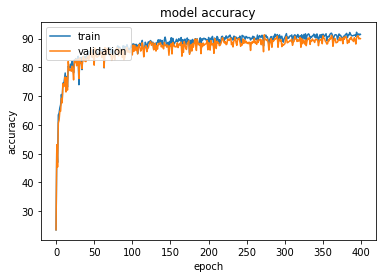

Maximum Train Accuracy : 92.22222900390625
Maximum Validation Accuracy : 91.33333587646484


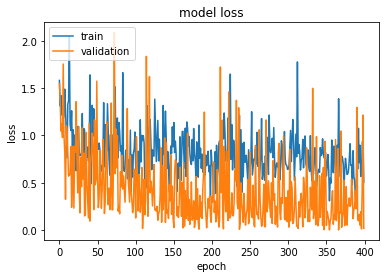

Minimum Train Loss : 0.30129221081733704
Minimum Validation Loss : 0.00013945491809863597


In [ ]:
Bacteria_model_phase_Adam_0001 = Bact_Net()
Bacteria_model_phase_Adam_0001.cuda()
trainer_Adam_phase_0001 = trainer(Bacteria_model_phase_Adam_0001, phase_train_loader,"Adam", epoch_size=400, learning_rate=0.001)
trainer_Adam_phase_0001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adam_phase_0001.history['train_acc'])
plt.plot(trainer_Adam_phase_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adam_phase_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adam_phase_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adam_phase_0001.history['train_loss'])
plt.plot(trainer_Adam_phase_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adam_phase_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adam_phase_0001.history['val_loss'])}")

# Adam_0.001_400epoch_L2reg

  0%|          | 0/400 [00:00<?, ?it/s]

Train Acc | Epoch 1/400 | ACC 20.138889


  0%|          | 1/400 [00:14<1:34:34, 14.22s/it]

Val Acc | Epoch 1/400 | ACC 19.444445
Train Acc | Epoch 2/400 | ACC 20.138889


  0%|          | 2/400 [00:28<1:33:25, 14.08s/it]

Val Acc | Epoch 2/400 | ACC 19.444445
Train Acc | Epoch 3/400 | ACC 19.666668


  1%|          | 3/400 [00:42<1:33:20, 14.11s/it]

Val Acc | Epoch 3/400 | ACC 21.333334
Train Acc | Epoch 4/400 | ACC 19.861111


  1%|          | 4/400 [00:56<1:33:03, 14.10s/it]

Val Acc | Epoch 4/400 | ACC 20.555555
Train Acc | Epoch 5/400 | ACC 20.305555


  1%|▏         | 5/400 [01:10<1:33:05, 14.14s/it]

Val Acc | Epoch 5/400 | ACC 18.777779
Train Acc | Epoch 6/400 | ACC 20.138889


  2%|▏         | 6/400 [01:24<1:33:13, 14.20s/it]

Val Acc | Epoch 6/400 | ACC 19.444445
Train Acc | Epoch 7/400 | ACC 19.861111


  2%|▏         | 7/400 [01:39<1:33:08, 14.22s/it]

Val Acc | Epoch 7/400 | ACC 20.555555
Train Acc | Epoch 8/400 | ACC 20.305555


  2%|▏         | 8/400 [01:53<1:32:28, 14.15s/it]

Val Acc | Epoch 8/400 | ACC 18.777779
Train Acc | Epoch 9/400 | ACC 19.666668


  2%|▏         | 9/400 [02:07<1:31:40, 14.07s/it]

Val Acc | Epoch 9/400 | ACC 21.333334
Train Acc | Epoch 10/400 | ACC 19.861111


  2%|▎         | 10/400 [02:20<1:30:46, 13.96s/it]

Val Acc | Epoch 10/400 | ACC 20.555555
Train Acc | Epoch 11/400 | ACC 20.305555


  3%|▎         | 11/400 [02:34<1:30:39, 13.98s/it]

Val Acc | Epoch 11/400 | ACC 18.777779
Train Acc | Epoch 12/400 | ACC 20.027777


  3%|▎         | 12/400 [02:48<1:29:40, 13.87s/it]

Val Acc | Epoch 12/400 | ACC 19.888889
Train Acc | Epoch 13/400 | ACC 20.305555


  3%|▎         | 13/400 [03:02<1:29:51, 13.93s/it]

Val Acc | Epoch 13/400 | ACC 18.777779
Train Acc | Epoch 14/400 | ACC 20.305555


  4%|▎         | 14/400 [03:16<1:29:54, 13.97s/it]

Val Acc | Epoch 14/400 | ACC 18.777779
Train Acc | Epoch 15/400 | ACC 20.138889


  4%|▍         | 15/400 [03:30<1:29:31, 13.95s/it]

Val Acc | Epoch 15/400 | ACC 19.444445
Train Acc | Epoch 16/400 | ACC 20.305555


  4%|▍         | 16/400 [03:44<1:29:22, 13.97s/it]

Val Acc | Epoch 16/400 | ACC 18.777779
Train Acc | Epoch 17/400 | ACC 20.305555


  4%|▍         | 17/400 [03:58<1:29:01, 13.95s/it]

Val Acc | Epoch 17/400 | ACC 18.777779
Train Acc | Epoch 18/400 | ACC 20.305555


  4%|▍         | 18/400 [04:12<1:29:11, 14.01s/it]

Val Acc | Epoch 18/400 | ACC 18.777779
Train Acc | Epoch 19/400 | ACC 20.138889


  5%|▍         | 19/400 [04:26<1:28:51, 13.99s/it]

Val Acc | Epoch 19/400 | ACC 19.444445
Train Acc | Epoch 20/400 | ACC 20.305555


  5%|▌         | 20/400 [04:40<1:28:33, 13.98s/it]

Val Acc | Epoch 20/400 | ACC 18.777779
Train Acc | Epoch 21/400 | ACC 19.861111


  5%|▌         | 21/400 [04:54<1:28:26, 14.00s/it]

Val Acc | Epoch 21/400 | ACC 20.555555
Train Acc | Epoch 22/400 | ACC 20.138889


  6%|▌         | 22/400 [05:09<1:30:03, 14.29s/it]

Val Acc | Epoch 22/400 | ACC 19.444445
Train Acc | Epoch 23/400 | ACC 20.138889


  6%|▌         | 23/400 [05:24<1:30:21, 14.38s/it]

Val Acc | Epoch 23/400 | ACC 19.444445
Train Acc | Epoch 24/400 | ACC 20.138889


  6%|▌         | 24/400 [05:37<1:29:10, 14.23s/it]

Val Acc | Epoch 24/400 | ACC 19.444445
Train Acc | Epoch 25/400 | ACC 20.305555


  6%|▋         | 25/400 [05:52<1:28:34, 14.17s/it]

Val Acc | Epoch 25/400 | ACC 18.777779
Train Acc | Epoch 26/400 | ACC 20.138889


  6%|▋         | 26/400 [06:06<1:28:08, 14.14s/it]

Val Acc | Epoch 26/400 | ACC 19.444445
Train Acc | Epoch 27/400 | ACC 20.138889


  7%|▋         | 27/400 [06:20<1:28:30, 14.24s/it]

Val Acc | Epoch 27/400 | ACC 19.444445
Train Acc | Epoch 28/400 | ACC 20.138889


  7%|▋         | 28/400 [06:34<1:27:56, 14.18s/it]

Val Acc | Epoch 28/400 | ACC 19.444445
Train Acc | Epoch 29/400 | ACC 20.138889


  7%|▋         | 29/400 [06:48<1:27:47, 14.20s/it]

Val Acc | Epoch 29/400 | ACC 19.444445
Train Acc | Epoch 30/400 | ACC 19.861111


  8%|▊         | 30/400 [07:02<1:27:14, 14.15s/it]

Val Acc | Epoch 30/400 | ACC 20.555555
Train Acc | Epoch 31/400 | ACC 19.861111


  8%|▊         | 31/400 [07:16<1:26:49, 14.12s/it]

Val Acc | Epoch 31/400 | ACC 20.555555
Train Acc | Epoch 32/400 | ACC 20.305555


  8%|▊         | 32/400 [07:31<1:26:44, 14.14s/it]

Val Acc | Epoch 32/400 | ACC 18.777779
Train Acc | Epoch 33/400 | ACC 20.305555


  8%|▊         | 33/400 [07:45<1:26:33, 14.15s/it]

Val Acc | Epoch 33/400 | ACC 18.777779
Train Acc | Epoch 34/400 | ACC 20.305555


  8%|▊         | 34/400 [07:59<1:26:32, 14.19s/it]

Val Acc | Epoch 34/400 | ACC 18.777779
Train Acc | Epoch 35/400 | ACC 19.666668


  9%|▉         | 35/400 [08:13<1:26:09, 14.16s/it]

Val Acc | Epoch 35/400 | ACC 21.333334
Train Acc | Epoch 36/400 | ACC 20.305555


  9%|▉         | 36/400 [08:27<1:26:00, 14.18s/it]

Val Acc | Epoch 36/400 | ACC 18.777779
Train Acc | Epoch 37/400 | ACC 20.027777


  9%|▉         | 37/400 [08:42<1:25:57, 14.21s/it]

Val Acc | Epoch 37/400 | ACC 19.888889
Train Acc | Epoch 38/400 | ACC 20.027777


 10%|▉         | 38/400 [08:56<1:25:59, 14.25s/it]

Val Acc | Epoch 38/400 | ACC 19.888889
Train Acc | Epoch 39/400 | ACC 20.027777


 10%|▉         | 39/400 [09:11<1:26:12, 14.33s/it]

Val Acc | Epoch 39/400 | ACC 19.888889
Train Acc | Epoch 40/400 | ACC 20.027777


 10%|█         | 40/400 [09:25<1:26:26, 14.41s/it]

Val Acc | Epoch 40/400 | ACC 19.888889
Train Acc | Epoch 41/400 | ACC 20.027777


 10%|█         | 41/400 [09:39<1:25:52, 14.35s/it]

Val Acc | Epoch 41/400 | ACC 19.888889
Train Acc | Epoch 42/400 | ACC 20.305555


 10%|█         | 42/400 [09:53<1:25:13, 14.28s/it]

Val Acc | Epoch 42/400 | ACC 18.777779
Train Acc | Epoch 43/400 | ACC 20.305555


 11%|█         | 43/400 [10:07<1:24:20, 14.18s/it]

Val Acc | Epoch 43/400 | ACC 18.777779
Train Acc | Epoch 44/400 | ACC 20.138889


 11%|█         | 44/400 [10:22<1:25:12, 14.36s/it]

Val Acc | Epoch 44/400 | ACC 19.444445
Train Acc | Epoch 45/400 | ACC 20.138889


 11%|█▏        | 45/400 [10:37<1:24:58, 14.36s/it]

Val Acc | Epoch 45/400 | ACC 19.444445
Train Acc | Epoch 46/400 | ACC 20.027777


 12%|█▏        | 46/400 [10:51<1:24:28, 14.32s/it]

Val Acc | Epoch 46/400 | ACC 19.888889
Train Acc | Epoch 47/400 | ACC 20.138889


 12%|█▏        | 47/400 [11:05<1:24:16, 14.32s/it]

Val Acc | Epoch 47/400 | ACC 19.444445
Train Acc | Epoch 48/400 | ACC 20.027777


 12%|█▏        | 48/400 [11:19<1:23:44, 14.27s/it]

Val Acc | Epoch 48/400 | ACC 19.888889
Train Acc | Epoch 49/400 | ACC 20.138889


 12%|█▏        | 49/400 [11:34<1:23:34, 14.29s/it]

Val Acc | Epoch 49/400 | ACC 19.444445
Train Acc | Epoch 50/400 | ACC 20.305555


 12%|█▎        | 50/400 [11:48<1:23:17, 14.28s/it]

Val Acc | Epoch 50/400 | ACC 18.777779
Train Acc | Epoch 51/400 | ACC 19.861111


 13%|█▎        | 51/400 [12:02<1:22:52, 14.25s/it]

Val Acc | Epoch 51/400 | ACC 20.555555
Train Acc | Epoch 52/400 | ACC 20.027777


 13%|█▎        | 52/400 [12:16<1:22:29, 14.22s/it]

Val Acc | Epoch 52/400 | ACC 19.888889
Train Acc | Epoch 53/400 | ACC 20.027777


 13%|█▎        | 53/400 [12:30<1:21:58, 14.18s/it]

Val Acc | Epoch 53/400 | ACC 19.888889
Train Acc | Epoch 54/400 | ACC 20.027777


 14%|█▎        | 54/400 [12:44<1:21:02, 14.05s/it]

Val Acc | Epoch 54/400 | ACC 19.888889
Train Acc | Epoch 55/400 | ACC 20.305555


 14%|█▍        | 55/400 [12:58<1:20:33, 14.01s/it]

Val Acc | Epoch 55/400 | ACC 18.777779
Train Acc | Epoch 56/400 | ACC 20.305555


 14%|█▍        | 56/400 [13:12<1:20:01, 13.96s/it]

Val Acc | Epoch 56/400 | ACC 18.777779
Train Acc | Epoch 57/400 | ACC 20.305555


 14%|█▍        | 57/400 [13:26<1:19:46, 13.95s/it]

Val Acc | Epoch 57/400 | ACC 18.777779
Train Acc | Epoch 58/400 | ACC 20.138889


 14%|█▍        | 58/400 [13:39<1:19:03, 13.87s/it]

Val Acc | Epoch 58/400 | ACC 19.444445
Train Acc | Epoch 59/400 | ACC 20.305555


 15%|█▍        | 59/400 [13:53<1:19:07, 13.92s/it]

Val Acc | Epoch 59/400 | ACC 18.777779
Train Acc | Epoch 60/400 | ACC 20.027777


 15%|█▌        | 60/400 [14:07<1:18:56, 13.93s/it]

Val Acc | Epoch 60/400 | ACC 19.888889
Train Acc | Epoch 61/400 | ACC 20.305555


 15%|█▌        | 61/400 [14:21<1:18:18, 13.86s/it]

Val Acc | Epoch 61/400 | ACC 18.777779
Train Acc | Epoch 62/400 | ACC 20.027777


 16%|█▌        | 62/400 [14:35<1:18:29, 13.93s/it]

Val Acc | Epoch 62/400 | ACC 19.888889
Train Acc | Epoch 63/400 | ACC 20.305555


 16%|█▌        | 63/400 [14:49<1:18:35, 13.99s/it]

Val Acc | Epoch 63/400 | ACC 18.777779
Train Acc | Epoch 64/400 | ACC 20.305555


 16%|█▌        | 64/400 [15:03<1:18:27, 14.01s/it]

Val Acc | Epoch 64/400 | ACC 18.777779
Train Acc | Epoch 65/400 | ACC 20.138889


 16%|█▋        | 65/400 [15:17<1:18:22, 14.04s/it]

Val Acc | Epoch 65/400 | ACC 19.444445
Train Acc | Epoch 66/400 | ACC 20.138889


 16%|█▋        | 66/400 [15:32<1:19:24, 14.26s/it]

Val Acc | Epoch 66/400 | ACC 19.444445
Train Acc | Epoch 67/400 | ACC 20.305555


 17%|█▋        | 67/400 [15:46<1:18:43, 14.18s/it]

Val Acc | Epoch 67/400 | ACC 18.777779
Train Acc | Epoch 68/400 | ACC 20.138889


 17%|█▋        | 68/400 [16:01<1:18:42, 14.23s/it]

Val Acc | Epoch 68/400 | ACC 19.444445
Train Acc | Epoch 69/400 | ACC 20.138889


 17%|█▋        | 69/400 [16:15<1:18:24, 14.21s/it]

Val Acc | Epoch 69/400 | ACC 19.444445
Train Acc | Epoch 70/400 | ACC 20.305555


 18%|█▊        | 70/400 [16:29<1:18:03, 14.19s/it]

Val Acc | Epoch 70/400 | ACC 18.777779
Train Acc | Epoch 71/400 | ACC 19.861111


 18%|█▊        | 71/400 [16:43<1:17:53, 14.21s/it]

Val Acc | Epoch 71/400 | ACC 20.555555
Train Acc | Epoch 72/400 | ACC 20.027777


 18%|█▊        | 72/400 [16:57<1:17:25, 14.16s/it]

Val Acc | Epoch 72/400 | ACC 19.888889
Train Acc | Epoch 73/400 | ACC 19.861111


 18%|█▊        | 73/400 [17:11<1:17:06, 14.15s/it]

Val Acc | Epoch 73/400 | ACC 20.555555
Train Acc | Epoch 74/400 | ACC 20.027777


 18%|█▊        | 74/400 [17:25<1:16:45, 14.13s/it]

Val Acc | Epoch 74/400 | ACC 19.888889
Train Acc | Epoch 75/400 | ACC 20.027777


 19%|█▉        | 75/400 [17:39<1:16:16, 14.08s/it]

Val Acc | Epoch 75/400 | ACC 19.888889
Train Acc | Epoch 76/400 | ACC 20.305555


 19%|█▉        | 76/400 [17:53<1:16:04, 14.09s/it]

Val Acc | Epoch 76/400 | ACC 18.777779
Train Acc | Epoch 77/400 | ACC 20.305555


 19%|█▉        | 77/400 [18:07<1:15:37, 14.05s/it]

Val Acc | Epoch 77/400 | ACC 18.777779
Train Acc | Epoch 78/400 | ACC 20.305555


 20%|█▉        | 78/400 [18:21<1:15:12, 14.01s/it]

Val Acc | Epoch 78/400 | ACC 18.777779
Train Acc | Epoch 79/400 | ACC 20.305555


 20%|█▉        | 79/400 [18:35<1:14:36, 13.95s/it]

Val Acc | Epoch 79/400 | ACC 18.777779
Train Acc | Epoch 80/400 | ACC 20.305555


 20%|██        | 80/400 [18:49<1:14:14, 13.92s/it]

Val Acc | Epoch 80/400 | ACC 18.777779
Train Acc | Epoch 81/400 | ACC 20.305555


 20%|██        | 81/400 [19:03<1:13:55, 13.91s/it]

Val Acc | Epoch 81/400 | ACC 18.777779
Train Acc | Epoch 82/400 | ACC 20.027777


 20%|██        | 82/400 [19:17<1:14:04, 13.98s/it]

Val Acc | Epoch 82/400 | ACC 19.888889
Train Acc | Epoch 83/400 | ACC 20.027777


 21%|██        | 83/400 [19:31<1:14:12, 14.04s/it]

Val Acc | Epoch 83/400 | ACC 19.888889
Train Acc | Epoch 84/400 | ACC 20.138889


 21%|██        | 84/400 [19:45<1:14:05, 14.07s/it]

Val Acc | Epoch 84/400 | ACC 19.444445
Train Acc | Epoch 85/400 | ACC 20.138889


 21%|██▏       | 85/400 [19:59<1:13:44, 14.05s/it]

Val Acc | Epoch 85/400 | ACC 19.444445
Train Acc | Epoch 86/400 | ACC 20.305555


 22%|██▏       | 86/400 [20:13<1:13:30, 14.05s/it]

Val Acc | Epoch 86/400 | ACC 18.777779
Train Acc | Epoch 87/400 | ACC 20.305555


 22%|██▏       | 87/400 [20:28<1:13:39, 14.12s/it]

Val Acc | Epoch 87/400 | ACC 18.777779
Train Acc | Epoch 88/400 | ACC 20.305555


 22%|██▏       | 88/400 [20:42<1:14:18, 14.29s/it]

Val Acc | Epoch 88/400 | ACC 18.777779
Train Acc | Epoch 89/400 | ACC 20.305555


 22%|██▏       | 89/400 [20:57<1:14:17, 14.33s/it]

Val Acc | Epoch 89/400 | ACC 18.777779
Train Acc | Epoch 90/400 | ACC 20.305555


 22%|██▎       | 90/400 [21:11<1:13:37, 14.25s/it]

Val Acc | Epoch 90/400 | ACC 18.777779
Train Acc | Epoch 91/400 | ACC 20.138889


 23%|██▎       | 91/400 [21:25<1:13:16, 14.23s/it]

Val Acc | Epoch 91/400 | ACC 19.444445
Train Acc | Epoch 92/400 | ACC 20.305555


 23%|██▎       | 92/400 [21:39<1:12:59, 14.22s/it]

Val Acc | Epoch 92/400 | ACC 18.777779
Train Acc | Epoch 93/400 | ACC 20.305555


 23%|██▎       | 93/400 [21:53<1:12:04, 14.09s/it]

Val Acc | Epoch 93/400 | ACC 18.777779
Train Acc | Epoch 94/400 | ACC 20.027777


 24%|██▎       | 94/400 [22:07<1:11:56, 14.11s/it]

Val Acc | Epoch 94/400 | ACC 19.888889
Train Acc | Epoch 95/400 | ACC 20.027777


 24%|██▍       | 95/400 [22:21<1:11:43, 14.11s/it]

Val Acc | Epoch 95/400 | ACC 19.888889
Train Acc | Epoch 96/400 | ACC 20.305555


 24%|██▍       | 96/400 [22:36<1:11:44, 14.16s/it]

Val Acc | Epoch 96/400 | ACC 18.777779
Train Acc | Epoch 97/400 | ACC 20.138889


 24%|██▍       | 97/400 [22:50<1:11:30, 14.16s/it]

Val Acc | Epoch 97/400 | ACC 19.444445
Train Acc | Epoch 98/400 | ACC 20.305555


 24%|██▍       | 98/400 [23:04<1:10:58, 14.10s/it]

Val Acc | Epoch 98/400 | ACC 18.777779
Train Acc | Epoch 99/400 | ACC 20.305555


 25%|██▍       | 99/400 [23:18<1:10:27, 14.05s/it]

Val Acc | Epoch 99/400 | ACC 18.777779
Train Acc | Epoch 100/400 | ACC 20.305555


 25%|██▌       | 100/400 [23:32<1:10:10, 14.03s/it]

Val Acc | Epoch 100/400 | ACC 18.777779
Train Acc | Epoch 101/400 | ACC 19.666668


 25%|██▌       | 101/400 [23:45<1:09:43, 13.99s/it]

Val Acc | Epoch 101/400 | ACC 21.333334
Train Acc | Epoch 102/400 | ACC 19.666668


 26%|██▌       | 102/400 [24:00<1:09:45, 14.05s/it]

Val Acc | Epoch 102/400 | ACC 21.333334
Train Acc | Epoch 103/400 | ACC 20.305555


 26%|██▌       | 103/400 [24:14<1:09:55, 14.13s/it]

Val Acc | Epoch 103/400 | ACC 18.777779
Train Acc | Epoch 104/400 | ACC 20.305555


 26%|██▌       | 104/400 [24:28<1:10:15, 14.24s/it]

Val Acc | Epoch 104/400 | ACC 18.777779
Train Acc | Epoch 105/400 | ACC 20.305555


 26%|██▋       | 105/400 [24:42<1:09:37, 14.16s/it]

Val Acc | Epoch 105/400 | ACC 18.777779
Train Acc | Epoch 106/400 | ACC 19.861111


 26%|██▋       | 106/400 [24:57<1:09:34, 14.20s/it]

Val Acc | Epoch 106/400 | ACC 20.555555
Train Acc | Epoch 107/400 | ACC 20.138889


 27%|██▋       | 107/400 [25:11<1:09:03, 14.14s/it]

Val Acc | Epoch 107/400 | ACC 19.444445
Train Acc | Epoch 108/400 | ACC 19.861111


 27%|██▋       | 108/400 [25:25<1:09:21, 14.25s/it]

Val Acc | Epoch 108/400 | ACC 20.555555
Train Acc | Epoch 109/400 | ACC 20.138889


 27%|██▋       | 109/400 [25:39<1:09:00, 14.23s/it]

Val Acc | Epoch 109/400 | ACC 19.444445
Train Acc | Epoch 110/400 | ACC 20.305555


 28%|██▊       | 110/400 [25:54<1:09:35, 14.40s/it]

Val Acc | Epoch 110/400 | ACC 18.777779
Train Acc | Epoch 111/400 | ACC 20.305555


 28%|██▊       | 111/400 [26:09<1:09:19, 14.39s/it]

Val Acc | Epoch 111/400 | ACC 18.777779
Train Acc | Epoch 112/400 | ACC 20.305555


 28%|██▊       | 112/400 [26:23<1:08:33, 14.28s/it]

Val Acc | Epoch 112/400 | ACC 18.777779
Train Acc | Epoch 113/400 | ACC 20.305555


 28%|██▊       | 113/400 [26:37<1:08:04, 14.23s/it]

Val Acc | Epoch 113/400 | ACC 18.777779
Train Acc | Epoch 114/400 | ACC 20.305555


 28%|██▊       | 114/400 [26:50<1:07:05, 14.07s/it]

Val Acc | Epoch 114/400 | ACC 18.777779
Train Acc | Epoch 115/400 | ACC 20.138889


 29%|██▉       | 115/400 [27:05<1:06:50, 14.07s/it]

Val Acc | Epoch 115/400 | ACC 19.444445
Train Acc | Epoch 116/400 | ACC 20.305555


 29%|██▉       | 116/400 [27:19<1:06:47, 14.11s/it]

Val Acc | Epoch 116/400 | ACC 18.777779
Train Acc | Epoch 117/400 | ACC 20.138889


 29%|██▉       | 117/400 [27:33<1:06:26, 14.09s/it]

Val Acc | Epoch 117/400 | ACC 19.444445
Train Acc | Epoch 118/400 | ACC 20.027777


 30%|██▉       | 118/400 [27:47<1:06:12, 14.09s/it]

Val Acc | Epoch 118/400 | ACC 19.888889
Train Acc | Epoch 119/400 | ACC 20.027777


 30%|██▉       | 119/400 [28:01<1:05:30, 13.99s/it]

Val Acc | Epoch 119/400 | ACC 19.888889
Train Acc | Epoch 120/400 | ACC 20.138889


 30%|███       | 120/400 [28:15<1:05:25, 14.02s/it]

Val Acc | Epoch 120/400 | ACC 19.444445
Train Acc | Epoch 121/400 | ACC 20.027777


 30%|███       | 121/400 [28:29<1:05:07, 14.00s/it]

Val Acc | Epoch 121/400 | ACC 19.888889
Train Acc | Epoch 122/400 | ACC 19.666668


 30%|███       | 122/400 [28:43<1:04:42, 13.97s/it]

Val Acc | Epoch 122/400 | ACC 21.333334
Train Acc | Epoch 123/400 | ACC 20.027777


 31%|███       | 123/400 [28:56<1:04:26, 13.96s/it]

Val Acc | Epoch 123/400 | ACC 19.888889
Train Acc | Epoch 124/400 | ACC 20.027777


 31%|███       | 124/400 [29:10<1:04:02, 13.92s/it]

Val Acc | Epoch 124/400 | ACC 19.888889
Train Acc | Epoch 125/400 | ACC 20.027777


 31%|███▏      | 125/400 [29:24<1:04:02, 13.97s/it]

Val Acc | Epoch 125/400 | ACC 19.888889
Train Acc | Epoch 126/400 | ACC 20.027777


 32%|███▏      | 126/400 [29:38<1:03:36, 13.93s/it]

Val Acc | Epoch 126/400 | ACC 19.888889
Train Acc | Epoch 127/400 | ACC 20.138889


 32%|███▏      | 127/400 [29:52<1:03:12, 13.89s/it]

Val Acc | Epoch 127/400 | ACC 19.444445
Train Acc | Epoch 128/400 | ACC 19.861111


 32%|███▏      | 128/400 [30:06<1:03:05, 13.92s/it]

Val Acc | Epoch 128/400 | ACC 20.555555
Train Acc | Epoch 129/400 | ACC 19.861111


 32%|███▏      | 129/400 [30:20<1:02:41, 13.88s/it]

Val Acc | Epoch 129/400 | ACC 20.555555
Train Acc | Epoch 130/400 | ACC 20.138889


 32%|███▎      | 130/400 [30:34<1:02:51, 13.97s/it]

Val Acc | Epoch 130/400 | ACC 19.444445
Train Acc | Epoch 131/400 | ACC 20.138889


 33%|███▎      | 131/400 [30:48<1:02:41, 13.98s/it]

Val Acc | Epoch 131/400 | ACC 19.444445
Train Acc | Epoch 132/400 | ACC 20.305555


 33%|███▎      | 132/400 [31:03<1:03:43, 14.27s/it]

Val Acc | Epoch 132/400 | ACC 18.777779
Train Acc | Epoch 133/400 | ACC 20.027777


 33%|███▎      | 133/400 [31:17<1:03:32, 14.28s/it]

Val Acc | Epoch 133/400 | ACC 19.888889
Train Acc | Epoch 134/400 | ACC 20.027777


 34%|███▎      | 134/400 [31:32<1:03:29, 14.32s/it]

Val Acc | Epoch 134/400 | ACC 19.888889
Train Acc | Epoch 135/400 | ACC 20.027777


 34%|███▍      | 135/400 [31:46<1:02:42, 14.20s/it]

Val Acc | Epoch 135/400 | ACC 19.888889
Train Acc | Epoch 136/400 | ACC 20.027777


 34%|███▍      | 136/400 [32:00<1:02:12, 14.14s/it]

Val Acc | Epoch 136/400 | ACC 19.888889
Train Acc | Epoch 137/400 | ACC 20.305555


 34%|███▍      | 137/400 [32:14<1:01:46, 14.09s/it]

Val Acc | Epoch 137/400 | ACC 18.777779
Train Acc | Epoch 138/400 | ACC 20.305555


 34%|███▍      | 138/400 [32:28<1:01:23, 14.06s/it]

Val Acc | Epoch 138/400 | ACC 18.777779
Train Acc | Epoch 139/400 | ACC 20.305555


 35%|███▍      | 139/400 [32:42<1:01:06, 14.05s/it]

Val Acc | Epoch 139/400 | ACC 18.777779
Train Acc | Epoch 140/400 | ACC 20.138889


 35%|███▌      | 140/400 [32:55<1:00:33, 13.98s/it]

Val Acc | Epoch 140/400 | ACC 19.444445
Train Acc | Epoch 141/400 | ACC 20.305555


 35%|███▌      | 141/400 [33:09<1:00:07, 13.93s/it]

Val Acc | Epoch 141/400 | ACC 18.777779
Train Acc | Epoch 142/400 | ACC 20.138889


 36%|███▌      | 142/400 [33:23<1:00:03, 13.97s/it]

Val Acc | Epoch 142/400 | ACC 19.444445
Train Acc | Epoch 143/400 | ACC 20.305555


 36%|███▌      | 143/400 [33:37<59:52, 13.98s/it]  

Val Acc | Epoch 143/400 | ACC 18.777779
Train Acc | Epoch 144/400 | ACC 20.305555


 36%|███▌      | 144/400 [33:51<59:42, 14.00s/it]

Val Acc | Epoch 144/400 | ACC 18.777779
Train Acc | Epoch 145/400 | ACC 20.305555


 36%|███▋      | 145/400 [34:05<59:08, 13.92s/it]

Val Acc | Epoch 145/400 | ACC 18.777779
Train Acc | Epoch 146/400 | ACC 20.138889


 36%|███▋      | 146/400 [34:19<58:47, 13.89s/it]

Val Acc | Epoch 146/400 | ACC 19.444445
Train Acc | Epoch 147/400 | ACC 20.305555


 37%|███▋      | 147/400 [34:33<58:32, 13.88s/it]

Val Acc | Epoch 147/400 | ACC 18.777779
Train Acc | Epoch 148/400 | ACC 19.666668


 37%|███▋      | 148/400 [34:47<58:23, 13.90s/it]

Val Acc | Epoch 148/400 | ACC 21.333334
Train Acc | Epoch 149/400 | ACC 19.666668


 37%|███▋      | 149/400 [35:01<58:22, 13.95s/it]

Val Acc | Epoch 149/400 | ACC 21.333334
Train Acc | Epoch 150/400 | ACC 19.666668


 38%|███▊      | 150/400 [35:15<58:31, 14.05s/it]

Val Acc | Epoch 150/400 | ACC 21.333334
Train Acc | Epoch 151/400 | ACC 20.027777


 38%|███▊      | 151/400 [35:29<58:36, 14.12s/it]

Val Acc | Epoch 151/400 | ACC 19.888889
Train Acc | Epoch 152/400 | ACC 20.138889


 38%|███▊      | 152/400 [35:43<58:21, 14.12s/it]

Val Acc | Epoch 152/400 | ACC 19.444445
Train Acc | Epoch 153/400 | ACC 20.305555


 38%|███▊      | 153/400 [35:58<58:20, 14.17s/it]

Val Acc | Epoch 153/400 | ACC 18.777779
Train Acc | Epoch 154/400 | ACC 20.138889


 38%|███▊      | 154/400 [36:13<59:18, 14.47s/it]

Val Acc | Epoch 154/400 | ACC 19.444445
Train Acc | Epoch 155/400 | ACC 19.861111


 39%|███▉      | 155/400 [36:27<58:59, 14.45s/it]

Val Acc | Epoch 155/400 | ACC 20.555555
Train Acc | Epoch 156/400 | ACC 20.138889


 39%|███▉      | 156/400 [36:41<58:17, 14.33s/it]

Val Acc | Epoch 156/400 | ACC 19.444445
Train Acc | Epoch 157/400 | ACC 20.305555


 39%|███▉      | 157/400 [36:55<57:35, 14.22s/it]

Val Acc | Epoch 157/400 | ACC 18.777779
Train Acc | Epoch 158/400 | ACC 20.305555


 40%|███▉      | 158/400 [37:09<57:22, 14.22s/it]

Val Acc | Epoch 158/400 | ACC 18.777779
Train Acc | Epoch 159/400 | ACC 20.027777


 40%|███▉      | 159/400 [37:24<57:27, 14.31s/it]

Val Acc | Epoch 159/400 | ACC 19.888889
Train Acc | Epoch 160/400 | ACC 20.027777


 40%|████      | 160/400 [37:38<57:13, 14.31s/it]

Val Acc | Epoch 160/400 | ACC 19.888889
Train Acc | Epoch 161/400 | ACC 20.138889


 40%|████      | 161/400 [37:53<57:18, 14.39s/it]

Val Acc | Epoch 161/400 | ACC 19.444445
Train Acc | Epoch 162/400 | ACC 20.138889


 40%|████      | 162/400 [38:07<56:56, 14.36s/it]

Val Acc | Epoch 162/400 | ACC 19.444445
Train Acc | Epoch 163/400 | ACC 19.861111


 41%|████      | 163/400 [38:21<56:33, 14.32s/it]

Val Acc | Epoch 163/400 | ACC 20.555555
Train Acc | Epoch 164/400 | ACC 20.138889


 41%|████      | 164/400 [38:35<55:58, 14.23s/it]

Val Acc | Epoch 164/400 | ACC 19.444445
Train Acc | Epoch 165/400 | ACC 19.861111


 41%|████▏     | 165/400 [38:50<55:38, 14.21s/it]

Val Acc | Epoch 165/400 | ACC 20.555555
Train Acc | Epoch 166/400 | ACC 19.861111


 42%|████▏     | 166/400 [39:04<55:08, 14.14s/it]

Val Acc | Epoch 166/400 | ACC 20.555555
Train Acc | Epoch 167/400 | ACC 20.027777


 42%|████▏     | 167/400 [39:18<55:20, 14.25s/it]

Val Acc | Epoch 167/400 | ACC 19.888889
Train Acc | Epoch 168/400 | ACC 20.027777


 42%|████▏     | 168/400 [39:32<54:47, 14.17s/it]

Val Acc | Epoch 168/400 | ACC 19.888889
Train Acc | Epoch 169/400 | ACC 20.138889


 42%|████▏     | 169/400 [39:46<54:41, 14.21s/it]

Val Acc | Epoch 169/400 | ACC 19.444445
Train Acc | Epoch 170/400 | ACC 20.138889


 42%|████▎     | 170/400 [40:00<54:23, 14.19s/it]

Val Acc | Epoch 170/400 | ACC 19.444445
Train Acc | Epoch 171/400 | ACC 20.138889


 43%|████▎     | 171/400 [40:15<53:58, 14.14s/it]

Val Acc | Epoch 171/400 | ACC 19.444445
Train Acc | Epoch 172/400 | ACC 20.305555


 43%|████▎     | 172/400 [40:29<53:49, 14.17s/it]

Val Acc | Epoch 172/400 | ACC 18.777779
Train Acc | Epoch 173/400 | ACC 20.138889


 43%|████▎     | 173/400 [40:43<54:05, 14.30s/it]

Val Acc | Epoch 173/400 | ACC 19.444445
Train Acc | Epoch 174/400 | ACC 20.305555


 44%|████▎     | 174/400 [40:58<53:53, 14.31s/it]

Val Acc | Epoch 174/400 | ACC 18.777779
Train Acc | Epoch 175/400 | ACC 19.666668


 44%|████▍     | 175/400 [41:12<53:30, 14.27s/it]

Val Acc | Epoch 175/400 | ACC 21.333334
Train Acc | Epoch 176/400 | ACC 19.666668


 44%|████▍     | 176/400 [41:27<53:59, 14.46s/it]

Val Acc | Epoch 176/400 | ACC 21.333334
Train Acc | Epoch 177/400 | ACC 20.138889


 44%|████▍     | 177/400 [41:41<53:27, 14.38s/it]

Val Acc | Epoch 177/400 | ACC 19.444445
Train Acc | Epoch 178/400 | ACC 20.138889


 44%|████▍     | 178/400 [41:55<52:43, 14.25s/it]

Val Acc | Epoch 178/400 | ACC 19.444445
Train Acc | Epoch 179/400 | ACC 20.027777


 45%|████▍     | 179/400 [42:09<52:27, 14.24s/it]

Val Acc | Epoch 179/400 | ACC 19.888889
Train Acc | Epoch 180/400 | ACC 20.138889


 45%|████▌     | 180/400 [42:23<51:49, 14.14s/it]

Val Acc | Epoch 180/400 | ACC 19.444445
Train Acc | Epoch 181/400 | ACC 20.138889


 45%|████▌     | 181/400 [42:37<51:13, 14.03s/it]

Val Acc | Epoch 181/400 | ACC 19.444445
Train Acc | Epoch 182/400 | ACC 20.305555


 46%|████▌     | 182/400 [42:51<50:49, 13.99s/it]

Val Acc | Epoch 182/400 | ACC 18.777779
Train Acc | Epoch 183/400 | ACC 20.305555


 46%|████▌     | 183/400 [43:04<50:23, 13.93s/it]

Val Acc | Epoch 183/400 | ACC 18.777779
Train Acc | Epoch 184/400 | ACC 20.305555


 46%|████▌     | 184/400 [43:18<50:00, 13.89s/it]

Val Acc | Epoch 184/400 | ACC 18.777779
Train Acc | Epoch 185/400 | ACC 20.027777


 46%|████▋     | 185/400 [43:32<50:02, 13.96s/it]

Val Acc | Epoch 185/400 | ACC 19.888889
Train Acc | Epoch 186/400 | ACC 20.027777


 46%|████▋     | 186/400 [43:46<49:31, 13.89s/it]

Val Acc | Epoch 186/400 | ACC 19.888889
Train Acc | Epoch 187/400 | ACC 20.305555


 47%|████▋     | 187/400 [44:00<49:11, 13.86s/it]

Val Acc | Epoch 187/400 | ACC 18.777779
Train Acc | Epoch 188/400 | ACC 20.027777


 47%|████▋     | 188/400 [44:14<48:56, 13.85s/it]

Val Acc | Epoch 188/400 | ACC 19.888889
Train Acc | Epoch 189/400 | ACC 20.138889


 47%|████▋     | 189/400 [44:28<48:48, 13.88s/it]

Val Acc | Epoch 189/400 | ACC 19.444445
Train Acc | Epoch 190/400 | ACC 20.027777


 48%|████▊     | 190/400 [44:42<48:52, 13.96s/it]

Val Acc | Epoch 190/400 | ACC 19.888889
Train Acc | Epoch 191/400 | ACC 20.305555


 48%|████▊     | 191/400 [44:56<48:46, 14.00s/it]

Val Acc | Epoch 191/400 | ACC 18.777779
Train Acc | Epoch 192/400 | ACC 20.305555


 48%|████▊     | 192/400 [45:10<48:27, 13.98s/it]

Val Acc | Epoch 192/400 | ACC 18.777779
Train Acc | Epoch 193/400 | ACC 20.305555


 48%|████▊     | 193/400 [45:24<48:05, 13.94s/it]

Val Acc | Epoch 193/400 | ACC 18.777779
Train Acc | Epoch 194/400 | ACC 20.305555


 48%|████▊     | 194/400 [45:38<48:08, 14.02s/it]

Val Acc | Epoch 194/400 | ACC 18.777779
Train Acc | Epoch 195/400 | ACC 20.305555


 49%|████▉     | 195/400 [45:52<47:43, 13.97s/it]

Val Acc | Epoch 195/400 | ACC 18.777779
Train Acc | Epoch 196/400 | ACC 20.027777


 49%|████▉     | 196/400 [46:06<47:35, 14.00s/it]

Val Acc | Epoch 196/400 | ACC 19.888889
Train Acc | Epoch 197/400 | ACC 20.305555


 49%|████▉     | 197/400 [46:20<47:21, 14.00s/it]

Val Acc | Epoch 197/400 | ACC 18.777779
Train Acc | Epoch 198/400 | ACC 20.138889


 50%|████▉     | 198/400 [46:35<47:51, 14.21s/it]

Val Acc | Epoch 198/400 | ACC 19.444445
Train Acc | Epoch 199/400 | ACC 20.138889


 50%|████▉     | 199/400 [46:49<47:29, 14.18s/it]

Val Acc | Epoch 199/400 | ACC 19.444445
Train Acc | Epoch 200/400 | ACC 20.305555


 50%|█████     | 200/400 [47:03<47:12, 14.16s/it]

Val Acc | Epoch 200/400 | ACC 18.777779
Train Acc | Epoch 201/400 | ACC 20.305555


 50%|█████     | 201/400 [47:17<46:37, 14.06s/it]

Val Acc | Epoch 201/400 | ACC 18.777779
Train Acc | Epoch 202/400 | ACC 20.305555


 50%|█████     | 202/400 [47:31<46:18, 14.03s/it]

Val Acc | Epoch 202/400 | ACC 18.777779
Train Acc | Epoch 203/400 | ACC 20.305555


 51%|█████     | 203/400 [47:45<46:09, 14.06s/it]

Val Acc | Epoch 203/400 | ACC 18.777779
Train Acc | Epoch 204/400 | ACC 19.666668


 51%|█████     | 204/400 [47:59<46:20, 14.19s/it]

Val Acc | Epoch 204/400 | ACC 21.333334
Train Acc | Epoch 205/400 | ACC 20.305555


 51%|█████▏    | 205/400 [48:13<46:10, 14.21s/it]

Val Acc | Epoch 205/400 | ACC 18.777779
Train Acc | Epoch 206/400 | ACC 20.305555


 52%|█████▏    | 206/400 [48:28<46:06, 14.26s/it]

Val Acc | Epoch 206/400 | ACC 18.777779
Train Acc | Epoch 207/400 | ACC 20.138889


 52%|█████▏    | 207/400 [48:42<45:50, 14.25s/it]

Val Acc | Epoch 207/400 | ACC 19.444445
Train Acc | Epoch 208/400 | ACC 19.861111


 52%|█████▏    | 208/400 [48:56<45:34, 14.24s/it]

Val Acc | Epoch 208/400 | ACC 20.555555
Train Acc | Epoch 209/400 | ACC 19.861111


 52%|█████▏    | 209/400 [49:11<45:29, 14.29s/it]

Val Acc | Epoch 209/400 | ACC 20.555555
Train Acc | Epoch 210/400 | ACC 20.138889


 52%|█████▎    | 210/400 [49:25<45:11, 14.27s/it]

Val Acc | Epoch 210/400 | ACC 19.444445
Train Acc | Epoch 211/400 | ACC 20.138889


 53%|█████▎    | 211/400 [49:39<45:08, 14.33s/it]

Val Acc | Epoch 211/400 | ACC 19.444445
Train Acc | Epoch 212/400 | ACC 20.138889


 53%|█████▎    | 212/400 [49:54<44:59, 14.36s/it]

Val Acc | Epoch 212/400 | ACC 19.444445
Train Acc | Epoch 213/400 | ACC 20.138889


 53%|█████▎    | 213/400 [50:08<44:39, 14.33s/it]

Val Acc | Epoch 213/400 | ACC 19.444445
Train Acc | Epoch 214/400 | ACC 20.305555


 54%|█████▎    | 214/400 [50:23<44:38, 14.40s/it]

Val Acc | Epoch 214/400 | ACC 18.777779
Train Acc | Epoch 215/400 | ACC 20.138889


 54%|█████▍    | 215/400 [50:37<44:18, 14.37s/it]

Val Acc | Epoch 215/400 | ACC 19.444445
Train Acc | Epoch 216/400 | ACC 20.138889


 54%|█████▍    | 216/400 [50:52<44:19, 14.45s/it]

Val Acc | Epoch 216/400 | ACC 19.444445
Train Acc | Epoch 217/400 | ACC 20.138889


 54%|█████▍    | 217/400 [51:06<43:58, 14.42s/it]

Val Acc | Epoch 217/400 | ACC 19.444445
Train Acc | Epoch 218/400 | ACC 20.138889


 55%|█████▍    | 218/400 [51:20<43:40, 14.40s/it]

Val Acc | Epoch 218/400 | ACC 19.444445
Train Acc | Epoch 219/400 | ACC 20.305555


 55%|█████▍    | 219/400 [51:34<43:10, 14.31s/it]

Val Acc | Epoch 219/400 | ACC 18.777779
Train Acc | Epoch 220/400 | ACC 20.305555


 55%|█████▌    | 220/400 [51:49<43:35, 14.53s/it]

Val Acc | Epoch 220/400 | ACC 18.777779
Train Acc | Epoch 221/400 | ACC 20.305555


 55%|█████▌    | 221/400 [52:03<42:53, 14.38s/it]

Val Acc | Epoch 221/400 | ACC 18.777779
Train Acc | Epoch 222/400 | ACC 19.666668


 56%|█████▌    | 222/400 [52:17<42:14, 14.24s/it]

Val Acc | Epoch 222/400 | ACC 21.333334
Train Acc | Epoch 223/400 | ACC 19.861111


 56%|█████▌    | 223/400 [52:31<41:38, 14.11s/it]

Val Acc | Epoch 223/400 | ACC 20.555555
Train Acc | Epoch 224/400 | ACC 20.305555


 56%|█████▌    | 224/400 [52:45<41:14, 14.06s/it]

Val Acc | Epoch 224/400 | ACC 18.777779
Train Acc | Epoch 225/400 | ACC 20.305555


 56%|█████▋    | 225/400 [52:59<40:57, 14.04s/it]

Val Acc | Epoch 225/400 | ACC 18.777779
Train Acc | Epoch 226/400 | ACC 19.666668


 56%|█████▋    | 226/400 [53:13<40:49, 14.08s/it]

Val Acc | Epoch 226/400 | ACC 21.333334
Train Acc | Epoch 227/400 | ACC 19.666668


 57%|█████▋    | 227/400 [53:27<40:35, 14.08s/it]

Val Acc | Epoch 227/400 | ACC 21.333334
Train Acc | Epoch 228/400 | ACC 20.027777


 57%|█████▋    | 228/400 [53:41<40:15, 14.05s/it]

Val Acc | Epoch 228/400 | ACC 19.888889
Train Acc | Epoch 229/400 | ACC 19.666668


 57%|█████▋    | 229/400 [53:55<40:00, 14.04s/it]

Val Acc | Epoch 229/400 | ACC 21.333334
Train Acc | Epoch 230/400 | ACC 20.305555


 57%|█████▊    | 230/400 [54:10<39:59, 14.12s/it]

Val Acc | Epoch 230/400 | ACC 18.777779
Train Acc | Epoch 231/400 | ACC 20.305555


 58%|█████▊    | 231/400 [54:24<39:46, 14.12s/it]

Val Acc | Epoch 231/400 | ACC 18.777779
Train Acc | Epoch 232/400 | ACC 20.305555


 58%|█████▊    | 232/400 [54:38<39:51, 14.24s/it]

Val Acc | Epoch 232/400 | ACC 18.777779
Train Acc | Epoch 233/400 | ACC 20.138889


 58%|█████▊    | 233/400 [54:53<39:47, 14.30s/it]

Val Acc | Epoch 233/400 | ACC 19.444445
Train Acc | Epoch 234/400 | ACC 20.027777


 58%|█████▊    | 234/400 [55:07<39:35, 14.31s/it]

Val Acc | Epoch 234/400 | ACC 19.888889
Train Acc | Epoch 235/400 | ACC 20.138889


 59%|█████▉    | 235/400 [55:21<39:17, 14.29s/it]

Val Acc | Epoch 235/400 | ACC 19.444445
Train Acc | Epoch 236/400 | ACC 20.138889


 59%|█████▉    | 236/400 [55:35<38:54, 14.23s/it]

Val Acc | Epoch 236/400 | ACC 19.444445
Train Acc | Epoch 237/400 | ACC 20.138889


 59%|█████▉    | 237/400 [55:50<38:48, 14.29s/it]

Val Acc | Epoch 237/400 | ACC 19.444445
Train Acc | Epoch 238/400 | ACC 20.027777


 60%|█████▉    | 238/400 [56:04<38:32, 14.27s/it]

Val Acc | Epoch 238/400 | ACC 19.888889
Train Acc | Epoch 239/400 | ACC 20.138889


 60%|█████▉    | 239/400 [56:18<38:21, 14.30s/it]

Val Acc | Epoch 239/400 | ACC 19.444445
Train Acc | Epoch 240/400 | ACC 20.138889


 60%|██████    | 240/400 [56:33<38:17, 14.36s/it]

Val Acc | Epoch 240/400 | ACC 19.444445
Train Acc | Epoch 241/400 | ACC 20.138889


 60%|██████    | 241/400 [56:48<38:17, 14.45s/it]

Val Acc | Epoch 241/400 | ACC 19.444445
Train Acc | Epoch 242/400 | ACC 20.305555


 60%|██████    | 242/400 [57:02<38:15, 14.53s/it]

Val Acc | Epoch 242/400 | ACC 18.777779
Train Acc | Epoch 243/400 | ACC 20.305555


 61%|██████    | 243/400 [57:17<38:02, 14.54s/it]

Val Acc | Epoch 243/400 | ACC 18.777779
Train Acc | Epoch 244/400 | ACC 19.666668


 61%|██████    | 244/400 [57:31<37:39, 14.48s/it]

Val Acc | Epoch 244/400 | ACC 21.333334
Train Acc | Epoch 245/400 | ACC 19.666668


 61%|██████▏   | 245/400 [57:46<37:24, 14.48s/it]

Val Acc | Epoch 245/400 | ACC 21.333334
Train Acc | Epoch 246/400 | ACC 20.305555


 62%|██████▏   | 246/400 [58:00<37:08, 14.47s/it]

Val Acc | Epoch 246/400 | ACC 18.777779
Train Acc | Epoch 247/400 | ACC 20.305555


 62%|██████▏   | 247/400 [58:14<36:46, 14.42s/it]

Val Acc | Epoch 247/400 | ACC 18.777779
Train Acc | Epoch 248/400 | ACC 20.138889


 62%|██████▏   | 248/400 [58:29<36:29, 14.40s/it]

Val Acc | Epoch 248/400 | ACC 19.444445
Train Acc | Epoch 249/400 | ACC 20.138889


 62%|██████▏   | 249/400 [58:43<36:27, 14.49s/it]

Val Acc | Epoch 249/400 | ACC 19.444445
Train Acc | Epoch 250/400 | ACC 20.305555


 62%|██████▎   | 250/400 [58:58<36:23, 14.55s/it]

Val Acc | Epoch 250/400 | ACC 18.777779
Train Acc | Epoch 251/400 | ACC 20.027777


 63%|██████▎   | 251/400 [59:13<36:04, 14.53s/it]

Val Acc | Epoch 251/400 | ACC 19.888889
Train Acc | Epoch 252/400 | ACC 20.305555


 63%|██████▎   | 252/400 [59:27<35:57, 14.58s/it]

Val Acc | Epoch 252/400 | ACC 18.777779
Train Acc | Epoch 253/400 | ACC 20.138889


 63%|██████▎   | 253/400 [59:42<35:28, 14.48s/it]

Val Acc | Epoch 253/400 | ACC 19.444445
Train Acc | Epoch 254/400 | ACC 20.305555


 64%|██████▎   | 254/400 [59:56<35:10, 14.46s/it]

Val Acc | Epoch 254/400 | ACC 18.777779
Train Acc | Epoch 255/400 | ACC 20.138889


 64%|██████▍   | 255/400 [1:00:11<35:14, 14.59s/it]

Val Acc | Epoch 255/400 | ACC 19.444445
Train Acc | Epoch 256/400 | ACC 20.138889


 64%|██████▍   | 256/400 [1:00:25<34:51, 14.52s/it]

Val Acc | Epoch 256/400 | ACC 19.444445
Train Acc | Epoch 257/400 | ACC 20.027777


 64%|██████▍   | 257/400 [1:00:40<34:43, 14.57s/it]

Val Acc | Epoch 257/400 | ACC 19.888889
Train Acc | Epoch 258/400 | ACC 20.027777


 64%|██████▍   | 258/400 [1:00:54<34:26, 14.55s/it]

Val Acc | Epoch 258/400 | ACC 19.888889
Train Acc | Epoch 259/400 | ACC 20.138889


 65%|██████▍   | 259/400 [1:01:09<34:13, 14.56s/it]

Val Acc | Epoch 259/400 | ACC 19.444445
Train Acc | Epoch 260/400 | ACC 20.305555


 65%|██████▌   | 260/400 [1:01:23<33:52, 14.52s/it]

Val Acc | Epoch 260/400 | ACC 18.777779
Train Acc | Epoch 261/400 | ACC 20.305555


 65%|██████▌   | 261/400 [1:01:38<33:38, 14.52s/it]

Val Acc | Epoch 261/400 | ACC 18.777779
Train Acc | Epoch 262/400 | ACC 20.138889


 66%|██████▌   | 262/400 [1:01:52<33:12, 14.44s/it]

Val Acc | Epoch 262/400 | ACC 19.444445
Train Acc | Epoch 263/400 | ACC 20.138889


 66%|██████▌   | 263/400 [1:02:08<33:44, 14.78s/it]

Val Acc | Epoch 263/400 | ACC 19.444445
Train Acc | Epoch 264/400 | ACC 20.027777


 66%|██████▌   | 264/400 [1:02:22<33:15, 14.67s/it]

Val Acc | Epoch 264/400 | ACC 19.888889
Train Acc | Epoch 265/400 | ACC 20.305555


 66%|██████▋   | 265/400 [1:02:37<32:46, 14.56s/it]

Val Acc | Epoch 265/400 | ACC 18.777779
Train Acc | Epoch 266/400 | ACC 20.305555


 66%|██████▋   | 266/400 [1:02:51<32:14, 14.44s/it]

Val Acc | Epoch 266/400 | ACC 18.777779
Train Acc | Epoch 267/400 | ACC 20.138889


 67%|██████▋   | 267/400 [1:03:05<32:02, 14.45s/it]

Val Acc | Epoch 267/400 | ACC 19.444445
Train Acc | Epoch 268/400 | ACC 19.861111


 67%|██████▋   | 268/400 [1:03:20<31:45, 14.44s/it]

Val Acc | Epoch 268/400 | ACC 20.555555
Train Acc | Epoch 269/400 | ACC 20.138889


 67%|██████▋   | 269/400 [1:03:34<31:30, 14.43s/it]

Val Acc | Epoch 269/400 | ACC 19.444445
Train Acc | Epoch 270/400 | ACC 20.027777


 68%|██████▊   | 270/400 [1:03:48<31:10, 14.39s/it]

Val Acc | Epoch 270/400 | ACC 19.888889
Train Acc | Epoch 271/400 | ACC 20.138889


 68%|██████▊   | 271/400 [1:04:03<30:56, 14.39s/it]

Val Acc | Epoch 271/400 | ACC 19.444445
Train Acc | Epoch 272/400 | ACC 20.305555


 68%|██████▊   | 272/400 [1:04:18<31:01, 14.54s/it]

Val Acc | Epoch 272/400 | ACC 18.777779
Train Acc | Epoch 273/400 | ACC 20.305555


 68%|██████▊   | 273/400 [1:04:32<30:43, 14.52s/it]

Val Acc | Epoch 273/400 | ACC 18.777779
Train Acc | Epoch 274/400 | ACC 20.138889


 68%|██████▊   | 274/400 [1:04:46<30:24, 14.48s/it]

Val Acc | Epoch 274/400 | ACC 19.444445
Train Acc | Epoch 275/400 | ACC 20.138889


 69%|██████▉   | 275/400 [1:05:00<29:52, 14.34s/it]

Val Acc | Epoch 275/400 | ACC 19.444445
Train Acc | Epoch 276/400 | ACC 20.138889


 69%|██████▉   | 276/400 [1:05:15<29:30, 14.28s/it]

Val Acc | Epoch 276/400 | ACC 19.444445
Train Acc | Epoch 277/400 | ACC 20.305555


 69%|██████▉   | 277/400 [1:05:29<29:08, 14.21s/it]

Val Acc | Epoch 277/400 | ACC 18.777779
Train Acc | Epoch 278/400 | ACC 20.027777


 70%|██████▉   | 278/400 [1:05:43<28:45, 14.15s/it]

Val Acc | Epoch 278/400 | ACC 19.888889
Train Acc | Epoch 279/400 | ACC 20.027777


 70%|██████▉   | 279/400 [1:05:57<28:38, 14.20s/it]

Val Acc | Epoch 279/400 | ACC 19.888889
Train Acc | Epoch 280/400 | ACC 20.305555


 70%|███████   | 280/400 [1:06:11<28:31, 14.27s/it]

Val Acc | Epoch 280/400 | ACC 18.777779
Train Acc | Epoch 281/400 | ACC 20.305555


 70%|███████   | 281/400 [1:06:26<28:14, 14.24s/it]

Val Acc | Epoch 281/400 | ACC 18.777779
Train Acc | Epoch 282/400 | ACC 20.305555


 70%|███████   | 282/400 [1:06:40<27:53, 14.18s/it]

Val Acc | Epoch 282/400 | ACC 18.777779
Train Acc | Epoch 283/400 | ACC 20.138889


 71%|███████   | 283/400 [1:06:53<27:29, 14.10s/it]

Val Acc | Epoch 283/400 | ACC 19.444445
Train Acc | Epoch 284/400 | ACC 19.666668


 71%|███████   | 284/400 [1:07:08<27:26, 14.20s/it]

Val Acc | Epoch 284/400 | ACC 21.333334
Train Acc | Epoch 285/400 | ACC 20.305555


 71%|███████▏  | 285/400 [1:07:23<27:29, 14.34s/it]

Val Acc | Epoch 285/400 | ACC 18.777779
Train Acc | Epoch 286/400 | ACC 19.861111


 72%|███████▏  | 286/400 [1:07:36<26:55, 14.17s/it]

Val Acc | Epoch 286/400 | ACC 20.555555
Train Acc | Epoch 287/400 | ACC 19.861111


 72%|███████▏  | 287/400 [1:07:50<26:26, 14.04s/it]

Val Acc | Epoch 287/400 | ACC 20.555555
Train Acc | Epoch 288/400 | ACC 19.861111


 72%|███████▏  | 288/400 [1:08:04<26:15, 14.07s/it]

Val Acc | Epoch 288/400 | ACC 20.555555
Train Acc | Epoch 289/400 | ACC 19.861111


 72%|███████▏  | 289/400 [1:08:18<25:55, 14.01s/it]

Val Acc | Epoch 289/400 | ACC 20.555555
Train Acc | Epoch 290/400 | ACC 20.138889


 72%|███████▎  | 290/400 [1:08:33<25:54, 14.13s/it]

Val Acc | Epoch 290/400 | ACC 19.444445
Train Acc | Epoch 291/400 | ACC 20.138889


 73%|███████▎  | 291/400 [1:08:46<25:28, 14.02s/it]

Val Acc | Epoch 291/400 | ACC 19.444445
Train Acc | Epoch 292/400 | ACC 20.138889


 73%|███████▎  | 292/400 [1:09:01<25:20, 14.08s/it]

Val Acc | Epoch 292/400 | ACC 19.444445
Train Acc | Epoch 293/400 | ACC 20.138889


 73%|███████▎  | 293/400 [1:09:14<25:01, 14.03s/it]

Val Acc | Epoch 293/400 | ACC 19.444445
Train Acc | Epoch 294/400 | ACC 19.861111


 74%|███████▎  | 294/400 [1:09:29<24:58, 14.14s/it]

Val Acc | Epoch 294/400 | ACC 20.555555
Train Acc | Epoch 295/400 | ACC 20.027777


 74%|███████▍  | 295/400 [1:09:43<24:51, 14.20s/it]

Val Acc | Epoch 295/400 | ACC 19.888889
Train Acc | Epoch 296/400 | ACC 19.861111


 74%|███████▍  | 296/400 [1:09:57<24:32, 14.16s/it]

Val Acc | Epoch 296/400 | ACC 20.555555
Train Acc | Epoch 297/400 | ACC 20.138889


 74%|███████▍  | 297/400 [1:10:12<24:30, 14.27s/it]

Val Acc | Epoch 297/400 | ACC 19.444445
Train Acc | Epoch 298/400 | ACC 19.861111


 74%|███████▍  | 298/400 [1:10:26<24:05, 14.17s/it]

Val Acc | Epoch 298/400 | ACC 20.555555
Train Acc | Epoch 299/400 | ACC 20.305555


 75%|███████▍  | 299/400 [1:10:40<23:50, 14.16s/it]

Val Acc | Epoch 299/400 | ACC 18.777779
Train Acc | Epoch 300/400 | ACC 20.138889


 75%|███████▌  | 300/400 [1:10:54<23:28, 14.08s/it]

Val Acc | Epoch 300/400 | ACC 19.444445
Train Acc | Epoch 301/400 | ACC 20.305555


 75%|███████▌  | 301/400 [1:11:08<23:12, 14.07s/it]

Val Acc | Epoch 301/400 | ACC 18.777779
Train Acc | Epoch 302/400 | ACC 20.027777


 76%|███████▌  | 302/400 [1:11:22<22:52, 14.01s/it]

Val Acc | Epoch 302/400 | ACC 19.888889
Train Acc | Epoch 303/400 | ACC 20.305555


 76%|███████▌  | 303/400 [1:11:36<22:42, 14.04s/it]

Val Acc | Epoch 303/400 | ACC 18.777779
Train Acc | Epoch 304/400 | ACC 19.666668


 76%|███████▌  | 304/400 [1:11:50<22:25, 14.01s/it]

Val Acc | Epoch 304/400 | ACC 21.333334
Train Acc | Epoch 305/400 | ACC 20.138889


 76%|███████▋  | 305/400 [1:12:04<22:18, 14.09s/it]

Val Acc | Epoch 305/400 | ACC 19.444445
Train Acc | Epoch 306/400 | ACC 20.138889


 76%|███████▋  | 306/400 [1:12:18<22:04, 14.09s/it]

Val Acc | Epoch 306/400 | ACC 19.444445
Train Acc | Epoch 307/400 | ACC 20.305555


 77%|███████▋  | 307/400 [1:12:33<22:07, 14.27s/it]

Val Acc | Epoch 307/400 | ACC 18.777779
Train Acc | Epoch 308/400 | ACC 20.138889


 77%|███████▋  | 308/400 [1:12:47<21:46, 14.20s/it]

Val Acc | Epoch 308/400 | ACC 19.444445
Train Acc | Epoch 309/400 | ACC 20.138889


 77%|███████▋  | 309/400 [1:13:01<21:23, 14.11s/it]

Val Acc | Epoch 309/400 | ACC 19.444445
Train Acc | Epoch 310/400 | ACC 20.305555


 78%|███████▊  | 310/400 [1:13:15<21:07, 14.09s/it]

Val Acc | Epoch 310/400 | ACC 18.777779
Train Acc | Epoch 311/400 | ACC 20.027777


 78%|███████▊  | 311/400 [1:13:29<20:51, 14.06s/it]

Val Acc | Epoch 311/400 | ACC 19.888889
Train Acc | Epoch 312/400 | ACC 20.305555


 78%|███████▊  | 312/400 [1:13:43<20:32, 14.01s/it]

Val Acc | Epoch 312/400 | ACC 18.777779
Train Acc | Epoch 313/400 | ACC 20.138889


 78%|███████▊  | 313/400 [1:13:57<20:24, 14.07s/it]

Val Acc | Epoch 313/400 | ACC 19.444445
Train Acc | Epoch 314/400 | ACC 20.138889


 78%|███████▊  | 314/400 [1:14:11<20:03, 13.99s/it]

Val Acc | Epoch 314/400 | ACC 19.444445
Train Acc | Epoch 315/400 | ACC 20.027777


 79%|███████▉  | 315/400 [1:14:25<19:49, 13.99s/it]

Val Acc | Epoch 315/400 | ACC 19.888889
Train Acc | Epoch 316/400 | ACC 20.027777


 79%|███████▉  | 316/400 [1:14:39<19:37, 14.02s/it]

Val Acc | Epoch 316/400 | ACC 19.888889
Train Acc | Epoch 317/400 | ACC 20.305555


 79%|███████▉  | 317/400 [1:14:53<19:24, 14.03s/it]

Val Acc | Epoch 317/400 | ACC 18.777779
Train Acc | Epoch 318/400 | ACC 20.305555


 80%|███████▉  | 318/400 [1:15:07<19:13, 14.07s/it]

Val Acc | Epoch 318/400 | ACC 18.777779
Train Acc | Epoch 319/400 | ACC 20.305555


 80%|███████▉  | 319/400 [1:15:21<18:51, 13.97s/it]

Val Acc | Epoch 319/400 | ACC 18.777779
Train Acc | Epoch 320/400 | ACC 20.027777


 80%|████████  | 320/400 [1:15:35<18:35, 13.94s/it]

Val Acc | Epoch 320/400 | ACC 19.888889
Train Acc | Epoch 321/400 | ACC 19.861111


 80%|████████  | 321/400 [1:15:48<18:18, 13.91s/it]

Val Acc | Epoch 321/400 | ACC 20.555555
Train Acc | Epoch 322/400 | ACC 20.305555


 80%|████████  | 322/400 [1:16:02<18:09, 13.96s/it]

Val Acc | Epoch 322/400 | ACC 18.777779
Train Acc | Epoch 323/400 | ACC 19.666668


 81%|████████  | 323/400 [1:16:16<17:56, 13.98s/it]

Val Acc | Epoch 323/400 | ACC 21.333334
Train Acc | Epoch 324/400 | ACC 20.027777


 81%|████████  | 324/400 [1:16:30<17:38, 13.93s/it]

Val Acc | Epoch 324/400 | ACC 19.888889
Train Acc | Epoch 325/400 | ACC 20.027777


 81%|████████▏ | 325/400 [1:16:44<17:29, 13.99s/it]

Val Acc | Epoch 325/400 | ACC 19.888889
Train Acc | Epoch 326/400 | ACC 20.138889


 82%|████████▏ | 326/400 [1:16:58<17:15, 14.00s/it]

Val Acc | Epoch 326/400 | ACC 19.444445
Train Acc | Epoch 327/400 | ACC 20.138889


 82%|████████▏ | 327/400 [1:17:12<16:59, 13.97s/it]

Val Acc | Epoch 327/400 | ACC 19.444445
Train Acc | Epoch 328/400 | ACC 20.138889


 82%|████████▏ | 328/400 [1:17:26<16:47, 13.99s/it]

Val Acc | Epoch 328/400 | ACC 19.444445
Train Acc | Epoch 329/400 | ACC 20.305555


 82%|████████▏ | 329/400 [1:17:41<16:53, 14.27s/it]

Val Acc | Epoch 329/400 | ACC 18.777779
Train Acc | Epoch 330/400 | ACC 20.305555


 82%|████████▎ | 330/400 [1:17:55<16:36, 14.23s/it]

Val Acc | Epoch 330/400 | ACC 18.777779
Train Acc | Epoch 331/400 | ACC 20.305555


 83%|████████▎ | 331/400 [1:18:09<16:13, 14.11s/it]

Val Acc | Epoch 331/400 | ACC 18.777779
Train Acc | Epoch 332/400 | ACC 19.861111


 83%|████████▎ | 332/400 [1:18:23<15:54, 14.04s/it]

Val Acc | Epoch 332/400 | ACC 20.555555
Train Acc | Epoch 333/400 | ACC 20.027777


 83%|████████▎ | 333/400 [1:18:37<15:35, 13.97s/it]

Val Acc | Epoch 333/400 | ACC 19.888889
Train Acc | Epoch 334/400 | ACC 20.305555


 84%|████████▎ | 334/400 [1:18:51<15:22, 13.97s/it]

Val Acc | Epoch 334/400 | ACC 18.777779
Train Acc | Epoch 335/400 | ACC 20.305555


 84%|████████▍ | 335/400 [1:19:05<15:06, 13.95s/it]

Val Acc | Epoch 335/400 | ACC 18.777779
Train Acc | Epoch 336/400 | ACC 20.305555


 84%|████████▍ | 336/400 [1:19:19<14:53, 13.96s/it]

Val Acc | Epoch 336/400 | ACC 18.777779
Train Acc | Epoch 337/400 | ACC 20.305555


 84%|████████▍ | 337/400 [1:19:33<14:42, 14.01s/it]

Val Acc | Epoch 337/400 | ACC 18.777779
Train Acc | Epoch 338/400 | ACC 20.305555


 84%|████████▍ | 338/400 [1:19:47<14:22, 13.91s/it]

Val Acc | Epoch 338/400 | ACC 18.777779
Train Acc | Epoch 339/400 | ACC 20.305555


 85%|████████▍ | 339/400 [1:20:01<14:08, 13.91s/it]

Val Acc | Epoch 339/400 | ACC 18.777779
Train Acc | Epoch 340/400 | ACC 20.305555


 85%|████████▌ | 340/400 [1:20:15<13:58, 13.97s/it]

Val Acc | Epoch 340/400 | ACC 18.777779
Train Acc | Epoch 341/400 | ACC 20.138889


 85%|████████▌ | 341/400 [1:20:29<13:48, 14.04s/it]

Val Acc | Epoch 341/400 | ACC 19.444445
Train Acc | Epoch 342/400 | ACC 20.138889


 86%|████████▌ | 342/400 [1:20:43<13:30, 13.98s/it]

Val Acc | Epoch 342/400 | ACC 19.444445
Train Acc | Epoch 343/400 | ACC 20.138889


 86%|████████▌ | 343/400 [1:20:57<13:17, 13.99s/it]

Val Acc | Epoch 343/400 | ACC 19.444445
Train Acc | Epoch 344/400 | ACC 20.138889


 86%|████████▌ | 344/400 [1:21:11<13:06, 14.04s/it]

Val Acc | Epoch 344/400 | ACC 19.444445
Train Acc | Epoch 345/400 | ACC 20.027777


 86%|████████▋ | 345/400 [1:21:25<12:53, 14.07s/it]

Val Acc | Epoch 345/400 | ACC 19.888889
Train Acc | Epoch 346/400 | ACC 20.027777


 86%|████████▋ | 346/400 [1:21:39<12:42, 14.11s/it]

Val Acc | Epoch 346/400 | ACC 19.888889
Train Acc | Epoch 347/400 | ACC 20.138889


 87%|████████▋ | 347/400 [1:21:53<12:26, 14.09s/it]

Val Acc | Epoch 347/400 | ACC 19.444445
Train Acc | Epoch 348/400 | ACC 19.861111


 87%|████████▋ | 348/400 [1:22:08<12:16, 14.16s/it]

Val Acc | Epoch 348/400 | ACC 20.555555
Train Acc | Epoch 349/400 | ACC 19.861111


 87%|████████▋ | 349/400 [1:22:22<12:06, 14.25s/it]

Val Acc | Epoch 349/400 | ACC 20.555555
Train Acc | Epoch 350/400 | ACC 20.305555


 88%|████████▊ | 350/400 [1:22:36<11:53, 14.28s/it]

Val Acc | Epoch 350/400 | ACC 18.777779
Train Acc | Epoch 351/400 | ACC 20.027777


 88%|████████▊ | 351/400 [1:22:51<11:41, 14.31s/it]

Val Acc | Epoch 351/400 | ACC 19.888889
Train Acc | Epoch 352/400 | ACC 20.305555


 88%|████████▊ | 352/400 [1:23:05<11:20, 14.17s/it]

Val Acc | Epoch 352/400 | ACC 18.777779
Train Acc | Epoch 353/400 | ACC 20.305555


 88%|████████▊ | 353/400 [1:23:18<11:00, 14.05s/it]

Val Acc | Epoch 353/400 | ACC 18.777779
Train Acc | Epoch 354/400 | ACC 20.027777


 88%|████████▊ | 354/400 [1:23:33<10:50, 14.14s/it]

Val Acc | Epoch 354/400 | ACC 19.888889
Train Acc | Epoch 355/400 | ACC 20.027777


 89%|████████▉ | 355/400 [1:23:47<10:40, 14.22s/it]

Val Acc | Epoch 355/400 | ACC 19.888889
Train Acc | Epoch 356/400 | ACC 19.861111


 89%|████████▉ | 356/400 [1:24:01<10:22, 14.14s/it]

Val Acc | Epoch 356/400 | ACC 20.555555
Train Acc | Epoch 357/400 | ACC 20.138889


 89%|████████▉ | 357/400 [1:24:15<10:04, 14.06s/it]

Val Acc | Epoch 357/400 | ACC 19.444445
Train Acc | Epoch 358/400 | ACC 20.138889


 90%|████████▉ | 358/400 [1:24:29<09:51, 14.08s/it]

Val Acc | Epoch 358/400 | ACC 19.444445
Train Acc | Epoch 359/400 | ACC 20.138889


 90%|████████▉ | 359/400 [1:24:43<09:33, 13.99s/it]

Val Acc | Epoch 359/400 | ACC 19.444445
Train Acc | Epoch 360/400 | ACC 20.138889


 90%|█████████ | 360/400 [1:24:57<09:17, 13.93s/it]

Val Acc | Epoch 360/400 | ACC 19.444445
Train Acc | Epoch 361/400 | ACC 20.138889


 90%|█████████ | 361/400 [1:25:10<09:01, 13.87s/it]

Val Acc | Epoch 361/400 | ACC 19.444445
Train Acc | Epoch 362/400 | ACC 20.305555


 90%|█████████ | 362/400 [1:25:24<08:46, 13.86s/it]

Val Acc | Epoch 362/400 | ACC 18.777779
Train Acc | Epoch 363/400 | ACC 20.305555


 91%|█████████ | 363/400 [1:25:38<08:36, 13.95s/it]

Val Acc | Epoch 363/400 | ACC 18.777779
Train Acc | Epoch 364/400 | ACC 20.305555


 91%|█████████ | 364/400 [1:25:52<08:22, 13.94s/it]

Val Acc | Epoch 364/400 | ACC 18.777779
Train Acc | Epoch 365/400 | ACC 20.138889


 91%|█████████▏| 365/400 [1:26:07<08:12, 14.08s/it]

Val Acc | Epoch 365/400 | ACC 19.444445
Train Acc | Epoch 366/400 | ACC 20.138889


 92%|█████████▏| 366/400 [1:26:21<08:01, 14.16s/it]

Val Acc | Epoch 366/400 | ACC 19.444445
Train Acc | Epoch 367/400 | ACC 20.138889


 92%|█████████▏| 367/400 [1:26:35<07:46, 14.13s/it]

Val Acc | Epoch 367/400 | ACC 19.444445
Train Acc | Epoch 368/400 | ACC 20.138889


 92%|█████████▏| 368/400 [1:26:49<07:32, 14.14s/it]

Val Acc | Epoch 368/400 | ACC 19.444445
Train Acc | Epoch 369/400 | ACC 20.305555


 92%|█████████▏| 369/400 [1:27:04<07:19, 14.19s/it]

Val Acc | Epoch 369/400 | ACC 18.777779
Train Acc | Epoch 370/400 | ACC 20.138889


 92%|█████████▎| 370/400 [1:27:18<07:04, 14.14s/it]

Val Acc | Epoch 370/400 | ACC 19.444445
Train Acc | Epoch 371/400 | ACC 19.861111


 93%|█████████▎| 371/400 [1:27:32<06:49, 14.13s/it]

Val Acc | Epoch 371/400 | ACC 20.555555
Train Acc | Epoch 372/400 | ACC 20.305555


 93%|█████████▎| 372/400 [1:27:46<06:35, 14.13s/it]

Val Acc | Epoch 372/400 | ACC 18.777779
Train Acc | Epoch 373/400 | ACC 20.027777


 93%|█████████▎| 373/400 [1:28:00<06:25, 14.26s/it]

Val Acc | Epoch 373/400 | ACC 19.888889
Train Acc | Epoch 374/400 | ACC 20.305555


 94%|█████████▎| 374/400 [1:28:14<06:09, 14.21s/it]

Val Acc | Epoch 374/400 | ACC 18.777779
Train Acc | Epoch 375/400 | ACC 19.861111


 94%|█████████▍| 375/400 [1:28:28<05:52, 14.10s/it]

Val Acc | Epoch 375/400 | ACC 20.555555
Train Acc | Epoch 376/400 | ACC 20.138889


 94%|█████████▍| 376/400 [1:28:42<05:38, 14.11s/it]

Val Acc | Epoch 376/400 | ACC 19.444445
Train Acc | Epoch 377/400 | ACC 19.861111


 94%|█████████▍| 377/400 [1:28:56<05:22, 14.04s/it]

Val Acc | Epoch 377/400 | ACC 20.555555
Train Acc | Epoch 378/400 | ACC 20.138889


 94%|█████████▍| 378/400 [1:29:10<05:08, 14.02s/it]

Val Acc | Epoch 378/400 | ACC 19.444445
Train Acc | Epoch 379/400 | ACC 20.138889


 95%|█████████▍| 379/400 [1:29:24<04:53, 13.99s/it]

Val Acc | Epoch 379/400 | ACC 19.444445
Train Acc | Epoch 380/400 | ACC 20.305555


 95%|█████████▌| 380/400 [1:29:38<04:40, 14.02s/it]

Val Acc | Epoch 380/400 | ACC 18.777779
Train Acc | Epoch 381/400 | ACC 20.305555


 95%|█████████▌| 381/400 [1:29:52<04:25, 13.99s/it]

Val Acc | Epoch 381/400 | ACC 18.777779
Train Acc | Epoch 382/400 | ACC 19.861111


 96%|█████████▌| 382/400 [1:30:06<04:11, 13.97s/it]

Val Acc | Epoch 382/400 | ACC 20.555555
Train Acc | Epoch 383/400 | ACC 19.861111


 96%|█████████▌| 383/400 [1:30:20<03:56, 13.94s/it]

Val Acc | Epoch 383/400 | ACC 20.555555
Train Acc | Epoch 384/400 | ACC 20.138889


 96%|█████████▌| 384/400 [1:30:34<03:43, 13.97s/it]

Val Acc | Epoch 384/400 | ACC 19.444445
Train Acc | Epoch 385/400 | ACC 19.861111


 96%|█████████▋| 385/400 [1:30:48<03:29, 13.93s/it]

Val Acc | Epoch 385/400 | ACC 20.555555
Train Acc | Epoch 386/400 | ACC 20.305555


 96%|█████████▋| 386/400 [1:31:02<03:15, 13.98s/it]

Val Acc | Epoch 386/400 | ACC 18.777779
Train Acc | Epoch 387/400 | ACC 20.027777


 97%|█████████▋| 387/400 [1:31:16<03:02, 14.06s/it]

Val Acc | Epoch 387/400 | ACC 19.888889
Train Acc | Epoch 388/400 | ACC 20.027777


 97%|█████████▋| 388/400 [1:31:30<02:48, 14.05s/it]

Val Acc | Epoch 388/400 | ACC 19.888889
Train Acc | Epoch 389/400 | ACC 20.027777


 97%|█████████▋| 389/400 [1:31:44<02:34, 14.08s/it]

Val Acc | Epoch 389/400 | ACC 19.888889
Train Acc | Epoch 390/400 | ACC 20.138889


 98%|█████████▊| 390/400 [1:31:58<02:19, 13.97s/it]

Val Acc | Epoch 390/400 | ACC 19.444445
Train Acc | Epoch 391/400 | ACC 20.305555


 98%|█████████▊| 391/400 [1:32:12<02:06, 14.03s/it]

Val Acc | Epoch 391/400 | ACC 18.777779
Train Acc | Epoch 392/400 | ACC 20.138889


 98%|█████████▊| 392/400 [1:32:27<01:52, 14.08s/it]

Val Acc | Epoch 392/400 | ACC 19.444445
Train Acc | Epoch 393/400 | ACC 20.138889


 98%|█████████▊| 393/400 [1:32:40<01:38, 14.04s/it]

Val Acc | Epoch 393/400 | ACC 19.444445
Train Acc | Epoch 394/400 | ACC 20.027777


 98%|█████████▊| 394/400 [1:32:55<01:24, 14.08s/it]

Val Acc | Epoch 394/400 | ACC 19.888889
Train Acc | Epoch 395/400 | ACC 20.138889


 99%|█████████▉| 395/400 [1:33:09<01:11, 14.29s/it]

Val Acc | Epoch 395/400 | ACC 19.444445
Train Acc | Epoch 396/400 | ACC 20.305555


 99%|█████████▉| 396/400 [1:33:23<00:56, 14.18s/it]

Val Acc | Epoch 396/400 | ACC 18.777779
Train Acc | Epoch 397/400 | ACC 20.138889


 99%|█████████▉| 397/400 [1:33:37<00:42, 14.11s/it]

Val Acc | Epoch 397/400 | ACC 19.444445
Train Acc | Epoch 398/400 | ACC 20.138889


100%|█████████▉| 398/400 [1:33:52<00:28, 14.14s/it]

Val Acc | Epoch 398/400 | ACC 19.444445
Train Acc | Epoch 399/400 | ACC 20.138889


100%|█████████▉| 399/400 [1:34:06<00:14, 14.10s/it]

Val Acc | Epoch 399/400 | ACC 19.444445
Train Acc | Epoch 400/400 | ACC 19.861111


100%|██████████| 400/400 [1:34:20<00:00, 14.15s/it]

Val Acc | Epoch 400/400 | ACC 20.555555


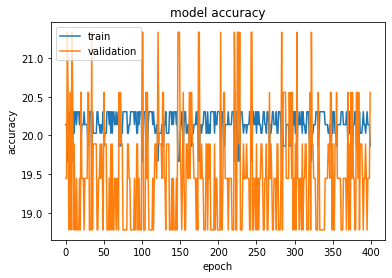

Maximum Train Accuracy : 20.30555534362793
Maximum Validation Accuracy : 21.33333396911621


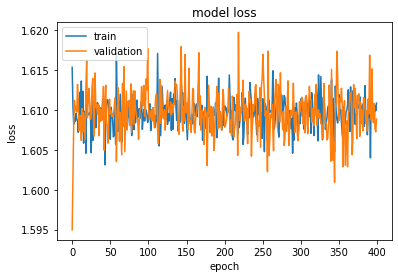

Minimum Train Loss : 1.603119134902954
Minimum Validation Loss : 1.5949523448944092


In [ ]:
Bacteria_model_phase_Adam_0001 = Bact_Net()
Bacteria_model_phase_Adam_0001.cuda()
trainer_Adam_phase_0001 = trainer(Bacteria_model_phase_Adam_0001, phase_train_loader,"Adam", epoch_size=400, learning_rate=0.001, weight_decay = 0.5)
trainer_Adam_phase_0001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adam_phase_0001.history['train_acc'])
plt.plot(trainer_Adam_phase_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adam_phase_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adam_phase_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adam_phase_0001.history['train_loss'])
plt.plot(trainer_Adam_phase_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adam_phase_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adam_phase_0001.history['val_loss'])}")

# Adam_0.001_400epoch_batchnorm

  0%|          | 0/400 [00:00<?, ?it/s]

Train Acc | Epoch 1/400 | ACC 29.444445


  0%|          | 1/400 [00:14<1:34:12, 14.17s/it]

Val Acc | Epoch 1/400 | ACC 30.333334
Train Acc | Epoch 2/400 | ACC 22.555555


  0%|          | 2/400 [00:28<1:33:56, 14.16s/it]

Val Acc | Epoch 2/400 | ACC 23.333334
Train Acc | Epoch 3/400 | ACC 37.083332


  1%|          | 3/400 [00:42<1:32:50, 14.03s/it]

Val Acc | Epoch 3/400 | ACC 38.333336
Train Acc | Epoch 4/400 | ACC 37.444447


  1%|          | 4/400 [00:56<1:32:36, 14.03s/it]

Val Acc | Epoch 4/400 | ACC 38.333336
Train Acc | Epoch 5/400 | ACC 22.305555


  1%|▏         | 5/400 [01:10<1:32:46, 14.09s/it]

Val Acc | Epoch 5/400 | ACC 20.555555
Train Acc | Epoch 6/400 | ACC 22.472221


  2%|▏         | 6/400 [01:24<1:32:03, 14.02s/it]

Val Acc | Epoch 6/400 | ACC 21.555557
Train Acc | Epoch 7/400 | ACC 28.166666


  2%|▏         | 7/400 [01:38<1:32:01, 14.05s/it]

Val Acc | Epoch 7/400 | ACC 27.555555
Train Acc | Epoch 8/400 | ACC 24.305557


  2%|▏         | 8/400 [01:52<1:32:50, 14.21s/it]

Val Acc | Epoch 8/400 | ACC 23.111111
Train Acc | Epoch 9/400 | ACC 35.527779


  2%|▏         | 9/400 [02:07<1:32:13, 14.15s/it]

Val Acc | Epoch 9/400 | ACC 36.111115
Train Acc | Epoch 10/400 | ACC 41.166668


  2%|▎         | 10/400 [02:21<1:31:50, 14.13s/it]

Val Acc | Epoch 10/400 | ACC 42.777779
Train Acc | Epoch 11/400 | ACC 20.027777


  3%|▎         | 11/400 [02:35<1:31:32, 14.12s/it]

Val Acc | Epoch 11/400 | ACC 19.888889
Train Acc | Epoch 12/400 | ACC 68.388893


  3%|▎         | 12/400 [02:49<1:31:17, 14.12s/it]

Val Acc | Epoch 12/400 | ACC 66.666672
Train Acc | Epoch 13/400 | ACC 20.027777


  3%|▎         | 13/400 [03:03<1:30:28, 14.03s/it]

Val Acc | Epoch 13/400 | ACC 19.888889
Train Acc | Epoch 14/400 | ACC 35.944443


  4%|▎         | 14/400 [03:17<1:30:48, 14.12s/it]

Val Acc | Epoch 14/400 | ACC 34.555557
Train Acc | Epoch 15/400 | ACC 40.027779


  4%|▍         | 15/400 [03:31<1:30:46, 14.15s/it]

Val Acc | Epoch 15/400 | ACC 38.111111
Train Acc | Epoch 16/400 | ACC 20.888889


  4%|▍         | 16/400 [03:45<1:30:37, 14.16s/it]

Val Acc | Epoch 16/400 | ACC 20.333334
Train Acc | Epoch 17/400 | ACC 35.111111


  4%|▍         | 17/400 [04:00<1:31:33, 14.34s/it]

Val Acc | Epoch 17/400 | ACC 33.666668
Train Acc | Epoch 18/400 | ACC 58.472221


  4%|▍         | 18/400 [04:14<1:30:45, 14.26s/it]

Val Acc | Epoch 18/400 | ACC 57.444447
Train Acc | Epoch 19/400 | ACC 65.361115


  5%|▍         | 19/400 [04:28<1:30:14, 14.21s/it]

Val Acc | Epoch 19/400 | ACC 66.000000
Train Acc | Epoch 20/400 | ACC 53.472221


  5%|▌         | 20/400 [04:42<1:29:54, 14.20s/it]

Val Acc | Epoch 20/400 | ACC 53.000004
Train Acc | Epoch 21/400 | ACC 49.083336


  5%|▌         | 21/400 [04:57<1:29:35, 14.18s/it]

Val Acc | Epoch 21/400 | ACC 49.888889
Train Acc | Epoch 22/400 | ACC 30.527779


  6%|▌         | 22/400 [05:11<1:29:15, 14.17s/it]

Val Acc | Epoch 22/400 | ACC 28.888889
Train Acc | Epoch 23/400 | ACC 53.361111


  6%|▌         | 23/400 [05:25<1:28:58, 14.16s/it]

Val Acc | Epoch 23/400 | ACC 52.333336
Train Acc | Epoch 24/400 | ACC 34.277779


  6%|▌         | 24/400 [05:39<1:27:55, 14.03s/it]

Val Acc | Epoch 24/400 | ACC 33.000000
Train Acc | Epoch 25/400 | ACC 44.638889


  6%|▋         | 25/400 [05:53<1:27:33, 14.01s/it]

Val Acc | Epoch 25/400 | ACC 45.333336
Train Acc | Epoch 26/400 | ACC 51.972221


  6%|▋         | 26/400 [06:07<1:27:58, 14.11s/it]

Val Acc | Epoch 26/400 | ACC 50.888889
Train Acc | Epoch 27/400 | ACC 43.638889


  7%|▋         | 27/400 [06:21<1:28:06, 14.17s/it]

Val Acc | Epoch 27/400 | ACC 42.222221
Train Acc | Epoch 28/400 | ACC 61.527779


  7%|▋         | 28/400 [06:35<1:27:42, 14.15s/it]

Val Acc | Epoch 28/400 | ACC 58.777779
Train Acc | Epoch 29/400 | ACC 34.527779


  7%|▋         | 29/400 [06:49<1:27:19, 14.12s/it]

Val Acc | Epoch 29/400 | ACC 32.444443
Train Acc | Epoch 30/400 | ACC 67.583336


  8%|▊         | 30/400 [07:03<1:26:25, 14.01s/it]

Val Acc | Epoch 30/400 | ACC 64.888885
Train Acc | Epoch 31/400 | ACC 49.833332


  8%|▊         | 31/400 [07:17<1:25:53, 13.97s/it]

Val Acc | Epoch 31/400 | ACC 47.555557
Train Acc | Epoch 32/400 | ACC 57.194447


  8%|▊         | 32/400 [07:31<1:25:22, 13.92s/it]

Val Acc | Epoch 32/400 | ACC 56.777782
Train Acc | Epoch 33/400 | ACC 55.638893


  8%|▊         | 33/400 [07:45<1:25:26, 13.97s/it]

Val Acc | Epoch 33/400 | ACC 52.555553
Train Acc | Epoch 34/400 | ACC 51.777779


  8%|▊         | 34/400 [07:59<1:25:02, 13.94s/it]

Val Acc | Epoch 34/400 | ACC 48.555557
Train Acc | Epoch 35/400 | ACC 55.833332


  9%|▉         | 35/400 [08:13<1:25:27, 14.05s/it]

Val Acc | Epoch 35/400 | ACC 55.888893
Train Acc | Epoch 36/400 | ACC 39.222221


  9%|▉         | 36/400 [08:27<1:24:39, 13.95s/it]

Val Acc | Epoch 36/400 | ACC 39.111115
Train Acc | Epoch 37/400 | ACC 56.138889


  9%|▉         | 37/400 [08:41<1:24:46, 14.01s/it]

Val Acc | Epoch 37/400 | ACC 53.000004
Train Acc | Epoch 38/400 | ACC 66.166672


 10%|▉         | 38/400 [08:55<1:24:42, 14.04s/it]

Val Acc | Epoch 38/400 | ACC 65.777779
Train Acc | Epoch 39/400 | ACC 67.472229


 10%|▉         | 39/400 [09:09<1:25:05, 14.14s/it]

Val Acc | Epoch 39/400 | ACC 66.888893
Train Acc | Epoch 40/400 | ACC 44.500004


 10%|█         | 40/400 [09:23<1:24:30, 14.08s/it]

Val Acc | Epoch 40/400 | ACC 43.888889
Train Acc | Epoch 41/400 | ACC 60.166668


 10%|█         | 41/400 [09:37<1:23:45, 14.00s/it]

Val Acc | Epoch 41/400 | ACC 60.555561
Train Acc | Epoch 42/400 | ACC 48.611115


 10%|█         | 42/400 [09:51<1:23:37, 14.02s/it]

Val Acc | Epoch 42/400 | ACC 46.777779
Train Acc | Epoch 43/400 | ACC 55.694443


 11%|█         | 43/400 [10:05<1:23:29, 14.03s/it]

Val Acc | Epoch 43/400 | ACC 54.888893
Train Acc | Epoch 44/400 | ACC 53.972225


 11%|█         | 44/400 [10:19<1:22:50, 13.96s/it]

Val Acc | Epoch 44/400 | ACC 54.000004
Train Acc | Epoch 45/400 | ACC 73.083336


 11%|█▏        | 45/400 [10:33<1:22:24, 13.93s/it]

Val Acc | Epoch 45/400 | ACC 71.777779
Train Acc | Epoch 46/400 | ACC 65.361115


 12%|█▏        | 46/400 [10:47<1:22:01, 13.90s/it]

Val Acc | Epoch 46/400 | ACC 65.111115
Train Acc | Epoch 47/400 | ACC 55.944450


 12%|█▏        | 47/400 [11:01<1:21:50, 13.91s/it]

Val Acc | Epoch 47/400 | ACC 56.222225
Train Acc | Epoch 48/400 | ACC 71.777779


 12%|█▏        | 48/400 [11:15<1:21:27, 13.88s/it]

Val Acc | Epoch 48/400 | ACC 70.777779
Train Acc | Epoch 49/400 | ACC 46.361115


 12%|█▏        | 49/400 [11:28<1:21:13, 13.89s/it]

Val Acc | Epoch 49/400 | ACC 46.222221
Train Acc | Epoch 50/400 | ACC 63.472221


 12%|█▎        | 50/400 [11:42<1:21:14, 13.93s/it]

Val Acc | Epoch 50/400 | ACC 62.444450
Train Acc | Epoch 51/400 | ACC 56.750000


 13%|█▎        | 51/400 [11:56<1:20:49, 13.90s/it]

Val Acc | Epoch 51/400 | ACC 58.000004
Train Acc | Epoch 52/400 | ACC 59.138889


 13%|█▎        | 52/400 [12:10<1:20:48, 13.93s/it]

Val Acc | Epoch 52/400 | ACC 57.222221
Train Acc | Epoch 53/400 | ACC 34.416668


 13%|█▎        | 53/400 [12:24<1:20:39, 13.95s/it]

Val Acc | Epoch 53/400 | ACC 34.111111
Train Acc | Epoch 54/400 | ACC 38.444443


 14%|█▎        | 54/400 [12:38<1:20:44, 14.00s/it]

Val Acc | Epoch 54/400 | ACC 37.000000
Train Acc | Epoch 55/400 | ACC 61.222225


 14%|█▍        | 55/400 [12:53<1:21:01, 14.09s/it]

Val Acc | Epoch 55/400 | ACC 57.666664
Train Acc | Epoch 56/400 | ACC 76.555557


 14%|█▍        | 56/400 [13:07<1:21:31, 14.22s/it]

Val Acc | Epoch 56/400 | ACC 75.111115
Train Acc | Epoch 57/400 | ACC 72.333336


 14%|█▍        | 57/400 [13:21<1:21:20, 14.23s/it]

Val Acc | Epoch 57/400 | ACC 71.333336
Train Acc | Epoch 58/400 | ACC 55.222225


 14%|█▍        | 58/400 [13:35<1:20:34, 14.14s/it]

Val Acc | Epoch 58/400 | ACC 54.777779
Train Acc | Epoch 59/400 | ACC 66.972229


 15%|█▍        | 59/400 [13:49<1:20:08, 14.10s/it]

Val Acc | Epoch 59/400 | ACC 67.666664
Train Acc | Epoch 60/400 | ACC 60.638893


 15%|█▌        | 60/400 [14:03<1:19:48, 14.08s/it]

Val Acc | Epoch 60/400 | ACC 59.888885
Train Acc | Epoch 61/400 | ACC 69.083336


 15%|█▌        | 61/400 [14:18<1:21:06, 14.35s/it]

Val Acc | Epoch 61/400 | ACC 67.666664
Train Acc | Epoch 62/400 | ACC 52.361115


 16%|█▌        | 62/400 [14:32<1:20:07, 14.22s/it]

Val Acc | Epoch 62/400 | ACC 52.111115
Train Acc | Epoch 63/400 | ACC 48.972221


 16%|█▌        | 63/400 [14:47<1:19:55, 14.23s/it]

Val Acc | Epoch 63/400 | ACC 48.888889
Train Acc | Epoch 64/400 | ACC 59.333336


 16%|█▌        | 64/400 [15:01<1:19:24, 14.18s/it]

Val Acc | Epoch 64/400 | ACC 59.000004
Train Acc | Epoch 65/400 | ACC 55.416668


 16%|█▋        | 65/400 [15:15<1:18:59, 14.15s/it]

Val Acc | Epoch 65/400 | ACC 55.333336
Train Acc | Epoch 66/400 | ACC 69.305557


 16%|█▋        | 66/400 [15:29<1:18:15, 14.06s/it]

Val Acc | Epoch 66/400 | ACC 68.555557
Train Acc | Epoch 67/400 | ACC 71.916672


 17%|█▋        | 67/400 [15:43<1:18:18, 14.11s/it]

Val Acc | Epoch 67/400 | ACC 72.777779
Train Acc | Epoch 68/400 | ACC 64.194450


 17%|█▋        | 68/400 [15:57<1:18:10, 14.13s/it]

Val Acc | Epoch 68/400 | ACC 63.666664
Train Acc | Epoch 69/400 | ACC 56.888889


 17%|█▋        | 69/400 [16:11<1:17:35, 14.07s/it]

Val Acc | Epoch 69/400 | ACC 58.222221
Train Acc | Epoch 70/400 | ACC 55.388893


 18%|█▊        | 70/400 [16:25<1:17:13, 14.04s/it]

Val Acc | Epoch 70/400 | ACC 52.333336
Train Acc | Epoch 71/400 | ACC 70.055557


 18%|█▊        | 71/400 [16:39<1:16:41, 13.99s/it]

Val Acc | Epoch 71/400 | ACC 70.555557
Train Acc | Epoch 72/400 | ACC 60.111111


 18%|█▊        | 72/400 [16:53<1:16:48, 14.05s/it]

Val Acc | Epoch 72/400 | ACC 61.444443
Train Acc | Epoch 73/400 | ACC 49.722225


 18%|█▊        | 73/400 [17:07<1:16:33, 14.05s/it]

Val Acc | Epoch 73/400 | ACC 50.333332
Train Acc | Epoch 74/400 | ACC 84.750000


 18%|█▊        | 74/400 [17:21<1:16:01, 13.99s/it]

Val Acc | Epoch 74/400 | ACC 82.666672
Train Acc | Epoch 75/400 | ACC 73.833336


 19%|█▉        | 75/400 [17:35<1:16:00, 14.03s/it]

Val Acc | Epoch 75/400 | ACC 72.111115
Train Acc | Epoch 76/400 | ACC 45.833336


 19%|█▉        | 76/400 [17:49<1:15:54, 14.06s/it]

Val Acc | Epoch 76/400 | ACC 44.555557
Train Acc | Epoch 77/400 | ACC 83.805557


 19%|█▉        | 77/400 [18:03<1:15:52, 14.09s/it]

Val Acc | Epoch 77/400 | ACC 83.777779
Train Acc | Epoch 78/400 | ACC 54.750000


 20%|█▉        | 78/400 [18:17<1:15:15, 14.02s/it]

Val Acc | Epoch 78/400 | ACC 53.666668
Train Acc | Epoch 79/400 | ACC 66.305557


 20%|█▉        | 79/400 [18:31<1:14:48, 13.98s/it]

Val Acc | Epoch 79/400 | ACC 64.777779
Train Acc | Epoch 80/400 | ACC 42.111111


 20%|██        | 80/400 [18:45<1:14:27, 13.96s/it]

Val Acc | Epoch 80/400 | ACC 40.111115
Train Acc | Epoch 81/400 | ACC 53.000004


 20%|██        | 81/400 [18:59<1:14:07, 13.94s/it]

Val Acc | Epoch 81/400 | ACC 51.333332
Train Acc | Epoch 82/400 | ACC 60.194443


 20%|██        | 82/400 [19:13<1:13:36, 13.89s/it]

Val Acc | Epoch 82/400 | ACC 61.888893
Train Acc | Epoch 83/400 | ACC 55.388893


 21%|██        | 83/400 [19:27<1:14:22, 14.08s/it]

Val Acc | Epoch 83/400 | ACC 55.222225
Train Acc | Epoch 84/400 | ACC 69.722221


 21%|██        | 84/400 [19:41<1:14:11, 14.09s/it]

Val Acc | Epoch 84/400 | ACC 68.333336
Train Acc | Epoch 85/400 | ACC 37.888889


 21%|██▏       | 85/400 [19:55<1:13:35, 14.02s/it]

Val Acc | Epoch 85/400 | ACC 35.666668
Train Acc | Epoch 86/400 | ACC 76.972221


 22%|██▏       | 86/400 [20:09<1:13:08, 13.98s/it]

Val Acc | Epoch 86/400 | ACC 75.222221
Train Acc | Epoch 87/400 | ACC 68.500000


 22%|██▏       | 87/400 [20:23<1:12:41, 13.94s/it]

Val Acc | Epoch 87/400 | ACC 66.222229
Train Acc | Epoch 88/400 | ACC 47.833336


 22%|██▏       | 88/400 [20:37<1:12:29, 13.94s/it]

Val Acc | Epoch 88/400 | ACC 47.555557
Train Acc | Epoch 89/400 | ACC 52.555553


 22%|██▏       | 89/400 [20:51<1:12:08, 13.92s/it]

Val Acc | Epoch 89/400 | ACC 51.000000
Train Acc | Epoch 90/400 | ACC 76.222221


 22%|██▎       | 90/400 [21:04<1:11:25, 13.82s/it]

Val Acc | Epoch 90/400 | ACC 77.222221
Train Acc | Epoch 91/400 | ACC 69.694450


 23%|██▎       | 91/400 [21:18<1:10:50, 13.76s/it]

Val Acc | Epoch 91/400 | ACC 69.000000
Train Acc | Epoch 92/400 | ACC 23.138889


 23%|██▎       | 92/400 [21:31<1:10:16, 13.69s/it]

Val Acc | Epoch 92/400 | ACC 22.333334
Train Acc | Epoch 93/400 | ACC 68.388893


 23%|██▎       | 93/400 [21:45<1:10:03, 13.69s/it]

Val Acc | Epoch 93/400 | ACC 66.555557
Train Acc | Epoch 94/400 | ACC 60.555561


 24%|██▎       | 94/400 [21:59<1:09:47, 13.68s/it]

Val Acc | Epoch 94/400 | ACC 58.666672
Train Acc | Epoch 95/400 | ACC 64.166672


 24%|██▍       | 95/400 [22:13<1:09:47, 13.73s/it]

Val Acc | Epoch 95/400 | ACC 63.000000
Train Acc | Epoch 96/400 | ACC 74.194450


 24%|██▍       | 96/400 [22:27<1:10:20, 13.88s/it]

Val Acc | Epoch 96/400 | ACC 72.222229
Train Acc | Epoch 97/400 | ACC 61.555557


 24%|██▍       | 97/400 [22:41<1:09:56, 13.85s/it]

Val Acc | Epoch 97/400 | ACC 60.333336
Train Acc | Epoch 98/400 | ACC 77.638885


 24%|██▍       | 98/400 [22:54<1:09:43, 13.85s/it]

Val Acc | Epoch 98/400 | ACC 76.333336
Train Acc | Epoch 99/400 | ACC 63.750000


 25%|██▍       | 99/400 [23:08<1:09:05, 13.77s/it]

Val Acc | Epoch 99/400 | ACC 64.111115
Train Acc | Epoch 100/400 | ACC 41.750000


 25%|██▌       | 100/400 [23:22<1:08:52, 13.77s/it]

Val Acc | Epoch 100/400 | ACC 40.333332
Train Acc | Epoch 101/400 | ACC 80.361115


 25%|██▌       | 101/400 [23:36<1:08:50, 13.81s/it]

Val Acc | Epoch 101/400 | ACC 79.333336
Train Acc | Epoch 102/400 | ACC 83.416672


 26%|██▌       | 102/400 [23:49<1:08:17, 13.75s/it]

Val Acc | Epoch 102/400 | ACC 81.000000
Train Acc | Epoch 103/400 | ACC 60.722225


 26%|██▌       | 103/400 [24:03<1:07:52, 13.71s/it]

Val Acc | Epoch 103/400 | ACC 61.333336
Train Acc | Epoch 104/400 | ACC 61.027779


 26%|██▌       | 104/400 [24:17<1:08:14, 13.83s/it]

Val Acc | Epoch 104/400 | ACC 60.000004
Train Acc | Epoch 105/400 | ACC 64.500008


 26%|██▋       | 105/400 [24:31<1:08:13, 13.88s/it]

Val Acc | Epoch 105/400 | ACC 65.333336
Train Acc | Epoch 106/400 | ACC 84.166672


 26%|██▋       | 106/400 [24:45<1:08:36, 14.00s/it]

Val Acc | Epoch 106/400 | ACC 83.333336
Train Acc | Epoch 107/400 | ACC 73.333336


 27%|██▋       | 107/400 [24:59<1:08:33, 14.04s/it]

Val Acc | Epoch 107/400 | ACC 72.000000
Train Acc | Epoch 108/400 | ACC 83.972221


 27%|██▋       | 108/400 [25:13<1:08:10, 14.01s/it]

Val Acc | Epoch 108/400 | ACC 84.333336
Train Acc | Epoch 109/400 | ACC 79.333336


 27%|██▋       | 109/400 [25:27<1:08:02, 14.03s/it]

Val Acc | Epoch 109/400 | ACC 78.888893
Train Acc | Epoch 110/400 | ACC 28.944445


 28%|██▊       | 110/400 [25:41<1:07:15, 13.92s/it]

Val Acc | Epoch 110/400 | ACC 27.777779
Train Acc | Epoch 111/400 | ACC 87.694450


 28%|██▊       | 111/400 [25:55<1:07:00, 13.91s/it]

Val Acc | Epoch 111/400 | ACC 85.333336
Train Acc | Epoch 112/400 | ACC 67.916664


 28%|██▊       | 112/400 [26:09<1:06:15, 13.81s/it]

Val Acc | Epoch 112/400 | ACC 67.777779
Train Acc | Epoch 113/400 | ACC 82.916672


 28%|██▊       | 113/400 [26:22<1:06:10, 13.83s/it]

Val Acc | Epoch 113/400 | ACC 82.555557
Train Acc | Epoch 114/400 | ACC 69.500000


 28%|██▊       | 114/400 [26:36<1:06:05, 13.87s/it]

Val Acc | Epoch 114/400 | ACC 67.777779
Train Acc | Epoch 115/400 | ACC 50.500000


 29%|██▉       | 115/400 [26:50<1:05:48, 13.86s/it]

Val Acc | Epoch 115/400 | ACC 50.222225
Train Acc | Epoch 116/400 | ACC 71.527779


 29%|██▉       | 116/400 [27:04<1:05:47, 13.90s/it]

Val Acc | Epoch 116/400 | ACC 72.333336
Train Acc | Epoch 117/400 | ACC 58.055557


 29%|██▉       | 117/400 [27:18<1:05:04, 13.80s/it]

Val Acc | Epoch 117/400 | ACC 57.777779
Train Acc | Epoch 118/400 | ACC 74.805557


 30%|██▉       | 118/400 [27:32<1:04:45, 13.78s/it]

Val Acc | Epoch 118/400 | ACC 73.777779
Train Acc | Epoch 119/400 | ACC 52.694447


 30%|██▉       | 119/400 [27:45<1:04:25, 13.76s/it]

Val Acc | Epoch 119/400 | ACC 52.111115
Train Acc | Epoch 120/400 | ACC 48.027779


 30%|███       | 120/400 [27:59<1:04:16, 13.77s/it]

Val Acc | Epoch 120/400 | ACC 46.555557
Train Acc | Epoch 121/400 | ACC 85.083336


 30%|███       | 121/400 [28:13<1:04:09, 13.80s/it]

Val Acc | Epoch 121/400 | ACC 84.000000
Train Acc | Epoch 122/400 | ACC 78.472229


 30%|███       | 122/400 [28:26<1:03:28, 13.70s/it]

Val Acc | Epoch 122/400 | ACC 77.777779
Train Acc | Epoch 123/400 | ACC 60.361111


 31%|███       | 123/400 [28:40<1:03:28, 13.75s/it]

Val Acc | Epoch 123/400 | ACC 59.666668
Train Acc | Epoch 124/400 | ACC 72.333336


 31%|███       | 124/400 [28:54<1:03:30, 13.80s/it]

Val Acc | Epoch 124/400 | ACC 70.555557
Train Acc | Epoch 125/400 | ACC 48.361115


 31%|███▏      | 125/400 [29:08<1:03:23, 13.83s/it]

Val Acc | Epoch 125/400 | ACC 47.555557
Train Acc | Epoch 126/400 | ACC 83.611115


 32%|███▏      | 126/400 [29:22<1:02:57, 13.79s/it]

Val Acc | Epoch 126/400 | ACC 83.000008
Train Acc | Epoch 127/400 | ACC 63.277782


 32%|███▏      | 127/400 [29:35<1:02:33, 13.75s/it]

Val Acc | Epoch 127/400 | ACC 62.555557
Train Acc | Epoch 128/400 | ACC 84.861115


 32%|███▏      | 128/400 [29:50<1:03:55, 14.10s/it]

Val Acc | Epoch 128/400 | ACC 82.666672
Train Acc | Epoch 129/400 | ACC 79.666672


 32%|███▏      | 129/400 [30:04<1:03:12, 13.99s/it]

Val Acc | Epoch 129/400 | ACC 78.555557
Train Acc | Epoch 130/400 | ACC 88.055557


 32%|███▎      | 130/400 [30:18<1:02:46, 13.95s/it]

Val Acc | Epoch 130/400 | ACC 86.333336
Train Acc | Epoch 131/400 | ACC 82.166664


 33%|███▎      | 131/400 [30:32<1:02:30, 13.94s/it]

Val Acc | Epoch 131/400 | ACC 81.555557
Train Acc | Epoch 132/400 | ACC 84.777779


 33%|███▎      | 132/400 [30:46<1:02:30, 14.00s/it]

Val Acc | Epoch 132/400 | ACC 85.111115
Train Acc | Epoch 133/400 | ACC 42.000000


 33%|███▎      | 133/400 [31:00<1:01:42, 13.87s/it]

Val Acc | Epoch 133/400 | ACC 39.666668
Train Acc | Epoch 134/400 | ACC 64.111115


 34%|███▎      | 134/400 [31:13<1:01:35, 13.89s/it]

Val Acc | Epoch 134/400 | ACC 64.000000
Train Acc | Epoch 135/400 | ACC 62.472225


 34%|███▍      | 135/400 [31:28<1:01:33, 13.94s/it]

Val Acc | Epoch 135/400 | ACC 64.000000
Train Acc | Epoch 136/400 | ACC 70.472221


 34%|███▍      | 136/400 [31:41<1:01:02, 13.87s/it]

Val Acc | Epoch 136/400 | ACC 68.555557
Train Acc | Epoch 137/400 | ACC 48.000000


 34%|███▍      | 137/400 [31:55<1:00:53, 13.89s/it]

Val Acc | Epoch 137/400 | ACC 46.888889
Train Acc | Epoch 138/400 | ACC 20.055557


 34%|███▍      | 138/400 [32:09<1:00:25, 13.84s/it]

Val Acc | Epoch 138/400 | ACC 20.000000
Train Acc | Epoch 139/400 | ACC 82.861115


 35%|███▍      | 139/400 [32:23<1:00:31, 13.92s/it]

Val Acc | Epoch 139/400 | ACC 82.000000
Train Acc | Epoch 140/400 | ACC 57.416664


 35%|███▌      | 140/400 [32:37<59:57, 13.84s/it]  

Val Acc | Epoch 140/400 | ACC 58.111115
Train Acc | Epoch 141/400 | ACC 64.833336


 35%|███▌      | 141/400 [32:50<59:35, 13.81s/it]

Val Acc | Epoch 141/400 | ACC 63.444447
Train Acc | Epoch 142/400 | ACC 77.194443


 36%|███▌      | 142/400 [33:04<59:35, 13.86s/it]

Val Acc | Epoch 142/400 | ACC 77.000008
Train Acc | Epoch 143/400 | ACC 29.111111


 36%|███▌      | 143/400 [33:18<59:31, 13.90s/it]

Val Acc | Epoch 143/400 | ACC 29.111111
Train Acc | Epoch 144/400 | ACC 64.194450


 36%|███▌      | 144/400 [33:32<59:06, 13.85s/it]

Val Acc | Epoch 144/400 | ACC 63.222225
Train Acc | Epoch 145/400 | ACC 65.194443


 36%|███▋      | 145/400 [33:46<58:45, 13.82s/it]

Val Acc | Epoch 145/400 | ACC 62.222225
Train Acc | Epoch 146/400 | ACC 52.222221


 36%|███▋      | 146/400 [34:00<58:23, 13.79s/it]

Val Acc | Epoch 146/400 | ACC 51.333332
Train Acc | Epoch 147/400 | ACC 61.916668


 37%|███▋      | 147/400 [34:13<58:05, 13.78s/it]

Val Acc | Epoch 147/400 | ACC 62.222225
Train Acc | Epoch 148/400 | ACC 52.833336


 37%|███▋      | 148/400 [34:27<57:52, 13.78s/it]

Val Acc | Epoch 148/400 | ACC 52.666672
Train Acc | Epoch 149/400 | ACC 32.250004


 37%|███▋      | 149/400 [34:41<57:35, 13.77s/it]

Val Acc | Epoch 149/400 | ACC 32.666668
Train Acc | Epoch 150/400 | ACC 57.000000


 38%|███▊      | 150/400 [34:55<58:11, 13.96s/it]

Val Acc | Epoch 150/400 | ACC 55.888893
Train Acc | Epoch 151/400 | ACC 67.194443


 38%|███▊      | 151/400 [35:10<58:23, 14.07s/it]

Val Acc | Epoch 151/400 | ACC 69.333336
Train Acc | Epoch 152/400 | ACC 72.666672


 38%|███▊      | 152/400 [35:24<58:12, 14.08s/it]

Val Acc | Epoch 152/400 | ACC 72.666672
Train Acc | Epoch 153/400 | ACC 36.138889


 38%|███▊      | 153/400 [35:37<57:29, 13.97s/it]

Val Acc | Epoch 153/400 | ACC 35.222225
Train Acc | Epoch 154/400 | ACC 77.666672


 38%|███▊      | 154/400 [35:52<57:37, 14.06s/it]

Val Acc | Epoch 154/400 | ACC 77.000008
Train Acc | Epoch 155/400 | ACC 60.972225


 39%|███▉      | 155/400 [36:05<56:59, 13.96s/it]

Val Acc | Epoch 155/400 | ACC 62.333332
Train Acc | Epoch 156/400 | ACC 57.777779


 39%|███▉      | 156/400 [36:20<57:02, 14.03s/it]

Val Acc | Epoch 156/400 | ACC 57.888889
Train Acc | Epoch 157/400 | ACC 87.444450


 39%|███▉      | 157/400 [36:33<56:25, 13.93s/it]

Val Acc | Epoch 157/400 | ACC 87.555557
Train Acc | Epoch 158/400 | ACC 71.138885


 40%|███▉      | 158/400 [36:47<56:13, 13.94s/it]

Val Acc | Epoch 158/400 | ACC 71.666672
Train Acc | Epoch 159/400 | ACC 48.277779


 40%|███▉      | 159/400 [37:01<55:55, 13.92s/it]

Val Acc | Epoch 159/400 | ACC 48.111111
Train Acc | Epoch 160/400 | ACC 75.250000


 40%|████      | 160/400 [37:15<55:23, 13.85s/it]

Val Acc | Epoch 160/400 | ACC 72.777779
Train Acc | Epoch 161/400 | ACC 72.638893


 40%|████      | 161/400 [37:29<55:11, 13.85s/it]

Val Acc | Epoch 161/400 | ACC 73.333336
Train Acc | Epoch 162/400 | ACC 66.777779


 40%|████      | 162/400 [37:42<54:47, 13.81s/it]

Val Acc | Epoch 162/400 | ACC 65.333336
Train Acc | Epoch 163/400 | ACC 55.638893


 41%|████      | 163/400 [37:56<54:49, 13.88s/it]

Val Acc | Epoch 163/400 | ACC 54.222225
Train Acc | Epoch 164/400 | ACC 84.000000


 41%|████      | 164/400 [38:10<54:26, 13.84s/it]

Val Acc | Epoch 164/400 | ACC 83.666672
Train Acc | Epoch 165/400 | ACC 71.000000


 41%|████▏     | 165/400 [38:24<54:24, 13.89s/it]

Val Acc | Epoch 165/400 | ACC 69.444450
Train Acc | Epoch 166/400 | ACC 50.500000


 42%|████▏     | 166/400 [38:38<54:11, 13.90s/it]

Val Acc | Epoch 166/400 | ACC 50.222225
Train Acc | Epoch 167/400 | ACC 84.000000


 42%|████▏     | 167/400 [38:52<53:50, 13.86s/it]

Val Acc | Epoch 167/400 | ACC 81.000000
Train Acc | Epoch 168/400 | ACC 85.083336


 42%|████▏     | 168/400 [39:06<53:42, 13.89s/it]

Val Acc | Epoch 168/400 | ACC 84.222221
Train Acc | Epoch 169/400 | ACC 84.805557


 42%|████▏     | 169/400 [39:20<53:28, 13.89s/it]

Val Acc | Epoch 169/400 | ACC 83.000008
Train Acc | Epoch 170/400 | ACC 67.833336


 42%|████▎     | 170/400 [39:34<53:17, 13.90s/it]

Val Acc | Epoch 170/400 | ACC 67.111115
Train Acc | Epoch 171/400 | ACC 90.194443


 43%|████▎     | 171/400 [39:47<52:59, 13.88s/it]

Val Acc | Epoch 171/400 | ACC 89.666672
Train Acc | Epoch 172/400 | ACC 83.111115


 43%|████▎     | 172/400 [40:02<53:09, 13.99s/it]

Val Acc | Epoch 172/400 | ACC 81.111115
Train Acc | Epoch 173/400 | ACC 78.500000


 43%|████▎     | 173/400 [40:16<53:33, 14.16s/it]

Val Acc | Epoch 173/400 | ACC 76.333336
Train Acc | Epoch 174/400 | ACC 54.888893


 44%|████▎     | 174/400 [40:30<52:55, 14.05s/it]

Val Acc | Epoch 174/400 | ACC 54.111111
Train Acc | Epoch 175/400 | ACC 88.833336


 44%|████▍     | 175/400 [40:44<52:36, 14.03s/it]

Val Acc | Epoch 175/400 | ACC 87.888893
Train Acc | Epoch 176/400 | ACC 86.916664


 44%|████▍     | 176/400 [40:58<52:11, 13.98s/it]

Val Acc | Epoch 176/400 | ACC 86.222229
Train Acc | Epoch 177/400 | ACC 74.638893


 44%|████▍     | 177/400 [41:12<51:54, 13.97s/it]

Val Acc | Epoch 177/400 | ACC 73.444443
Train Acc | Epoch 178/400 | ACC 79.444443


 44%|████▍     | 178/400 [41:26<51:41, 13.97s/it]

Val Acc | Epoch 178/400 | ACC 79.888893
Train Acc | Epoch 179/400 | ACC 79.805557


 45%|████▍     | 179/400 [41:40<51:50, 14.08s/it]

Val Acc | Epoch 179/400 | ACC 78.666672
Train Acc | Epoch 180/400 | ACC 70.361115


 45%|████▌     | 180/400 [41:54<51:33, 14.06s/it]

Val Acc | Epoch 180/400 | ACC 70.111115
Train Acc | Epoch 181/400 | ACC 89.111115


 45%|████▌     | 181/400 [42:08<51:08, 14.01s/it]

Val Acc | Epoch 181/400 | ACC 89.000008
Train Acc | Epoch 182/400 | ACC 90.083336


 46%|████▌     | 182/400 [42:22<50:45, 13.97s/it]

Val Acc | Epoch 182/400 | ACC 88.444450
Train Acc | Epoch 183/400 | ACC 87.138893


 46%|████▌     | 183/400 [42:36<50:30, 13.96s/it]

Val Acc | Epoch 183/400 | ACC 87.555557
Train Acc | Epoch 184/400 | ACC 58.055557


 46%|████▌     | 184/400 [42:50<50:09, 13.93s/it]

Val Acc | Epoch 184/400 | ACC 58.555557
Train Acc | Epoch 185/400 | ACC 25.861111


 46%|████▋     | 185/400 [43:04<49:58, 13.95s/it]

Val Acc | Epoch 185/400 | ACC 27.333334
Train Acc | Epoch 186/400 | ACC 20.250000


 46%|████▋     | 186/400 [43:18<49:44, 13.95s/it]

Val Acc | Epoch 186/400 | ACC 20.111113
Train Acc | Epoch 187/400 | ACC 87.472221


 47%|████▋     | 187/400 [43:32<49:24, 13.92s/it]

Val Acc | Epoch 187/400 | ACC 87.333336
Train Acc | Epoch 188/400 | ACC 59.611111


 47%|████▋     | 188/400 [43:45<48:52, 13.83s/it]

Val Acc | Epoch 188/400 | ACC 59.777779
Train Acc | Epoch 189/400 | ACC 80.222229


 47%|████▋     | 189/400 [43:59<48:43, 13.86s/it]

Val Acc | Epoch 189/400 | ACC 80.000000
Train Acc | Epoch 190/400 | ACC 78.416672


 48%|████▊     | 190/400 [44:13<48:27, 13.85s/it]

Val Acc | Epoch 190/400 | ACC 78.444443
Train Acc | Epoch 191/400 | ACC 65.527779


 48%|████▊     | 191/400 [44:26<47:57, 13.77s/it]

Val Acc | Epoch 191/400 | ACC 65.444443
Train Acc | Epoch 192/400 | ACC 67.861107


 48%|████▊     | 192/400 [44:40<47:42, 13.76s/it]

Val Acc | Epoch 192/400 | ACC 66.777779
Train Acc | Epoch 193/400 | ACC 84.055557


 48%|████▊     | 193/400 [44:54<47:37, 13.80s/it]

Val Acc | Epoch 193/400 | ACC 81.777779
Train Acc | Epoch 194/400 | ACC 56.083332


 48%|████▊     | 194/400 [45:08<47:52, 13.94s/it]

Val Acc | Epoch 194/400 | ACC 56.666668
Train Acc | Epoch 195/400 | ACC 59.277779


 49%|████▉     | 195/400 [45:23<47:59, 14.04s/it]

Val Acc | Epoch 195/400 | ACC 57.777779
Train Acc | Epoch 196/400 | ACC 77.027779


 49%|████▉     | 196/400 [45:36<47:06, 13.86s/it]

Val Acc | Epoch 196/400 | ACC 76.111115
Train Acc | Epoch 197/400 | ACC 88.861115


 49%|████▉     | 197/400 [45:50<46:41, 13.80s/it]

Val Acc | Epoch 197/400 | ACC 88.888893
Train Acc | Epoch 198/400 | ACC 84.500000


 50%|████▉     | 198/400 [46:04<46:49, 13.91s/it]

Val Acc | Epoch 198/400 | ACC 83.444443
Train Acc | Epoch 199/400 | ACC 74.472221


 50%|████▉     | 199/400 [46:18<46:29, 13.88s/it]

Val Acc | Epoch 199/400 | ACC 75.000000
Train Acc | Epoch 200/400 | ACC 22.305555


 50%|█████     | 200/400 [46:31<46:03, 13.82s/it]

Val Acc | Epoch 200/400 | ACC 21.444445
Train Acc | Epoch 201/400 | ACC 87.083336


 50%|█████     | 201/400 [46:45<45:59, 13.87s/it]

Val Acc | Epoch 201/400 | ACC 86.333336
Train Acc | Epoch 202/400 | ACC 84.972229


 50%|█████     | 202/400 [46:59<45:37, 13.83s/it]

Val Acc | Epoch 202/400 | ACC 83.888885
Train Acc | Epoch 203/400 | ACC 64.833336


 51%|█████     | 203/400 [47:13<45:16, 13.79s/it]

Val Acc | Epoch 203/400 | ACC 65.000000
Train Acc | Epoch 204/400 | ACC 64.861115


 51%|█████     | 204/400 [47:27<45:14, 13.85s/it]

Val Acc | Epoch 204/400 | ACC 63.333332
Train Acc | Epoch 205/400 | ACC 62.833332


 51%|█████▏    | 205/400 [47:41<44:55, 13.82s/it]

Val Acc | Epoch 205/400 | ACC 63.777779
Train Acc | Epoch 206/400 | ACC 79.861107


 52%|█████▏    | 206/400 [47:55<44:56, 13.90s/it]

Val Acc | Epoch 206/400 | ACC 81.000000
Train Acc | Epoch 207/400 | ACC 21.138889


 52%|█████▏    | 207/400 [48:08<44:39, 13.89s/it]

Val Acc | Epoch 207/400 | ACC 20.888889
Train Acc | Epoch 208/400 | ACC 83.277779


 52%|█████▏    | 208/400 [48:22<44:16, 13.83s/it]

Val Acc | Epoch 208/400 | ACC 83.000008
Train Acc | Epoch 209/400 | ACC 61.472225


 52%|█████▏    | 209/400 [48:36<44:06, 13.85s/it]

Val Acc | Epoch 209/400 | ACC 61.000000
Train Acc | Epoch 210/400 | ACC 65.277779


 52%|█████▎    | 210/400 [48:50<43:43, 13.81s/it]

Val Acc | Epoch 210/400 | ACC 67.666664
Train Acc | Epoch 211/400 | ACC 68.250000


 53%|█████▎    | 211/400 [49:03<43:18, 13.75s/it]

Val Acc | Epoch 211/400 | ACC 66.444443
Train Acc | Epoch 212/400 | ACC 44.055557


 53%|█████▎    | 212/400 [49:17<43:05, 13.75s/it]

Val Acc | Epoch 212/400 | ACC 43.555557
Train Acc | Epoch 213/400 | ACC 50.222225


 53%|█████▎    | 213/400 [49:31<42:53, 13.76s/it]

Val Acc | Epoch 213/400 | ACC 49.777779
Train Acc | Epoch 214/400 | ACC 66.916672


 54%|█████▎    | 214/400 [49:45<42:27, 13.70s/it]

Val Acc | Epoch 214/400 | ACC 66.666672
Train Acc | Epoch 215/400 | ACC 66.722229


 54%|█████▍    | 215/400 [49:58<42:20, 13.73s/it]

Val Acc | Epoch 215/400 | ACC 65.888885
Train Acc | Epoch 216/400 | ACC 88.166664


 54%|█████▍    | 216/400 [50:12<42:14, 13.78s/it]

Val Acc | Epoch 216/400 | ACC 88.000000
Train Acc | Epoch 217/400 | ACC 62.472225


 54%|█████▍    | 217/400 [50:27<42:32, 13.95s/it]

Val Acc | Epoch 217/400 | ACC 64.111115
Train Acc | Epoch 218/400 | ACC 87.166664


 55%|█████▍    | 218/400 [50:41<42:23, 13.98s/it]

Val Acc | Epoch 218/400 | ACC 84.666672
Train Acc | Epoch 219/400 | ACC 82.527779


 55%|█████▍    | 219/400 [50:54<41:56, 13.90s/it]

Val Acc | Epoch 219/400 | ACC 83.111115
Train Acc | Epoch 220/400 | ACC 84.250000


 55%|█████▌    | 220/400 [51:08<41:31, 13.84s/it]

Val Acc | Epoch 220/400 | ACC 82.000000
Train Acc | Epoch 221/400 | ACC 64.444443


 55%|█████▌    | 221/400 [51:22<41:17, 13.84s/it]

Val Acc | Epoch 221/400 | ACC 64.222221
Train Acc | Epoch 222/400 | ACC 73.138893


 56%|█████▌    | 222/400 [51:36<41:03, 13.84s/it]

Val Acc | Epoch 222/400 | ACC 73.444443
Train Acc | Epoch 223/400 | ACC 76.916672


 56%|█████▌    | 223/400 [51:50<40:49, 13.84s/it]

Val Acc | Epoch 223/400 | ACC 76.555557
Train Acc | Epoch 224/400 | ACC 68.472221


 56%|█████▌    | 224/400 [52:03<40:31, 13.82s/it]

Val Acc | Epoch 224/400 | ACC 66.222229
Train Acc | Epoch 225/400 | ACC 87.333336


 56%|█████▋    | 225/400 [52:17<40:14, 13.80s/it]

Val Acc | Epoch 225/400 | ACC 87.666664
Train Acc | Epoch 226/400 | ACC 81.416664


 56%|█████▋    | 226/400 [52:31<39:52, 13.75s/it]

Val Acc | Epoch 226/400 | ACC 80.555557
Train Acc | Epoch 227/400 | ACC 48.722221


 57%|█████▋    | 227/400 [52:44<39:24, 13.67s/it]

Val Acc | Epoch 227/400 | ACC 49.000000
Train Acc | Epoch 228/400 | ACC 52.250004


 57%|█████▋    | 228/400 [52:58<39:28, 13.77s/it]

Val Acc | Epoch 228/400 | ACC 51.666664
Train Acc | Epoch 229/400 | ACC 64.833336


 57%|█████▋    | 229/400 [53:12<39:22, 13.82s/it]

Val Acc | Epoch 229/400 | ACC 66.222229
Train Acc | Epoch 230/400 | ACC 20.055557


 57%|█████▊    | 230/400 [53:26<39:19, 13.88s/it]

Val Acc | Epoch 230/400 | ACC 19.888889
Train Acc | Epoch 231/400 | ACC 63.972221


 58%|█████▊    | 231/400 [53:40<39:22, 13.98s/it]

Val Acc | Epoch 231/400 | ACC 62.444450
Train Acc | Epoch 232/400 | ACC 79.166672


 58%|█████▊    | 232/400 [53:54<39:03, 13.95s/it]

Val Acc | Epoch 232/400 | ACC 78.000000
Train Acc | Epoch 233/400 | ACC 72.694443


 58%|█████▊    | 233/400 [54:08<38:36, 13.87s/it]

Val Acc | Epoch 233/400 | ACC 69.888893
Train Acc | Epoch 234/400 | ACC 51.833336


 58%|█████▊    | 234/400 [54:22<38:29, 13.91s/it]

Val Acc | Epoch 234/400 | ACC 50.555557
Train Acc | Epoch 235/400 | ACC 76.083336


 59%|█████▉    | 235/400 [54:36<38:13, 13.90s/it]

Val Acc | Epoch 235/400 | ACC 75.555557
Train Acc | Epoch 236/400 | ACC 20.250000


 59%|█████▉    | 236/400 [54:50<37:57, 13.89s/it]

Val Acc | Epoch 236/400 | ACC 20.000000
Train Acc | Epoch 237/400 | ACC 75.805557


 59%|█████▉    | 237/400 [55:04<37:49, 13.93s/it]

Val Acc | Epoch 237/400 | ACC 75.666664
Train Acc | Epoch 238/400 | ACC 84.361115


 60%|█████▉    | 238/400 [55:17<37:30, 13.89s/it]

Val Acc | Epoch 238/400 | ACC 84.111115
Train Acc | Epoch 239/400 | ACC 62.472225


 60%|█████▉    | 239/400 [55:32<37:24, 13.94s/it]

Val Acc | Epoch 239/400 | ACC 62.666668
Train Acc | Epoch 240/400 | ACC 85.416672


 60%|██████    | 240/400 [55:46<37:28, 14.05s/it]

Val Acc | Epoch 240/400 | ACC 83.888885
Train Acc | Epoch 241/400 | ACC 82.777779


 60%|██████    | 241/400 [55:59<36:55, 13.93s/it]

Val Acc | Epoch 241/400 | ACC 81.444450
Train Acc | Epoch 242/400 | ACC 52.222221


 60%|██████    | 242/400 [56:13<36:32, 13.87s/it]

Val Acc | Epoch 242/400 | ACC 51.111115
Train Acc | Epoch 243/400 | ACC 47.111111


 61%|██████    | 243/400 [56:27<36:14, 13.85s/it]

Val Acc | Epoch 243/400 | ACC 46.333332
Train Acc | Epoch 244/400 | ACC 65.138885


 61%|██████    | 244/400 [56:41<35:56, 13.83s/it]

Val Acc | Epoch 244/400 | ACC 65.777779
Train Acc | Epoch 245/400 | ACC 83.555557


 61%|██████▏   | 245/400 [56:55<35:53, 13.89s/it]

Val Acc | Epoch 245/400 | ACC 83.777779
Train Acc | Epoch 246/400 | ACC 67.250000


 62%|██████▏   | 246/400 [57:09<35:37, 13.88s/it]

Val Acc | Epoch 246/400 | ACC 67.777779
Train Acc | Epoch 247/400 | ACC 64.666672


 62%|██████▏   | 247/400 [57:23<35:29, 13.92s/it]

Val Acc | Epoch 247/400 | ACC 64.777779
Train Acc | Epoch 248/400 | ACC 76.500008


 62%|██████▏   | 248/400 [57:36<35:00, 13.82s/it]

Val Acc | Epoch 248/400 | ACC 76.666672
Train Acc | Epoch 249/400 | ACC 60.722225


 62%|██████▏   | 249/400 [57:50<34:50, 13.84s/it]

Val Acc | Epoch 249/400 | ACC 60.222225
Train Acc | Epoch 250/400 | ACC 33.166668


 62%|██████▎   | 250/400 [58:04<34:27, 13.78s/it]

Val Acc | Epoch 250/400 | ACC 32.111111
Train Acc | Epoch 251/400 | ACC 88.250000


 63%|██████▎   | 251/400 [58:18<34:17, 13.81s/it]

Val Acc | Epoch 251/400 | ACC 87.000000
Train Acc | Epoch 252/400 | ACC 71.222221


 63%|██████▎   | 252/400 [58:31<33:57, 13.77s/it]

Val Acc | Epoch 252/400 | ACC 72.000000
Train Acc | Epoch 253/400 | ACC 62.055557


 63%|██████▎   | 253/400 [58:45<33:44, 13.77s/it]

Val Acc | Epoch 253/400 | ACC 63.111115
Train Acc | Epoch 254/400 | ACC 22.361111


 64%|██████▎   | 254/400 [58:59<33:30, 13.77s/it]

Val Acc | Epoch 254/400 | ACC 21.666666
Train Acc | Epoch 255/400 | ACC 71.861115


 64%|██████▍   | 255/400 [59:13<33:26, 13.84s/it]

Val Acc | Epoch 255/400 | ACC 70.222221
Train Acc | Epoch 256/400 | ACC 66.888893


 64%|██████▍   | 256/400 [59:26<32:58, 13.74s/it]

Val Acc | Epoch 256/400 | ACC 66.777779
Train Acc | Epoch 257/400 | ACC 84.027779


 64%|██████▍   | 257/400 [59:40<32:41, 13.72s/it]

Val Acc | Epoch 257/400 | ACC 82.555557
Train Acc | Epoch 258/400 | ACC 60.361111


 64%|██████▍   | 258/400 [59:54<32:34, 13.76s/it]

Val Acc | Epoch 258/400 | ACC 60.666668
Train Acc | Epoch 259/400 | ACC 84.277779


 65%|██████▍   | 259/400 [1:00:08<32:23, 13.78s/it]

Val Acc | Epoch 259/400 | ACC 83.888885
Train Acc | Epoch 260/400 | ACC 89.916672


 65%|██████▌   | 260/400 [1:00:22<32:22, 13.88s/it]

Val Acc | Epoch 260/400 | ACC 88.888893
Train Acc | Epoch 261/400 | ACC 56.500000


 65%|██████▌   | 261/400 [1:00:36<32:08, 13.87s/it]

Val Acc | Epoch 261/400 | ACC 55.222225
Train Acc | Epoch 262/400 | ACC 89.083336


 66%|██████▌   | 262/400 [1:00:50<32:09, 13.98s/it]

Val Acc | Epoch 262/400 | ACC 88.222221
Train Acc | Epoch 263/400 | ACC 52.555553


 66%|██████▌   | 263/400 [1:01:04<31:48, 13.93s/it]

Val Acc | Epoch 263/400 | ACC 52.222221
Train Acc | Epoch 264/400 | ACC 42.333336


 66%|██████▌   | 264/400 [1:01:18<31:33, 13.92s/it]

Val Acc | Epoch 264/400 | ACC 40.888889
Train Acc | Epoch 265/400 | ACC 44.583336


 66%|██████▋   | 265/400 [1:01:31<31:13, 13.87s/it]

Val Acc | Epoch 265/400 | ACC 44.888889
Train Acc | Epoch 266/400 | ACC 70.416672


 66%|██████▋   | 266/400 [1:01:45<31:00, 13.89s/it]

Val Acc | Epoch 266/400 | ACC 72.000000
Train Acc | Epoch 267/400 | ACC 61.472225


 67%|██████▋   | 267/400 [1:01:59<30:38, 13.82s/it]

Val Acc | Epoch 267/400 | ACC 60.555561
Train Acc | Epoch 268/400 | ACC 55.138893


 67%|██████▋   | 268/400 [1:02:13<30:13, 13.74s/it]

Val Acc | Epoch 268/400 | ACC 54.111111
Train Acc | Epoch 269/400 | ACC 40.638889


 67%|██████▋   | 269/400 [1:02:26<30:05, 13.78s/it]

Val Acc | Epoch 269/400 | ACC 40.777779
Train Acc | Epoch 270/400 | ACC 69.472221


 68%|██████▊   | 270/400 [1:02:40<29:53, 13.79s/it]

Val Acc | Epoch 270/400 | ACC 68.444450
Train Acc | Epoch 271/400 | ACC 36.611115


 68%|██████▊   | 271/400 [1:02:54<29:42, 13.82s/it]

Val Acc | Epoch 271/400 | ACC 37.888889
Train Acc | Epoch 272/400 | ACC 73.694443


 68%|██████▊   | 272/400 [1:03:08<29:25, 13.79s/it]

Val Acc | Epoch 272/400 | ACC 76.111115
Train Acc | Epoch 273/400 | ACC 74.694450


 68%|██████▊   | 273/400 [1:03:22<29:12, 13.80s/it]

Val Acc | Epoch 273/400 | ACC 74.000000
Train Acc | Epoch 274/400 | ACC 50.805557


 68%|██████▊   | 274/400 [1:03:35<28:50, 13.74s/it]

Val Acc | Epoch 274/400 | ACC 50.444447
Train Acc | Epoch 275/400 | ACC 51.555557


 69%|██████▉   | 275/400 [1:03:49<28:44, 13.80s/it]

Val Acc | Epoch 275/400 | ACC 50.666664
Train Acc | Epoch 276/400 | ACC 74.555557


 69%|██████▉   | 276/400 [1:04:03<28:36, 13.84s/it]

Val Acc | Epoch 276/400 | ACC 72.000000
Train Acc | Epoch 277/400 | ACC 76.750008


 69%|██████▉   | 277/400 [1:04:17<28:18, 13.81s/it]

Val Acc | Epoch 277/400 | ACC 76.444450
Train Acc | Epoch 278/400 | ACC 58.527779


 70%|██████▉   | 278/400 [1:04:31<28:11, 13.87s/it]

Val Acc | Epoch 278/400 | ACC 58.444447
Train Acc | Epoch 279/400 | ACC 54.250000


 70%|██████▉   | 279/400 [1:04:45<27:47, 13.78s/it]

Val Acc | Epoch 279/400 | ACC 53.888893
Train Acc | Epoch 280/400 | ACC 51.861115


 70%|███████   | 280/400 [1:04:58<27:30, 13.75s/it]

Val Acc | Epoch 280/400 | ACC 51.000000
Train Acc | Epoch 281/400 | ACC 72.500000


 70%|███████   | 281/400 [1:05:12<27:22, 13.81s/it]

Val Acc | Epoch 281/400 | ACC 72.000000
Train Acc | Epoch 282/400 | ACC 60.805557


 70%|███████   | 282/400 [1:05:26<26:56, 13.70s/it]

Val Acc | Epoch 282/400 | ACC 59.666668
Train Acc | Epoch 283/400 | ACC 89.944443


 71%|███████   | 283/400 [1:05:39<26:40, 13.68s/it]

Val Acc | Epoch 283/400 | ACC 87.111115
Train Acc | Epoch 284/400 | ACC 74.416664


 71%|███████   | 284/400 [1:05:53<26:37, 13.77s/it]

Val Acc | Epoch 284/400 | ACC 72.888893
Train Acc | Epoch 285/400 | ACC 84.916672


 71%|███████▏  | 285/400 [1:06:08<26:49, 14.00s/it]

Val Acc | Epoch 285/400 | ACC 83.888885
Train Acc | Epoch 286/400 | ACC 84.166672


 72%|███████▏  | 286/400 [1:06:21<26:18, 13.85s/it]

Val Acc | Epoch 286/400 | ACC 82.111115
Train Acc | Epoch 287/400 | ACC 50.222225


 72%|███████▏  | 287/400 [1:06:35<26:06, 13.87s/it]

Val Acc | Epoch 287/400 | ACC 48.555557
Train Acc | Epoch 288/400 | ACC 79.333336


 72%|███████▏  | 288/400 [1:06:49<25:47, 13.82s/it]

Val Acc | Epoch 288/400 | ACC 79.444443
Train Acc | Epoch 289/400 | ACC 75.861115


 72%|███████▏  | 289/400 [1:07:03<25:29, 13.78s/it]

Val Acc | Epoch 289/400 | ACC 77.333336
Train Acc | Epoch 290/400 | ACC 68.916664


 72%|███████▎  | 290/400 [1:07:16<25:13, 13.75s/it]

Val Acc | Epoch 290/400 | ACC 69.666664
Train Acc | Epoch 291/400 | ACC 20.166666


 73%|███████▎  | 291/400 [1:07:30<24:57, 13.74s/it]

Val Acc | Epoch 291/400 | ACC 19.888889
Train Acc | Epoch 292/400 | ACC 76.694450


 73%|███████▎  | 292/400 [1:07:44<24:49, 13.79s/it]

Val Acc | Epoch 292/400 | ACC 77.555557
Train Acc | Epoch 293/400 | ACC 81.944450


 73%|███████▎  | 293/400 [1:07:58<24:37, 13.80s/it]

Val Acc | Epoch 293/400 | ACC 83.444443
Train Acc | Epoch 294/400 | ACC 88.750008


 74%|███████▎  | 294/400 [1:08:11<24:23, 13.80s/it]

Val Acc | Epoch 294/400 | ACC 87.444450
Train Acc | Epoch 295/400 | ACC 54.222225


 74%|███████▍  | 295/400 [1:08:25<24:14, 13.85s/it]

Val Acc | Epoch 295/400 | ACC 55.222225
Train Acc | Epoch 296/400 | ACC 83.361115


 74%|███████▍  | 296/400 [1:08:39<23:59, 13.84s/it]

Val Acc | Epoch 296/400 | ACC 84.555557
Train Acc | Epoch 297/400 | ACC 84.861115


 74%|███████▍  | 297/400 [1:08:53<23:53, 13.92s/it]

Val Acc | Epoch 297/400 | ACC 83.666672
Train Acc | Epoch 298/400 | ACC 73.444443


 74%|███████▍  | 298/400 [1:09:07<23:32, 13.85s/it]

Val Acc | Epoch 298/400 | ACC 74.333336
Train Acc | Epoch 299/400 | ACC 73.861107


 75%|███████▍  | 299/400 [1:09:21<23:24, 13.90s/it]

Val Acc | Epoch 299/400 | ACC 73.444443
Train Acc | Epoch 300/400 | ACC 77.500000


 75%|███████▌  | 300/400 [1:09:35<22:57, 13.77s/it]

Val Acc | Epoch 300/400 | ACC 77.333336
Train Acc | Epoch 301/400 | ACC 79.777779


 75%|███████▌  | 301/400 [1:09:48<22:41, 13.75s/it]

Val Acc | Epoch 301/400 | ACC 79.111115
Train Acc | Epoch 302/400 | ACC 71.555557


 76%|███████▌  | 302/400 [1:10:02<22:25, 13.73s/it]

Val Acc | Epoch 302/400 | ACC 69.666664
Train Acc | Epoch 303/400 | ACC 84.555557


 76%|███████▌  | 303/400 [1:10:16<22:12, 13.74s/it]

Val Acc | Epoch 303/400 | ACC 82.333336
Train Acc | Epoch 304/400 | ACC 64.750000


 76%|███████▌  | 304/400 [1:10:30<22:02, 13.77s/it]

Val Acc | Epoch 304/400 | ACC 65.444443
Train Acc | Epoch 305/400 | ACC 88.055557


 76%|███████▋  | 305/400 [1:10:43<21:47, 13.77s/it]

Val Acc | Epoch 305/400 | ACC 86.111107
Train Acc | Epoch 306/400 | ACC 85.472229


 76%|███████▋  | 306/400 [1:10:57<21:34, 13.77s/it]

Val Acc | Epoch 306/400 | ACC 84.777779
Train Acc | Epoch 307/400 | ACC 79.500000


 77%|███████▋  | 307/400 [1:11:11<21:38, 13.96s/it]

Val Acc | Epoch 307/400 | ACC 77.111115
Train Acc | Epoch 308/400 | ACC 89.166672


 77%|███████▋  | 308/400 [1:11:25<21:23, 13.95s/it]

Val Acc | Epoch 308/400 | ACC 89.000008
Train Acc | Epoch 309/400 | ACC 79.777779


 77%|███████▋  | 309/400 [1:11:40<21:13, 14.00s/it]

Val Acc | Epoch 309/400 | ACC 80.777779
Train Acc | Epoch 310/400 | ACC 74.416664


 78%|███████▊  | 310/400 [1:11:53<20:55, 13.96s/it]

Val Acc | Epoch 310/400 | ACC 72.888893
Train Acc | Epoch 311/400 | ACC 88.750008


 78%|███████▊  | 311/400 [1:12:07<20:35, 13.89s/it]

Val Acc | Epoch 311/400 | ACC 88.444450
Train Acc | Epoch 312/400 | ACC 71.305557


 78%|███████▊  | 312/400 [1:12:20<20:08, 13.74s/it]

Val Acc | Epoch 312/400 | ACC 71.666672
Train Acc | Epoch 313/400 | ACC 31.944445


 78%|███████▊  | 313/400 [1:12:34<19:50, 13.69s/it]

Val Acc | Epoch 313/400 | ACC 31.777779
Train Acc | Epoch 314/400 | ACC 51.361115


 78%|███████▊  | 314/400 [1:12:48<19:33, 13.64s/it]

Val Acc | Epoch 314/400 | ACC 50.666664
Train Acc | Epoch 315/400 | ACC 87.833336


 79%|███████▉  | 315/400 [1:13:01<19:17, 13.62s/it]

Val Acc | Epoch 315/400 | ACC 87.666664
Train Acc | Epoch 316/400 | ACC 70.861115


 79%|███████▉  | 316/400 [1:13:15<19:06, 13.65s/it]

Val Acc | Epoch 316/400 | ACC 70.333336
Train Acc | Epoch 317/400 | ACC 71.277779


 79%|███████▉  | 317/400 [1:13:29<18:56, 13.69s/it]

Val Acc | Epoch 317/400 | ACC 71.111115
Train Acc | Epoch 318/400 | ACC 62.361115


 80%|███████▉  | 318/400 [1:13:42<18:41, 13.67s/it]

Val Acc | Epoch 318/400 | ACC 61.000000
Train Acc | Epoch 319/400 | ACC 23.750002


 80%|███████▉  | 319/400 [1:13:56<18:24, 13.64s/it]

Val Acc | Epoch 319/400 | ACC 22.222223
Train Acc | Epoch 320/400 | ACC 76.750008


 80%|████████  | 320/400 [1:14:10<18:18, 13.73s/it]

Val Acc | Epoch 320/400 | ACC 75.222221
Train Acc | Epoch 321/400 | ACC 86.472229


 80%|████████  | 321/400 [1:14:24<18:07, 13.77s/it]

Val Acc | Epoch 321/400 | ACC 84.666672
Train Acc | Epoch 322/400 | ACC 79.944443


 80%|████████  | 322/400 [1:14:37<17:45, 13.66s/it]

Val Acc | Epoch 322/400 | ACC 77.333336
Train Acc | Epoch 323/400 | ACC 89.944443


 81%|████████  | 323/400 [1:14:51<17:34, 13.70s/it]

Val Acc | Epoch 323/400 | ACC 87.333336
Train Acc | Epoch 324/400 | ACC 78.111115


 81%|████████  | 324/400 [1:15:04<17:18, 13.67s/it]

Val Acc | Epoch 324/400 | ACC 78.222229
Train Acc | Epoch 325/400 | ACC 58.638889


 81%|████████▏ | 325/400 [1:15:18<17:00, 13.60s/it]

Val Acc | Epoch 325/400 | ACC 57.555557
Train Acc | Epoch 326/400 | ACC 88.000000


 82%|████████▏ | 326/400 [1:15:32<16:52, 13.68s/it]

Val Acc | Epoch 326/400 | ACC 88.444450
Train Acc | Epoch 327/400 | ACC 20.194445


 82%|████████▏ | 327/400 [1:15:46<16:43, 13.74s/it]

Val Acc | Epoch 327/400 | ACC 20.000000
Train Acc | Epoch 328/400 | ACC 74.250000


 82%|████████▏ | 328/400 [1:16:00<16:32, 13.79s/it]

Val Acc | Epoch 328/400 | ACC 74.444450
Train Acc | Epoch 329/400 | ACC 51.416664


 82%|████████▏ | 329/400 [1:16:14<16:25, 13.88s/it]

Val Acc | Epoch 329/400 | ACC 49.111115
Train Acc | Epoch 330/400 | ACC 60.027779


 82%|████████▎ | 330/400 [1:16:28<16:17, 13.96s/it]

Val Acc | Epoch 330/400 | ACC 58.666672
Train Acc | Epoch 331/400 | ACC 72.555557


 83%|████████▎ | 331/400 [1:16:42<16:05, 13.99s/it]

Val Acc | Epoch 331/400 | ACC 73.000000
Train Acc | Epoch 332/400 | ACC 62.250000


 83%|████████▎ | 332/400 [1:16:56<15:50, 13.98s/it]

Val Acc | Epoch 332/400 | ACC 60.000004
Train Acc | Epoch 333/400 | ACC 83.694443


 83%|████████▎ | 333/400 [1:17:09<15:29, 13.87s/it]

Val Acc | Epoch 333/400 | ACC 82.666672
Train Acc | Epoch 334/400 | ACC 83.527779


 84%|████████▎ | 334/400 [1:17:23<15:18, 13.91s/it]

Val Acc | Epoch 334/400 | ACC 82.777779
Train Acc | Epoch 335/400 | ACC 30.000002


 84%|████████▍ | 335/400 [1:17:37<15:04, 13.92s/it]

Val Acc | Epoch 335/400 | ACC 30.444447
Train Acc | Epoch 336/400 | ACC 29.305557


 84%|████████▍ | 336/400 [1:17:51<14:44, 13.82s/it]

Val Acc | Epoch 336/400 | ACC 29.000002
Train Acc | Epoch 337/400 | ACC 85.361115


 84%|████████▍ | 337/400 [1:18:05<14:35, 13.90s/it]

Val Acc | Epoch 337/400 | ACC 84.777779
Train Acc | Epoch 338/400 | ACC 55.722225


 84%|████████▍ | 338/400 [1:18:19<14:21, 13.90s/it]

Val Acc | Epoch 338/400 | ACC 54.777779
Train Acc | Epoch 339/400 | ACC 83.305557


 85%|████████▍ | 339/400 [1:18:33<14:07, 13.90s/it]

Val Acc | Epoch 339/400 | ACC 83.000008
Train Acc | Epoch 340/400 | ACC 76.166664


 85%|████████▌ | 340/400 [1:18:47<13:50, 13.85s/it]

Val Acc | Epoch 340/400 | ACC 76.111115
Train Acc | Epoch 341/400 | ACC 70.138893


 85%|████████▌ | 341/400 [1:19:00<13:34, 13.80s/it]

Val Acc | Epoch 341/400 | ACC 70.777779
Train Acc | Epoch 342/400 | ACC 85.166672


 86%|████████▌ | 342/400 [1:19:14<13:16, 13.74s/it]

Val Acc | Epoch 342/400 | ACC 85.444443
Train Acc | Epoch 343/400 | ACC 70.583336


 86%|████████▌ | 343/400 [1:19:28<13:03, 13.75s/it]

Val Acc | Epoch 343/400 | ACC 69.777779
Train Acc | Epoch 344/400 | ACC 41.972221


 86%|████████▌ | 344/400 [1:19:42<12:52, 13.79s/it]

Val Acc | Epoch 344/400 | ACC 40.888889
Train Acc | Epoch 345/400 | ACC 85.555557


 86%|████████▋ | 345/400 [1:19:55<12:39, 13.81s/it]

Val Acc | Epoch 345/400 | ACC 83.555557
Train Acc | Epoch 346/400 | ACC 78.555557


 86%|████████▋ | 346/400 [1:20:09<12:30, 13.90s/it]

Val Acc | Epoch 346/400 | ACC 76.444450
Train Acc | Epoch 347/400 | ACC 84.138885


 87%|████████▋ | 347/400 [1:20:23<12:15, 13.88s/it]

Val Acc | Epoch 347/400 | ACC 83.555557
Train Acc | Epoch 348/400 | ACC 82.055557


 87%|████████▋ | 348/400 [1:20:37<12:00, 13.85s/it]

Val Acc | Epoch 348/400 | ACC 81.777779
Train Acc | Epoch 349/400 | ACC 80.861115


 87%|████████▋ | 349/400 [1:20:51<11:44, 13.82s/it]

Val Acc | Epoch 349/400 | ACC 81.111115
Train Acc | Epoch 350/400 | ACC 78.277779


 88%|████████▊ | 350/400 [1:21:05<11:29, 13.80s/it]

Val Acc | Epoch 350/400 | ACC 77.222221
Train Acc | Epoch 351/400 | ACC 68.444450


 88%|████████▊ | 351/400 [1:21:18<11:14, 13.77s/it]

Val Acc | Epoch 351/400 | ACC 69.555557
Train Acc | Epoch 352/400 | ACC 77.027779


 88%|████████▊ | 352/400 [1:21:33<11:14, 14.06s/it]

Val Acc | Epoch 352/400 | ACC 76.000000
Train Acc | Epoch 353/400 | ACC 89.833336


 88%|████████▊ | 353/400 [1:21:47<11:01, 14.08s/it]

Val Acc | Epoch 353/400 | ACC 89.555557
Train Acc | Epoch 354/400 | ACC 87.805557


 88%|████████▊ | 354/400 [1:22:01<10:46, 14.06s/it]

Val Acc | Epoch 354/400 | ACC 86.444450
Train Acc | Epoch 355/400 | ACC 80.888893


 89%|████████▉ | 355/400 [1:22:15<10:31, 14.03s/it]

Val Acc | Epoch 355/400 | ACC 78.000000
Train Acc | Epoch 356/400 | ACC 87.194450


 89%|████████▉ | 356/400 [1:22:29<10:15, 14.00s/it]

Val Acc | Epoch 356/400 | ACC 85.888893
Train Acc | Epoch 357/400 | ACC 79.500000


 89%|████████▉ | 357/400 [1:22:43<09:59, 13.94s/it]

Val Acc | Epoch 357/400 | ACC 76.222221
Train Acc | Epoch 358/400 | ACC 41.444443


 90%|████████▉ | 358/400 [1:22:56<09:40, 13.81s/it]

Val Acc | Epoch 358/400 | ACC 42.000000
Train Acc | Epoch 359/400 | ACC 84.277779


 90%|████████▉ | 359/400 [1:23:10<09:28, 13.86s/it]

Val Acc | Epoch 359/400 | ACC 83.888885
Train Acc | Epoch 360/400 | ACC 88.666672


 90%|█████████ | 360/400 [1:23:24<09:14, 13.85s/it]

Val Acc | Epoch 360/400 | ACC 87.777779
Train Acc | Epoch 361/400 | ACC 20.750002


 90%|█████████ | 361/400 [1:23:38<09:01, 13.89s/it]

Val Acc | Epoch 361/400 | ACC 20.666668
Train Acc | Epoch 362/400 | ACC 84.083336


 90%|█████████ | 362/400 [1:23:52<08:50, 13.95s/it]

Val Acc | Epoch 362/400 | ACC 80.666664
Train Acc | Epoch 363/400 | ACC 73.777779


 91%|█████████ | 363/400 [1:24:06<08:28, 13.75s/it]

Val Acc | Epoch 363/400 | ACC 72.666672
Train Acc | Epoch 364/400 | ACC 87.444450


 91%|█████████ | 364/400 [1:24:20<08:18, 13.84s/it]

Val Acc | Epoch 364/400 | ACC 86.333336
Train Acc | Epoch 365/400 | ACC 57.611115


 91%|█████████▏| 365/400 [1:24:34<08:05, 13.86s/it]

Val Acc | Epoch 365/400 | ACC 58.555557
Train Acc | Epoch 366/400 | ACC 83.138885


 92%|█████████▏| 366/400 [1:24:48<07:53, 13.91s/it]

Val Acc | Epoch 366/400 | ACC 81.000000
Train Acc | Epoch 367/400 | ACC 80.805557


 92%|█████████▏| 367/400 [1:25:01<07:37, 13.87s/it]

Val Acc | Epoch 367/400 | ACC 79.222229
Train Acc | Epoch 368/400 | ACC 89.611115


 92%|█████████▏| 368/400 [1:25:15<07:23, 13.86s/it]

Val Acc | Epoch 368/400 | ACC 88.555557
Train Acc | Epoch 369/400 | ACC 67.250000


 92%|█████████▏| 369/400 [1:25:29<07:08, 13.82s/it]

Val Acc | Epoch 369/400 | ACC 69.333336
Train Acc | Epoch 370/400 | ACC 84.583336


 92%|█████████▎| 370/400 [1:25:43<06:55, 13.83s/it]

Val Acc | Epoch 370/400 | ACC 83.666672
Train Acc | Epoch 371/400 | ACC 75.833336


 93%|█████████▎| 371/400 [1:25:57<06:41, 13.86s/it]

Val Acc | Epoch 371/400 | ACC 75.777779
Train Acc | Epoch 372/400 | ACC 57.611115


 93%|█████████▎| 372/400 [1:26:10<06:26, 13.82s/it]

Val Acc | Epoch 372/400 | ACC 59.000004
Train Acc | Epoch 373/400 | ACC 85.750000


 93%|█████████▎| 373/400 [1:26:24<06:15, 13.90s/it]

Val Acc | Epoch 373/400 | ACC 84.000000
Train Acc | Epoch 374/400 | ACC 60.138893


 94%|█████████▎| 374/400 [1:26:39<06:06, 14.10s/it]

Val Acc | Epoch 374/400 | ACC 62.555557
Train Acc | Epoch 375/400 | ACC 69.166664


 94%|█████████▍| 375/400 [1:26:53<05:52, 14.11s/it]

Val Acc | Epoch 375/400 | ACC 69.444450
Train Acc | Epoch 376/400 | ACC 86.305557


 94%|█████████▍| 376/400 [1:27:07<05:35, 13.99s/it]

Val Acc | Epoch 376/400 | ACC 85.000000
Train Acc | Epoch 377/400 | ACC 74.583336


 94%|█████████▍| 377/400 [1:27:20<05:18, 13.86s/it]

Val Acc | Epoch 377/400 | ACC 75.222221
Train Acc | Epoch 378/400 | ACC 76.083336


 94%|█████████▍| 378/400 [1:27:35<05:06, 13.95s/it]

Val Acc | Epoch 378/400 | ACC 74.555557
Train Acc | Epoch 379/400 | ACC 64.527779


 95%|█████████▍| 379/400 [1:27:48<04:52, 13.91s/it]

Val Acc | Epoch 379/400 | ACC 63.000000
Train Acc | Epoch 380/400 | ACC 55.361111


 95%|█████████▌| 380/400 [1:28:02<04:39, 13.96s/it]

Val Acc | Epoch 380/400 | ACC 54.777779
Train Acc | Epoch 381/400 | ACC 41.500004


 95%|█████████▌| 381/400 [1:28:17<04:26, 14.00s/it]

Val Acc | Epoch 381/400 | ACC 40.222225
Train Acc | Epoch 382/400 | ACC 73.861107


 96%|█████████▌| 382/400 [1:28:30<04:11, 13.97s/it]

Val Acc | Epoch 382/400 | ACC 70.777779
Train Acc | Epoch 383/400 | ACC 85.416672


 96%|█████████▌| 383/400 [1:28:44<03:57, 13.98s/it]

Val Acc | Epoch 383/400 | ACC 83.555557
Train Acc | Epoch 384/400 | ACC 70.194450


 96%|█████████▌| 384/400 [1:28:58<03:43, 13.94s/it]

Val Acc | Epoch 384/400 | ACC 69.555557
Train Acc | Epoch 385/400 | ACC 61.888893


 96%|█████████▋| 385/400 [1:29:12<03:28, 13.92s/it]

Val Acc | Epoch 385/400 | ACC 59.111111
Train Acc | Epoch 386/400 | ACC 36.666668


 96%|█████████▋| 386/400 [1:29:26<03:14, 13.89s/it]

Val Acc | Epoch 386/400 | ACC 36.777779
Train Acc | Epoch 387/400 | ACC 67.583336


 97%|█████████▋| 387/400 [1:29:39<02:58, 13.76s/it]

Val Acc | Epoch 387/400 | ACC 67.777779
Train Acc | Epoch 388/400 | ACC 85.027779


 97%|█████████▋| 388/400 [1:29:53<02:45, 13.82s/it]

Val Acc | Epoch 388/400 | ACC 82.888885
Train Acc | Epoch 389/400 | ACC 62.000000


 97%|█████████▋| 389/400 [1:30:07<02:31, 13.76s/it]

Val Acc | Epoch 389/400 | ACC 62.666668
Train Acc | Epoch 390/400 | ACC 52.666672


 98%|█████████▊| 390/400 [1:30:21<02:18, 13.87s/it]

Val Acc | Epoch 390/400 | ACC 50.666664
Train Acc | Epoch 391/400 | ACC 77.666672


 98%|█████████▊| 391/400 [1:30:35<02:05, 13.90s/it]

Val Acc | Epoch 391/400 | ACC 77.333336
Train Acc | Epoch 392/400 | ACC 85.361115


 98%|█████████▊| 392/400 [1:30:49<01:51, 13.99s/it]

Val Acc | Epoch 392/400 | ACC 83.222221
Train Acc | Epoch 393/400 | ACC 89.694443


 98%|█████████▊| 393/400 [1:31:03<01:37, 13.94s/it]

Val Acc | Epoch 393/400 | ACC 89.555557
Train Acc | Epoch 394/400 | ACC 59.694447


 98%|█████████▊| 394/400 [1:31:17<01:23, 13.98s/it]

Val Acc | Epoch 394/400 | ACC 57.555557
Train Acc | Epoch 395/400 | ACC 85.055557


 99%|█████████▉| 395/400 [1:31:31<01:10, 14.01s/it]

Val Acc | Epoch 395/400 | ACC 83.888885
Train Acc | Epoch 396/400 | ACC 68.444450


 99%|█████████▉| 396/400 [1:31:46<00:56, 14.10s/it]

Val Acc | Epoch 396/400 | ACC 68.555557
Train Acc | Epoch 397/400 | ACC 84.027779


 99%|█████████▉| 397/400 [1:32:00<00:42, 14.16s/it]

Val Acc | Epoch 397/400 | ACC 84.111115
Train Acc | Epoch 398/400 | ACC 89.388885


100%|█████████▉| 398/400 [1:32:14<00:28, 14.11s/it]

Val Acc | Epoch 398/400 | ACC 89.333336
Train Acc | Epoch 399/400 | ACC 87.361115


100%|█████████▉| 399/400 [1:32:28<00:14, 14.03s/it]

Val Acc | Epoch 399/400 | ACC 86.111107
Train Acc | Epoch 400/400 | ACC 85.694443


100%|██████████| 400/400 [1:32:42<00:00, 13.91s/it]

Val Acc | Epoch 400/400 | ACC 85.555557


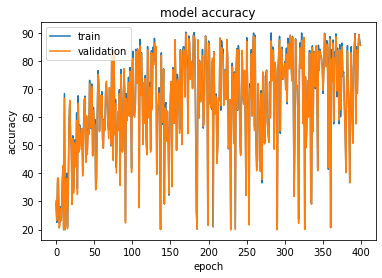

Maximum Train Accuracy : 90.19444274902344
Maximum Validation Accuracy : 89.66667175292969


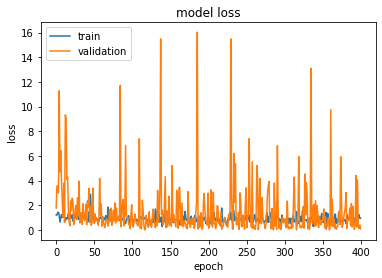

Minimum Train Loss : 0.2734580338001251
Minimum Validation Loss : 0.0034031460527330637


In [ ]:
Bacteria_model_phase_Adam_0001 = Bact_Net(batch_norm=True)
Bacteria_model_phase_Adam_0001.cuda()
trainer_Adam_phase_0001 = trainer(Bacteria_model_phase_Adam_0001, phase_train_loader,"Adam", epoch_size=400, learning_rate=0.001)
trainer_Adam_phase_0001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adam_phase_0001.history['train_acc'])
plt.plot(trainer_Adam_phase_0001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adam_phase_0001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adam_phase_0001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adam_phase_0001.history['train_loss'])
plt.plot(trainer_Adam_phase_0001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adam_phase_0001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adam_phase_0001.history['val_loss'])}")

#  Adagrad_0.01_400epoch

  0%|          | 0/400 [00:00<?, ?it/s]

Train Acc | Epoch 1/400 | ACC 29.277779


  0%|          | 1/400 [18:26<122:37:01, 1106.32s/it]

Val Acc | Epoch 1/400 | ACC 27.111113
Train Acc | Epoch 2/400 | ACC 54.138893


  0%|          | 2/400 [18:40<51:16:53, 463.85s/it]  

Val Acc | Epoch 2/400 | ACC 53.222221
Train Acc | Epoch 3/400 | ACC 54.166668


  1%|          | 3/400 [18:54<28:31:24, 258.65s/it]

Val Acc | Epoch 3/400 | ACC 53.888893
Train Acc | Epoch 4/400 | ACC 64.055557


  1%|          | 4/400 [19:09<17:49:59, 162.12s/it]

Val Acc | Epoch 4/400 | ACC 65.222221
Train Acc | Epoch 5/400 | ACC 65.833336


  1%|▏         | 5/400 [19:23<11:56:05, 108.77s/it]

Val Acc | Epoch 5/400 | ACC 63.555557
Train Acc | Epoch 6/400 | ACC 63.166664


  2%|▏         | 6/400 [19:37<8:23:06, 76.62s/it]  

Val Acc | Epoch 6/400 | ACC 61.222225
Train Acc | Epoch 7/400 | ACC 68.388893


  2%|▏         | 7/400 [19:51<6:08:16, 56.23s/it]

Val Acc | Epoch 7/400 | ACC 67.444443
Train Acc | Epoch 8/400 | ACC 67.000000


  2%|▏         | 8/400 [20:06<4:40:16, 42.90s/it]

Val Acc | Epoch 8/400 | ACC 66.222229
Train Acc | Epoch 9/400 | ACC 36.083336


  2%|▏         | 9/400 [20:20<3:41:52, 34.05s/it]

Val Acc | Epoch 9/400 | ACC 36.555557
Train Acc | Epoch 10/400 | ACC 75.500000


  2%|▎         | 10/400 [20:34<3:01:40, 27.95s/it]

Val Acc | Epoch 10/400 | ACC 76.111115
Train Acc | Epoch 11/400 | ACC 77.305557


  3%|▎         | 11/400 [20:49<2:34:54, 23.89s/it]

Val Acc | Epoch 11/400 | ACC 75.777779
Train Acc | Epoch 12/400 | ACC 78.916672


  3%|▎         | 12/400 [21:03<2:15:47, 21.00s/it]

Val Acc | Epoch 12/400 | ACC 77.222221
Train Acc | Epoch 13/400 | ACC 67.944443


  3%|▎         | 13/400 [21:18<2:02:40, 19.02s/it]

Val Acc | Epoch 13/400 | ACC 68.555557
Train Acc | Epoch 14/400 | ACC 80.027779


  4%|▎         | 14/400 [21:33<1:53:57, 17.71s/it]

Val Acc | Epoch 14/400 | ACC 80.111107
Train Acc | Epoch 15/400 | ACC 77.305557


  4%|▍         | 15/400 [21:47<1:46:33, 16.61s/it]

Val Acc | Epoch 15/400 | ACC 76.777779
Train Acc | Epoch 16/400 | ACC 80.833336


  4%|▍         | 16/400 [22:01<1:42:24, 16.00s/it]

Val Acc | Epoch 16/400 | ACC 78.777779
Train Acc | Epoch 17/400 | ACC 75.777779


  4%|▍         | 17/400 [22:16<1:38:46, 15.47s/it]

Val Acc | Epoch 17/400 | ACC 75.555557
Train Acc | Epoch 18/400 | ACC 79.500000


  4%|▍         | 18/400 [22:30<1:36:24, 15.14s/it]

Val Acc | Epoch 18/400 | ACC 78.777779
Train Acc | Epoch 19/400 | ACC 77.833336


  5%|▍         | 19/400 [22:44<1:34:25, 14.87s/it]

Val Acc | Epoch 19/400 | ACC 78.222229
Train Acc | Epoch 20/400 | ACC 82.972221


  5%|▌         | 20/400 [22:59<1:33:29, 14.76s/it]

Val Acc | Epoch 20/400 | ACC 80.555557
Train Acc | Epoch 21/400 | ACC 80.444450


  5%|▌         | 21/400 [23:13<1:32:53, 14.70s/it]

Val Acc | Epoch 21/400 | ACC 79.333336
Train Acc | Epoch 22/400 | ACC 83.888885


  6%|▌         | 22/400 [23:29<1:34:01, 14.92s/it]

Val Acc | Epoch 22/400 | ACC 83.111115
Train Acc | Epoch 23/400 | ACC 74.555557


  6%|▌         | 23/400 [23:43<1:33:14, 14.84s/it]

Val Acc | Epoch 23/400 | ACC 75.333336
Train Acc | Epoch 24/400 | ACC 82.361115


  6%|▌         | 24/400 [23:58<1:32:44, 14.80s/it]

Val Acc | Epoch 24/400 | ACC 81.333336
Train Acc | Epoch 25/400 | ACC 80.444450


  6%|▋         | 25/400 [24:13<1:32:01, 14.72s/it]

Val Acc | Epoch 25/400 | ACC 80.888893
Train Acc | Epoch 26/400 | ACC 85.000000


  6%|▋         | 26/400 [24:27<1:31:52, 14.74s/it]

Val Acc | Epoch 26/400 | ACC 83.555557
Train Acc | Epoch 27/400 | ACC 81.305557


  7%|▋         | 27/400 [24:42<1:31:08, 14.66s/it]

Val Acc | Epoch 27/400 | ACC 80.666664
Train Acc | Epoch 28/400 | ACC 85.111115


  7%|▋         | 28/400 [24:56<1:30:32, 14.60s/it]

Val Acc | Epoch 28/400 | ACC 83.666672
Train Acc | Epoch 29/400 | ACC 81.472221


  7%|▋         | 29/400 [25:11<1:29:47, 14.52s/it]

Val Acc | Epoch 29/400 | ACC 80.777779
Train Acc | Epoch 30/400 | ACC 78.972229


  8%|▊         | 30/400 [25:25<1:29:38, 14.54s/it]

Val Acc | Epoch 30/400 | ACC 76.111115
Train Acc | Epoch 31/400 | ACC 84.138885


  8%|▊         | 31/400 [25:40<1:29:06, 14.49s/it]

Val Acc | Epoch 31/400 | ACC 83.111115
Train Acc | Epoch 32/400 | ACC 84.277779


  8%|▊         | 32/400 [25:54<1:28:50, 14.49s/it]

Val Acc | Epoch 32/400 | ACC 82.555557
Train Acc | Epoch 33/400 | ACC 85.138893


  8%|▊         | 33/400 [26:08<1:28:24, 14.45s/it]

Val Acc | Epoch 33/400 | ACC 83.666672
Train Acc | Epoch 34/400 | ACC 84.138885


  8%|▊         | 34/400 [26:23<1:28:28, 14.50s/it]

Val Acc | Epoch 34/400 | ACC 83.333336
Train Acc | Epoch 35/400 | ACC 85.444443


  9%|▉         | 35/400 [26:37<1:27:54, 14.45s/it]

Val Acc | Epoch 35/400 | ACC 85.666672
Train Acc | Epoch 36/400 | ACC 84.750000


  9%|▉         | 36/400 [26:52<1:27:39, 14.45s/it]

Val Acc | Epoch 36/400 | ACC 83.000008
Train Acc | Epoch 37/400 | ACC 85.583336


  9%|▉         | 37/400 [27:06<1:27:28, 14.46s/it]

Val Acc | Epoch 37/400 | ACC 81.888893
Train Acc | Epoch 38/400 | ACC 84.805557


 10%|▉         | 38/400 [27:21<1:27:33, 14.51s/it]

Val Acc | Epoch 38/400 | ACC 83.555557
Train Acc | Epoch 39/400 | ACC 80.500000


 10%|▉         | 39/400 [27:35<1:27:17, 14.51s/it]

Val Acc | Epoch 39/400 | ACC 79.777779
Train Acc | Epoch 40/400 | ACC 84.694443


 10%|█         | 40/400 [27:50<1:27:21, 14.56s/it]

Val Acc | Epoch 40/400 | ACC 83.333336
Train Acc | Epoch 41/400 | ACC 84.861115


 10%|█         | 41/400 [28:05<1:27:09, 14.57s/it]

Val Acc | Epoch 41/400 | ACC 83.555557
Train Acc | Epoch 42/400 | ACC 85.250000


 10%|█         | 42/400 [28:19<1:26:02, 14.42s/it]

Val Acc | Epoch 42/400 | ACC 85.111115
Train Acc | Epoch 43/400 | ACC 83.472221


 11%|█         | 43/400 [28:34<1:26:49, 14.59s/it]

Val Acc | Epoch 43/400 | ACC 81.777779
Train Acc | Epoch 44/400 | ACC 85.888893


 11%|█         | 44/400 [28:48<1:26:46, 14.62s/it]

Val Acc | Epoch 44/400 | ACC 84.444443
Train Acc | Epoch 45/400 | ACC 86.250000


 11%|█▏        | 45/400 [29:03<1:26:12, 14.57s/it]

Val Acc | Epoch 45/400 | ACC 84.111115
Train Acc | Epoch 46/400 | ACC 85.083336


 12%|█▏        | 46/400 [29:18<1:26:03, 14.59s/it]

Val Acc | Epoch 46/400 | ACC 85.000000
Train Acc | Epoch 47/400 | ACC 85.416672


 12%|█▏        | 47/400 [29:32<1:25:54, 14.60s/it]

Val Acc | Epoch 47/400 | ACC 84.222221
Train Acc | Epoch 48/400 | ACC 85.527779


 12%|█▏        | 48/400 [29:47<1:25:31, 14.58s/it]

Val Acc | Epoch 48/400 | ACC 83.888885
Train Acc | Epoch 49/400 | ACC 85.861115


 12%|█▏        | 49/400 [30:01<1:24:54, 14.52s/it]

Val Acc | Epoch 49/400 | ACC 83.777779
Train Acc | Epoch 50/400 | ACC 85.305557


 12%|█▎        | 50/400 [30:16<1:25:08, 14.60s/it]

Val Acc | Epoch 50/400 | ACC 84.444443
Train Acc | Epoch 51/400 | ACC 86.027779


 13%|█▎        | 51/400 [30:30<1:24:53, 14.60s/it]

Val Acc | Epoch 51/400 | ACC 83.222221
Train Acc | Epoch 52/400 | ACC 86.000000


 13%|█▎        | 52/400 [30:45<1:24:28, 14.56s/it]

Val Acc | Epoch 52/400 | ACC 85.111115
Train Acc | Epoch 53/400 | ACC 85.305557


 13%|█▎        | 53/400 [30:59<1:23:45, 14.48s/it]

Val Acc | Epoch 53/400 | ACC 83.666672
Train Acc | Epoch 54/400 | ACC 86.416664


 14%|█▎        | 54/400 [31:14<1:23:40, 14.51s/it]

Val Acc | Epoch 54/400 | ACC 83.777779
Train Acc | Epoch 55/400 | ACC 84.361115


 14%|█▍        | 55/400 [31:28<1:23:35, 14.54s/it]

Val Acc | Epoch 55/400 | ACC 84.333336
Train Acc | Epoch 56/400 | ACC 86.388893


 14%|█▍        | 56/400 [31:43<1:23:45, 14.61s/it]

Val Acc | Epoch 56/400 | ACC 85.000000
Train Acc | Epoch 57/400 | ACC 86.055557


 14%|█▍        | 57/400 [31:58<1:23:23, 14.59s/it]

Val Acc | Epoch 57/400 | ACC 83.666672
Train Acc | Epoch 58/400 | ACC 86.472229


 14%|█▍        | 58/400 [32:12<1:23:06, 14.58s/it]

Val Acc | Epoch 58/400 | ACC 85.555557
Train Acc | Epoch 59/400 | ACC 86.944450


 15%|█▍        | 59/400 [32:27<1:22:22, 14.49s/it]

Val Acc | Epoch 59/400 | ACC 85.888893
Train Acc | Epoch 60/400 | ACC 84.583336


 15%|█▌        | 60/400 [32:41<1:21:52, 14.45s/it]

Val Acc | Epoch 60/400 | ACC 84.555557
Train Acc | Epoch 61/400 | ACC 87.111115


 15%|█▌        | 61/400 [32:55<1:21:15, 14.38s/it]

Val Acc | Epoch 61/400 | ACC 86.000000
Train Acc | Epoch 62/400 | ACC 86.527786


 16%|█▌        | 62/400 [33:09<1:20:46, 14.34s/it]

Val Acc | Epoch 62/400 | ACC 84.444443
Train Acc | Epoch 63/400 | ACC 85.944443


 16%|█▌        | 63/400 [33:24<1:21:29, 14.51s/it]

Val Acc | Epoch 63/400 | ACC 84.888893
Train Acc | Epoch 64/400 | ACC 86.111107


 16%|█▌        | 64/400 [33:39<1:21:55, 14.63s/it]

Val Acc | Epoch 64/400 | ACC 84.666672
Train Acc | Epoch 65/400 | ACC 86.361115


 16%|█▋        | 65/400 [33:54<1:22:30, 14.78s/it]

Val Acc | Epoch 65/400 | ACC 84.111115
Train Acc | Epoch 66/400 | ACC 86.527786


 16%|█▋        | 66/400 [34:09<1:22:17, 14.78s/it]

Val Acc | Epoch 66/400 | ACC 85.333336
Train Acc | Epoch 67/400 | ACC 81.444450


 17%|█▋        | 67/400 [34:24<1:21:54, 14.76s/it]

Val Acc | Epoch 67/400 | ACC 80.666664
Train Acc | Epoch 68/400 | ACC 87.000000


 17%|█▋        | 68/400 [34:38<1:21:21, 14.70s/it]

Val Acc | Epoch 68/400 | ACC 86.111107
Train Acc | Epoch 69/400 | ACC 86.333336


 17%|█▋        | 69/400 [34:53<1:20:39, 14.62s/it]

Val Acc | Epoch 69/400 | ACC 84.444443
Train Acc | Epoch 70/400 | ACC 86.888893


 18%|█▊        | 70/400 [35:07<1:19:51, 14.52s/it]

Val Acc | Epoch 70/400 | ACC 85.555557
Train Acc | Epoch 71/400 | ACC 87.472221


 18%|█▊        | 71/400 [35:22<1:19:48, 14.56s/it]

Val Acc | Epoch 71/400 | ACC 85.000000
Train Acc | Epoch 72/400 | ACC 87.083336


 18%|█▊        | 72/400 [35:36<1:19:22, 14.52s/it]

Val Acc | Epoch 72/400 | ACC 85.333336
Train Acc | Epoch 73/400 | ACC 86.777786


 18%|█▊        | 73/400 [35:51<1:19:08, 14.52s/it]

Val Acc | Epoch 73/400 | ACC 84.666672
Train Acc | Epoch 74/400 | ACC 86.583336


 18%|█▊        | 74/400 [36:05<1:18:19, 14.41s/it]

Val Acc | Epoch 74/400 | ACC 85.111115
Train Acc | Epoch 75/400 | ACC 87.083336


 19%|█▉        | 75/400 [36:19<1:18:19, 14.46s/it]

Val Acc | Epoch 75/400 | ACC 86.000000
Train Acc | Epoch 76/400 | ACC 87.166664


 19%|█▉        | 76/400 [36:34<1:18:08, 14.47s/it]

Val Acc | Epoch 76/400 | ACC 85.333336
Train Acc | Epoch 77/400 | ACC 87.083336


 19%|█▉        | 77/400 [36:49<1:18:07, 14.51s/it]

Val Acc | Epoch 77/400 | ACC 85.777779
Train Acc | Epoch 78/400 | ACC 88.111115


 20%|█▉        | 78/400 [37:03<1:17:53, 14.51s/it]

Val Acc | Epoch 78/400 | ACC 86.222229
Train Acc | Epoch 79/400 | ACC 87.944450


 20%|█▉        | 79/400 [37:18<1:17:49, 14.55s/it]

Val Acc | Epoch 79/400 | ACC 85.555557
Train Acc | Epoch 80/400 | ACC 87.583336


 20%|██        | 80/400 [37:32<1:17:26, 14.52s/it]

Val Acc | Epoch 80/400 | ACC 86.111107
Train Acc | Epoch 81/400 | ACC 87.527779


 20%|██        | 81/400 [37:47<1:17:06, 14.50s/it]

Val Acc | Epoch 81/400 | ACC 85.333336
Train Acc | Epoch 82/400 | ACC 87.444450


 20%|██        | 82/400 [38:01<1:16:44, 14.48s/it]

Val Acc | Epoch 82/400 | ACC 86.111107
Train Acc | Epoch 83/400 | ACC 87.333336


 21%|██        | 83/400 [38:16<1:16:46, 14.53s/it]

Val Acc | Epoch 83/400 | ACC 85.111115
Train Acc | Epoch 84/400 | ACC 87.416664


 21%|██        | 84/400 [38:30<1:16:48, 14.58s/it]

Val Acc | Epoch 84/400 | ACC 86.555557
Train Acc | Epoch 85/400 | ACC 87.222221


 21%|██▏       | 85/400 [38:45<1:16:23, 14.55s/it]

Val Acc | Epoch 85/400 | ACC 86.111107
Train Acc | Epoch 86/400 | ACC 88.666672


 22%|██▏       | 86/400 [39:00<1:16:56, 14.70s/it]

Val Acc | Epoch 86/400 | ACC 85.666672
Train Acc | Epoch 87/400 | ACC 88.111115


 22%|██▏       | 87/400 [39:15<1:16:37, 14.69s/it]

Val Acc | Epoch 87/400 | ACC 87.111115
Train Acc | Epoch 88/400 | ACC 87.444450


 22%|██▏       | 88/400 [39:30<1:16:50, 14.78s/it]

Val Acc | Epoch 88/400 | ACC 86.000000
Train Acc | Epoch 89/400 | ACC 88.111115


 22%|██▏       | 89/400 [39:44<1:16:35, 14.78s/it]

Val Acc | Epoch 89/400 | ACC 87.111115
Train Acc | Epoch 90/400 | ACC 87.500000


 22%|██▎       | 90/400 [39:59<1:16:02, 14.72s/it]

Val Acc | Epoch 90/400 | ACC 85.555557
Train Acc | Epoch 91/400 | ACC 88.166664


 23%|██▎       | 91/400 [40:14<1:15:42, 14.70s/it]

Val Acc | Epoch 91/400 | ACC 86.333336
Train Acc | Epoch 92/400 | ACC 87.888893


 23%|██▎       | 92/400 [40:28<1:14:38, 14.54s/it]

Val Acc | Epoch 92/400 | ACC 86.666664
Train Acc | Epoch 93/400 | ACC 87.944450


 23%|██▎       | 93/400 [40:42<1:13:53, 14.44s/it]

Val Acc | Epoch 93/400 | ACC 87.444450
Train Acc | Epoch 94/400 | ACC 87.138893


 24%|██▎       | 94/400 [40:56<1:13:11, 14.35s/it]

Val Acc | Epoch 94/400 | ACC 86.444450
Train Acc | Epoch 95/400 | ACC 87.861115


 24%|██▍       | 95/400 [41:11<1:13:07, 14.39s/it]

Val Acc | Epoch 95/400 | ACC 85.666672
Train Acc | Epoch 96/400 | ACC 88.138893


 24%|██▍       | 96/400 [41:25<1:12:53, 14.39s/it]

Val Acc | Epoch 96/400 | ACC 86.777786
Train Acc | Epoch 97/400 | ACC 87.416664


 24%|██▍       | 97/400 [41:39<1:12:06, 14.28s/it]

Val Acc | Epoch 97/400 | ACC 84.666672
Train Acc | Epoch 98/400 | ACC 88.111115


 24%|██▍       | 98/400 [41:53<1:11:43, 14.25s/it]

Val Acc | Epoch 98/400 | ACC 86.444450
Train Acc | Epoch 99/400 | ACC 88.361115


 25%|██▍       | 99/400 [42:08<1:11:42, 14.29s/it]

Val Acc | Epoch 99/400 | ACC 86.444450
Train Acc | Epoch 100/400 | ACC 87.750000


 25%|██▌       | 100/400 [42:22<1:11:20, 14.27s/it]

Val Acc | Epoch 100/400 | ACC 88.000000
Train Acc | Epoch 101/400 | ACC 85.666672


 25%|██▌       | 101/400 [42:36<1:11:08, 14.28s/it]

Val Acc | Epoch 101/400 | ACC 86.555557
Train Acc | Epoch 102/400 | ACC 88.222221


 26%|██▌       | 102/400 [42:50<1:10:48, 14.26s/it]

Val Acc | Epoch 102/400 | ACC 86.555557
Train Acc | Epoch 103/400 | ACC 87.666664


 26%|██▌       | 103/400 [43:04<1:10:02, 14.15s/it]

Val Acc | Epoch 103/400 | ACC 87.777779
Train Acc | Epoch 104/400 | ACC 88.500008


 26%|██▌       | 104/400 [43:18<1:09:46, 14.14s/it]

Val Acc | Epoch 104/400 | ACC 88.222221
Train Acc | Epoch 105/400 | ACC 88.111115


 26%|██▋       | 105/400 [43:32<1:09:26, 14.12s/it]

Val Acc | Epoch 105/400 | ACC 87.222221
Train Acc | Epoch 106/400 | ACC 87.750000


 26%|██▋       | 106/400 [43:46<1:09:13, 14.13s/it]

Val Acc | Epoch 106/400 | ACC 86.333336
Train Acc | Epoch 107/400 | ACC 87.777779


 27%|██▋       | 107/400 [44:01<1:09:44, 14.28s/it]

Val Acc | Epoch 107/400 | ACC 87.333336
Train Acc | Epoch 108/400 | ACC 86.527786


 27%|██▋       | 108/400 [44:16<1:09:44, 14.33s/it]

Val Acc | Epoch 108/400 | ACC 84.222221
Train Acc | Epoch 109/400 | ACC 87.833336


 27%|██▋       | 109/400 [44:30<1:09:26, 14.32s/it]

Val Acc | Epoch 109/400 | ACC 87.777779
Train Acc | Epoch 110/400 | ACC 88.361115


 28%|██▊       | 110/400 [44:44<1:09:09, 14.31s/it]

Val Acc | Epoch 110/400 | ACC 86.444450
Train Acc | Epoch 111/400 | ACC 88.027779


 28%|██▊       | 111/400 [44:58<1:08:50, 14.29s/it]

Val Acc | Epoch 111/400 | ACC 87.000000
Train Acc | Epoch 112/400 | ACC 88.500008


 28%|██▊       | 112/400 [45:12<1:08:13, 14.21s/it]

Val Acc | Epoch 112/400 | ACC 86.777786
Train Acc | Epoch 113/400 | ACC 88.222221


 28%|██▊       | 113/400 [45:26<1:07:25, 14.10s/it]

Val Acc | Epoch 113/400 | ACC 87.333336
Train Acc | Epoch 114/400 | ACC 88.833336


 28%|██▊       | 114/400 [45:40<1:07:24, 14.14s/it]

Val Acc | Epoch 114/400 | ACC 86.888893
Train Acc | Epoch 115/400 | ACC 88.694450


 29%|██▉       | 115/400 [45:55<1:07:34, 14.23s/it]

Val Acc | Epoch 115/400 | ACC 86.777786
Train Acc | Epoch 116/400 | ACC 87.694450


 29%|██▉       | 116/400 [46:09<1:07:09, 14.19s/it]

Val Acc | Epoch 116/400 | ACC 86.666664
Train Acc | Epoch 117/400 | ACC 88.388893


 29%|██▉       | 117/400 [46:23<1:06:53, 14.18s/it]

Val Acc | Epoch 117/400 | ACC 86.333336
Train Acc | Epoch 118/400 | ACC 88.111115


 30%|██▉       | 118/400 [46:37<1:06:42, 14.19s/it]

Val Acc | Epoch 118/400 | ACC 86.333336
Train Acc | Epoch 119/400 | ACC 88.527779


 30%|██▉       | 119/400 [46:51<1:06:03, 14.10s/it]

Val Acc | Epoch 119/400 | ACC 86.333336
Train Acc | Epoch 120/400 | ACC 88.555557


 30%|███       | 120/400 [47:05<1:05:40, 14.07s/it]

Val Acc | Epoch 120/400 | ACC 87.444450
Train Acc | Epoch 121/400 | ACC 88.750008


 30%|███       | 121/400 [47:19<1:05:24, 14.07s/it]

Val Acc | Epoch 121/400 | ACC 85.777779
Train Acc | Epoch 122/400 | ACC 87.694450


 30%|███       | 122/400 [47:34<1:05:22, 14.11s/it]

Val Acc | Epoch 122/400 | ACC 86.222229
Train Acc | Epoch 123/400 | ACC 88.138893


 31%|███       | 123/400 [47:47<1:04:42, 14.02s/it]

Val Acc | Epoch 123/400 | ACC 87.555557
Train Acc | Epoch 124/400 | ACC 88.000000


 31%|███       | 124/400 [48:01<1:04:07, 13.94s/it]

Val Acc | Epoch 124/400 | ACC 86.888893
Train Acc | Epoch 125/400 | ACC 88.083336


 31%|███▏      | 125/400 [48:15<1:03:48, 13.92s/it]

Val Acc | Epoch 125/400 | ACC 85.555557
Train Acc | Epoch 126/400 | ACC 88.527779


 32%|███▏      | 126/400 [48:29<1:03:41, 13.95s/it]

Val Acc | Epoch 126/400 | ACC 86.888893
Train Acc | Epoch 127/400 | ACC 88.472221


 32%|███▏      | 127/400 [48:43<1:03:24, 13.94s/it]

Val Acc | Epoch 127/400 | ACC 87.000000
Train Acc | Epoch 128/400 | ACC 88.888893


 32%|███▏      | 128/400 [48:57<1:03:25, 13.99s/it]

Val Acc | Epoch 128/400 | ACC 86.000000
Train Acc | Epoch 129/400 | ACC 88.555557


 32%|███▏      | 129/400 [49:11<1:03:19, 14.02s/it]

Val Acc | Epoch 129/400 | ACC 89.111115
Train Acc | Epoch 130/400 | ACC 88.083336


 32%|███▎      | 130/400 [49:26<1:03:35, 14.13s/it]

Val Acc | Epoch 130/400 | ACC 87.222221
Train Acc | Epoch 131/400 | ACC 88.611115


 33%|███▎      | 131/400 [49:39<1:03:02, 14.06s/it]

Val Acc | Epoch 131/400 | ACC 87.888893
Train Acc | Epoch 132/400 | ACC 88.416672


 33%|███▎      | 132/400 [49:54<1:02:51, 14.07s/it]

Val Acc | Epoch 132/400 | ACC 87.333336
Train Acc | Epoch 133/400 | ACC 88.944450


 33%|███▎      | 133/400 [50:07<1:02:20, 14.01s/it]

Val Acc | Epoch 133/400 | ACC 88.111115
Train Acc | Epoch 134/400 | ACC 87.833336


 34%|███▎      | 134/400 [50:21<1:01:41, 13.92s/it]

Val Acc | Epoch 134/400 | ACC 85.666672
Train Acc | Epoch 135/400 | ACC 89.083336


 34%|███▍      | 135/400 [50:35<1:01:48, 13.99s/it]

Val Acc | Epoch 135/400 | ACC 87.444450
Train Acc | Epoch 136/400 | ACC 87.194450


 34%|███▍      | 136/400 [50:49<1:01:50, 14.06s/it]

Val Acc | Epoch 136/400 | ACC 85.666672
Train Acc | Epoch 137/400 | ACC 88.194450


 34%|███▍      | 137/400 [51:04<1:01:55, 14.13s/it]

Val Acc | Epoch 137/400 | ACC 86.111107
Train Acc | Epoch 138/400 | ACC 89.111115


 34%|███▍      | 138/400 [51:18<1:02:00, 14.20s/it]

Val Acc | Epoch 138/400 | ACC 87.222221
Train Acc | Epoch 139/400 | ACC 88.500008


 35%|███▍      | 139/400 [51:32<1:01:13, 14.07s/it]

Val Acc | Epoch 139/400 | ACC 87.111115
Train Acc | Epoch 140/400 | ACC 88.694450


 35%|███▌      | 140/400 [51:46<1:00:50, 14.04s/it]

Val Acc | Epoch 140/400 | ACC 86.888893
Train Acc | Epoch 141/400 | ACC 88.527779


 35%|███▌      | 141/400 [52:00<1:00:22, 13.99s/it]

Val Acc | Epoch 141/400 | ACC 87.000000
Train Acc | Epoch 142/400 | ACC 88.138893


 36%|███▌      | 142/400 [52:14<1:00:11, 14.00s/it]

Val Acc | Epoch 142/400 | ACC 86.555557
Train Acc | Epoch 143/400 | ACC 88.777779


 36%|███▌      | 143/400 [52:28<1:00:01, 14.01s/it]

Val Acc | Epoch 143/400 | ACC 87.111115
Train Acc | Epoch 144/400 | ACC 88.527779


 36%|███▌      | 144/400 [52:42<1:00:09, 14.10s/it]

Val Acc | Epoch 144/400 | ACC 87.111115
Train Acc | Epoch 145/400 | ACC 88.972221


 36%|███▋      | 145/400 [52:56<59:38, 14.03s/it]  

Val Acc | Epoch 145/400 | ACC 87.111115
Train Acc | Epoch 146/400 | ACC 88.361115


 36%|███▋      | 146/400 [53:10<59:05, 13.96s/it]

Val Acc | Epoch 146/400 | ACC 86.888893
Train Acc | Epoch 147/400 | ACC 88.444450


 37%|███▋      | 147/400 [53:24<59:10, 14.03s/it]

Val Acc | Epoch 147/400 | ACC 86.222229
Train Acc | Epoch 148/400 | ACC 89.027779


 37%|███▋      | 148/400 [53:38<59:01, 14.05s/it]

Val Acc | Epoch 148/400 | ACC 87.888893
Train Acc | Epoch 149/400 | ACC 88.833336


 37%|███▋      | 149/400 [53:52<59:10, 14.15s/it]

Val Acc | Epoch 149/400 | ACC 87.333336
Train Acc | Epoch 150/400 | ACC 88.861115


 38%|███▊      | 150/400 [54:06<58:37, 14.07s/it]

Val Acc | Epoch 150/400 | ACC 87.444450
Train Acc | Epoch 151/400 | ACC 86.694450


 38%|███▊      | 151/400 [54:21<58:37, 14.13s/it]

Val Acc | Epoch 151/400 | ACC 85.777779
Train Acc | Epoch 152/400 | ACC 89.111115


 38%|███▊      | 152/400 [54:35<58:52, 14.24s/it]

Val Acc | Epoch 152/400 | ACC 87.444450
Train Acc | Epoch 153/400 | ACC 88.972221


 38%|███▊      | 153/400 [54:49<58:39, 14.25s/it]

Val Acc | Epoch 153/400 | ACC 87.333336
Train Acc | Epoch 154/400 | ACC 88.722221


 38%|███▊      | 154/400 [55:03<58:06, 14.17s/it]

Val Acc | Epoch 154/400 | ACC 88.111115
Train Acc | Epoch 155/400 | ACC 88.055557


 39%|███▉      | 155/400 [55:17<57:29, 14.08s/it]

Val Acc | Epoch 155/400 | ACC 87.555557
Train Acc | Epoch 156/400 | ACC 89.750000


 39%|███▉      | 156/400 [55:31<56:54, 13.99s/it]

Val Acc | Epoch 156/400 | ACC 88.111115
Train Acc | Epoch 157/400 | ACC 88.777779


 39%|███▉      | 157/400 [55:45<56:03, 13.84s/it]

Val Acc | Epoch 157/400 | ACC 86.333336
Train Acc | Epoch 158/400 | ACC 88.861115


 40%|███▉      | 158/400 [55:59<56:21, 13.97s/it]

Val Acc | Epoch 158/400 | ACC 87.888893
Train Acc | Epoch 159/400 | ACC 88.722221


 40%|███▉      | 159/400 [56:13<55:53, 13.91s/it]

Val Acc | Epoch 159/400 | ACC 87.000000
Train Acc | Epoch 160/400 | ACC 88.861115


 40%|████      | 160/400 [56:26<55:32, 13.88s/it]

Val Acc | Epoch 160/400 | ACC 87.666664
Train Acc | Epoch 161/400 | ACC 89.000008


 40%|████      | 161/400 [56:40<55:01, 13.81s/it]

Val Acc | Epoch 161/400 | ACC 87.111115
Train Acc | Epoch 162/400 | ACC 89.333336


 40%|████      | 162/400 [56:54<55:10, 13.91s/it]

Val Acc | Epoch 162/400 | ACC 87.333336
Train Acc | Epoch 163/400 | ACC 89.138885


 41%|████      | 163/400 [57:08<54:43, 13.85s/it]

Val Acc | Epoch 163/400 | ACC 86.666664
Train Acc | Epoch 164/400 | ACC 88.861115


 41%|████      | 164/400 [57:22<54:37, 13.89s/it]

Val Acc | Epoch 164/400 | ACC 87.000000
Train Acc | Epoch 165/400 | ACC 88.833336


 41%|████▏     | 165/400 [57:36<54:22, 13.88s/it]

Val Acc | Epoch 165/400 | ACC 87.111115
Train Acc | Epoch 166/400 | ACC 88.305557


 42%|████▏     | 166/400 [57:50<54:09, 13.88s/it]

Val Acc | Epoch 166/400 | ACC 87.222221
Train Acc | Epoch 167/400 | ACC 88.694450


 42%|████▏     | 167/400 [58:04<54:09, 13.95s/it]

Val Acc | Epoch 167/400 | ACC 87.777779
Train Acc | Epoch 168/400 | ACC 89.083336


 42%|████▏     | 168/400 [58:17<53:35, 13.86s/it]

Val Acc | Epoch 168/400 | ACC 88.000000
Train Acc | Epoch 169/400 | ACC 88.805557


 42%|████▏     | 169/400 [58:31<53:10, 13.81s/it]

Val Acc | Epoch 169/400 | ACC 87.555557
Train Acc | Epoch 170/400 | ACC 89.500008


 42%|████▎     | 170/400 [58:45<52:48, 13.78s/it]

Val Acc | Epoch 170/400 | ACC 89.222221
Train Acc | Epoch 171/400 | ACC 89.361115


 43%|████▎     | 171/400 [58:59<52:42, 13.81s/it]

Val Acc | Epoch 171/400 | ACC 87.777779
Train Acc | Epoch 172/400 | ACC 88.944450


 43%|████▎     | 172/400 [59:12<52:05, 13.71s/it]

Val Acc | Epoch 172/400 | ACC 87.444450
Train Acc | Epoch 173/400 | ACC 88.027779


 43%|████▎     | 173/400 [59:26<51:53, 13.72s/it]

Val Acc | Epoch 173/400 | ACC 86.333336
Train Acc | Epoch 174/400 | ACC 88.777779


 44%|████▎     | 174/400 [59:40<52:23, 13.91s/it]

Val Acc | Epoch 174/400 | ACC 87.222221
Train Acc | Epoch 175/400 | ACC 88.666672


 44%|████▍     | 175/400 [59:54<52:03, 13.88s/it]

Val Acc | Epoch 175/400 | ACC 87.888893
Train Acc | Epoch 176/400 | ACC 89.222221


 44%|████▍     | 176/400 [1:00:08<52:08, 13.97s/it]

Val Acc | Epoch 176/400 | ACC 88.444450
Train Acc | Epoch 177/400 | ACC 88.972221


 44%|████▍     | 177/400 [1:00:22<51:42, 13.91s/it]

Val Acc | Epoch 177/400 | ACC 87.111115
Train Acc | Epoch 178/400 | ACC 89.222221


 44%|████▍     | 178/400 [1:00:36<51:21, 13.88s/it]

Val Acc | Epoch 178/400 | ACC 87.777779
Train Acc | Epoch 179/400 | ACC 89.083336


 45%|████▍     | 179/400 [1:00:50<51:16, 13.92s/it]

Val Acc | Epoch 179/400 | ACC 87.777779
Train Acc | Epoch 180/400 | ACC 89.222221


 45%|████▌     | 180/400 [1:01:03<50:42, 13.83s/it]

Val Acc | Epoch 180/400 | ACC 85.888893
Train Acc | Epoch 181/400 | ACC 87.555557


 45%|████▌     | 181/400 [1:01:17<50:18, 13.78s/it]

Val Acc | Epoch 181/400 | ACC 86.111107
Train Acc | Epoch 182/400 | ACC 89.083336


 46%|████▌     | 182/400 [1:01:31<50:11, 13.81s/it]

Val Acc | Epoch 182/400 | ACC 87.555557
Train Acc | Epoch 183/400 | ACC 88.972221


 46%|████▌     | 183/400 [1:01:45<50:37, 14.00s/it]

Val Acc | Epoch 183/400 | ACC 88.444450
Train Acc | Epoch 184/400 | ACC 89.333336


 46%|████▌     | 184/400 [1:02:00<50:38, 14.07s/it]

Val Acc | Epoch 184/400 | ACC 87.777779
Train Acc | Epoch 185/400 | ACC 88.611115


 46%|████▋     | 185/400 [1:02:14<50:34, 14.11s/it]

Val Acc | Epoch 185/400 | ACC 86.777786
Train Acc | Epoch 186/400 | ACC 89.250008


 46%|████▋     | 186/400 [1:02:28<50:14, 14.09s/it]

Val Acc | Epoch 186/400 | ACC 88.222221
Train Acc | Epoch 187/400 | ACC 88.833336


 47%|████▋     | 187/400 [1:02:42<49:53, 14.06s/it]

Val Acc | Epoch 187/400 | ACC 87.666664
Train Acc | Epoch 188/400 | ACC 88.722221


 47%|████▋     | 188/400 [1:02:56<49:42, 14.07s/it]

Val Acc | Epoch 188/400 | ACC 87.888893
Train Acc | Epoch 189/400 | ACC 89.055557


 47%|████▋     | 189/400 [1:03:10<48:59, 13.93s/it]

Val Acc | Epoch 189/400 | ACC 88.444450
Train Acc | Epoch 190/400 | ACC 89.166672


 48%|████▊     | 190/400 [1:03:24<48:47, 13.94s/it]

Val Acc | Epoch 190/400 | ACC 87.222221
Train Acc | Epoch 191/400 | ACC 87.777779


 48%|████▊     | 191/400 [1:03:37<48:34, 13.94s/it]

Val Acc | Epoch 191/400 | ACC 87.111115
Train Acc | Epoch 192/400 | ACC 89.166672


 48%|████▊     | 192/400 [1:03:52<48:26, 13.97s/it]

Val Acc | Epoch 192/400 | ACC 86.222229
Train Acc | Epoch 193/400 | ACC 88.833336


 48%|████▊     | 193/400 [1:04:05<47:59, 13.91s/it]

Val Acc | Epoch 193/400 | ACC 87.888893
Train Acc | Epoch 194/400 | ACC 89.500008


 48%|████▊     | 194/400 [1:04:19<47:47, 13.92s/it]

Val Acc | Epoch 194/400 | ACC 87.888893
Train Acc | Epoch 195/400 | ACC 88.027779


 49%|████▉     | 195/400 [1:04:33<47:32, 13.91s/it]

Val Acc | Epoch 195/400 | ACC 86.777786
Train Acc | Epoch 196/400 | ACC 89.638885


 49%|████▉     | 196/400 [1:04:47<47:30, 13.97s/it]

Val Acc | Epoch 196/400 | ACC 87.444450
Train Acc | Epoch 197/400 | ACC 89.500008


 49%|████▉     | 197/400 [1:05:01<47:11, 13.95s/it]

Val Acc | Epoch 197/400 | ACC 87.777779
Train Acc | Epoch 198/400 | ACC 88.583336


 50%|████▉     | 198/400 [1:05:15<47:07, 14.00s/it]

Val Acc | Epoch 198/400 | ACC 88.333336
Train Acc | Epoch 199/400 | ACC 88.888893


 50%|████▉     | 199/400 [1:05:29<46:43, 13.95s/it]

Val Acc | Epoch 199/400 | ACC 87.777779
Train Acc | Epoch 200/400 | ACC 88.583336


 50%|█████     | 200/400 [1:05:43<46:19, 13.90s/it]

Val Acc | Epoch 200/400 | ACC 86.555557
Train Acc | Epoch 201/400 | ACC 89.361115


 50%|█████     | 201/400 [1:05:57<45:56, 13.85s/it]

Val Acc | Epoch 201/400 | ACC 87.666664
Train Acc | Epoch 202/400 | ACC 88.333336


 50%|█████     | 202/400 [1:06:10<45:35, 13.82s/it]

Val Acc | Epoch 202/400 | ACC 86.111107
Train Acc | Epoch 203/400 | ACC 89.527779


 51%|█████     | 203/400 [1:06:24<45:20, 13.81s/it]

Val Acc | Epoch 203/400 | ACC 87.444450
Train Acc | Epoch 204/400 | ACC 89.416672


 51%|█████     | 204/400 [1:06:38<45:19, 13.88s/it]

Val Acc | Epoch 204/400 | ACC 87.444450
Train Acc | Epoch 205/400 | ACC 89.722221


 51%|█████▏    | 205/400 [1:06:52<45:20, 13.95s/it]

Val Acc | Epoch 205/400 | ACC 88.888893
Train Acc | Epoch 206/400 | ACC 89.111115


 52%|█████▏    | 206/400 [1:07:06<44:59, 13.91s/it]

Val Acc | Epoch 206/400 | ACC 88.333336
Train Acc | Epoch 207/400 | ACC 89.083336


 52%|█████▏    | 207/400 [1:07:20<44:54, 13.96s/it]

Val Acc | Epoch 207/400 | ACC 86.777786
Train Acc | Epoch 208/400 | ACC 89.888885


 52%|█████▏    | 208/400 [1:07:34<44:36, 13.94s/it]

Val Acc | Epoch 208/400 | ACC 86.777786
Train Acc | Epoch 209/400 | ACC 89.500008


 52%|█████▏    | 209/400 [1:07:47<43:44, 13.74s/it]

Val Acc | Epoch 209/400 | ACC 87.333336
Train Acc | Epoch 210/400 | ACC 89.361115


 52%|█████▎    | 210/400 [1:08:01<43:25, 13.71s/it]

Val Acc | Epoch 210/400 | ACC 86.888893
Train Acc | Epoch 211/400 | ACC 89.944443


 53%|█████▎    | 211/400 [1:08:15<43:09, 13.70s/it]

Val Acc | Epoch 211/400 | ACC 87.333336
Train Acc | Epoch 212/400 | ACC 89.611115


 53%|█████▎    | 212/400 [1:08:28<42:55, 13.70s/it]

Val Acc | Epoch 212/400 | ACC 88.000000
Train Acc | Epoch 213/400 | ACC 89.750000


 53%|█████▎    | 213/400 [1:08:42<42:49, 13.74s/it]

Val Acc | Epoch 213/400 | ACC 88.555557
Train Acc | Epoch 214/400 | ACC 89.277779


 54%|█████▎    | 214/400 [1:08:56<42:39, 13.76s/it]

Val Acc | Epoch 214/400 | ACC 88.333336
Train Acc | Epoch 215/400 | ACC 89.444443


 54%|█████▍    | 215/400 [1:09:10<42:29, 13.78s/it]

Val Acc | Epoch 215/400 | ACC 86.888893
Train Acc | Epoch 216/400 | ACC 89.722221


 54%|█████▍    | 216/400 [1:09:24<42:11, 13.76s/it]

Val Acc | Epoch 216/400 | ACC 87.444450
Train Acc | Epoch 217/400 | ACC 89.500008


 54%|█████▍    | 217/400 [1:09:37<41:51, 13.72s/it]

Val Acc | Epoch 217/400 | ACC 87.777779
Train Acc | Epoch 218/400 | ACC 89.888885


 55%|█████▍    | 218/400 [1:09:51<42:04, 13.87s/it]

Val Acc | Epoch 218/400 | ACC 87.333336
Train Acc | Epoch 219/400 | ACC 89.944443


 55%|█████▍    | 219/400 [1:10:06<42:06, 13.96s/it]

Val Acc | Epoch 219/400 | ACC 88.222221
Train Acc | Epoch 220/400 | ACC 89.388885


 55%|█████▌    | 220/400 [1:10:19<41:49, 13.94s/it]

Val Acc | Epoch 220/400 | ACC 86.777786
Train Acc | Epoch 221/400 | ACC 89.472221


 55%|█████▌    | 221/400 [1:10:33<41:29, 13.91s/it]

Val Acc | Epoch 221/400 | ACC 88.444450
Train Acc | Epoch 222/400 | ACC 88.472221


 56%|█████▌    | 222/400 [1:10:47<41:10, 13.88s/it]

Val Acc | Epoch 222/400 | ACC 86.555557
Train Acc | Epoch 223/400 | ACC 88.777779


 56%|█████▌    | 223/400 [1:11:01<40:51, 13.85s/it]

Val Acc | Epoch 223/400 | ACC 87.333336
Train Acc | Epoch 224/400 | ACC 89.805557


 56%|█████▌    | 224/400 [1:11:15<40:37, 13.85s/it]

Val Acc | Epoch 224/400 | ACC 88.222221
Train Acc | Epoch 225/400 | ACC 90.166672


 56%|█████▋    | 225/400 [1:11:29<40:26, 13.86s/it]

Val Acc | Epoch 225/400 | ACC 88.000000
Train Acc | Epoch 226/400 | ACC 89.583336


 56%|█████▋    | 226/400 [1:11:42<40:07, 13.83s/it]

Val Acc | Epoch 226/400 | ACC 87.777779
Train Acc | Epoch 227/400 | ACC 89.750000


 57%|█████▋    | 227/400 [1:11:56<39:43, 13.78s/it]

Val Acc | Epoch 227/400 | ACC 87.222221
Train Acc | Epoch 228/400 | ACC 89.388885


 57%|█████▋    | 228/400 [1:12:10<39:25, 13.75s/it]

Val Acc | Epoch 228/400 | ACC 87.111115
Train Acc | Epoch 229/400 | ACC 89.500008


 57%|█████▋    | 229/400 [1:12:23<39:01, 13.70s/it]

Val Acc | Epoch 229/400 | ACC 88.555557
Train Acc | Epoch 230/400 | ACC 88.972221


 57%|█████▊    | 230/400 [1:12:37<38:45, 13.68s/it]

Val Acc | Epoch 230/400 | ACC 88.111115
Train Acc | Epoch 231/400 | ACC 89.777779


 58%|█████▊    | 231/400 [1:12:50<38:09, 13.55s/it]

Val Acc | Epoch 231/400 | ACC 88.000000
Train Acc | Epoch 232/400 | ACC 89.444443


 58%|█████▊    | 232/400 [1:13:04<38:09, 13.63s/it]

Val Acc | Epoch 232/400 | ACC 87.666664
Train Acc | Epoch 233/400 | ACC 89.222221


 58%|█████▊    | 233/400 [1:13:18<38:04, 13.68s/it]

Val Acc | Epoch 233/400 | ACC 87.333336
Train Acc | Epoch 234/400 | ACC 89.694443


 58%|█████▊    | 234/400 [1:13:31<37:44, 13.64s/it]

Val Acc | Epoch 234/400 | ACC 88.000000
Train Acc | Epoch 235/400 | ACC 89.638885


 59%|█████▉    | 235/400 [1:13:45<37:24, 13.60s/it]

Val Acc | Epoch 235/400 | ACC 87.222221
Train Acc | Epoch 236/400 | ACC 89.583336


 59%|█████▉    | 236/400 [1:13:59<37:29, 13.72s/it]

Val Acc | Epoch 236/400 | ACC 88.222221
Train Acc | Epoch 237/400 | ACC 89.722221


 59%|█████▉    | 237/400 [1:14:13<37:25, 13.78s/it]

Val Acc | Epoch 237/400 | ACC 87.111115
Train Acc | Epoch 238/400 | ACC 89.305557


 60%|█████▉    | 238/400 [1:14:26<36:59, 13.70s/it]

Val Acc | Epoch 238/400 | ACC 87.222221
Train Acc | Epoch 239/400 | ACC 88.888893


 60%|█████▉    | 239/400 [1:14:40<36:51, 13.74s/it]

Val Acc | Epoch 239/400 | ACC 86.111107
Train Acc | Epoch 240/400 | ACC 89.111115


 60%|██████    | 240/400 [1:14:54<36:32, 13.70s/it]

Val Acc | Epoch 240/400 | ACC 87.555557
Train Acc | Epoch 241/400 | ACC 89.388885


 60%|██████    | 241/400 [1:15:08<36:47, 13.88s/it]

Val Acc | Epoch 241/400 | ACC 89.111115
Train Acc | Epoch 242/400 | ACC 89.166672


 60%|██████    | 242/400 [1:15:22<36:46, 13.96s/it]

Val Acc | Epoch 242/400 | ACC 87.333336
Train Acc | Epoch 243/400 | ACC 89.944443


 61%|██████    | 243/400 [1:15:36<36:21, 13.90s/it]

Val Acc | Epoch 243/400 | ACC 87.555557
Train Acc | Epoch 244/400 | ACC 89.500008


 61%|██████    | 244/400 [1:15:50<36:02, 13.86s/it]

Val Acc | Epoch 244/400 | ACC 88.000000
Train Acc | Epoch 245/400 | ACC 89.638885


 61%|██████▏   | 245/400 [1:16:04<35:45, 13.84s/it]

Val Acc | Epoch 245/400 | ACC 87.777779
Train Acc | Epoch 246/400 | ACC 89.138885


 62%|██████▏   | 246/400 [1:16:17<35:29, 13.83s/it]

Val Acc | Epoch 246/400 | ACC 87.444450
Train Acc | Epoch 247/400 | ACC 89.305557


 62%|██████▏   | 247/400 [1:16:31<35:23, 13.88s/it]

Val Acc | Epoch 247/400 | ACC 87.777779
Train Acc | Epoch 248/400 | ACC 89.833336


 62%|██████▏   | 248/400 [1:16:45<35:03, 13.84s/it]

Val Acc | Epoch 248/400 | ACC 87.666664
Train Acc | Epoch 249/400 | ACC 90.111115


 62%|██████▏   | 249/400 [1:16:59<34:49, 13.84s/it]

Val Acc | Epoch 249/400 | ACC 88.444450
Train Acc | Epoch 250/400 | ACC 89.500008


 62%|██████▎   | 250/400 [1:17:12<34:23, 13.76s/it]

Val Acc | Epoch 250/400 | ACC 87.666664
Train Acc | Epoch 251/400 | ACC 89.361115


 63%|██████▎   | 251/400 [1:17:26<34:06, 13.73s/it]

Val Acc | Epoch 251/400 | ACC 87.555557
Train Acc | Epoch 252/400 | ACC 89.583336


 63%|██████▎   | 252/400 [1:17:40<33:54, 13.74s/it]

Val Acc | Epoch 252/400 | ACC 87.777779
Train Acc | Epoch 253/400 | ACC 89.611115


 63%|██████▎   | 253/400 [1:17:54<33:47, 13.79s/it]

Val Acc | Epoch 253/400 | ACC 88.000000
Train Acc | Epoch 254/400 | ACC 90.194443


 64%|██████▎   | 254/400 [1:18:08<33:37, 13.82s/it]

Val Acc | Epoch 254/400 | ACC 89.000008
Train Acc | Epoch 255/400 | ACC 89.361115


 64%|██████▍   | 255/400 [1:18:21<33:12, 13.74s/it]

Val Acc | Epoch 255/400 | ACC 87.333336
Train Acc | Epoch 256/400 | ACC 88.833336


 64%|██████▍   | 256/400 [1:18:35<33:06, 13.79s/it]

Val Acc | Epoch 256/400 | ACC 87.333336
Train Acc | Epoch 257/400 | ACC 89.000008


 64%|██████▍   | 257/400 [1:18:49<32:49, 13.77s/it]

Val Acc | Epoch 257/400 | ACC 88.222221
Train Acc | Epoch 258/400 | ACC 89.944443


 64%|██████▍   | 258/400 [1:19:03<32:29, 13.73s/it]

Val Acc | Epoch 258/400 | ACC 88.333336
Train Acc | Epoch 259/400 | ACC 89.777779


 65%|██████▍   | 259/400 [1:19:16<32:06, 13.66s/it]

Val Acc | Epoch 259/400 | ACC 88.555557
Train Acc | Epoch 260/400 | ACC 89.888885


 65%|██████▌   | 260/400 [1:19:30<31:55, 13.68s/it]

Val Acc | Epoch 260/400 | ACC 88.444450
Train Acc | Epoch 261/400 | ACC 89.444443


 65%|██████▌   | 261/400 [1:19:43<31:30, 13.60s/it]

Val Acc | Epoch 261/400 | ACC 88.111115
Train Acc | Epoch 262/400 | ACC 88.944450


 66%|██████▌   | 262/400 [1:19:57<31:13, 13.57s/it]

Val Acc | Epoch 262/400 | ACC 88.333336
Train Acc | Epoch 263/400 | ACC 88.722221


 66%|██████▌   | 263/400 [1:20:11<31:14, 13.69s/it]

Val Acc | Epoch 263/400 | ACC 88.333336
Train Acc | Epoch 264/400 | ACC 89.666672


 66%|██████▌   | 264/400 [1:20:25<31:26, 13.87s/it]

Val Acc | Epoch 264/400 | ACC 89.000008
Train Acc | Epoch 265/400 | ACC 89.361115


 66%|██████▋   | 265/400 [1:20:39<31:10, 13.85s/it]

Val Acc | Epoch 265/400 | ACC 88.333336
Train Acc | Epoch 266/400 | ACC 89.722221


 66%|██████▋   | 266/400 [1:20:52<30:48, 13.79s/it]

Val Acc | Epoch 266/400 | ACC 87.444450
Train Acc | Epoch 267/400 | ACC 89.222221


 67%|██████▋   | 267/400 [1:21:06<30:34, 13.79s/it]

Val Acc | Epoch 267/400 | ACC 87.666664
Train Acc | Epoch 268/400 | ACC 90.000000


 67%|██████▋   | 268/400 [1:21:20<30:08, 13.70s/it]

Val Acc | Epoch 268/400 | ACC 87.555557
Train Acc | Epoch 269/400 | ACC 89.833336


 67%|██████▋   | 269/400 [1:21:33<29:54, 13.70s/it]

Val Acc | Epoch 269/400 | ACC 88.333336
Train Acc | Epoch 270/400 | ACC 89.583336


 68%|██████▊   | 270/400 [1:21:47<29:34, 13.65s/it]

Val Acc | Epoch 270/400 | ACC 87.444450
Train Acc | Epoch 271/400 | ACC 90.027779


 68%|██████▊   | 271/400 [1:22:01<29:26, 13.69s/it]

Val Acc | Epoch 271/400 | ACC 87.777779
Train Acc | Epoch 272/400 | ACC 90.222221


 68%|██████▊   | 272/400 [1:22:14<29:09, 13.67s/it]

Val Acc | Epoch 272/400 | ACC 88.111115
Train Acc | Epoch 273/400 | ACC 89.944443


 68%|██████▊   | 273/400 [1:22:28<28:51, 13.64s/it]

Val Acc | Epoch 273/400 | ACC 88.555557
Train Acc | Epoch 274/400 | ACC 89.666672


 68%|██████▊   | 274/400 [1:22:41<28:33, 13.60s/it]

Val Acc | Epoch 274/400 | ACC 88.111115
Train Acc | Epoch 275/400 | ACC 89.444443


 69%|██████▉   | 275/400 [1:22:55<28:18, 13.59s/it]

Val Acc | Epoch 275/400 | ACC 88.111115
Train Acc | Epoch 276/400 | ACC 89.638885


 69%|██████▉   | 276/400 [1:23:08<27:57, 13.53s/it]

Val Acc | Epoch 276/400 | ACC 88.444450
Train Acc | Epoch 277/400 | ACC 89.722221


 69%|██████▉   | 277/400 [1:23:22<27:43, 13.52s/it]

Val Acc | Epoch 277/400 | ACC 88.222221
Train Acc | Epoch 278/400 | ACC 90.138885


 70%|██████▉   | 278/400 [1:23:35<27:34, 13.56s/it]

Val Acc | Epoch 278/400 | ACC 88.111115
Train Acc | Epoch 279/400 | ACC 89.750000


 70%|██████▉   | 279/400 [1:23:49<27:24, 13.59s/it]

Val Acc | Epoch 279/400 | ACC 87.333336
Train Acc | Epoch 280/400 | ACC 89.916672


 70%|███████   | 280/400 [1:24:03<27:18, 13.65s/it]

Val Acc | Epoch 280/400 | ACC 89.000008
Train Acc | Epoch 281/400 | ACC 89.638885


 70%|███████   | 281/400 [1:24:17<27:12, 13.72s/it]

Val Acc | Epoch 281/400 | ACC 88.000000
Train Acc | Epoch 282/400 | ACC 89.305557


 70%|███████   | 282/400 [1:24:30<26:49, 13.64s/it]

Val Acc | Epoch 282/400 | ACC 88.111115
Train Acc | Epoch 283/400 | ACC 90.000000


 71%|███████   | 283/400 [1:24:44<26:28, 13.58s/it]

Val Acc | Epoch 283/400 | ACC 88.444450
Train Acc | Epoch 284/400 | ACC 89.972221


 71%|███████   | 284/400 [1:24:57<26:11, 13.55s/it]

Val Acc | Epoch 284/400 | ACC 87.222221
Train Acc | Epoch 285/400 | ACC 89.527779


 71%|███████▏  | 285/400 [1:25:11<25:56, 13.53s/it]

Val Acc | Epoch 285/400 | ACC 87.666664
Train Acc | Epoch 286/400 | ACC 89.666672


 72%|███████▏  | 286/400 [1:25:25<26:08, 13.76s/it]

Val Acc | Epoch 286/400 | ACC 88.333336
Train Acc | Epoch 287/400 | ACC 89.222221


 72%|███████▏  | 287/400 [1:25:39<26:03, 13.84s/it]

Val Acc | Epoch 287/400 | ACC 87.777779
Train Acc | Epoch 288/400 | ACC 89.555557


 72%|███████▏  | 288/400 [1:25:53<25:50, 13.85s/it]

Val Acc | Epoch 288/400 | ACC 89.000008
Train Acc | Epoch 289/400 | ACC 89.472221


 72%|███████▏  | 289/400 [1:26:06<25:28, 13.77s/it]

Val Acc | Epoch 289/400 | ACC 87.222221
Train Acc | Epoch 290/400 | ACC 89.361115


 72%|███████▎  | 290/400 [1:26:20<25:12, 13.75s/it]

Val Acc | Epoch 290/400 | ACC 89.444443
Train Acc | Epoch 291/400 | ACC 89.444443


 73%|███████▎  | 291/400 [1:26:34<24:57, 13.74s/it]

Val Acc | Epoch 291/400 | ACC 87.222221
Train Acc | Epoch 292/400 | ACC 89.888885


 73%|███████▎  | 292/400 [1:26:47<24:35, 13.66s/it]

Val Acc | Epoch 292/400 | ACC 87.666664
Train Acc | Epoch 293/400 | ACC 89.638885


 73%|███████▎  | 293/400 [1:27:01<24:20, 13.65s/it]

Val Acc | Epoch 293/400 | ACC 88.777779
Train Acc | Epoch 294/400 | ACC 90.000000


 74%|███████▎  | 294/400 [1:27:15<24:12, 13.70s/it]

Val Acc | Epoch 294/400 | ACC 88.333336
Train Acc | Epoch 295/400 | ACC 89.722221


 74%|███████▍  | 295/400 [1:27:29<24:03, 13.74s/it]

Val Acc | Epoch 295/400 | ACC 87.666664
Train Acc | Epoch 296/400 | ACC 90.000000


 74%|███████▍  | 296/400 [1:27:42<23:47, 13.72s/it]

Val Acc | Epoch 296/400 | ACC 88.333336
Train Acc | Epoch 297/400 | ACC 90.000000


 74%|███████▍  | 297/400 [1:27:56<23:26, 13.66s/it]

Val Acc | Epoch 297/400 | ACC 87.888893
Train Acc | Epoch 298/400 | ACC 89.861115


 74%|███████▍  | 298/400 [1:28:10<23:19, 13.72s/it]

Val Acc | Epoch 298/400 | ACC 89.111115
Train Acc | Epoch 299/400 | ACC 89.805557


 75%|███████▍  | 299/400 [1:28:23<23:00, 13.67s/it]

Val Acc | Epoch 299/400 | ACC 88.555557
Train Acc | Epoch 300/400 | ACC 90.138885


 75%|███████▌  | 300/400 [1:28:37<22:50, 13.71s/it]

Val Acc | Epoch 300/400 | ACC 87.333336
Train Acc | Epoch 301/400 | ACC 89.694443


 75%|███████▌  | 301/400 [1:28:51<22:30, 13.64s/it]

Val Acc | Epoch 301/400 | ACC 88.000000
Train Acc | Epoch 302/400 | ACC 89.944443


 76%|███████▌  | 302/400 [1:29:04<22:15, 13.63s/it]

Val Acc | Epoch 302/400 | ACC 86.444450
Train Acc | Epoch 303/400 | ACC 89.944443


 76%|███████▌  | 303/400 [1:29:18<22:08, 13.70s/it]

Val Acc | Epoch 303/400 | ACC 87.000000
Train Acc | Epoch 304/400 | ACC 89.722221


 76%|███████▌  | 304/400 [1:29:32<21:54, 13.69s/it]

Val Acc | Epoch 304/400 | ACC 88.111115
Train Acc | Epoch 305/400 | ACC 90.250000


 76%|███████▋  | 305/400 [1:29:45<21:41, 13.70s/it]

Val Acc | Epoch 305/400 | ACC 88.555557
Train Acc | Epoch 306/400 | ACC 89.833336


 76%|███████▋  | 306/400 [1:29:59<21:22, 13.64s/it]

Val Acc | Epoch 306/400 | ACC 88.333336
Train Acc | Epoch 307/400 | ACC 89.722221


 77%|███████▋  | 307/400 [1:30:13<21:11, 13.67s/it]

Val Acc | Epoch 307/400 | ACC 88.888893
Train Acc | Epoch 308/400 | ACC 89.777779


 77%|███████▋  | 308/400 [1:30:26<21:00, 13.70s/it]

Val Acc | Epoch 308/400 | ACC 89.111115
Train Acc | Epoch 309/400 | ACC 90.083336


 77%|███████▋  | 309/400 [1:30:41<21:02, 13.88s/it]

Val Acc | Epoch 309/400 | ACC 89.000008
Train Acc | Epoch 310/400 | ACC 90.055557


 78%|███████▊  | 310/400 [1:30:54<20:40, 13.79s/it]

Val Acc | Epoch 310/400 | ACC 87.777779
Train Acc | Epoch 311/400 | ACC 90.083336


 78%|███████▊  | 311/400 [1:31:08<20:25, 13.77s/it]

Val Acc | Epoch 311/400 | ACC 88.444450
Train Acc | Epoch 312/400 | ACC 89.833336


 78%|███████▊  | 312/400 [1:31:22<20:17, 13.83s/it]

Val Acc | Epoch 312/400 | ACC 87.555557
Train Acc | Epoch 313/400 | ACC 90.083336


 78%|███████▊  | 313/400 [1:31:36<19:57, 13.76s/it]

Val Acc | Epoch 313/400 | ACC 87.333336
Train Acc | Epoch 314/400 | ACC 89.861115


 78%|███████▊  | 314/400 [1:31:49<19:43, 13.76s/it]

Val Acc | Epoch 314/400 | ACC 87.333336
Train Acc | Epoch 315/400 | ACC 89.472221


 79%|███████▉  | 315/400 [1:32:03<19:20, 13.65s/it]

Val Acc | Epoch 315/400 | ACC 89.555557
Train Acc | Epoch 316/400 | ACC 90.444443


 79%|███████▉  | 316/400 [1:32:16<19:01, 13.59s/it]

Val Acc | Epoch 316/400 | ACC 87.555557
Train Acc | Epoch 317/400 | ACC 89.916672


 79%|███████▉  | 317/400 [1:32:30<18:42, 13.53s/it]

Val Acc | Epoch 317/400 | ACC 88.666672
Train Acc | Epoch 318/400 | ACC 89.472221


 80%|███████▉  | 318/400 [1:32:44<18:40, 13.66s/it]

Val Acc | Epoch 318/400 | ACC 88.888893
Train Acc | Epoch 319/400 | ACC 90.500000


 80%|███████▉  | 319/400 [1:32:57<18:27, 13.68s/it]

Val Acc | Epoch 319/400 | ACC 88.111115
Train Acc | Epoch 320/400 | ACC 90.250000


 80%|████████  | 320/400 [1:33:11<18:18, 13.73s/it]

Val Acc | Epoch 320/400 | ACC 87.888893
Train Acc | Epoch 321/400 | ACC 89.833336


 80%|████████  | 321/400 [1:33:25<18:03, 13.72s/it]

Val Acc | Epoch 321/400 | ACC 88.000000
Train Acc | Epoch 322/400 | ACC 90.333336


 80%|████████  | 322/400 [1:33:39<17:50, 13.73s/it]

Val Acc | Epoch 322/400 | ACC 87.333336
Train Acc | Epoch 323/400 | ACC 90.555557


 81%|████████  | 323/400 [1:33:52<17:38, 13.75s/it]

Val Acc | Epoch 323/400 | ACC 89.000008
Train Acc | Epoch 324/400 | ACC 89.916672


 81%|████████  | 324/400 [1:34:06<17:28, 13.79s/it]

Val Acc | Epoch 324/400 | ACC 88.666672
Train Acc | Epoch 325/400 | ACC 90.555557


 81%|████████▏ | 325/400 [1:34:20<17:15, 13.80s/it]

Val Acc | Epoch 325/400 | ACC 88.444450
Train Acc | Epoch 326/400 | ACC 90.361115


 82%|████████▏ | 326/400 [1:34:34<16:58, 13.76s/it]

Val Acc | Epoch 326/400 | ACC 88.333336
Train Acc | Epoch 327/400 | ACC 89.833336


 82%|████████▏ | 327/400 [1:34:47<16:43, 13.75s/it]

Val Acc | Epoch 327/400 | ACC 88.111115
Train Acc | Epoch 328/400 | ACC 89.777779


 82%|████████▏ | 328/400 [1:35:01<16:32, 13.78s/it]

Val Acc | Epoch 328/400 | ACC 87.777779
Train Acc | Epoch 329/400 | ACC 89.972221


 82%|████████▏ | 329/400 [1:35:15<16:11, 13.68s/it]

Val Acc | Epoch 329/400 | ACC 88.222221
Train Acc | Epoch 330/400 | ACC 90.111115


 82%|████████▎ | 330/400 [1:35:29<16:02, 13.75s/it]

Val Acc | Epoch 330/400 | ACC 88.666672
Train Acc | Epoch 331/400 | ACC 89.916672


 83%|████████▎ | 331/400 [1:35:43<15:55, 13.84s/it]

Val Acc | Epoch 331/400 | ACC 89.000008
Train Acc | Epoch 332/400 | ACC 90.388885


 83%|████████▎ | 332/400 [1:35:57<15:52, 14.01s/it]

Val Acc | Epoch 332/400 | ACC 89.111115
Train Acc | Epoch 333/400 | ACC 90.027779


 83%|████████▎ | 333/400 [1:36:11<15:40, 14.04s/it]

Val Acc | Epoch 333/400 | ACC 88.333336
Train Acc | Epoch 334/400 | ACC 90.222221


 84%|████████▎ | 334/400 [1:36:25<15:20, 13.95s/it]

Val Acc | Epoch 334/400 | ACC 88.444450
Train Acc | Epoch 335/400 | ACC 89.861115


 84%|████████▍ | 335/400 [1:36:39<14:59, 13.84s/it]

Val Acc | Epoch 335/400 | ACC 88.888893
Train Acc | Epoch 336/400 | ACC 89.694443


 84%|████████▍ | 336/400 [1:36:52<14:44, 13.82s/it]

Val Acc | Epoch 336/400 | ACC 88.333336
Train Acc | Epoch 337/400 | ACC 89.555557


 84%|████████▍ | 337/400 [1:37:05<14:18, 13.63s/it]

Val Acc | Epoch 337/400 | ACC 88.222221
Train Acc | Epoch 338/400 | ACC 89.888885


 84%|████████▍ | 338/400 [1:37:19<14:03, 13.60s/it]

Val Acc | Epoch 338/400 | ACC 88.111115
Train Acc | Epoch 339/400 | ACC 89.777779


 85%|████████▍ | 339/400 [1:37:33<13:56, 13.71s/it]

Val Acc | Epoch 339/400 | ACC 86.555557
Train Acc | Epoch 340/400 | ACC 89.555557


 85%|████████▌ | 340/400 [1:37:47<13:43, 13.73s/it]

Val Acc | Epoch 340/400 | ACC 88.000000
Train Acc | Epoch 341/400 | ACC 90.000000


 85%|████████▌ | 341/400 [1:38:00<13:27, 13.69s/it]

Val Acc | Epoch 341/400 | ACC 88.777779
Train Acc | Epoch 342/400 | ACC 90.000000


 86%|████████▌ | 342/400 [1:38:14<13:15, 13.72s/it]

Val Acc | Epoch 342/400 | ACC 87.888893
Train Acc | Epoch 343/400 | ACC 90.250000


 86%|████████▌ | 343/400 [1:38:28<13:02, 13.73s/it]

Val Acc | Epoch 343/400 | ACC 89.111115
Train Acc | Epoch 344/400 | ACC 89.722221


 86%|████████▌ | 344/400 [1:38:41<12:44, 13.66s/it]

Val Acc | Epoch 344/400 | ACC 88.444450
Train Acc | Epoch 345/400 | ACC 90.333336


 86%|████████▋ | 345/400 [1:38:55<12:30, 13.64s/it]

Val Acc | Epoch 345/400 | ACC 88.888893
Train Acc | Epoch 346/400 | ACC 90.027779


 86%|████████▋ | 346/400 [1:39:09<12:15, 13.62s/it]

Val Acc | Epoch 346/400 | ACC 88.666672
Train Acc | Epoch 347/400 | ACC 90.138885


 87%|████████▋ | 347/400 [1:39:22<11:58, 13.55s/it]

Val Acc | Epoch 347/400 | ACC 87.777779
Train Acc | Epoch 348/400 | ACC 90.222221


 87%|████████▋ | 348/400 [1:39:36<11:44, 13.55s/it]

Val Acc | Epoch 348/400 | ACC 88.444450
Train Acc | Epoch 349/400 | ACC 90.111115


 87%|████████▋ | 349/400 [1:39:49<11:36, 13.65s/it]

Val Acc | Epoch 349/400 | ACC 88.888893
Train Acc | Epoch 350/400 | ACC 90.111115


 88%|████████▊ | 350/400 [1:40:03<11:24, 13.69s/it]

Val Acc | Epoch 350/400 | ACC 88.666672
Train Acc | Epoch 351/400 | ACC 90.138885


 88%|████████▊ | 351/400 [1:40:17<11:13, 13.75s/it]

Val Acc | Epoch 351/400 | ACC 89.333336
Train Acc | Epoch 352/400 | ACC 90.472229


 88%|████████▊ | 352/400 [1:40:31<11:01, 13.78s/it]

Val Acc | Epoch 352/400 | ACC 88.444450
Train Acc | Epoch 353/400 | ACC 90.055557


 88%|████████▊ | 353/400 [1:40:45<10:48, 13.79s/it]

Val Acc | Epoch 353/400 | ACC 88.444450
Train Acc | Epoch 354/400 | ACC 90.250000


 88%|████████▊ | 354/400 [1:40:59<10:43, 13.98s/it]

Val Acc | Epoch 354/400 | ACC 88.555557
Train Acc | Epoch 355/400 | ACC 89.250008


 89%|████████▉ | 355/400 [1:41:13<10:30, 14.02s/it]

Val Acc | Epoch 355/400 | ACC 88.666672
Train Acc | Epoch 356/400 | ACC 90.250000


 89%|████████▉ | 356/400 [1:41:27<10:15, 13.99s/it]

Val Acc | Epoch 356/400 | ACC 88.555557
Train Acc | Epoch 357/400 | ACC 90.083336


 89%|████████▉ | 357/400 [1:41:41<09:53, 13.81s/it]

Val Acc | Epoch 357/400 | ACC 88.111115
Train Acc | Epoch 358/400 | ACC 89.722221


 90%|████████▉ | 358/400 [1:41:54<09:39, 13.79s/it]

Val Acc | Epoch 358/400 | ACC 87.444450
Train Acc | Epoch 359/400 | ACC 90.527779


 90%|████████▉ | 359/400 [1:42:08<09:22, 13.71s/it]

Val Acc | Epoch 359/400 | ACC 88.000000
Train Acc | Epoch 360/400 | ACC 90.444443


 90%|█████████ | 360/400 [1:42:22<09:08, 13.72s/it]

Val Acc | Epoch 360/400 | ACC 87.888893
Train Acc | Epoch 361/400 | ACC 90.000000


 90%|█████████ | 361/400 [1:42:35<08:53, 13.68s/it]

Val Acc | Epoch 361/400 | ACC 89.444443
Train Acc | Epoch 362/400 | ACC 90.611115


 90%|█████████ | 362/400 [1:42:49<08:39, 13.67s/it]

Val Acc | Epoch 362/400 | ACC 89.222221
Train Acc | Epoch 363/400 | ACC 90.166672


 91%|█████████ | 363/400 [1:43:03<08:28, 13.74s/it]

Val Acc | Epoch 363/400 | ACC 89.000008
Train Acc | Epoch 364/400 | ACC 90.055557


 91%|█████████ | 364/400 [1:43:16<08:11, 13.64s/it]

Val Acc | Epoch 364/400 | ACC 89.888885
Train Acc | Epoch 365/400 | ACC 89.861115


 91%|█████████▏| 365/400 [1:43:30<07:56, 13.62s/it]

Val Acc | Epoch 365/400 | ACC 87.222221
Train Acc | Epoch 366/400 | ACC 90.805557


 92%|█████████▏| 366/400 [1:43:43<07:41, 13.58s/it]

Val Acc | Epoch 366/400 | ACC 88.666672
Train Acc | Epoch 367/400 | ACC 90.000000


 92%|█████████▏| 367/400 [1:43:57<07:28, 13.60s/it]

Val Acc | Epoch 367/400 | ACC 88.666672
Train Acc | Epoch 368/400 | ACC 90.277779


 92%|█████████▏| 368/400 [1:44:11<07:15, 13.62s/it]

Val Acc | Epoch 368/400 | ACC 88.666672
Train Acc | Epoch 369/400 | ACC 90.055557


 92%|█████████▏| 369/400 [1:44:24<06:58, 13.51s/it]

Val Acc | Epoch 369/400 | ACC 89.666672
Train Acc | Epoch 370/400 | ACC 90.388885


 92%|█████████▎| 370/400 [1:44:37<06:45, 13.52s/it]

Val Acc | Epoch 370/400 | ACC 88.111115
Train Acc | Epoch 371/400 | ACC 90.416672


 93%|█████████▎| 371/400 [1:44:51<06:35, 13.65s/it]

Val Acc | Epoch 371/400 | ACC 88.666672
Train Acc | Epoch 372/400 | ACC 90.083336


 93%|█████████▎| 372/400 [1:45:05<06:21, 13.64s/it]

Val Acc | Epoch 372/400 | ACC 88.555557
Train Acc | Epoch 373/400 | ACC 90.361115


 93%|█████████▎| 373/400 [1:45:18<06:06, 13.58s/it]

Val Acc | Epoch 373/400 | ACC 88.555557
Train Acc | Epoch 374/400 | ACC 90.583336


 94%|█████████▎| 374/400 [1:45:32<05:51, 13.53s/it]

Val Acc | Epoch 374/400 | ACC 88.777779
Train Acc | Epoch 375/400 | ACC 90.638893


 94%|█████████▍| 375/400 [1:45:45<05:37, 13.49s/it]

Val Acc | Epoch 375/400 | ACC 89.444443
Train Acc | Epoch 376/400 | ACC 90.277779


 94%|█████████▍| 376/400 [1:45:59<05:23, 13.47s/it]

Val Acc | Epoch 376/400 | ACC 88.555557
Train Acc | Epoch 377/400 | ACC 89.805557


 94%|█████████▍| 377/400 [1:46:13<05:17, 13.78s/it]

Val Acc | Epoch 377/400 | ACC 87.111115
Train Acc | Epoch 378/400 | ACC 90.222221


 94%|█████████▍| 378/400 [1:46:27<05:01, 13.71s/it]

Val Acc | Epoch 378/400 | ACC 89.555557
Train Acc | Epoch 379/400 | ACC 90.055557


 95%|█████████▍| 379/400 [1:46:40<04:47, 13.70s/it]

Val Acc | Epoch 379/400 | ACC 88.666672
Train Acc | Epoch 380/400 | ACC 89.694443


 95%|█████████▌| 380/400 [1:46:54<04:33, 13.70s/it]

Val Acc | Epoch 380/400 | ACC 88.333336
Train Acc | Epoch 381/400 | ACC 90.583336


 95%|█████████▌| 381/400 [1:47:08<04:19, 13.67s/it]

Val Acc | Epoch 381/400 | ACC 88.888893
Train Acc | Epoch 382/400 | ACC 90.111115


 96%|█████████▌| 382/400 [1:47:21<04:05, 13.64s/it]

Val Acc | Epoch 382/400 | ACC 88.444450
Train Acc | Epoch 383/400 | ACC 90.138885


 96%|█████████▌| 383/400 [1:47:35<03:50, 13.56s/it]

Val Acc | Epoch 383/400 | ACC 88.888893
Train Acc | Epoch 384/400 | ACC 89.694443


 96%|█████████▌| 384/400 [1:47:48<03:37, 13.61s/it]

Val Acc | Epoch 384/400 | ACC 88.666672
Train Acc | Epoch 385/400 | ACC 90.361115


 96%|█████████▋| 385/400 [1:48:02<03:24, 13.62s/it]

Val Acc | Epoch 385/400 | ACC 88.555557
Train Acc | Epoch 386/400 | ACC 90.388885


 96%|█████████▋| 386/400 [1:48:16<03:10, 13.63s/it]

Val Acc | Epoch 386/400 | ACC 88.666672
Train Acc | Epoch 387/400 | ACC 90.388885


 97%|█████████▋| 387/400 [1:48:29<02:57, 13.64s/it]

Val Acc | Epoch 387/400 | ACC 88.111115
Train Acc | Epoch 388/400 | ACC 90.388885


 97%|█████████▋| 388/400 [1:48:43<02:43, 13.59s/it]

Val Acc | Epoch 388/400 | ACC 88.555557
Train Acc | Epoch 389/400 | ACC 90.166672


 97%|█████████▋| 389/400 [1:48:56<02:30, 13.64s/it]

Val Acc | Epoch 389/400 | ACC 87.777779
Train Acc | Epoch 390/400 | ACC 90.277779


 98%|█████████▊| 390/400 [1:49:10<02:16, 13.65s/it]

Val Acc | Epoch 390/400 | ACC 88.222221
Train Acc | Epoch 391/400 | ACC 90.388885


 98%|█████████▊| 391/400 [1:49:24<02:03, 13.69s/it]

Val Acc | Epoch 391/400 | ACC 89.444443
Train Acc | Epoch 392/400 | ACC 90.388885


 98%|█████████▊| 392/400 [1:49:38<01:49, 13.68s/it]

Val Acc | Epoch 392/400 | ACC 88.222221
Train Acc | Epoch 393/400 | ACC 90.083336


 98%|█████████▊| 393/400 [1:49:51<01:34, 13.56s/it]

Val Acc | Epoch 393/400 | ACC 89.444443
Train Acc | Epoch 394/400 | ACC 90.694443


 98%|█████████▊| 394/400 [1:50:04<01:21, 13.55s/it]

Val Acc | Epoch 394/400 | ACC 88.333336
Train Acc | Epoch 395/400 | ACC 89.861115


 99%|█████████▉| 395/400 [1:50:18<01:07, 13.53s/it]

Val Acc | Epoch 395/400 | ACC 87.888893
Train Acc | Epoch 396/400 | ACC 90.416672


 99%|█████████▉| 396/400 [1:50:32<00:54, 13.58s/it]

Val Acc | Epoch 396/400 | ACC 88.777779
Train Acc | Epoch 397/400 | ACC 90.250000


 99%|█████████▉| 397/400 [1:50:45<00:40, 13.55s/it]

Val Acc | Epoch 397/400 | ACC 88.666672
Train Acc | Epoch 398/400 | ACC 90.388885


100%|█████████▉| 398/400 [1:50:58<00:26, 13.49s/it]

Val Acc | Epoch 398/400 | ACC 87.888893
Train Acc | Epoch 399/400 | ACC 90.194443


100%|█████████▉| 399/400 [1:51:12<00:13, 13.61s/it]

Val Acc | Epoch 399/400 | ACC 88.111115
Train Acc | Epoch 400/400 | ACC 90.666672


100%|██████████| 400/400 [1:51:26<00:00, 16.72s/it]

Val Acc | Epoch 400/400 | ACC 88.444450


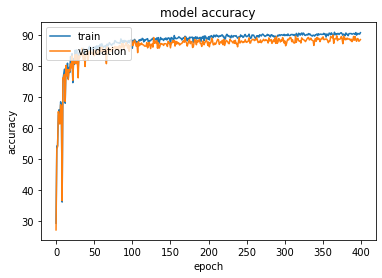

Maximum Train Accuracy : 90.80555725097656
Maximum Validation Accuracy : 89.88888549804688


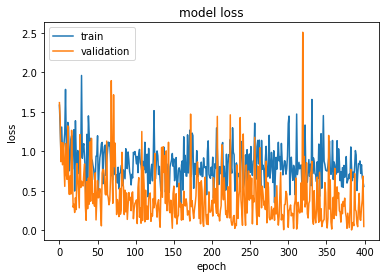

Minimum Train Loss : 0.30625396966934204
Minimum Validation Loss : 0.005738677456974983


In [ ]:
Bacteria_model_phase_Adagrad_001 = Bact_Net()
Bacteria_model_phase_Adagrad_001.cuda()
trainer_Adagrad_phase_001 = trainer(Bacteria_model_phase_Adagrad_001, phase_train_loader,"Adagrad", epoch_size=400, learning_rate=0.01)
trainer_Adagrad_phase_001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adagrad_phase_001.history['train_acc'])
plt.plot(trainer_Adagrad_phase_001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adagrad_phase_001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adagrad_phase_001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adagrad_phase_001.history['train_loss'])
plt.plot(trainer_Adagrad_phase_001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adagrad_phase_001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adagrad_phase_001.history['val_loss'])}")

In [ ]:
print(trainer_Adagrad_phase_001.history['train_loss'])
print(trainer_Adagrad_phase_001.history['val_loss'])

train_loss_mean = np.mean(trainer_Adagrad_phase_001.history['train_loss'])
train_loss_std = np.std(trainer_Adagrad_phase_001.history['train_loss'])

val_loss_mean = np.mean(trainer_Adagrad_phase_001.history['val_loss'])
val_loss_std = np.std(trainer_Adagrad_phase_001.history['val_loss'])

print(f"Train_Loss_mean: {train_loss_mean}")
print(f"Train_Loss_std: {train_loss_std}")
print(f"Val_Loss_mean: {val_loss_mean}")
print(f"Val_Loss_std: {val_loss_std}")

[1.583695411682129, 1.3004506826400757, 0.9549345374107361, 1.3071359395980835, 0.9604113101959229, 1.0404962301254272, 1.098738670349121, 1.2344166040420532, 1.7833175659179688, 1.1181914806365967, 0.961240828037262, 1.365614652633667, 1.3031725883483887, 0.7537707090377808, 0.886237621307373, 1.1515710353851318, 1.1969612836837769, 0.7734870314598083, 1.180254340171814, 1.27359139919281, 0.4975176751613617, 1.3871127367019653, 0.9381830096244812, 0.7700188755989075, 1.0104711055755615, 0.8496198654174805, 0.714353084564209, 1.0923765897750854, 0.9333328604698181, 1.959732174873352, 0.9116712808609009, 1.0569899082183838, 1.0963425636291504, 0.9187136292457581, 0.7339696884155273, 0.42316627502441406, 1.2151803970336914, 0.6040611863136292, 1.4482289552688599, 1.2241698503494263, 0.5430174469947815, 1.164719820022583, 0.9015767574310303, 0.8855118751525879, 0.8183776140213013, 0.7702885270118713, 0.6423442959785461, 0.6557245254516602, 0.9392051696777344, 0.9432113170623779, 1.1969423

In [ ]:
Bacteria_model_phase_Adagrad_001.eval() #no weight update
for i, (inputs, targets) in enumerate(phase_test_loader):  
  #inputs and targets onto CUDA (Use GPU)      
  inputs = inputs.cuda()
  targets = targets.cuda()
          
  pred = Bacteria_model_phase_Adagrad_001(inputs)
  
  loss = nn.CrossEntropyLoss()
  test_loss = loss(pred, targets)

  pred_c = torch.argmax(pred, dim=1)
  target_c = targets

  if i==0 : 
    acc = (pred_c==target_c)
  else :
    acc = torch.cat([acc, (pred_c == target_c)], axis=0)

acc = acc.float().mean() * 100
print(f"Test Acc | {acc}")
print(f"Test Loss | {test_loss}")

Test Acc | 89.20000457763672
Test Loss | 0.2729896306991577


# Adagrad_0.01_400epoch_L2reg

  0%|          | 0/400 [00:00<?, ?it/s]

Train Acc | Epoch 1/400 | ACC 20.027777


  0%|          | 1/400 [00:10<1:07:27, 10.15s/it]

Val Acc | Epoch 1/400 | ACC 19.888889
Train Acc | Epoch 2/400 | ACC 20.027777


  0%|          | 2/400 [00:20<1:07:38, 10.20s/it]

Val Acc | Epoch 2/400 | ACC 19.888889
Train Acc | Epoch 3/400 | ACC 20.027777


  1%|          | 3/400 [00:30<1:06:48, 10.10s/it]

Val Acc | Epoch 3/400 | ACC 19.888889
Train Acc | Epoch 4/400 | ACC 20.000000


  1%|          | 4/400 [00:40<1:07:05, 10.16s/it]

Val Acc | Epoch 4/400 | ACC 20.000000
Train Acc | Epoch 5/400 | ACC 20.000000


  1%|▏         | 5/400 [00:50<1:06:58, 10.17s/it]

Val Acc | Epoch 5/400 | ACC 20.000000
Train Acc | Epoch 6/400 | ACC 20.277779


  2%|▏         | 6/400 [01:01<1:06:58, 10.20s/it]

Val Acc | Epoch 6/400 | ACC 18.888889
Train Acc | Epoch 7/400 | ACC 20.277779


  2%|▏         | 7/400 [01:11<1:06:41, 10.18s/it]

Val Acc | Epoch 7/400 | ACC 18.888889
Train Acc | Epoch 8/400 | ACC 20.277779


  2%|▏         | 8/400 [01:21<1:06:18, 10.15s/it]

Val Acc | Epoch 8/400 | ACC 18.888889
Train Acc | Epoch 9/400 | ACC 20.277779


  2%|▏         | 9/400 [01:31<1:06:08, 10.15s/it]

Val Acc | Epoch 9/400 | ACC 18.888889
Train Acc | Epoch 10/400 | ACC 20.277779


  2%|▎         | 10/400 [01:41<1:06:06, 10.17s/it]

Val Acc | Epoch 10/400 | ACC 18.888889
Train Acc | Epoch 11/400 | ACC 20.277779


  3%|▎         | 11/400 [01:51<1:05:34, 10.11s/it]

Val Acc | Epoch 11/400 | ACC 18.888889
Train Acc | Epoch 12/400 | ACC 20.277779


  3%|▎         | 12/400 [02:01<1:05:37, 10.15s/it]

Val Acc | Epoch 12/400 | ACC 18.888889
Train Acc | Epoch 13/400 | ACC 20.277779


  3%|▎         | 13/400 [02:12<1:06:50, 10.36s/it]

Val Acc | Epoch 13/400 | ACC 18.888889
Train Acc | Epoch 14/400 | ACC 20.277779


  4%|▎         | 14/400 [02:23<1:06:49, 10.39s/it]

Val Acc | Epoch 14/400 | ACC 18.888889
Train Acc | Epoch 15/400 | ACC 19.750000


  4%|▍         | 15/400 [02:33<1:05:58, 10.28s/it]

Val Acc | Epoch 15/400 | ACC 21.000000
Train Acc | Epoch 16/400 | ACC 20.000000


  4%|▍         | 16/400 [02:43<1:05:15, 10.20s/it]

Val Acc | Epoch 16/400 | ACC 20.000000
Train Acc | Epoch 17/400 | ACC 20.000000


  4%|▍         | 17/400 [02:53<1:05:07, 10.20s/it]

Val Acc | Epoch 17/400 | ACC 20.000000
Train Acc | Epoch 18/400 | ACC 19.750000


  4%|▍         | 18/400 [03:03<1:04:43, 10.17s/it]

Val Acc | Epoch 18/400 | ACC 21.000000
Train Acc | Epoch 19/400 | ACC 19.750000


  5%|▍         | 19/400 [03:13<1:04:30, 10.16s/it]

Val Acc | Epoch 19/400 | ACC 21.000000
Train Acc | Epoch 20/400 | ACC 20.000000


  5%|▌         | 20/400 [03:23<1:04:32, 10.19s/it]

Val Acc | Epoch 20/400 | ACC 20.000000
Train Acc | Epoch 21/400 | ACC 20.027777


  5%|▌         | 21/400 [03:34<1:04:28, 10.21s/it]

Val Acc | Epoch 21/400 | ACC 19.888889
Train Acc | Epoch 22/400 | ACC 20.027777


  6%|▌         | 22/400 [03:44<1:04:34, 10.25s/it]

Val Acc | Epoch 22/400 | ACC 19.888889
Train Acc | Epoch 23/400 | ACC 20.277779


  6%|▌         | 23/400 [03:54<1:04:15, 10.23s/it]

Val Acc | Epoch 23/400 | ACC 18.888889
Train Acc | Epoch 24/400 | ACC 20.027777


  6%|▌         | 24/400 [04:04<1:04:01, 10.22s/it]

Val Acc | Epoch 24/400 | ACC 19.888889
Train Acc | Epoch 25/400 | ACC 20.277779


  6%|▋         | 25/400 [04:14<1:03:34, 10.17s/it]

Val Acc | Epoch 25/400 | ACC 18.888889
Train Acc | Epoch 26/400 | ACC 20.277779


  6%|▋         | 26/400 [04:24<1:03:06, 10.13s/it]

Val Acc | Epoch 26/400 | ACC 18.888889
Train Acc | Epoch 27/400 | ACC 20.277779


  7%|▋         | 27/400 [04:35<1:03:28, 10.21s/it]

Val Acc | Epoch 27/400 | ACC 18.888889
Train Acc | Epoch 28/400 | ACC 20.277779


  7%|▋         | 28/400 [04:45<1:03:05, 10.18s/it]

Val Acc | Epoch 28/400 | ACC 18.888889
Train Acc | Epoch 29/400 | ACC 20.277779


  7%|▋         | 29/400 [04:55<1:03:00, 10.19s/it]

Val Acc | Epoch 29/400 | ACC 18.888889
Train Acc | Epoch 30/400 | ACC 20.277779


  8%|▊         | 30/400 [05:06<1:03:18, 10.27s/it]

Val Acc | Epoch 30/400 | ACC 18.888889
Train Acc | Epoch 31/400 | ACC 20.277779


  8%|▊         | 31/400 [05:16<1:03:02, 10.25s/it]

Val Acc | Epoch 31/400 | ACC 18.888889
Train Acc | Epoch 32/400 | ACC 20.277779


  8%|▊         | 32/400 [05:26<1:03:11, 10.30s/it]

Val Acc | Epoch 32/400 | ACC 18.888889
Train Acc | Epoch 33/400 | ACC 20.277779


  8%|▊         | 33/400 [05:36<1:02:37, 10.24s/it]

Val Acc | Epoch 33/400 | ACC 18.888889
Train Acc | Epoch 34/400 | ACC 20.277779


  8%|▊         | 34/400 [05:47<1:02:38, 10.27s/it]

Val Acc | Epoch 34/400 | ACC 18.888889
Train Acc | Epoch 35/400 | ACC 20.277779


  9%|▉         | 35/400 [05:57<1:02:37, 10.29s/it]

Val Acc | Epoch 35/400 | ACC 18.888889
Train Acc | Epoch 36/400 | ACC 20.277779


  9%|▉         | 36/400 [06:07<1:02:09, 10.25s/it]

Val Acc | Epoch 36/400 | ACC 18.888889
Train Acc | Epoch 37/400 | ACC 20.277779


  9%|▉         | 37/400 [06:18<1:02:13, 10.29s/it]

Val Acc | Epoch 37/400 | ACC 18.888889
Train Acc | Epoch 38/400 | ACC 20.277779


 10%|▉         | 38/400 [06:28<1:02:08, 10.30s/it]

Val Acc | Epoch 38/400 | ACC 18.888889
Train Acc | Epoch 39/400 | ACC 20.277779


 10%|▉         | 39/400 [06:38<1:01:55, 10.29s/it]

Val Acc | Epoch 39/400 | ACC 18.888889
Train Acc | Epoch 40/400 | ACC 20.277779


 10%|█         | 40/400 [06:48<1:01:28, 10.25s/it]

Val Acc | Epoch 40/400 | ACC 18.888889
Train Acc | Epoch 41/400 | ACC 20.277779


 10%|█         | 41/400 [06:58<1:01:09, 10.22s/it]

Val Acc | Epoch 41/400 | ACC 18.888889
Train Acc | Epoch 42/400 | ACC 20.277779


 10%|█         | 42/400 [07:09<1:01:06, 10.24s/it]

Val Acc | Epoch 42/400 | ACC 18.888889
Train Acc | Epoch 43/400 | ACC 20.277779


 11%|█         | 43/400 [07:19<1:01:49, 10.39s/it]

Val Acc | Epoch 43/400 | ACC 18.888889
Train Acc | Epoch 44/400 | ACC 20.277779


 11%|█         | 44/400 [07:30<1:01:44, 10.41s/it]

Val Acc | Epoch 44/400 | ACC 18.888889
Train Acc | Epoch 45/400 | ACC 20.277779


 11%|█▏        | 45/400 [07:40<1:00:40, 10.25s/it]

Val Acc | Epoch 45/400 | ACC 18.888889
Train Acc | Epoch 46/400 | ACC 20.277779


 12%|█▏        | 46/400 [07:50<1:01:02, 10.35s/it]

Val Acc | Epoch 46/400 | ACC 18.888889
Train Acc | Epoch 47/400 | ACC 20.277779


 12%|█▏        | 47/400 [08:01<1:00:56, 10.36s/it]

Val Acc | Epoch 47/400 | ACC 18.888889
Train Acc | Epoch 48/400 | ACC 20.277779


 12%|█▏        | 48/400 [08:11<1:00:01, 10.23s/it]

Val Acc | Epoch 48/400 | ACC 18.888889
Train Acc | Epoch 49/400 | ACC 20.277779


 12%|█▏        | 49/400 [08:21<59:36, 10.19s/it]  

Val Acc | Epoch 49/400 | ACC 18.888889
Train Acc | Epoch 50/400 | ACC 20.277779


 12%|█▎        | 50/400 [08:31<59:32, 10.21s/it]

Val Acc | Epoch 50/400 | ACC 18.888889
Train Acc | Epoch 51/400 | ACC 20.277779


 13%|█▎        | 51/400 [08:41<59:38, 10.25s/it]

Val Acc | Epoch 51/400 | ACC 18.888889
Train Acc | Epoch 52/400 | ACC 20.277779


 13%|█▎        | 52/400 [08:52<59:36, 10.28s/it]

Val Acc | Epoch 52/400 | ACC 18.888889
Train Acc | Epoch 53/400 | ACC 20.277779


 13%|█▎        | 53/400 [09:02<59:29, 10.29s/it]

Val Acc | Epoch 53/400 | ACC 18.888889
Train Acc | Epoch 54/400 | ACC 20.277779


 14%|█▎        | 54/400 [09:12<59:07, 10.25s/it]

Val Acc | Epoch 54/400 | ACC 18.888889
Train Acc | Epoch 55/400 | ACC 20.277779


 14%|█▍        | 55/400 [09:22<58:38, 10.20s/it]

Val Acc | Epoch 55/400 | ACC 18.888889
Train Acc | Epoch 56/400 | ACC 20.277779


 14%|█▍        | 56/400 [09:33<58:31, 10.21s/it]

Val Acc | Epoch 56/400 | ACC 18.888889
Train Acc | Epoch 57/400 | ACC 20.277779


 14%|█▍        | 57/400 [09:43<58:13, 10.18s/it]

Val Acc | Epoch 57/400 | ACC 18.888889
Train Acc | Epoch 58/400 | ACC 20.277779


 14%|█▍        | 58/400 [09:53<58:15, 10.22s/it]

Val Acc | Epoch 58/400 | ACC 18.888889
Train Acc | Epoch 59/400 | ACC 20.277779


 15%|█▍        | 59/400 [10:03<58:10, 10.24s/it]

Val Acc | Epoch 59/400 | ACC 18.888889
Train Acc | Epoch 60/400 | ACC 20.277779


 15%|█▌        | 60/400 [10:14<58:15, 10.28s/it]

Val Acc | Epoch 60/400 | ACC 18.888889
Train Acc | Epoch 61/400 | ACC 20.277779


 15%|█▌        | 61/400 [10:24<57:57, 10.26s/it]

Val Acc | Epoch 61/400 | ACC 18.888889
Train Acc | Epoch 62/400 | ACC 20.277779


 16%|█▌        | 62/400 [10:34<57:38, 10.23s/it]

Val Acc | Epoch 62/400 | ACC 18.888889
Train Acc | Epoch 63/400 | ACC 20.277779


 16%|█▌        | 63/400 [10:44<57:23, 10.22s/it]

Val Acc | Epoch 63/400 | ACC 18.888889
Train Acc | Epoch 64/400 | ACC 20.277779


 16%|█▌        | 64/400 [10:54<57:10, 10.21s/it]

Val Acc | Epoch 64/400 | ACC 18.888889
Train Acc | Epoch 65/400 | ACC 20.277779


 16%|█▋        | 65/400 [11:04<56:49, 10.18s/it]

Val Acc | Epoch 65/400 | ACC 18.888889
Train Acc | Epoch 66/400 | ACC 20.277779


 16%|█▋        | 66/400 [11:15<56:36, 10.17s/it]

Val Acc | Epoch 66/400 | ACC 18.888889
Train Acc | Epoch 67/400 | ACC 20.277779


 17%|█▋        | 67/400 [11:25<56:40, 10.21s/it]

Val Acc | Epoch 67/400 | ACC 18.888889
Train Acc | Epoch 68/400 | ACC 20.277779


 17%|█▋        | 68/400 [11:35<56:40, 10.24s/it]

Val Acc | Epoch 68/400 | ACC 18.888889
Train Acc | Epoch 69/400 | ACC 20.027777


 17%|█▋        | 69/400 [11:45<56:23, 10.22s/it]

Val Acc | Epoch 69/400 | ACC 19.888889
Train Acc | Epoch 70/400 | ACC 20.027777


 18%|█▊        | 70/400 [11:56<56:27, 10.27s/it]

Val Acc | Epoch 70/400 | ACC 19.888889
Train Acc | Epoch 71/400 | ACC 20.027777


 18%|█▊        | 71/400 [12:06<56:15, 10.26s/it]

Val Acc | Epoch 71/400 | ACC 19.888889
Train Acc | Epoch 72/400 | ACC 20.027777


 18%|█▊        | 72/400 [12:16<56:11, 10.28s/it]

Val Acc | Epoch 72/400 | ACC 19.888889
Train Acc | Epoch 73/400 | ACC 20.027777


 18%|█▊        | 73/400 [12:27<56:51, 10.43s/it]

Val Acc | Epoch 73/400 | ACC 19.888889
Train Acc | Epoch 74/400 | ACC 20.027777


 18%|█▊        | 74/400 [12:38<57:09, 10.52s/it]

Val Acc | Epoch 74/400 | ACC 19.888889
Train Acc | Epoch 75/400 | ACC 20.027777


 19%|█▉        | 75/400 [12:48<56:40, 10.46s/it]

Val Acc | Epoch 75/400 | ACC 19.888889
Train Acc | Epoch 76/400 | ACC 20.027777


 19%|█▉        | 76/400 [12:59<56:19, 10.43s/it]

Val Acc | Epoch 76/400 | ACC 19.888889
Train Acc | Epoch 77/400 | ACC 20.027777


 19%|█▉        | 77/400 [13:09<55:40, 10.34s/it]

Val Acc | Epoch 77/400 | ACC 19.888889
Train Acc | Epoch 78/400 | ACC 20.027777


 20%|█▉        | 78/400 [13:19<55:11, 10.28s/it]

Val Acc | Epoch 78/400 | ACC 19.888889
Train Acc | Epoch 79/400 | ACC 20.277779


 20%|█▉        | 79/400 [13:29<54:44, 10.23s/it]

Val Acc | Epoch 79/400 | ACC 18.888889
Train Acc | Epoch 80/400 | ACC 20.027777


 20%|██        | 80/400 [13:39<54:50, 10.28s/it]

Val Acc | Epoch 80/400 | ACC 19.888889
Train Acc | Epoch 81/400 | ACC 20.027777


 20%|██        | 81/400 [13:50<54:45, 10.30s/it]

Val Acc | Epoch 81/400 | ACC 19.888889
Train Acc | Epoch 82/400 | ACC 20.027777


 20%|██        | 82/400 [14:00<54:42, 10.32s/it]

Val Acc | Epoch 82/400 | ACC 19.888889
Train Acc | Epoch 83/400 | ACC 20.277779


 21%|██        | 83/400 [14:10<54:24, 10.30s/it]

Val Acc | Epoch 83/400 | ACC 18.888889
Train Acc | Epoch 84/400 | ACC 20.027777


 21%|██        | 84/400 [14:21<54:16, 10.31s/it]

Val Acc | Epoch 84/400 | ACC 19.888889
Train Acc | Epoch 85/400 | ACC 20.277779


 21%|██▏       | 85/400 [14:31<54:02, 10.29s/it]

Val Acc | Epoch 85/400 | ACC 18.888889
Train Acc | Epoch 86/400 | ACC 20.277779


 22%|██▏       | 86/400 [14:41<53:46, 10.27s/it]

Val Acc | Epoch 86/400 | ACC 18.888889
Train Acc | Epoch 87/400 | ACC 20.277779


 22%|██▏       | 87/400 [14:51<53:38, 10.28s/it]

Val Acc | Epoch 87/400 | ACC 18.888889
Train Acc | Epoch 88/400 | ACC 20.277779


 22%|██▏       | 88/400 [15:02<53:17, 10.25s/it]

Val Acc | Epoch 88/400 | ACC 18.888889
Train Acc | Epoch 89/400 | ACC 20.277779


 22%|██▏       | 89/400 [15:12<52:46, 10.18s/it]

Val Acc | Epoch 89/400 | ACC 18.888889
Train Acc | Epoch 90/400 | ACC 20.277779


 22%|██▎       | 90/400 [15:22<52:36, 10.18s/it]

Val Acc | Epoch 90/400 | ACC 18.888889
Train Acc | Epoch 91/400 | ACC 20.277779


 23%|██▎       | 91/400 [15:32<52:34, 10.21s/it]

Val Acc | Epoch 91/400 | ACC 18.888889
Train Acc | Epoch 92/400 | ACC 20.277779


 23%|██▎       | 92/400 [15:42<52:23, 10.21s/it]

Val Acc | Epoch 92/400 | ACC 18.888889
Train Acc | Epoch 93/400 | ACC 20.277779


 23%|██▎       | 93/400 [15:52<51:52, 10.14s/it]

Val Acc | Epoch 93/400 | ACC 18.888889
Train Acc | Epoch 94/400 | ACC 20.277779


 24%|██▎       | 94/400 [16:03<51:52, 10.17s/it]

Val Acc | Epoch 94/400 | ACC 18.888889
Train Acc | Epoch 95/400 | ACC 20.277779


 24%|██▍       | 95/400 [16:13<51:43, 10.17s/it]

Val Acc | Epoch 95/400 | ACC 18.888889
Train Acc | Epoch 96/400 | ACC 20.277779


 24%|██▍       | 96/400 [16:23<51:27, 10.15s/it]

Val Acc | Epoch 96/400 | ACC 18.888889
Train Acc | Epoch 97/400 | ACC 20.277779


 24%|██▍       | 97/400 [16:33<51:07, 10.12s/it]

Val Acc | Epoch 97/400 | ACC 18.888889
Train Acc | Epoch 98/400 | ACC 20.277779


 24%|██▍       | 98/400 [16:43<51:15, 10.18s/it]

Val Acc | Epoch 98/400 | ACC 18.888889
Train Acc | Epoch 99/400 | ACC 20.277779


 25%|██▍       | 99/400 [16:54<51:23, 10.24s/it]

Val Acc | Epoch 99/400 | ACC 18.888889
Train Acc | Epoch 100/400 | ACC 20.277779


 25%|██▌       | 100/400 [17:04<51:14, 10.25s/it]

Val Acc | Epoch 100/400 | ACC 18.888889
Train Acc | Epoch 101/400 | ACC 20.277779


 25%|██▌       | 101/400 [17:14<50:57, 10.23s/it]

Val Acc | Epoch 101/400 | ACC 18.888889
Train Acc | Epoch 102/400 | ACC 20.277779


 26%|██▌       | 102/400 [17:24<50:51, 10.24s/it]

Val Acc | Epoch 102/400 | ACC 18.888889
Train Acc | Epoch 103/400 | ACC 20.277779


 26%|██▌       | 103/400 [17:34<50:39, 10.23s/it]

Val Acc | Epoch 103/400 | ACC 18.888889
Train Acc | Epoch 104/400 | ACC 20.277779


 26%|██▌       | 104/400 [17:45<51:16, 10.39s/it]

Val Acc | Epoch 104/400 | ACC 18.888889
Train Acc | Epoch 105/400 | ACC 20.277779


 26%|██▋       | 105/400 [17:56<51:04, 10.39s/it]

Val Acc | Epoch 105/400 | ACC 18.888889
Train Acc | Epoch 106/400 | ACC 20.277779


 26%|██▋       | 106/400 [18:06<50:40, 10.34s/it]

Val Acc | Epoch 106/400 | ACC 18.888889
Train Acc | Epoch 107/400 | ACC 20.277779


 27%|██▋       | 107/400 [18:16<50:14, 10.29s/it]

Val Acc | Epoch 107/400 | ACC 18.888889
Train Acc | Epoch 108/400 | ACC 20.277779


 27%|██▋       | 108/400 [18:26<50:05, 10.29s/it]

Val Acc | Epoch 108/400 | ACC 18.888889
Train Acc | Epoch 109/400 | ACC 20.277779


 27%|██▋       | 109/400 [18:37<50:02, 10.32s/it]

Val Acc | Epoch 109/400 | ACC 18.888889
Train Acc | Epoch 110/400 | ACC 20.277779


 28%|██▊       | 110/400 [18:47<49:59, 10.34s/it]

Val Acc | Epoch 110/400 | ACC 18.888889
Train Acc | Epoch 111/400 | ACC 20.277779


 28%|██▊       | 111/400 [18:57<49:44, 10.33s/it]

Val Acc | Epoch 111/400 | ACC 18.888889
Train Acc | Epoch 112/400 | ACC 20.277779


 28%|██▊       | 112/400 [19:07<49:12, 10.25s/it]

Val Acc | Epoch 112/400 | ACC 18.888889
Train Acc | Epoch 113/400 | ACC 20.277779


 28%|██▊       | 113/400 [19:18<48:57, 10.23s/it]

Val Acc | Epoch 113/400 | ACC 18.888889
Train Acc | Epoch 114/400 | ACC 20.277779


 28%|██▊       | 114/400 [19:28<48:53, 10.26s/it]

Val Acc | Epoch 114/400 | ACC 18.888889
Train Acc | Epoch 115/400 | ACC 20.277779


 29%|██▉       | 115/400 [19:38<48:30, 10.21s/it]

Val Acc | Epoch 115/400 | ACC 18.888889
Train Acc | Epoch 116/400 | ACC 20.277779


 29%|██▉       | 116/400 [19:48<48:10, 10.18s/it]

Val Acc | Epoch 116/400 | ACC 18.888889
Train Acc | Epoch 117/400 | ACC 20.277779


 29%|██▉       | 117/400 [19:58<48:03, 10.19s/it]

Val Acc | Epoch 117/400 | ACC 18.888889
Train Acc | Epoch 118/400 | ACC 20.000000


 30%|██▉       | 118/400 [20:09<47:58, 10.21s/it]

Val Acc | Epoch 118/400 | ACC 20.000000
Train Acc | Epoch 119/400 | ACC 20.277779


 30%|██▉       | 119/400 [20:19<47:48, 10.21s/it]

Val Acc | Epoch 119/400 | ACC 18.888889
Train Acc | Epoch 120/400 | ACC 20.277779


 30%|███       | 120/400 [20:29<47:14, 10.12s/it]

Val Acc | Epoch 120/400 | ACC 18.888889
Train Acc | Epoch 121/400 | ACC 20.277779


 30%|███       | 121/400 [20:39<47:18, 10.17s/it]

Val Acc | Epoch 121/400 | ACC 18.888889
Train Acc | Epoch 122/400 | ACC 20.277779


 30%|███       | 122/400 [20:49<47:26, 10.24s/it]

Val Acc | Epoch 122/400 | ACC 18.888889
Train Acc | Epoch 123/400 | ACC 20.277779


 31%|███       | 123/400 [21:00<47:07, 10.21s/it]

Val Acc | Epoch 123/400 | ACC 18.888889
Train Acc | Epoch 124/400 | ACC 20.277779


 31%|███       | 124/400 [21:10<47:09, 10.25s/it]

Val Acc | Epoch 124/400 | ACC 18.888889
Train Acc | Epoch 125/400 | ACC 20.277779


 31%|███▏      | 125/400 [21:20<46:57, 10.25s/it]

Val Acc | Epoch 125/400 | ACC 18.888889
Train Acc | Epoch 126/400 | ACC 20.277779


 32%|███▏      | 126/400 [21:30<46:36, 10.21s/it]

Val Acc | Epoch 126/400 | ACC 18.888889
Train Acc | Epoch 127/400 | ACC 20.277779


 32%|███▏      | 127/400 [21:41<46:27, 10.21s/it]

Val Acc | Epoch 127/400 | ACC 18.888889
Train Acc | Epoch 128/400 | ACC 20.277779


 32%|███▏      | 128/400 [21:51<46:17, 10.21s/it]

Val Acc | Epoch 128/400 | ACC 18.888889
Train Acc | Epoch 129/400 | ACC 20.277779


 32%|███▏      | 129/400 [22:01<45:59, 10.18s/it]

Val Acc | Epoch 129/400 | ACC 18.888889
Train Acc | Epoch 130/400 | ACC 20.277779


 32%|███▎      | 130/400 [22:11<46:03, 10.24s/it]

Val Acc | Epoch 130/400 | ACC 18.888889
Train Acc | Epoch 131/400 | ACC 20.277779


 33%|███▎      | 131/400 [22:21<45:49, 10.22s/it]

Val Acc | Epoch 131/400 | ACC 18.888889
Train Acc | Epoch 132/400 | ACC 20.277779


 33%|███▎      | 132/400 [22:32<45:35, 10.21s/it]

Val Acc | Epoch 132/400 | ACC 18.888889
Train Acc | Epoch 133/400 | ACC 20.277779


 33%|███▎      | 133/400 [22:42<45:38, 10.26s/it]

Val Acc | Epoch 133/400 | ACC 18.888889
Train Acc | Epoch 134/400 | ACC 20.277779


 34%|███▎      | 134/400 [22:53<46:18, 10.45s/it]

Val Acc | Epoch 134/400 | ACC 18.888889
Train Acc | Epoch 135/400 | ACC 20.277779


 34%|███▍      | 135/400 [23:03<45:55, 10.40s/it]

Val Acc | Epoch 135/400 | ACC 18.888889
Train Acc | Epoch 136/400 | ACC 20.277779


 34%|███▍      | 136/400 [23:13<45:22, 10.31s/it]

Val Acc | Epoch 136/400 | ACC 18.888889
Train Acc | Epoch 137/400 | ACC 20.277779


 34%|███▍      | 137/400 [23:23<45:00, 10.27s/it]

Val Acc | Epoch 137/400 | ACC 18.888889
Train Acc | Epoch 138/400 | ACC 20.277779


 34%|███▍      | 138/400 [23:34<44:39, 10.23s/it]

Val Acc | Epoch 138/400 | ACC 18.888889
Train Acc | Epoch 139/400 | ACC 20.277779


 35%|███▍      | 139/400 [23:44<44:20, 10.20s/it]

Val Acc | Epoch 139/400 | ACC 18.888889
Train Acc | Epoch 140/400 | ACC 20.277779


 35%|███▌      | 140/400 [23:54<44:22, 10.24s/it]

Val Acc | Epoch 140/400 | ACC 18.888889
Train Acc | Epoch 141/400 | ACC 20.277779


 35%|███▌      | 141/400 [24:04<43:52, 10.16s/it]

Val Acc | Epoch 141/400 | ACC 18.888889
Train Acc | Epoch 142/400 | ACC 20.277779


 36%|███▌      | 142/400 [24:14<43:49, 10.19s/it]

Val Acc | Epoch 142/400 | ACC 18.888889
Train Acc | Epoch 143/400 | ACC 20.277779


 36%|███▌      | 143/400 [24:24<43:39, 10.19s/it]

Val Acc | Epoch 143/400 | ACC 18.888889
Train Acc | Epoch 144/400 | ACC 20.277779


 36%|███▌      | 144/400 [24:35<43:33, 10.21s/it]

Val Acc | Epoch 144/400 | ACC 18.888889
Train Acc | Epoch 145/400 | ACC 20.277779


 36%|███▋      | 145/400 [24:45<43:34, 10.25s/it]

Val Acc | Epoch 145/400 | ACC 18.888889
Train Acc | Epoch 146/400 | ACC 20.277779


 36%|███▋      | 146/400 [24:55<43:21, 10.24s/it]

Val Acc | Epoch 146/400 | ACC 18.888889
Train Acc | Epoch 147/400 | ACC 20.277779


 37%|███▋      | 147/400 [25:05<43:00, 10.20s/it]

Val Acc | Epoch 147/400 | ACC 18.888889
Train Acc | Epoch 148/400 | ACC 20.277779


 37%|███▋      | 148/400 [25:16<42:52, 10.21s/it]

Val Acc | Epoch 148/400 | ACC 18.888889
Train Acc | Epoch 149/400 | ACC 20.277779


 37%|███▋      | 149/400 [25:26<42:27, 10.15s/it]

Val Acc | Epoch 149/400 | ACC 18.888889
Train Acc | Epoch 150/400 | ACC 20.277779


 38%|███▊      | 150/400 [25:36<42:36, 10.23s/it]

Val Acc | Epoch 150/400 | ACC 18.888889
Train Acc | Epoch 151/400 | ACC 20.027777


 38%|███▊      | 151/400 [25:46<42:25, 10.22s/it]

Val Acc | Epoch 151/400 | ACC 19.888889
Train Acc | Epoch 152/400 | ACC 20.027777


 38%|███▊      | 152/400 [25:56<41:55, 10.14s/it]

Val Acc | Epoch 152/400 | ACC 19.888889
Train Acc | Epoch 153/400 | ACC 20.277779


 38%|███▊      | 153/400 [26:07<42:21, 10.29s/it]

Val Acc | Epoch 153/400 | ACC 18.888889
Train Acc | Epoch 154/400 | ACC 20.277779


 38%|███▊      | 154/400 [26:17<42:15, 10.31s/it]

Val Acc | Epoch 154/400 | ACC 18.888889
Train Acc | Epoch 155/400 | ACC 20.277779


 39%|███▉      | 155/400 [26:27<42:08, 10.32s/it]

Val Acc | Epoch 155/400 | ACC 18.888889
Train Acc | Epoch 156/400 | ACC 20.277779


 39%|███▉      | 156/400 [26:38<41:57, 10.32s/it]

Val Acc | Epoch 156/400 | ACC 18.888889
Train Acc | Epoch 157/400 | ACC 20.277779


 39%|███▉      | 157/400 [26:48<41:45, 10.31s/it]

Val Acc | Epoch 157/400 | ACC 18.888889
Train Acc | Epoch 158/400 | ACC 20.277779


 40%|███▉      | 158/400 [26:58<41:28, 10.28s/it]

Val Acc | Epoch 158/400 | ACC 18.888889
Train Acc | Epoch 159/400 | ACC 20.277779


 40%|███▉      | 159/400 [27:08<40:56, 10.19s/it]

Val Acc | Epoch 159/400 | ACC 18.888889
Train Acc | Epoch 160/400 | ACC 20.277779


 40%|████      | 160/400 [27:18<40:25, 10.11s/it]

Val Acc | Epoch 160/400 | ACC 18.888889
Train Acc | Epoch 161/400 | ACC 20.277779


 40%|████      | 161/400 [27:28<40:19, 10.12s/it]

Val Acc | Epoch 161/400 | ACC 18.888889
Train Acc | Epoch 162/400 | ACC 20.277779


 40%|████      | 162/400 [27:39<40:23, 10.18s/it]

Val Acc | Epoch 162/400 | ACC 18.888889
Train Acc | Epoch 163/400 | ACC 20.277779


 41%|████      | 163/400 [27:49<40:19, 10.21s/it]

Val Acc | Epoch 163/400 | ACC 18.888889
Train Acc | Epoch 164/400 | ACC 20.277779


 41%|████      | 164/400 [28:00<40:46, 10.37s/it]

Val Acc | Epoch 164/400 | ACC 18.888889
Train Acc | Epoch 165/400 | ACC 20.277779


 41%|████▏     | 165/400 [28:10<40:45, 10.40s/it]

Val Acc | Epoch 165/400 | ACC 18.888889
Train Acc | Epoch 166/400 | ACC 20.277779


 42%|████▏     | 166/400 [28:20<40:22, 10.35s/it]

Val Acc | Epoch 166/400 | ACC 18.888889
Train Acc | Epoch 167/400 | ACC 20.277779


 42%|████▏     | 167/400 [28:30<39:51, 10.26s/it]

Val Acc | Epoch 167/400 | ACC 18.888889
Train Acc | Epoch 168/400 | ACC 20.277779


 42%|████▏     | 168/400 [28:41<39:41, 10.26s/it]

Val Acc | Epoch 168/400 | ACC 18.888889
Train Acc | Epoch 169/400 | ACC 20.277779


 42%|████▏     | 169/400 [28:51<39:21, 10.22s/it]

Val Acc | Epoch 169/400 | ACC 18.888889
Train Acc | Epoch 170/400 | ACC 20.277779


 42%|████▎     | 170/400 [29:01<39:11, 10.22s/it]

Val Acc | Epoch 170/400 | ACC 18.888889
Train Acc | Epoch 171/400 | ACC 20.277779


 43%|████▎     | 171/400 [29:11<38:45, 10.16s/it]

Val Acc | Epoch 171/400 | ACC 18.888889
Train Acc | Epoch 172/400 | ACC 20.277779


 43%|████▎     | 172/400 [29:21<38:35, 10.16s/it]

Val Acc | Epoch 172/400 | ACC 18.888889
Train Acc | Epoch 173/400 | ACC 20.277779


 43%|████▎     | 173/400 [29:31<38:22, 10.14s/it]

Val Acc | Epoch 173/400 | ACC 18.888889
Train Acc | Epoch 174/400 | ACC 20.277779


 44%|████▎     | 174/400 [29:41<37:59, 10.09s/it]

Val Acc | Epoch 174/400 | ACC 18.888889
Train Acc | Epoch 175/400 | ACC 20.277779


 44%|████▍     | 175/400 [29:51<37:31, 10.01s/it]

Val Acc | Epoch 175/400 | ACC 18.888889
Train Acc | Epoch 176/400 | ACC 20.277779


 44%|████▍     | 176/400 [30:01<37:35, 10.07s/it]

Val Acc | Epoch 176/400 | ACC 18.888889
Train Acc | Epoch 177/400 | ACC 20.277779


 44%|████▍     | 177/400 [30:11<37:29, 10.09s/it]

Val Acc | Epoch 177/400 | ACC 18.888889
Train Acc | Epoch 178/400 | ACC 20.277779


 44%|████▍     | 178/400 [30:22<37:20, 10.09s/it]

Val Acc | Epoch 178/400 | ACC 18.888889
Train Acc | Epoch 179/400 | ACC 20.277779


 45%|████▍     | 179/400 [30:32<37:05, 10.07s/it]

Val Acc | Epoch 179/400 | ACC 18.888889
Train Acc | Epoch 180/400 | ACC 20.277779


 45%|████▌     | 180/400 [30:42<37:16, 10.17s/it]

Val Acc | Epoch 180/400 | ACC 18.888889
Train Acc | Epoch 181/400 | ACC 20.277779


 45%|████▌     | 181/400 [30:52<37:09, 10.18s/it]

Val Acc | Epoch 181/400 | ACC 18.888889
Train Acc | Epoch 182/400 | ACC 20.277779


 46%|████▌     | 182/400 [31:02<37:03, 10.20s/it]

Val Acc | Epoch 182/400 | ACC 18.888889
Train Acc | Epoch 183/400 | ACC 20.000000


 46%|████▌     | 183/400 [31:13<36:48, 10.18s/it]

Val Acc | Epoch 183/400 | ACC 20.000000
Train Acc | Epoch 184/400 | ACC 20.277779


 46%|████▌     | 184/400 [31:23<36:38, 10.18s/it]

Val Acc | Epoch 184/400 | ACC 18.888889
Train Acc | Epoch 185/400 | ACC 20.277779


 46%|████▋     | 185/400 [31:33<36:20, 10.14s/it]

Val Acc | Epoch 185/400 | ACC 18.888889
Train Acc | Epoch 186/400 | ACC 20.000000


 46%|████▋     | 186/400 [31:43<36:19, 10.18s/it]

Val Acc | Epoch 186/400 | ACC 20.000000
Train Acc | Epoch 187/400 | ACC 20.277779


 47%|████▋     | 187/400 [31:53<36:10, 10.19s/it]

Val Acc | Epoch 187/400 | ACC 18.888889
Train Acc | Epoch 188/400 | ACC 20.277779


 47%|████▋     | 188/400 [32:03<35:53, 10.16s/it]

Val Acc | Epoch 188/400 | ACC 18.888889
Train Acc | Epoch 189/400 | ACC 20.277779


 47%|████▋     | 189/400 [32:14<35:49, 10.19s/it]

Val Acc | Epoch 189/400 | ACC 18.888889
Train Acc | Epoch 190/400 | ACC 20.277779


 48%|████▊     | 190/400 [32:24<35:38, 10.18s/it]

Val Acc | Epoch 190/400 | ACC 18.888889
Train Acc | Epoch 191/400 | ACC 20.277779


 48%|████▊     | 191/400 [32:34<35:23, 10.16s/it]

Val Acc | Epoch 191/400 | ACC 18.888889
Train Acc | Epoch 192/400 | ACC 20.277779


 48%|████▊     | 192/400 [32:44<35:28, 10.23s/it]

Val Acc | Epoch 192/400 | ACC 18.888889
Train Acc | Epoch 193/400 | ACC 20.277779


 48%|████▊     | 193/400 [32:55<35:16, 10.22s/it]

Val Acc | Epoch 193/400 | ACC 18.888889
Train Acc | Epoch 194/400 | ACC 20.277779


 48%|████▊     | 194/400 [33:05<35:27, 10.33s/it]

Val Acc | Epoch 194/400 | ACC 18.888889
Train Acc | Epoch 195/400 | ACC 20.277779


 49%|████▉     | 195/400 [33:16<35:38, 10.43s/it]

Val Acc | Epoch 195/400 | ACC 18.888889
Train Acc | Epoch 196/400 | ACC 20.277779


 49%|████▉     | 196/400 [33:26<35:14, 10.37s/it]

Val Acc | Epoch 196/400 | ACC 18.888889
Train Acc | Epoch 197/400 | ACC 20.277779


 49%|████▉     | 197/400 [33:36<34:55, 10.32s/it]

Val Acc | Epoch 197/400 | ACC 18.888889
Train Acc | Epoch 198/400 | ACC 20.277779


 50%|████▉     | 198/400 [33:46<34:33, 10.26s/it]

Val Acc | Epoch 198/400 | ACC 18.888889
Train Acc | Epoch 199/400 | ACC 20.277779


 50%|████▉     | 199/400 [33:56<34:02, 10.16s/it]

Val Acc | Epoch 199/400 | ACC 18.888889
Train Acc | Epoch 200/400 | ACC 20.277779


 50%|█████     | 200/400 [34:06<33:49, 10.15s/it]

Val Acc | Epoch 200/400 | ACC 18.888889
Train Acc | Epoch 201/400 | ACC 20.277779


 50%|█████     | 201/400 [34:17<33:42, 10.16s/it]

Val Acc | Epoch 201/400 | ACC 18.888889
Train Acc | Epoch 202/400 | ACC 20.277779


 50%|█████     | 202/400 [34:27<33:29, 10.15s/it]

Val Acc | Epoch 202/400 | ACC 18.888889
Train Acc | Epoch 203/400 | ACC 20.277779


 51%|█████     | 203/400 [34:37<33:24, 10.18s/it]

Val Acc | Epoch 203/400 | ACC 18.888889
Train Acc | Epoch 204/400 | ACC 20.277779


 51%|█████     | 204/400 [34:47<33:20, 10.20s/it]

Val Acc | Epoch 204/400 | ACC 18.888889
Train Acc | Epoch 205/400 | ACC 20.277779


 51%|█████▏    | 205/400 [34:58<33:22, 10.27s/it]

Val Acc | Epoch 205/400 | ACC 18.888889
Train Acc | Epoch 206/400 | ACC 20.277779


 52%|█████▏    | 206/400 [35:08<33:01, 10.21s/it]

Val Acc | Epoch 206/400 | ACC 18.888889
Train Acc | Epoch 207/400 | ACC 20.277779


 52%|█████▏    | 207/400 [35:18<32:41, 10.17s/it]

Val Acc | Epoch 207/400 | ACC 18.888889
Train Acc | Epoch 208/400 | ACC 20.277779


 52%|█████▏    | 208/400 [35:28<32:41, 10.22s/it]

Val Acc | Epoch 208/400 | ACC 18.888889
Train Acc | Epoch 209/400 | ACC 20.277779


 52%|█████▏    | 209/400 [35:38<32:32, 10.22s/it]

Val Acc | Epoch 209/400 | ACC 18.888889
Train Acc | Epoch 210/400 | ACC 20.277779


 52%|█████▎    | 210/400 [35:48<32:14, 10.18s/it]

Val Acc | Epoch 210/400 | ACC 18.888889
Train Acc | Epoch 211/400 | ACC 20.277779


 53%|█████▎    | 211/400 [35:58<31:55, 10.13s/it]

Val Acc | Epoch 211/400 | ACC 18.888889
Train Acc | Epoch 212/400 | ACC 20.277779


 53%|█████▎    | 212/400 [36:09<31:48, 10.15s/it]

Val Acc | Epoch 212/400 | ACC 18.888889
Train Acc | Epoch 213/400 | ACC 20.277779


 53%|█████▎    | 213/400 [36:19<31:47, 10.20s/it]

Val Acc | Epoch 213/400 | ACC 18.888889
Train Acc | Epoch 214/400 | ACC 20.277779


 54%|█████▎    | 214/400 [36:29<31:29, 10.16s/it]

Val Acc | Epoch 214/400 | ACC 18.888889
Train Acc | Epoch 215/400 | ACC 20.027777


 54%|█████▍    | 215/400 [36:39<31:31, 10.22s/it]

Val Acc | Epoch 215/400 | ACC 19.888889
Train Acc | Epoch 216/400 | ACC 20.027777


 54%|█████▍    | 216/400 [36:50<31:18, 10.21s/it]

Val Acc | Epoch 216/400 | ACC 19.888889
Train Acc | Epoch 217/400 | ACC 20.027777


 54%|█████▍    | 217/400 [37:00<31:01, 10.17s/it]

Val Acc | Epoch 217/400 | ACC 19.888889
Train Acc | Epoch 218/400 | ACC 20.027777


 55%|█████▍    | 218/400 [37:10<31:02, 10.24s/it]

Val Acc | Epoch 218/400 | ACC 19.888889
Train Acc | Epoch 219/400 | ACC 20.027777


 55%|█████▍    | 219/400 [37:20<30:49, 10.22s/it]

Val Acc | Epoch 219/400 | ACC 19.888889
Train Acc | Epoch 220/400 | ACC 20.277779


 55%|█████▌    | 220/400 [37:30<30:38, 10.21s/it]

Val Acc | Epoch 220/400 | ACC 18.888889
Train Acc | Epoch 221/400 | ACC 20.277779


 55%|█████▌    | 221/400 [37:41<30:31, 10.23s/it]

Val Acc | Epoch 221/400 | ACC 18.888889
Train Acc | Epoch 222/400 | ACC 20.277779


 56%|█████▌    | 222/400 [37:51<30:12, 10.18s/it]

Val Acc | Epoch 222/400 | ACC 18.888889
Train Acc | Epoch 223/400 | ACC 20.277779


 56%|█████▌    | 223/400 [38:01<29:53, 10.14s/it]

Val Acc | Epoch 223/400 | ACC 18.888889
Train Acc | Epoch 224/400 | ACC 20.277779


 56%|█████▌    | 224/400 [38:11<29:48, 10.16s/it]

Val Acc | Epoch 224/400 | ACC 18.888889
Train Acc | Epoch 225/400 | ACC 20.277779


 56%|█████▋    | 225/400 [38:22<30:00, 10.29s/it]

Val Acc | Epoch 225/400 | ACC 18.888889
Train Acc | Epoch 226/400 | ACC 20.277779


 56%|█████▋    | 226/400 [38:32<29:46, 10.27s/it]

Val Acc | Epoch 226/400 | ACC 18.888889
Train Acc | Epoch 227/400 | ACC 20.277779


 57%|█████▋    | 227/400 [38:42<29:31, 10.24s/it]

Val Acc | Epoch 227/400 | ACC 18.888889
Train Acc | Epoch 228/400 | ACC 20.277779


 57%|█████▋    | 228/400 [38:52<29:12, 10.19s/it]

Val Acc | Epoch 228/400 | ACC 18.888889
Train Acc | Epoch 229/400 | ACC 20.277779


 57%|█████▋    | 229/400 [39:02<29:06, 10.21s/it]

Val Acc | Epoch 229/400 | ACC 18.888889
Train Acc | Epoch 230/400 | ACC 20.277779


 57%|█████▊    | 230/400 [39:13<28:58, 10.23s/it]

Val Acc | Epoch 230/400 | ACC 18.888889
Train Acc | Epoch 231/400 | ACC 20.277779


 58%|█████▊    | 231/400 [39:23<28:51, 10.25s/it]

Val Acc | Epoch 231/400 | ACC 18.888889
Train Acc | Epoch 232/400 | ACC 20.277779


 58%|█████▊    | 232/400 [39:33<28:31, 10.19s/it]

Val Acc | Epoch 232/400 | ACC 18.888889
Train Acc | Epoch 233/400 | ACC 20.277779


 58%|█████▊    | 233/400 [39:43<28:29, 10.24s/it]

Val Acc | Epoch 233/400 | ACC 18.888889
Train Acc | Epoch 234/400 | ACC 20.277779


 58%|█████▊    | 234/400 [39:53<28:12, 10.19s/it]

Val Acc | Epoch 234/400 | ACC 18.888889
Train Acc | Epoch 235/400 | ACC 20.277779


 59%|█████▉    | 235/400 [40:04<28:01, 10.19s/it]

Val Acc | Epoch 235/400 | ACC 18.888889
Train Acc | Epoch 236/400 | ACC 20.277779


 59%|█████▉    | 236/400 [40:14<27:59, 10.24s/it]

Val Acc | Epoch 236/400 | ACC 18.888889
Train Acc | Epoch 237/400 | ACC 20.277779


 59%|█████▉    | 237/400 [40:24<27:47, 10.23s/it]

Val Acc | Epoch 237/400 | ACC 18.888889
Train Acc | Epoch 238/400 | ACC 20.027777


 60%|█████▉    | 238/400 [40:34<27:33, 10.21s/it]

Val Acc | Epoch 238/400 | ACC 19.888889
Train Acc | Epoch 239/400 | ACC 20.027777


 60%|█████▉    | 239/400 [40:44<27:20, 10.19s/it]

Val Acc | Epoch 239/400 | ACC 19.888889
Train Acc | Epoch 240/400 | ACC 20.027777


 60%|██████    | 240/400 [40:55<27:09, 10.19s/it]

Val Acc | Epoch 240/400 | ACC 19.888889
Train Acc | Epoch 241/400 | ACC 20.027777


 60%|██████    | 241/400 [41:05<26:52, 10.14s/it]

Val Acc | Epoch 241/400 | ACC 19.888889
Train Acc | Epoch 242/400 | ACC 20.027777


 60%|██████    | 242/400 [41:15<26:52, 10.20s/it]

Val Acc | Epoch 242/400 | ACC 19.888889
Train Acc | Epoch 243/400 | ACC 20.277779


 61%|██████    | 243/400 [41:25<26:45, 10.23s/it]

Val Acc | Epoch 243/400 | ACC 18.888889
Train Acc | Epoch 244/400 | ACC 20.277779


 61%|██████    | 244/400 [41:35<26:31, 10.20s/it]

Val Acc | Epoch 244/400 | ACC 18.888889
Train Acc | Epoch 245/400 | ACC 20.277779


 61%|██████▏   | 245/400 [41:46<26:23, 10.21s/it]

Val Acc | Epoch 245/400 | ACC 18.888889
Train Acc | Epoch 246/400 | ACC 20.277779


 62%|██████▏   | 246/400 [41:56<26:16, 10.24s/it]

Val Acc | Epoch 246/400 | ACC 18.888889
Train Acc | Epoch 247/400 | ACC 20.277779


 62%|██████▏   | 247/400 [42:06<25:59, 10.19s/it]

Val Acc | Epoch 247/400 | ACC 18.888889
Train Acc | Epoch 248/400 | ACC 20.277779


 62%|██████▏   | 248/400 [42:16<25:44, 10.16s/it]

Val Acc | Epoch 248/400 | ACC 18.888889
Train Acc | Epoch 249/400 | ACC 20.277779


 62%|██████▏   | 249/400 [42:26<25:41, 10.21s/it]

Val Acc | Epoch 249/400 | ACC 18.888889
Train Acc | Epoch 250/400 | ACC 20.277779


 62%|██████▎   | 250/400 [42:37<25:34, 10.23s/it]

Val Acc | Epoch 250/400 | ACC 18.888889
Train Acc | Epoch 251/400 | ACC 20.277779


 63%|██████▎   | 251/400 [42:47<25:13, 10.16s/it]

Val Acc | Epoch 251/400 | ACC 18.888889
Train Acc | Epoch 252/400 | ACC 20.277779


 63%|██████▎   | 252/400 [42:57<24:56, 10.11s/it]

Val Acc | Epoch 252/400 | ACC 18.888889
Train Acc | Epoch 253/400 | ACC 20.277779


 63%|██████▎   | 253/400 [43:07<24:53, 10.16s/it]

Val Acc | Epoch 253/400 | ACC 18.888889
Train Acc | Epoch 254/400 | ACC 20.277779


 64%|██████▎   | 254/400 [43:17<24:19, 10.00s/it]

Val Acc | Epoch 254/400 | ACC 18.888889
Train Acc | Epoch 255/400 | ACC 20.277779


 64%|██████▍   | 255/400 [43:27<24:36, 10.18s/it]

Val Acc | Epoch 255/400 | ACC 18.888889
Train Acc | Epoch 256/400 | ACC 20.277779


 64%|██████▍   | 256/400 [43:38<24:34, 10.24s/it]

Val Acc | Epoch 256/400 | ACC 18.888889
Train Acc | Epoch 257/400 | ACC 20.277779


 64%|██████▍   | 257/400 [43:48<24:19, 10.21s/it]

Val Acc | Epoch 257/400 | ACC 18.888889
Train Acc | Epoch 258/400 | ACC 20.277779


 64%|██████▍   | 258/400 [43:58<24:03, 10.17s/it]

Val Acc | Epoch 258/400 | ACC 18.888889
Train Acc | Epoch 259/400 | ACC 20.277779


 65%|██████▍   | 259/400 [44:08<23:58, 10.20s/it]

Val Acc | Epoch 259/400 | ACC 18.888889
Train Acc | Epoch 260/400 | ACC 20.277779


 65%|██████▌   | 260/400 [44:18<23:54, 10.25s/it]

Val Acc | Epoch 260/400 | ACC 18.888889
Train Acc | Epoch 261/400 | ACC 20.277779


 65%|██████▌   | 261/400 [44:28<23:32, 10.16s/it]

Val Acc | Epoch 261/400 | ACC 18.888889
Train Acc | Epoch 262/400 | ACC 20.277779


 66%|██████▌   | 262/400 [44:38<23:16, 10.12s/it]

Val Acc | Epoch 262/400 | ACC 18.888889
Train Acc | Epoch 263/400 | ACC 20.277779


 66%|██████▌   | 263/400 [44:48<23:02, 10.09s/it]

Val Acc | Epoch 263/400 | ACC 18.888889
Train Acc | Epoch 264/400 | ACC 20.277779


 66%|██████▌   | 264/400 [44:58<22:50, 10.08s/it]

Val Acc | Epoch 264/400 | ACC 18.888889
Train Acc | Epoch 265/400 | ACC 20.277779


 66%|██████▋   | 265/400 [45:08<22:34, 10.04s/it]

Val Acc | Epoch 265/400 | ACC 18.888889
Train Acc | Epoch 266/400 | ACC 20.277779


 66%|██████▋   | 266/400 [45:19<22:28, 10.06s/it]

Val Acc | Epoch 266/400 | ACC 18.888889
Train Acc | Epoch 267/400 | ACC 20.277779


 67%|██████▋   | 267/400 [45:29<22:22, 10.10s/it]

Val Acc | Epoch 267/400 | ACC 18.888889
Train Acc | Epoch 268/400 | ACC 20.277779


 67%|██████▋   | 268/400 [45:39<22:25, 10.19s/it]

Val Acc | Epoch 268/400 | ACC 18.888889
Train Acc | Epoch 269/400 | ACC 20.277779


 67%|██████▋   | 269/400 [45:49<22:22, 10.25s/it]

Val Acc | Epoch 269/400 | ACC 18.888889
Train Acc | Epoch 270/400 | ACC 20.277779


 68%|██████▊   | 270/400 [46:00<22:12, 10.25s/it]

Val Acc | Epoch 270/400 | ACC 18.888889
Train Acc | Epoch 271/400 | ACC 20.277779


 68%|██████▊   | 271/400 [46:10<21:57, 10.21s/it]

Val Acc | Epoch 271/400 | ACC 18.888889
Train Acc | Epoch 272/400 | ACC 20.277779


 68%|██████▊   | 272/400 [46:20<21:41, 10.17s/it]

Val Acc | Epoch 272/400 | ACC 18.888889
Train Acc | Epoch 273/400 | ACC 20.277779


 68%|██████▊   | 273/400 [46:30<21:27, 10.14s/it]

Val Acc | Epoch 273/400 | ACC 18.888889
Train Acc | Epoch 274/400 | ACC 20.277779


 68%|██████▊   | 274/400 [46:40<21:10, 10.08s/it]

Val Acc | Epoch 274/400 | ACC 18.888889
Train Acc | Epoch 275/400 | ACC 20.277779


 69%|██████▉   | 275/400 [46:50<21:06, 10.14s/it]

Val Acc | Epoch 275/400 | ACC 18.888889
Train Acc | Epoch 276/400 | ACC 20.277779


 69%|██████▉   | 276/400 [47:00<20:59, 10.16s/it]

Val Acc | Epoch 276/400 | ACC 18.888889
Train Acc | Epoch 277/400 | ACC 20.277779


 69%|██████▉   | 277/400 [47:10<20:45, 10.13s/it]

Val Acc | Epoch 277/400 | ACC 18.888889
Train Acc | Epoch 278/400 | ACC 20.277779


 70%|██████▉   | 278/400 [47:21<20:33, 10.11s/it]

Val Acc | Epoch 278/400 | ACC 18.888889
Train Acc | Epoch 279/400 | ACC 20.277779


 70%|██████▉   | 279/400 [47:31<20:19, 10.08s/it]

Val Acc | Epoch 279/400 | ACC 18.888889
Train Acc | Epoch 280/400 | ACC 20.277779


 70%|███████   | 280/400 [47:41<20:14, 10.12s/it]

Val Acc | Epoch 280/400 | ACC 18.888889
Train Acc | Epoch 281/400 | ACC 20.277779


 70%|███████   | 281/400 [47:51<20:09, 10.16s/it]

Val Acc | Epoch 281/400 | ACC 18.888889
Train Acc | Epoch 282/400 | ACC 20.277779


 70%|███████   | 282/400 [48:01<19:52, 10.10s/it]

Val Acc | Epoch 282/400 | ACC 18.888889
Train Acc | Epoch 283/400 | ACC 20.277779


 71%|███████   | 283/400 [48:11<19:49, 10.17s/it]

Val Acc | Epoch 283/400 | ACC 18.888889
Train Acc | Epoch 284/400 | ACC 20.277779


 71%|███████   | 284/400 [48:21<19:37, 10.15s/it]

Val Acc | Epoch 284/400 | ACC 18.888889
Train Acc | Epoch 285/400 | ACC 20.277779


 71%|███████▏  | 285/400 [48:32<19:31, 10.18s/it]

Val Acc | Epoch 285/400 | ACC 18.888889
Train Acc | Epoch 286/400 | ACC 20.277779


 72%|███████▏  | 286/400 [48:43<19:47, 10.42s/it]

Val Acc | Epoch 286/400 | ACC 18.888889
Train Acc | Epoch 287/400 | ACC 20.277779


 72%|███████▏  | 287/400 [48:53<19:32, 10.38s/it]

Val Acc | Epoch 287/400 | ACC 18.888889
Train Acc | Epoch 288/400 | ACC 20.277779


 72%|███████▏  | 288/400 [49:03<19:16, 10.32s/it]

Val Acc | Epoch 288/400 | ACC 18.888889
Train Acc | Epoch 289/400 | ACC 20.277779


 72%|███████▏  | 289/400 [49:13<19:03, 10.30s/it]

Val Acc | Epoch 289/400 | ACC 18.888889
Train Acc | Epoch 290/400 | ACC 20.277779


 72%|███████▎  | 290/400 [49:24<18:49, 10.27s/it]

Val Acc | Epoch 290/400 | ACC 18.888889
Train Acc | Epoch 291/400 | ACC 20.277779


 73%|███████▎  | 291/400 [49:34<18:36, 10.24s/it]

Val Acc | Epoch 291/400 | ACC 18.888889
Train Acc | Epoch 292/400 | ACC 20.277779


 73%|███████▎  | 292/400 [49:44<18:26, 10.25s/it]

Val Acc | Epoch 292/400 | ACC 18.888889
Train Acc | Epoch 293/400 | ACC 20.277779


 73%|███████▎  | 293/400 [49:54<18:19, 10.28s/it]

Val Acc | Epoch 293/400 | ACC 18.888889
Train Acc | Epoch 294/400 | ACC 20.277779


 74%|███████▎  | 294/400 [50:04<18:02, 10.22s/it]

Val Acc | Epoch 294/400 | ACC 18.888889
Train Acc | Epoch 295/400 | ACC 20.277779


 74%|███████▍  | 295/400 [50:14<17:46, 10.16s/it]

Val Acc | Epoch 295/400 | ACC 18.888889
Train Acc | Epoch 296/400 | ACC 20.277779


 74%|███████▍  | 296/400 [50:25<17:37, 10.17s/it]

Val Acc | Epoch 296/400 | ACC 18.888889
Train Acc | Epoch 297/400 | ACC 20.277779


 74%|███████▍  | 297/400 [50:35<17:24, 10.14s/it]

Val Acc | Epoch 297/400 | ACC 18.888889
Train Acc | Epoch 298/400 | ACC 20.277779


 74%|███████▍  | 298/400 [50:45<17:18, 10.19s/it]

Val Acc | Epoch 298/400 | ACC 18.888889
Train Acc | Epoch 299/400 | ACC 20.277779


 75%|███████▍  | 299/400 [50:55<17:05, 10.16s/it]

Val Acc | Epoch 299/400 | ACC 18.888889
Train Acc | Epoch 300/400 | ACC 20.277779


 75%|███████▌  | 300/400 [51:05<16:59, 10.19s/it]

Val Acc | Epoch 300/400 | ACC 18.888889
Train Acc | Epoch 301/400 | ACC 20.277779


 75%|███████▌  | 301/400 [51:16<16:47, 10.18s/it]

Val Acc | Epoch 301/400 | ACC 18.888889
Train Acc | Epoch 302/400 | ACC 20.277779


 76%|███████▌  | 302/400 [51:26<16:37, 10.18s/it]

Val Acc | Epoch 302/400 | ACC 18.888889
Train Acc | Epoch 303/400 | ACC 20.277779


 76%|███████▌  | 303/400 [51:36<16:25, 10.16s/it]

Val Acc | Epoch 303/400 | ACC 18.888889
Train Acc | Epoch 304/400 | ACC 20.277779


 76%|███████▌  | 304/400 [51:46<16:15, 10.17s/it]

Val Acc | Epoch 304/400 | ACC 18.888889
Train Acc | Epoch 305/400 | ACC 20.277779


 76%|███████▋  | 305/400 [51:56<16:05, 10.16s/it]

Val Acc | Epoch 305/400 | ACC 18.888889
Train Acc | Epoch 306/400 | ACC 20.277779


 76%|███████▋  | 306/400 [52:06<15:58, 10.19s/it]

Val Acc | Epoch 306/400 | ACC 18.888889
Train Acc | Epoch 307/400 | ACC 20.277779


 77%|███████▋  | 307/400 [52:16<15:42, 10.13s/it]

Val Acc | Epoch 307/400 | ACC 18.888889
Train Acc | Epoch 308/400 | ACC 20.277779


 77%|███████▋  | 308/400 [52:26<15:27, 10.08s/it]

Val Acc | Epoch 308/400 | ACC 18.888889
Train Acc | Epoch 309/400 | ACC 20.277779


 77%|███████▋  | 309/400 [52:36<15:17, 10.08s/it]

Val Acc | Epoch 309/400 | ACC 18.888889
Train Acc | Epoch 310/400 | ACC 20.277779


 78%|███████▊  | 310/400 [52:47<15:08, 10.10s/it]

Val Acc | Epoch 310/400 | ACC 18.888889
Train Acc | Epoch 311/400 | ACC 20.277779


 78%|███████▊  | 311/400 [52:57<14:57, 10.09s/it]

Val Acc | Epoch 311/400 | ACC 18.888889
Train Acc | Epoch 312/400 | ACC 20.277779


 78%|███████▊  | 312/400 [53:07<14:50, 10.12s/it]

Val Acc | Epoch 312/400 | ACC 18.888889
Train Acc | Epoch 313/400 | ACC 20.277779


 78%|███████▊  | 313/400 [53:17<14:45, 10.18s/it]

Val Acc | Epoch 313/400 | ACC 18.888889
Train Acc | Epoch 314/400 | ACC 20.277779


 78%|███████▊  | 314/400 [53:27<14:33, 10.15s/it]

Val Acc | Epoch 314/400 | ACC 18.888889
Train Acc | Epoch 315/400 | ACC 20.277779


 79%|███████▉  | 315/400 [53:38<14:26, 10.20s/it]

Val Acc | Epoch 315/400 | ACC 18.888889
Train Acc | Epoch 316/400 | ACC 20.277779


 79%|███████▉  | 316/400 [53:48<14:22, 10.26s/it]

Val Acc | Epoch 316/400 | ACC 18.888889
Train Acc | Epoch 317/400 | ACC 20.277779


 79%|███████▉  | 317/400 [53:59<14:23, 10.40s/it]

Val Acc | Epoch 317/400 | ACC 18.888889
Train Acc | Epoch 318/400 | ACC 20.277779


 80%|███████▉  | 318/400 [54:09<14:08, 10.35s/it]

Val Acc | Epoch 318/400 | ACC 18.888889
Train Acc | Epoch 319/400 | ACC 20.277779


 80%|███████▉  | 319/400 [54:19<13:50, 10.25s/it]

Val Acc | Epoch 319/400 | ACC 18.888889
Train Acc | Epoch 320/400 | ACC 20.277779


 80%|████████  | 320/400 [54:29<13:39, 10.25s/it]

Val Acc | Epoch 320/400 | ACC 18.888889
Train Acc | Epoch 321/400 | ACC 20.277779


 80%|████████  | 321/400 [54:39<13:28, 10.24s/it]

Val Acc | Epoch 321/400 | ACC 18.888889
Train Acc | Epoch 322/400 | ACC 20.277779


 80%|████████  | 322/400 [54:50<13:21, 10.28s/it]

Val Acc | Epoch 322/400 | ACC 18.888889
Train Acc | Epoch 323/400 | ACC 20.277779


 81%|████████  | 323/400 [55:00<13:07, 10.23s/it]

Val Acc | Epoch 323/400 | ACC 18.888889
Train Acc | Epoch 324/400 | ACC 20.277779


 81%|████████  | 324/400 [55:10<12:52, 10.16s/it]

Val Acc | Epoch 324/400 | ACC 18.888889
Train Acc | Epoch 325/400 | ACC 20.277779


 81%|████████▏ | 325/400 [55:20<12:46, 10.22s/it]

Val Acc | Epoch 325/400 | ACC 18.888889
Train Acc | Epoch 326/400 | ACC 20.277779


 82%|████████▏ | 326/400 [55:30<12:35, 10.21s/it]

Val Acc | Epoch 326/400 | ACC 18.888889
Train Acc | Epoch 327/400 | ACC 20.277779


 82%|████████▏ | 327/400 [55:41<12:30, 10.29s/it]

Val Acc | Epoch 327/400 | ACC 18.888889
Train Acc | Epoch 328/400 | ACC 20.277779


 82%|████████▏ | 328/400 [55:51<12:16, 10.22s/it]

Val Acc | Epoch 328/400 | ACC 18.888889
Train Acc | Epoch 329/400 | ACC 20.277779


 82%|████████▏ | 329/400 [56:01<11:59, 10.14s/it]

Val Acc | Epoch 329/400 | ACC 18.888889
Train Acc | Epoch 330/400 | ACC 20.277779


 82%|████████▎ | 330/400 [56:11<11:49, 10.13s/it]

Val Acc | Epoch 330/400 | ACC 18.888889
Train Acc | Epoch 331/400 | ACC 20.277779


 83%|████████▎ | 331/400 [56:21<11:43, 10.19s/it]

Val Acc | Epoch 331/400 | ACC 18.888889
Train Acc | Epoch 332/400 | ACC 20.277779


 83%|████████▎ | 332/400 [56:32<11:34, 10.21s/it]

Val Acc | Epoch 332/400 | ACC 18.888889
Train Acc | Epoch 333/400 | ACC 20.277779


 83%|████████▎ | 333/400 [56:42<11:25, 10.24s/it]

Val Acc | Epoch 333/400 | ACC 18.888889
Train Acc | Epoch 334/400 | ACC 20.277779


 84%|████████▎ | 334/400 [56:52<11:17, 10.27s/it]

Val Acc | Epoch 334/400 | ACC 18.888889
Train Acc | Epoch 335/400 | ACC 20.277779


 84%|████████▍ | 335/400 [57:03<11:07, 10.27s/it]

Val Acc | Epoch 335/400 | ACC 18.888889
Train Acc | Epoch 336/400 | ACC 20.277779


 84%|████████▍ | 336/400 [57:13<10:54, 10.22s/it]

Val Acc | Epoch 336/400 | ACC 18.888889
Train Acc | Epoch 337/400 | ACC 20.277779


 84%|████████▍ | 337/400 [57:23<10:41, 10.18s/it]

Val Acc | Epoch 337/400 | ACC 18.888889
Train Acc | Epoch 338/400 | ACC 20.277779


 84%|████████▍ | 338/400 [57:33<10:29, 10.15s/it]

Val Acc | Epoch 338/400 | ACC 18.888889
Train Acc | Epoch 339/400 | ACC 20.277779


 85%|████████▍ | 339/400 [57:43<10:17, 10.13s/it]

Val Acc | Epoch 339/400 | ACC 18.888889
Train Acc | Epoch 340/400 | ACC 20.277779


 85%|████████▌ | 340/400 [57:53<10:06, 10.12s/it]

Val Acc | Epoch 340/400 | ACC 18.888889
Train Acc | Epoch 341/400 | ACC 20.277779


 85%|████████▌ | 341/400 [58:03<09:53, 10.06s/it]

Val Acc | Epoch 341/400 | ACC 18.888889
Train Acc | Epoch 342/400 | ACC 20.277779


 86%|████████▌ | 342/400 [58:13<09:44, 10.07s/it]

Val Acc | Epoch 342/400 | ACC 18.888889
Train Acc | Epoch 343/400 | ACC 20.277779


 86%|████████▌ | 343/400 [58:23<09:34, 10.09s/it]

Val Acc | Epoch 343/400 | ACC 18.888889
Train Acc | Epoch 344/400 | ACC 20.277779


 86%|████████▌ | 344/400 [58:33<09:25, 10.10s/it]

Val Acc | Epoch 344/400 | ACC 18.888889
Train Acc | Epoch 345/400 | ACC 20.277779


 86%|████████▋ | 345/400 [58:43<09:16, 10.11s/it]

Val Acc | Epoch 345/400 | ACC 18.888889
Train Acc | Epoch 346/400 | ACC 20.277779


 86%|████████▋ | 346/400 [58:54<09:09, 10.17s/it]

Val Acc | Epoch 346/400 | ACC 18.888889
Train Acc | Epoch 347/400 | ACC 20.277779


 87%|████████▋ | 347/400 [59:05<09:10, 10.38s/it]

Val Acc | Epoch 347/400 | ACC 18.888889
Train Acc | Epoch 348/400 | ACC 20.277779


 87%|████████▋ | 348/400 [59:15<08:59, 10.37s/it]

Val Acc | Epoch 348/400 | ACC 18.888889
Train Acc | Epoch 349/400 | ACC 20.277779


 87%|████████▋ | 349/400 [59:25<08:44, 10.29s/it]

Val Acc | Epoch 349/400 | ACC 18.888889
Train Acc | Epoch 350/400 | ACC 20.277779


 88%|████████▊ | 350/400 [59:35<08:30, 10.22s/it]

Val Acc | Epoch 350/400 | ACC 18.888889
Train Acc | Epoch 351/400 | ACC 20.277779


 88%|████████▊ | 351/400 [59:45<08:16, 10.14s/it]

Val Acc | Epoch 351/400 | ACC 18.888889
Train Acc | Epoch 352/400 | ACC 20.277779


 88%|████████▊ | 352/400 [59:55<08:08, 10.19s/it]

Val Acc | Epoch 352/400 | ACC 18.888889
Train Acc | Epoch 353/400 | ACC 20.277779


 88%|████████▊ | 353/400 [1:00:06<08:00, 10.23s/it]

Val Acc | Epoch 353/400 | ACC 18.888889
Train Acc | Epoch 354/400 | ACC 20.277779


 88%|████████▊ | 354/400 [1:00:16<07:48, 10.20s/it]

Val Acc | Epoch 354/400 | ACC 18.888889
Train Acc | Epoch 355/400 | ACC 20.277779


 89%|████████▉ | 355/400 [1:00:26<07:38, 10.18s/it]

Val Acc | Epoch 355/400 | ACC 18.888889
Train Acc | Epoch 356/400 | ACC 20.277779


 89%|████████▉ | 356/400 [1:00:36<07:24, 10.11s/it]

Val Acc | Epoch 356/400 | ACC 18.888889
Train Acc | Epoch 357/400 | ACC 20.277779


 89%|████████▉ | 357/400 [1:00:46<07:15, 10.13s/it]

Val Acc | Epoch 357/400 | ACC 18.888889
Train Acc | Epoch 358/400 | ACC 20.277779


 90%|████████▉ | 358/400 [1:00:56<07:06, 10.16s/it]

Val Acc | Epoch 358/400 | ACC 18.888889
Train Acc | Epoch 359/400 | ACC 20.277779


 90%|████████▉ | 359/400 [1:01:06<06:56, 10.16s/it]

Val Acc | Epoch 359/400 | ACC 18.888889
Train Acc | Epoch 360/400 | ACC 20.277779


 90%|█████████ | 360/400 [1:01:17<06:47, 10.18s/it]

Val Acc | Epoch 360/400 | ACC 18.888889
Train Acc | Epoch 361/400 | ACC 20.277779


 90%|█████████ | 361/400 [1:01:27<06:38, 10.22s/it]

Val Acc | Epoch 361/400 | ACC 18.888889
Train Acc | Epoch 362/400 | ACC 20.277779


 90%|█████████ | 362/400 [1:01:37<06:30, 10.28s/it]

Val Acc | Epoch 362/400 | ACC 18.888889
Train Acc | Epoch 363/400 | ACC 20.277779


 91%|█████████ | 363/400 [1:01:48<06:19, 10.24s/it]

Val Acc | Epoch 363/400 | ACC 18.888889
Train Acc | Epoch 364/400 | ACC 20.277779


 91%|█████████ | 364/400 [1:01:58<06:09, 10.26s/it]

Val Acc | Epoch 364/400 | ACC 18.888889
Train Acc | Epoch 365/400 | ACC 20.277779


 91%|█████████▏| 365/400 [1:02:08<05:56, 10.18s/it]

Val Acc | Epoch 365/400 | ACC 18.888889
Train Acc | Epoch 366/400 | ACC 20.277779


 92%|█████████▏| 366/400 [1:02:18<05:43, 10.11s/it]

Val Acc | Epoch 366/400 | ACC 18.888889
Train Acc | Epoch 367/400 | ACC 20.277779


 92%|█████████▏| 367/400 [1:02:28<05:33, 10.12s/it]

Val Acc | Epoch 367/400 | ACC 18.888889
Train Acc | Epoch 368/400 | ACC 20.277779


 92%|█████████▏| 368/400 [1:02:38<05:23, 10.12s/it]

Val Acc | Epoch 368/400 | ACC 18.888889
Train Acc | Epoch 369/400 | ACC 20.277779


 92%|█████████▏| 369/400 [1:02:48<05:14, 10.15s/it]

Val Acc | Epoch 369/400 | ACC 18.888889
Train Acc | Epoch 370/400 | ACC 20.277779


 92%|█████████▎| 370/400 [1:02:58<05:05, 10.18s/it]

Val Acc | Epoch 370/400 | ACC 18.888889
Train Acc | Epoch 371/400 | ACC 20.277779


 93%|█████████▎| 371/400 [1:03:09<04:53, 10.13s/it]

Val Acc | Epoch 371/400 | ACC 18.888889
Train Acc | Epoch 372/400 | ACC 20.277779


 93%|█████████▎| 372/400 [1:03:19<04:43, 10.11s/it]

Val Acc | Epoch 372/400 | ACC 18.888889
Train Acc | Epoch 373/400 | ACC 20.277779


 93%|█████████▎| 373/400 [1:03:29<04:32, 10.11s/it]

Val Acc | Epoch 373/400 | ACC 18.888889
Train Acc | Epoch 374/400 | ACC 20.277779


 94%|█████████▎| 374/400 [1:03:39<04:22, 10.11s/it]

Val Acc | Epoch 374/400 | ACC 18.888889
Train Acc | Epoch 375/400 | ACC 20.277779


 94%|█████████▍| 375/400 [1:03:49<04:12, 10.09s/it]

Val Acc | Epoch 375/400 | ACC 18.888889
Train Acc | Epoch 376/400 | ACC 20.277779


 94%|█████████▍| 376/400 [1:03:59<04:02, 10.12s/it]

Val Acc | Epoch 376/400 | ACC 18.888889
Train Acc | Epoch 377/400 | ACC 20.277779


 94%|█████████▍| 377/400 [1:04:10<03:56, 10.27s/it]

Val Acc | Epoch 377/400 | ACC 18.888889
Train Acc | Epoch 378/400 | ACC 20.277779


 94%|█████████▍| 378/400 [1:04:20<03:47, 10.35s/it]

Val Acc | Epoch 378/400 | ACC 18.888889
Train Acc | Epoch 379/400 | ACC 20.277779


 95%|█████████▍| 379/400 [1:04:30<03:36, 10.33s/it]

Val Acc | Epoch 379/400 | ACC 18.888889
Train Acc | Epoch 380/400 | ACC 20.277779


 95%|█████████▌| 380/400 [1:04:41<03:25, 10.26s/it]

Val Acc | Epoch 380/400 | ACC 18.888889
Train Acc | Epoch 381/400 | ACC 20.277779


 95%|█████████▌| 381/400 [1:04:51<03:15, 10.28s/it]

Val Acc | Epoch 381/400 | ACC 18.888889
Train Acc | Epoch 382/400 | ACC 20.277779


 96%|█████████▌| 382/400 [1:05:01<03:03, 10.20s/it]

Val Acc | Epoch 382/400 | ACC 18.888889
Train Acc | Epoch 383/400 | ACC 20.277779


 96%|█████████▌| 383/400 [1:05:11<02:53, 10.19s/it]

Val Acc | Epoch 383/400 | ACC 18.888889
Train Acc | Epoch 384/400 | ACC 20.277779


 96%|█████████▌| 384/400 [1:05:21<02:43, 10.24s/it]

Val Acc | Epoch 384/400 | ACC 18.888889
Train Acc | Epoch 385/400 | ACC 20.277779


 96%|█████████▋| 385/400 [1:05:31<02:32, 10.18s/it]

Val Acc | Epoch 385/400 | ACC 18.888889
Train Acc | Epoch 386/400 | ACC 20.277779


 96%|█████████▋| 386/400 [1:05:42<02:22, 10.21s/it]

Val Acc | Epoch 386/400 | ACC 18.888889
Train Acc | Epoch 387/400 | ACC 20.277779


 97%|█████████▋| 387/400 [1:05:52<02:13, 10.23s/it]

Val Acc | Epoch 387/400 | ACC 18.888889
Train Acc | Epoch 388/400 | ACC 20.277779


 97%|█████████▋| 388/400 [1:06:02<02:03, 10.27s/it]

Val Acc | Epoch 388/400 | ACC 18.888889
Train Acc | Epoch 389/400 | ACC 20.277779


 97%|█████████▋| 389/400 [1:06:13<01:52, 10.27s/it]

Val Acc | Epoch 389/400 | ACC 18.888889
Train Acc | Epoch 390/400 | ACC 20.277779


 98%|█████████▊| 390/400 [1:06:23<01:42, 10.25s/it]

Val Acc | Epoch 390/400 | ACC 18.888889
Train Acc | Epoch 391/400 | ACC 20.277779


 98%|█████████▊| 391/400 [1:06:33<01:32, 10.23s/it]

Val Acc | Epoch 391/400 | ACC 18.888889
Train Acc | Epoch 392/400 | ACC 20.277779


 98%|█████████▊| 392/400 [1:06:43<01:22, 10.27s/it]

Val Acc | Epoch 392/400 | ACC 18.888889
Train Acc | Epoch 393/400 | ACC 20.277779


 98%|█████████▊| 393/400 [1:06:54<01:11, 10.24s/it]

Val Acc | Epoch 393/400 | ACC 18.888889
Train Acc | Epoch 394/400 | ACC 20.277779


 98%|█████████▊| 394/400 [1:07:04<01:01, 10.20s/it]

Val Acc | Epoch 394/400 | ACC 18.888889
Train Acc | Epoch 395/400 | ACC 20.277779


 99%|█████████▉| 395/400 [1:07:14<00:51, 10.21s/it]

Val Acc | Epoch 395/400 | ACC 18.888889
Train Acc | Epoch 396/400 | ACC 20.277779


 99%|█████████▉| 396/400 [1:07:24<00:40, 10.15s/it]

Val Acc | Epoch 396/400 | ACC 18.888889
Train Acc | Epoch 397/400 | ACC 20.277779


 99%|█████████▉| 397/400 [1:07:34<00:30, 10.17s/it]

Val Acc | Epoch 397/400 | ACC 18.888889
Train Acc | Epoch 398/400 | ACC 20.277779


100%|█████████▉| 398/400 [1:07:45<00:20, 10.24s/it]

Val Acc | Epoch 398/400 | ACC 18.888889
Train Acc | Epoch 399/400 | ACC 20.277779


100%|█████████▉| 399/400 [1:07:55<00:10, 10.21s/it]

Val Acc | Epoch 399/400 | ACC 18.888889
Train Acc | Epoch 400/400 | ACC 20.277779


100%|██████████| 400/400 [1:08:05<00:00, 10.21s/it]

Val Acc | Epoch 400/400 | ACC 18.888889


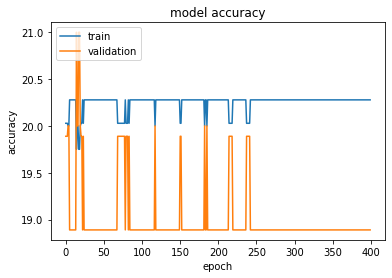

Maximum Train Accuracy : 20.27777862548828
Maximum Validation Accuracy : 21.0


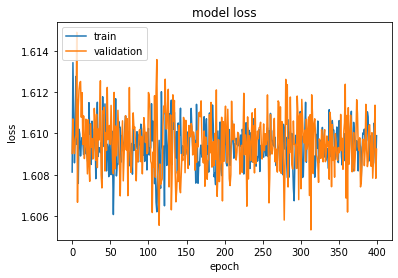

Minimum Train Loss : 1.6060830354690552
Minimum Validation Loss : 1.6053403615951538


In [ ]:
Bacteria_model_phase_Adagrad_001 = Bact_Net()
Bacteria_model_phase_Adagrad_001.cuda()
trainer_Adagrad_phase_001 = trainer(Bacteria_model_phase_Adagrad_001, phase_train_loader,"Adagrad", epoch_size=400, learning_rate=0.01, weight_decay=0.5)
trainer_Adagrad_phase_001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adagrad_phase_001.history['train_acc'])
plt.plot(trainer_Adagrad_phase_001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adagrad_phase_001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adagrad_phase_001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adagrad_phase_001.history['train_loss'])
plt.plot(trainer_Adagrad_phase_001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adagrad_phase_001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adagrad_phase_001.history['val_loss'])}")

# Adagrad_0.01_400epoch_batchnorm

  0%|          | 0/400 [00:00<?, ?it/s]

Train Acc | Epoch 1/400 | ACC 21.861113


  0%|          | 1/400 [00:10<1:08:13, 10.26s/it]

Val Acc | Epoch 1/400 | ACC 22.888889
Train Acc | Epoch 2/400 | ACC 20.361113


  0%|          | 2/400 [00:20<1:08:54, 10.39s/it]

Val Acc | Epoch 2/400 | ACC 19.888889
Train Acc | Epoch 3/400 | ACC 24.305557


  1%|          | 3/400 [00:30<1:08:12, 10.31s/it]

Val Acc | Epoch 3/400 | ACC 22.666668
Train Acc | Epoch 4/400 | ACC 20.138889


  1%|          | 4/400 [00:41<1:07:27, 10.22s/it]

Val Acc | Epoch 4/400 | ACC 20.222223
Train Acc | Epoch 5/400 | ACC 44.972221


  1%|▏         | 5/400 [00:51<1:07:19, 10.23s/it]

Val Acc | Epoch 5/400 | ACC 46.555557
Train Acc | Epoch 6/400 | ACC 37.222225


  2%|▏         | 6/400 [01:01<1:07:03, 10.21s/it]

Val Acc | Epoch 6/400 | ACC 38.333336
Train Acc | Epoch 7/400 | ACC 38.555557


  2%|▏         | 7/400 [01:12<1:07:43, 10.34s/it]

Val Acc | Epoch 7/400 | ACC 39.555557
Train Acc | Epoch 8/400 | ACC 33.861115


  2%|▏         | 8/400 [01:22<1:08:19, 10.46s/it]

Val Acc | Epoch 8/400 | ACC 34.666668
Train Acc | Epoch 9/400 | ACC 22.111113


  2%|▏         | 9/400 [01:33<1:07:49, 10.41s/it]

Val Acc | Epoch 9/400 | ACC 21.111111
Train Acc | Epoch 10/400 | ACC 20.027777


  2%|▎         | 10/400 [01:43<1:07:09, 10.33s/it]

Val Acc | Epoch 10/400 | ACC 19.888889
Train Acc | Epoch 11/400 | ACC 20.000000


  3%|▎         | 11/400 [01:53<1:06:27, 10.25s/it]

Val Acc | Epoch 11/400 | ACC 20.000000
Train Acc | Epoch 12/400 | ACC 36.583336


  3%|▎         | 12/400 [02:03<1:05:47, 10.18s/it]

Val Acc | Epoch 12/400 | ACC 37.000000
Train Acc | Epoch 13/400 | ACC 34.666668


  3%|▎         | 13/400 [02:13<1:05:42, 10.19s/it]

Val Acc | Epoch 13/400 | ACC 34.111111
Train Acc | Epoch 14/400 | ACC 38.500004


  4%|▎         | 14/400 [02:23<1:05:43, 10.22s/it]

Val Acc | Epoch 14/400 | ACC 38.333336
Train Acc | Epoch 15/400 | ACC 37.000000


  4%|▍         | 15/400 [02:34<1:05:42, 10.24s/it]

Val Acc | Epoch 15/400 | ACC 36.222221
Train Acc | Epoch 16/400 | ACC 22.944445


  4%|▍         | 16/400 [02:44<1:05:33, 10.24s/it]

Val Acc | Epoch 16/400 | ACC 22.444445
Train Acc | Epoch 17/400 | ACC 30.277781


  4%|▍         | 17/400 [02:54<1:05:00, 10.18s/it]

Val Acc | Epoch 17/400 | ACC 30.111113
Train Acc | Epoch 18/400 | ACC 39.833336


  4%|▍         | 18/400 [03:04<1:04:56, 10.20s/it]

Val Acc | Epoch 18/400 | ACC 40.000000
Train Acc | Epoch 19/400 | ACC 21.805555


  5%|▍         | 19/400 [03:15<1:05:24, 10.30s/it]

Val Acc | Epoch 19/400 | ACC 20.888889
Train Acc | Epoch 20/400 | ACC 20.027777


  5%|▌         | 20/400 [03:25<1:04:46, 10.23s/it]

Val Acc | Epoch 20/400 | ACC 20.000000
Train Acc | Epoch 21/400 | ACC 33.000000


  5%|▌         | 21/400 [03:35<1:04:36, 10.23s/it]

Val Acc | Epoch 21/400 | ACC 33.222221
Train Acc | Epoch 22/400 | ACC 35.277779


  6%|▌         | 22/400 [03:45<1:04:29, 10.24s/it]

Val Acc | Epoch 22/400 | ACC 34.888889
Train Acc | Epoch 23/400 | ACC 20.027777


  6%|▌         | 23/400 [03:55<1:03:59, 10.18s/it]

Val Acc | Epoch 23/400 | ACC 19.888889
Train Acc | Epoch 24/400 | ACC 79.333336


  6%|▌         | 24/400 [04:06<1:03:57, 10.21s/it]

Val Acc | Epoch 24/400 | ACC 79.555557
Train Acc | Epoch 25/400 | ACC 47.472225


  6%|▋         | 25/400 [04:15<1:03:09, 10.10s/it]

Val Acc | Epoch 25/400 | ACC 50.777782
Train Acc | Epoch 26/400 | ACC 55.277779


  6%|▋         | 26/400 [04:26<1:03:08, 10.13s/it]

Val Acc | Epoch 26/400 | ACC 55.222225
Train Acc | Epoch 27/400 | ACC 40.777779


  7%|▋         | 27/400 [04:36<1:03:13, 10.17s/it]

Val Acc | Epoch 27/400 | ACC 39.111115
Train Acc | Epoch 28/400 | ACC 57.638889


  7%|▋         | 28/400 [04:46<1:03:00, 10.16s/it]

Val Acc | Epoch 28/400 | ACC 57.111115
Train Acc | Epoch 29/400 | ACC 51.555557


  7%|▋         | 29/400 [04:56<1:02:54, 10.17s/it]

Val Acc | Epoch 29/400 | ACC 49.666668
Train Acc | Epoch 30/400 | ACC 20.000000


  8%|▊         | 30/400 [05:06<1:02:58, 10.21s/it]

Val Acc | Epoch 30/400 | ACC 20.000000
Train Acc | Epoch 31/400 | ACC 55.055557


  8%|▊         | 31/400 [05:17<1:02:57, 10.24s/it]

Val Acc | Epoch 31/400 | ACC 55.666668
Train Acc | Epoch 32/400 | ACC 20.111113


  8%|▊         | 32/400 [05:27<1:02:48, 10.24s/it]

Val Acc | Epoch 32/400 | ACC 20.111113
Train Acc | Epoch 33/400 | ACC 61.555557


  8%|▊         | 33/400 [05:37<1:02:43, 10.26s/it]

Val Acc | Epoch 33/400 | ACC 61.111111
Train Acc | Epoch 34/400 | ACC 24.944445


  8%|▊         | 34/400 [05:47<1:02:12, 10.20s/it]

Val Acc | Epoch 34/400 | ACC 25.444445
Train Acc | Epoch 35/400 | ACC 53.527779


  9%|▉         | 35/400 [05:58<1:02:06, 10.21s/it]

Val Acc | Epoch 35/400 | ACC 54.555557
Train Acc | Epoch 36/400 | ACC 63.638889


  9%|▉         | 36/400 [06:08<1:01:52, 10.20s/it]

Val Acc | Epoch 36/400 | ACC 61.666668
Train Acc | Epoch 37/400 | ACC 53.333336


  9%|▉         | 37/400 [06:18<1:01:43, 10.20s/it]

Val Acc | Epoch 37/400 | ACC 52.333336
Train Acc | Epoch 38/400 | ACC 47.472225


 10%|▉         | 38/400 [06:29<1:02:33, 10.37s/it]

Val Acc | Epoch 38/400 | ACC 47.555557
Train Acc | Epoch 39/400 | ACC 63.722221


 10%|▉         | 39/400 [06:39<1:02:12, 10.34s/it]

Val Acc | Epoch 39/400 | ACC 63.333332
Train Acc | Epoch 40/400 | ACC 28.305557


 10%|█         | 40/400 [06:49<1:02:01, 10.34s/it]

Val Acc | Epoch 40/400 | ACC 29.555555
Train Acc | Epoch 41/400 | ACC 50.611115


 10%|█         | 41/400 [07:00<1:01:45, 10.32s/it]

Val Acc | Epoch 41/400 | ACC 50.333332
Train Acc | Epoch 42/400 | ACC 54.555557


 10%|█         | 42/400 [07:10<1:01:25, 10.29s/it]

Val Acc | Epoch 42/400 | ACC 56.888889
Train Acc | Epoch 43/400 | ACC 43.166668


 11%|█         | 43/400 [07:20<1:00:57, 10.25s/it]

Val Acc | Epoch 43/400 | ACC 43.666668
Train Acc | Epoch 44/400 | ACC 52.777779


 11%|█         | 44/400 [07:30<1:00:40, 10.23s/it]

Val Acc | Epoch 44/400 | ACC 52.222221
Train Acc | Epoch 45/400 | ACC 20.333334


 11%|█▏        | 45/400 [07:40<1:00:27, 10.22s/it]

Val Acc | Epoch 45/400 | ACC 20.555555
Train Acc | Epoch 46/400 | ACC 56.972225


 12%|█▏        | 46/400 [07:50<59:57, 10.16s/it]  

Val Acc | Epoch 46/400 | ACC 58.111115
Train Acc | Epoch 47/400 | ACC 46.222221


 12%|█▏        | 47/400 [08:00<59:28, 10.11s/it]

Val Acc | Epoch 47/400 | ACC 47.111111
Train Acc | Epoch 48/400 | ACC 34.583332


 12%|█▏        | 48/400 [08:11<59:28, 10.14s/it]

Val Acc | Epoch 48/400 | ACC 35.333336
Train Acc | Epoch 49/400 | ACC 58.305557


 12%|█▏        | 49/400 [08:21<59:31, 10.17s/it]

Val Acc | Epoch 49/400 | ACC 55.444443
Train Acc | Epoch 50/400 | ACC 68.194450


 12%|█▎        | 50/400 [08:31<59:28, 10.20s/it]

Val Acc | Epoch 50/400 | ACC 68.222221
Train Acc | Epoch 51/400 | ACC 20.222223


 13%|█▎        | 51/400 [08:41<59:18, 10.20s/it]

Val Acc | Epoch 51/400 | ACC 20.000000
Train Acc | Epoch 52/400 | ACC 20.444445


 13%|█▎        | 52/400 [08:52<59:20, 10.23s/it]

Val Acc | Epoch 52/400 | ACC 20.333334
Train Acc | Epoch 53/400 | ACC 41.861111


 13%|█▎        | 53/400 [09:02<59:08, 10.23s/it]

Val Acc | Epoch 53/400 | ACC 42.666668
Train Acc | Epoch 54/400 | ACC 52.416672


 14%|█▎        | 54/400 [09:12<59:05, 10.25s/it]

Val Acc | Epoch 54/400 | ACC 49.555557
Train Acc | Epoch 55/400 | ACC 19.861111


 14%|█▍        | 55/400 [09:22<58:41, 10.21s/it]

Val Acc | Epoch 55/400 | ACC 21.222223
Train Acc | Epoch 56/400 | ACC 41.250004


 14%|█▍        | 56/400 [09:33<59:21, 10.35s/it]

Val Acc | Epoch 56/400 | ACC 41.888889
Train Acc | Epoch 57/400 | ACC 51.750000


 14%|█▍        | 57/400 [09:43<59:09, 10.35s/it]

Val Acc | Epoch 57/400 | ACC 50.111115
Train Acc | Epoch 58/400 | ACC 37.583332


 14%|█▍        | 58/400 [09:53<58:40, 10.29s/it]

Val Acc | Epoch 58/400 | ACC 39.222221
Train Acc | Epoch 59/400 | ACC 35.388889


 15%|█▍        | 59/400 [10:04<58:10, 10.24s/it]

Val Acc | Epoch 59/400 | ACC 35.444443
Train Acc | Epoch 60/400 | ACC 59.638889


 15%|█▌        | 60/400 [10:14<57:57, 10.23s/it]

Val Acc | Epoch 60/400 | ACC 57.777779
Train Acc | Epoch 61/400 | ACC 20.138889


 15%|█▌        | 61/400 [10:24<57:39, 10.21s/it]

Val Acc | Epoch 61/400 | ACC 20.000000
Train Acc | Epoch 62/400 | ACC 41.027779


 16%|█▌        | 62/400 [10:34<57:13, 10.16s/it]

Val Acc | Epoch 62/400 | ACC 40.666668
Train Acc | Epoch 63/400 | ACC 42.388889


 16%|█▌        | 63/400 [10:44<57:03, 10.16s/it]

Val Acc | Epoch 63/400 | ACC 42.000000
Train Acc | Epoch 64/400 | ACC 20.111113


 16%|█▌        | 64/400 [10:54<57:03, 10.19s/it]

Val Acc | Epoch 64/400 | ACC 20.000000
Train Acc | Epoch 65/400 | ACC 39.694447


 16%|█▋        | 65/400 [11:04<56:35, 10.14s/it]

Val Acc | Epoch 65/400 | ACC 40.111115
Train Acc | Epoch 66/400 | ACC 39.027779


 16%|█▋        | 66/400 [11:14<56:13, 10.10s/it]

Val Acc | Epoch 66/400 | ACC 37.777779
Train Acc | Epoch 67/400 | ACC 20.500000


 17%|█▋        | 67/400 [11:25<56:15, 10.14s/it]

Val Acc | Epoch 67/400 | ACC 20.666668
Train Acc | Epoch 68/400 | ACC 39.277779


 17%|█▋        | 68/400 [11:35<56:58, 10.30s/it]

Val Acc | Epoch 68/400 | ACC 41.555557
Train Acc | Epoch 69/400 | ACC 54.361111


 17%|█▋        | 69/400 [11:46<57:00, 10.33s/it]

Val Acc | Epoch 69/400 | ACC 52.555553
Train Acc | Epoch 70/400 | ACC 44.194447


 18%|█▊        | 70/400 [11:56<56:31, 10.28s/it]

Val Acc | Epoch 70/400 | ACC 45.000000
Train Acc | Epoch 71/400 | ACC 34.111111


 18%|█▊        | 71/400 [12:06<56:06, 10.23s/it]

Val Acc | Epoch 71/400 | ACC 33.666668
Train Acc | Epoch 72/400 | ACC 81.138893


 18%|█▊        | 72/400 [12:16<55:46, 10.20s/it]

Val Acc | Epoch 72/400 | ACC 81.333336
Train Acc | Epoch 73/400 | ACC 52.750004


 18%|█▊        | 73/400 [12:26<55:21, 10.16s/it]

Val Acc | Epoch 73/400 | ACC 52.222221
Train Acc | Epoch 74/400 | ACC 38.361111


 18%|█▊        | 74/400 [12:36<55:02, 10.13s/it]

Val Acc | Epoch 74/400 | ACC 39.111115
Train Acc | Epoch 75/400 | ACC 62.305557


 19%|█▉        | 75/400 [12:46<54:55, 10.14s/it]

Val Acc | Epoch 75/400 | ACC 60.111111
Train Acc | Epoch 76/400 | ACC 60.944443


 19%|█▉        | 76/400 [12:57<54:44, 10.14s/it]

Val Acc | Epoch 76/400 | ACC 61.000000
Train Acc | Epoch 77/400 | ACC 57.222221


 19%|█▉        | 77/400 [13:07<54:34, 10.14s/it]

Val Acc | Epoch 77/400 | ACC 58.777779
Train Acc | Epoch 78/400 | ACC 42.638889


 20%|█▉        | 78/400 [13:17<54:23, 10.13s/it]

Val Acc | Epoch 78/400 | ACC 45.555557
Train Acc | Epoch 79/400 | ACC 25.083334


 20%|█▉        | 79/400 [13:27<54:25, 10.17s/it]

Val Acc | Epoch 79/400 | ACC 25.111113
Train Acc | Epoch 80/400 | ACC 28.944445


 20%|██        | 80/400 [13:37<54:30, 10.22s/it]

Val Acc | Epoch 80/400 | ACC 29.222223
Train Acc | Epoch 81/400 | ACC 64.083336


 20%|██        | 81/400 [13:48<54:26, 10.24s/it]

Val Acc | Epoch 81/400 | ACC 64.333336
Train Acc | Epoch 82/400 | ACC 70.388885


 20%|██        | 82/400 [13:58<54:39, 10.31s/it]

Val Acc | Epoch 82/400 | ACC 68.111115
Train Acc | Epoch 83/400 | ACC 72.305557


 21%|██        | 83/400 [14:08<54:28, 10.31s/it]

Val Acc | Epoch 83/400 | ACC 71.000000
Train Acc | Epoch 84/400 | ACC 49.138889


 21%|██        | 84/400 [14:19<53:50, 10.22s/it]

Val Acc | Epoch 84/400 | ACC 47.888889
Train Acc | Epoch 85/400 | ACC 45.472221


 21%|██▏       | 85/400 [14:29<54:15, 10.33s/it]

Val Acc | Epoch 85/400 | ACC 46.222221
Train Acc | Epoch 86/400 | ACC 41.055557


 22%|██▏       | 86/400 [14:39<53:53, 10.30s/it]

Val Acc | Epoch 86/400 | ACC 40.000000
Train Acc | Epoch 87/400 | ACC 58.444447


 22%|██▏       | 87/400 [14:50<53:36, 10.28s/it]

Val Acc | Epoch 87/400 | ACC 58.666672
Train Acc | Epoch 88/400 | ACC 54.138893


 22%|██▏       | 88/400 [15:00<53:28, 10.29s/it]

Val Acc | Epoch 88/400 | ACC 55.444443
Train Acc | Epoch 89/400 | ACC 37.916668


 22%|██▏       | 89/400 [15:10<53:30, 10.32s/it]

Val Acc | Epoch 89/400 | ACC 38.111111
Train Acc | Epoch 90/400 | ACC 45.527779


 22%|██▎       | 90/400 [15:21<53:21, 10.33s/it]

Val Acc | Epoch 90/400 | ACC 44.888889
Train Acc | Epoch 91/400 | ACC 44.611111


 23%|██▎       | 91/400 [15:31<52:52, 10.27s/it]

Val Acc | Epoch 91/400 | ACC 43.888889
Train Acc | Epoch 92/400 | ACC 77.222221


 23%|██▎       | 92/400 [15:41<52:33, 10.24s/it]

Val Acc | Epoch 92/400 | ACC 77.666672
Train Acc | Epoch 93/400 | ACC 52.722221


 23%|██▎       | 93/400 [15:51<52:21, 10.23s/it]

Val Acc | Epoch 93/400 | ACC 53.555553
Train Acc | Epoch 94/400 | ACC 47.444447


 24%|██▎       | 94/400 [16:01<51:49, 10.16s/it]

Val Acc | Epoch 94/400 | ACC 48.000000
Train Acc | Epoch 95/400 | ACC 50.750000


 24%|██▍       | 95/400 [16:11<51:43, 10.18s/it]

Val Acc | Epoch 95/400 | ACC 53.444447
Train Acc | Epoch 96/400 | ACC 51.888889


 24%|██▍       | 96/400 [16:22<51:35, 10.18s/it]

Val Acc | Epoch 96/400 | ACC 53.666668
Train Acc | Epoch 97/400 | ACC 75.638893


 24%|██▍       | 97/400 [16:32<51:30, 10.20s/it]

Val Acc | Epoch 97/400 | ACC 73.444443
Train Acc | Epoch 98/400 | ACC 44.138889


 24%|██▍       | 98/400 [16:42<51:48, 10.29s/it]

Val Acc | Epoch 98/400 | ACC 46.555557
Train Acc | Epoch 99/400 | ACC 71.944443


 25%|██▍       | 99/400 [16:53<51:48, 10.33s/it]

Val Acc | Epoch 99/400 | ACC 72.444443
Train Acc | Epoch 100/400 | ACC 53.361111


 25%|██▌       | 100/400 [17:03<51:44, 10.35s/it]

Val Acc | Epoch 100/400 | ACC 51.444447
Train Acc | Epoch 101/400 | ACC 65.055557


 25%|██▌       | 101/400 [17:13<51:16, 10.29s/it]

Val Acc | Epoch 101/400 | ACC 63.000000
Train Acc | Epoch 102/400 | ACC 47.833336


 26%|██▌       | 102/400 [17:24<51:09, 10.30s/it]

Val Acc | Epoch 102/400 | ACC 49.555557
Train Acc | Epoch 103/400 | ACC 53.333336


 26%|██▌       | 103/400 [17:34<50:31, 10.21s/it]

Val Acc | Epoch 103/400 | ACC 53.777779
Train Acc | Epoch 104/400 | ACC 39.527779


 26%|██▌       | 104/400 [17:44<50:30, 10.24s/it]

Val Acc | Epoch 104/400 | ACC 39.555557
Train Acc | Epoch 105/400 | ACC 56.416668


 26%|██▋       | 105/400 [17:54<50:09, 10.20s/it]

Val Acc | Epoch 105/400 | ACC 57.666664
Train Acc | Epoch 106/400 | ACC 59.888885


 26%|██▋       | 106/400 [18:04<49:45, 10.15s/it]

Val Acc | Epoch 106/400 | ACC 61.111111
Train Acc | Epoch 107/400 | ACC 38.138889


 27%|██▋       | 107/400 [18:14<49:35, 10.15s/it]

Val Acc | Epoch 107/400 | ACC 37.333332
Train Acc | Epoch 108/400 | ACC 51.583332


 27%|██▋       | 108/400 [18:24<49:37, 10.20s/it]

Val Acc | Epoch 108/400 | ACC 51.444447
Train Acc | Epoch 109/400 | ACC 32.111111


 27%|██▋       | 109/400 [18:35<49:39, 10.24s/it]

Val Acc | Epoch 109/400 | ACC 33.111115
Train Acc | Epoch 110/400 | ACC 65.000000


 28%|██▊       | 110/400 [18:45<49:37, 10.27s/it]

Val Acc | Epoch 110/400 | ACC 65.777779
Train Acc | Epoch 111/400 | ACC 28.694445


 28%|██▊       | 111/400 [18:55<49:35, 10.30s/it]

Val Acc | Epoch 111/400 | ACC 27.777779
Train Acc | Epoch 112/400 | ACC 58.694447


 28%|██▊       | 112/400 [19:06<49:11, 10.25s/it]

Val Acc | Epoch 112/400 | ACC 59.333336
Train Acc | Epoch 113/400 | ACC 75.972221


 28%|██▊       | 113/400 [19:16<48:54, 10.22s/it]

Val Acc | Epoch 113/400 | ACC 76.333336
Train Acc | Epoch 114/400 | ACC 59.583336


 28%|██▊       | 114/400 [19:26<48:23, 10.15s/it]

Val Acc | Epoch 114/400 | ACC 60.444443
Train Acc | Epoch 115/400 | ACC 66.888893


 29%|██▉       | 115/400 [19:36<48:18, 10.17s/it]

Val Acc | Epoch 115/400 | ACC 68.666664
Train Acc | Epoch 116/400 | ACC 58.194447


 29%|██▉       | 116/400 [19:46<48:13, 10.19s/it]

Val Acc | Epoch 116/400 | ACC 58.000004
Train Acc | Epoch 117/400 | ACC 46.805557


 29%|██▉       | 117/400 [19:57<48:13, 10.22s/it]

Val Acc | Epoch 117/400 | ACC 47.666668
Train Acc | Epoch 118/400 | ACC 39.277779


 30%|██▉       | 118/400 [20:06<47:41, 10.15s/it]

Val Acc | Epoch 118/400 | ACC 38.888889
Train Acc | Epoch 119/400 | ACC 49.777779


 30%|██▉       | 119/400 [20:17<47:28, 10.14s/it]

Val Acc | Epoch 119/400 | ACC 48.555557
Train Acc | Epoch 120/400 | ACC 44.944443


 30%|███       | 120/400 [20:27<47:07, 10.10s/it]

Val Acc | Epoch 120/400 | ACC 45.000000
Train Acc | Epoch 121/400 | ACC 56.611115


 30%|███       | 121/400 [20:37<46:49, 10.07s/it]

Val Acc | Epoch 121/400 | ACC 54.666668
Train Acc | Epoch 122/400 | ACC 72.250000


 30%|███       | 122/400 [20:47<46:38, 10.07s/it]

Val Acc | Epoch 122/400 | ACC 71.444443
Train Acc | Epoch 123/400 | ACC 52.861111


 31%|███       | 123/400 [20:57<46:28, 10.07s/it]

Val Acc | Epoch 123/400 | ACC 53.555553
Train Acc | Epoch 124/400 | ACC 36.111115


 31%|███       | 124/400 [21:07<46:38, 10.14s/it]

Val Acc | Epoch 124/400 | ACC 36.444447
Train Acc | Epoch 125/400 | ACC 68.444450


 31%|███▏      | 125/400 [21:17<46:33, 10.16s/it]

Val Acc | Epoch 125/400 | ACC 69.444450
Train Acc | Epoch 126/400 | ACC 68.416664


 32%|███▏      | 126/400 [21:27<46:14, 10.13s/it]

Val Acc | Epoch 126/400 | ACC 67.888893
Train Acc | Epoch 127/400 | ACC 39.333336


 32%|███▏      | 127/400 [21:38<46:25, 10.20s/it]

Val Acc | Epoch 127/400 | ACC 39.000000
Train Acc | Epoch 128/400 | ACC 54.027779


 32%|███▏      | 128/400 [21:48<46:07, 10.17s/it]

Val Acc | Epoch 128/400 | ACC 55.333336
Train Acc | Epoch 129/400 | ACC 53.416668


 32%|███▏      | 129/400 [21:59<46:40, 10.33s/it]

Val Acc | Epoch 129/400 | ACC 53.777779
Train Acc | Epoch 130/400 | ACC 70.416672


 32%|███▎      | 130/400 [22:09<46:35, 10.36s/it]

Val Acc | Epoch 130/400 | ACC 69.222221
Train Acc | Epoch 131/400 | ACC 47.638889


 33%|███▎      | 131/400 [22:19<46:08, 10.29s/it]

Val Acc | Epoch 131/400 | ACC 48.111111
Train Acc | Epoch 132/400 | ACC 46.944447


 33%|███▎      | 132/400 [22:29<45:48, 10.26s/it]

Val Acc | Epoch 132/400 | ACC 47.666668
Train Acc | Epoch 133/400 | ACC 40.222225


 33%|███▎      | 133/400 [22:40<45:44, 10.28s/it]

Val Acc | Epoch 133/400 | ACC 42.666668
Train Acc | Epoch 134/400 | ACC 67.944443


 34%|███▎      | 134/400 [22:50<45:29, 10.26s/it]

Val Acc | Epoch 134/400 | ACC 65.444443
Train Acc | Epoch 135/400 | ACC 60.250004


 34%|███▍      | 135/400 [23:00<45:02, 10.20s/it]

Val Acc | Epoch 135/400 | ACC 58.777779
Train Acc | Epoch 136/400 | ACC 40.583332


 34%|███▍      | 136/400 [23:10<45:04, 10.24s/it]

Val Acc | Epoch 136/400 | ACC 41.111111
Train Acc | Epoch 137/400 | ACC 77.611115


 34%|███▍      | 137/400 [23:20<44:44, 10.21s/it]

Val Acc | Epoch 137/400 | ACC 76.111115
Train Acc | Epoch 138/400 | ACC 47.222225


 34%|███▍      | 138/400 [23:31<44:34, 10.21s/it]

Val Acc | Epoch 138/400 | ACC 47.444447
Train Acc | Epoch 139/400 | ACC 62.916668


 35%|███▍      | 139/400 [23:40<44:00, 10.12s/it]

Val Acc | Epoch 139/400 | ACC 65.000000
Train Acc | Epoch 140/400 | ACC 42.583336


 35%|███▌      | 140/400 [23:51<44:04, 10.17s/it]

Val Acc | Epoch 140/400 | ACC 43.333332
Train Acc | Epoch 141/400 | ACC 68.250000


 35%|███▌      | 141/400 [24:01<44:08, 10.23s/it]

Val Acc | Epoch 141/400 | ACC 69.666664
Train Acc | Epoch 142/400 | ACC 58.638889


 36%|███▌      | 142/400 [24:11<43:54, 10.21s/it]

Val Acc | Epoch 142/400 | ACC 56.444447
Train Acc | Epoch 143/400 | ACC 82.861115


 36%|███▌      | 143/400 [24:22<43:52, 10.24s/it]

Val Acc | Epoch 143/400 | ACC 82.666672
Train Acc | Epoch 144/400 | ACC 82.888885


 36%|███▌      | 144/400 [24:32<43:40, 10.24s/it]

Val Acc | Epoch 144/400 | ACC 84.000000
Train Acc | Epoch 145/400 | ACC 64.694443


 36%|███▋      | 145/400 [24:42<43:16, 10.18s/it]

Val Acc | Epoch 145/400 | ACC 63.111115
Train Acc | Epoch 146/400 | ACC 71.305557


 36%|███▋      | 146/400 [24:52<42:46, 10.10s/it]

Val Acc | Epoch 146/400 | ACC 71.000000
Train Acc | Epoch 147/400 | ACC 58.861115


 37%|███▋      | 147/400 [25:02<42:28, 10.07s/it]

Val Acc | Epoch 147/400 | ACC 59.222221
Train Acc | Epoch 148/400 | ACC 60.277779


 37%|███▋      | 148/400 [25:12<42:32, 10.13s/it]

Val Acc | Epoch 148/400 | ACC 60.000004
Train Acc | Epoch 149/400 | ACC 66.861115


 37%|███▋      | 149/400 [25:22<42:27, 10.15s/it]

Val Acc | Epoch 149/400 | ACC 68.333336
Train Acc | Epoch 150/400 | ACC 67.638893


 38%|███▊      | 150/400 [25:33<42:31, 10.21s/it]

Val Acc | Epoch 150/400 | ACC 65.000000
Train Acc | Epoch 151/400 | ACC 71.444443


 38%|███▊      | 151/400 [25:43<42:28, 10.23s/it]

Val Acc | Epoch 151/400 | ACC 71.666672
Train Acc | Epoch 152/400 | ACC 77.583336


 38%|███▊      | 152/400 [25:53<42:16, 10.23s/it]

Val Acc | Epoch 152/400 | ACC 75.555557
Train Acc | Epoch 153/400 | ACC 41.888889


 38%|███▊      | 153/400 [26:03<41:56, 10.19s/it]

Val Acc | Epoch 153/400 | ACC 41.111111
Train Acc | Epoch 154/400 | ACC 25.138891


 38%|███▊      | 154/400 [26:13<41:40, 10.17s/it]

Val Acc | Epoch 154/400 | ACC 25.888889
Train Acc | Epoch 155/400 | ACC 83.694443


 39%|███▉      | 155/400 [26:23<41:29, 10.16s/it]

Val Acc | Epoch 155/400 | ACC 83.222221
Train Acc | Epoch 156/400 | ACC 56.444447


 39%|███▉      | 156/400 [26:34<41:45, 10.27s/it]

Val Acc | Epoch 156/400 | ACC 54.222225
Train Acc | Epoch 157/400 | ACC 56.611115


 39%|███▉      | 157/400 [26:44<41:43, 10.30s/it]

Val Acc | Epoch 157/400 | ACC 57.444447
Train Acc | Epoch 158/400 | ACC 45.722221


 40%|███▉      | 158/400 [26:55<41:31, 10.29s/it]

Val Acc | Epoch 158/400 | ACC 45.111111
Train Acc | Epoch 159/400 | ACC 62.833332


 40%|███▉      | 159/400 [27:05<41:30, 10.34s/it]

Val Acc | Epoch 159/400 | ACC 61.111111
Train Acc | Epoch 160/400 | ACC 57.861115


 40%|████      | 160/400 [27:16<41:34, 10.39s/it]

Val Acc | Epoch 160/400 | ACC 55.777775
Train Acc | Epoch 161/400 | ACC 53.361111


 40%|████      | 161/400 [27:26<41:02, 10.30s/it]

Val Acc | Epoch 161/400 | ACC 54.888893
Train Acc | Epoch 162/400 | ACC 61.388893


 40%|████      | 162/400 [27:36<40:38, 10.25s/it]

Val Acc | Epoch 162/400 | ACC 62.111115
Train Acc | Epoch 163/400 | ACC 39.694447


 41%|████      | 163/400 [27:46<40:21, 10.22s/it]

Val Acc | Epoch 163/400 | ACC 41.444443
Train Acc | Epoch 164/400 | ACC 51.083332


 41%|████      | 164/400 [27:56<40:14, 10.23s/it]

Val Acc | Epoch 164/400 | ACC 51.444447
Train Acc | Epoch 165/400 | ACC 40.750000


 41%|████▏     | 165/400 [28:06<39:58, 10.20s/it]

Val Acc | Epoch 165/400 | ACC 41.111111
Train Acc | Epoch 166/400 | ACC 64.722221


 42%|████▏     | 166/400 [28:17<39:55, 10.24s/it]

Val Acc | Epoch 166/400 | ACC 64.333336
Train Acc | Epoch 167/400 | ACC 86.305557


 42%|████▏     | 167/400 [28:27<39:49, 10.26s/it]

Val Acc | Epoch 167/400 | ACC 86.222229
Train Acc | Epoch 168/400 | ACC 50.083332


 42%|████▏     | 168/400 [28:37<39:43, 10.27s/it]

Val Acc | Epoch 168/400 | ACC 50.666664
Train Acc | Epoch 169/400 | ACC 23.555555


 42%|████▏     | 169/400 [28:48<39:47, 10.33s/it]

Val Acc | Epoch 169/400 | ACC 23.000000
Train Acc | Epoch 170/400 | ACC 57.222221


 42%|████▎     | 170/400 [28:58<39:21, 10.27s/it]

Val Acc | Epoch 170/400 | ACC 55.777775
Train Acc | Epoch 171/400 | ACC 73.472229


 43%|████▎     | 171/400 [29:08<39:10, 10.27s/it]

Val Acc | Epoch 171/400 | ACC 72.555557
Train Acc | Epoch 172/400 | ACC 69.111115


 43%|████▎     | 172/400 [29:18<38:55, 10.25s/it]

Val Acc | Epoch 172/400 | ACC 69.444450
Train Acc | Epoch 173/400 | ACC 44.194447


 43%|████▎     | 173/400 [29:29<38:56, 10.29s/it]

Val Acc | Epoch 173/400 | ACC 43.444447
Train Acc | Epoch 174/400 | ACC 59.388889


 44%|████▎     | 174/400 [29:39<38:55, 10.33s/it]

Val Acc | Epoch 174/400 | ACC 59.000004
Train Acc | Epoch 175/400 | ACC 55.694443


 44%|████▍     | 175/400 [29:49<38:34, 10.29s/it]

Val Acc | Epoch 175/400 | ACC 55.333336
Train Acc | Epoch 176/400 | ACC 69.361115


 44%|████▍     | 176/400 [30:00<38:17, 10.26s/it]

Val Acc | Epoch 176/400 | ACC 70.111115
Train Acc | Epoch 177/400 | ACC 55.444443


 44%|████▍     | 177/400 [30:10<38:05, 10.25s/it]

Val Acc | Epoch 177/400 | ACC 53.111111
Train Acc | Epoch 178/400 | ACC 66.194443


 44%|████▍     | 178/400 [30:20<37:50, 10.23s/it]

Val Acc | Epoch 178/400 | ACC 65.000000
Train Acc | Epoch 179/400 | ACC 41.861111


 45%|████▍     | 179/400 [30:30<37:42, 10.24s/it]

Val Acc | Epoch 179/400 | ACC 40.111115
Train Acc | Epoch 180/400 | ACC 44.555557


 45%|████▌     | 180/400 [30:40<37:36, 10.26s/it]

Val Acc | Epoch 180/400 | ACC 45.111111
Train Acc | Epoch 181/400 | ACC 60.222225


 45%|████▌     | 181/400 [30:51<37:30, 10.28s/it]

Val Acc | Epoch 181/400 | ACC 57.777779
Train Acc | Epoch 182/400 | ACC 64.055557


 46%|████▌     | 182/400 [31:01<36:57, 10.17s/it]

Val Acc | Epoch 182/400 | ACC 65.000000
Train Acc | Epoch 183/400 | ACC 66.361115


 46%|████▌     | 183/400 [31:11<36:48, 10.18s/it]

Val Acc | Epoch 183/400 | ACC 64.222221
Train Acc | Epoch 184/400 | ACC 70.333336


 46%|████▌     | 184/400 [31:21<36:44, 10.20s/it]

Val Acc | Epoch 184/400 | ACC 70.777779
Train Acc | Epoch 185/400 | ACC 85.305557


 46%|████▋     | 185/400 [31:31<36:38, 10.22s/it]

Val Acc | Epoch 185/400 | ACC 84.444443
Train Acc | Epoch 186/400 | ACC 26.000002


 46%|████▋     | 186/400 [31:42<36:31, 10.24s/it]

Val Acc | Epoch 186/400 | ACC 26.000002
Train Acc | Epoch 187/400 | ACC 21.305557


 47%|████▋     | 187/400 [31:52<36:14, 10.21s/it]

Val Acc | Epoch 187/400 | ACC 21.222223
Train Acc | Epoch 188/400 | ACC 44.250004


 47%|████▋     | 188/400 [32:02<36:05, 10.21s/it]

Val Acc | Epoch 188/400 | ACC 47.777779
Train Acc | Epoch 189/400 | ACC 66.416672


 47%|████▋     | 189/400 [32:12<36:01, 10.24s/it]

Val Acc | Epoch 189/400 | ACC 67.222229
Train Acc | Epoch 190/400 | ACC 52.277779


 48%|████▊     | 190/400 [32:23<36:32, 10.44s/it]

Val Acc | Epoch 190/400 | ACC 52.111115
Train Acc | Epoch 191/400 | ACC 48.833336


 48%|████▊     | 191/400 [32:33<36:04, 10.36s/it]

Val Acc | Epoch 191/400 | ACC 47.000000
Train Acc | Epoch 192/400 | ACC 60.722225


 48%|████▊     | 192/400 [32:44<36:00, 10.39s/it]

Val Acc | Epoch 192/400 | ACC 63.222225
Train Acc | Epoch 193/400 | ACC 73.361115


 48%|████▊     | 193/400 [32:54<35:39, 10.33s/it]

Val Acc | Epoch 193/400 | ACC 73.555557
Train Acc | Epoch 194/400 | ACC 74.944450


 48%|████▊     | 194/400 [33:04<35:29, 10.34s/it]

Val Acc | Epoch 194/400 | ACC 76.777779
Train Acc | Epoch 195/400 | ACC 48.277779


 49%|████▉     | 195/400 [33:15<35:19, 10.34s/it]

Val Acc | Epoch 195/400 | ACC 49.111115
Train Acc | Epoch 196/400 | ACC 69.083336


 49%|████▉     | 196/400 [33:25<35:02, 10.31s/it]

Val Acc | Epoch 196/400 | ACC 68.666664
Train Acc | Epoch 197/400 | ACC 63.972221


 49%|████▉     | 197/400 [33:35<34:48, 10.29s/it]

Val Acc | Epoch 197/400 | ACC 62.444450
Train Acc | Epoch 198/400 | ACC 48.250000


 50%|████▉     | 198/400 [33:46<34:39, 10.29s/it]

Val Acc | Epoch 198/400 | ACC 50.333332
Train Acc | Epoch 199/400 | ACC 61.666668


 50%|████▉     | 199/400 [33:56<34:31, 10.30s/it]

Val Acc | Epoch 199/400 | ACC 59.222221
Train Acc | Epoch 200/400 | ACC 43.222225


 50%|█████     | 200/400 [34:06<34:09, 10.25s/it]

Val Acc | Epoch 200/400 | ACC 42.444447
Train Acc | Epoch 201/400 | ACC 52.444447


 50%|█████     | 201/400 [34:16<33:50, 10.20s/it]

Val Acc | Epoch 201/400 | ACC 53.555553
Train Acc | Epoch 202/400 | ACC 75.583336


 50%|█████     | 202/400 [34:26<33:37, 10.19s/it]

Val Acc | Epoch 202/400 | ACC 74.222221
Train Acc | Epoch 203/400 | ACC 50.027782


 51%|█████     | 203/400 [34:37<33:40, 10.26s/it]

Val Acc | Epoch 203/400 | ACC 50.333332
Train Acc | Epoch 204/400 | ACC 72.833336


 51%|█████     | 204/400 [34:47<33:25, 10.23s/it]

Val Acc | Epoch 204/400 | ACC 73.333336
Train Acc | Epoch 205/400 | ACC 68.805557


 51%|█████▏    | 205/400 [34:57<33:24, 10.28s/it]

Val Acc | Epoch 205/400 | ACC 68.000000
Train Acc | Epoch 206/400 | ACC 60.027779


 52%|█████▏    | 206/400 [35:08<33:22, 10.32s/it]

Val Acc | Epoch 206/400 | ACC 57.888889
Train Acc | Epoch 207/400 | ACC 65.694443


 52%|█████▏    | 207/400 [35:18<33:05, 10.29s/it]

Val Acc | Epoch 207/400 | ACC 67.333336
Train Acc | Epoch 208/400 | ACC 76.333336


 52%|█████▏    | 208/400 [35:28<32:51, 10.27s/it]

Val Acc | Epoch 208/400 | ACC 75.888893
Train Acc | Epoch 209/400 | ACC 65.500000


 52%|█████▏    | 209/400 [35:39<32:49, 10.31s/it]

Val Acc | Epoch 209/400 | ACC 65.222221
Train Acc | Epoch 210/400 | ACC 46.416668


 52%|█████▎    | 210/400 [35:49<32:29, 10.26s/it]

Val Acc | Epoch 210/400 | ACC 45.666668
Train Acc | Epoch 211/400 | ACC 81.500000


 53%|█████▎    | 211/400 [35:59<32:12, 10.23s/it]

Val Acc | Epoch 211/400 | ACC 79.777779
Train Acc | Epoch 212/400 | ACC 64.444443


 53%|█████▎    | 212/400 [36:09<32:11, 10.27s/it]

Val Acc | Epoch 212/400 | ACC 62.555557
Train Acc | Epoch 213/400 | ACC 53.722221


 53%|█████▎    | 213/400 [36:19<31:56, 10.25s/it]

Val Acc | Epoch 213/400 | ACC 54.222225
Train Acc | Epoch 214/400 | ACC 72.111115


 54%|█████▎    | 214/400 [36:30<31:53, 10.29s/it]

Val Acc | Epoch 214/400 | ACC 71.555557
Train Acc | Epoch 215/400 | ACC 55.722225


 54%|█████▍    | 215/400 [36:40<31:40, 10.27s/it]

Val Acc | Epoch 215/400 | ACC 57.111115
Train Acc | Epoch 216/400 | ACC 62.583332


 54%|█████▍    | 216/400 [36:50<31:21, 10.23s/it]

Val Acc | Epoch 216/400 | ACC 63.333332
Train Acc | Epoch 217/400 | ACC 24.722223


 54%|█████▍    | 217/400 [37:00<31:18, 10.27s/it]

Val Acc | Epoch 217/400 | ACC 25.000000
Train Acc | Epoch 218/400 | ACC 80.222229


 55%|█████▍    | 218/400 [37:11<31:08, 10.27s/it]

Val Acc | Epoch 218/400 | ACC 79.666672
Train Acc | Epoch 219/400 | ACC 89.138885


 55%|█████▍    | 219/400 [37:21<30:59, 10.28s/it]

Val Acc | Epoch 219/400 | ACC 88.333336
Train Acc | Epoch 220/400 | ACC 68.638893


 55%|█████▌    | 220/400 [37:32<31:07, 10.38s/it]

Val Acc | Epoch 220/400 | ACC 69.333336
Train Acc | Epoch 221/400 | ACC 52.416672


 55%|█████▌    | 221/400 [37:42<31:00, 10.39s/it]

Val Acc | Epoch 221/400 | ACC 55.111111
Train Acc | Epoch 222/400 | ACC 67.361107


 56%|█████▌    | 222/400 [37:52<30:35, 10.31s/it]

Val Acc | Epoch 222/400 | ACC 65.222221
Train Acc | Epoch 223/400 | ACC 64.527779


 56%|█████▌    | 223/400 [38:03<30:24, 10.31s/it]

Val Acc | Epoch 223/400 | ACC 63.888889
Train Acc | Epoch 224/400 | ACC 54.472225


 56%|█████▌    | 224/400 [38:13<30:01, 10.23s/it]

Val Acc | Epoch 224/400 | ACC 52.888889
Train Acc | Epoch 225/400 | ACC 60.805557


 56%|█████▋    | 225/400 [38:23<29:54, 10.25s/it]

Val Acc | Epoch 225/400 | ACC 63.333332
Train Acc | Epoch 226/400 | ACC 41.944443


 56%|█████▋    | 226/400 [38:33<29:47, 10.28s/it]

Val Acc | Epoch 226/400 | ACC 42.444447
Train Acc | Epoch 227/400 | ACC 60.527779


 57%|█████▋    | 227/400 [38:43<29:35, 10.26s/it]

Val Acc | Epoch 227/400 | ACC 60.444443
Train Acc | Epoch 228/400 | ACC 45.388889


 57%|█████▋    | 228/400 [38:54<29:14, 10.20s/it]

Val Acc | Epoch 228/400 | ACC 45.222221
Train Acc | Epoch 229/400 | ACC 69.444450


 57%|█████▋    | 229/400 [39:04<29:01, 10.19s/it]

Val Acc | Epoch 229/400 | ACC 67.555557
Train Acc | Epoch 230/400 | ACC 67.833336


 57%|█████▊    | 230/400 [39:14<28:59, 10.23s/it]

Val Acc | Epoch 230/400 | ACC 66.444443
Train Acc | Epoch 231/400 | ACC 57.472221


 58%|█████▊    | 231/400 [39:24<28:48, 10.23s/it]

Val Acc | Epoch 231/400 | ACC 59.000004
Train Acc | Epoch 232/400 | ACC 22.638889


 58%|█████▊    | 232/400 [39:35<28:42, 10.25s/it]

Val Acc | Epoch 232/400 | ACC 22.777779
Train Acc | Epoch 233/400 | ACC 53.361111


 58%|█████▊    | 233/400 [39:45<28:24, 10.21s/it]

Val Acc | Epoch 233/400 | ACC 54.111111
Train Acc | Epoch 234/400 | ACC 66.277779


 58%|█████▊    | 234/400 [39:55<28:11, 10.19s/it]

Val Acc | Epoch 234/400 | ACC 65.777779
Train Acc | Epoch 235/400 | ACC 83.500000


 59%|█████▉    | 235/400 [40:05<27:56, 10.16s/it]

Val Acc | Epoch 235/400 | ACC 80.666664
Train Acc | Epoch 236/400 | ACC 42.111111


 59%|█████▉    | 236/400 [40:15<27:52, 10.20s/it]

Val Acc | Epoch 236/400 | ACC 43.555557
Train Acc | Epoch 237/400 | ACC 80.944450


 59%|█████▉    | 237/400 [40:25<27:49, 10.24s/it]

Val Acc | Epoch 237/400 | ACC 81.000000
Train Acc | Epoch 238/400 | ACC 45.833336


 60%|█████▉    | 238/400 [40:36<27:43, 10.27s/it]

Val Acc | Epoch 238/400 | ACC 46.555557
Train Acc | Epoch 239/400 | ACC 66.083336


 60%|█████▉    | 239/400 [40:46<27:30, 10.25s/it]

Val Acc | Epoch 239/400 | ACC 66.000000
Train Acc | Epoch 240/400 | ACC 74.083336


 60%|██████    | 240/400 [40:56<27:18, 10.24s/it]

Val Acc | Epoch 240/400 | ACC 73.666672
Train Acc | Epoch 241/400 | ACC 76.861115


 60%|██████    | 241/400 [41:06<27:04, 10.22s/it]

Val Acc | Epoch 241/400 | ACC 75.000000
Train Acc | Epoch 242/400 | ACC 54.611111


 60%|██████    | 242/400 [41:17<26:51, 10.20s/it]

Val Acc | Epoch 242/400 | ACC 55.111111
Train Acc | Epoch 243/400 | ACC 57.694447


 61%|██████    | 243/400 [41:27<26:33, 10.15s/it]

Val Acc | Epoch 243/400 | ACC 58.222221
Train Acc | Epoch 244/400 | ACC 60.694443


 61%|██████    | 244/400 [41:37<26:39, 10.25s/it]

Val Acc | Epoch 244/400 | ACC 61.888893
Train Acc | Epoch 245/400 | ACC 68.555557


 61%|██████▏   | 245/400 [41:47<26:23, 10.22s/it]

Val Acc | Epoch 245/400 | ACC 67.000000
Train Acc | Epoch 246/400 | ACC 42.583336


 62%|██████▏   | 246/400 [41:57<26:07, 10.18s/it]

Val Acc | Epoch 246/400 | ACC 41.111111
Train Acc | Epoch 247/400 | ACC 67.055557


 62%|██████▏   | 247/400 [42:08<25:59, 10.19s/it]

Val Acc | Epoch 247/400 | ACC 68.333336
Train Acc | Epoch 248/400 | ACC 64.416672


 62%|██████▏   | 248/400 [42:18<25:46, 10.17s/it]

Val Acc | Epoch 248/400 | ACC 64.444443
Train Acc | Epoch 249/400 | ACC 68.916664


 62%|██████▏   | 249/400 [42:28<25:37, 10.18s/it]

Val Acc | Epoch 249/400 | ACC 68.888893
Train Acc | Epoch 250/400 | ACC 63.666664


 62%|██████▎   | 250/400 [42:38<25:39, 10.26s/it]

Val Acc | Epoch 250/400 | ACC 60.000004
Train Acc | Epoch 251/400 | ACC 53.416668


 63%|██████▎   | 251/400 [42:49<25:32, 10.28s/it]

Val Acc | Epoch 251/400 | ACC 54.555557
Train Acc | Epoch 252/400 | ACC 70.222221


 63%|██████▎   | 252/400 [42:59<25:19, 10.27s/it]

Val Acc | Epoch 252/400 | ACC 67.000000
Train Acc | Epoch 253/400 | ACC 51.333332


 63%|██████▎   | 253/400 [43:09<25:15, 10.31s/it]

Val Acc | Epoch 253/400 | ACC 50.888889
Train Acc | Epoch 254/400 | ACC 77.722221


 64%|██████▎   | 254/400 [43:20<25:09, 10.34s/it]

Val Acc | Epoch 254/400 | ACC 77.888885
Train Acc | Epoch 255/400 | ACC 53.750004


 64%|██████▍   | 255/400 [43:30<24:48, 10.26s/it]

Val Acc | Epoch 255/400 | ACC 54.333336
Train Acc | Epoch 256/400 | ACC 47.083332


 64%|██████▍   | 256/400 [43:40<24:31, 10.22s/it]

Val Acc | Epoch 256/400 | ACC 49.222221
Train Acc | Epoch 257/400 | ACC 48.944447


 64%|██████▍   | 257/400 [43:50<24:20, 10.22s/it]

Val Acc | Epoch 257/400 | ACC 47.333336
Train Acc | Epoch 258/400 | ACC 70.444450


 64%|██████▍   | 258/400 [44:00<24:12, 10.23s/it]

Val Acc | Epoch 258/400 | ACC 70.555557
Train Acc | Epoch 259/400 | ACC 60.972225


 65%|██████▍   | 259/400 [44:11<24:06, 10.26s/it]

Val Acc | Epoch 259/400 | ACC 62.666668
Train Acc | Epoch 260/400 | ACC 52.527779


 65%|██████▌   | 260/400 [44:21<23:56, 10.26s/it]

Val Acc | Epoch 260/400 | ACC 52.777779
Train Acc | Epoch 261/400 | ACC 83.472221


 65%|██████▌   | 261/400 [44:31<23:37, 10.20s/it]

Val Acc | Epoch 261/400 | ACC 84.000000
Train Acc | Epoch 262/400 | ACC 49.305557


 66%|██████▌   | 262/400 [44:41<23:25, 10.18s/it]

Val Acc | Epoch 262/400 | ACC 50.333332
Train Acc | Epoch 263/400 | ACC 67.666664


 66%|██████▌   | 263/400 [44:51<23:18, 10.21s/it]

Val Acc | Epoch 263/400 | ACC 67.777779
Train Acc | Epoch 264/400 | ACC 56.222225


 66%|██████▌   | 264/400 [45:02<23:07, 10.20s/it]

Val Acc | Epoch 264/400 | ACC 57.333332
Train Acc | Epoch 265/400 | ACC 59.111111


 66%|██████▋   | 265/400 [45:12<22:52, 10.17s/it]

Val Acc | Epoch 265/400 | ACC 60.333336
Train Acc | Epoch 266/400 | ACC 68.944450


 66%|██████▋   | 266/400 [45:22<22:45, 10.19s/it]

Val Acc | Epoch 266/400 | ACC 69.111115
Train Acc | Epoch 267/400 | ACC 49.694447


 67%|██████▋   | 267/400 [45:32<22:34, 10.19s/it]

Val Acc | Epoch 267/400 | ACC 50.666664
Train Acc | Epoch 268/400 | ACC 43.333332


 67%|██████▋   | 268/400 [45:42<22:22, 10.17s/it]

Val Acc | Epoch 268/400 | ACC 44.555557
Train Acc | Epoch 269/400 | ACC 66.250000


 67%|██████▋   | 269/400 [45:53<22:20, 10.23s/it]

Val Acc | Epoch 269/400 | ACC 66.444443
Train Acc | Epoch 270/400 | ACC 45.055557


 68%|██████▊   | 270/400 [46:03<22:14, 10.27s/it]

Val Acc | Epoch 270/400 | ACC 42.777779
Train Acc | Epoch 271/400 | ACC 63.194447


 68%|██████▊   | 271/400 [46:13<22:10, 10.32s/it]

Val Acc | Epoch 271/400 | ACC 64.333336
Train Acc | Epoch 272/400 | ACC 65.194443


 68%|██████▊   | 272/400 [46:24<21:52, 10.26s/it]

Val Acc | Epoch 272/400 | ACC 65.888885
Train Acc | Epoch 273/400 | ACC 84.361115


 68%|██████▊   | 273/400 [46:34<21:43, 10.26s/it]

Val Acc | Epoch 273/400 | ACC 84.666672
Train Acc | Epoch 274/400 | ACC 32.916668


 68%|██████▊   | 274/400 [46:44<21:32, 10.25s/it]

Val Acc | Epoch 274/400 | ACC 33.222221
Train Acc | Epoch 275/400 | ACC 78.250000


 69%|██████▉   | 275/400 [46:54<21:17, 10.22s/it]

Val Acc | Epoch 275/400 | ACC 77.000008
Train Acc | Epoch 276/400 | ACC 26.861111


 69%|██████▉   | 276/400 [47:04<21:08, 10.23s/it]

Val Acc | Epoch 276/400 | ACC 26.888889
Train Acc | Epoch 277/400 | ACC 48.750000


 69%|██████▉   | 277/400 [47:15<20:57, 10.22s/it]

Val Acc | Epoch 277/400 | ACC 49.333336
Train Acc | Epoch 278/400 | ACC 77.083336


 70%|██████▉   | 278/400 [47:25<20:45, 10.21s/it]

Val Acc | Epoch 278/400 | ACC 75.666664
Train Acc | Epoch 279/400 | ACC 79.861107


 70%|██████▉   | 279/400 [47:35<20:36, 10.22s/it]

Val Acc | Epoch 279/400 | ACC 79.222229
Train Acc | Epoch 280/400 | ACC 59.444447


 70%|███████   | 280/400 [47:46<20:45, 10.38s/it]

Val Acc | Epoch 280/400 | ACC 59.888885
Train Acc | Epoch 281/400 | ACC 68.555557


 70%|███████   | 281/400 [47:56<20:46, 10.47s/it]

Val Acc | Epoch 281/400 | ACC 69.111115
Train Acc | Epoch 282/400 | ACC 56.722225


 70%|███████   | 282/400 [48:07<20:23, 10.37s/it]

Val Acc | Epoch 282/400 | ACC 58.111115
Train Acc | Epoch 283/400 | ACC 49.944447


 71%|███████   | 283/400 [48:17<20:12, 10.36s/it]

Val Acc | Epoch 283/400 | ACC 51.333332
Train Acc | Epoch 284/400 | ACC 74.472221


 71%|███████   | 284/400 [48:27<19:59, 10.34s/it]

Val Acc | Epoch 284/400 | ACC 74.333336
Train Acc | Epoch 285/400 | ACC 53.666668


 71%|███████▏  | 285/400 [48:38<19:55, 10.40s/it]

Val Acc | Epoch 285/400 | ACC 51.555557
Train Acc | Epoch 286/400 | ACC 43.305557


 72%|███████▏  | 286/400 [48:48<19:49, 10.44s/it]

Val Acc | Epoch 286/400 | ACC 41.222225
Train Acc | Epoch 287/400 | ACC 67.666664


 72%|███████▏  | 287/400 [48:59<19:31, 10.36s/it]

Val Acc | Epoch 287/400 | ACC 68.444450
Train Acc | Epoch 288/400 | ACC 47.083332


 72%|███████▏  | 288/400 [49:09<19:19, 10.35s/it]

Val Acc | Epoch 288/400 | ACC 47.555557
Train Acc | Epoch 289/400 | ACC 51.055557


 72%|███████▏  | 289/400 [49:19<19:11, 10.38s/it]

Val Acc | Epoch 289/400 | ACC 53.111111
Train Acc | Epoch 290/400 | ACC 43.416668


 72%|███████▎  | 290/400 [49:30<18:58, 10.35s/it]

Val Acc | Epoch 290/400 | ACC 43.777779
Train Acc | Epoch 291/400 | ACC 53.305553


 73%|███████▎  | 291/400 [49:40<18:48, 10.35s/it]

Val Acc | Epoch 291/400 | ACC 51.000000
Train Acc | Epoch 292/400 | ACC 81.361115


 73%|███████▎  | 292/400 [49:50<18:36, 10.34s/it]

Val Acc | Epoch 292/400 | ACC 80.444450
Train Acc | Epoch 293/400 | ACC 62.333332


 73%|███████▎  | 293/400 [50:00<18:22, 10.30s/it]

Val Acc | Epoch 293/400 | ACC 61.333336
Train Acc | Epoch 294/400 | ACC 84.416672


 74%|███████▎  | 294/400 [50:11<18:18, 10.36s/it]

Val Acc | Epoch 294/400 | ACC 84.888893
Train Acc | Epoch 295/400 | ACC 67.555557


 74%|███████▍  | 295/400 [50:21<18:03, 10.32s/it]

Val Acc | Epoch 295/400 | ACC 66.666672
Train Acc | Epoch 296/400 | ACC 59.944447


 74%|███████▍  | 296/400 [50:32<17:54, 10.33s/it]

Val Acc | Epoch 296/400 | ACC 61.000000
Train Acc | Epoch 297/400 | ACC 61.833336


 74%|███████▍  | 297/400 [50:42<17:45, 10.35s/it]

Val Acc | Epoch 297/400 | ACC 59.777779
Train Acc | Epoch 298/400 | ACC 67.361107


 74%|███████▍  | 298/400 [50:52<17:32, 10.32s/it]

Val Acc | Epoch 298/400 | ACC 66.333336
Train Acc | Epoch 299/400 | ACC 68.111115


 75%|███████▍  | 299/400 [51:02<17:22, 10.32s/it]

Val Acc | Epoch 299/400 | ACC 68.111115
Train Acc | Epoch 300/400 | ACC 54.472225


 75%|███████▌  | 300/400 [51:13<17:06, 10.26s/it]

Val Acc | Epoch 300/400 | ACC 54.888893
Train Acc | Epoch 301/400 | ACC 74.777779


 75%|███████▌  | 301/400 [51:23<16:56, 10.27s/it]

Val Acc | Epoch 301/400 | ACC 73.444443
Train Acc | Epoch 302/400 | ACC 80.138893


 76%|███████▌  | 302/400 [51:33<16:46, 10.27s/it]

Val Acc | Epoch 302/400 | ACC 79.333336
Train Acc | Epoch 303/400 | ACC 71.944443


 76%|███████▌  | 303/400 [51:44<16:39, 10.30s/it]

Val Acc | Epoch 303/400 | ACC 71.000000
Train Acc | Epoch 304/400 | ACC 67.750000


 76%|███████▌  | 304/400 [51:54<16:24, 10.25s/it]

Val Acc | Epoch 304/400 | ACC 67.888893
Train Acc | Epoch 305/400 | ACC 44.611111


 76%|███████▋  | 305/400 [52:04<16:14, 10.26s/it]

Val Acc | Epoch 305/400 | ACC 43.888889
Train Acc | Epoch 306/400 | ACC 69.583336


 76%|███████▋  | 306/400 [52:14<16:01, 10.22s/it]

Val Acc | Epoch 306/400 | ACC 69.444450
Train Acc | Epoch 307/400 | ACC 84.916672


 77%|███████▋  | 307/400 [52:25<16:00, 10.32s/it]

Val Acc | Epoch 307/400 | ACC 82.888885
Train Acc | Epoch 308/400 | ACC 63.972221


 77%|███████▋  | 308/400 [52:35<15:51, 10.35s/it]

Val Acc | Epoch 308/400 | ACC 62.666668
Train Acc | Epoch 309/400 | ACC 69.388893


 77%|███████▋  | 309/400 [52:45<15:39, 10.32s/it]

Val Acc | Epoch 309/400 | ACC 69.222221
Train Acc | Epoch 310/400 | ACC 86.638893


 78%|███████▊  | 310/400 [52:56<15:35, 10.40s/it]

Val Acc | Epoch 310/400 | ACC 84.777779
Train Acc | Epoch 311/400 | ACC 57.138889


 78%|███████▊  | 311/400 [53:07<15:33, 10.49s/it]

Val Acc | Epoch 311/400 | ACC 58.888889
Train Acc | Epoch 312/400 | ACC 63.722221


 78%|███████▊  | 312/400 [53:17<15:16, 10.41s/it]

Val Acc | Epoch 312/400 | ACC 65.888885
Train Acc | Epoch 313/400 | ACC 69.222221


 78%|███████▊  | 313/400 [53:27<14:59, 10.34s/it]

Val Acc | Epoch 313/400 | ACC 71.222221
Train Acc | Epoch 314/400 | ACC 50.861115


 78%|███████▊  | 314/400 [53:37<14:45, 10.29s/it]

Val Acc | Epoch 314/400 | ACC 52.666672
Train Acc | Epoch 315/400 | ACC 54.416668


 79%|███████▉  | 315/400 [53:48<14:39, 10.35s/it]

Val Acc | Epoch 315/400 | ACC 55.666668
Train Acc | Epoch 316/400 | ACC 54.750000


 79%|███████▉  | 316/400 [53:58<14:33, 10.39s/it]

Val Acc | Epoch 316/400 | ACC 55.222225
Train Acc | Epoch 317/400 | ACC 69.416664


 79%|███████▉  | 317/400 [54:08<14:15, 10.30s/it]

Val Acc | Epoch 317/400 | ACC 67.666664
Train Acc | Epoch 318/400 | ACC 49.222221


 80%|███████▉  | 318/400 [54:19<14:04, 10.30s/it]

Val Acc | Epoch 318/400 | ACC 48.444447
Train Acc | Epoch 319/400 | ACC 44.361111


 80%|███████▉  | 319/400 [54:29<13:49, 10.24s/it]

Val Acc | Epoch 319/400 | ACC 43.555557
Train Acc | Epoch 320/400 | ACC 46.333332


 80%|████████  | 320/400 [54:39<13:36, 10.21s/it]

Val Acc | Epoch 320/400 | ACC 47.666668
Train Acc | Epoch 321/400 | ACC 80.638893


 80%|████████  | 321/400 [54:49<13:29, 10.25s/it]

Val Acc | Epoch 321/400 | ACC 78.555557
Train Acc | Epoch 322/400 | ACC 81.527779


 80%|████████  | 322/400 [54:59<13:21, 10.27s/it]

Val Acc | Epoch 322/400 | ACC 80.444450
Train Acc | Epoch 323/400 | ACC 46.833332


 81%|████████  | 323/400 [55:10<13:10, 10.27s/it]

Val Acc | Epoch 323/400 | ACC 48.777779
Train Acc | Epoch 324/400 | ACC 84.388893


 81%|████████  | 324/400 [55:20<12:56, 10.22s/it]

Val Acc | Epoch 324/400 | ACC 83.111115
Train Acc | Epoch 325/400 | ACC 66.833336


 81%|████████▏ | 325/400 [55:30<12:51, 10.28s/it]

Val Acc | Epoch 325/400 | ACC 66.333336
Train Acc | Epoch 326/400 | ACC 58.861115


 82%|████████▏ | 326/400 [55:40<12:37, 10.24s/it]

Val Acc | Epoch 326/400 | ACC 60.666668
Train Acc | Epoch 327/400 | ACC 57.666664


 82%|████████▏ | 327/400 [55:51<12:27, 10.24s/it]

Val Acc | Epoch 327/400 | ACC 58.333336
Train Acc | Epoch 328/400 | ACC 52.888889


 82%|████████▏ | 328/400 [56:01<12:13, 10.19s/it]

Val Acc | Epoch 328/400 | ACC 52.222221
Train Acc | Epoch 329/400 | ACC 67.250000


 82%|████████▏ | 329/400 [56:11<12:03, 10.19s/it]

Val Acc | Epoch 329/400 | ACC 65.888885
Train Acc | Epoch 330/400 | ACC 78.805557


 82%|████████▎ | 330/400 [56:21<11:54, 10.21s/it]

Val Acc | Epoch 330/400 | ACC 78.000000
Train Acc | Epoch 331/400 | ACC 75.583336


 83%|████████▎ | 331/400 [56:31<11:46, 10.24s/it]

Val Acc | Epoch 331/400 | ACC 75.888893
Train Acc | Epoch 332/400 | ACC 51.861115


 83%|████████▎ | 332/400 [56:42<11:36, 10.24s/it]

Val Acc | Epoch 332/400 | ACC 50.777782
Train Acc | Epoch 333/400 | ACC 57.944447


 83%|████████▎ | 333/400 [56:52<11:24, 10.21s/it]

Val Acc | Epoch 333/400 | ACC 55.222225
Train Acc | Epoch 334/400 | ACC 51.111115


 84%|████████▎ | 334/400 [57:02<11:16, 10.26s/it]

Val Acc | Epoch 334/400 | ACC 52.000004
Train Acc | Epoch 335/400 | ACC 52.083336


 84%|████████▍ | 335/400 [57:12<11:07, 10.26s/it]

Val Acc | Epoch 335/400 | ACC 53.777779
Train Acc | Epoch 336/400 | ACC 85.083336


 84%|████████▍ | 336/400 [57:22<10:49, 10.15s/it]

Val Acc | Epoch 336/400 | ACC 82.666672
Train Acc | Epoch 337/400 | ACC 63.722221


 84%|████████▍ | 337/400 [57:33<10:40, 10.16s/it]

Val Acc | Epoch 337/400 | ACC 61.222225
Train Acc | Epoch 338/400 | ACC 52.805553


 84%|████████▍ | 338/400 [57:43<10:28, 10.14s/it]

Val Acc | Epoch 338/400 | ACC 53.111111
Train Acc | Epoch 339/400 | ACC 55.083336


 85%|████████▍ | 339/400 [57:53<10:18, 10.14s/it]

Val Acc | Epoch 339/400 | ACC 56.666668
Train Acc | Epoch 340/400 | ACC 40.361111


 85%|████████▌ | 340/400 [58:03<10:10, 10.17s/it]

Val Acc | Epoch 340/400 | ACC 39.333336
Train Acc | Epoch 341/400 | ACC 60.416668


 85%|████████▌ | 341/400 [58:14<10:15, 10.44s/it]

Val Acc | Epoch 341/400 | ACC 60.777779
Train Acc | Epoch 342/400 | ACC 79.444443


 86%|████████▌ | 342/400 [58:24<10:01, 10.37s/it]

Val Acc | Epoch 342/400 | ACC 79.555557
Train Acc | Epoch 343/400 | ACC 77.611115


 86%|████████▌ | 343/400 [58:34<09:46, 10.29s/it]

Val Acc | Epoch 343/400 | ACC 76.666672
Train Acc | Epoch 344/400 | ACC 52.250004


 86%|████████▌ | 344/400 [58:45<09:35, 10.27s/it]

Val Acc | Epoch 344/400 | ACC 53.222221
Train Acc | Epoch 345/400 | ACC 89.166672


 86%|████████▋ | 345/400 [58:55<09:22, 10.24s/it]

Val Acc | Epoch 345/400 | ACC 88.777779
Train Acc | Epoch 346/400 | ACC 64.833336


 86%|████████▋ | 346/400 [59:05<09:13, 10.24s/it]

Val Acc | Epoch 346/400 | ACC 65.444443
Train Acc | Epoch 347/400 | ACC 69.055557


 87%|████████▋ | 347/400 [59:15<09:03, 10.25s/it]

Val Acc | Epoch 347/400 | ACC 66.222229
Train Acc | Epoch 348/400 | ACC 74.138893


 87%|████████▋ | 348/400 [59:25<08:52, 10.23s/it]

Val Acc | Epoch 348/400 | ACC 74.666664
Train Acc | Epoch 349/400 | ACC 61.305557


 87%|████████▋ | 349/400 [59:36<08:41, 10.23s/it]

Val Acc | Epoch 349/400 | ACC 62.777782
Train Acc | Epoch 350/400 | ACC 59.916668


 88%|████████▊ | 350/400 [59:46<08:32, 10.25s/it]

Val Acc | Epoch 350/400 | ACC 59.777779
Train Acc | Epoch 351/400 | ACC 59.277779


 88%|████████▊ | 351/400 [59:56<08:21, 10.24s/it]

Val Acc | Epoch 351/400 | ACC 60.333336
Train Acc | Epoch 352/400 | ACC 62.333332


 88%|████████▊ | 352/400 [1:00:06<08:10, 10.21s/it]

Val Acc | Epoch 352/400 | ACC 64.111115
Train Acc | Epoch 353/400 | ACC 49.750000


 88%|████████▊ | 353/400 [1:00:17<08:02, 10.27s/it]

Val Acc | Epoch 353/400 | ACC 52.444447
Train Acc | Epoch 354/400 | ACC 46.250000


 88%|████████▊ | 354/400 [1:00:27<07:52, 10.27s/it]

Val Acc | Epoch 354/400 | ACC 48.666668
Train Acc | Epoch 355/400 | ACC 74.638893


 89%|████████▉ | 355/400 [1:00:37<07:40, 10.24s/it]

Val Acc | Epoch 355/400 | ACC 73.222229
Train Acc | Epoch 356/400 | ACC 65.000000


 89%|████████▉ | 356/400 [1:00:48<07:33, 10.30s/it]

Val Acc | Epoch 356/400 | ACC 62.555557
Train Acc | Epoch 357/400 | ACC 56.805557


 89%|████████▉ | 357/400 [1:00:58<07:21, 10.27s/it]

Val Acc | Epoch 357/400 | ACC 56.444447
Train Acc | Epoch 358/400 | ACC 71.944443


 90%|████████▉ | 358/400 [1:01:08<07:10, 10.25s/it]

Val Acc | Epoch 358/400 | ACC 71.222221
Train Acc | Epoch 359/400 | ACC 47.333336


 90%|████████▉ | 359/400 [1:01:18<06:56, 10.16s/it]

Val Acc | Epoch 359/400 | ACC 47.333336
Train Acc | Epoch 360/400 | ACC 67.944443


 90%|█████████ | 360/400 [1:01:28<06:47, 10.18s/it]

Val Acc | Epoch 360/400 | ACC 68.444450
Train Acc | Epoch 361/400 | ACC 45.194443


 90%|█████████ | 361/400 [1:01:38<06:35, 10.14s/it]

Val Acc | Epoch 361/400 | ACC 44.000000
Train Acc | Epoch 362/400 | ACC 69.833336


 90%|█████████ | 362/400 [1:01:48<06:24, 10.11s/it]

Val Acc | Epoch 362/400 | ACC 70.555557
Train Acc | Epoch 363/400 | ACC 76.361115


 91%|█████████ | 363/400 [1:01:59<06:15, 10.14s/it]

Val Acc | Epoch 363/400 | ACC 77.333336
Train Acc | Epoch 364/400 | ACC 71.777779


 91%|█████████ | 364/400 [1:02:09<06:06, 10.18s/it]

Val Acc | Epoch 364/400 | ACC 71.111115
Train Acc | Epoch 365/400 | ACC 84.138885


 91%|█████████▏| 365/400 [1:02:19<05:55, 10.15s/it]

Val Acc | Epoch 365/400 | ACC 83.444443
Train Acc | Epoch 366/400 | ACC 77.083336


 92%|█████████▏| 366/400 [1:02:29<05:45, 10.16s/it]

Val Acc | Epoch 366/400 | ACC 75.666664
Train Acc | Epoch 367/400 | ACC 65.416672


 92%|█████████▏| 367/400 [1:02:39<05:35, 10.16s/it]

Val Acc | Epoch 367/400 | ACC 66.333336
Train Acc | Epoch 368/400 | ACC 57.555557


 92%|█████████▏| 368/400 [1:02:49<05:25, 10.17s/it]

Val Acc | Epoch 368/400 | ACC 56.000000
Train Acc | Epoch 369/400 | ACC 51.888889


 92%|█████████▏| 369/400 [1:03:00<05:17, 10.23s/it]

Val Acc | Epoch 369/400 | ACC 54.333336
Train Acc | Epoch 370/400 | ACC 80.055557


 92%|█████████▎| 370/400 [1:03:10<05:08, 10.28s/it]

Val Acc | Epoch 370/400 | ACC 78.333336
Train Acc | Epoch 371/400 | ACC 56.305557


 93%|█████████▎| 371/400 [1:03:21<05:02, 10.43s/it]

Val Acc | Epoch 371/400 | ACC 53.444447
Train Acc | Epoch 372/400 | ACC 56.722225


 93%|█████████▎| 372/400 [1:03:31<04:52, 10.44s/it]

Val Acc | Epoch 372/400 | ACC 53.777779
Train Acc | Epoch 373/400 | ACC 55.194443


 93%|█████████▎| 373/400 [1:03:42<04:40, 10.39s/it]

Val Acc | Epoch 373/400 | ACC 53.777779
Train Acc | Epoch 374/400 | ACC 52.694447


 94%|█████████▎| 374/400 [1:03:52<04:28, 10.32s/it]

Val Acc | Epoch 374/400 | ACC 52.444447
Train Acc | Epoch 375/400 | ACC 73.555557


 94%|█████████▍| 375/400 [1:04:02<04:15, 10.21s/it]

Val Acc | Epoch 375/400 | ACC 73.000000
Train Acc | Epoch 376/400 | ACC 52.638889


 94%|█████████▍| 376/400 [1:04:12<04:04, 10.18s/it]

Val Acc | Epoch 376/400 | ACC 52.111115
Train Acc | Epoch 377/400 | ACC 53.055553


 94%|█████████▍| 377/400 [1:04:22<03:54, 10.19s/it]

Val Acc | Epoch 377/400 | ACC 56.222225
Train Acc | Epoch 378/400 | ACC 71.305557


 94%|█████████▍| 378/400 [1:04:33<03:45, 10.25s/it]

Val Acc | Epoch 378/400 | ACC 69.666664
Train Acc | Epoch 379/400 | ACC 85.750000


 95%|█████████▍| 379/400 [1:04:43<03:35, 10.24s/it]

Val Acc | Epoch 379/400 | ACC 86.111107
Train Acc | Epoch 380/400 | ACC 83.388885


 95%|█████████▌| 380/400 [1:04:53<03:23, 10.18s/it]

Val Acc | Epoch 380/400 | ACC 82.777779
Train Acc | Epoch 381/400 | ACC 70.416672


 95%|█████████▌| 381/400 [1:05:03<03:14, 10.22s/it]

Val Acc | Epoch 381/400 | ACC 70.888885
Train Acc | Epoch 382/400 | ACC 66.527779


 96%|█████████▌| 382/400 [1:05:14<03:05, 10.29s/it]

Val Acc | Epoch 382/400 | ACC 67.666664
Train Acc | Epoch 383/400 | ACC 85.694443


 96%|█████████▌| 383/400 [1:05:24<02:54, 10.24s/it]

Val Acc | Epoch 383/400 | ACC 82.222221
Train Acc | Epoch 384/400 | ACC 74.111107


 96%|█████████▌| 384/400 [1:05:34<02:43, 10.23s/it]

Val Acc | Epoch 384/400 | ACC 72.666672
Train Acc | Epoch 385/400 | ACC 63.277782


 96%|█████████▋| 385/400 [1:05:44<02:33, 10.21s/it]

Val Acc | Epoch 385/400 | ACC 64.111115
Train Acc | Epoch 386/400 | ACC 55.361111


 96%|█████████▋| 386/400 [1:05:54<02:23, 10.23s/it]

Val Acc | Epoch 386/400 | ACC 53.444447
Train Acc | Epoch 387/400 | ACC 69.416664


 97%|█████████▋| 387/400 [1:06:04<02:12, 10.20s/it]

Val Acc | Epoch 387/400 | ACC 70.222221
Train Acc | Epoch 388/400 | ACC 68.333336


 97%|█████████▋| 388/400 [1:06:15<02:02, 10.20s/it]

Val Acc | Epoch 388/400 | ACC 67.888893
Train Acc | Epoch 389/400 | ACC 74.500000


 97%|█████████▋| 389/400 [1:06:25<01:51, 10.18s/it]

Val Acc | Epoch 389/400 | ACC 73.000000
Train Acc | Epoch 390/400 | ACC 68.055557


 98%|█████████▊| 390/400 [1:06:35<01:42, 10.20s/it]

Val Acc | Epoch 390/400 | ACC 67.555557
Train Acc | Epoch 391/400 | ACC 76.666672


 98%|█████████▊| 391/400 [1:06:45<01:31, 10.17s/it]

Val Acc | Epoch 391/400 | ACC 75.555557
Train Acc | Epoch 392/400 | ACC 82.361115


 98%|█████████▊| 392/400 [1:06:55<01:21, 10.14s/it]

Val Acc | Epoch 392/400 | ACC 80.555557
Train Acc | Epoch 393/400 | ACC 72.166672


 98%|█████████▊| 393/400 [1:07:06<01:11, 10.25s/it]

Val Acc | Epoch 393/400 | ACC 71.111115
Train Acc | Epoch 394/400 | ACC 60.361111


 98%|█████████▊| 394/400 [1:07:16<01:01, 10.21s/it]

Val Acc | Epoch 394/400 | ACC 61.000000
Train Acc | Epoch 395/400 | ACC 72.000000


 99%|█████████▉| 395/400 [1:07:26<00:50, 10.16s/it]

Val Acc | Epoch 395/400 | ACC 72.666672
Train Acc | Epoch 396/400 | ACC 75.083336


 99%|█████████▉| 396/400 [1:07:36<00:40, 10.21s/it]

Val Acc | Epoch 396/400 | ACC 74.444450
Train Acc | Epoch 397/400 | ACC 63.055557


 99%|█████████▉| 397/400 [1:07:46<00:30, 10.19s/it]

Val Acc | Epoch 397/400 | ACC 62.111115
Train Acc | Epoch 398/400 | ACC 87.222221


100%|█████████▉| 398/400 [1:07:56<00:20, 10.17s/it]

Val Acc | Epoch 398/400 | ACC 86.666664
Train Acc | Epoch 399/400 | ACC 79.111115


100%|█████████▉| 399/400 [1:08:07<00:10, 10.16s/it]

Val Acc | Epoch 399/400 | ACC 79.000000
Train Acc | Epoch 400/400 | ACC 53.972225


100%|██████████| 400/400 [1:08:17<00:00, 10.24s/it]

Val Acc | Epoch 400/400 | ACC 55.444443


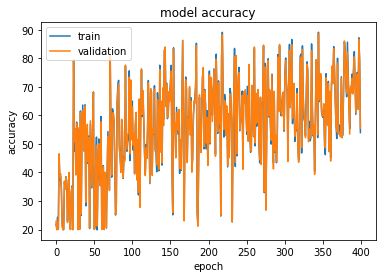

Maximum Train Accuracy : 89.16667175292969
Maximum Validation Accuracy : 88.77777862548828


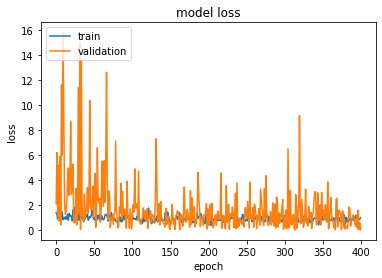

Minimum Train Loss : 0.3707966208457947
Minimum Validation Loss : 0.003912774845957756


In [ ]:
Bacteria_model_phase_Adagrad_001 = Bact_Net(batch_norm=True)
Bacteria_model_phase_Adagrad_001.cuda()
trainer_Adagrad_phase_001 = trainer(Bacteria_model_phase_Adagrad_001, phase_train_loader,"Adagrad", epoch_size=400, learning_rate=0.01)
trainer_Adagrad_phase_001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adagrad_phase_001.history['train_acc'])
plt.plot(trainer_Adagrad_phase_001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adagrad_phase_001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adagrad_phase_001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adagrad_phase_001.history['train_loss'])
plt.plot(trainer_Adagrad_phase_001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adagrad_phase_001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adagrad_phase_001.history['val_loss'])}")

# Adam_0.0001_400epoch

  0%|          | 0/400 [00:00<?, ?it/s]

Train Acc | Epoch 1/400 | ACC 20.111113


  0%|          | 1/400 [00:13<1:31:29, 13.76s/it]

Val Acc | Epoch 1/400 | ACC 19.555557
Train Acc | Epoch 2/400 | ACC 42.305557


  0%|          | 2/400 [00:27<1:31:02, 13.73s/it]

Val Acc | Epoch 2/400 | ACC 42.555557
Train Acc | Epoch 3/400 | ACC 47.611111


  1%|          | 3/400 [00:41<1:30:48, 13.72s/it]

Val Acc | Epoch 3/400 | ACC 47.111111
Train Acc | Epoch 4/400 | ACC 43.972225


  1%|          | 4/400 [00:54<1:29:51, 13.62s/it]

Val Acc | Epoch 4/400 | ACC 45.000000
Train Acc | Epoch 5/400 | ACC 55.083336


  1%|▏         | 5/400 [01:08<1:29:26, 13.59s/it]

Val Acc | Epoch 5/400 | ACC 53.111111
Train Acc | Epoch 6/400 | ACC 57.888889


  2%|▏         | 6/400 [01:21<1:29:26, 13.62s/it]

Val Acc | Epoch 6/400 | ACC 56.777782
Train Acc | Epoch 7/400 | ACC 57.277782


  2%|▏         | 7/400 [01:35<1:29:16, 13.63s/it]

Val Acc | Epoch 7/400 | ACC 59.222221
Train Acc | Epoch 8/400 | ACC 62.416668


  2%|▏         | 8/400 [01:49<1:29:06, 13.64s/it]

Val Acc | Epoch 8/400 | ACC 62.111115
Train Acc | Epoch 9/400 | ACC 64.472221


  2%|▏         | 9/400 [02:03<1:29:29, 13.73s/it]

Val Acc | Epoch 9/400 | ACC 64.888885
Train Acc | Epoch 10/400 | ACC 62.388889


  2%|▎         | 10/400 [02:16<1:29:25, 13.76s/it]

Val Acc | Epoch 10/400 | ACC 60.333336
Train Acc | Epoch 11/400 | ACC 65.000000


  3%|▎         | 11/400 [02:30<1:29:16, 13.77s/it]

Val Acc | Epoch 11/400 | ACC 63.000000
Train Acc | Epoch 12/400 | ACC 65.861115


  3%|▎         | 12/400 [02:44<1:29:05, 13.78s/it]

Val Acc | Epoch 12/400 | ACC 65.666672
Train Acc | Epoch 13/400 | ACC 65.750000


  3%|▎         | 13/400 [02:58<1:28:40, 13.75s/it]

Val Acc | Epoch 13/400 | ACC 67.555557
Train Acc | Epoch 14/400 | ACC 64.805557


  4%|▎         | 14/400 [03:11<1:28:17, 13.72s/it]

Val Acc | Epoch 14/400 | ACC 64.555557
Train Acc | Epoch 15/400 | ACC 65.722221


  4%|▍         | 15/400 [03:25<1:27:33, 13.65s/it]

Val Acc | Epoch 15/400 | ACC 65.000000
Train Acc | Epoch 16/400 | ACC 67.083336


  4%|▍         | 16/400 [03:38<1:27:08, 13.62s/it]

Val Acc | Epoch 16/400 | ACC 66.777779
Train Acc | Epoch 17/400 | ACC 67.222229


  4%|▍         | 17/400 [03:52<1:27:17, 13.67s/it]

Val Acc | Epoch 17/400 | ACC 65.666672
Train Acc | Epoch 18/400 | ACC 69.722221


  4%|▍         | 18/400 [04:06<1:26:53, 13.65s/it]

Val Acc | Epoch 18/400 | ACC 66.555557
Train Acc | Epoch 19/400 | ACC 69.388893


  5%|▍         | 19/400 [04:20<1:26:54, 13.69s/it]

Val Acc | Epoch 19/400 | ACC 68.666664
Train Acc | Epoch 20/400 | ACC 70.333336


  5%|▌         | 20/400 [04:33<1:26:46, 13.70s/it]

Val Acc | Epoch 20/400 | ACC 68.666664
Train Acc | Epoch 21/400 | ACC 70.305557


  5%|▌         | 21/400 [04:47<1:26:09, 13.64s/it]

Val Acc | Epoch 21/400 | ACC 69.666664
Train Acc | Epoch 22/400 | ACC 69.277779


  6%|▌         | 22/400 [05:01<1:27:34, 13.90s/it]

Val Acc | Epoch 22/400 | ACC 66.888893
Train Acc | Epoch 23/400 | ACC 73.166672


  6%|▌         | 23/400 [05:15<1:26:56, 13.84s/it]

Val Acc | Epoch 23/400 | ACC 72.666672
Train Acc | Epoch 24/400 | ACC 72.833336


  6%|▌         | 24/400 [05:29<1:26:24, 13.79s/it]

Val Acc | Epoch 24/400 | ACC 71.666672
Train Acc | Epoch 25/400 | ACC 73.583336


  6%|▋         | 25/400 [05:42<1:25:59, 13.76s/it]

Val Acc | Epoch 25/400 | ACC 71.888885
Train Acc | Epoch 26/400 | ACC 69.638893


  6%|▋         | 26/400 [05:56<1:25:13, 13.67s/it]

Val Acc | Epoch 26/400 | ACC 69.555557
Train Acc | Epoch 27/400 | ACC 75.833336


  7%|▋         | 27/400 [06:10<1:25:18, 13.72s/it]

Val Acc | Epoch 27/400 | ACC 74.333336
Train Acc | Epoch 28/400 | ACC 75.527779


  7%|▋         | 28/400 [06:23<1:24:58, 13.71s/it]

Val Acc | Epoch 28/400 | ACC 73.888893
Train Acc | Epoch 29/400 | ACC 74.750000


  7%|▋         | 29/400 [06:37<1:24:51, 13.72s/it]

Val Acc | Epoch 29/400 | ACC 74.222221
Train Acc | Epoch 30/400 | ACC 76.888885


  8%|▊         | 30/400 [06:51<1:24:15, 13.66s/it]

Val Acc | Epoch 30/400 | ACC 75.000000
Train Acc | Epoch 31/400 | ACC 77.027779


  8%|▊         | 31/400 [07:04<1:24:01, 13.66s/it]

Val Acc | Epoch 31/400 | ACC 74.666664
Train Acc | Epoch 32/400 | ACC 77.722221


  8%|▊         | 32/400 [07:18<1:24:01, 13.70s/it]

Val Acc | Epoch 32/400 | ACC 74.555557
Train Acc | Epoch 33/400 | ACC 77.861115


  8%|▊         | 33/400 [07:32<1:23:45, 13.69s/it]

Val Acc | Epoch 33/400 | ACC 76.888885
Train Acc | Epoch 34/400 | ACC 77.416672


  8%|▊         | 34/400 [07:45<1:22:47, 13.57s/it]

Val Acc | Epoch 34/400 | ACC 74.888893
Train Acc | Epoch 35/400 | ACC 79.194443


  9%|▉         | 35/400 [07:59<1:22:24, 13.55s/it]

Val Acc | Epoch 35/400 | ACC 77.777779
Train Acc | Epoch 36/400 | ACC 78.111115


  9%|▉         | 36/400 [08:12<1:22:31, 13.60s/it]

Val Acc | Epoch 36/400 | ACC 76.000000
Train Acc | Epoch 37/400 | ACC 79.888893


  9%|▉         | 37/400 [08:26<1:21:59, 13.55s/it]

Val Acc | Epoch 37/400 | ACC 78.555557
Train Acc | Epoch 38/400 | ACC 76.388893


 10%|▉         | 38/400 [08:39<1:21:53, 13.57s/it]

Val Acc | Epoch 38/400 | ACC 74.333336
Train Acc | Epoch 39/400 | ACC 80.000000


 10%|▉         | 39/400 [08:53<1:21:54, 13.61s/it]

Val Acc | Epoch 39/400 | ACC 78.888893
Train Acc | Epoch 40/400 | ACC 79.361115


 10%|█         | 40/400 [09:07<1:21:55, 13.65s/it]

Val Acc | Epoch 40/400 | ACC 76.111115
Train Acc | Epoch 41/400 | ACC 79.833336


 10%|█         | 41/400 [09:21<1:21:54, 13.69s/it]

Val Acc | Epoch 41/400 | ACC 77.111115
Train Acc | Epoch 42/400 | ACC 79.611115


 10%|█         | 42/400 [09:34<1:21:55, 13.73s/it]

Val Acc | Epoch 42/400 | ACC 77.666672
Train Acc | Epoch 43/400 | ACC 80.583336


 11%|█         | 43/400 [09:48<1:21:18, 13.66s/it]

Val Acc | Epoch 43/400 | ACC 78.666672
Train Acc | Epoch 44/400 | ACC 77.277779


 11%|█         | 44/400 [10:02<1:21:29, 13.73s/it]

Val Acc | Epoch 44/400 | ACC 74.000000
Train Acc | Epoch 45/400 | ACC 80.861115


 11%|█▏        | 45/400 [10:16<1:22:50, 14.00s/it]

Val Acc | Epoch 45/400 | ACC 80.111107
Train Acc | Epoch 46/400 | ACC 80.027779


 12%|█▏        | 46/400 [10:30<1:22:26, 13.97s/it]

Val Acc | Epoch 46/400 | ACC 78.888893
Train Acc | Epoch 47/400 | ACC 77.250000


 12%|█▏        | 47/400 [10:44<1:22:01, 13.94s/it]

Val Acc | Epoch 47/400 | ACC 76.111115
Train Acc | Epoch 48/400 | ACC 78.638893


 12%|█▏        | 48/400 [10:58<1:21:19, 13.86s/it]

Val Acc | Epoch 48/400 | ACC 78.555557
Train Acc | Epoch 49/400 | ACC 78.083336


 12%|█▏        | 49/400 [11:12<1:21:00, 13.85s/it]

Val Acc | Epoch 49/400 | ACC 76.444450
Train Acc | Epoch 50/400 | ACC 81.194450


 12%|█▎        | 50/400 [11:25<1:20:28, 13.80s/it]

Val Acc | Epoch 50/400 | ACC 78.888893
Train Acc | Epoch 51/400 | ACC 80.861115


 13%|█▎        | 51/400 [11:39<1:20:04, 13.77s/it]

Val Acc | Epoch 51/400 | ACC 79.777779
Train Acc | Epoch 52/400 | ACC 79.888893


 13%|█▎        | 52/400 [11:53<1:20:05, 13.81s/it]

Val Acc | Epoch 52/400 | ACC 77.888885
Train Acc | Epoch 53/400 | ACC 81.305557


 13%|█▎        | 53/400 [12:07<1:19:30, 13.75s/it]

Val Acc | Epoch 53/400 | ACC 80.222229
Train Acc | Epoch 54/400 | ACC 81.138893


 14%|█▎        | 54/400 [12:20<1:19:17, 13.75s/it]

Val Acc | Epoch 54/400 | ACC 79.222229
Train Acc | Epoch 55/400 | ACC 81.472221


 14%|█▍        | 55/400 [12:34<1:18:55, 13.73s/it]

Val Acc | Epoch 55/400 | ACC 80.777779
Train Acc | Epoch 56/400 | ACC 80.777779


 14%|█▍        | 56/400 [12:48<1:18:40, 13.72s/it]

Val Acc | Epoch 56/400 | ACC 78.666672
Train Acc | Epoch 57/400 | ACC 79.611115


 14%|█▍        | 57/400 [13:01<1:18:19, 13.70s/it]

Val Acc | Epoch 57/400 | ACC 76.777779
Train Acc | Epoch 58/400 | ACC 81.972221


 14%|█▍        | 58/400 [13:15<1:17:42, 13.63s/it]

Val Acc | Epoch 58/400 | ACC 78.888893
Train Acc | Epoch 59/400 | ACC 82.194450


 15%|█▍        | 59/400 [13:28<1:17:16, 13.60s/it]

Val Acc | Epoch 59/400 | ACC 80.666664
Train Acc | Epoch 60/400 | ACC 83.055557


 15%|█▌        | 60/400 [13:42<1:17:03, 13.60s/it]

Val Acc | Epoch 60/400 | ACC 80.555557
Train Acc | Epoch 61/400 | ACC 83.277779


 15%|█▌        | 61/400 [13:55<1:16:42, 13.58s/it]

Val Acc | Epoch 61/400 | ACC 80.555557
Train Acc | Epoch 62/400 | ACC 82.027779


 16%|█▌        | 62/400 [14:09<1:16:10, 13.52s/it]

Val Acc | Epoch 62/400 | ACC 79.888893
Train Acc | Epoch 63/400 | ACC 82.944450


 16%|█▌        | 63/400 [14:23<1:16:34, 13.63s/it]

Val Acc | Epoch 63/400 | ACC 81.333336
Train Acc | Epoch 64/400 | ACC 81.166664


 16%|█▌        | 64/400 [14:36<1:16:30, 13.66s/it]

Val Acc | Epoch 64/400 | ACC 79.000000
Train Acc | Epoch 65/400 | ACC 83.083336


 16%|█▋        | 65/400 [14:50<1:16:20, 13.67s/it]

Val Acc | Epoch 65/400 | ACC 81.000000
Train Acc | Epoch 66/400 | ACC 81.972221


 16%|█▋        | 66/400 [15:04<1:15:48, 13.62s/it]

Val Acc | Epoch 66/400 | ACC 81.000000
Train Acc | Epoch 67/400 | ACC 82.500008


 17%|█▋        | 67/400 [15:18<1:16:49, 13.84s/it]

Val Acc | Epoch 67/400 | ACC 80.666664
Train Acc | Epoch 68/400 | ACC 83.000008


 17%|█▋        | 68/400 [15:32<1:17:35, 14.02s/it]

Val Acc | Epoch 68/400 | ACC 81.222221
Train Acc | Epoch 69/400 | ACC 82.472221


 17%|█▋        | 69/400 [15:46<1:16:48, 13.92s/it]

Val Acc | Epoch 69/400 | ACC 82.111115
Train Acc | Epoch 70/400 | ACC 83.888885


 18%|█▊        | 70/400 [16:00<1:16:18, 13.87s/it]

Val Acc | Epoch 70/400 | ACC 82.777779
Train Acc | Epoch 71/400 | ACC 83.638885


 18%|█▊        | 71/400 [16:14<1:15:42, 13.81s/it]

Val Acc | Epoch 71/400 | ACC 81.000000
Train Acc | Epoch 72/400 | ACC 83.722221


 18%|█▊        | 72/400 [16:27<1:15:19, 13.78s/it]

Val Acc | Epoch 72/400 | ACC 81.666664
Train Acc | Epoch 73/400 | ACC 83.027779


 18%|█▊        | 73/400 [16:41<1:14:57, 13.75s/it]

Val Acc | Epoch 73/400 | ACC 82.222221
Train Acc | Epoch 74/400 | ACC 82.083336


 18%|█▊        | 74/400 [16:55<1:14:32, 13.72s/it]

Val Acc | Epoch 74/400 | ACC 80.333336
Train Acc | Epoch 75/400 | ACC 83.916672


 19%|█▉        | 75/400 [17:08<1:14:02, 13.67s/it]

Val Acc | Epoch 75/400 | ACC 82.777779
Train Acc | Epoch 76/400 | ACC 83.500000


 19%|█▉        | 76/400 [17:22<1:14:01, 13.71s/it]

Val Acc | Epoch 76/400 | ACC 81.555557
Train Acc | Epoch 77/400 | ACC 83.583336


 19%|█▉        | 77/400 [17:36<1:13:56, 13.74s/it]

Val Acc | Epoch 77/400 | ACC 82.777779
Train Acc | Epoch 78/400 | ACC 84.388893


 20%|█▉        | 78/400 [17:50<1:13:49, 13.76s/it]

Val Acc | Epoch 78/400 | ACC 82.555557
Train Acc | Epoch 79/400 | ACC 84.916672


 20%|█▉        | 79/400 [18:03<1:13:33, 13.75s/it]

Val Acc | Epoch 79/400 | ACC 81.444450
Train Acc | Epoch 80/400 | ACC 84.361115


 20%|██        | 80/400 [18:17<1:13:42, 13.82s/it]

Val Acc | Epoch 80/400 | ACC 83.666672
Train Acc | Epoch 81/400 | ACC 84.000000


 20%|██        | 81/400 [18:31<1:13:20, 13.79s/it]

Val Acc | Epoch 81/400 | ACC 84.333336
Train Acc | Epoch 82/400 | ACC 84.138885


 20%|██        | 82/400 [18:45<1:13:14, 13.82s/it]

Val Acc | Epoch 82/400 | ACC 82.111115
Train Acc | Epoch 83/400 | ACC 82.888885


 21%|██        | 83/400 [18:59<1:13:03, 13.83s/it]

Val Acc | Epoch 83/400 | ACC 81.888893
Train Acc | Epoch 84/400 | ACC 84.666672


 21%|██        | 84/400 [19:13<1:13:00, 13.86s/it]

Val Acc | Epoch 84/400 | ACC 82.333336
Train Acc | Epoch 85/400 | ACC 83.888885


 21%|██▏       | 85/400 [19:26<1:12:28, 13.81s/it]

Val Acc | Epoch 85/400 | ACC 81.555557
Train Acc | Epoch 86/400 | ACC 84.472229


 22%|██▏       | 86/400 [19:40<1:11:57, 13.75s/it]

Val Acc | Epoch 86/400 | ACC 82.333336
Train Acc | Epoch 87/400 | ACC 84.194443


 22%|██▏       | 87/400 [19:54<1:12:05, 13.82s/it]

Val Acc | Epoch 87/400 | ACC 83.555557
Train Acc | Epoch 88/400 | ACC 84.972229


 22%|██▏       | 88/400 [20:07<1:11:15, 13.70s/it]

Val Acc | Epoch 88/400 | ACC 84.222221
Train Acc | Epoch 89/400 | ACC 83.833336


 22%|██▏       | 89/400 [20:21<1:10:43, 13.64s/it]

Val Acc | Epoch 89/400 | ACC 83.111115
Train Acc | Epoch 90/400 | ACC 84.333336


 22%|██▎       | 90/400 [20:35<1:11:29, 13.84s/it]

Val Acc | Epoch 90/400 | ACC 81.333336
Train Acc | Epoch 91/400 | ACC 84.722229


 23%|██▎       | 91/400 [20:49<1:11:03, 13.80s/it]

Val Acc | Epoch 91/400 | ACC 83.555557
Train Acc | Epoch 92/400 | ACC 84.611115


 23%|██▎       | 92/400 [21:02<1:10:26, 13.72s/it]

Val Acc | Epoch 92/400 | ACC 84.222221
Train Acc | Epoch 93/400 | ACC 84.722229


 23%|██▎       | 93/400 [21:16<1:09:50, 13.65s/it]

Val Acc | Epoch 93/400 | ACC 83.777779
Train Acc | Epoch 94/400 | ACC 85.555557


 24%|██▎       | 94/400 [21:30<1:10:17, 13.78s/it]

Val Acc | Epoch 94/400 | ACC 82.555557
Train Acc | Epoch 95/400 | ACC 85.111115


 24%|██▍       | 95/400 [21:44<1:10:29, 13.87s/it]

Val Acc | Epoch 95/400 | ACC 83.555557
Train Acc | Epoch 96/400 | ACC 85.055557


 24%|██▍       | 96/400 [21:58<1:10:28, 13.91s/it]

Val Acc | Epoch 96/400 | ACC 82.333336
Train Acc | Epoch 97/400 | ACC 84.166672


 24%|██▍       | 97/400 [22:12<1:10:16, 13.92s/it]

Val Acc | Epoch 97/400 | ACC 82.555557
Train Acc | Epoch 98/400 | ACC 86.333336


 24%|██▍       | 98/400 [22:26<1:10:19, 13.97s/it]

Val Acc | Epoch 98/400 | ACC 84.444443
Train Acc | Epoch 99/400 | ACC 85.583336


 25%|██▍       | 99/400 [22:40<1:10:09, 13.98s/it]

Val Acc | Epoch 99/400 | ACC 84.777779
Train Acc | Epoch 100/400 | ACC 82.833336


 25%|██▌       | 100/400 [22:54<1:09:24, 13.88s/it]

Val Acc | Epoch 100/400 | ACC 82.333336
Train Acc | Epoch 101/400 | ACC 83.527779


 25%|██▌       | 101/400 [23:08<1:09:17, 13.90s/it]

Val Acc | Epoch 101/400 | ACC 84.222221
Train Acc | Epoch 102/400 | ACC 85.416672


 26%|██▌       | 102/400 [23:22<1:09:05, 13.91s/it]

Val Acc | Epoch 102/400 | ACC 84.111115
Train Acc | Epoch 103/400 | ACC 84.694443


 26%|██▌       | 103/400 [23:35<1:08:37, 13.86s/it]

Val Acc | Epoch 103/400 | ACC 84.555557
Train Acc | Epoch 104/400 | ACC 84.527779


 26%|██▌       | 104/400 [23:49<1:07:59, 13.78s/it]

Val Acc | Epoch 104/400 | ACC 83.000008
Train Acc | Epoch 105/400 | ACC 86.111107


 26%|██▋       | 105/400 [24:03<1:07:32, 13.74s/it]

Val Acc | Epoch 105/400 | ACC 84.222221
Train Acc | Epoch 106/400 | ACC 85.166672


 26%|██▋       | 106/400 [24:16<1:07:28, 13.77s/it]

Val Acc | Epoch 106/400 | ACC 84.555557
Train Acc | Epoch 107/400 | ACC 85.083336


 27%|██▋       | 107/400 [24:30<1:07:19, 13.79s/it]

Val Acc | Epoch 107/400 | ACC 83.888885
Train Acc | Epoch 108/400 | ACC 86.250000


 27%|██▋       | 108/400 [24:44<1:07:13, 13.81s/it]

Val Acc | Epoch 108/400 | ACC 84.555557
Train Acc | Epoch 109/400 | ACC 85.750000


 27%|██▋       | 109/400 [24:58<1:07:15, 13.87s/it]

Val Acc | Epoch 109/400 | ACC 84.000000
Train Acc | Epoch 110/400 | ACC 85.000000


 28%|██▊       | 110/400 [25:12<1:06:41, 13.80s/it]

Val Acc | Epoch 110/400 | ACC 83.888885
Train Acc | Epoch 111/400 | ACC 84.916672


 28%|██▊       | 111/400 [25:26<1:06:39, 13.84s/it]

Val Acc | Epoch 111/400 | ACC 84.222221
Train Acc | Epoch 112/400 | ACC 85.722229


 28%|██▊       | 112/400 [25:41<1:08:20, 14.24s/it]

Val Acc | Epoch 112/400 | ACC 84.888893
Train Acc | Epoch 113/400 | ACC 86.750000


 28%|██▊       | 113/400 [25:56<1:08:38, 14.35s/it]

Val Acc | Epoch 113/400 | ACC 84.666672
Train Acc | Epoch 114/400 | ACC 86.722221


 28%|██▊       | 114/400 [26:10<1:08:24, 14.35s/it]

Val Acc | Epoch 114/400 | ACC 85.111115
Train Acc | Epoch 115/400 | ACC 86.138893


 29%|██▉       | 115/400 [26:24<1:07:37, 14.24s/it]

Val Acc | Epoch 115/400 | ACC 85.111115
Train Acc | Epoch 116/400 | ACC 87.027779


 29%|██▉       | 116/400 [26:38<1:06:49, 14.12s/it]

Val Acc | Epoch 116/400 | ACC 85.111115
Train Acc | Epoch 117/400 | ACC 86.527786


 29%|██▉       | 117/400 [26:52<1:06:17, 14.05s/it]

Val Acc | Epoch 117/400 | ACC 85.000000
Train Acc | Epoch 118/400 | ACC 86.027779


 30%|██▉       | 118/400 [27:05<1:05:43, 13.98s/it]

Val Acc | Epoch 118/400 | ACC 84.777779
Train Acc | Epoch 119/400 | ACC 87.305557


 30%|██▉       | 119/400 [27:19<1:05:33, 14.00s/it]

Val Acc | Epoch 119/400 | ACC 84.666672
Train Acc | Epoch 120/400 | ACC 85.333336


 30%|███       | 120/400 [27:34<1:05:32, 14.04s/it]

Val Acc | Epoch 120/400 | ACC 84.555557
Train Acc | Epoch 121/400 | ACC 86.388893


 30%|███       | 121/400 [27:48<1:05:08, 14.01s/it]

Val Acc | Epoch 121/400 | ACC 86.666664
Train Acc | Epoch 122/400 | ACC 86.250000


 30%|███       | 122/400 [28:01<1:04:37, 13.95s/it]

Val Acc | Epoch 122/400 | ACC 85.222229
Train Acc | Epoch 123/400 | ACC 86.750000


 31%|███       | 123/400 [28:15<1:04:10, 13.90s/it]

Val Acc | Epoch 123/400 | ACC 84.666672
Train Acc | Epoch 124/400 | ACC 88.166664


 31%|███       | 124/400 [28:29<1:04:35, 14.04s/it]

Val Acc | Epoch 124/400 | ACC 86.000000
Train Acc | Epoch 125/400 | ACC 87.361115


 31%|███▏      | 125/400 [28:43<1:04:06, 13.99s/it]

Val Acc | Epoch 125/400 | ACC 85.555557
Train Acc | Epoch 126/400 | ACC 87.416664


 32%|███▏      | 126/400 [28:57<1:03:40, 13.94s/it]

Val Acc | Epoch 126/400 | ACC 85.666672
Train Acc | Epoch 127/400 | ACC 86.000000


 32%|███▏      | 127/400 [29:11<1:03:22, 13.93s/it]

Val Acc | Epoch 127/400 | ACC 85.555557
Train Acc | Epoch 128/400 | ACC 86.416664


 32%|███▏      | 128/400 [29:25<1:03:09, 13.93s/it]

Val Acc | Epoch 128/400 | ACC 86.000000
Train Acc | Epoch 129/400 | ACC 87.361115


 32%|███▏      | 129/400 [29:39<1:02:24, 13.82s/it]

Val Acc | Epoch 129/400 | ACC 86.444450
Train Acc | Epoch 130/400 | ACC 86.694450


 32%|███▎      | 130/400 [29:52<1:02:06, 13.80s/it]

Val Acc | Epoch 130/400 | ACC 86.111107
Train Acc | Epoch 131/400 | ACC 87.083336


 33%|███▎      | 131/400 [30:06<1:01:42, 13.77s/it]

Val Acc | Epoch 131/400 | ACC 85.555557
Train Acc | Epoch 132/400 | ACC 87.583336


 33%|███▎      | 132/400 [30:20<1:01:36, 13.79s/it]

Val Acc | Epoch 132/400 | ACC 87.444450
Train Acc | Epoch 133/400 | ACC 85.472229


 33%|███▎      | 133/400 [30:34<1:01:13, 13.76s/it]

Val Acc | Epoch 133/400 | ACC 84.666672
Train Acc | Epoch 134/400 | ACC 88.055557


 34%|███▎      | 134/400 [30:48<1:01:16, 13.82s/it]

Val Acc | Epoch 134/400 | ACC 86.333336
Train Acc | Epoch 135/400 | ACC 87.388893


 34%|███▍      | 135/400 [31:02<1:01:17, 13.88s/it]

Val Acc | Epoch 135/400 | ACC 85.000000
Train Acc | Epoch 136/400 | ACC 88.305557


 34%|███▍      | 136/400 [31:15<1:00:46, 13.81s/it]

Val Acc | Epoch 136/400 | ACC 85.888893
Train Acc | Epoch 137/400 | ACC 88.555557


 34%|███▍      | 137/400 [31:29<1:00:11, 13.73s/it]

Val Acc | Epoch 137/400 | ACC 86.222229
Train Acc | Epoch 138/400 | ACC 87.361115


 34%|███▍      | 138/400 [31:42<59:54, 13.72s/it]  

Val Acc | Epoch 138/400 | ACC 85.222229
Train Acc | Epoch 139/400 | ACC 87.555557


 35%|███▍      | 139/400 [31:56<59:36, 13.70s/it]

Val Acc | Epoch 139/400 | ACC 86.666664
Train Acc | Epoch 140/400 | ACC 87.138893


 35%|███▌      | 140/400 [32:10<59:43, 13.78s/it]

Val Acc | Epoch 140/400 | ACC 86.111107
Train Acc | Epoch 141/400 | ACC 86.111107


 35%|███▌      | 141/400 [32:24<1:00:09, 13.94s/it]

Val Acc | Epoch 141/400 | ACC 86.222229
Train Acc | Epoch 142/400 | ACC 86.861115


 36%|███▌      | 142/400 [32:38<1:00:02, 13.96s/it]

Val Acc | Epoch 142/400 | ACC 85.777779
Train Acc | Epoch 143/400 | ACC 88.555557


 36%|███▌      | 143/400 [32:53<1:00:26, 14.11s/it]

Val Acc | Epoch 143/400 | ACC 87.444450
Train Acc | Epoch 144/400 | ACC 87.305557


 36%|███▌      | 144/400 [33:07<1:00:07, 14.09s/it]

Val Acc | Epoch 144/400 | ACC 85.000000
Train Acc | Epoch 145/400 | ACC 87.444450


 36%|███▋      | 145/400 [33:21<59:18, 13.96s/it]  

Val Acc | Epoch 145/400 | ACC 85.666672
Train Acc | Epoch 146/400 | ACC 87.305557


 36%|███▋      | 146/400 [33:34<58:58, 13.93s/it]

Val Acc | Epoch 146/400 | ACC 86.777786
Train Acc | Epoch 147/400 | ACC 82.500008


 37%|███▋      | 147/400 [33:48<58:12, 13.81s/it]

Val Acc | Epoch 147/400 | ACC 81.333336
Train Acc | Epoch 148/400 | ACC 87.750000


 37%|███▋      | 148/400 [34:02<57:55, 13.79s/it]

Val Acc | Epoch 148/400 | ACC 86.222229
Train Acc | Epoch 149/400 | ACC 87.138893


 37%|███▋      | 149/400 [34:15<57:20, 13.71s/it]

Val Acc | Epoch 149/400 | ACC 86.555557
Train Acc | Epoch 150/400 | ACC 88.111115


 38%|███▊      | 150/400 [34:29<57:05, 13.70s/it]

Val Acc | Epoch 150/400 | ACC 87.000000
Train Acc | Epoch 151/400 | ACC 88.111115


 38%|███▊      | 151/400 [34:43<56:59, 13.73s/it]

Val Acc | Epoch 151/400 | ACC 86.666664
Train Acc | Epoch 152/400 | ACC 88.472221


 38%|███▊      | 152/400 [34:56<56:40, 13.71s/it]

Val Acc | Epoch 152/400 | ACC 86.888893
Train Acc | Epoch 153/400 | ACC 86.194443


 38%|███▊      | 153/400 [35:10<56:30, 13.73s/it]

Val Acc | Epoch 153/400 | ACC 85.222229
Train Acc | Epoch 154/400 | ACC 87.888893


 38%|███▊      | 154/400 [35:24<56:17, 13.73s/it]

Val Acc | Epoch 154/400 | ACC 87.333336
Train Acc | Epoch 155/400 | ACC 87.694450


 39%|███▉      | 155/400 [35:37<55:55, 13.70s/it]

Val Acc | Epoch 155/400 | ACC 86.666664
Train Acc | Epoch 156/400 | ACC 88.388893


 39%|███▉      | 156/400 [35:51<55:40, 13.69s/it]

Val Acc | Epoch 156/400 | ACC 86.555557
Train Acc | Epoch 157/400 | ACC 88.444450


 39%|███▉      | 157/400 [36:05<56:07, 13.86s/it]

Val Acc | Epoch 157/400 | ACC 86.000000
Train Acc | Epoch 158/400 | ACC 88.611115


 40%|███▉      | 158/400 [36:19<55:45, 13.82s/it]

Val Acc | Epoch 158/400 | ACC 86.777786
Train Acc | Epoch 159/400 | ACC 87.888893


 40%|███▉      | 159/400 [36:33<55:41, 13.86s/it]

Val Acc | Epoch 159/400 | ACC 86.444450
Train Acc | Epoch 160/400 | ACC 87.388893


 40%|████      | 160/400 [36:47<55:07, 13.78s/it]

Val Acc | Epoch 160/400 | ACC 86.111107
Train Acc | Epoch 161/400 | ACC 86.805557


 40%|████      | 161/400 [37:01<55:00, 13.81s/it]

Val Acc | Epoch 161/400 | ACC 86.444450
Train Acc | Epoch 162/400 | ACC 88.611115


 40%|████      | 162/400 [37:15<55:06, 13.89s/it]

Val Acc | Epoch 162/400 | ACC 87.222221
Train Acc | Epoch 163/400 | ACC 88.888893


 41%|████      | 163/400 [37:29<55:10, 13.97s/it]

Val Acc | Epoch 163/400 | ACC 85.777779
Train Acc | Epoch 164/400 | ACC 88.444450


 41%|████      | 164/400 [37:43<55:04, 14.00s/it]

Val Acc | Epoch 164/400 | ACC 86.222229
Train Acc | Epoch 165/400 | ACC 87.972221


 41%|████▏     | 165/400 [37:57<54:51, 14.01s/it]

Val Acc | Epoch 165/400 | ACC 86.444450
Train Acc | Epoch 166/400 | ACC 88.250000


 42%|████▏     | 166/400 [38:11<54:30, 13.98s/it]

Val Acc | Epoch 166/400 | ACC 85.888893
Train Acc | Epoch 167/400 | ACC 87.444450


 42%|████▏     | 167/400 [38:25<54:10, 13.95s/it]

Val Acc | Epoch 167/400 | ACC 86.888893
Train Acc | Epoch 168/400 | ACC 87.805557


 42%|████▏     | 168/400 [38:39<53:49, 13.92s/it]

Val Acc | Epoch 168/400 | ACC 86.333336
Train Acc | Epoch 169/400 | ACC 87.833336


 42%|████▏     | 169/400 [38:52<53:33, 13.91s/it]

Val Acc | Epoch 169/400 | ACC 86.000000
Train Acc | Epoch 170/400 | ACC 88.777779


 42%|████▎     | 170/400 [39:07<53:32, 13.97s/it]

Val Acc | Epoch 170/400 | ACC 87.222221
Train Acc | Epoch 171/400 | ACC 86.305557


 43%|████▎     | 171/400 [39:20<53:14, 13.95s/it]

Val Acc | Epoch 171/400 | ACC 84.888893
Train Acc | Epoch 172/400 | ACC 87.861115


 43%|████▎     | 172/400 [39:34<53:00, 13.95s/it]

Val Acc | Epoch 172/400 | ACC 86.333336
Train Acc | Epoch 173/400 | ACC 88.638893


 43%|████▎     | 173/400 [39:48<52:33, 13.89s/it]

Val Acc | Epoch 173/400 | ACC 87.777779
Train Acc | Epoch 174/400 | ACC 87.694450


 44%|████▎     | 174/400 [40:02<52:21, 13.90s/it]

Val Acc | Epoch 174/400 | ACC 87.111115
Train Acc | Epoch 175/400 | ACC 87.722221


 44%|████▍     | 175/400 [40:16<51:57, 13.85s/it]

Val Acc | Epoch 175/400 | ACC 84.555557
Train Acc | Epoch 176/400 | ACC 88.000000


 44%|████▍     | 176/400 [40:30<51:38, 13.83s/it]

Val Acc | Epoch 176/400 | ACC 86.222229
Train Acc | Epoch 177/400 | ACC 87.944450


 44%|████▍     | 177/400 [40:43<51:20, 13.81s/it]

Val Acc | Epoch 177/400 | ACC 88.777779
Train Acc | Epoch 178/400 | ACC 88.083336


 44%|████▍     | 178/400 [40:57<51:05, 13.81s/it]

Val Acc | Epoch 178/400 | ACC 87.333336
Train Acc | Epoch 179/400 | ACC 88.555557


 45%|████▍     | 179/400 [41:11<51:15, 13.92s/it]

Val Acc | Epoch 179/400 | ACC 87.222221
Train Acc | Epoch 180/400 | ACC 87.694450


 45%|████▌     | 180/400 [41:25<51:13, 13.97s/it]

Val Acc | Epoch 180/400 | ACC 86.666664
Train Acc | Epoch 181/400 | ACC 88.916672


 45%|████▌     | 181/400 [41:39<50:33, 13.85s/it]

Val Acc | Epoch 181/400 | ACC 87.111115
Train Acc | Epoch 182/400 | ACC 87.805557


 46%|████▌     | 182/400 [41:53<50:33, 13.91s/it]

Val Acc | Epoch 182/400 | ACC 86.000000
Train Acc | Epoch 183/400 | ACC 85.777779


 46%|████▌     | 183/400 [42:07<50:10, 13.87s/it]

Val Acc | Epoch 183/400 | ACC 85.777779
Train Acc | Epoch 184/400 | ACC 88.500008


 46%|████▌     | 184/400 [42:21<49:50, 13.84s/it]

Val Acc | Epoch 184/400 | ACC 86.333336
Train Acc | Epoch 185/400 | ACC 88.555557


 46%|████▋     | 185/400 [42:34<49:39, 13.86s/it]

Val Acc | Epoch 185/400 | ACC 87.666664
Train Acc | Epoch 186/400 | ACC 88.027779


 46%|████▋     | 186/400 [42:48<49:16, 13.82s/it]

Val Acc | Epoch 186/400 | ACC 87.000000
Train Acc | Epoch 187/400 | ACC 88.777779


 47%|████▋     | 187/400 [43:02<48:45, 13.73s/it]

Val Acc | Epoch 187/400 | ACC 87.555557
Train Acc | Epoch 188/400 | ACC 88.583336


 47%|████▋     | 188/400 [43:15<48:29, 13.72s/it]

Val Acc | Epoch 188/400 | ACC 87.222221
Train Acc | Epoch 189/400 | ACC 87.972221


 47%|████▋     | 189/400 [43:29<48:30, 13.79s/it]

Val Acc | Epoch 189/400 | ACC 85.888893
Train Acc | Epoch 190/400 | ACC 88.972221


 48%|████▊     | 190/400 [43:43<48:22, 13.82s/it]

Val Acc | Epoch 190/400 | ACC 87.333336
Train Acc | Epoch 191/400 | ACC 88.944450


 48%|████▊     | 191/400 [43:57<47:57, 13.77s/it]

Val Acc | Epoch 191/400 | ACC 88.444450
Train Acc | Epoch 192/400 | ACC 87.972221


 48%|████▊     | 192/400 [44:11<48:07, 13.88s/it]

Val Acc | Epoch 192/400 | ACC 87.666664
Train Acc | Epoch 193/400 | ACC 87.916664


 48%|████▊     | 193/400 [44:25<47:51, 13.87s/it]

Val Acc | Epoch 193/400 | ACC 86.555557
Train Acc | Epoch 194/400 | ACC 88.333336


 48%|████▊     | 194/400 [44:39<47:49, 13.93s/it]

Val Acc | Epoch 194/400 | ACC 86.888893
Train Acc | Epoch 195/400 | ACC 88.250000


 49%|████▉     | 195/400 [44:53<47:32, 13.91s/it]

Val Acc | Epoch 195/400 | ACC 87.222221
Train Acc | Epoch 196/400 | ACC 88.722221


 49%|████▉     | 196/400 [45:06<46:57, 13.81s/it]

Val Acc | Epoch 196/400 | ACC 87.000000
Train Acc | Epoch 197/400 | ACC 88.583336


 49%|████▉     | 197/400 [45:20<46:39, 13.79s/it]

Val Acc | Epoch 197/400 | ACC 85.888893
Train Acc | Epoch 198/400 | ACC 88.666672


 50%|████▉     | 198/400 [45:34<46:28, 13.80s/it]

Val Acc | Epoch 198/400 | ACC 86.444450
Train Acc | Epoch 199/400 | ACC 88.500008


 50%|████▉     | 199/400 [45:48<46:11, 13.79s/it]

Val Acc | Epoch 199/400 | ACC 87.555557
Train Acc | Epoch 200/400 | ACC 87.666664


 50%|█████     | 200/400 [46:02<46:04, 13.82s/it]

Val Acc | Epoch 200/400 | ACC 86.777786
Train Acc | Epoch 201/400 | ACC 88.166664


 50%|█████     | 201/400 [46:16<45:53, 13.84s/it]

Val Acc | Epoch 201/400 | ACC 87.666664
Train Acc | Epoch 202/400 | ACC 88.611115


 50%|█████     | 202/400 [46:30<46:23, 14.06s/it]

Val Acc | Epoch 202/400 | ACC 86.888893
Train Acc | Epoch 203/400 | ACC 88.194450


 51%|█████     | 203/400 [46:44<45:47, 13.95s/it]

Val Acc | Epoch 203/400 | ACC 86.222229
Train Acc | Epoch 204/400 | ACC 89.027779


 51%|█████     | 204/400 [46:58<45:28, 13.92s/it]

Val Acc | Epoch 204/400 | ACC 86.777786
Train Acc | Epoch 205/400 | ACC 89.333336


 51%|█████▏    | 205/400 [47:11<45:05, 13.88s/it]

Val Acc | Epoch 205/400 | ACC 87.888893
Train Acc | Epoch 206/400 | ACC 88.027779


 52%|█████▏    | 206/400 [47:25<44:57, 13.90s/it]

Val Acc | Epoch 206/400 | ACC 87.222221
Train Acc | Epoch 207/400 | ACC 88.333336


 52%|█████▏    | 207/400 [47:39<44:50, 13.94s/it]

Val Acc | Epoch 207/400 | ACC 87.444450
Train Acc | Epoch 208/400 | ACC 89.333336


 52%|█████▏    | 208/400 [47:53<44:38, 13.95s/it]

Val Acc | Epoch 208/400 | ACC 86.666664
Train Acc | Epoch 209/400 | ACC 88.777779


 52%|█████▏    | 209/400 [48:08<44:34, 14.00s/it]

Val Acc | Epoch 209/400 | ACC 87.666664
Train Acc | Epoch 210/400 | ACC 88.250000


 52%|█████▎    | 210/400 [48:22<44:41, 14.12s/it]

Val Acc | Epoch 210/400 | ACC 86.222229
Train Acc | Epoch 211/400 | ACC 88.277779


 53%|█████▎    | 211/400 [48:36<44:16, 14.05s/it]

Val Acc | Epoch 211/400 | ACC 86.222229
Train Acc | Epoch 212/400 | ACC 88.611115


 53%|█████▎    | 212/400 [48:50<43:56, 14.02s/it]

Val Acc | Epoch 212/400 | ACC 86.888893
Train Acc | Epoch 213/400 | ACC 89.083336


 53%|█████▎    | 213/400 [49:04<43:46, 14.05s/it]

Val Acc | Epoch 213/400 | ACC 87.666664
Train Acc | Epoch 214/400 | ACC 88.472221


 54%|█████▎    | 214/400 [49:18<43:19, 13.98s/it]

Val Acc | Epoch 214/400 | ACC 88.111115
Train Acc | Epoch 215/400 | ACC 89.222221


 54%|█████▍    | 215/400 [49:32<43:03, 13.97s/it]

Val Acc | Epoch 215/400 | ACC 86.777786
Train Acc | Epoch 216/400 | ACC 88.916672


 54%|█████▍    | 216/400 [49:46<42:50, 13.97s/it]

Val Acc | Epoch 216/400 | ACC 87.888893
Train Acc | Epoch 217/400 | ACC 88.555557


 54%|█████▍    | 217/400 [50:00<42:36, 13.97s/it]

Val Acc | Epoch 217/400 | ACC 87.000000
Train Acc | Epoch 218/400 | ACC 87.666664


 55%|█████▍    | 218/400 [50:14<42:21, 13.97s/it]

Val Acc | Epoch 218/400 | ACC 86.222229
Train Acc | Epoch 219/400 | ACC 88.583336


 55%|█████▍    | 219/400 [50:27<41:50, 13.87s/it]

Val Acc | Epoch 219/400 | ACC 87.444450
Train Acc | Epoch 220/400 | ACC 89.166672


 55%|█████▌    | 220/400 [50:41<41:24, 13.80s/it]

Val Acc | Epoch 220/400 | ACC 87.333336
Train Acc | Epoch 221/400 | ACC 89.027779


 55%|█████▌    | 221/400 [50:54<40:58, 13.73s/it]

Val Acc | Epoch 221/400 | ACC 88.111115
Train Acc | Epoch 222/400 | ACC 89.694443


 56%|█████▌    | 222/400 [51:08<40:20, 13.60s/it]

Val Acc | Epoch 222/400 | ACC 87.777779
Train Acc | Epoch 223/400 | ACC 87.722221


 56%|█████▌    | 223/400 [51:21<40:02, 13.57s/it]

Val Acc | Epoch 223/400 | ACC 88.222221
Train Acc | Epoch 224/400 | ACC 88.916672


 56%|█████▌    | 224/400 [51:35<40:22, 13.77s/it]

Val Acc | Epoch 224/400 | ACC 87.222221
Train Acc | Epoch 225/400 | ACC 88.972221


 56%|█████▋    | 225/400 [51:49<40:17, 13.82s/it]

Val Acc | Epoch 225/400 | ACC 87.666664
Train Acc | Epoch 226/400 | ACC 89.361115


 56%|█████▋    | 226/400 [52:03<40:17, 13.90s/it]

Val Acc | Epoch 226/400 | ACC 88.000000
Train Acc | Epoch 227/400 | ACC 88.944450


 57%|█████▋    | 227/400 [52:18<40:16, 13.97s/it]

Val Acc | Epoch 227/400 | ACC 86.888893
Train Acc | Epoch 228/400 | ACC 87.972221


 57%|█████▋    | 228/400 [52:32<40:11, 14.02s/it]

Val Acc | Epoch 228/400 | ACC 86.111107
Train Acc | Epoch 229/400 | ACC 89.000008


 57%|█████▋    | 229/400 [52:46<39:59, 14.03s/it]

Val Acc | Epoch 229/400 | ACC 87.333336
Train Acc | Epoch 230/400 | ACC 88.083336


 57%|█████▊    | 230/400 [53:00<39:36, 13.98s/it]

Val Acc | Epoch 230/400 | ACC 86.888893
Train Acc | Epoch 231/400 | ACC 88.694450


 58%|█████▊    | 231/400 [53:13<39:15, 13.94s/it]

Val Acc | Epoch 231/400 | ACC 87.222221
Train Acc | Epoch 232/400 | ACC 87.472221


 58%|█████▊    | 232/400 [53:27<38:48, 13.86s/it]

Val Acc | Epoch 232/400 | ACC 85.666672
Train Acc | Epoch 233/400 | ACC 88.583336


 58%|█████▊    | 233/400 [53:41<38:36, 13.87s/it]

Val Acc | Epoch 233/400 | ACC 88.000000
Train Acc | Epoch 234/400 | ACC 88.777779


 58%|█████▊    | 234/400 [53:55<38:29, 13.91s/it]

Val Acc | Epoch 234/400 | ACC 88.777779
Train Acc | Epoch 235/400 | ACC 88.861115


 59%|█████▉    | 235/400 [54:09<38:17, 13.93s/it]

Val Acc | Epoch 235/400 | ACC 87.666664
Train Acc | Epoch 236/400 | ACC 88.833336


 59%|█████▉    | 236/400 [54:23<38:10, 13.97s/it]

Val Acc | Epoch 236/400 | ACC 88.222221
Train Acc | Epoch 237/400 | ACC 89.194450


 59%|█████▉    | 237/400 [54:37<37:55, 13.96s/it]

Val Acc | Epoch 237/400 | ACC 88.444450
Train Acc | Epoch 238/400 | ACC 89.111115


 60%|█████▉    | 238/400 [54:51<37:33, 13.91s/it]

Val Acc | Epoch 238/400 | ACC 87.777779
Train Acc | Epoch 239/400 | ACC 89.138885


 60%|█████▉    | 239/400 [55:05<37:25, 13.95s/it]

Val Acc | Epoch 239/400 | ACC 87.333336
Train Acc | Epoch 240/400 | ACC 88.305557


 60%|██████    | 240/400 [55:19<37:21, 14.01s/it]

Val Acc | Epoch 240/400 | ACC 86.333336
Train Acc | Epoch 241/400 | ACC 89.166672


 60%|██████    | 241/400 [55:33<37:11, 14.03s/it]

Val Acc | Epoch 241/400 | ACC 88.333336
Train Acc | Epoch 242/400 | ACC 89.000008


 60%|██████    | 242/400 [55:47<36:57, 14.03s/it]

Val Acc | Epoch 242/400 | ACC 87.555557
Train Acc | Epoch 243/400 | ACC 88.416672


 61%|██████    | 243/400 [56:01<36:43, 14.04s/it]

Val Acc | Epoch 243/400 | ACC 87.777779
Train Acc | Epoch 244/400 | ACC 88.861115


 61%|██████    | 244/400 [56:15<36:31, 14.05s/it]

Val Acc | Epoch 244/400 | ACC 86.555557
Train Acc | Epoch 245/400 | ACC 88.750008


 61%|██████▏   | 245/400 [56:30<36:33, 14.15s/it]

Val Acc | Epoch 245/400 | ACC 88.000000
Train Acc | Epoch 246/400 | ACC 89.305557


 62%|██████▏   | 246/400 [56:44<36:39, 14.28s/it]

Val Acc | Epoch 246/400 | ACC 87.222221
Train Acc | Epoch 247/400 | ACC 89.083336


 62%|██████▏   | 247/400 [56:58<36:06, 14.16s/it]

Val Acc | Epoch 247/400 | ACC 87.777779
Train Acc | Epoch 248/400 | ACC 88.666672


 62%|██████▏   | 248/400 [57:12<35:38, 14.07s/it]

Val Acc | Epoch 248/400 | ACC 87.000000
Train Acc | Epoch 249/400 | ACC 88.888893


 62%|██████▏   | 249/400 [57:26<35:24, 14.07s/it]

Val Acc | Epoch 249/400 | ACC 88.111115
Train Acc | Epoch 250/400 | ACC 88.444450


 62%|██████▎   | 250/400 [57:40<34:58, 13.99s/it]

Val Acc | Epoch 250/400 | ACC 88.666672
Train Acc | Epoch 251/400 | ACC 89.333336


 63%|██████▎   | 251/400 [57:54<34:53, 14.05s/it]

Val Acc | Epoch 251/400 | ACC 87.333336
Train Acc | Epoch 252/400 | ACC 89.083336


 63%|██████▎   | 252/400 [58:08<34:23, 13.94s/it]

Val Acc | Epoch 252/400 | ACC 88.333336
Train Acc | Epoch 253/400 | ACC 89.000008


 63%|██████▎   | 253/400 [58:22<34:12, 13.96s/it]

Val Acc | Epoch 253/400 | ACC 87.666664
Train Acc | Epoch 254/400 | ACC 88.916672


 64%|██████▎   | 254/400 [58:36<33:53, 13.93s/it]

Val Acc | Epoch 254/400 | ACC 86.666664
Train Acc | Epoch 255/400 | ACC 89.833336


 64%|██████▍   | 255/400 [58:50<33:42, 13.95s/it]

Val Acc | Epoch 255/400 | ACC 88.111115
Train Acc | Epoch 256/400 | ACC 88.250000


 64%|██████▍   | 256/400 [59:04<33:38, 14.02s/it]

Val Acc | Epoch 256/400 | ACC 87.000000
Train Acc | Epoch 257/400 | ACC 88.305557


 64%|██████▍   | 257/400 [59:18<33:34, 14.09s/it]

Val Acc | Epoch 257/400 | ACC 87.777779
Train Acc | Epoch 258/400 | ACC 89.472221


 64%|██████▍   | 258/400 [59:32<33:18, 14.07s/it]

Val Acc | Epoch 258/400 | ACC 88.777779
Train Acc | Epoch 259/400 | ACC 89.527779


 65%|██████▍   | 259/400 [59:46<32:55, 14.01s/it]

Val Acc | Epoch 259/400 | ACC 87.777779
Train Acc | Epoch 260/400 | ACC 89.500008


 65%|██████▌   | 260/400 [1:00:00<32:29, 13.93s/it]

Val Acc | Epoch 260/400 | ACC 87.222221
Train Acc | Epoch 261/400 | ACC 89.583336


 65%|██████▌   | 261/400 [1:00:14<32:27, 14.01s/it]

Val Acc | Epoch 261/400 | ACC 87.444450
Train Acc | Epoch 262/400 | ACC 89.805557


 66%|██████▌   | 262/400 [1:00:28<32:24, 14.09s/it]

Val Acc | Epoch 262/400 | ACC 87.444450
Train Acc | Epoch 263/400 | ACC 89.333336


 66%|██████▌   | 263/400 [1:00:42<32:08, 14.08s/it]

Val Acc | Epoch 263/400 | ACC 88.666672
Train Acc | Epoch 264/400 | ACC 89.250008


 66%|██████▌   | 264/400 [1:00:56<31:41, 13.99s/it]

Val Acc | Epoch 264/400 | ACC 88.666672
Train Acc | Epoch 265/400 | ACC 87.944450


 66%|██████▋   | 265/400 [1:01:10<31:23, 13.95s/it]

Val Acc | Epoch 265/400 | ACC 86.222229
Train Acc | Epoch 266/400 | ACC 88.805557


 66%|██████▋   | 266/400 [1:01:24<31:12, 13.97s/it]

Val Acc | Epoch 266/400 | ACC 87.555557
Train Acc | Epoch 267/400 | ACC 89.611115


 67%|██████▋   | 267/400 [1:01:38<30:48, 13.90s/it]

Val Acc | Epoch 267/400 | ACC 88.444450
Train Acc | Epoch 268/400 | ACC 89.305557


 67%|██████▋   | 268/400 [1:01:52<31:00, 14.10s/it]

Val Acc | Epoch 268/400 | ACC 89.333336
Train Acc | Epoch 269/400 | ACC 88.555557


 67%|██████▋   | 269/400 [1:02:06<30:55, 14.17s/it]

Val Acc | Epoch 269/400 | ACC 87.888893
Train Acc | Epoch 270/400 | ACC 89.305557


 68%|██████▊   | 270/400 [1:02:21<30:38, 14.15s/it]

Val Acc | Epoch 270/400 | ACC 87.222221
Train Acc | Epoch 271/400 | ACC 89.361115


 68%|██████▊   | 271/400 [1:02:35<30:25, 14.15s/it]

Val Acc | Epoch 271/400 | ACC 88.000000
Train Acc | Epoch 272/400 | ACC 89.611115


 68%|██████▊   | 272/400 [1:02:49<30:12, 14.16s/it]

Val Acc | Epoch 272/400 | ACC 87.666664
Train Acc | Epoch 273/400 | ACC 89.194450


 68%|██████▊   | 273/400 [1:03:03<29:47, 14.07s/it]

Val Acc | Epoch 273/400 | ACC 87.888893
Train Acc | Epoch 274/400 | ACC 89.250008


 68%|██████▊   | 274/400 [1:03:17<29:32, 14.07s/it]

Val Acc | Epoch 274/400 | ACC 87.666664
Train Acc | Epoch 275/400 | ACC 89.555557


 69%|██████▉   | 275/400 [1:03:31<29:22, 14.10s/it]

Val Acc | Epoch 275/400 | ACC 88.000000
Train Acc | Epoch 276/400 | ACC 89.250008


 69%|██████▉   | 276/400 [1:03:45<29:01, 14.05s/it]

Val Acc | Epoch 276/400 | ACC 87.666664
Train Acc | Epoch 277/400 | ACC 89.277779


 69%|██████▉   | 277/400 [1:03:59<28:51, 14.08s/it]

Val Acc | Epoch 277/400 | ACC 87.333336
Train Acc | Epoch 278/400 | ACC 88.805557


 70%|██████▉   | 278/400 [1:04:13<28:39, 14.09s/it]

Val Acc | Epoch 278/400 | ACC 87.555557
Train Acc | Epoch 279/400 | ACC 88.361115


 70%|██████▉   | 279/400 [1:04:27<28:28, 14.12s/it]

Val Acc | Epoch 279/400 | ACC 88.555557
Train Acc | Epoch 280/400 | ACC 89.527779


 70%|███████   | 280/400 [1:04:41<27:58, 13.98s/it]

Val Acc | Epoch 280/400 | ACC 88.555557
Train Acc | Epoch 281/400 | ACC 89.722221


 70%|███████   | 281/400 [1:04:55<27:44, 13.99s/it]

Val Acc | Epoch 281/400 | ACC 88.666672
Train Acc | Epoch 282/400 | ACC 88.777779


 70%|███████   | 282/400 [1:05:09<27:38, 14.05s/it]

Val Acc | Epoch 282/400 | ACC 87.222221
Train Acc | Epoch 283/400 | ACC 89.527779


 71%|███████   | 283/400 [1:05:23<27:26, 14.07s/it]

Val Acc | Epoch 283/400 | ACC 88.555557
Train Acc | Epoch 284/400 | ACC 89.361115


 71%|███████   | 284/400 [1:05:37<27:12, 14.07s/it]

Val Acc | Epoch 284/400 | ACC 88.333336
Train Acc | Epoch 285/400 | ACC 89.444443


 71%|███████▏  | 285/400 [1:05:51<26:54, 14.04s/it]

Val Acc | Epoch 285/400 | ACC 87.888893
Train Acc | Epoch 286/400 | ACC 89.861115


 72%|███████▏  | 286/400 [1:06:05<26:39, 14.03s/it]

Val Acc | Epoch 286/400 | ACC 88.555557
Train Acc | Epoch 287/400 | ACC 88.388893


 72%|███████▏  | 287/400 [1:06:20<26:28, 14.06s/it]

Val Acc | Epoch 287/400 | ACC 87.777779
Train Acc | Epoch 288/400 | ACC 89.916672


 72%|███████▏  | 288/400 [1:06:33<26:05, 13.98s/it]

Val Acc | Epoch 288/400 | ACC 88.444450
Train Acc | Epoch 289/400 | ACC 89.694443


 72%|███████▏  | 289/400 [1:06:47<25:49, 13.96s/it]

Val Acc | Epoch 289/400 | ACC 87.000000
Train Acc | Epoch 290/400 | ACC 90.000000


 72%|███████▎  | 290/400 [1:07:01<25:44, 14.04s/it]

Val Acc | Epoch 290/400 | ACC 88.111115
Train Acc | Epoch 291/400 | ACC 88.111115


 73%|███████▎  | 291/400 [1:07:16<25:37, 14.10s/it]

Val Acc | Epoch 291/400 | ACC 86.444450
Train Acc | Epoch 292/400 | ACC 89.861115


 73%|███████▎  | 292/400 [1:07:30<25:25, 14.12s/it]

Val Acc | Epoch 292/400 | ACC 89.222221
Train Acc | Epoch 293/400 | ACC 89.416672


 73%|███████▎  | 293/400 [1:07:44<25:06, 14.08s/it]

Val Acc | Epoch 293/400 | ACC 88.777779
Train Acc | Epoch 294/400 | ACC 89.305557


 74%|███████▎  | 294/400 [1:07:58<24:46, 14.02s/it]

Val Acc | Epoch 294/400 | ACC 87.444450
Train Acc | Epoch 295/400 | ACC 90.083336


 74%|███████▍  | 295/400 [1:08:12<24:24, 13.95s/it]

Val Acc | Epoch 295/400 | ACC 88.111115
Train Acc | Epoch 296/400 | ACC 89.861115


 74%|███████▍  | 296/400 [1:08:26<24:23, 14.07s/it]

Val Acc | Epoch 296/400 | ACC 88.777779
Train Acc | Epoch 297/400 | ACC 89.388885


 74%|███████▍  | 297/400 [1:08:40<24:11, 14.09s/it]

Val Acc | Epoch 297/400 | ACC 88.222221
Train Acc | Epoch 298/400 | ACC 89.722221


 74%|███████▍  | 298/400 [1:08:54<23:47, 14.00s/it]

Val Acc | Epoch 298/400 | ACC 88.333336
Train Acc | Epoch 299/400 | ACC 87.833336


 75%|███████▍  | 299/400 [1:09:08<23:27, 13.93s/it]

Val Acc | Epoch 299/400 | ACC 86.555557
Train Acc | Epoch 300/400 | ACC 89.500008


 75%|███████▌  | 300/400 [1:09:22<23:13, 13.93s/it]

Val Acc | Epoch 300/400 | ACC 88.111115
Train Acc | Epoch 301/400 | ACC 88.472221


 75%|███████▌  | 301/400 [1:09:35<22:58, 13.93s/it]

Val Acc | Epoch 301/400 | ACC 88.111115
Train Acc | Epoch 302/400 | ACC 89.277779


 76%|███████▌  | 302/400 [1:09:49<22:48, 13.96s/it]

Val Acc | Epoch 302/400 | ACC 87.888893
Train Acc | Epoch 303/400 | ACC 89.666672


 76%|███████▌  | 303/400 [1:10:03<22:25, 13.87s/it]

Val Acc | Epoch 303/400 | ACC 88.444450
Train Acc | Epoch 304/400 | ACC 89.833336


 76%|███████▌  | 304/400 [1:10:17<22:11, 13.87s/it]

Val Acc | Epoch 304/400 | ACC 89.444443
Train Acc | Epoch 305/400 | ACC 89.361115


 76%|███████▋  | 305/400 [1:10:31<22:05, 13.96s/it]

Val Acc | Epoch 305/400 | ACC 87.111115
Train Acc | Epoch 306/400 | ACC 89.750000


 76%|███████▋  | 306/400 [1:10:45<21:43, 13.87s/it]

Val Acc | Epoch 306/400 | ACC 88.555557
Train Acc | Epoch 307/400 | ACC 89.583336


 77%|███████▋  | 307/400 [1:10:59<21:29, 13.87s/it]

Val Acc | Epoch 307/400 | ACC 88.444450
Train Acc | Epoch 308/400 | ACC 90.055557


 77%|███████▋  | 308/400 [1:11:13<21:21, 13.93s/it]

Val Acc | Epoch 308/400 | ACC 88.555557
Train Acc | Epoch 309/400 | ACC 89.166672


 77%|███████▋  | 309/400 [1:11:27<21:10, 13.96s/it]

Val Acc | Epoch 309/400 | ACC 88.444450
Train Acc | Epoch 310/400 | ACC 88.888893


 78%|███████▊  | 310/400 [1:11:41<21:03, 14.04s/it]

Val Acc | Epoch 310/400 | ACC 88.111115
Train Acc | Epoch 311/400 | ACC 90.000000


 78%|███████▊  | 311/400 [1:11:55<20:39, 13.92s/it]

Val Acc | Epoch 311/400 | ACC 87.222221
Train Acc | Epoch 312/400 | ACC 87.888893


 78%|███████▊  | 312/400 [1:12:09<20:35, 14.04s/it]

Val Acc | Epoch 312/400 | ACC 86.000000
Train Acc | Epoch 313/400 | ACC 89.666672


 78%|███████▊  | 313/400 [1:12:23<20:29, 14.13s/it]

Val Acc | Epoch 313/400 | ACC 88.777779
Train Acc | Epoch 314/400 | ACC 90.194443


 78%|███████▊  | 314/400 [1:12:37<20:09, 14.07s/it]

Val Acc | Epoch 314/400 | ACC 88.888893
Train Acc | Epoch 315/400 | ACC 89.777779


 79%|███████▉  | 315/400 [1:12:51<19:58, 14.10s/it]

Val Acc | Epoch 315/400 | ACC 87.888893
Train Acc | Epoch 316/400 | ACC 89.500008


 79%|███████▉  | 316/400 [1:13:06<19:44, 14.10s/it]

Val Acc | Epoch 316/400 | ACC 88.888893
Train Acc | Epoch 317/400 | ACC 89.416672


 79%|███████▉  | 317/400 [1:13:19<19:24, 14.03s/it]

Val Acc | Epoch 317/400 | ACC 88.555557
Train Acc | Epoch 318/400 | ACC 90.166672


 80%|███████▉  | 318/400 [1:13:33<19:07, 13.99s/it]

Val Acc | Epoch 318/400 | ACC 87.222221
Train Acc | Epoch 319/400 | ACC 90.166672


 80%|███████▉  | 319/400 [1:13:47<18:46, 13.90s/it]

Val Acc | Epoch 319/400 | ACC 89.888885
Train Acc | Epoch 320/400 | ACC 90.166672


 80%|████████  | 320/400 [1:14:01<18:34, 13.94s/it]

Val Acc | Epoch 320/400 | ACC 89.666672
Train Acc | Epoch 321/400 | ACC 90.000000


 80%|████████  | 321/400 [1:14:15<18:18, 13.91s/it]

Val Acc | Epoch 321/400 | ACC 88.333336
Train Acc | Epoch 322/400 | ACC 90.055557


 80%|████████  | 322/400 [1:14:29<17:58, 13.83s/it]

Val Acc | Epoch 322/400 | ACC 87.888893
Train Acc | Epoch 323/400 | ACC 89.277779


 81%|████████  | 323/400 [1:14:42<17:42, 13.80s/it]

Val Acc | Epoch 323/400 | ACC 88.111115
Train Acc | Epoch 324/400 | ACC 90.500000


 81%|████████  | 324/400 [1:14:56<17:33, 13.86s/it]

Val Acc | Epoch 324/400 | ACC 89.111115
Train Acc | Epoch 325/400 | ACC 89.083336


 81%|████████▏ | 325/400 [1:15:10<17:21, 13.89s/it]

Val Acc | Epoch 325/400 | ACC 87.666664
Train Acc | Epoch 326/400 | ACC 90.138885


 82%|████████▏ | 326/400 [1:15:24<17:11, 13.94s/it]

Val Acc | Epoch 326/400 | ACC 89.000008
Train Acc | Epoch 327/400 | ACC 89.777779


 82%|████████▏ | 327/400 [1:15:38<16:53, 13.89s/it]

Val Acc | Epoch 327/400 | ACC 88.777779
Train Acc | Epoch 328/400 | ACC 90.388885


 82%|████████▏ | 328/400 [1:15:52<16:33, 13.80s/it]

Val Acc | Epoch 328/400 | ACC 88.444450
Train Acc | Epoch 329/400 | ACC 89.694443


 82%|████████▏ | 329/400 [1:16:06<16:23, 13.85s/it]

Val Acc | Epoch 329/400 | ACC 88.666672
Train Acc | Epoch 330/400 | ACC 89.694443


 82%|████████▎ | 330/400 [1:16:20<16:13, 13.91s/it]

Val Acc | Epoch 330/400 | ACC 89.444443
Train Acc | Epoch 331/400 | ACC 90.277779


 83%|████████▎ | 331/400 [1:16:34<16:02, 13.95s/it]

Val Acc | Epoch 331/400 | ACC 89.333336
Train Acc | Epoch 332/400 | ACC 89.527779


 83%|████████▎ | 332/400 [1:16:47<15:41, 13.85s/it]

Val Acc | Epoch 332/400 | ACC 89.111115
Train Acc | Epoch 333/400 | ACC 90.000000


 83%|████████▎ | 333/400 [1:17:01<15:34, 13.94s/it]

Val Acc | Epoch 333/400 | ACC 87.666664
Train Acc | Epoch 334/400 | ACC 90.000000


 84%|████████▎ | 334/400 [1:17:16<15:22, 13.98s/it]

Val Acc | Epoch 334/400 | ACC 87.777779
Train Acc | Epoch 335/400 | ACC 89.611115


 84%|████████▍ | 335/400 [1:17:30<15:25, 14.23s/it]

Val Acc | Epoch 335/400 | ACC 88.777779
Train Acc | Epoch 336/400 | ACC 90.027779


 84%|████████▍ | 336/400 [1:17:44<15:00, 14.06s/it]

Val Acc | Epoch 336/400 | ACC 87.333336
Train Acc | Epoch 337/400 | ACC 90.166672


 84%|████████▍ | 337/400 [1:17:58<14:44, 14.04s/it]

Val Acc | Epoch 337/400 | ACC 89.888885
Train Acc | Epoch 338/400 | ACC 90.111115


 84%|████████▍ | 338/400 [1:18:12<14:30, 14.04s/it]

Val Acc | Epoch 338/400 | ACC 87.888893
Train Acc | Epoch 339/400 | ACC 89.694443


 85%|████████▍ | 339/400 [1:18:26<14:10, 13.94s/it]

Val Acc | Epoch 339/400 | ACC 89.000008
Train Acc | Epoch 340/400 | ACC 90.250000


 85%|████████▌ | 340/400 [1:18:39<13:50, 13.85s/it]

Val Acc | Epoch 340/400 | ACC 88.666672
Train Acc | Epoch 341/400 | ACC 89.638885


 85%|████████▌ | 341/400 [1:18:53<13:37, 13.86s/it]

Val Acc | Epoch 341/400 | ACC 87.777779
Train Acc | Epoch 342/400 | ACC 89.416672


 86%|████████▌ | 342/400 [1:19:07<13:15, 13.71s/it]

Val Acc | Epoch 342/400 | ACC 88.333336
Train Acc | Epoch 343/400 | ACC 89.833336


 86%|████████▌ | 343/400 [1:19:20<13:02, 13.73s/it]

Val Acc | Epoch 343/400 | ACC 88.666672
Train Acc | Epoch 344/400 | ACC 90.222221


 86%|████████▌ | 344/400 [1:19:34<12:50, 13.76s/it]

Val Acc | Epoch 344/400 | ACC 88.888893
Train Acc | Epoch 345/400 | ACC 89.305557


 86%|████████▋ | 345/400 [1:19:48<12:37, 13.77s/it]

Val Acc | Epoch 345/400 | ACC 87.666664
Train Acc | Epoch 346/400 | ACC 90.000000


 86%|████████▋ | 346/400 [1:20:02<12:21, 13.73s/it]

Val Acc | Epoch 346/400 | ACC 87.777779
Train Acc | Epoch 347/400 | ACC 90.500000


 87%|████████▋ | 347/400 [1:20:16<12:10, 13.79s/it]

Val Acc | Epoch 347/400 | ACC 88.888893
Train Acc | Epoch 348/400 | ACC 89.611115


 87%|████████▋ | 348/400 [1:20:30<11:59, 13.84s/it]

Val Acc | Epoch 348/400 | ACC 88.777779
Train Acc | Epoch 349/400 | ACC 90.222221


 87%|████████▋ | 349/400 [1:20:44<11:48, 13.90s/it]

Val Acc | Epoch 349/400 | ACC 87.888893
Train Acc | Epoch 350/400 | ACC 89.888885


 88%|████████▊ | 350/400 [1:20:58<11:37, 13.95s/it]

Val Acc | Epoch 350/400 | ACC 89.444443
Train Acc | Epoch 351/400 | ACC 89.777779


 88%|████████▊ | 351/400 [1:21:12<11:26, 14.01s/it]

Val Acc | Epoch 351/400 | ACC 89.444443
Train Acc | Epoch 352/400 | ACC 89.944443


 88%|████████▊ | 352/400 [1:21:26<11:12, 14.01s/it]

Val Acc | Epoch 352/400 | ACC 88.777779
Train Acc | Epoch 353/400 | ACC 89.833336


 88%|████████▊ | 353/400 [1:21:40<10:55, 13.95s/it]

Val Acc | Epoch 353/400 | ACC 88.777779
Train Acc | Epoch 354/400 | ACC 89.888885


 88%|████████▊ | 354/400 [1:21:53<10:39, 13.90s/it]

Val Acc | Epoch 354/400 | ACC 89.777779
Train Acc | Epoch 355/400 | ACC 90.083336


 89%|████████▉ | 355/400 [1:22:07<10:25, 13.89s/it]

Val Acc | Epoch 355/400 | ACC 88.777779
Train Acc | Epoch 356/400 | ACC 90.472229


 89%|████████▉ | 356/400 [1:22:21<10:12, 13.93s/it]

Val Acc | Epoch 356/400 | ACC 88.777779
Train Acc | Epoch 357/400 | ACC 90.333336


 89%|████████▉ | 357/400 [1:22:36<10:07, 14.13s/it]

Val Acc | Epoch 357/400 | ACC 89.555557
Train Acc | Epoch 358/400 | ACC 90.583336


 90%|████████▉ | 358/400 [1:22:50<09:50, 14.06s/it]

Val Acc | Epoch 358/400 | ACC 89.444443
Train Acc | Epoch 359/400 | ACC 90.166672


 90%|████████▉ | 359/400 [1:23:03<09:30, 13.92s/it]

Val Acc | Epoch 359/400 | ACC 88.555557
Train Acc | Epoch 360/400 | ACC 90.277779


 90%|█████████ | 360/400 [1:23:17<09:16, 13.91s/it]

Val Acc | Epoch 360/400 | ACC 88.555557
Train Acc | Epoch 361/400 | ACC 90.277779


 90%|█████████ | 361/400 [1:23:31<09:02, 13.91s/it]

Val Acc | Epoch 361/400 | ACC 89.777779
Train Acc | Epoch 362/400 | ACC 90.027779


 90%|█████████ | 362/400 [1:23:45<08:50, 13.95s/it]

Val Acc | Epoch 362/400 | ACC 89.555557
Train Acc | Epoch 363/400 | ACC 90.027779


 91%|█████████ | 363/400 [1:23:59<08:34, 13.91s/it]

Val Acc | Epoch 363/400 | ACC 89.222221
Train Acc | Epoch 364/400 | ACC 90.111115


 91%|█████████ | 364/400 [1:24:13<08:20, 13.90s/it]

Val Acc | Epoch 364/400 | ACC 88.777779
Train Acc | Epoch 365/400 | ACC 90.000000


 91%|█████████▏| 365/400 [1:24:27<08:07, 13.92s/it]

Val Acc | Epoch 365/400 | ACC 89.111115
Train Acc | Epoch 366/400 | ACC 90.250000


 92%|█████████▏| 366/400 [1:24:41<07:53, 13.94s/it]

Val Acc | Epoch 366/400 | ACC 89.333336
Train Acc | Epoch 367/400 | ACC 90.500000


 92%|█████████▏| 367/400 [1:24:55<07:39, 13.93s/it]

Val Acc | Epoch 367/400 | ACC 88.666672
Train Acc | Epoch 368/400 | ACC 90.166672


 92%|█████████▏| 368/400 [1:25:09<07:26, 13.95s/it]

Val Acc | Epoch 368/400 | ACC 89.555557
Train Acc | Epoch 369/400 | ACC 90.722229


 92%|█████████▏| 369/400 [1:25:23<07:13, 13.99s/it]

Val Acc | Epoch 369/400 | ACC 88.555557
Train Acc | Epoch 370/400 | ACC 89.750000


 92%|█████████▎| 370/400 [1:25:37<06:59, 13.99s/it]

Val Acc | Epoch 370/400 | ACC 87.777779
Train Acc | Epoch 371/400 | ACC 90.972229


 93%|█████████▎| 371/400 [1:25:51<06:43, 13.90s/it]

Val Acc | Epoch 371/400 | ACC 89.111115
Train Acc | Epoch 372/400 | ACC 90.027779


 93%|█████████▎| 372/400 [1:26:04<06:28, 13.87s/it]

Val Acc | Epoch 372/400 | ACC 88.888893
Train Acc | Epoch 373/400 | ACC 90.638893


 93%|█████████▎| 373/400 [1:26:18<06:14, 13.87s/it]

Val Acc | Epoch 373/400 | ACC 87.333336
Train Acc | Epoch 374/400 | ACC 90.472229


 94%|█████████▎| 374/400 [1:26:32<05:58, 13.80s/it]

Val Acc | Epoch 374/400 | ACC 88.666672
Train Acc | Epoch 375/400 | ACC 90.555557


 94%|█████████▍| 375/400 [1:26:45<05:43, 13.74s/it]

Val Acc | Epoch 375/400 | ACC 88.777779
Train Acc | Epoch 376/400 | ACC 90.472229


 94%|█████████▍| 376/400 [1:26:59<05:29, 13.74s/it]

Val Acc | Epoch 376/400 | ACC 87.888893
Train Acc | Epoch 377/400 | ACC 90.111115


 94%|█████████▍| 377/400 [1:27:13<05:15, 13.74s/it]

Val Acc | Epoch 377/400 | ACC 88.777779
Train Acc | Epoch 378/400 | ACC 90.638893


 94%|█████████▍| 378/400 [1:27:27<05:02, 13.74s/it]

Val Acc | Epoch 378/400 | ACC 88.666672
Train Acc | Epoch 379/400 | ACC 90.055557


 95%|█████████▍| 379/400 [1:27:41<04:52, 13.91s/it]

Val Acc | Epoch 379/400 | ACC 88.111115
Train Acc | Epoch 380/400 | ACC 90.027779


 95%|█████████▌| 380/400 [1:27:56<04:42, 14.11s/it]

Val Acc | Epoch 380/400 | ACC 88.444450
Train Acc | Epoch 381/400 | ACC 90.138885


 95%|█████████▌| 381/400 [1:28:09<04:27, 14.05s/it]

Val Acc | Epoch 381/400 | ACC 89.333336
Train Acc | Epoch 382/400 | ACC 90.444443


 96%|█████████▌| 382/400 [1:28:24<04:13, 14.06s/it]

Val Acc | Epoch 382/400 | ACC 89.000008
Train Acc | Epoch 383/400 | ACC 90.305557


 96%|█████████▌| 383/400 [1:28:37<03:58, 14.01s/it]

Val Acc | Epoch 383/400 | ACC 88.888893
Train Acc | Epoch 384/400 | ACC 90.388885


 96%|█████████▌| 384/400 [1:28:51<03:43, 13.97s/it]

Val Acc | Epoch 384/400 | ACC 87.888893
Train Acc | Epoch 385/400 | ACC 90.416672


 96%|█████████▋| 385/400 [1:29:05<03:28, 13.92s/it]

Val Acc | Epoch 385/400 | ACC 89.000008
Train Acc | Epoch 386/400 | ACC 89.083336


 96%|█████████▋| 386/400 [1:29:19<03:14, 13.89s/it]

Val Acc | Epoch 386/400 | ACC 87.333336
Train Acc | Epoch 387/400 | ACC 90.472229


 97%|█████████▋| 387/400 [1:29:33<02:59, 13.82s/it]

Val Acc | Epoch 387/400 | ACC 88.666672
Train Acc | Epoch 388/400 | ACC 89.750000


 97%|█████████▋| 388/400 [1:29:46<02:45, 13.80s/it]

Val Acc | Epoch 388/400 | ACC 88.666672
Train Acc | Epoch 389/400 | ACC 90.527779


 97%|█████████▋| 389/400 [1:30:00<02:30, 13.71s/it]

Val Acc | Epoch 389/400 | ACC 89.222221
Train Acc | Epoch 390/400 | ACC 90.000000


 98%|█████████▊| 390/400 [1:30:13<02:16, 13.70s/it]

Val Acc | Epoch 390/400 | ACC 89.111115
Train Acc | Epoch 391/400 | ACC 88.305557


 98%|█████████▊| 391/400 [1:30:27<02:02, 13.66s/it]

Val Acc | Epoch 391/400 | ACC 87.666664
Train Acc | Epoch 392/400 | ACC 90.527779


 98%|█████████▊| 392/400 [1:30:41<01:49, 13.69s/it]

Val Acc | Epoch 392/400 | ACC 89.000008
Train Acc | Epoch 393/400 | ACC 90.000000


 98%|█████████▊| 393/400 [1:30:55<01:35, 13.70s/it]

Val Acc | Epoch 393/400 | ACC 88.444450
Train Acc | Epoch 394/400 | ACC 90.194443


 98%|█████████▊| 394/400 [1:31:08<01:22, 13.68s/it]

Val Acc | Epoch 394/400 | ACC 88.555557
Train Acc | Epoch 395/400 | ACC 90.777779


 99%|█████████▉| 395/400 [1:31:22<01:08, 13.74s/it]

Val Acc | Epoch 395/400 | ACC 88.333336
Train Acc | Epoch 396/400 | ACC 90.111115


 99%|█████████▉| 396/400 [1:31:36<00:55, 13.81s/it]

Val Acc | Epoch 396/400 | ACC 88.666672
Train Acc | Epoch 397/400 | ACC 90.333336


 99%|█████████▉| 397/400 [1:31:50<00:41, 13.83s/it]

Val Acc | Epoch 397/400 | ACC 89.333336
Train Acc | Epoch 398/400 | ACC 90.500000


100%|█████████▉| 398/400 [1:32:04<00:27, 13.77s/it]

Val Acc | Epoch 398/400 | ACC 89.222221
Train Acc | Epoch 399/400 | ACC 90.388885


100%|█████████▉| 399/400 [1:32:17<00:13, 13.68s/it]

Val Acc | Epoch 399/400 | ACC 88.555557
Train Acc | Epoch 400/400 | ACC 90.333336


100%|██████████| 400/400 [1:32:31<00:00, 13.88s/it]

Val Acc | Epoch 400/400 | ACC 87.777779


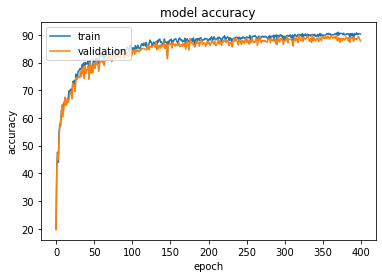

Maximum Train Accuracy : 90.97222900390625
Maximum Validation Accuracy : 89.88888549804688


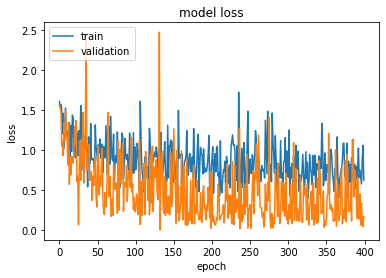

Minimum Train Loss : 0.36937639117240906
Minimum Validation Loss : 0.001980486325919628


In [ ]:
Bacteria_model_phase_Adam_00001 = Bact_Net()
Bacteria_model_phase_Adam_00001.cuda()
trainer_Adam_phase_00001 = trainer(Bacteria_model_phase_Adam_00001, phase_train_loader,"Adam", epoch_size=400, learning_rate=0.0001)
trainer_Adam_phase_00001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adam_phase_00001.history['train_acc'])
plt.plot(trainer_Adam_phase_00001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adam_phase_00001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adam_phase_00001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adam_phase_00001.history['train_loss'])
plt.plot(trainer_Adam_phase_00001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adam_phase_00001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adam_phase_00001.history['val_loss'])}")

In [ ]:
print(trainer_Adam_phase_00001.history['train_loss'])
print(trainer_Adam_phase_00001.history['val_loss'])

train_loss_mean = np.mean(trainer_Adam_phase_00001.history['train_loss'])
train_loss_std = np.std(trainer_Adam_phase_00001.history['train_loss'])

val_loss_mean = np.mean(trainer_Adam_phase_00001.history['val_loss'])
val_loss_std = np.std(trainer_Adam_phase_00001.history['val_loss'])

print(f"Train_Loss_mean: {train_loss_mean}")
print(f"Train_Loss_std: {train_loss_std}")
print(f"Val_Loss_mean: {val_loss_mean}")
print(f"Val_Loss_std: {val_loss_std}")

[1.602881669998169, 1.5364313125610352, 1.5652326345443726, 1.5206860303878784, 1.1996760368347168, 1.458143711090088, 1.0139555931091309, 1.286424160003662, 1.5206438302993774, 1.1738433837890625, 1.2369226217269897, 1.1714898347854614, 1.0952047109603882, 1.3402031660079956, 0.8904727101325989, 1.3036751747131348, 0.9782970547676086, 1.4335365295410156, 1.393964171409607, 0.9850512742996216, 1.110348105430603, 0.900856077671051, 1.27316415309906, 1.1916377544403076, 0.9231661558151245, 1.2288419008255005, 1.240797996520996, 1.0827507972717285, 1.5545650720596313, 1.0049513578414917, 1.098618745803833, 0.7456241846084595, 0.9707929491996765, 1.176898717880249, 1.0120595693588257, 1.1338109970092773, 0.9529837965965271, 0.5390960574150085, 1.163317084312439, 1.129120111465454, 0.8269381523132324, 1.3290762901306152, 0.8771764039993286, 0.8976771831512451, 0.8737324476242065, 0.8901411294937134, 0.7266377210617065, 1.3118044137954712, 1.0445282459259033, 0.95940101146698, 0.858979284763

In [ ]:
Bacteria_model_phase_Adam_00001.eval() #no weight update
for i, (inputs, targets) in enumerate(phase_test_loader):  
  #inputs and targets onto CUDA (Use GPU)      
  inputs = inputs.cuda()
  targets = targets.cuda()
          
  pred = Bacteria_model_phase_Adam_00001(inputs)
  
  loss = nn.CrossEntropyLoss()
  test_loss = loss(pred, targets)

  pred_c = torch.argmax(pred, dim=1)
  target_c = targets

  if i==0 : 
    acc = (pred_c==target_c)
  else :
    acc = torch.cat([acc, (pred_c == target_c)], axis=0)

acc = acc.float().mean() * 100
print(f"Test Acc | {acc}")
print(f"Test Loss | {test_loss}")

Test Acc | 90.20000457763672
Test Loss | 0.7231367826461792


# Adam_0.0001_400epoch_L2reg

  0%|          | 0/400 [00:00<?, ?it/s]

Train Acc | Epoch 1/400 | ACC 22.388889


  0%|          | 1/400 [00:10<1:07:48, 10.20s/it]

Val Acc | Epoch 1/400 | ACC 23.333334
Train Acc | Epoch 2/400 | ACC 20.027777


  0%|          | 2/400 [00:20<1:07:32, 10.18s/it]

Val Acc | Epoch 2/400 | ACC 19.888889
Train Acc | Epoch 3/400 | ACC 20.027777


  1%|          | 3/400 [00:30<1:07:27, 10.20s/it]

Val Acc | Epoch 3/400 | ACC 19.888889
Train Acc | Epoch 4/400 | ACC 41.777779


  1%|          | 4/400 [00:41<1:08:00, 10.30s/it]

Val Acc | Epoch 4/400 | ACC 41.111111
Train Acc | Epoch 5/400 | ACC 43.972225


  1%|▏         | 5/400 [00:51<1:07:43, 10.29s/it]

Val Acc | Epoch 5/400 | ACC 43.666668
Train Acc | Epoch 6/400 | ACC 46.722225


  2%|▏         | 6/400 [01:01<1:07:06, 10.22s/it]

Val Acc | Epoch 6/400 | ACC 44.888889
Train Acc | Epoch 7/400 | ACC 48.638889


  2%|▏         | 7/400 [01:12<1:07:51, 10.36s/it]

Val Acc | Epoch 7/400 | ACC 49.111115
Train Acc | Epoch 8/400 | ACC 48.861115


  2%|▏         | 8/400 [01:22<1:07:58, 10.40s/it]

Val Acc | Epoch 8/400 | ACC 48.777779
Train Acc | Epoch 9/400 | ACC 50.527782


  2%|▏         | 9/400 [01:32<1:07:12, 10.31s/it]

Val Acc | Epoch 9/400 | ACC 50.111115
Train Acc | Epoch 10/400 | ACC 48.055557


  2%|▎         | 10/400 [01:42<1:06:53, 10.29s/it]

Val Acc | Epoch 10/400 | ACC 48.444447
Train Acc | Epoch 11/400 | ACC 51.805557


  3%|▎         | 11/400 [01:53<1:07:12, 10.37s/it]

Val Acc | Epoch 11/400 | ACC 51.555557
Train Acc | Epoch 12/400 | ACC 47.583336


  3%|▎         | 12/400 [02:03<1:07:16, 10.40s/it]

Val Acc | Epoch 12/400 | ACC 47.333336
Train Acc | Epoch 13/400 | ACC 49.555557


  3%|▎         | 13/400 [02:14<1:07:03, 10.40s/it]

Val Acc | Epoch 13/400 | ACC 52.000004
Train Acc | Epoch 14/400 | ACC 53.305553


  4%|▎         | 14/400 [02:24<1:06:26, 10.33s/it]

Val Acc | Epoch 14/400 | ACC 53.000004
Train Acc | Epoch 15/400 | ACC 57.000000


  4%|▍         | 15/400 [02:34<1:06:05, 10.30s/it]

Val Acc | Epoch 15/400 | ACC 57.888889
Train Acc | Epoch 16/400 | ACC 55.194443


  4%|▍         | 16/400 [02:45<1:06:06, 10.33s/it]

Val Acc | Epoch 16/400 | ACC 54.888893
Train Acc | Epoch 17/400 | ACC 57.388889


  4%|▍         | 17/400 [02:55<1:05:50, 10.31s/it]

Val Acc | Epoch 17/400 | ACC 59.222221
Train Acc | Epoch 18/400 | ACC 56.194450


  4%|▍         | 18/400 [03:05<1:05:11, 10.24s/it]

Val Acc | Epoch 18/400 | ACC 58.555557
Train Acc | Epoch 19/400 | ACC 60.305561


  5%|▍         | 19/400 [03:15<1:05:18, 10.29s/it]

Val Acc | Epoch 19/400 | ACC 62.333332
Train Acc | Epoch 20/400 | ACC 52.805553


  5%|▌         | 20/400 [03:26<1:05:23, 10.33s/it]

Val Acc | Epoch 20/400 | ACC 52.000004
Train Acc | Epoch 21/400 | ACC 60.750000


  5%|▌         | 21/400 [03:36<1:04:54, 10.28s/it]

Val Acc | Epoch 21/400 | ACC 59.777779
Train Acc | Epoch 22/400 | ACC 60.388893


  6%|▌         | 22/400 [03:46<1:04:20, 10.21s/it]

Val Acc | Epoch 22/400 | ACC 61.333336
Train Acc | Epoch 23/400 | ACC 58.527779


  6%|▌         | 23/400 [03:57<1:04:52, 10.32s/it]

Val Acc | Epoch 23/400 | ACC 58.333336
Train Acc | Epoch 24/400 | ACC 60.722225


  6%|▌         | 24/400 [04:07<1:04:47, 10.34s/it]

Val Acc | Epoch 24/400 | ACC 59.333336
Train Acc | Epoch 25/400 | ACC 57.666664


  6%|▋         | 25/400 [04:17<1:04:12, 10.27s/it]

Val Acc | Epoch 25/400 | ACC 59.333336
Train Acc | Epoch 26/400 | ACC 58.694447


  6%|▋         | 26/400 [04:27<1:04:03, 10.28s/it]

Val Acc | Epoch 26/400 | ACC 59.333336
Train Acc | Epoch 27/400 | ACC 59.361111


  7%|▋         | 27/400 [04:38<1:04:20, 10.35s/it]

Val Acc | Epoch 27/400 | ACC 61.000000
Train Acc | Epoch 28/400 | ACC 60.916668


  7%|▋         | 28/400 [04:48<1:03:50, 10.30s/it]

Val Acc | Epoch 28/400 | ACC 62.444450
Train Acc | Epoch 29/400 | ACC 59.888885


  7%|▋         | 29/400 [04:58<1:03:07, 10.21s/it]

Val Acc | Epoch 29/400 | ACC 62.555557
Train Acc | Epoch 30/400 | ACC 63.000000


  8%|▊         | 30/400 [05:08<1:03:19, 10.27s/it]

Val Acc | Epoch 30/400 | ACC 63.777779
Train Acc | Epoch 31/400 | ACC 62.777782


  8%|▊         | 31/400 [05:19<1:03:37, 10.34s/it]

Val Acc | Epoch 31/400 | ACC 64.333336
Train Acc | Epoch 32/400 | ACC 61.055557


  8%|▊         | 32/400 [05:29<1:03:12, 10.30s/it]

Val Acc | Epoch 32/400 | ACC 62.555557
Train Acc | Epoch 33/400 | ACC 60.972225


  8%|▊         | 33/400 [05:39<1:02:59, 10.30s/it]

Val Acc | Epoch 33/400 | ACC 62.555557
Train Acc | Epoch 34/400 | ACC 61.722225


  8%|▊         | 34/400 [05:50<1:02:30, 10.25s/it]

Val Acc | Epoch 34/400 | ACC 61.555557
Train Acc | Epoch 35/400 | ACC 61.972225


  9%|▉         | 35/400 [06:00<1:02:01, 10.20s/it]

Val Acc | Epoch 35/400 | ACC 62.222225
Train Acc | Epoch 36/400 | ACC 59.194447


  9%|▉         | 36/400 [06:10<1:01:52, 10.20s/it]

Val Acc | Epoch 36/400 | ACC 58.444447
Train Acc | Epoch 37/400 | ACC 61.694443


  9%|▉         | 37/400 [06:21<1:02:41, 10.36s/it]

Val Acc | Epoch 37/400 | ACC 63.444447
Train Acc | Epoch 38/400 | ACC 57.555557


 10%|▉         | 38/400 [06:31<1:02:51, 10.42s/it]

Val Acc | Epoch 38/400 | ACC 58.888889
Train Acc | Epoch 39/400 | ACC 62.833332


 10%|▉         | 39/400 [06:41<1:02:25, 10.38s/it]

Val Acc | Epoch 39/400 | ACC 61.333336
Train Acc | Epoch 40/400 | ACC 64.333336


 10%|█         | 40/400 [06:51<1:01:38, 10.27s/it]

Val Acc | Epoch 40/400 | ACC 63.111115
Train Acc | Epoch 41/400 | ACC 59.916668


 10%|█         | 41/400 [07:02<1:01:43, 10.32s/it]

Val Acc | Epoch 41/400 | ACC 61.000000
Train Acc | Epoch 42/400 | ACC 63.083332


 10%|█         | 42/400 [07:12<1:01:32, 10.31s/it]

Val Acc | Epoch 42/400 | ACC 64.888885
Train Acc | Epoch 43/400 | ACC 60.888893


 11%|█         | 43/400 [07:22<1:01:18, 10.30s/it]

Val Acc | Epoch 43/400 | ACC 62.666668
Train Acc | Epoch 44/400 | ACC 62.944447


 11%|█         | 44/400 [07:33<1:01:18, 10.33s/it]

Val Acc | Epoch 44/400 | ACC 63.666664
Train Acc | Epoch 45/400 | ACC 60.583336


 11%|█▏        | 45/400 [07:43<1:01:00, 10.31s/it]

Val Acc | Epoch 45/400 | ACC 61.222225
Train Acc | Epoch 46/400 | ACC 61.611111


 12%|█▏        | 46/400 [07:54<1:01:06, 10.36s/it]

Val Acc | Epoch 46/400 | ACC 62.222225
Train Acc | Epoch 47/400 | ACC 62.333332


 12%|█▏        | 47/400 [08:04<1:01:00, 10.37s/it]

Val Acc | Epoch 47/400 | ACC 62.777782
Train Acc | Epoch 48/400 | ACC 61.666668


 12%|█▏        | 48/400 [08:14<1:00:37, 10.33s/it]

Val Acc | Epoch 48/400 | ACC 62.666668
Train Acc | Epoch 49/400 | ACC 63.333332


 12%|█▏        | 49/400 [08:24<1:00:00, 10.26s/it]

Val Acc | Epoch 49/400 | ACC 63.888889
Train Acc | Epoch 50/400 | ACC 62.138893


 12%|█▎        | 50/400 [08:35<59:42, 10.23s/it]  

Val Acc | Epoch 50/400 | ACC 62.333332
Train Acc | Epoch 51/400 | ACC 60.694443


 13%|█▎        | 51/400 [08:45<59:53, 10.30s/it]

Val Acc | Epoch 51/400 | ACC 60.333336
Train Acc | Epoch 52/400 | ACC 56.944447


 13%|█▎        | 52/400 [08:55<59:29, 10.26s/it]

Val Acc | Epoch 52/400 | ACC 57.666664
Train Acc | Epoch 53/400 | ACC 61.111111


 13%|█▎        | 53/400 [09:06<59:34, 10.30s/it]

Val Acc | Epoch 53/400 | ACC 62.333332
Train Acc | Epoch 54/400 | ACC 63.555557


 14%|█▎        | 54/400 [09:16<58:49, 10.20s/it]

Val Acc | Epoch 54/400 | ACC 63.888889
Train Acc | Epoch 55/400 | ACC 61.944443


 14%|█▍        | 55/400 [09:26<58:49, 10.23s/it]

Val Acc | Epoch 55/400 | ACC 62.333332
Train Acc | Epoch 56/400 | ACC 64.027779


 14%|█▍        | 56/400 [09:36<58:44, 10.25s/it]

Val Acc | Epoch 56/400 | ACC 64.555557
Train Acc | Epoch 57/400 | ACC 62.888889


 14%|█▍        | 57/400 [09:46<58:42, 10.27s/it]

Val Acc | Epoch 57/400 | ACC 63.333332
Train Acc | Epoch 58/400 | ACC 63.138889


 14%|█▍        | 58/400 [09:57<58:30, 10.27s/it]

Val Acc | Epoch 58/400 | ACC 63.111115
Train Acc | Epoch 59/400 | ACC 56.555557


 15%|█▍        | 59/400 [10:07<58:29, 10.29s/it]

Val Acc | Epoch 59/400 | ACC 55.555557
Train Acc | Epoch 60/400 | ACC 63.500000


 15%|█▌        | 60/400 [10:17<58:07, 10.26s/it]

Val Acc | Epoch 60/400 | ACC 64.777779
Train Acc | Epoch 61/400 | ACC 60.361111


 15%|█▌        | 61/400 [10:27<57:38, 10.20s/it]

Val Acc | Epoch 61/400 | ACC 61.000000
Train Acc | Epoch 62/400 | ACC 63.083332


 16%|█▌        | 62/400 [10:38<57:31, 10.21s/it]

Val Acc | Epoch 62/400 | ACC 63.666664
Train Acc | Epoch 63/400 | ACC 62.250000


 16%|█▌        | 63/400 [10:48<57:12, 10.18s/it]

Val Acc | Epoch 63/400 | ACC 64.222221
Train Acc | Epoch 64/400 | ACC 61.805557


 16%|█▌        | 64/400 [10:58<57:11, 10.21s/it]

Val Acc | Epoch 64/400 | ACC 62.444450
Train Acc | Epoch 65/400 | ACC 59.388889


 16%|█▋        | 65/400 [11:08<56:53, 10.19s/it]

Val Acc | Epoch 65/400 | ACC 59.555553
Train Acc | Epoch 66/400 | ACC 63.888889


 16%|█▋        | 66/400 [11:19<57:16, 10.29s/it]

Val Acc | Epoch 66/400 | ACC 63.555557
Train Acc | Epoch 67/400 | ACC 63.083332


 17%|█▋        | 67/400 [11:29<57:29, 10.36s/it]

Val Acc | Epoch 67/400 | ACC 64.000000
Train Acc | Epoch 68/400 | ACC 59.888885


 17%|█▋        | 68/400 [11:40<58:18, 10.54s/it]

Val Acc | Epoch 68/400 | ACC 60.666668
Train Acc | Epoch 69/400 | ACC 59.055553


 17%|█▋        | 69/400 [11:50<57:52, 10.49s/it]

Val Acc | Epoch 69/400 | ACC 58.444447
Train Acc | Epoch 70/400 | ACC 64.972221


 18%|█▊        | 70/400 [12:01<57:41, 10.49s/it]

Val Acc | Epoch 70/400 | ACC 66.555557
Train Acc | Epoch 71/400 | ACC 64.333336


 18%|█▊        | 71/400 [12:11<57:07, 10.42s/it]

Val Acc | Epoch 71/400 | ACC 66.333336
Train Acc | Epoch 72/400 | ACC 66.111115


 18%|█▊        | 72/400 [12:21<56:34, 10.35s/it]

Val Acc | Epoch 72/400 | ACC 66.333336
Train Acc | Epoch 73/400 | ACC 65.444443


 18%|█▊        | 73/400 [12:32<56:30, 10.37s/it]

Val Acc | Epoch 73/400 | ACC 66.333336
Train Acc | Epoch 74/400 | ACC 59.666668


 18%|█▊        | 74/400 [12:42<56:18, 10.36s/it]

Val Acc | Epoch 74/400 | ACC 58.000004
Train Acc | Epoch 75/400 | ACC 65.027779


 19%|█▉        | 75/400 [12:52<55:59, 10.34s/it]

Val Acc | Epoch 75/400 | ACC 66.111115
Train Acc | Epoch 76/400 | ACC 57.333332


 19%|█▉        | 76/400 [13:02<55:22, 10.25s/it]

Val Acc | Epoch 76/400 | ACC 58.333336
Train Acc | Epoch 77/400 | ACC 61.805557


 19%|█▉        | 77/400 [13:13<55:12, 10.25s/it]

Val Acc | Epoch 77/400 | ACC 62.333332
Train Acc | Epoch 78/400 | ACC 64.472221


 20%|█▉        | 78/400 [13:23<54:48, 10.21s/it]

Val Acc | Epoch 78/400 | ACC 64.444443
Train Acc | Epoch 79/400 | ACC 61.194443


 20%|█▉        | 79/400 [13:33<54:56, 10.27s/it]

Val Acc | Epoch 79/400 | ACC 63.000000
Train Acc | Epoch 80/400 | ACC 62.166668


 20%|██        | 80/400 [13:43<54:43, 10.26s/it]

Val Acc | Epoch 80/400 | ACC 60.555561
Train Acc | Epoch 81/400 | ACC 63.111115


 20%|██        | 81/400 [13:54<54:23, 10.23s/it]

Val Acc | Epoch 81/400 | ACC 63.666664
Train Acc | Epoch 82/400 | ACC 63.500000


 20%|██        | 82/400 [14:04<54:13, 10.23s/it]

Val Acc | Epoch 82/400 | ACC 65.333336
Train Acc | Epoch 83/400 | ACC 64.638885


 21%|██        | 83/400 [14:14<54:01, 10.23s/it]

Val Acc | Epoch 83/400 | ACC 65.444443
Train Acc | Epoch 84/400 | ACC 62.916668


 21%|██        | 84/400 [14:24<53:59, 10.25s/it]

Val Acc | Epoch 84/400 | ACC 64.333336
Train Acc | Epoch 85/400 | ACC 63.861115


 21%|██▏       | 85/400 [14:35<54:31, 10.39s/it]

Val Acc | Epoch 85/400 | ACC 64.888885
Train Acc | Epoch 86/400 | ACC 62.611115


 22%|██▏       | 86/400 [14:45<54:11, 10.35s/it]

Val Acc | Epoch 86/400 | ACC 65.222221
Train Acc | Epoch 87/400 | ACC 61.861111


 22%|██▏       | 87/400 [14:56<53:48, 10.32s/it]

Val Acc | Epoch 87/400 | ACC 62.111115
Train Acc | Epoch 88/400 | ACC 64.083336


 22%|██▏       | 88/400 [15:06<53:47, 10.35s/it]

Val Acc | Epoch 88/400 | ACC 64.888885
Train Acc | Epoch 89/400 | ACC 65.750000


 22%|██▏       | 89/400 [15:16<53:31, 10.33s/it]

Val Acc | Epoch 89/400 | ACC 66.555557
Train Acc | Epoch 90/400 | ACC 63.444447


 22%|██▎       | 90/400 [15:27<53:30, 10.36s/it]

Val Acc | Epoch 90/400 | ACC 65.333336
Train Acc | Epoch 91/400 | ACC 64.000000


 23%|██▎       | 91/400 [15:37<53:05, 10.31s/it]

Val Acc | Epoch 91/400 | ACC 65.444443
Train Acc | Epoch 92/400 | ACC 65.027779


 23%|██▎       | 92/400 [15:47<52:54, 10.31s/it]

Val Acc | Epoch 92/400 | ACC 63.555557
Train Acc | Epoch 93/400 | ACC 59.361111


 23%|██▎       | 93/400 [15:57<52:16, 10.22s/it]

Val Acc | Epoch 93/400 | ACC 57.222221
Train Acc | Epoch 94/400 | ACC 66.750000


 24%|██▎       | 94/400 [16:08<52:13, 10.24s/it]

Val Acc | Epoch 94/400 | ACC 65.111115
Train Acc | Epoch 95/400 | ACC 59.638889


 24%|██▍       | 95/400 [16:18<52:21, 10.30s/it]

Val Acc | Epoch 95/400 | ACC 60.333336
Train Acc | Epoch 96/400 | ACC 60.388893


 24%|██▍       | 96/400 [16:29<52:36, 10.38s/it]

Val Acc | Epoch 96/400 | ACC 60.111111
Train Acc | Epoch 97/400 | ACC 65.722221


 24%|██▍       | 97/400 [16:39<52:45, 10.45s/it]

Val Acc | Epoch 97/400 | ACC 66.000000
Train Acc | Epoch 98/400 | ACC 65.416672


 24%|██▍       | 98/400 [16:50<53:00, 10.53s/it]

Val Acc | Epoch 98/400 | ACC 65.333336
Train Acc | Epoch 99/400 | ACC 64.083336


 25%|██▍       | 99/400 [17:00<52:21, 10.44s/it]

Val Acc | Epoch 99/400 | ACC 64.777779
Train Acc | Epoch 100/400 | ACC 65.277779


 25%|██▌       | 100/400 [17:10<51:55, 10.39s/it]

Val Acc | Epoch 100/400 | ACC 67.111115
Train Acc | Epoch 101/400 | ACC 65.888885


 25%|██▌       | 101/400 [17:21<51:33, 10.34s/it]

Val Acc | Epoch 101/400 | ACC 66.777779
Train Acc | Epoch 102/400 | ACC 62.805557


 26%|██▌       | 102/400 [17:31<51:00, 10.27s/it]

Val Acc | Epoch 102/400 | ACC 64.333336
Train Acc | Epoch 103/400 | ACC 65.666672


 26%|██▌       | 103/400 [17:41<50:50, 10.27s/it]

Val Acc | Epoch 103/400 | ACC 67.111115
Train Acc | Epoch 104/400 | ACC 63.888889


 26%|██▌       | 104/400 [17:51<50:47, 10.29s/it]

Val Acc | Epoch 104/400 | ACC 65.666672
Train Acc | Epoch 105/400 | ACC 63.083332


 26%|██▋       | 105/400 [18:02<50:43, 10.32s/it]

Val Acc | Epoch 105/400 | ACC 64.111115
Train Acc | Epoch 106/400 | ACC 64.166672


 26%|██▋       | 106/400 [18:12<50:35, 10.33s/it]

Val Acc | Epoch 106/400 | ACC 65.666672
Train Acc | Epoch 107/400 | ACC 64.333336


 27%|██▋       | 107/400 [18:22<50:07, 10.27s/it]

Val Acc | Epoch 107/400 | ACC 65.666672
Train Acc | Epoch 108/400 | ACC 64.305557


 27%|██▋       | 108/400 [18:32<49:53, 10.25s/it]

Val Acc | Epoch 108/400 | ACC 66.888893
Train Acc | Epoch 109/400 | ACC 60.527779


 27%|██▋       | 109/400 [18:43<49:52, 10.28s/it]

Val Acc | Epoch 109/400 | ACC 61.111111
Train Acc | Epoch 110/400 | ACC 61.833336


 28%|██▊       | 110/400 [18:53<49:40, 10.28s/it]

Val Acc | Epoch 110/400 | ACC 62.111115
Train Acc | Epoch 111/400 | ACC 66.750000


 28%|██▊       | 111/400 [19:04<50:02, 10.39s/it]

Val Acc | Epoch 111/400 | ACC 67.444443
Train Acc | Epoch 112/400 | ACC 65.500000


 28%|██▊       | 112/400 [19:14<50:03, 10.43s/it]

Val Acc | Epoch 112/400 | ACC 66.666672
Train Acc | Epoch 113/400 | ACC 65.388885


 28%|██▊       | 113/400 [19:25<50:00, 10.46s/it]

Val Acc | Epoch 113/400 | ACC 66.666672
Train Acc | Epoch 114/400 | ACC 59.750004


 28%|██▊       | 114/400 [19:35<49:33, 10.40s/it]

Val Acc | Epoch 114/400 | ACC 60.555561
Train Acc | Epoch 115/400 | ACC 65.222221


 29%|██▉       | 115/400 [19:45<49:15, 10.37s/it]

Val Acc | Epoch 115/400 | ACC 66.000000
Train Acc | Epoch 116/400 | ACC 65.694443


 29%|██▉       | 116/400 [19:56<49:15, 10.41s/it]

Val Acc | Epoch 116/400 | ACC 67.555557
Train Acc | Epoch 117/400 | ACC 65.750000


 29%|██▉       | 117/400 [20:06<49:07, 10.41s/it]

Val Acc | Epoch 117/400 | ACC 68.222221
Train Acc | Epoch 118/400 | ACC 63.222225


 30%|██▉       | 118/400 [20:16<48:37, 10.35s/it]

Val Acc | Epoch 118/400 | ACC 64.666672
Train Acc | Epoch 119/400 | ACC 64.333336


 30%|██▉       | 119/400 [20:27<48:19, 10.32s/it]

Val Acc | Epoch 119/400 | ACC 65.000000
Train Acc | Epoch 120/400 | ACC 62.944447


 30%|███       | 120/400 [20:37<48:05, 10.31s/it]

Val Acc | Epoch 120/400 | ACC 63.777779
Train Acc | Epoch 121/400 | ACC 61.888893


 30%|███       | 121/400 [20:47<47:51, 10.29s/it]

Val Acc | Epoch 121/400 | ACC 62.555557
Train Acc | Epoch 122/400 | ACC 64.833336


 30%|███       | 122/400 [20:57<47:30, 10.25s/it]

Val Acc | Epoch 122/400 | ACC 64.666672
Train Acc | Epoch 123/400 | ACC 64.805557


 31%|███       | 123/400 [21:08<47:38, 10.32s/it]

Val Acc | Epoch 123/400 | ACC 65.111115
Train Acc | Epoch 124/400 | ACC 64.333336


 31%|███       | 124/400 [21:18<47:14, 10.27s/it]

Val Acc | Epoch 124/400 | ACC 67.888893
Train Acc | Epoch 125/400 | ACC 66.055557


 31%|███▏      | 125/400 [21:28<47:03, 10.27s/it]

Val Acc | Epoch 125/400 | ACC 65.777779
Train Acc | Epoch 126/400 | ACC 65.694443


 32%|███▏      | 126/400 [21:38<46:45, 10.24s/it]

Val Acc | Epoch 126/400 | ACC 65.777779
Train Acc | Epoch 127/400 | ACC 63.833332


 32%|███▏      | 127/400 [21:49<47:26, 10.43s/it]

Val Acc | Epoch 127/400 | ACC 64.666672
Train Acc | Epoch 128/400 | ACC 63.916664


 32%|███▏      | 128/400 [22:00<47:45, 10.54s/it]

Val Acc | Epoch 128/400 | ACC 67.000000
Train Acc | Epoch 129/400 | ACC 65.027779


 32%|███▏      | 129/400 [22:10<47:12, 10.45s/it]

Val Acc | Epoch 129/400 | ACC 65.555557
Train Acc | Epoch 130/400 | ACC 65.555557


 32%|███▎      | 130/400 [22:21<47:05, 10.47s/it]

Val Acc | Epoch 130/400 | ACC 67.888893
Train Acc | Epoch 131/400 | ACC 66.583336


 33%|███▎      | 131/400 [22:31<46:39, 10.41s/it]

Val Acc | Epoch 131/400 | ACC 67.666664
Train Acc | Epoch 132/400 | ACC 65.416672


 33%|███▎      | 132/400 [22:41<46:22, 10.38s/it]

Val Acc | Epoch 132/400 | ACC 64.888885
Train Acc | Epoch 133/400 | ACC 64.944443


 33%|███▎      | 133/400 [22:52<46:04, 10.35s/it]

Val Acc | Epoch 133/400 | ACC 65.666672
Train Acc | Epoch 134/400 | ACC 62.777782


 34%|███▎      | 134/400 [23:02<45:43, 10.31s/it]

Val Acc | Epoch 134/400 | ACC 63.555557
Train Acc | Epoch 135/400 | ACC 61.388893


 34%|███▍      | 135/400 [23:12<45:28, 10.30s/it]

Val Acc | Epoch 135/400 | ACC 61.444443
Train Acc | Epoch 136/400 | ACC 63.472221


 34%|███▍      | 136/400 [23:22<45:15, 10.28s/it]

Val Acc | Epoch 136/400 | ACC 64.666672
Train Acc | Epoch 137/400 | ACC 65.555557


 34%|███▍      | 137/400 [23:33<45:06, 10.29s/it]

Val Acc | Epoch 137/400 | ACC 65.000000
Train Acc | Epoch 138/400 | ACC 61.750000


 34%|███▍      | 138/400 [23:43<44:55, 10.29s/it]

Val Acc | Epoch 138/400 | ACC 62.333332
Train Acc | Epoch 139/400 | ACC 66.166672


 35%|███▍      | 139/400 [23:53<44:45, 10.29s/it]

Val Acc | Epoch 139/400 | ACC 66.000000
Train Acc | Epoch 140/400 | ACC 65.805557


 35%|███▌      | 140/400 [24:04<44:34, 10.29s/it]

Val Acc | Epoch 140/400 | ACC 66.666672
Train Acc | Epoch 141/400 | ACC 65.055557


 35%|███▌      | 141/400 [24:14<44:17, 10.26s/it]

Val Acc | Epoch 141/400 | ACC 63.777779
Train Acc | Epoch 142/400 | ACC 64.972221


 36%|███▌      | 142/400 [24:24<44:02, 10.24s/it]

Val Acc | Epoch 142/400 | ACC 65.444443
Train Acc | Epoch 143/400 | ACC 64.333336


 36%|███▌      | 143/400 [24:34<44:09, 10.31s/it]

Val Acc | Epoch 143/400 | ACC 66.222229
Train Acc | Epoch 144/400 | ACC 64.944443


 36%|███▌      | 144/400 [24:45<44:06, 10.34s/it]

Val Acc | Epoch 144/400 | ACC 67.666664
Train Acc | Epoch 145/400 | ACC 66.055557


 36%|███▋      | 145/400 [24:55<44:00, 10.36s/it]

Val Acc | Epoch 145/400 | ACC 67.333336
Train Acc | Epoch 146/400 | ACC 64.611115


 36%|███▋      | 146/400 [25:06<43:51, 10.36s/it]

Val Acc | Epoch 146/400 | ACC 65.111115
Train Acc | Epoch 147/400 | ACC 65.166672


 37%|███▋      | 147/400 [25:16<43:37, 10.35s/it]

Val Acc | Epoch 147/400 | ACC 66.555557
Train Acc | Epoch 148/400 | ACC 65.333336


 37%|███▋      | 148/400 [25:26<43:39, 10.39s/it]

Val Acc | Epoch 148/400 | ACC 67.444443
Train Acc | Epoch 149/400 | ACC 65.666672


 37%|███▋      | 149/400 [25:37<43:17, 10.35s/it]

Val Acc | Epoch 149/400 | ACC 67.666664
Train Acc | Epoch 150/400 | ACC 66.833336


 38%|███▊      | 150/400 [25:47<42:55, 10.30s/it]

Val Acc | Epoch 150/400 | ACC 66.777779
Train Acc | Epoch 151/400 | ACC 66.777779


 38%|███▊      | 151/400 [25:57<42:37, 10.27s/it]

Val Acc | Epoch 151/400 | ACC 65.444443
Train Acc | Epoch 152/400 | ACC 66.472229


 38%|███▊      | 152/400 [26:07<42:31, 10.29s/it]

Val Acc | Epoch 152/400 | ACC 66.444443
Train Acc | Epoch 153/400 | ACC 63.638889


 38%|███▊      | 153/400 [26:18<42:26, 10.31s/it]

Val Acc | Epoch 153/400 | ACC 65.222221
Train Acc | Epoch 154/400 | ACC 64.055557


 38%|███▊      | 154/400 [26:28<42:13, 10.30s/it]

Val Acc | Epoch 154/400 | ACC 65.222221
Train Acc | Epoch 155/400 | ACC 65.222221


 39%|███▉      | 155/400 [26:38<41:53, 10.26s/it]

Val Acc | Epoch 155/400 | ACC 64.000000
Train Acc | Epoch 156/400 | ACC 64.472221


 39%|███▉      | 156/400 [26:49<41:51, 10.29s/it]

Val Acc | Epoch 156/400 | ACC 64.666672
Train Acc | Epoch 157/400 | ACC 65.472221


 39%|███▉      | 157/400 [26:59<41:56, 10.35s/it]

Val Acc | Epoch 157/400 | ACC 66.888893
Train Acc | Epoch 158/400 | ACC 62.416668


 40%|███▉      | 158/400 [27:10<42:14, 10.47s/it]

Val Acc | Epoch 158/400 | ACC 65.888885
Train Acc | Epoch 159/400 | ACC 65.666672


 40%|███▉      | 159/400 [27:20<41:48, 10.41s/it]

Val Acc | Epoch 159/400 | ACC 66.555557
Train Acc | Epoch 160/400 | ACC 65.972221


 40%|████      | 160/400 [27:31<41:41, 10.42s/it]

Val Acc | Epoch 160/400 | ACC 66.666672
Train Acc | Epoch 161/400 | ACC 66.027779


 40%|████      | 161/400 [27:41<41:22, 10.39s/it]

Val Acc | Epoch 161/400 | ACC 66.888893
Train Acc | Epoch 162/400 | ACC 65.750000


 40%|████      | 162/400 [27:51<41:10, 10.38s/it]

Val Acc | Epoch 162/400 | ACC 65.777779
Train Acc | Epoch 163/400 | ACC 64.333336


 41%|████      | 163/400 [28:01<40:45, 10.32s/it]

Val Acc | Epoch 163/400 | ACC 63.888889
Train Acc | Epoch 164/400 | ACC 66.166672


 41%|████      | 164/400 [28:12<40:33, 10.31s/it]

Val Acc | Epoch 164/400 | ACC 68.444450
Train Acc | Epoch 165/400 | ACC 66.833336


 41%|████▏     | 165/400 [28:22<40:32, 10.35s/it]

Val Acc | Epoch 165/400 | ACC 65.222221
Train Acc | Epoch 166/400 | ACC 64.750000


 42%|████▏     | 166/400 [28:32<40:02, 10.27s/it]

Val Acc | Epoch 166/400 | ACC 65.888885
Train Acc | Epoch 167/400 | ACC 62.777782


 42%|████▏     | 167/400 [28:43<40:00, 10.30s/it]

Val Acc | Epoch 167/400 | ACC 61.888893
Train Acc | Epoch 168/400 | ACC 65.444443


 42%|████▏     | 168/400 [28:53<40:02, 10.35s/it]

Val Acc | Epoch 168/400 | ACC 65.666672
Train Acc | Epoch 169/400 | ACC 65.638885


 42%|████▏     | 169/400 [29:03<39:40, 10.31s/it]

Val Acc | Epoch 169/400 | ACC 65.000000
Train Acc | Epoch 170/400 | ACC 66.555557


 42%|████▎     | 170/400 [29:13<39:20, 10.26s/it]

Val Acc | Epoch 170/400 | ACC 67.444443
Train Acc | Epoch 171/400 | ACC 65.361115


 43%|████▎     | 171/400 [29:24<39:04, 10.24s/it]

Val Acc | Epoch 171/400 | ACC 67.222229
Train Acc | Epoch 172/400 | ACC 65.666672


 43%|████▎     | 172/400 [29:34<39:04, 10.28s/it]

Val Acc | Epoch 172/400 | ACC 65.111115
Train Acc | Epoch 173/400 | ACC 64.833336


 43%|████▎     | 173/400 [29:44<38:43, 10.24s/it]

Val Acc | Epoch 173/400 | ACC 65.666672
Train Acc | Epoch 174/400 | ACC 66.222229


 44%|████▎     | 174/400 [29:54<38:37, 10.25s/it]

Val Acc | Epoch 174/400 | ACC 67.111115
Train Acc | Epoch 175/400 | ACC 64.444443


 44%|████▍     | 175/400 [30:05<38:24, 10.24s/it]

Val Acc | Epoch 175/400 | ACC 66.666672
Train Acc | Epoch 176/400 | ACC 62.750000


 44%|████▍     | 176/400 [30:15<38:21, 10.27s/it]

Val Acc | Epoch 176/400 | ACC 62.777782
Train Acc | Epoch 177/400 | ACC 65.861115


 44%|████▍     | 177/400 [30:25<38:10, 10.27s/it]

Val Acc | Epoch 177/400 | ACC 66.222229
Train Acc | Epoch 178/400 | ACC 65.638885


 44%|████▍     | 178/400 [30:36<38:13, 10.33s/it]

Val Acc | Epoch 178/400 | ACC 66.000000
Train Acc | Epoch 179/400 | ACC 66.527779


 45%|████▍     | 179/400 [30:46<37:55, 10.30s/it]

Val Acc | Epoch 179/400 | ACC 65.888885
Train Acc | Epoch 180/400 | ACC 65.611115


 45%|████▌     | 180/400 [30:56<37:54, 10.34s/it]

Val Acc | Epoch 180/400 | ACC 66.666672
Train Acc | Epoch 181/400 | ACC 64.805557


 45%|████▌     | 181/400 [31:06<37:30, 10.27s/it]

Val Acc | Epoch 181/400 | ACC 66.444443
Train Acc | Epoch 182/400 | ACC 66.111115


 46%|████▌     | 182/400 [31:17<37:11, 10.23s/it]

Val Acc | Epoch 182/400 | ACC 67.222229
Train Acc | Epoch 183/400 | ACC 66.416672


 46%|████▌     | 183/400 [31:27<37:05, 10.25s/it]

Val Acc | Epoch 183/400 | ACC 68.000000
Train Acc | Epoch 184/400 | ACC 65.194443


 46%|████▌     | 184/400 [31:37<36:54, 10.25s/it]

Val Acc | Epoch 184/400 | ACC 66.222229
Train Acc | Epoch 185/400 | ACC 67.138893


 46%|████▋     | 185/400 [31:47<36:47, 10.27s/it]

Val Acc | Epoch 185/400 | ACC 66.000000
Train Acc | Epoch 186/400 | ACC 65.361115


 46%|████▋     | 186/400 [31:58<36:41, 10.29s/it]

Val Acc | Epoch 186/400 | ACC 68.333336
Train Acc | Epoch 187/400 | ACC 66.222229


 47%|████▋     | 187/400 [32:08<36:56, 10.41s/it]

Val Acc | Epoch 187/400 | ACC 67.333336
Train Acc | Epoch 188/400 | ACC 66.472229


 47%|████▋     | 188/400 [32:19<37:16, 10.55s/it]

Val Acc | Epoch 188/400 | ACC 65.222221
Train Acc | Epoch 189/400 | ACC 64.416672


 47%|████▋     | 189/400 [32:30<36:47, 10.46s/it]

Val Acc | Epoch 189/400 | ACC 66.000000
Train Acc | Epoch 190/400 | ACC 66.194443


 48%|████▊     | 190/400 [32:40<36:32, 10.44s/it]

Val Acc | Epoch 190/400 | ACC 67.555557
Train Acc | Epoch 191/400 | ACC 63.444447


 48%|████▊     | 191/400 [32:51<36:34, 10.50s/it]

Val Acc | Epoch 191/400 | ACC 62.888889
Train Acc | Epoch 192/400 | ACC 63.194447


 48%|████▊     | 192/400 [33:01<36:03, 10.40s/it]

Val Acc | Epoch 192/400 | ACC 64.444443
Train Acc | Epoch 193/400 | ACC 65.305557


 48%|████▊     | 193/400 [33:11<35:43, 10.35s/it]

Val Acc | Epoch 193/400 | ACC 62.333332
Train Acc | Epoch 194/400 | ACC 63.722221


 48%|████▊     | 194/400 [33:21<35:38, 10.38s/it]

Val Acc | Epoch 194/400 | ACC 66.333336
Train Acc | Epoch 195/400 | ACC 65.666672


 49%|████▉     | 195/400 [33:32<35:37, 10.43s/it]

Val Acc | Epoch 195/400 | ACC 67.111115
Train Acc | Epoch 196/400 | ACC 66.916672


 49%|████▉     | 196/400 [33:43<35:39, 10.49s/it]

Val Acc | Epoch 196/400 | ACC 68.555557
Train Acc | Epoch 197/400 | ACC 66.527779


 49%|████▉     | 197/400 [33:53<35:28, 10.48s/it]

Val Acc | Epoch 197/400 | ACC 68.666664
Train Acc | Epoch 198/400 | ACC 66.694443


 50%|████▉     | 198/400 [34:03<35:11, 10.45s/it]

Val Acc | Epoch 198/400 | ACC 66.777779
Train Acc | Epoch 199/400 | ACC 66.277779


 50%|████▉     | 199/400 [34:14<35:07, 10.48s/it]

Val Acc | Epoch 199/400 | ACC 66.777779
Train Acc | Epoch 200/400 | ACC 65.972221


 50%|█████     | 200/400 [34:24<34:47, 10.44s/it]

Val Acc | Epoch 200/400 | ACC 68.111115
Train Acc | Epoch 201/400 | ACC 66.555557


 50%|█████     | 201/400 [34:35<34:25, 10.38s/it]

Val Acc | Epoch 201/400 | ACC 67.888893
Train Acc | Epoch 202/400 | ACC 63.944447


 50%|█████     | 202/400 [34:45<34:03, 10.32s/it]

Val Acc | Epoch 202/400 | ACC 64.222221
Train Acc | Epoch 203/400 | ACC 65.805557


 51%|█████     | 203/400 [34:55<33:54, 10.33s/it]

Val Acc | Epoch 203/400 | ACC 66.111115
Train Acc | Epoch 204/400 | ACC 62.416668


 51%|█████     | 204/400 [35:05<33:37, 10.29s/it]

Val Acc | Epoch 204/400 | ACC 63.444447
Train Acc | Epoch 205/400 | ACC 65.777779


 51%|█████▏    | 205/400 [35:16<33:27, 10.30s/it]

Val Acc | Epoch 205/400 | ACC 66.333336
Train Acc | Epoch 206/400 | ACC 66.111115


 52%|█████▏    | 206/400 [35:26<33:26, 10.34s/it]

Val Acc | Epoch 206/400 | ACC 66.888893
Train Acc | Epoch 207/400 | ACC 63.472221


 52%|█████▏    | 207/400 [35:37<33:23, 10.38s/it]

Val Acc | Epoch 207/400 | ACC 63.444447
Train Acc | Epoch 208/400 | ACC 66.111115


 52%|█████▏    | 208/400 [35:47<33:07, 10.35s/it]

Val Acc | Epoch 208/400 | ACC 68.555557
Train Acc | Epoch 209/400 | ACC 65.861115


 52%|█████▏    | 209/400 [35:57<32:59, 10.36s/it]

Val Acc | Epoch 209/400 | ACC 66.444443
Train Acc | Epoch 210/400 | ACC 65.444443


 52%|█████▎    | 210/400 [36:08<32:48, 10.36s/it]

Val Acc | Epoch 210/400 | ACC 67.333336
Train Acc | Epoch 211/400 | ACC 64.194450


 53%|█████▎    | 211/400 [36:18<32:44, 10.39s/it]

Val Acc | Epoch 211/400 | ACC 64.333336
Train Acc | Epoch 212/400 | ACC 66.222229


 53%|█████▎    | 212/400 [36:28<32:31, 10.38s/it]

Val Acc | Epoch 212/400 | ACC 67.555557
Train Acc | Epoch 213/400 | ACC 67.027779


 53%|█████▎    | 213/400 [36:39<32:21, 10.38s/it]

Val Acc | Epoch 213/400 | ACC 67.444443
Train Acc | Epoch 214/400 | ACC 66.111115


 54%|█████▎    | 214/400 [36:49<32:01, 10.33s/it]

Val Acc | Epoch 214/400 | ACC 65.444443
Train Acc | Epoch 215/400 | ACC 67.000000


 54%|█████▍    | 215/400 [36:59<31:48, 10.32s/it]

Val Acc | Epoch 215/400 | ACC 66.000000
Train Acc | Epoch 216/400 | ACC 65.972221


 54%|█████▍    | 216/400 [37:10<31:39, 10.33s/it]

Val Acc | Epoch 216/400 | ACC 67.000000
Train Acc | Epoch 217/400 | ACC 65.972221


 54%|█████▍    | 217/400 [37:20<31:41, 10.39s/it]

Val Acc | Epoch 217/400 | ACC 67.111115
Train Acc | Epoch 218/400 | ACC 65.527779


 55%|█████▍    | 218/400 [37:31<32:04, 10.57s/it]

Val Acc | Epoch 218/400 | ACC 67.111115
Train Acc | Epoch 219/400 | ACC 64.694443


 55%|█████▍    | 219/400 [37:42<31:48, 10.54s/it]

Val Acc | Epoch 219/400 | ACC 65.000000
Train Acc | Epoch 220/400 | ACC 65.500000


 55%|█████▌    | 220/400 [37:52<31:20, 10.45s/it]

Val Acc | Epoch 220/400 | ACC 66.555557
Train Acc | Epoch 221/400 | ACC 66.500000


 55%|█████▌    | 221/400 [38:02<31:06, 10.43s/it]

Val Acc | Epoch 221/400 | ACC 67.666664
Train Acc | Epoch 222/400 | ACC 63.805557


 56%|█████▌    | 222/400 [38:13<30:58, 10.44s/it]

Val Acc | Epoch 222/400 | ACC 63.555557
Train Acc | Epoch 223/400 | ACC 66.638893


 56%|█████▌    | 223/400 [38:23<30:46, 10.43s/it]

Val Acc | Epoch 223/400 | ACC 67.666664
Train Acc | Epoch 224/400 | ACC 63.638889


 56%|█████▌    | 224/400 [38:34<30:36, 10.44s/it]

Val Acc | Epoch 224/400 | ACC 63.222225
Train Acc | Epoch 225/400 | ACC 65.722221


 56%|█████▋    | 225/400 [38:44<30:17, 10.38s/it]

Val Acc | Epoch 225/400 | ACC 67.666664
Train Acc | Epoch 226/400 | ACC 63.944447


 56%|█████▋    | 226/400 [38:54<30:16, 10.44s/it]

Val Acc | Epoch 226/400 | ACC 64.333336
Train Acc | Epoch 227/400 | ACC 65.583336


 57%|█████▋    | 227/400 [39:05<30:02, 10.42s/it]

Val Acc | Epoch 227/400 | ACC 67.333336
Train Acc | Epoch 228/400 | ACC 63.361115


 57%|█████▋    | 228/400 [39:15<29:55, 10.44s/it]

Val Acc | Epoch 228/400 | ACC 62.000000
Train Acc | Epoch 229/400 | ACC 64.083336


 57%|█████▋    | 229/400 [39:25<29:29, 10.35s/it]

Val Acc | Epoch 229/400 | ACC 64.666672
Train Acc | Epoch 230/400 | ACC 63.805557


 57%|█████▊    | 230/400 [39:36<29:07, 10.28s/it]

Val Acc | Epoch 230/400 | ACC 63.888889
Train Acc | Epoch 231/400 | ACC 65.805557


 58%|█████▊    | 231/400 [39:46<29:02, 10.31s/it]

Val Acc | Epoch 231/400 | ACC 64.333336
Train Acc | Epoch 232/400 | ACC 67.000000


 58%|█████▊    | 232/400 [39:56<28:42, 10.25s/it]

Val Acc | Epoch 232/400 | ACC 68.666664
Train Acc | Epoch 233/400 | ACC 65.666672


 58%|█████▊    | 233/400 [40:06<28:31, 10.25s/it]

Val Acc | Epoch 233/400 | ACC 68.555557
Train Acc | Epoch 234/400 | ACC 64.305557


 58%|█████▊    | 234/400 [40:17<28:26, 10.28s/it]

Val Acc | Epoch 234/400 | ACC 67.444443
Train Acc | Epoch 235/400 | ACC 65.944443


 59%|█████▉    | 235/400 [40:27<28:19, 10.30s/it]

Val Acc | Epoch 235/400 | ACC 67.333336
Train Acc | Epoch 236/400 | ACC 67.277779


 59%|█████▉    | 236/400 [40:37<28:10, 10.31s/it]

Val Acc | Epoch 236/400 | ACC 67.111115
Train Acc | Epoch 237/400 | ACC 66.833336


 59%|█████▉    | 237/400 [40:48<28:01, 10.32s/it]

Val Acc | Epoch 237/400 | ACC 68.555557
Train Acc | Epoch 238/400 | ACC 66.416672


 60%|█████▉    | 238/400 [40:58<27:53, 10.33s/it]

Val Acc | Epoch 238/400 | ACC 67.777779
Train Acc | Epoch 239/400 | ACC 65.777779


 60%|█████▉    | 239/400 [41:08<27:32, 10.26s/it]

Val Acc | Epoch 239/400 | ACC 66.888893
Train Acc | Epoch 240/400 | ACC 64.083336


 60%|██████    | 240/400 [41:18<27:22, 10.26s/it]

Val Acc | Epoch 240/400 | ACC 64.777779
Train Acc | Epoch 241/400 | ACC 63.861115


 60%|██████    | 241/400 [41:29<27:07, 10.24s/it]

Val Acc | Epoch 241/400 | ACC 67.111115
Train Acc | Epoch 242/400 | ACC 65.638885


 60%|██████    | 242/400 [41:39<26:57, 10.24s/it]

Val Acc | Epoch 242/400 | ACC 68.444450
Train Acc | Epoch 243/400 | ACC 66.444443


 61%|██████    | 243/400 [41:49<26:53, 10.28s/it]

Val Acc | Epoch 243/400 | ACC 68.111115
Train Acc | Epoch 244/400 | ACC 66.750000


 61%|██████    | 244/400 [42:00<26:49, 10.32s/it]

Val Acc | Epoch 244/400 | ACC 66.888893
Train Acc | Epoch 245/400 | ACC 65.722221


 61%|██████▏   | 245/400 [42:10<26:38, 10.31s/it]

Val Acc | Epoch 245/400 | ACC 64.777779
Train Acc | Epoch 246/400 | ACC 66.166672


 62%|██████▏   | 246/400 [42:20<26:26, 10.30s/it]

Val Acc | Epoch 246/400 | ACC 68.333336
Train Acc | Epoch 247/400 | ACC 66.750000


 62%|██████▏   | 247/400 [42:31<26:32, 10.41s/it]

Val Acc | Epoch 247/400 | ACC 64.333336
Train Acc | Epoch 248/400 | ACC 66.083336


 62%|██████▏   | 248/400 [42:42<26:35, 10.50s/it]

Val Acc | Epoch 248/400 | ACC 66.333336
Train Acc | Epoch 249/400 | ACC 67.500000


 62%|██████▏   | 249/400 [42:52<26:11, 10.40s/it]

Val Acc | Epoch 249/400 | ACC 67.222229
Train Acc | Epoch 250/400 | ACC 65.055557


 62%|██████▎   | 250/400 [43:02<25:49, 10.33s/it]

Val Acc | Epoch 250/400 | ACC 67.222229
Train Acc | Epoch 251/400 | ACC 62.861115


 63%|██████▎   | 251/400 [43:12<25:38, 10.33s/it]

Val Acc | Epoch 251/400 | ACC 61.777775
Train Acc | Epoch 252/400 | ACC 66.500000


 63%|██████▎   | 252/400 [43:22<25:20, 10.28s/it]

Val Acc | Epoch 252/400 | ACC 66.888893
Train Acc | Epoch 253/400 | ACC 64.194450


 63%|██████▎   | 253/400 [43:33<25:19, 10.34s/it]

Val Acc | Epoch 253/400 | ACC 64.777779
Train Acc | Epoch 254/400 | ACC 64.722221


 64%|██████▎   | 254/400 [43:43<25:03, 10.30s/it]

Val Acc | Epoch 254/400 | ACC 66.333336
Train Acc | Epoch 255/400 | ACC 65.472221


 64%|██████▍   | 255/400 [43:53<24:52, 10.29s/it]

Val Acc | Epoch 255/400 | ACC 66.222229
Train Acc | Epoch 256/400 | ACC 65.166672


 64%|██████▍   | 256/400 [44:04<24:46, 10.32s/it]

Val Acc | Epoch 256/400 | ACC 66.444443
Train Acc | Epoch 257/400 | ACC 66.722229


 64%|██████▍   | 257/400 [44:14<24:35, 10.32s/it]

Val Acc | Epoch 257/400 | ACC 67.444443
Train Acc | Epoch 258/400 | ACC 63.833332


 64%|██████▍   | 258/400 [44:24<24:29, 10.35s/it]

Val Acc | Epoch 258/400 | ACC 63.444447
Train Acc | Epoch 259/400 | ACC 66.527779


 65%|██████▍   | 259/400 [44:35<24:24, 10.39s/it]

Val Acc | Epoch 259/400 | ACC 66.666672
Train Acc | Epoch 260/400 | ACC 65.916672


 65%|██████▌   | 260/400 [44:45<24:10, 10.36s/it]

Val Acc | Epoch 260/400 | ACC 67.333336
Train Acc | Epoch 261/400 | ACC 63.805557


 65%|██████▌   | 261/400 [44:55<23:50, 10.29s/it]

Val Acc | Epoch 261/400 | ACC 63.777779
Train Acc | Epoch 262/400 | ACC 65.222221


 66%|██████▌   | 262/400 [45:06<23:41, 10.30s/it]

Val Acc | Epoch 262/400 | ACC 65.444443
Train Acc | Epoch 263/400 | ACC 64.500008


 66%|██████▌   | 263/400 [45:16<23:24, 10.25s/it]

Val Acc | Epoch 263/400 | ACC 63.888889
Train Acc | Epoch 264/400 | ACC 67.166672


 66%|██████▌   | 264/400 [45:26<23:15, 10.26s/it]

Val Acc | Epoch 264/400 | ACC 67.444443
Train Acc | Epoch 265/400 | ACC 66.722229


 66%|██████▋   | 265/400 [45:36<23:02, 10.24s/it]

Val Acc | Epoch 265/400 | ACC 67.888893
Train Acc | Epoch 266/400 | ACC 67.555557


 66%|██████▋   | 266/400 [45:47<22:55, 10.26s/it]

Val Acc | Epoch 266/400 | ACC 68.111115
Train Acc | Epoch 267/400 | ACC 65.861115


 67%|██████▋   | 267/400 [45:57<22:43, 10.26s/it]

Val Acc | Epoch 267/400 | ACC 67.000000
Train Acc | Epoch 268/400 | ACC 66.583336


 67%|██████▋   | 268/400 [46:07<22:33, 10.25s/it]

Val Acc | Epoch 268/400 | ACC 67.666664
Train Acc | Epoch 269/400 | ACC 65.583336


 67%|██████▋   | 269/400 [46:17<22:26, 10.28s/it]

Val Acc | Epoch 269/400 | ACC 66.000000
Train Acc | Epoch 270/400 | ACC 64.777779


 68%|██████▊   | 270/400 [46:28<22:19, 10.31s/it]

Val Acc | Epoch 270/400 | ACC 65.333336
Train Acc | Epoch 271/400 | ACC 68.250000


 68%|██████▊   | 271/400 [46:38<22:09, 10.30s/it]

Val Acc | Epoch 271/400 | ACC 67.888893
Train Acc | Epoch 272/400 | ACC 66.666672


 68%|██████▊   | 272/400 [46:48<22:02, 10.33s/it]

Val Acc | Epoch 272/400 | ACC 67.111115
Train Acc | Epoch 273/400 | ACC 66.000000


 68%|██████▊   | 273/400 [46:59<21:49, 10.31s/it]

Val Acc | Epoch 273/400 | ACC 69.444450
Train Acc | Epoch 274/400 | ACC 66.333336


 68%|██████▊   | 274/400 [47:09<21:39, 10.31s/it]

Val Acc | Epoch 274/400 | ACC 65.777779
Train Acc | Epoch 275/400 | ACC 66.194443


 69%|██████▉   | 275/400 [47:19<21:24, 10.28s/it]

Val Acc | Epoch 275/400 | ACC 66.777779
Train Acc | Epoch 276/400 | ACC 67.055557


 69%|██████▉   | 276/400 [47:30<21:14, 10.28s/it]

Val Acc | Epoch 276/400 | ACC 67.444443
Train Acc | Epoch 277/400 | ACC 67.416672


 69%|██████▉   | 277/400 [47:40<21:18, 10.39s/it]

Val Acc | Epoch 277/400 | ACC 67.666664
Train Acc | Epoch 278/400 | ACC 64.638885


 70%|██████▉   | 278/400 [47:51<21:16, 10.46s/it]

Val Acc | Epoch 278/400 | ACC 64.777779
Train Acc | Epoch 279/400 | ACC 65.194443


 70%|██████▉   | 279/400 [48:01<20:59, 10.41s/it]

Val Acc | Epoch 279/400 | ACC 66.222229
Train Acc | Epoch 280/400 | ACC 65.166672


 70%|███████   | 280/400 [48:11<20:37, 10.31s/it]

Val Acc | Epoch 280/400 | ACC 64.888885
Train Acc | Epoch 281/400 | ACC 64.305557


 70%|███████   | 281/400 [48:22<20:28, 10.33s/it]

Val Acc | Epoch 281/400 | ACC 63.777779
Train Acc | Epoch 282/400 | ACC 66.805557


 70%|███████   | 282/400 [48:32<20:17, 10.31s/it]

Val Acc | Epoch 282/400 | ACC 67.666664
Train Acc | Epoch 283/400 | ACC 67.166672


 71%|███████   | 283/400 [48:42<20:04, 10.30s/it]

Val Acc | Epoch 283/400 | ACC 69.111115
Train Acc | Epoch 284/400 | ACC 66.555557


 71%|███████   | 284/400 [48:52<19:53, 10.29s/it]

Val Acc | Epoch 284/400 | ACC 67.111115
Train Acc | Epoch 285/400 | ACC 66.277779


 71%|███████▏  | 285/400 [49:03<19:44, 10.30s/it]

Val Acc | Epoch 285/400 | ACC 67.777779
Train Acc | Epoch 286/400 | ACC 66.333336


 72%|███████▏  | 286/400 [49:13<19:30, 10.27s/it]

Val Acc | Epoch 286/400 | ACC 67.000000
Train Acc | Epoch 287/400 | ACC 67.000000


 72%|███████▏  | 287/400 [49:23<19:13, 10.20s/it]

Val Acc | Epoch 287/400 | ACC 67.777779
Train Acc | Epoch 288/400 | ACC 65.805557


 72%|███████▏  | 288/400 [49:33<18:59, 10.17s/it]

Val Acc | Epoch 288/400 | ACC 65.666672
Train Acc | Epoch 289/400 | ACC 64.861115


 72%|███████▏  | 289/400 [49:43<18:51, 10.19s/it]

Val Acc | Epoch 289/400 | ACC 67.111115
Train Acc | Epoch 290/400 | ACC 63.805557


 72%|███████▎  | 290/400 [49:54<18:45, 10.24s/it]

Val Acc | Epoch 290/400 | ACC 64.444443
Train Acc | Epoch 291/400 | ACC 66.500000


 73%|███████▎  | 291/400 [50:04<18:37, 10.26s/it]

Val Acc | Epoch 291/400 | ACC 68.444450
Train Acc | Epoch 292/400 | ACC 65.916672


 73%|███████▎  | 292/400 [50:14<18:29, 10.28s/it]

Val Acc | Epoch 292/400 | ACC 65.888885
Train Acc | Epoch 293/400 | ACC 62.972225


 73%|███████▎  | 293/400 [50:25<18:24, 10.33s/it]

Val Acc | Epoch 293/400 | ACC 64.222221
Train Acc | Epoch 294/400 | ACC 62.305557


 74%|███████▎  | 294/400 [50:35<18:12, 10.31s/it]

Val Acc | Epoch 294/400 | ACC 63.666664
Train Acc | Epoch 295/400 | ACC 66.250000


 74%|███████▍  | 295/400 [50:45<17:52, 10.22s/it]

Val Acc | Epoch 295/400 | ACC 66.111115
Train Acc | Epoch 296/400 | ACC 63.500000


 74%|███████▍  | 296/400 [50:55<17:48, 10.28s/it]

Val Acc | Epoch 296/400 | ACC 63.444447
Train Acc | Epoch 297/400 | ACC 65.583336


 74%|███████▍  | 297/400 [51:06<17:35, 10.25s/it]

Val Acc | Epoch 297/400 | ACC 65.111115
Train Acc | Epoch 298/400 | ACC 66.527779


 74%|███████▍  | 298/400 [51:15<17:13, 10.14s/it]

Val Acc | Epoch 298/400 | ACC 67.111115
Train Acc | Epoch 299/400 | ACC 65.166672


 75%|███████▍  | 299/400 [51:26<17:09, 10.20s/it]

Val Acc | Epoch 299/400 | ACC 66.000000
Train Acc | Epoch 300/400 | ACC 65.250000


 75%|███████▌  | 300/400 [51:36<16:55, 10.15s/it]

Val Acc | Epoch 300/400 | ACC 66.333336
Train Acc | Epoch 301/400 | ACC 66.416672


 75%|███████▌  | 301/400 [51:46<16:54, 10.25s/it]

Val Acc | Epoch 301/400 | ACC 67.000000
Train Acc | Epoch 302/400 | ACC 66.972229


 76%|███████▌  | 302/400 [51:56<16:42, 10.23s/it]

Val Acc | Epoch 302/400 | ACC 67.222229
Train Acc | Epoch 303/400 | ACC 66.416672


 76%|███████▌  | 303/400 [52:07<16:32, 10.23s/it]

Val Acc | Epoch 303/400 | ACC 68.111115
Train Acc | Epoch 304/400 | ACC 65.527779


 76%|███████▌  | 304/400 [52:17<16:22, 10.24s/it]

Val Acc | Epoch 304/400 | ACC 67.111115
Train Acc | Epoch 305/400 | ACC 66.777779


 76%|███████▋  | 305/400 [52:27<16:16, 10.28s/it]

Val Acc | Epoch 305/400 | ACC 67.777779
Train Acc | Epoch 306/400 | ACC 65.777779


 76%|███████▋  | 306/400 [52:38<16:06, 10.28s/it]

Val Acc | Epoch 306/400 | ACC 66.222229
Train Acc | Epoch 307/400 | ACC 60.527779


 77%|███████▋  | 307/400 [52:48<15:59, 10.32s/it]

Val Acc | Epoch 307/400 | ACC 61.000000
Train Acc | Epoch 308/400 | ACC 64.666672


 77%|███████▋  | 308/400 [52:59<16:02, 10.46s/it]

Val Acc | Epoch 308/400 | ACC 65.111115
Train Acc | Epoch 309/400 | ACC 66.527779


 77%|███████▋  | 309/400 [53:09<15:46, 10.40s/it]

Val Acc | Epoch 309/400 | ACC 66.333336
Train Acc | Epoch 310/400 | ACC 66.972229


 78%|███████▊  | 310/400 [53:19<15:27, 10.31s/it]

Val Acc | Epoch 310/400 | ACC 70.111115
Train Acc | Epoch 311/400 | ACC 65.694443


 78%|███████▊  | 311/400 [53:29<15:15, 10.28s/it]

Val Acc | Epoch 311/400 | ACC 66.555557
Train Acc | Epoch 312/400 | ACC 66.833336


 78%|███████▊  | 312/400 [53:39<15:00, 10.23s/it]

Val Acc | Epoch 312/400 | ACC 67.555557
Train Acc | Epoch 313/400 | ACC 62.805557


 78%|███████▊  | 313/400 [53:50<14:51, 10.24s/it]

Val Acc | Epoch 313/400 | ACC 63.777779
Train Acc | Epoch 314/400 | ACC 65.083336


 78%|███████▊  | 314/400 [54:00<14:46, 10.31s/it]

Val Acc | Epoch 314/400 | ACC 67.111115
Train Acc | Epoch 315/400 | ACC 66.111115


 79%|███████▉  | 315/400 [54:11<14:38, 10.33s/it]

Val Acc | Epoch 315/400 | ACC 67.111115
Train Acc | Epoch 316/400 | ACC 66.638893


 79%|███████▉  | 316/400 [54:21<14:21, 10.25s/it]

Val Acc | Epoch 316/400 | ACC 67.888893
Train Acc | Epoch 317/400 | ACC 67.333336


 79%|███████▉  | 317/400 [54:31<14:13, 10.28s/it]

Val Acc | Epoch 317/400 | ACC 67.222229
Train Acc | Epoch 318/400 | ACC 66.611115


 80%|███████▉  | 318/400 [54:41<14:03, 10.29s/it]

Val Acc | Epoch 318/400 | ACC 70.000000
Train Acc | Epoch 319/400 | ACC 66.527779


 80%|███████▉  | 319/400 [54:52<13:54, 10.30s/it]

Val Acc | Epoch 319/400 | ACC 67.555557
Train Acc | Epoch 320/400 | ACC 67.000000


 80%|████████  | 320/400 [55:02<13:44, 10.31s/it]

Val Acc | Epoch 320/400 | ACC 68.555557
Train Acc | Epoch 321/400 | ACC 66.527779


 80%|████████  | 321/400 [55:12<13:36, 10.33s/it]

Val Acc | Epoch 321/400 | ACC 68.444450
Train Acc | Epoch 322/400 | ACC 65.888885


 80%|████████  | 322/400 [55:23<13:26, 10.34s/it]

Val Acc | Epoch 322/400 | ACC 66.111115
Train Acc | Epoch 323/400 | ACC 66.527779


 81%|████████  | 323/400 [55:33<13:12, 10.29s/it]

Val Acc | Epoch 323/400 | ACC 67.666664
Train Acc | Epoch 324/400 | ACC 66.333336


 81%|████████  | 324/400 [55:43<12:57, 10.24s/it]

Val Acc | Epoch 324/400 | ACC 67.777779
Train Acc | Epoch 325/400 | ACC 66.111115


 81%|████████▏ | 325/400 [55:53<12:53, 10.31s/it]

Val Acc | Epoch 325/400 | ACC 67.111115
Train Acc | Epoch 326/400 | ACC 66.944443


 82%|████████▏ | 326/400 [56:04<12:40, 10.28s/it]

Val Acc | Epoch 326/400 | ACC 67.222229
Train Acc | Epoch 327/400 | ACC 66.555557


 82%|████████▏ | 327/400 [56:14<12:29, 10.27s/it]

Val Acc | Epoch 327/400 | ACC 67.222229
Train Acc | Epoch 328/400 | ACC 62.500000


 82%|████████▏ | 328/400 [56:24<12:15, 10.22s/it]

Val Acc | Epoch 328/400 | ACC 63.777779
Train Acc | Epoch 329/400 | ACC 67.805557


 82%|████████▏ | 329/400 [56:34<12:08, 10.26s/it]

Val Acc | Epoch 329/400 | ACC 66.666672
Train Acc | Epoch 330/400 | ACC 65.305557


 82%|████████▎ | 330/400 [56:45<12:01, 10.31s/it]

Val Acc | Epoch 330/400 | ACC 65.777779
Train Acc | Epoch 331/400 | ACC 67.416672


 83%|████████▎ | 331/400 [56:55<11:52, 10.33s/it]

Val Acc | Epoch 331/400 | ACC 68.000000
Train Acc | Epoch 332/400 | ACC 65.666672


 83%|████████▎ | 332/400 [57:06<11:45, 10.38s/it]

Val Acc | Epoch 332/400 | ACC 65.444443
Train Acc | Epoch 333/400 | ACC 65.750000


 83%|████████▎ | 333/400 [57:16<11:36, 10.40s/it]

Val Acc | Epoch 333/400 | ACC 63.222225
Train Acc | Epoch 334/400 | ACC 67.000000


 84%|████████▎ | 334/400 [57:26<11:22, 10.34s/it]

Val Acc | Epoch 334/400 | ACC 68.222221
Train Acc | Epoch 335/400 | ACC 67.361107


 84%|████████▍ | 335/400 [57:37<11:13, 10.36s/it]

Val Acc | Epoch 335/400 | ACC 67.111115
Train Acc | Epoch 336/400 | ACC 66.611115


 84%|████████▍ | 336/400 [57:47<11:03, 10.37s/it]

Val Acc | Epoch 336/400 | ACC 69.111115
Train Acc | Epoch 337/400 | ACC 66.138893


 84%|████████▍ | 337/400 [57:58<10:54, 10.39s/it]

Val Acc | Epoch 337/400 | ACC 65.888885
Train Acc | Epoch 338/400 | ACC 67.277779


 84%|████████▍ | 338/400 [58:08<10:53, 10.54s/it]

Val Acc | Epoch 338/400 | ACC 67.444443
Train Acc | Epoch 339/400 | ACC 66.888893


 85%|████████▍ | 339/400 [58:19<10:40, 10.50s/it]

Val Acc | Epoch 339/400 | ACC 65.555557
Train Acc | Epoch 340/400 | ACC 67.916664


 85%|████████▌ | 340/400 [58:29<10:26, 10.45s/it]

Val Acc | Epoch 340/400 | ACC 68.777779
Train Acc | Epoch 341/400 | ACC 64.750000


 85%|████████▌ | 341/400 [58:39<10:07, 10.30s/it]

Val Acc | Epoch 341/400 | ACC 64.777779
Train Acc | Epoch 342/400 | ACC 64.972221


 86%|████████▌ | 342/400 [58:49<09:56, 10.28s/it]

Val Acc | Epoch 342/400 | ACC 66.222229
Train Acc | Epoch 343/400 | ACC 66.972229


 86%|████████▌ | 343/400 [58:59<09:41, 10.21s/it]

Val Acc | Epoch 343/400 | ACC 66.888893
Train Acc | Epoch 344/400 | ACC 66.055557


 86%|████████▌ | 344/400 [59:10<09:33, 10.24s/it]

Val Acc | Epoch 344/400 | ACC 66.555557
Train Acc | Epoch 345/400 | ACC 66.083336


 86%|████████▋ | 345/400 [59:20<09:24, 10.26s/it]

Val Acc | Epoch 345/400 | ACC 69.222221
Train Acc | Epoch 346/400 | ACC 68.500000


 86%|████████▋ | 346/400 [59:30<09:14, 10.26s/it]

Val Acc | Epoch 346/400 | ACC 68.333336
Train Acc | Epoch 347/400 | ACC 66.250000


 87%|████████▋ | 347/400 [59:41<09:06, 10.30s/it]

Val Acc | Epoch 347/400 | ACC 66.888893
Train Acc | Epoch 348/400 | ACC 67.583336


 87%|████████▋ | 348/400 [59:51<08:58, 10.35s/it]

Val Acc | Epoch 348/400 | ACC 68.333336
Train Acc | Epoch 349/400 | ACC 67.250000


 87%|████████▋ | 349/400 [1:00:01<08:44, 10.29s/it]

Val Acc | Epoch 349/400 | ACC 68.555557
Train Acc | Epoch 350/400 | ACC 67.527779


 88%|████████▊ | 350/400 [1:00:12<08:35, 10.30s/it]

Val Acc | Epoch 350/400 | ACC 67.000000
Train Acc | Epoch 351/400 | ACC 65.138885


 88%|████████▊ | 351/400 [1:00:22<08:24, 10.30s/it]

Val Acc | Epoch 351/400 | ACC 65.555557
Train Acc | Epoch 352/400 | ACC 63.416664


 88%|████████▊ | 352/400 [1:00:32<08:09, 10.20s/it]

Val Acc | Epoch 352/400 | ACC 64.666672
Train Acc | Epoch 353/400 | ACC 66.277779


 88%|████████▊ | 353/400 [1:00:42<08:01, 10.25s/it]

Val Acc | Epoch 353/400 | ACC 68.777779
Train Acc | Epoch 354/400 | ACC 67.861107


 88%|████████▊ | 354/400 [1:00:53<07:51, 10.26s/it]

Val Acc | Epoch 354/400 | ACC 68.333336
Train Acc | Epoch 355/400 | ACC 67.694443


 89%|████████▉ | 355/400 [1:01:03<07:41, 10.26s/it]

Val Acc | Epoch 355/400 | ACC 69.000000
Train Acc | Epoch 356/400 | ACC 67.138893


 89%|████████▉ | 356/400 [1:01:13<07:28, 10.19s/it]

Val Acc | Epoch 356/400 | ACC 67.777779
Train Acc | Epoch 357/400 | ACC 67.555557


 89%|████████▉ | 357/400 [1:01:23<07:20, 10.24s/it]

Val Acc | Epoch 357/400 | ACC 68.444450
Train Acc | Epoch 358/400 | ACC 67.000000


 90%|████████▉ | 358/400 [1:01:33<07:06, 10.15s/it]

Val Acc | Epoch 358/400 | ACC 68.333336
Train Acc | Epoch 359/400 | ACC 66.888893


 90%|████████▉ | 359/400 [1:01:43<06:57, 10.19s/it]

Val Acc | Epoch 359/400 | ACC 68.111115
Train Acc | Epoch 360/400 | ACC 67.111115


 90%|█████████ | 360/400 [1:01:54<06:47, 10.19s/it]

Val Acc | Epoch 360/400 | ACC 68.000000
Train Acc | Epoch 361/400 | ACC 64.500008


 90%|█████████ | 361/400 [1:02:04<06:40, 10.27s/it]

Val Acc | Epoch 361/400 | ACC 64.777779
Train Acc | Epoch 362/400 | ACC 67.250000


 90%|█████████ | 362/400 [1:02:14<06:30, 10.28s/it]

Val Acc | Epoch 362/400 | ACC 68.555557
Train Acc | Epoch 363/400 | ACC 66.638893


 91%|█████████ | 363/400 [1:02:25<06:21, 10.32s/it]

Val Acc | Epoch 363/400 | ACC 67.333336
Train Acc | Epoch 364/400 | ACC 65.694443


 91%|█████████ | 364/400 [1:02:35<06:09, 10.26s/it]

Val Acc | Epoch 364/400 | ACC 64.777779
Train Acc | Epoch 365/400 | ACC 67.333336


 91%|█████████▏| 365/400 [1:02:45<05:58, 10.24s/it]

Val Acc | Epoch 365/400 | ACC 68.777779
Train Acc | Epoch 366/400 | ACC 66.527779


 92%|█████████▏| 366/400 [1:02:55<05:48, 10.24s/it]

Val Acc | Epoch 366/400 | ACC 68.333336
Train Acc | Epoch 367/400 | ACC 65.472221


 92%|█████████▏| 367/400 [1:03:06<05:37, 10.22s/it]

Val Acc | Epoch 367/400 | ACC 66.555557
Train Acc | Epoch 368/400 | ACC 67.638893


 92%|█████████▏| 368/400 [1:03:16<05:32, 10.38s/it]

Val Acc | Epoch 368/400 | ACC 67.888893
Train Acc | Epoch 369/400 | ACC 66.138893


 92%|█████████▏| 369/400 [1:03:27<05:21, 10.36s/it]

Val Acc | Epoch 369/400 | ACC 67.222229
Train Acc | Epoch 370/400 | ACC 63.250000


 92%|█████████▎| 370/400 [1:03:37<05:10, 10.34s/it]

Val Acc | Epoch 370/400 | ACC 62.555557
Train Acc | Epoch 371/400 | ACC 66.500000


 93%|█████████▎| 371/400 [1:03:47<04:58, 10.28s/it]

Val Acc | Epoch 371/400 | ACC 68.111115
Train Acc | Epoch 372/400 | ACC 66.888893


 93%|█████████▎| 372/400 [1:03:57<04:47, 10.28s/it]

Val Acc | Epoch 372/400 | ACC 67.000000
Train Acc | Epoch 373/400 | ACC 67.944443


 93%|█████████▎| 373/400 [1:04:08<04:37, 10.29s/it]

Val Acc | Epoch 373/400 | ACC 68.888893
Train Acc | Epoch 374/400 | ACC 64.833336


 94%|█████████▎| 374/400 [1:04:18<04:24, 10.17s/it]

Val Acc | Epoch 374/400 | ACC 63.666664
Train Acc | Epoch 375/400 | ACC 67.111115


 94%|█████████▍| 375/400 [1:04:28<04:15, 10.24s/it]

Val Acc | Epoch 375/400 | ACC 67.444443
Train Acc | Epoch 376/400 | ACC 66.750000


 94%|█████████▍| 376/400 [1:04:38<04:05, 10.24s/it]

Val Acc | Epoch 376/400 | ACC 67.888893
Train Acc | Epoch 377/400 | ACC 63.388889


 94%|█████████▍| 377/400 [1:04:49<03:57, 10.31s/it]

Val Acc | Epoch 377/400 | ACC 62.888889
Train Acc | Epoch 378/400 | ACC 66.611115


 94%|█████████▍| 378/400 [1:04:59<03:45, 10.25s/it]

Val Acc | Epoch 378/400 | ACC 67.111115
Train Acc | Epoch 379/400 | ACC 67.472229


 95%|█████████▍| 379/400 [1:05:09<03:35, 10.26s/it]

Val Acc | Epoch 379/400 | ACC 68.333336
Train Acc | Epoch 380/400 | ACC 67.888893


 95%|█████████▌| 380/400 [1:05:19<03:25, 10.26s/it]

Val Acc | Epoch 380/400 | ACC 68.000000
Train Acc | Epoch 381/400 | ACC 66.333336


 95%|█████████▌| 381/400 [1:05:30<03:14, 10.26s/it]

Val Acc | Epoch 381/400 | ACC 66.333336
Train Acc | Epoch 382/400 | ACC 66.666672


 96%|█████████▌| 382/400 [1:05:40<03:04, 10.23s/it]

Val Acc | Epoch 382/400 | ACC 68.111115
Train Acc | Epoch 383/400 | ACC 67.472229


 96%|█████████▌| 383/400 [1:05:50<02:53, 10.18s/it]

Val Acc | Epoch 383/400 | ACC 67.444443
Train Acc | Epoch 384/400 | ACC 67.388893


 96%|█████████▌| 384/400 [1:06:00<02:42, 10.19s/it]

Val Acc | Epoch 384/400 | ACC 68.000000
Train Acc | Epoch 385/400 | ACC 66.250000


 96%|█████████▋| 385/400 [1:06:10<02:33, 10.26s/it]

Val Acc | Epoch 385/400 | ACC 67.666664
Train Acc | Epoch 386/400 | ACC 67.222229


 96%|█████████▋| 386/400 [1:06:21<02:24, 10.30s/it]

Val Acc | Epoch 386/400 | ACC 67.444443
Train Acc | Epoch 387/400 | ACC 65.916672


 97%|█████████▋| 387/400 [1:06:31<02:14, 10.31s/it]

Val Acc | Epoch 387/400 | ACC 67.666664
Train Acc | Epoch 388/400 | ACC 66.555557


 97%|█████████▋| 388/400 [1:06:41<02:02, 10.20s/it]

Val Acc | Epoch 388/400 | ACC 67.888893
Train Acc | Epoch 389/400 | ACC 67.000000


 97%|█████████▋| 389/400 [1:06:51<01:52, 10.20s/it]

Val Acc | Epoch 389/400 | ACC 67.000000
Train Acc | Epoch 390/400 | ACC 65.694443


 98%|█████████▊| 390/400 [1:07:01<01:41, 10.17s/it]

Val Acc | Epoch 390/400 | ACC 65.222221
Train Acc | Epoch 391/400 | ACC 67.638893


 98%|█████████▊| 391/400 [1:07:12<01:31, 10.19s/it]

Val Acc | Epoch 391/400 | ACC 68.000000
Train Acc | Epoch 392/400 | ACC 67.500000


 98%|█████████▊| 392/400 [1:07:22<01:22, 10.32s/it]

Val Acc | Epoch 392/400 | ACC 66.444443
Train Acc | Epoch 393/400 | ACC 67.333336


 98%|█████████▊| 393/400 [1:07:32<01:12, 10.30s/it]

Val Acc | Epoch 393/400 | ACC 66.555557
Train Acc | Epoch 394/400 | ACC 67.666664


 98%|█████████▊| 394/400 [1:07:43<01:01, 10.26s/it]

Val Acc | Epoch 394/400 | ACC 67.222229
Train Acc | Epoch 395/400 | ACC 67.805557


 99%|█████████▉| 395/400 [1:07:53<00:51, 10.27s/it]

Val Acc | Epoch 395/400 | ACC 68.000000
Train Acc | Epoch 396/400 | ACC 67.416672


 99%|█████████▉| 396/400 [1:08:03<00:40, 10.24s/it]

Val Acc | Epoch 396/400 | ACC 67.555557
Train Acc | Epoch 397/400 | ACC 68.111115


 99%|█████████▉| 397/400 [1:08:13<00:30, 10.28s/it]

Val Acc | Epoch 397/400 | ACC 68.000000
Train Acc | Epoch 398/400 | ACC 67.444443


100%|█████████▉| 398/400 [1:08:24<00:20, 10.42s/it]

Val Acc | Epoch 398/400 | ACC 68.333336
Train Acc | Epoch 399/400 | ACC 65.500000


100%|█████████▉| 399/400 [1:08:35<00:10, 10.46s/it]

Val Acc | Epoch 399/400 | ACC 66.333336
Train Acc | Epoch 400/400 | ACC 67.611107


100%|██████████| 400/400 [1:08:45<00:00, 10.31s/it]

Val Acc | Epoch 400/400 | ACC 68.666664


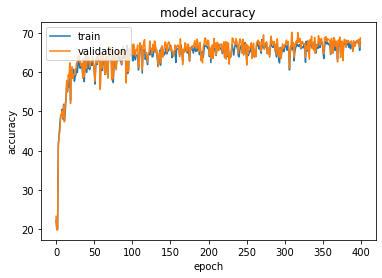

Maximum Train Accuracy : 68.5
Maximum Validation Accuracy : 70.11111450195312


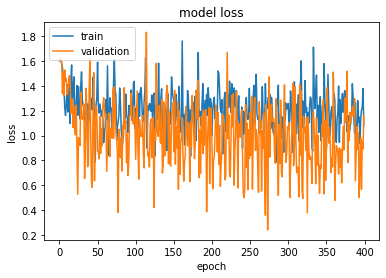

Minimum Train Loss : 0.7855901718139648
Minimum Validation Loss : 0.23990903794765472


In [ ]:
Bacteria_model_phase_Adam_00001 = Bact_Net()
Bacteria_model_phase_Adam_00001.cuda()
trainer_Adam_phase_00001 = trainer(Bacteria_model_phase_Adam_00001, phase_train_loader,"Adam", epoch_size=400, learning_rate=0.0001, weight_decay = 0.01)
trainer_Adam_phase_00001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adam_phase_00001.history['train_acc'])
plt.plot(trainer_Adam_phase_00001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adam_phase_00001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adam_phase_00001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adam_phase_00001.history['train_loss'])
plt.plot(trainer_Adam_phase_00001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adam_phase_00001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adam_phase_00001.history['val_loss'])}")

# Adam_0.0001_400epoch_batchnorm

  0%|          | 0/400 [00:00<?, ?it/s]

Train Acc | Epoch 1/400 | ACC 34.055557


  0%|          | 1/400 [00:10<1:08:27, 10.29s/it]

Val Acc | Epoch 1/400 | ACC 35.444443
Train Acc | Epoch 2/400 | ACC 41.361111


  0%|          | 2/400 [00:20<1:09:10, 10.43s/it]

Val Acc | Epoch 2/400 | ACC 45.333336
Train Acc | Epoch 3/400 | ACC 54.250000


  1%|          | 3/400 [00:31<1:09:27, 10.50s/it]

Val Acc | Epoch 3/400 | ACC 52.333336
Train Acc | Epoch 4/400 | ACC 29.444445


  1%|          | 4/400 [00:41<1:09:19, 10.50s/it]

Val Acc | Epoch 4/400 | ACC 29.666668
Train Acc | Epoch 5/400 | ACC 35.805557


  1%|▏         | 5/400 [00:52<1:08:45, 10.44s/it]

Val Acc | Epoch 5/400 | ACC 36.888889
Train Acc | Epoch 6/400 | ACC 62.250000


  2%|▏         | 6/400 [01:02<1:08:11, 10.38s/it]

Val Acc | Epoch 6/400 | ACC 62.222225
Train Acc | Epoch 7/400 | ACC 28.388891


  2%|▏         | 7/400 [01:12<1:08:02, 10.39s/it]

Val Acc | Epoch 7/400 | ACC 28.888889
Train Acc | Epoch 8/400 | ACC 49.222221


  2%|▏         | 8/400 [01:23<1:07:44, 10.37s/it]

Val Acc | Epoch 8/400 | ACC 50.222225
Train Acc | Epoch 9/400 | ACC 31.388891


  2%|▏         | 9/400 [01:33<1:07:30, 10.36s/it]

Val Acc | Epoch 9/400 | ACC 32.333336
Train Acc | Epoch 10/400 | ACC 23.166666


  2%|▎         | 10/400 [01:43<1:07:01, 10.31s/it]

Val Acc | Epoch 10/400 | ACC 23.111111
Train Acc | Epoch 11/400 | ACC 50.000000


  3%|▎         | 11/400 [01:54<1:07:07, 10.35s/it]

Val Acc | Epoch 11/400 | ACC 51.888889
Train Acc | Epoch 12/400 | ACC 38.527779


  3%|▎         | 12/400 [02:04<1:06:39, 10.31s/it]

Val Acc | Epoch 12/400 | ACC 40.222225
Train Acc | Epoch 13/400 | ACC 50.638889


  3%|▎         | 13/400 [02:14<1:06:39, 10.34s/it]

Val Acc | Epoch 13/400 | ACC 51.444447
Train Acc | Epoch 14/400 | ACC 52.138889


  4%|▎         | 14/400 [02:25<1:06:10, 10.29s/it]

Val Acc | Epoch 14/400 | ACC 52.444447
Train Acc | Epoch 15/400 | ACC 31.222225


  4%|▍         | 15/400 [02:35<1:06:14, 10.32s/it]

Val Acc | Epoch 15/400 | ACC 31.777779
Train Acc | Epoch 16/400 | ACC 24.666668


  4%|▍         | 16/400 [02:46<1:06:45, 10.43s/it]

Val Acc | Epoch 16/400 | ACC 24.111111
Train Acc | Epoch 17/400 | ACC 27.638889


  4%|▍         | 17/400 [02:56<1:06:46, 10.46s/it]

Val Acc | Epoch 17/400 | ACC 27.555555
Train Acc | Epoch 18/400 | ACC 25.666666


  4%|▍         | 18/400 [03:06<1:06:25, 10.43s/it]

Val Acc | Epoch 18/400 | ACC 25.777779
Train Acc | Epoch 19/400 | ACC 38.250004


  5%|▍         | 19/400 [03:17<1:05:53, 10.38s/it]

Val Acc | Epoch 19/400 | ACC 39.555557
Train Acc | Epoch 20/400 | ACC 35.416668


  5%|▌         | 20/400 [03:27<1:05:17, 10.31s/it]

Val Acc | Epoch 20/400 | ACC 35.000000
Train Acc | Epoch 21/400 | ACC 36.361115


  5%|▌         | 21/400 [03:37<1:04:58, 10.29s/it]

Val Acc | Epoch 21/400 | ACC 38.000000
Train Acc | Epoch 22/400 | ACC 31.527779


  6%|▌         | 22/400 [03:48<1:04:58, 10.31s/it]

Val Acc | Epoch 22/400 | ACC 31.444445
Train Acc | Epoch 23/400 | ACC 44.972221


  6%|▌         | 23/400 [03:57<1:04:05, 10.20s/it]

Val Acc | Epoch 23/400 | ACC 44.777779
Train Acc | Epoch 24/400 | ACC 33.333336


  6%|▌         | 24/400 [04:08<1:04:10, 10.24s/it]

Val Acc | Epoch 24/400 | ACC 34.111111
Train Acc | Epoch 25/400 | ACC 45.583336


  6%|▋         | 25/400 [04:18<1:04:27, 10.31s/it]

Val Acc | Epoch 25/400 | ACC 46.333332
Train Acc | Epoch 26/400 | ACC 40.111115


  6%|▋         | 26/400 [04:29<1:04:42, 10.38s/it]

Val Acc | Epoch 26/400 | ACC 42.000000
Train Acc | Epoch 27/400 | ACC 33.250000


  7%|▋         | 27/400 [04:39<1:04:42, 10.41s/it]

Val Acc | Epoch 27/400 | ACC 33.444447
Train Acc | Epoch 28/400 | ACC 40.777779


  7%|▋         | 28/400 [04:50<1:04:52, 10.46s/it]

Val Acc | Epoch 28/400 | ACC 40.222225
Train Acc | Epoch 29/400 | ACC 45.388889


  7%|▋         | 29/400 [05:00<1:04:57, 10.51s/it]

Val Acc | Epoch 29/400 | ACC 46.777779
Train Acc | Epoch 30/400 | ACC 50.444447


  8%|▊         | 30/400 [05:11<1:04:24, 10.45s/it]

Val Acc | Epoch 30/400 | ACC 48.555557
Train Acc | Epoch 31/400 | ACC 53.305553


  8%|▊         | 31/400 [05:21<1:03:55, 10.39s/it]

Val Acc | Epoch 31/400 | ACC 52.000004
Train Acc | Epoch 32/400 | ACC 33.805553


  8%|▊         | 32/400 [05:31<1:03:31, 10.36s/it]

Val Acc | Epoch 32/400 | ACC 33.333336
Train Acc | Epoch 33/400 | ACC 37.500000


  8%|▊         | 33/400 [05:42<1:03:25, 10.37s/it]

Val Acc | Epoch 33/400 | ACC 39.777779
Train Acc | Epoch 34/400 | ACC 39.388889


  8%|▊         | 34/400 [05:52<1:03:09, 10.35s/it]

Val Acc | Epoch 34/400 | ACC 39.111115
Train Acc | Epoch 35/400 | ACC 46.527779


  9%|▉         | 35/400 [06:02<1:02:45, 10.32s/it]

Val Acc | Epoch 35/400 | ACC 46.777779
Train Acc | Epoch 36/400 | ACC 42.861115


  9%|▉         | 36/400 [06:13<1:02:41, 10.33s/it]

Val Acc | Epoch 36/400 | ACC 43.555557
Train Acc | Epoch 37/400 | ACC 66.527779


  9%|▉         | 37/400 [06:23<1:02:26, 10.32s/it]

Val Acc | Epoch 37/400 | ACC 66.000000
Train Acc | Epoch 38/400 | ACC 60.777779


 10%|▉         | 38/400 [06:33<1:01:51, 10.25s/it]

Val Acc | Epoch 38/400 | ACC 60.333336
Train Acc | Epoch 39/400 | ACC 47.361111


 10%|▉         | 39/400 [06:43<1:01:25, 10.21s/it]

Val Acc | Epoch 39/400 | ACC 48.111111
Train Acc | Epoch 40/400 | ACC 32.305557


 10%|█         | 40/400 [06:53<1:01:31, 10.25s/it]

Val Acc | Epoch 40/400 | ACC 31.555557
Train Acc | Epoch 41/400 | ACC 32.888889


 10%|█         | 41/400 [07:04<1:01:32, 10.29s/it]

Val Acc | Epoch 41/400 | ACC 33.000000
Train Acc | Epoch 42/400 | ACC 70.111115


 10%|█         | 42/400 [07:14<1:01:22, 10.29s/it]

Val Acc | Epoch 42/400 | ACC 69.111115
Train Acc | Epoch 43/400 | ACC 48.555557


 11%|█         | 43/400 [07:25<1:01:20, 10.31s/it]

Val Acc | Epoch 43/400 | ACC 46.555557
Train Acc | Epoch 44/400 | ACC 59.638889


 11%|█         | 44/400 [07:35<1:00:55, 10.27s/it]

Val Acc | Epoch 44/400 | ACC 61.444443
Train Acc | Epoch 45/400 | ACC 33.638889


 11%|█▏        | 45/400 [07:45<1:00:27, 10.22s/it]

Val Acc | Epoch 45/400 | ACC 34.111111
Train Acc | Epoch 46/400 | ACC 50.972221


 12%|█▏        | 46/400 [07:56<1:01:16, 10.39s/it]

Val Acc | Epoch 46/400 | ACC 49.444447
Train Acc | Epoch 47/400 | ACC 46.194447


 12%|█▏        | 47/400 [08:06<1:01:11, 10.40s/it]

Val Acc | Epoch 47/400 | ACC 46.444447
Train Acc | Epoch 48/400 | ACC 46.027779


 12%|█▏        | 48/400 [08:16<1:00:36, 10.33s/it]

Val Acc | Epoch 48/400 | ACC 45.444447
Train Acc | Epoch 49/400 | ACC 45.805557


 12%|█▏        | 49/400 [08:26<1:00:16, 10.30s/it]

Val Acc | Epoch 49/400 | ACC 47.222225
Train Acc | Epoch 50/400 | ACC 60.000004


 12%|█▎        | 50/400 [08:37<59:56, 10.28s/it]  

Val Acc | Epoch 50/400 | ACC 60.111111
Train Acc | Epoch 51/400 | ACC 31.388891


 13%|█▎        | 51/400 [08:47<59:53, 10.30s/it]

Val Acc | Epoch 51/400 | ACC 32.666668
Train Acc | Epoch 52/400 | ACC 45.027779


 13%|█▎        | 52/400 [08:57<59:41, 10.29s/it]

Val Acc | Epoch 52/400 | ACC 43.000000
Train Acc | Epoch 53/400 | ACC 31.000000


 13%|█▎        | 53/400 [09:08<59:32, 10.30s/it]

Val Acc | Epoch 53/400 | ACC 32.666668
Train Acc | Epoch 54/400 | ACC 35.861111


 14%|█▎        | 54/400 [09:18<59:13, 10.27s/it]

Val Acc | Epoch 54/400 | ACC 36.000000
Train Acc | Epoch 55/400 | ACC 53.500004


 14%|█▍        | 55/400 [09:28<59:31, 10.35s/it]

Val Acc | Epoch 55/400 | ACC 54.555557
Train Acc | Epoch 56/400 | ACC 38.361111


 14%|█▍        | 56/400 [09:39<59:07, 10.31s/it]

Val Acc | Epoch 56/400 | ACC 39.777779
Train Acc | Epoch 57/400 | ACC 57.388889


 14%|█▍        | 57/400 [09:49<59:08, 10.35s/it]

Val Acc | Epoch 57/400 | ACC 55.222225
Train Acc | Epoch 58/400 | ACC 38.333336


 14%|█▍        | 58/400 [09:59<58:43, 10.30s/it]

Val Acc | Epoch 58/400 | ACC 37.333332
Train Acc | Epoch 59/400 | ACC 59.972225


 15%|█▍        | 59/400 [10:09<58:24, 10.28s/it]

Val Acc | Epoch 59/400 | ACC 61.444443
Train Acc | Epoch 60/400 | ACC 43.750000


 15%|█▌        | 60/400 [10:19<57:56, 10.22s/it]

Val Acc | Epoch 60/400 | ACC 43.222225
Train Acc | Epoch 61/400 | ACC 50.166668


 15%|█▌        | 61/400 [10:30<57:56, 10.26s/it]

Val Acc | Epoch 61/400 | ACC 48.777779
Train Acc | Epoch 62/400 | ACC 23.138889


 16%|█▌        | 62/400 [10:40<57:20, 10.18s/it]

Val Acc | Epoch 62/400 | ACC 23.111111
Train Acc | Epoch 63/400 | ACC 59.972225


 16%|█▌        | 63/400 [10:50<57:28, 10.23s/it]

Val Acc | Epoch 63/400 | ACC 60.000004
Train Acc | Epoch 64/400 | ACC 45.194443


 16%|█▌        | 64/400 [11:00<57:27, 10.26s/it]

Val Acc | Epoch 64/400 | ACC 46.444447
Train Acc | Epoch 65/400 | ACC 20.361113


 16%|█▋        | 65/400 [11:11<57:27, 10.29s/it]

Val Acc | Epoch 65/400 | ACC 20.111113
Train Acc | Epoch 66/400 | ACC 44.944443


 16%|█▋        | 66/400 [11:21<57:24, 10.31s/it]

Val Acc | Epoch 66/400 | ACC 45.888889
Train Acc | Epoch 67/400 | ACC 26.388889


 17%|█▋        | 67/400 [11:31<57:09, 10.30s/it]

Val Acc | Epoch 67/400 | ACC 26.000002
Train Acc | Epoch 68/400 | ACC 45.055557


 17%|█▋        | 68/400 [11:42<57:03, 10.31s/it]

Val Acc | Epoch 68/400 | ACC 46.444447
Train Acc | Epoch 69/400 | ACC 52.972221


 17%|█▋        | 69/400 [11:52<56:40, 10.27s/it]

Val Acc | Epoch 69/400 | ACC 53.888893
Train Acc | Epoch 70/400 | ACC 40.138893


 18%|█▊        | 70/400 [12:02<55:56, 10.17s/it]

Val Acc | Epoch 70/400 | ACC 40.000000
Train Acc | Epoch 71/400 | ACC 39.305557


 18%|█▊        | 71/400 [12:12<55:47, 10.18s/it]

Val Acc | Epoch 71/400 | ACC 41.777779
Train Acc | Epoch 72/400 | ACC 46.277779


 18%|█▊        | 72/400 [12:22<55:42, 10.19s/it]

Val Acc | Epoch 72/400 | ACC 47.111111
Train Acc | Epoch 73/400 | ACC 40.527779


 18%|█▊        | 73/400 [12:33<55:52, 10.25s/it]

Val Acc | Epoch 73/400 | ACC 39.222221
Train Acc | Epoch 74/400 | ACC 40.944447


 18%|█▊        | 74/400 [12:43<56:06, 10.33s/it]

Val Acc | Epoch 74/400 | ACC 41.777779
Train Acc | Epoch 75/400 | ACC 54.111111


 19%|█▉        | 75/400 [12:54<56:00, 10.34s/it]

Val Acc | Epoch 75/400 | ACC 54.666668
Train Acc | Epoch 76/400 | ACC 30.000002


 19%|█▉        | 76/400 [13:04<56:26, 10.45s/it]

Val Acc | Epoch 76/400 | ACC 30.333334
Train Acc | Epoch 77/400 | ACC 48.722221


 19%|█▉        | 77/400 [13:15<56:53, 10.57s/it]

Val Acc | Epoch 77/400 | ACC 51.555557
Train Acc | Epoch 78/400 | ACC 82.972221


 20%|█▉        | 78/400 [13:25<56:15, 10.48s/it]

Val Acc | Epoch 78/400 | ACC 81.777779
Train Acc | Epoch 79/400 | ACC 21.305557


 20%|█▉        | 79/400 [13:36<55:36, 10.39s/it]

Val Acc | Epoch 79/400 | ACC 22.666668
Train Acc | Epoch 80/400 | ACC 49.861111


 20%|██        | 80/400 [13:46<55:24, 10.39s/it]

Val Acc | Epoch 80/400 | ACC 51.000000
Train Acc | Epoch 81/400 | ACC 54.083336


 20%|██        | 81/400 [13:56<55:01, 10.35s/it]

Val Acc | Epoch 81/400 | ACC 55.000000
Train Acc | Epoch 82/400 | ACC 60.666668


 20%|██        | 82/400 [14:07<54:52, 10.35s/it]

Val Acc | Epoch 82/400 | ACC 63.888889
Train Acc | Epoch 83/400 | ACC 40.055553


 21%|██        | 83/400 [14:17<54:30, 10.32s/it]

Val Acc | Epoch 83/400 | ACC 38.888889
Train Acc | Epoch 84/400 | ACC 46.888889


 21%|██        | 84/400 [14:27<53:57, 10.24s/it]

Val Acc | Epoch 84/400 | ACC 48.222221
Train Acc | Epoch 85/400 | ACC 64.055557


 21%|██▏       | 85/400 [14:37<53:28, 10.19s/it]

Val Acc | Epoch 85/400 | ACC 64.555557
Train Acc | Epoch 86/400 | ACC 20.888889


 22%|██▏       | 86/400 [14:47<53:40, 10.26s/it]

Val Acc | Epoch 86/400 | ACC 20.666668
Train Acc | Epoch 87/400 | ACC 40.972225


 22%|██▏       | 87/400 [14:58<53:22, 10.23s/it]

Val Acc | Epoch 87/400 | ACC 41.888889
Train Acc | Epoch 88/400 | ACC 48.138889


 22%|██▏       | 88/400 [15:08<53:17, 10.25s/it]

Val Acc | Epoch 88/400 | ACC 48.111111
Train Acc | Epoch 89/400 | ACC 69.027779


 22%|██▏       | 89/400 [15:18<53:11, 10.26s/it]

Val Acc | Epoch 89/400 | ACC 68.777779
Train Acc | Epoch 90/400 | ACC 54.833336


 22%|██▎       | 90/400 [15:28<52:57, 10.25s/it]

Val Acc | Epoch 90/400 | ACC 56.555557
Train Acc | Epoch 91/400 | ACC 53.833336


 23%|██▎       | 91/400 [15:39<52:54, 10.27s/it]

Val Acc | Epoch 91/400 | ACC 54.222225
Train Acc | Epoch 92/400 | ACC 74.027779


 23%|██▎       | 92/400 [15:49<52:33, 10.24s/it]

Val Acc | Epoch 92/400 | ACC 75.888893
Train Acc | Epoch 93/400 | ACC 72.888893


 23%|██▎       | 93/400 [15:59<52:26, 10.25s/it]

Val Acc | Epoch 93/400 | ACC 71.333336
Train Acc | Epoch 94/400 | ACC 67.805557


 24%|██▎       | 94/400 [16:09<52:23, 10.27s/it]

Val Acc | Epoch 94/400 | ACC 68.888893
Train Acc | Epoch 95/400 | ACC 62.888889


 24%|██▍       | 95/400 [16:20<52:17, 10.29s/it]

Val Acc | Epoch 95/400 | ACC 62.111115
Train Acc | Epoch 96/400 | ACC 54.527779


 24%|██▍       | 96/400 [16:30<52:09, 10.29s/it]

Val Acc | Epoch 96/400 | ACC 52.444447
Train Acc | Epoch 97/400 | ACC 68.666664


 24%|██▍       | 97/400 [16:40<51:58, 10.29s/it]

Val Acc | Epoch 97/400 | ACC 68.333336
Train Acc | Epoch 98/400 | ACC 46.666668


 24%|██▍       | 98/400 [16:51<51:44, 10.28s/it]

Val Acc | Epoch 98/400 | ACC 47.222225
Train Acc | Epoch 99/400 | ACC 40.555557


 25%|██▍       | 99/400 [17:01<51:35, 10.29s/it]

Val Acc | Epoch 99/400 | ACC 41.333336
Train Acc | Epoch 100/400 | ACC 83.666672


 25%|██▌       | 100/400 [17:11<51:31, 10.31s/it]

Val Acc | Epoch 100/400 | ACC 82.777779
Train Acc | Epoch 101/400 | ACC 58.638889


 25%|██▌       | 101/400 [17:22<51:23, 10.31s/it]

Val Acc | Epoch 101/400 | ACC 58.222221
Train Acc | Epoch 102/400 | ACC 44.694443


 26%|██▌       | 102/400 [17:32<51:10, 10.30s/it]

Val Acc | Epoch 102/400 | ACC 46.777779
Train Acc | Epoch 103/400 | ACC 65.305557


 26%|██▌       | 103/400 [17:42<50:49, 10.27s/it]

Val Acc | Epoch 103/400 | ACC 66.000000
Train Acc | Epoch 104/400 | ACC 58.611115


 26%|██▌       | 104/400 [17:52<50:44, 10.29s/it]

Val Acc | Epoch 104/400 | ACC 59.222221
Train Acc | Epoch 105/400 | ACC 54.027779


 26%|██▋       | 105/400 [18:03<50:26, 10.26s/it]

Val Acc | Epoch 105/400 | ACC 55.333336
Train Acc | Epoch 106/400 | ACC 83.666672


 26%|██▋       | 106/400 [18:13<50:59, 10.41s/it]

Val Acc | Epoch 106/400 | ACC 82.777779
Train Acc | Epoch 107/400 | ACC 22.305555


 27%|██▋       | 107/400 [18:24<51:07, 10.47s/it]

Val Acc | Epoch 107/400 | ACC 22.777779
Train Acc | Epoch 108/400 | ACC 64.416672


 27%|██▋       | 108/400 [18:34<50:41, 10.42s/it]

Val Acc | Epoch 108/400 | ACC 63.444447
Train Acc | Epoch 109/400 | ACC 66.888893


 27%|██▋       | 109/400 [18:45<50:46, 10.47s/it]

Val Acc | Epoch 109/400 | ACC 68.111115
Train Acc | Epoch 110/400 | ACC 78.750000


 28%|██▊       | 110/400 [18:55<50:20, 10.42s/it]

Val Acc | Epoch 110/400 | ACC 77.666672
Train Acc | Epoch 111/400 | ACC 26.111111


 28%|██▊       | 111/400 [19:06<50:08, 10.41s/it]

Val Acc | Epoch 111/400 | ACC 27.333334
Train Acc | Epoch 112/400 | ACC 72.555557


 28%|██▊       | 112/400 [19:16<49:43, 10.36s/it]

Val Acc | Epoch 112/400 | ACC 72.111115
Train Acc | Epoch 113/400 | ACC 38.861111


 28%|██▊       | 113/400 [19:26<49:32, 10.36s/it]

Val Acc | Epoch 113/400 | ACC 41.888889
Train Acc | Epoch 114/400 | ACC 55.222225


 28%|██▊       | 114/400 [19:37<49:36, 10.41s/it]

Val Acc | Epoch 114/400 | ACC 56.111115
Train Acc | Epoch 115/400 | ACC 55.555557


 29%|██▉       | 115/400 [19:47<49:37, 10.45s/it]

Val Acc | Epoch 115/400 | ACC 55.666668
Train Acc | Epoch 116/400 | ACC 44.694443


 29%|██▉       | 116/400 [19:58<49:21, 10.43s/it]

Val Acc | Epoch 116/400 | ACC 47.555557
Train Acc | Epoch 117/400 | ACC 39.416668


 29%|██▉       | 117/400 [20:08<49:13, 10.44s/it]

Val Acc | Epoch 117/400 | ACC 39.666668
Train Acc | Epoch 118/400 | ACC 46.916668


 30%|██▉       | 118/400 [20:18<48:43, 10.37s/it]

Val Acc | Epoch 118/400 | ACC 47.111111
Train Acc | Epoch 119/400 | ACC 38.138889


 30%|██▉       | 119/400 [20:28<48:20, 10.32s/it]

Val Acc | Epoch 119/400 | ACC 38.888889
Train Acc | Epoch 120/400 | ACC 36.500000


 30%|███       | 120/400 [20:39<47:55, 10.27s/it]

Val Acc | Epoch 120/400 | ACC 36.000000
Train Acc | Epoch 121/400 | ACC 33.861115


 30%|███       | 121/400 [20:49<47:56, 10.31s/it]

Val Acc | Epoch 121/400 | ACC 34.111111
Train Acc | Epoch 122/400 | ACC 46.750000


 30%|███       | 122/400 [20:59<47:47, 10.31s/it]

Val Acc | Epoch 122/400 | ACC 47.555557
Train Acc | Epoch 123/400 | ACC 25.888889


 31%|███       | 123/400 [21:10<47:38, 10.32s/it]

Val Acc | Epoch 123/400 | ACC 26.777777
Train Acc | Epoch 124/400 | ACC 60.472225


 31%|███       | 124/400 [21:20<47:19, 10.29s/it]

Val Acc | Epoch 124/400 | ACC 61.222225
Train Acc | Epoch 125/400 | ACC 39.111115


 31%|███▏      | 125/400 [21:30<47:25, 10.35s/it]

Val Acc | Epoch 125/400 | ACC 39.666668
Train Acc | Epoch 126/400 | ACC 71.083336


 32%|███▏      | 126/400 [21:41<47:12, 10.34s/it]

Val Acc | Epoch 126/400 | ACC 69.777779
Train Acc | Epoch 127/400 | ACC 39.138889


 32%|███▏      | 127/400 [21:51<47:05, 10.35s/it]

Val Acc | Epoch 127/400 | ACC 39.555557
Train Acc | Epoch 128/400 | ACC 57.666664


 32%|███▏      | 128/400 [22:01<46:59, 10.37s/it]

Val Acc | Epoch 128/400 | ACC 56.333332
Train Acc | Epoch 129/400 | ACC 66.361115


 32%|███▏      | 129/400 [22:12<46:45, 10.35s/it]

Val Acc | Epoch 129/400 | ACC 66.000000
Train Acc | Epoch 130/400 | ACC 41.472225


 32%|███▎      | 130/400 [22:22<46:42, 10.38s/it]

Val Acc | Epoch 130/400 | ACC 41.000000
Train Acc | Epoch 131/400 | ACC 39.277779


 33%|███▎      | 131/400 [22:32<46:19, 10.33s/it]

Val Acc | Epoch 131/400 | ACC 38.666668
Train Acc | Epoch 132/400 | ACC 47.861111


 33%|███▎      | 132/400 [22:43<45:50, 10.26s/it]

Val Acc | Epoch 132/400 | ACC 45.000000
Train Acc | Epoch 133/400 | ACC 84.972229


 33%|███▎      | 133/400 [22:53<45:53, 10.31s/it]

Val Acc | Epoch 133/400 | ACC 85.777779
Train Acc | Epoch 134/400 | ACC 42.555557


 34%|███▎      | 134/400 [23:03<45:32, 10.27s/it]

Val Acc | Epoch 134/400 | ACC 43.333332
Train Acc | Epoch 135/400 | ACC 54.416668


 34%|███▍      | 135/400 [23:13<45:22, 10.27s/it]

Val Acc | Epoch 135/400 | ACC 53.666668
Train Acc | Epoch 136/400 | ACC 55.722225


 34%|███▍      | 136/400 [23:24<45:42, 10.39s/it]

Val Acc | Epoch 136/400 | ACC 56.222225
Train Acc | Epoch 137/400 | ACC 72.861115


 34%|███▍      | 137/400 [23:35<45:40, 10.42s/it]

Val Acc | Epoch 137/400 | ACC 73.222229
Train Acc | Epoch 138/400 | ACC 70.861115


 34%|███▍      | 138/400 [23:45<45:08, 10.34s/it]

Val Acc | Epoch 138/400 | ACC 68.444450
Train Acc | Epoch 139/400 | ACC 37.527779


 35%|███▍      | 139/400 [23:55<45:00, 10.35s/it]

Val Acc | Epoch 139/400 | ACC 39.555557
Train Acc | Epoch 140/400 | ACC 54.166668


 35%|███▌      | 140/400 [24:05<44:53, 10.36s/it]

Val Acc | Epoch 140/400 | ACC 56.555557
Train Acc | Epoch 141/400 | ACC 43.666668


 35%|███▌      | 141/400 [24:16<44:31, 10.31s/it]

Val Acc | Epoch 141/400 | ACC 44.222225
Train Acc | Epoch 142/400 | ACC 52.333336


 36%|███▌      | 142/400 [24:26<44:08, 10.27s/it]

Val Acc | Epoch 142/400 | ACC 51.333332
Train Acc | Epoch 143/400 | ACC 67.250000


 36%|███▌      | 143/400 [24:36<43:47, 10.23s/it]

Val Acc | Epoch 143/400 | ACC 66.555557
Train Acc | Epoch 144/400 | ACC 25.111113


 36%|███▌      | 144/400 [24:46<43:53, 10.29s/it]

Val Acc | Epoch 144/400 | ACC 25.111113
Train Acc | Epoch 145/400 | ACC 21.138889


 36%|███▋      | 145/400 [24:57<43:58, 10.35s/it]

Val Acc | Epoch 145/400 | ACC 21.111111
Train Acc | Epoch 146/400 | ACC 44.166668


 36%|███▋      | 146/400 [25:07<43:46, 10.34s/it]

Val Acc | Epoch 146/400 | ACC 43.777779
Train Acc | Epoch 147/400 | ACC 75.166664


 37%|███▋      | 147/400 [25:18<43:38, 10.35s/it]

Val Acc | Epoch 147/400 | ACC 75.000000
Train Acc | Epoch 148/400 | ACC 32.333336


 37%|███▋      | 148/400 [25:28<43:20, 10.32s/it]

Val Acc | Epoch 148/400 | ACC 33.888889
Train Acc | Epoch 149/400 | ACC 56.333332


 37%|███▋      | 149/400 [25:38<43:31, 10.40s/it]

Val Acc | Epoch 149/400 | ACC 57.111115
Train Acc | Epoch 150/400 | ACC 64.861115


 38%|███▊      | 150/400 [25:49<43:29, 10.44s/it]

Val Acc | Epoch 150/400 | ACC 64.222221
Train Acc | Epoch 151/400 | ACC 71.611115


 38%|███▊      | 151/400 [25:59<43:05, 10.38s/it]

Val Acc | Epoch 151/400 | ACC 72.555557
Train Acc | Epoch 152/400 | ACC 64.861115


 38%|███▊      | 152/400 [26:09<42:34, 10.30s/it]

Val Acc | Epoch 152/400 | ACC 66.555557
Train Acc | Epoch 153/400 | ACC 64.583336


 38%|███▊      | 153/400 [26:20<42:20, 10.29s/it]

Val Acc | Epoch 153/400 | ACC 66.111115
Train Acc | Epoch 154/400 | ACC 64.055557


 38%|███▊      | 154/400 [26:30<42:05, 10.27s/it]

Val Acc | Epoch 154/400 | ACC 65.555557
Train Acc | Epoch 155/400 | ACC 64.500008


 39%|███▉      | 155/400 [26:40<41:56, 10.27s/it]

Val Acc | Epoch 155/400 | ACC 64.444443
Train Acc | Epoch 156/400 | ACC 52.361115


 39%|███▉      | 156/400 [26:51<42:00, 10.33s/it]

Val Acc | Epoch 156/400 | ACC 52.888889
Train Acc | Epoch 157/400 | ACC 43.638889


 39%|███▉      | 157/400 [27:01<41:33, 10.26s/it]

Val Acc | Epoch 157/400 | ACC 42.666668
Train Acc | Epoch 158/400 | ACC 51.027782


 40%|███▉      | 158/400 [27:11<41:29, 10.29s/it]

Val Acc | Epoch 158/400 | ACC 52.777779
Train Acc | Epoch 159/400 | ACC 51.611115


 40%|███▉      | 159/400 [27:21<41:22, 10.30s/it]

Val Acc | Epoch 159/400 | ACC 52.555553
Train Acc | Epoch 160/400 | ACC 59.611111


 40%|████      | 160/400 [27:32<41:07, 10.28s/it]

Val Acc | Epoch 160/400 | ACC 59.888885
Train Acc | Epoch 161/400 | ACC 44.722221


 40%|████      | 161/400 [27:42<40:50, 10.25s/it]

Val Acc | Epoch 161/400 | ACC 45.777779
Train Acc | Epoch 162/400 | ACC 80.055557


 40%|████      | 162/400 [27:52<40:48, 10.29s/it]

Val Acc | Epoch 162/400 | ACC 79.333336
Train Acc | Epoch 163/400 | ACC 64.416672


 41%|████      | 163/400 [28:02<40:13, 10.18s/it]

Val Acc | Epoch 163/400 | ACC 64.666672
Train Acc | Epoch 164/400 | ACC 61.361111


 41%|████      | 164/400 [28:12<40:05, 10.19s/it]

Val Acc | Epoch 164/400 | ACC 62.666668
Train Acc | Epoch 165/400 | ACC 75.972221


 41%|████▏     | 165/400 [28:22<39:45, 10.15s/it]

Val Acc | Epoch 165/400 | ACC 74.888893
Train Acc | Epoch 166/400 | ACC 46.166668


 42%|████▏     | 166/400 [28:33<40:03, 10.27s/it]

Val Acc | Epoch 166/400 | ACC 45.222221
Train Acc | Epoch 167/400 | ACC 51.138889


 42%|████▏     | 167/400 [28:44<40:22, 10.40s/it]

Val Acc | Epoch 167/400 | ACC 50.777782
Train Acc | Epoch 168/400 | ACC 44.972221


 42%|████▏     | 168/400 [28:54<39:56, 10.33s/it]

Val Acc | Epoch 168/400 | ACC 44.666668
Train Acc | Epoch 169/400 | ACC 56.861115


 42%|████▏     | 169/400 [29:04<39:35, 10.28s/it]

Val Acc | Epoch 169/400 | ACC 56.666668
Train Acc | Epoch 170/400 | ACC 64.416672


 42%|████▎     | 170/400 [29:14<39:30, 10.31s/it]

Val Acc | Epoch 170/400 | ACC 64.000000
Train Acc | Epoch 171/400 | ACC 58.611115


 43%|████▎     | 171/400 [29:25<39:32, 10.36s/it]

Val Acc | Epoch 171/400 | ACC 57.222221
Train Acc | Epoch 172/400 | ACC 48.555557


 43%|████▎     | 172/400 [29:35<39:14, 10.33s/it]

Val Acc | Epoch 172/400 | ACC 49.888889
Train Acc | Epoch 173/400 | ACC 61.027779


 43%|████▎     | 173/400 [29:45<39:08, 10.35s/it]

Val Acc | Epoch 173/400 | ACC 62.222225
Train Acc | Epoch 174/400 | ACC 64.638885


 44%|████▎     | 174/400 [29:56<38:55, 10.34s/it]

Val Acc | Epoch 174/400 | ACC 64.444443
Train Acc | Epoch 175/400 | ACC 54.388893


 44%|████▍     | 175/400 [30:06<38:47, 10.34s/it]

Val Acc | Epoch 175/400 | ACC 54.888893
Train Acc | Epoch 176/400 | ACC 63.861115


 44%|████▍     | 176/400 [30:16<38:33, 10.33s/it]

Val Acc | Epoch 176/400 | ACC 65.000000
Train Acc | Epoch 177/400 | ACC 76.972221


 44%|████▍     | 177/400 [30:27<38:11, 10.28s/it]

Val Acc | Epoch 177/400 | ACC 76.777779
Train Acc | Epoch 178/400 | ACC 61.722225


 44%|████▍     | 178/400 [30:37<37:54, 10.24s/it]

Val Acc | Epoch 178/400 | ACC 58.888889
Train Acc | Epoch 179/400 | ACC 61.444443


 45%|████▍     | 179/400 [30:47<37:43, 10.24s/it]

Val Acc | Epoch 179/400 | ACC 63.444447
Train Acc | Epoch 180/400 | ACC 65.027779


 45%|████▌     | 180/400 [30:57<37:44, 10.29s/it]

Val Acc | Epoch 180/400 | ACC 65.000000
Train Acc | Epoch 181/400 | ACC 58.583336


 45%|████▌     | 181/400 [31:08<37:33, 10.29s/it]

Val Acc | Epoch 181/400 | ACC 60.222225
Train Acc | Epoch 182/400 | ACC 39.444447


 46%|████▌     | 182/400 [31:18<37:15, 10.25s/it]

Val Acc | Epoch 182/400 | ACC 40.444447
Train Acc | Epoch 183/400 | ACC 46.972225


 46%|████▌     | 183/400 [31:28<37:03, 10.25s/it]

Val Acc | Epoch 183/400 | ACC 46.222221
Train Acc | Epoch 184/400 | ACC 62.583332


 46%|████▌     | 184/400 [31:38<37:00, 10.28s/it]

Val Acc | Epoch 184/400 | ACC 62.555557
Train Acc | Epoch 185/400 | ACC 52.055557


 46%|████▋     | 185/400 [31:49<36:54, 10.30s/it]

Val Acc | Epoch 185/400 | ACC 51.888889
Train Acc | Epoch 186/400 | ACC 66.166672


 46%|████▋     | 186/400 [31:59<36:27, 10.22s/it]

Val Acc | Epoch 186/400 | ACC 66.333336
Train Acc | Epoch 187/400 | ACC 79.694443


 47%|████▋     | 187/400 [32:09<36:26, 10.27s/it]

Val Acc | Epoch 187/400 | ACC 79.777779
Train Acc | Epoch 188/400 | ACC 68.777779


 47%|████▋     | 188/400 [32:19<36:20, 10.28s/it]

Val Acc | Epoch 188/400 | ACC 67.666664
Train Acc | Epoch 189/400 | ACC 68.027779


 47%|████▋     | 189/400 [32:30<36:26, 10.36s/it]

Val Acc | Epoch 189/400 | ACC 68.444450
Train Acc | Epoch 190/400 | ACC 62.055557


 48%|████▊     | 190/400 [32:40<36:11, 10.34s/it]

Val Acc | Epoch 190/400 | ACC 62.222225
Train Acc | Epoch 191/400 | ACC 48.472221


 48%|████▊     | 191/400 [32:51<35:59, 10.33s/it]

Val Acc | Epoch 191/400 | ACC 47.222225
Train Acc | Epoch 192/400 | ACC 72.166672


 48%|████▊     | 192/400 [33:01<36:01, 10.39s/it]

Val Acc | Epoch 192/400 | ACC 69.888893
Train Acc | Epoch 193/400 | ACC 55.611111


 48%|████▊     | 193/400 [33:12<35:50, 10.39s/it]

Val Acc | Epoch 193/400 | ACC 54.777779
Train Acc | Epoch 194/400 | ACC 68.444450


 48%|████▊     | 194/400 [33:22<35:50, 10.44s/it]

Val Acc | Epoch 194/400 | ACC 68.333336
Train Acc | Epoch 195/400 | ACC 56.444447


 49%|████▉     | 195/400 [33:32<35:16, 10.33s/it]

Val Acc | Epoch 195/400 | ACC 55.777775
Train Acc | Epoch 196/400 | ACC 62.555557


 49%|████▉     | 196/400 [33:43<35:17, 10.38s/it]

Val Acc | Epoch 196/400 | ACC 62.444450
Train Acc | Epoch 197/400 | ACC 70.083328


 49%|████▉     | 197/400 [33:53<35:28, 10.49s/it]

Val Acc | Epoch 197/400 | ACC 70.000000
Train Acc | Epoch 198/400 | ACC 53.000004


 50%|████▉     | 198/400 [34:04<34:58, 10.39s/it]

Val Acc | Epoch 198/400 | ACC 53.888893
Train Acc | Epoch 199/400 | ACC 70.611115


 50%|████▉     | 199/400 [34:14<34:42, 10.36s/it]

Val Acc | Epoch 199/400 | ACC 72.444443
Train Acc | Epoch 200/400 | ACC 47.166668


 50%|█████     | 200/400 [34:24<34:24, 10.32s/it]

Val Acc | Epoch 200/400 | ACC 46.777779
Train Acc | Epoch 201/400 | ACC 60.416668


 50%|█████     | 201/400 [34:34<34:18, 10.34s/it]

Val Acc | Epoch 201/400 | ACC 61.444443
Train Acc | Epoch 202/400 | ACC 61.138893


 50%|█████     | 202/400 [34:45<34:02, 10.31s/it]

Val Acc | Epoch 202/400 | ACC 61.444443
Train Acc | Epoch 203/400 | ACC 56.111115


 51%|█████     | 203/400 [34:55<33:51, 10.31s/it]

Val Acc | Epoch 203/400 | ACC 58.000004
Train Acc | Epoch 204/400 | ACC 55.333336


 51%|█████     | 204/400 [35:05<33:35, 10.28s/it]

Val Acc | Epoch 204/400 | ACC 56.444447
Train Acc | Epoch 205/400 | ACC 54.694443


 51%|█████▏    | 205/400 [35:15<33:20, 10.26s/it]

Val Acc | Epoch 205/400 | ACC 55.000000
Train Acc | Epoch 206/400 | ACC 55.777775


 52%|█████▏    | 206/400 [35:26<33:17, 10.30s/it]

Val Acc | Epoch 206/400 | ACC 54.333336
Train Acc | Epoch 207/400 | ACC 52.694447


 52%|█████▏    | 207/400 [35:36<33:16, 10.35s/it]

Val Acc | Epoch 207/400 | ACC 52.000004
Train Acc | Epoch 208/400 | ACC 50.638889


 52%|█████▏    | 208/400 [35:46<32:58, 10.31s/it]

Val Acc | Epoch 208/400 | ACC 50.333332
Train Acc | Epoch 209/400 | ACC 78.722229


 52%|█████▏    | 209/400 [35:57<32:43, 10.28s/it]

Val Acc | Epoch 209/400 | ACC 76.111115
Train Acc | Epoch 210/400 | ACC 56.916664


 52%|█████▎    | 210/400 [36:07<32:13, 10.18s/it]

Val Acc | Epoch 210/400 | ACC 57.777779
Train Acc | Epoch 211/400 | ACC 66.750000


 53%|█████▎    | 211/400 [36:17<32:08, 10.20s/it]

Val Acc | Epoch 211/400 | ACC 66.444443
Train Acc | Epoch 212/400 | ACC 58.194447


 53%|█████▎    | 212/400 [36:27<31:57, 10.20s/it]

Val Acc | Epoch 212/400 | ACC 58.666672
Train Acc | Epoch 213/400 | ACC 76.333336


 53%|█████▎    | 213/400 [36:38<32:00, 10.27s/it]

Val Acc | Epoch 213/400 | ACC 77.000008
Train Acc | Epoch 214/400 | ACC 74.027779


 54%|█████▎    | 214/400 [36:48<31:57, 10.31s/it]

Val Acc | Epoch 214/400 | ACC 73.777779
Train Acc | Epoch 215/400 | ACC 61.805557


 54%|█████▍    | 215/400 [36:58<31:48, 10.32s/it]

Val Acc | Epoch 215/400 | ACC 63.777779
Train Acc | Epoch 216/400 | ACC 50.666664


 54%|█████▍    | 216/400 [37:09<31:46, 10.36s/it]

Val Acc | Epoch 216/400 | ACC 48.888889
Train Acc | Epoch 217/400 | ACC 56.416668


 54%|█████▍    | 217/400 [37:19<31:33, 10.35s/it]

Val Acc | Epoch 217/400 | ACC 56.333332
Train Acc | Epoch 218/400 | ACC 83.722221


 55%|█████▍    | 218/400 [37:29<31:09, 10.27s/it]

Val Acc | Epoch 218/400 | ACC 83.333336
Train Acc | Epoch 219/400 | ACC 82.055557


 55%|█████▍    | 219/400 [37:40<31:05, 10.31s/it]

Val Acc | Epoch 219/400 | ACC 81.000000
Train Acc | Epoch 220/400 | ACC 52.833336


 55%|█████▌    | 220/400 [37:50<30:49, 10.28s/it]

Val Acc | Epoch 220/400 | ACC 53.777779
Train Acc | Epoch 221/400 | ACC 77.805557


 55%|█████▌    | 221/400 [38:00<30:38, 10.27s/it]

Val Acc | Epoch 221/400 | ACC 77.888885
Train Acc | Epoch 222/400 | ACC 79.333336


 56%|█████▌    | 222/400 [38:11<30:42, 10.35s/it]

Val Acc | Epoch 222/400 | ACC 79.222229
Train Acc | Epoch 223/400 | ACC 57.027782


 56%|█████▌    | 223/400 [38:21<30:25, 10.32s/it]

Val Acc | Epoch 223/400 | ACC 55.555557
Train Acc | Epoch 224/400 | ACC 40.583332


 56%|█████▌    | 224/400 [38:31<30:03, 10.25s/it]

Val Acc | Epoch 224/400 | ACC 40.444447
Train Acc | Epoch 225/400 | ACC 76.666672


 56%|█████▋    | 225/400 [38:41<29:59, 10.28s/it]

Val Acc | Epoch 225/400 | ACC 76.444450
Train Acc | Epoch 226/400 | ACC 55.250000


 56%|█████▋    | 226/400 [38:52<29:49, 10.29s/it]

Val Acc | Epoch 226/400 | ACC 54.777779
Train Acc | Epoch 227/400 | ACC 64.444443


 57%|█████▋    | 227/400 [39:02<30:05, 10.44s/it]

Val Acc | Epoch 227/400 | ACC 63.555557
Train Acc | Epoch 228/400 | ACC 48.388889


 57%|█████▋    | 228/400 [39:13<29:48, 10.40s/it]

Val Acc | Epoch 228/400 | ACC 48.555557
Train Acc | Epoch 229/400 | ACC 68.222221


 57%|█████▋    | 229/400 [39:23<29:34, 10.38s/it]

Val Acc | Epoch 229/400 | ACC 68.777779
Train Acc | Epoch 230/400 | ACC 30.083334


 57%|█████▊    | 230/400 [39:33<29:14, 10.32s/it]

Val Acc | Epoch 230/400 | ACC 30.555555
Train Acc | Epoch 231/400 | ACC 39.888889


 58%|█████▊    | 231/400 [39:43<29:04, 10.32s/it]

Val Acc | Epoch 231/400 | ACC 40.111115
Train Acc | Epoch 232/400 | ACC 45.611115


 58%|█████▊    | 232/400 [39:54<28:42, 10.26s/it]

Val Acc | Epoch 232/400 | ACC 45.777779
Train Acc | Epoch 233/400 | ACC 74.611115


 58%|█████▊    | 233/400 [40:04<28:30, 10.24s/it]

Val Acc | Epoch 233/400 | ACC 72.555557
Train Acc | Epoch 234/400 | ACC 77.888885


 58%|█████▊    | 234/400 [40:14<28:28, 10.29s/it]

Val Acc | Epoch 234/400 | ACC 77.000008
Train Acc | Epoch 235/400 | ACC 77.805557


 59%|█████▉    | 235/400 [40:24<28:19, 10.30s/it]

Val Acc | Epoch 235/400 | ACC 78.111115
Train Acc | Epoch 236/400 | ACC 61.055557


 59%|█████▉    | 236/400 [40:35<28:06, 10.28s/it]

Val Acc | Epoch 236/400 | ACC 61.333336
Train Acc | Epoch 237/400 | ACC 76.166664


 59%|█████▉    | 237/400 [40:45<28:05, 10.34s/it]

Val Acc | Epoch 237/400 | ACC 73.777779
Train Acc | Epoch 238/400 | ACC 58.222221


 60%|█████▉    | 238/400 [40:56<27:53, 10.33s/it]

Val Acc | Epoch 238/400 | ACC 56.111115
Train Acc | Epoch 239/400 | ACC 80.555557


 60%|█████▉    | 239/400 [41:06<27:46, 10.35s/it]

Val Acc | Epoch 239/400 | ACC 80.444450
Train Acc | Epoch 240/400 | ACC 42.666668


 60%|██████    | 240/400 [41:16<27:35, 10.35s/it]

Val Acc | Epoch 240/400 | ACC 43.555557
Train Acc | Epoch 241/400 | ACC 67.222229


 60%|██████    | 241/400 [41:27<27:22, 10.33s/it]

Val Acc | Epoch 241/400 | ACC 65.777779
Train Acc | Epoch 242/400 | ACC 60.222225


 60%|██████    | 242/400 [41:37<27:15, 10.35s/it]

Val Acc | Epoch 242/400 | ACC 58.111115
Train Acc | Epoch 243/400 | ACC 56.388889


 61%|██████    | 243/400 [41:47<27:00, 10.32s/it]

Val Acc | Epoch 243/400 | ACC 56.222225
Train Acc | Epoch 244/400 | ACC 68.361115


 61%|██████    | 244/400 [41:57<26:46, 10.30s/it]

Val Acc | Epoch 244/400 | ACC 67.111115
Train Acc | Epoch 245/400 | ACC 53.694447


 61%|██████▏   | 245/400 [42:08<26:40, 10.32s/it]

Val Acc | Epoch 245/400 | ACC 51.777779
Train Acc | Epoch 246/400 | ACC 55.416668


 62%|██████▏   | 246/400 [42:18<26:37, 10.37s/it]

Val Acc | Epoch 246/400 | ACC 55.111111
Train Acc | Epoch 247/400 | ACC 80.000000


 62%|██████▏   | 247/400 [42:28<26:12, 10.28s/it]

Val Acc | Epoch 247/400 | ACC 78.333336
Train Acc | Epoch 248/400 | ACC 76.055557


 62%|██████▏   | 248/400 [42:39<26:09, 10.32s/it]

Val Acc | Epoch 248/400 | ACC 74.555557
Train Acc | Epoch 249/400 | ACC 63.166664


 62%|██████▏   | 249/400 [42:49<25:55, 10.30s/it]

Val Acc | Epoch 249/400 | ACC 62.555557
Train Acc | Epoch 250/400 | ACC 55.916668


 62%|██████▎   | 250/400 [42:59<25:41, 10.28s/it]

Val Acc | Epoch 250/400 | ACC 52.777779
Train Acc | Epoch 251/400 | ACC 66.722229


 63%|██████▎   | 251/400 [43:09<25:21, 10.21s/it]

Val Acc | Epoch 251/400 | ACC 67.666664
Train Acc | Epoch 252/400 | ACC 77.944443


 63%|██████▎   | 252/400 [43:20<25:13, 10.22s/it]

Val Acc | Epoch 252/400 | ACC 79.111115
Train Acc | Epoch 253/400 | ACC 46.361115


 63%|██████▎   | 253/400 [43:30<25:03, 10.23s/it]

Val Acc | Epoch 253/400 | ACC 44.888889
Train Acc | Epoch 254/400 | ACC 75.444450


 64%|██████▎   | 254/400 [43:40<24:59, 10.27s/it]

Val Acc | Epoch 254/400 | ACC 74.000000
Train Acc | Epoch 255/400 | ACC 72.805557


 64%|██████▍   | 255/400 [43:50<24:47, 10.26s/it]

Val Acc | Epoch 255/400 | ACC 71.333336
Train Acc | Epoch 256/400 | ACC 60.083336


 64%|██████▍   | 256/400 [44:01<24:42, 10.29s/it]

Val Acc | Epoch 256/400 | ACC 60.000004
Train Acc | Epoch 257/400 | ACC 56.583332


 64%|██████▍   | 257/400 [44:12<24:54, 10.45s/it]

Val Acc | Epoch 257/400 | ACC 57.777779
Train Acc | Epoch 258/400 | ACC 63.250000


 64%|██████▍   | 258/400 [44:22<24:24, 10.32s/it]

Val Acc | Epoch 258/400 | ACC 63.000000
Train Acc | Epoch 259/400 | ACC 43.666668


 65%|██████▍   | 259/400 [44:32<24:09, 10.28s/it]

Val Acc | Epoch 259/400 | ACC 43.888889
Train Acc | Epoch 260/400 | ACC 52.611115


 65%|██████▌   | 260/400 [44:42<23:56, 10.26s/it]

Val Acc | Epoch 260/400 | ACC 54.000004
Train Acc | Epoch 261/400 | ACC 65.444443


 65%|██████▌   | 261/400 [44:52<23:49, 10.28s/it]

Val Acc | Epoch 261/400 | ACC 63.888889
Train Acc | Epoch 262/400 | ACC 68.583336


 66%|██████▌   | 262/400 [45:03<23:43, 10.32s/it]

Val Acc | Epoch 262/400 | ACC 68.222221
Train Acc | Epoch 263/400 | ACC 66.472229


 66%|██████▌   | 263/400 [45:13<23:33, 10.32s/it]

Val Acc | Epoch 263/400 | ACC 67.222229
Train Acc | Epoch 264/400 | ACC 58.166672


 66%|██████▌   | 264/400 [45:23<23:20, 10.30s/it]

Val Acc | Epoch 264/400 | ACC 58.444447
Train Acc | Epoch 265/400 | ACC 85.083336


 66%|██████▋   | 265/400 [45:34<23:05, 10.26s/it]

Val Acc | Epoch 265/400 | ACC 83.333336
Train Acc | Epoch 266/400 | ACC 51.000000


 66%|██████▋   | 266/400 [45:44<22:58, 10.29s/it]

Val Acc | Epoch 266/400 | ACC 49.888889
Train Acc | Epoch 267/400 | ACC 47.194447


 67%|██████▋   | 267/400 [45:54<22:40, 10.23s/it]

Val Acc | Epoch 267/400 | ACC 46.333332
Train Acc | Epoch 268/400 | ACC 51.472221


 67%|██████▋   | 268/400 [46:04<22:35, 10.27s/it]

Val Acc | Epoch 268/400 | ACC 52.666672
Train Acc | Epoch 269/400 | ACC 70.722221


 67%|██████▋   | 269/400 [46:14<22:16, 10.20s/it]

Val Acc | Epoch 269/400 | ACC 69.000000
Train Acc | Epoch 270/400 | ACC 37.444447


 68%|██████▊   | 270/400 [46:25<22:18, 10.30s/it]

Val Acc | Epoch 270/400 | ACC 37.666668
Train Acc | Epoch 271/400 | ACC 68.944450


 68%|██████▊   | 271/400 [46:35<22:15, 10.36s/it]

Val Acc | Epoch 271/400 | ACC 68.444450
Train Acc | Epoch 272/400 | ACC 66.194443


 68%|██████▊   | 272/400 [46:46<21:58, 10.30s/it]

Val Acc | Epoch 272/400 | ACC 63.444447
Train Acc | Epoch 273/400 | ACC 79.361115


 68%|██████▊   | 273/400 [46:56<21:43, 10.26s/it]

Val Acc | Epoch 273/400 | ACC 78.000000
Train Acc | Epoch 274/400 | ACC 72.583336


 68%|██████▊   | 274/400 [47:06<21:30, 10.25s/it]

Val Acc | Epoch 274/400 | ACC 71.222221
Train Acc | Epoch 275/400 | ACC 43.750000


 69%|██████▉   | 275/400 [47:16<21:19, 10.24s/it]

Val Acc | Epoch 275/400 | ACC 44.333336
Train Acc | Epoch 276/400 | ACC 79.055557


 69%|██████▉   | 276/400 [47:26<21:07, 10.22s/it]

Val Acc | Epoch 276/400 | ACC 79.000000
Train Acc | Epoch 277/400 | ACC 74.083336


 69%|██████▉   | 277/400 [47:37<20:59, 10.24s/it]

Val Acc | Epoch 277/400 | ACC 73.777779
Train Acc | Epoch 278/400 | ACC 80.000000


 70%|██████▉   | 278/400 [47:47<20:47, 10.22s/it]

Val Acc | Epoch 278/400 | ACC 80.888893
Train Acc | Epoch 279/400 | ACC 76.277779


 70%|██████▉   | 279/400 [47:57<20:36, 10.22s/it]

Val Acc | Epoch 279/400 | ACC 76.555557
Train Acc | Epoch 280/400 | ACC 68.222221


 70%|███████   | 280/400 [48:07<20:21, 10.18s/it]

Val Acc | Epoch 280/400 | ACC 68.777779
Train Acc | Epoch 281/400 | ACC 67.638893


 70%|███████   | 281/400 [48:17<20:09, 10.16s/it]

Val Acc | Epoch 281/400 | ACC 71.111115
Train Acc | Epoch 282/400 | ACC 43.305557


 70%|███████   | 282/400 [48:28<20:03, 10.20s/it]

Val Acc | Epoch 282/400 | ACC 45.000000
Train Acc | Epoch 283/400 | ACC 71.888885


 71%|███████   | 283/400 [48:38<20:02, 10.28s/it]

Val Acc | Epoch 283/400 | ACC 71.444443
Train Acc | Epoch 284/400 | ACC 36.527779


 71%|███████   | 284/400 [48:48<19:55, 10.30s/it]

Val Acc | Epoch 284/400 | ACC 35.555557
Train Acc | Epoch 285/400 | ACC 57.166664


 71%|███████▏  | 285/400 [48:58<19:35, 10.22s/it]

Val Acc | Epoch 285/400 | ACC 58.222221
Train Acc | Epoch 286/400 | ACC 60.555561


 72%|███████▏  | 286/400 [49:09<19:23, 10.21s/it]

Val Acc | Epoch 286/400 | ACC 60.777779
Train Acc | Epoch 287/400 | ACC 71.166672


 72%|███████▏  | 287/400 [49:19<19:33, 10.39s/it]

Val Acc | Epoch 287/400 | ACC 70.666672
Train Acc | Epoch 288/400 | ACC 85.527779


 72%|███████▏  | 288/400 [49:30<19:24, 10.40s/it]

Val Acc | Epoch 288/400 | ACC 86.111107
Train Acc | Epoch 289/400 | ACC 62.972225


 72%|███████▏  | 289/400 [49:40<19:08, 10.35s/it]

Val Acc | Epoch 289/400 | ACC 62.666668
Train Acc | Epoch 290/400 | ACC 42.555557


 72%|███████▎  | 290/400 [49:50<18:56, 10.33s/it]

Val Acc | Epoch 290/400 | ACC 43.444447
Train Acc | Epoch 291/400 | ACC 54.583336


 73%|███████▎  | 291/400 [50:01<18:44, 10.32s/it]

Val Acc | Epoch 291/400 | ACC 55.444443
Train Acc | Epoch 292/400 | ACC 56.388889


 73%|███████▎  | 292/400 [50:11<18:36, 10.34s/it]

Val Acc | Epoch 292/400 | ACC 57.333332
Train Acc | Epoch 293/400 | ACC 59.722221


 73%|███████▎  | 293/400 [50:21<18:27, 10.35s/it]

Val Acc | Epoch 293/400 | ACC 59.222221
Train Acc | Epoch 294/400 | ACC 79.472229


 74%|███████▎  | 294/400 [50:32<18:14, 10.32s/it]

Val Acc | Epoch 294/400 | ACC 77.111115
Train Acc | Epoch 295/400 | ACC 34.083332


 74%|███████▍  | 295/400 [50:42<17:58, 10.27s/it]

Val Acc | Epoch 295/400 | ACC 33.000000
Train Acc | Epoch 296/400 | ACC 67.500000


 74%|███████▍  | 296/400 [50:52<17:51, 10.31s/it]

Val Acc | Epoch 296/400 | ACC 65.000000
Train Acc | Epoch 297/400 | ACC 69.138893


 74%|███████▍  | 297/400 [51:02<17:36, 10.26s/it]

Val Acc | Epoch 297/400 | ACC 68.111115
Train Acc | Epoch 298/400 | ACC 79.944443


 74%|███████▍  | 298/400 [51:13<17:24, 10.25s/it]

Val Acc | Epoch 298/400 | ACC 79.333336
Train Acc | Epoch 299/400 | ACC 66.805557


 75%|███████▍  | 299/400 [51:23<17:12, 10.23s/it]

Val Acc | Epoch 299/400 | ACC 67.555557
Train Acc | Epoch 300/400 | ACC 84.361115


 75%|███████▌  | 300/400 [51:33<17:08, 10.28s/it]

Val Acc | Epoch 300/400 | ACC 83.777779
Train Acc | Epoch 301/400 | ACC 76.500008


 75%|███████▌  | 301/400 [51:43<16:52, 10.23s/it]

Val Acc | Epoch 301/400 | ACC 76.222221
Train Acc | Epoch 302/400 | ACC 80.555557


 76%|███████▌  | 302/400 [51:54<16:47, 10.28s/it]

Val Acc | Epoch 302/400 | ACC 81.111115
Train Acc | Epoch 303/400 | ACC 79.944443


 76%|███████▌  | 303/400 [52:04<16:38, 10.29s/it]

Val Acc | Epoch 303/400 | ACC 77.444443
Train Acc | Epoch 304/400 | ACC 35.916668


 76%|███████▌  | 304/400 [52:14<16:27, 10.29s/it]

Val Acc | Epoch 304/400 | ACC 38.111111
Train Acc | Epoch 305/400 | ACC 59.861111


 76%|███████▋  | 305/400 [52:24<16:16, 10.28s/it]

Val Acc | Epoch 305/400 | ACC 57.888889
Train Acc | Epoch 306/400 | ACC 36.333336


 76%|███████▋  | 306/400 [52:35<16:12, 10.34s/it]

Val Acc | Epoch 306/400 | ACC 37.888889
Train Acc | Epoch 307/400 | ACC 73.861107


 77%|███████▋  | 307/400 [52:45<16:01, 10.34s/it]

Val Acc | Epoch 307/400 | ACC 75.000000
Train Acc | Epoch 308/400 | ACC 86.000000


 77%|███████▋  | 308/400 [52:56<15:52, 10.35s/it]

Val Acc | Epoch 308/400 | ACC 85.666672
Train Acc | Epoch 309/400 | ACC 88.777779


 77%|███████▋  | 309/400 [53:06<15:44, 10.38s/it]

Val Acc | Epoch 309/400 | ACC 87.222221
Train Acc | Epoch 310/400 | ACC 57.611115


 78%|███████▊  | 310/400 [53:16<15:32, 10.36s/it]

Val Acc | Epoch 310/400 | ACC 55.111111
Train Acc | Epoch 311/400 | ACC 75.055557


 78%|███████▊  | 311/400 [53:27<15:14, 10.28s/it]

Val Acc | Epoch 311/400 | ACC 75.222221
Train Acc | Epoch 312/400 | ACC 87.194450


 78%|███████▊  | 312/400 [53:37<15:03, 10.26s/it]

Val Acc | Epoch 312/400 | ACC 86.444450
Train Acc | Epoch 313/400 | ACC 66.527779


 78%|███████▊  | 313/400 [53:47<14:51, 10.24s/it]

Val Acc | Epoch 313/400 | ACC 67.444443
Train Acc | Epoch 314/400 | ACC 75.527779


 78%|███████▊  | 314/400 [53:57<14:34, 10.17s/it]

Val Acc | Epoch 314/400 | ACC 74.555557
Train Acc | Epoch 315/400 | ACC 63.944447


 79%|███████▉  | 315/400 [54:07<14:27, 10.20s/it]

Val Acc | Epoch 315/400 | ACC 61.555557
Train Acc | Epoch 316/400 | ACC 77.111115


 79%|███████▉  | 316/400 [54:17<14:17, 10.21s/it]

Val Acc | Epoch 316/400 | ACC 76.444450
Train Acc | Epoch 317/400 | ACC 83.194443


 79%|███████▉  | 317/400 [54:28<14:17, 10.33s/it]

Val Acc | Epoch 317/400 | ACC 81.666664
Train Acc | Epoch 318/400 | ACC 44.027779


 80%|███████▉  | 318/400 [54:39<14:09, 10.36s/it]

Val Acc | Epoch 318/400 | ACC 44.222225
Train Acc | Epoch 319/400 | ACC 74.166664


 80%|███████▉  | 319/400 [54:49<13:57, 10.34s/it]

Val Acc | Epoch 319/400 | ACC 72.777779
Train Acc | Epoch 320/400 | ACC 49.138889


 80%|████████  | 320/400 [54:59<13:44, 10.30s/it]

Val Acc | Epoch 320/400 | ACC 51.666664
Train Acc | Epoch 321/400 | ACC 72.027779


 80%|████████  | 321/400 [55:09<13:36, 10.33s/it]

Val Acc | Epoch 321/400 | ACC 69.555557
Train Acc | Epoch 322/400 | ACC 64.638885


 80%|████████  | 322/400 [55:20<13:25, 10.33s/it]

Val Acc | Epoch 322/400 | ACC 65.444443
Train Acc | Epoch 323/400 | ACC 64.361115


 81%|████████  | 323/400 [55:30<13:15, 10.34s/it]

Val Acc | Epoch 323/400 | ACC 63.888889
Train Acc | Epoch 324/400 | ACC 66.111115


 81%|████████  | 324/400 [55:40<13:02, 10.29s/it]

Val Acc | Epoch 324/400 | ACC 63.555557
Train Acc | Epoch 325/400 | ACC 61.777775


 81%|████████▏ | 325/400 [55:50<12:49, 10.26s/it]

Val Acc | Epoch 325/400 | ACC 63.222225
Train Acc | Epoch 326/400 | ACC 74.388893


 82%|████████▏ | 326/400 [56:01<12:39, 10.27s/it]

Val Acc | Epoch 326/400 | ACC 73.888893
Train Acc | Epoch 327/400 | ACC 74.666664


 82%|████████▏ | 327/400 [56:11<12:28, 10.25s/it]

Val Acc | Epoch 327/400 | ACC 73.111115
Train Acc | Epoch 328/400 | ACC 82.805557


 82%|████████▏ | 328/400 [56:21<12:18, 10.25s/it]

Val Acc | Epoch 328/400 | ACC 81.666664
Train Acc | Epoch 329/400 | ACC 72.805557


 82%|████████▏ | 329/400 [56:32<12:09, 10.27s/it]

Val Acc | Epoch 329/400 | ACC 72.777779
Train Acc | Epoch 330/400 | ACC 85.833336


 82%|████████▎ | 330/400 [56:42<11:56, 10.24s/it]

Val Acc | Epoch 330/400 | ACC 84.444443
Train Acc | Epoch 331/400 | ACC 73.972229


 83%|████████▎ | 331/400 [56:52<11:46, 10.24s/it]

Val Acc | Epoch 331/400 | ACC 71.111115
Train Acc | Epoch 332/400 | ACC 77.638885


 83%|████████▎ | 332/400 [57:02<11:39, 10.29s/it]

Val Acc | Epoch 332/400 | ACC 77.444443
Train Acc | Epoch 333/400 | ACC 27.694447


 83%|████████▎ | 333/400 [57:13<11:32, 10.33s/it]

Val Acc | Epoch 333/400 | ACC 27.111113
Train Acc | Epoch 334/400 | ACC 83.305557


 84%|████████▎ | 334/400 [57:23<11:18, 10.29s/it]

Val Acc | Epoch 334/400 | ACC 82.000000
Train Acc | Epoch 335/400 | ACC 79.472229


 84%|████████▍ | 335/400 [57:33<11:06, 10.25s/it]

Val Acc | Epoch 335/400 | ACC 79.222229
Train Acc | Epoch 336/400 | ACC 81.166664


 84%|████████▍ | 336/400 [57:43<10:56, 10.26s/it]

Val Acc | Epoch 336/400 | ACC 79.888893
Train Acc | Epoch 337/400 | ACC 84.833336


 84%|████████▍ | 337/400 [57:54<10:48, 10.30s/it]

Val Acc | Epoch 337/400 | ACC 84.333336
Train Acc | Epoch 338/400 | ACC 36.888889


 84%|████████▍ | 338/400 [58:04<10:37, 10.28s/it]

Val Acc | Epoch 338/400 | ACC 36.888889
Train Acc | Epoch 339/400 | ACC 71.972221


 85%|████████▍ | 339/400 [58:14<10:26, 10.27s/it]

Val Acc | Epoch 339/400 | ACC 72.666672
Train Acc | Epoch 340/400 | ACC 71.944443


 85%|████████▌ | 340/400 [58:24<10:14, 10.25s/it]

Val Acc | Epoch 340/400 | ACC 71.555557
Train Acc | Epoch 341/400 | ACC 72.111115


 85%|████████▌ | 341/400 [58:35<10:07, 10.29s/it]

Val Acc | Epoch 341/400 | ACC 71.666672
Train Acc | Epoch 342/400 | ACC 71.944443


 86%|████████▌ | 342/400 [58:45<09:53, 10.24s/it]

Val Acc | Epoch 342/400 | ACC 70.111115
Train Acc | Epoch 343/400 | ACC 72.861115


 86%|████████▌ | 343/400 [58:55<09:40, 10.19s/it]

Val Acc | Epoch 343/400 | ACC 74.000000
Train Acc | Epoch 344/400 | ACC 75.972221


 86%|████████▌ | 344/400 [59:05<09:31, 10.21s/it]

Val Acc | Epoch 344/400 | ACC 75.888893
Train Acc | Epoch 345/400 | ACC 78.888893


 86%|████████▋ | 345/400 [59:16<09:28, 10.33s/it]

Val Acc | Epoch 345/400 | ACC 77.333336
Train Acc | Epoch 346/400 | ACC 85.472229


 86%|████████▋ | 346/400 [59:26<09:15, 10.29s/it]

Val Acc | Epoch 346/400 | ACC 83.111115
Train Acc | Epoch 347/400 | ACC 67.611107


 87%|████████▋ | 347/400 [59:37<09:10, 10.39s/it]

Val Acc | Epoch 347/400 | ACC 67.777779
Train Acc | Epoch 348/400 | ACC 89.555557


 87%|████████▋ | 348/400 [59:48<09:06, 10.51s/it]

Val Acc | Epoch 348/400 | ACC 88.888893
Train Acc | Epoch 349/400 | ACC 90.333336


 87%|████████▋ | 349/400 [59:58<08:53, 10.46s/it]

Val Acc | Epoch 349/400 | ACC 89.555557
Train Acc | Epoch 350/400 | ACC 84.166672


 88%|████████▊ | 350/400 [1:00:08<08:39, 10.40s/it]

Val Acc | Epoch 350/400 | ACC 82.111115
Train Acc | Epoch 351/400 | ACC 69.416664


 88%|████████▊ | 351/400 [1:00:19<08:29, 10.39s/it]

Val Acc | Epoch 351/400 | ACC 69.666664
Train Acc | Epoch 352/400 | ACC 55.194443


 88%|████████▊ | 352/400 [1:00:29<08:18, 10.38s/it]

Val Acc | Epoch 352/400 | ACC 55.444443
Train Acc | Epoch 353/400 | ACC 65.388885


 88%|████████▊ | 353/400 [1:00:39<08:06, 10.35s/it]

Val Acc | Epoch 353/400 | ACC 65.777779
Train Acc | Epoch 354/400 | ACC 62.277782


 88%|████████▊ | 354/400 [1:00:49<07:56, 10.35s/it]

Val Acc | Epoch 354/400 | ACC 64.444443
Train Acc | Epoch 355/400 | ACC 68.388893


 89%|████████▉ | 355/400 [1:01:00<07:46, 10.36s/it]

Val Acc | Epoch 355/400 | ACC 67.444443
Train Acc | Epoch 356/400 | ACC 79.472229


 89%|████████▉ | 356/400 [1:01:10<07:35, 10.35s/it]

Val Acc | Epoch 356/400 | ACC 78.555557
Train Acc | Epoch 357/400 | ACC 60.111111


 89%|████████▉ | 357/400 [1:01:20<07:23, 10.31s/it]

Val Acc | Epoch 357/400 | ACC 60.777779
Train Acc | Epoch 358/400 | ACC 49.166668


 90%|████████▉ | 358/400 [1:01:31<07:10, 10.25s/it]

Val Acc | Epoch 358/400 | ACC 48.888889
Train Acc | Epoch 359/400 | ACC 69.750000


 90%|████████▉ | 359/400 [1:01:41<06:59, 10.23s/it]

Val Acc | Epoch 359/400 | ACC 69.888893
Train Acc | Epoch 360/400 | ACC 81.305557


 90%|█████████ | 360/400 [1:01:51<06:50, 10.27s/it]

Val Acc | Epoch 360/400 | ACC 80.666664
Train Acc | Epoch 361/400 | ACC 75.916664


 90%|█████████ | 361/400 [1:02:02<06:42, 10.33s/it]

Val Acc | Epoch 361/400 | ACC 73.777779
Train Acc | Epoch 362/400 | ACC 81.583336


 90%|█████████ | 362/400 [1:02:12<06:32, 10.32s/it]

Val Acc | Epoch 362/400 | ACC 81.333336
Train Acc | Epoch 363/400 | ACC 61.361111


 91%|█████████ | 363/400 [1:02:22<06:20, 10.29s/it]

Val Acc | Epoch 363/400 | ACC 61.555557
Train Acc | Epoch 364/400 | ACC 83.611115


 91%|█████████ | 364/400 [1:02:32<06:11, 10.31s/it]

Val Acc | Epoch 364/400 | ACC 83.000008
Train Acc | Epoch 365/400 | ACC 66.694443


 91%|█████████▏| 365/400 [1:02:43<05:59, 10.28s/it]

Val Acc | Epoch 365/400 | ACC 66.666672
Train Acc | Epoch 366/400 | ACC 79.916672


 92%|█████████▏| 366/400 [1:02:53<05:49, 10.27s/it]

Val Acc | Epoch 366/400 | ACC 79.000000
Train Acc | Epoch 367/400 | ACC 78.611115


 92%|█████████▏| 367/400 [1:03:03<05:41, 10.36s/it]

Val Acc | Epoch 367/400 | ACC 78.333336
Train Acc | Epoch 368/400 | ACC 60.361111


 92%|█████████▏| 368/400 [1:03:14<05:31, 10.35s/it]

Val Acc | Epoch 368/400 | ACC 58.444447
Train Acc | Epoch 369/400 | ACC 65.750000


 92%|█████████▏| 369/400 [1:03:24<05:21, 10.36s/it]

Val Acc | Epoch 369/400 | ACC 64.888885
Train Acc | Epoch 370/400 | ACC 55.333336


 92%|█████████▎| 370/400 [1:03:35<05:11, 10.39s/it]

Val Acc | Epoch 370/400 | ACC 53.333336
Train Acc | Epoch 371/400 | ACC 28.638891


 93%|█████████▎| 371/400 [1:03:45<04:59, 10.33s/it]

Val Acc | Epoch 371/400 | ACC 29.555555
Train Acc | Epoch 372/400 | ACC 58.805553


 93%|█████████▎| 372/400 [1:03:55<04:49, 10.34s/it]

Val Acc | Epoch 372/400 | ACC 58.555557
Train Acc | Epoch 373/400 | ACC 79.888893


 93%|█████████▎| 373/400 [1:04:06<04:40, 10.39s/it]

Val Acc | Epoch 373/400 | ACC 77.555557
Train Acc | Epoch 374/400 | ACC 85.194443


 94%|█████████▎| 374/400 [1:04:16<04:29, 10.36s/it]

Val Acc | Epoch 374/400 | ACC 82.888885
Train Acc | Epoch 375/400 | ACC 69.416664


 94%|█████████▍| 375/400 [1:04:26<04:18, 10.34s/it]

Val Acc | Epoch 375/400 | ACC 69.555557
Train Acc | Epoch 376/400 | ACC 86.916664


 94%|█████████▍| 376/400 [1:04:37<04:08, 10.34s/it]

Val Acc | Epoch 376/400 | ACC 84.555557
Train Acc | Epoch 377/400 | ACC 57.305557


 94%|█████████▍| 377/400 [1:04:48<04:03, 10.58s/it]

Val Acc | Epoch 377/400 | ACC 57.888889
Train Acc | Epoch 378/400 | ACC 61.222225


 94%|█████████▍| 378/400 [1:04:59<03:54, 10.67s/it]

Val Acc | Epoch 378/400 | ACC 60.000004
Train Acc | Epoch 379/400 | ACC 59.027779


 95%|█████████▍| 379/400 [1:05:09<03:42, 10.59s/it]

Val Acc | Epoch 379/400 | ACC 60.333336
Train Acc | Epoch 380/400 | ACC 80.472221


 95%|█████████▌| 380/400 [1:05:19<03:30, 10.55s/it]

Val Acc | Epoch 380/400 | ACC 79.111115
Train Acc | Epoch 381/400 | ACC 79.611115


 95%|█████████▌| 381/400 [1:05:30<03:20, 10.54s/it]

Val Acc | Epoch 381/400 | ACC 79.111115
Train Acc | Epoch 382/400 | ACC 29.111111


 96%|█████████▌| 382/400 [1:05:40<03:08, 10.49s/it]

Val Acc | Epoch 382/400 | ACC 29.555555
Train Acc | Epoch 383/400 | ACC 77.722221


 96%|█████████▌| 383/400 [1:05:51<02:57, 10.42s/it]

Val Acc | Epoch 383/400 | ACC 77.111115
Train Acc | Epoch 384/400 | ACC 52.888889


 96%|█████████▌| 384/400 [1:06:01<02:46, 10.40s/it]

Val Acc | Epoch 384/400 | ACC 54.222225
Train Acc | Epoch 385/400 | ACC 79.500000


 96%|█████████▋| 385/400 [1:06:11<02:36, 10.41s/it]

Val Acc | Epoch 385/400 | ACC 80.555557
Train Acc | Epoch 386/400 | ACC 79.583336


 96%|█████████▋| 386/400 [1:06:22<02:25, 10.38s/it]

Val Acc | Epoch 386/400 | ACC 77.222221
Train Acc | Epoch 387/400 | ACC 84.916672


 97%|█████████▋| 387/400 [1:06:32<02:15, 10.39s/it]

Val Acc | Epoch 387/400 | ACC 84.888893
Train Acc | Epoch 388/400 | ACC 56.000000


 97%|█████████▋| 388/400 [1:06:42<02:04, 10.33s/it]

Val Acc | Epoch 388/400 | ACC 55.888893
Train Acc | Epoch 389/400 | ACC 46.972225


 97%|█████████▋| 389/400 [1:06:53<01:53, 10.32s/it]

Val Acc | Epoch 389/400 | ACC 48.222221
Train Acc | Epoch 390/400 | ACC 80.222229


 98%|█████████▊| 390/400 [1:07:03<01:42, 10.29s/it]

Val Acc | Epoch 390/400 | ACC 80.111107
Train Acc | Epoch 391/400 | ACC 79.833336


 98%|█████████▊| 391/400 [1:07:13<01:33, 10.39s/it]

Val Acc | Epoch 391/400 | ACC 78.000000
Train Acc | Epoch 392/400 | ACC 69.444450


 98%|█████████▊| 392/400 [1:07:24<01:23, 10.39s/it]

Val Acc | Epoch 392/400 | ACC 70.000000
Train Acc | Epoch 393/400 | ACC 73.805557


 98%|█████████▊| 393/400 [1:07:34<01:12, 10.29s/it]

Val Acc | Epoch 393/400 | ACC 73.777779
Train Acc | Epoch 394/400 | ACC 57.444447


 98%|█████████▊| 394/400 [1:07:44<01:01, 10.31s/it]

Val Acc | Epoch 394/400 | ACC 57.000000
Train Acc | Epoch 395/400 | ACC 46.055557


 99%|█████████▉| 395/400 [1:07:54<00:51, 10.28s/it]

Val Acc | Epoch 395/400 | ACC 47.111111
Train Acc | Epoch 396/400 | ACC 68.527779


 99%|█████████▉| 396/400 [1:08:05<00:41, 10.30s/it]

Val Acc | Epoch 396/400 | ACC 68.222221
Train Acc | Epoch 397/400 | ACC 63.027782


 99%|█████████▉| 397/400 [1:08:15<00:30, 10.32s/it]

Val Acc | Epoch 397/400 | ACC 62.666668
Train Acc | Epoch 398/400 | ACC 69.250000


100%|█████████▉| 398/400 [1:08:25<00:20, 10.31s/it]

Val Acc | Epoch 398/400 | ACC 68.777779
Train Acc | Epoch 399/400 | ACC 51.666664


100%|█████████▉| 399/400 [1:08:36<00:10, 10.31s/it]

Val Acc | Epoch 399/400 | ACC 50.222225
Train Acc | Epoch 400/400 | ACC 91.555557


100%|██████████| 400/400 [1:08:46<00:00, 10.32s/it]

Val Acc | Epoch 400/400 | ACC 90.333336


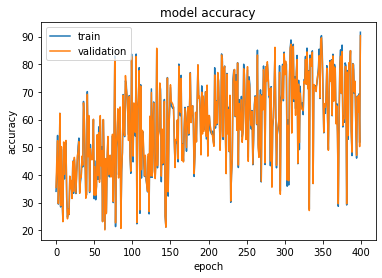

Maximum Train Accuracy : 91.55555725097656
Maximum Validation Accuracy : 90.33333587646484


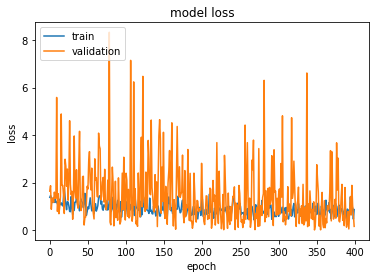

Minimum Train Loss : 0.3819704055786133
Minimum Validation Loss : 0.0033790250308811665


In [ ]:
Bacteria_model_phase_Adam_00001 = Bact_Net(batch_norm=True)
Bacteria_model_phase_Adam_00001.cuda()
trainer_Adam_phase_00001 = trainer(Bacteria_model_phase_Adam_00001, phase_train_loader,"Adam", epoch_size=400, learning_rate=0.0001)
trainer_Adam_phase_00001.train(phase_validation_loader)

# plot train, val accuracy
plt.plot(trainer_Adam_phase_00001.history['train_acc'])
plt.plot(trainer_Adam_phase_00001.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Maximum Train Accuracy : {max(trainer_Adam_phase_00001.history['train_acc'])}")
print(f"Maximum Validation Accuracy : {max(trainer_Adam_phase_00001.history['val_acc'])}")

# plot train, val loss
plt.plot(trainer_Adam_phase_00001.history['train_loss'])
plt.plot(trainer_Adam_phase_00001.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print(f"Minimum Train Loss : {min(trainer_Adam_phase_00001.history['train_loss'])}")
print(f"Minimum Validation Loss : {min(trainer_Adam_phase_00001.history['val_loss'])}")